### Steps in test task for met_invest

1. Data preprocessing 
2. choosing the model
3. deploying the model
4. printing the result and score

### DataPreproc steps

1. Importing the libraries

2. Importing the dataset

3. Spliting the dataset into categorical and numerous datas

4. Filling NaN's

5. Working with categorical values

6. Feature Scaling

All steps will be executed in class DataLoader 

In [1]:
#import the libraries
import os
import math
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

Opening the file and description about data

In [2]:
# open the file
data = open('data.txt', 'r')
pd_data = pd.read_table(data)
data.close()
pd_data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
pd_data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [4]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Countng the number of y==1 and y==0 values

In [5]:
# counting the numerous of rows with y == yes, and y == no
count_target_y_yes = pd_data['y'][(pd_data['y'] == 'yes')].count()
count_target_y_no = pd_data['y'][(pd_data['y'] == 'no')].count()

# true_prob is a probability for getting y == yes in dataset
true_prob = count_target_y_yes / (count_target_y_no + count_target_y_yes)

# printing the count and true_prob
print('countinth rows with y == yes: ', count_target_y_yes)
print('countinth rows with y == no: ', count_target_y_no)
print('true_probability:', true_prob)

countinth rows with y == yes:  5289
countinth rows with y == no:  39922
true_probability: 0.11698480458295547


spliting dataset into train and test

In [6]:
# spliting dataset into train_set and test_set
train_set, test_set = train_test_split(pd_data, test_size=0.3, random_state=42)

# printing the description of train_set and test_set
train_set.describe()

age       balance           day      duration      campaign  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.941669   1357.985465     15.829621    257.570070      2.772237   
std       10.632010   2976.874443      8.323200    258.833768      3.154004   
min       18.000000  -6847.000000      1.000000      0.000000      1.000000   
25%       33.000000     70.000000      8.000000    103.000000      1.000000   
50%       39.000000    446.000000     16.000000    180.000000      2.000000   
75%       48.000000   1434.000000     21.000000    319.000000      3.000000   
max       95.000000  81204.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      40.343318      0.585869  
std      100.678191      2.435961  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
test_set.describe()

age        balance           day      duration      campaign  \
count  13564.000000   13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.923474    1372.273371     15.752285    259.546668      2.744249   
std       10.588168    3197.658039      8.320843    254.458850      2.963314   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      79.000000      8.000000    104.000000      1.000000   
50%       39.000000     453.500000     16.000000    181.000000      2.000000   
75%       48.000000    1412.000000     21.000000    319.000000      3.000000   
max       93.000000  102127.000000     31.000000   3366.000000     55.000000   

              pdays      previous  
count  13564.000000  13564.000000  
mean      39.858375      0.567384  
std       98.837778      1.959733  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      842.000000     58.000000

The are ~no difference between test and train set

Split the columns into categorical and numeric

In [8]:
categorical_columns = pd_data.select_dtypes(include='object').columns
numeric_columns = pd_data.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numeric_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


The number of unique values

In [9]:
# printing the unique values for every columns
for column in pd_data.columns:
    print('#########################')
    print(column)
    print(pd_data[column].unique())
    print('#########################')
  #  print(pd_data[column].groupby(pd_data[column]).count())

#########################
age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
#########################
#########################
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
#########################
#########################
marital
['married' 'single' 'divorced']
#########################
#########################
education
['tertiary' 'secondary' 'unknown' 'primary']
#########################
#########################
default
['no' 'yes']
#########################
#########################
balance
[ 2143    29     2 ...  8205 14204 16353]
#########################
#########################
housing
['yes' 'no']
#########################
#########################
loan
['no' 'yes']
###########

Printing the histogram for every column 

age


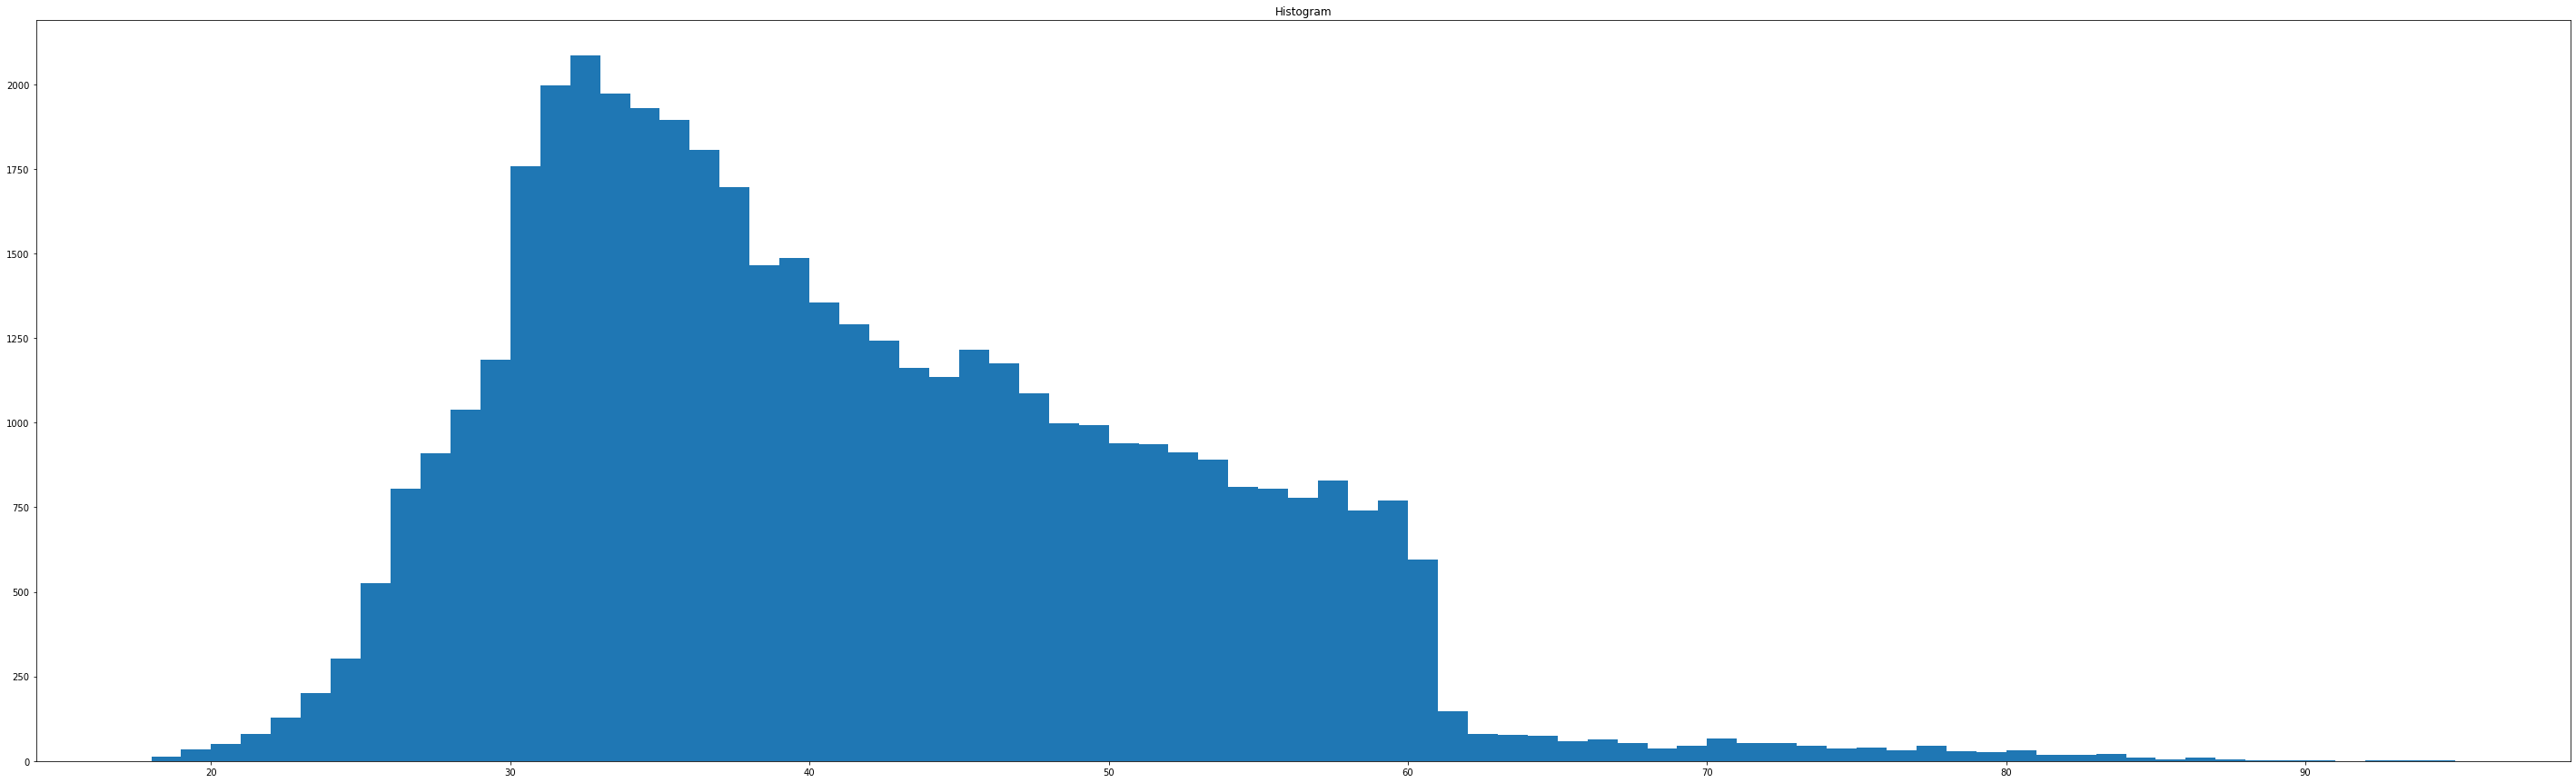

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64
job


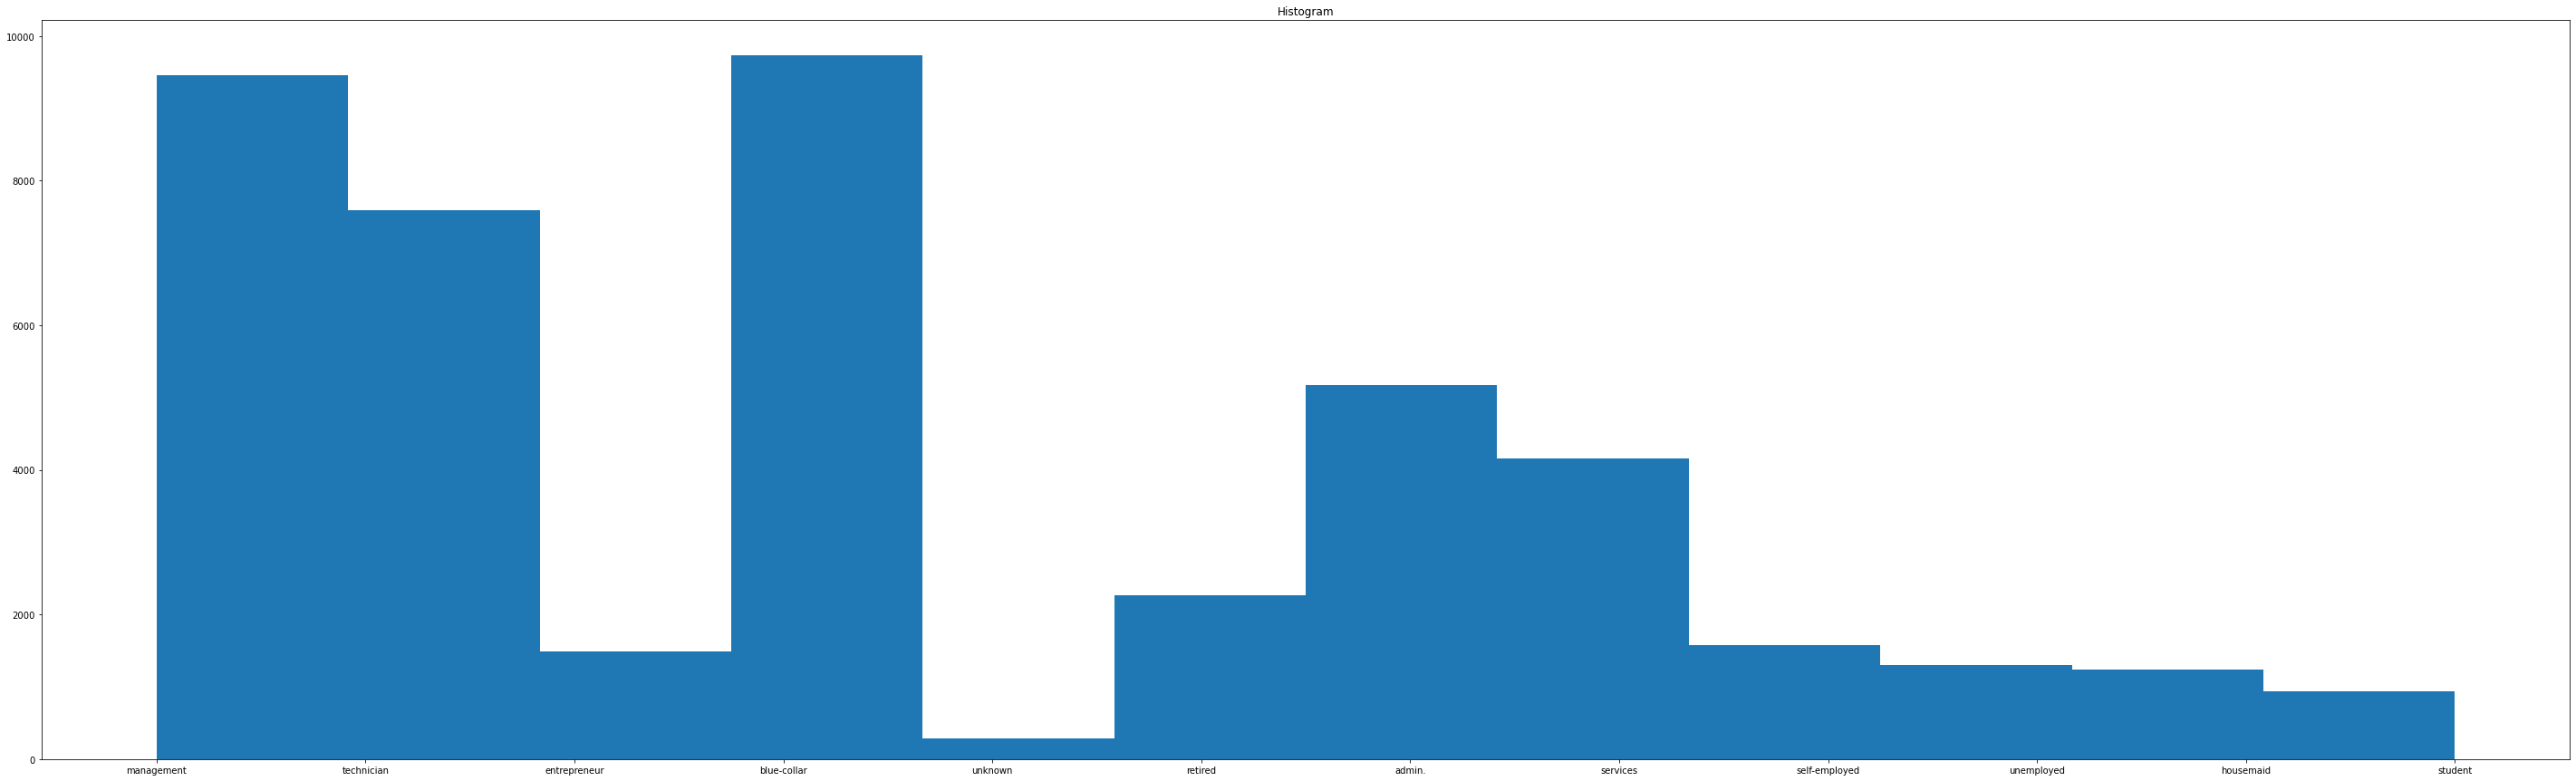

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
marital


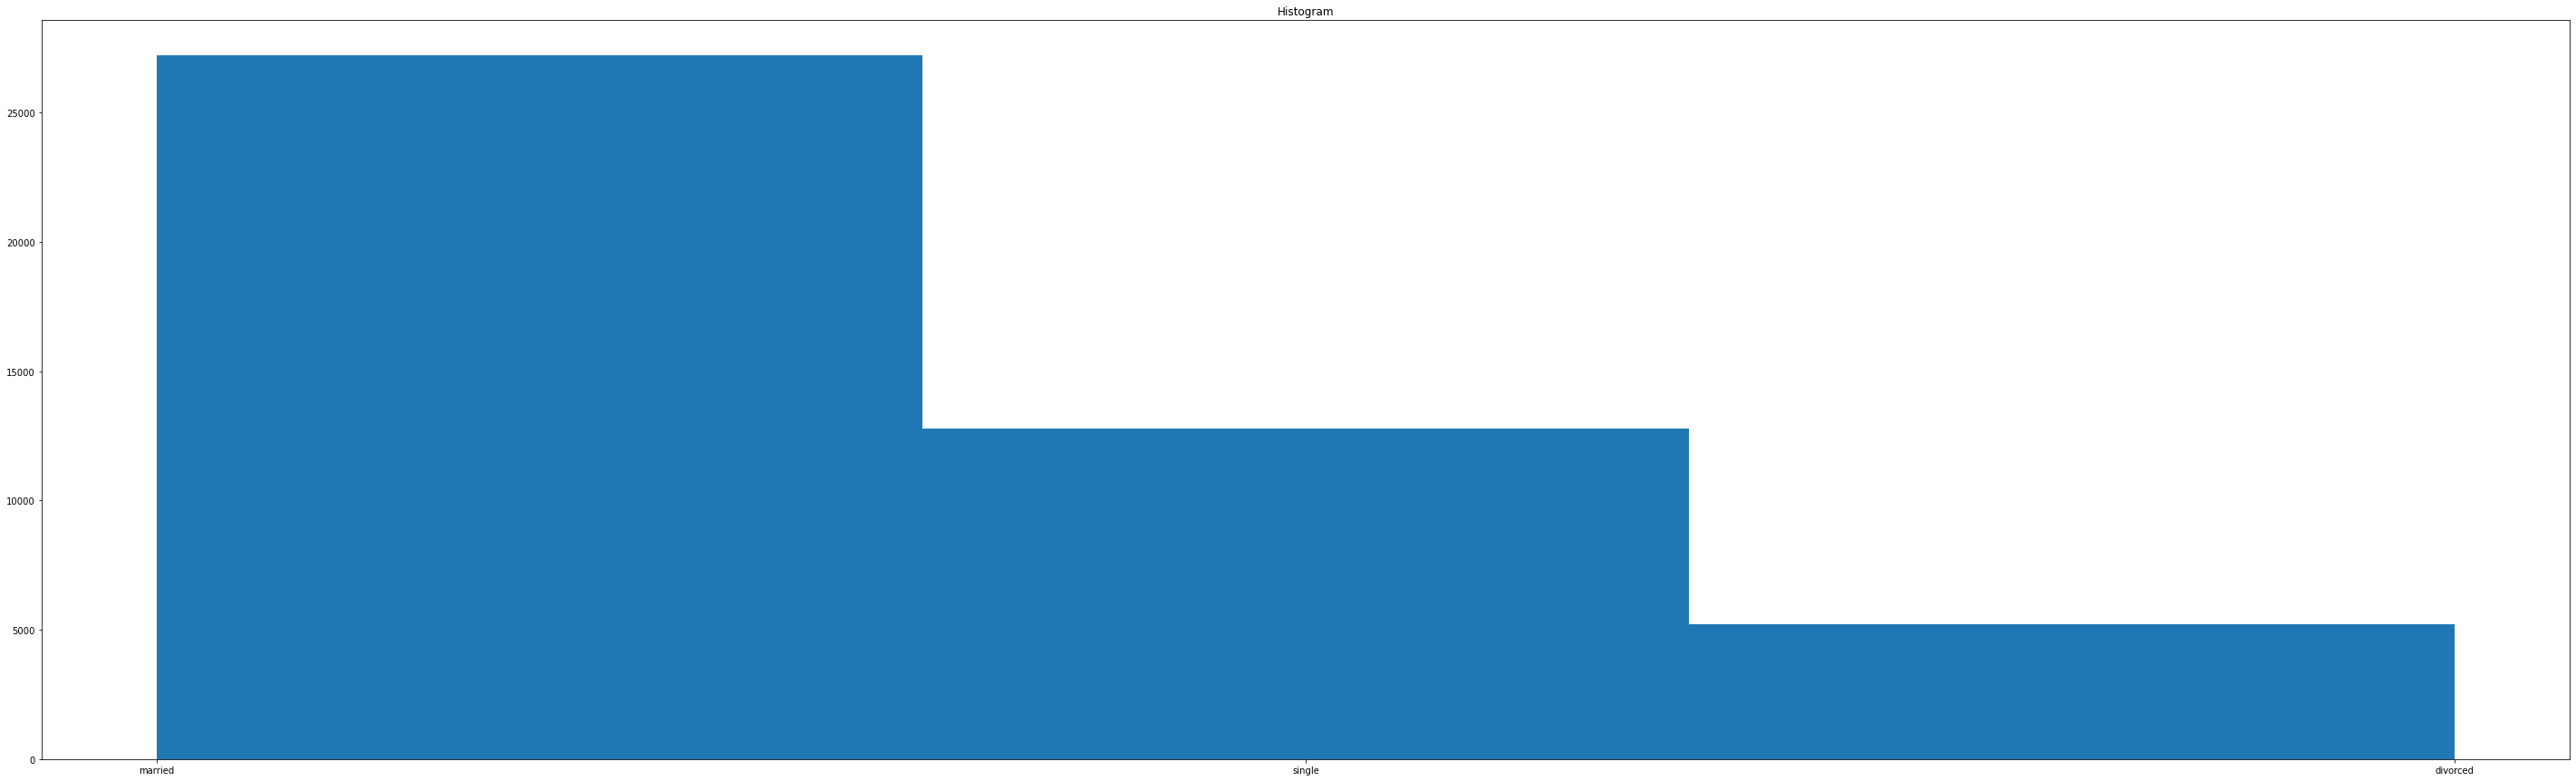

marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
education


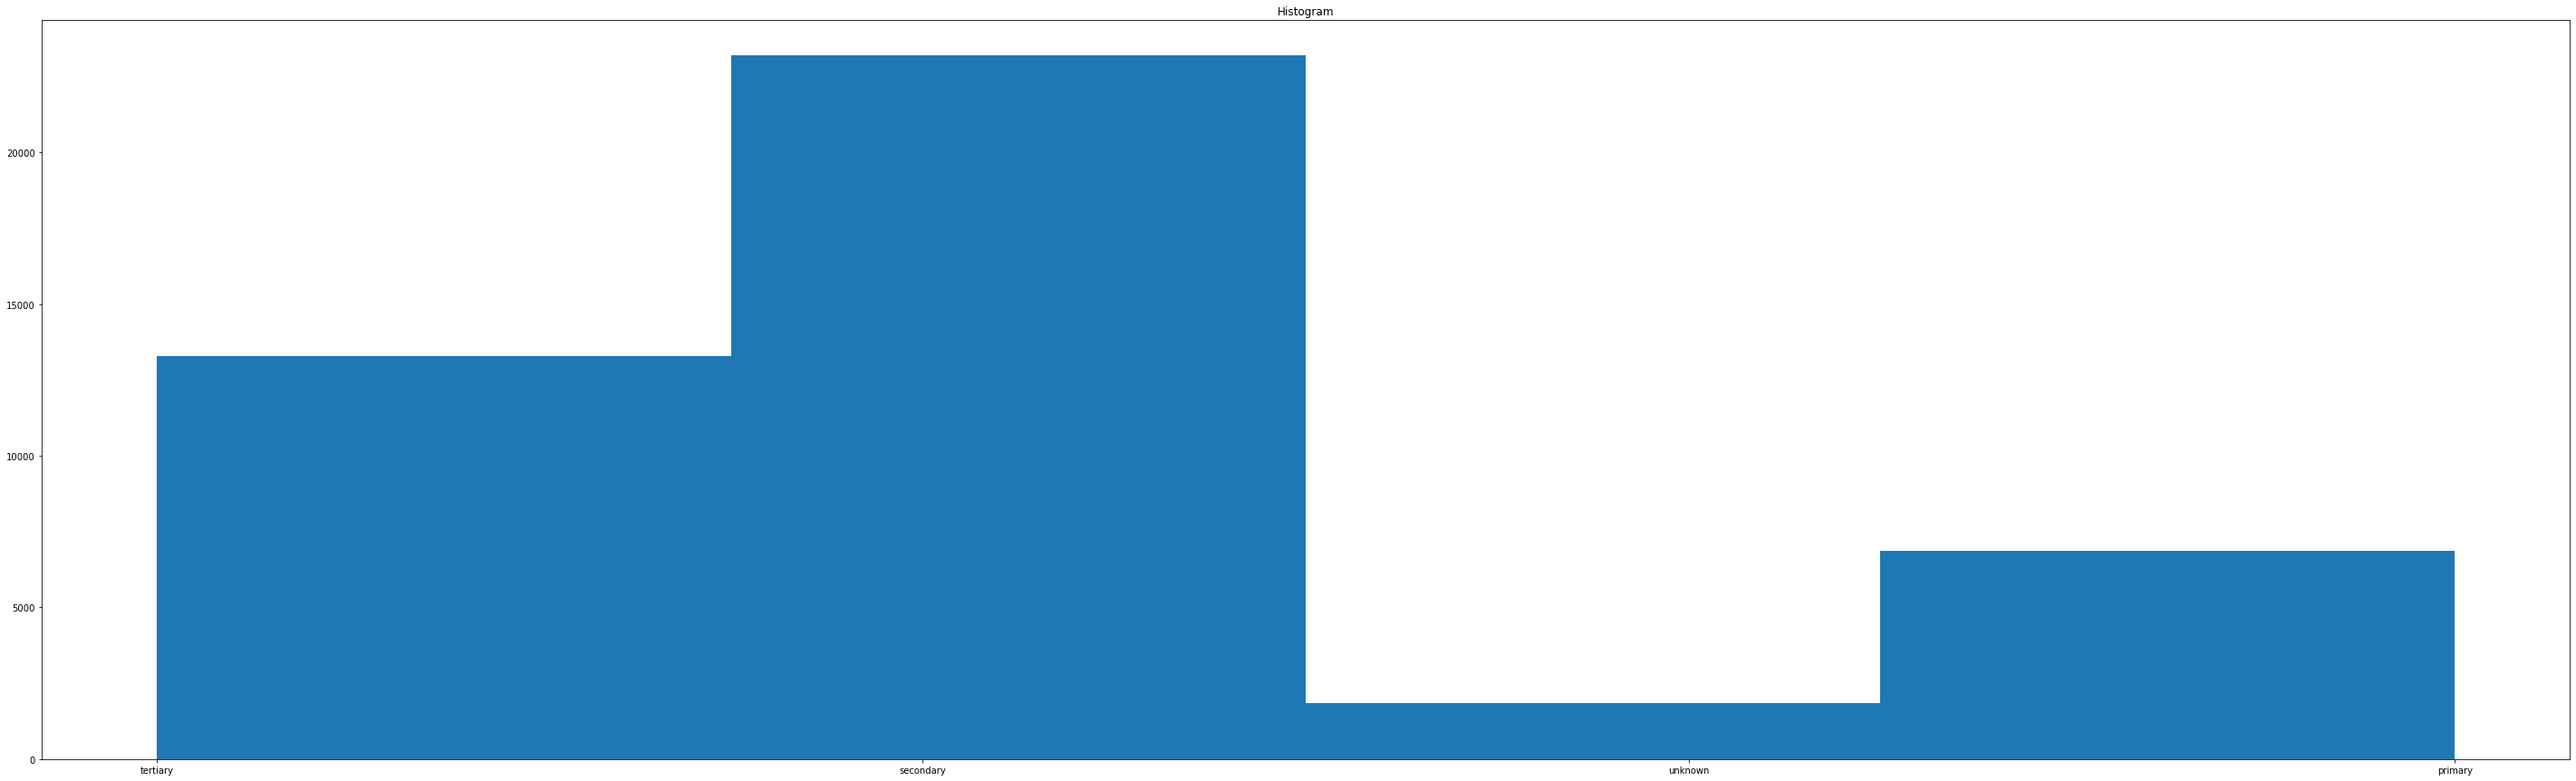

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
default


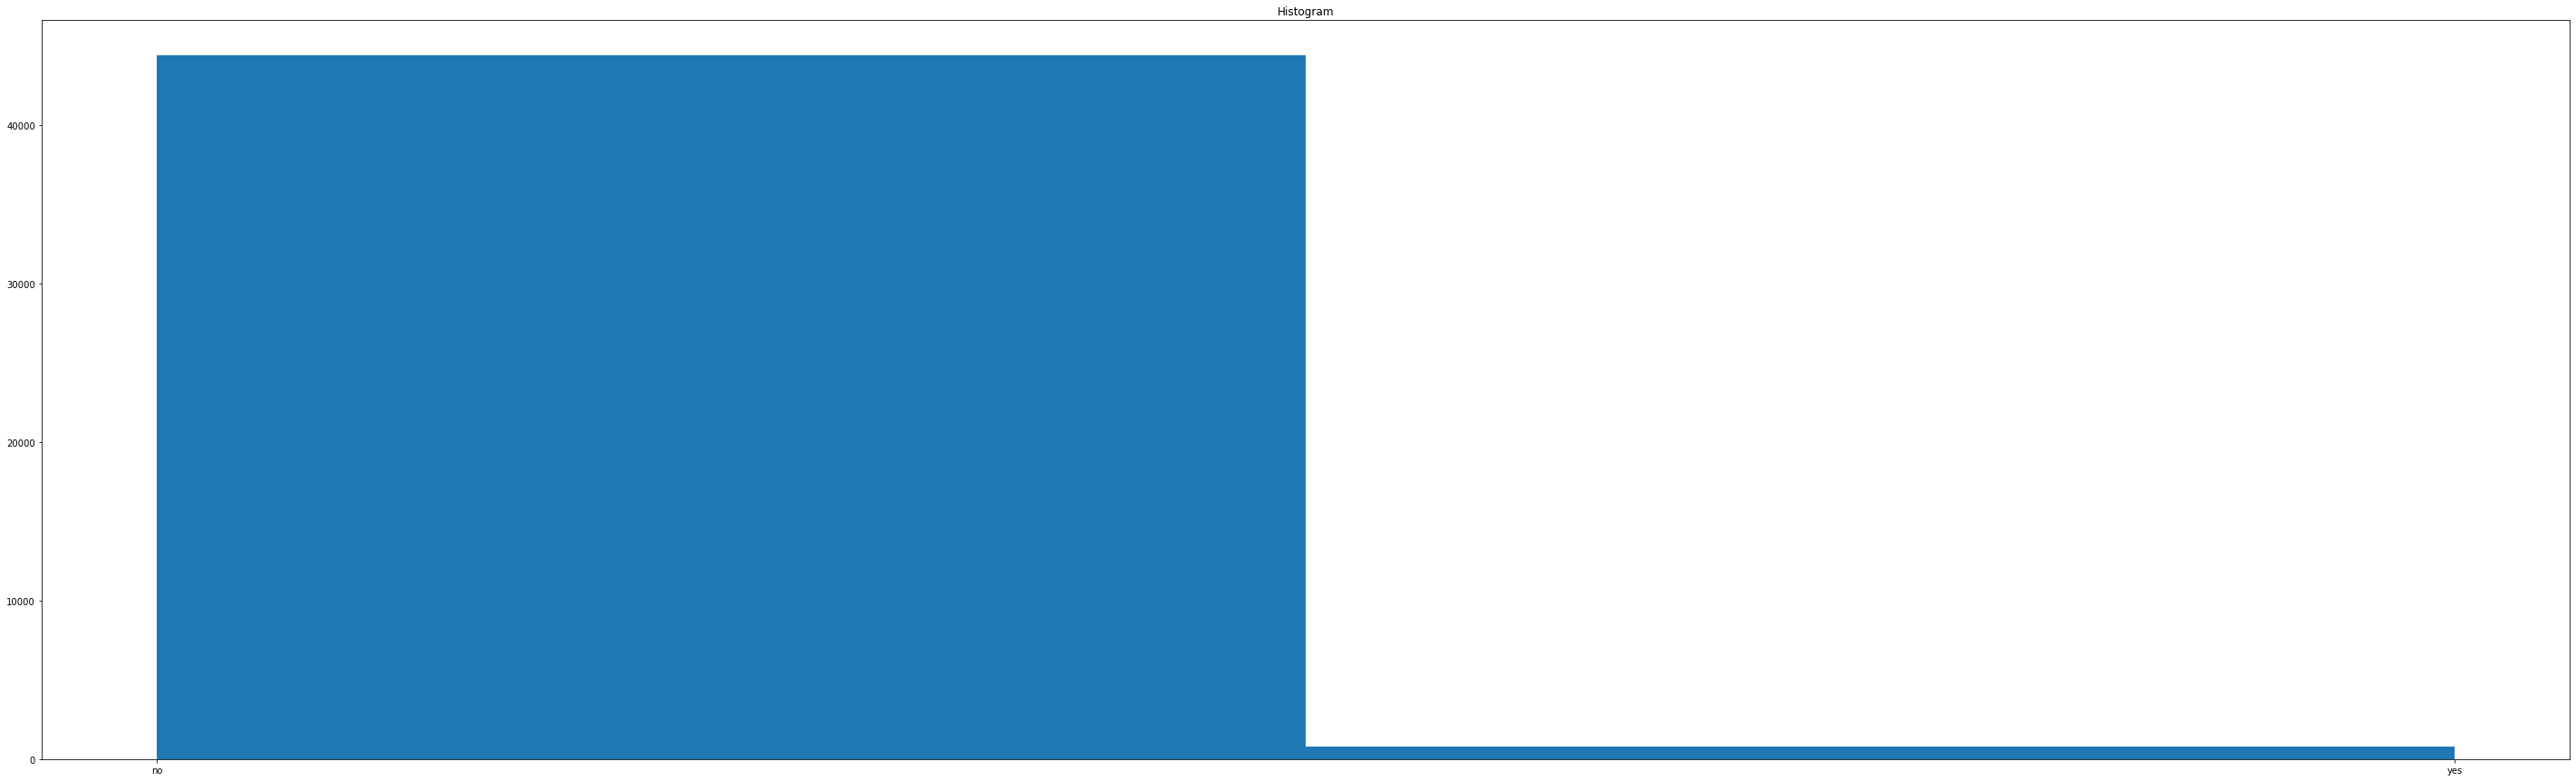

default
no     44396
yes      815
Name: default, dtype: int64
balance


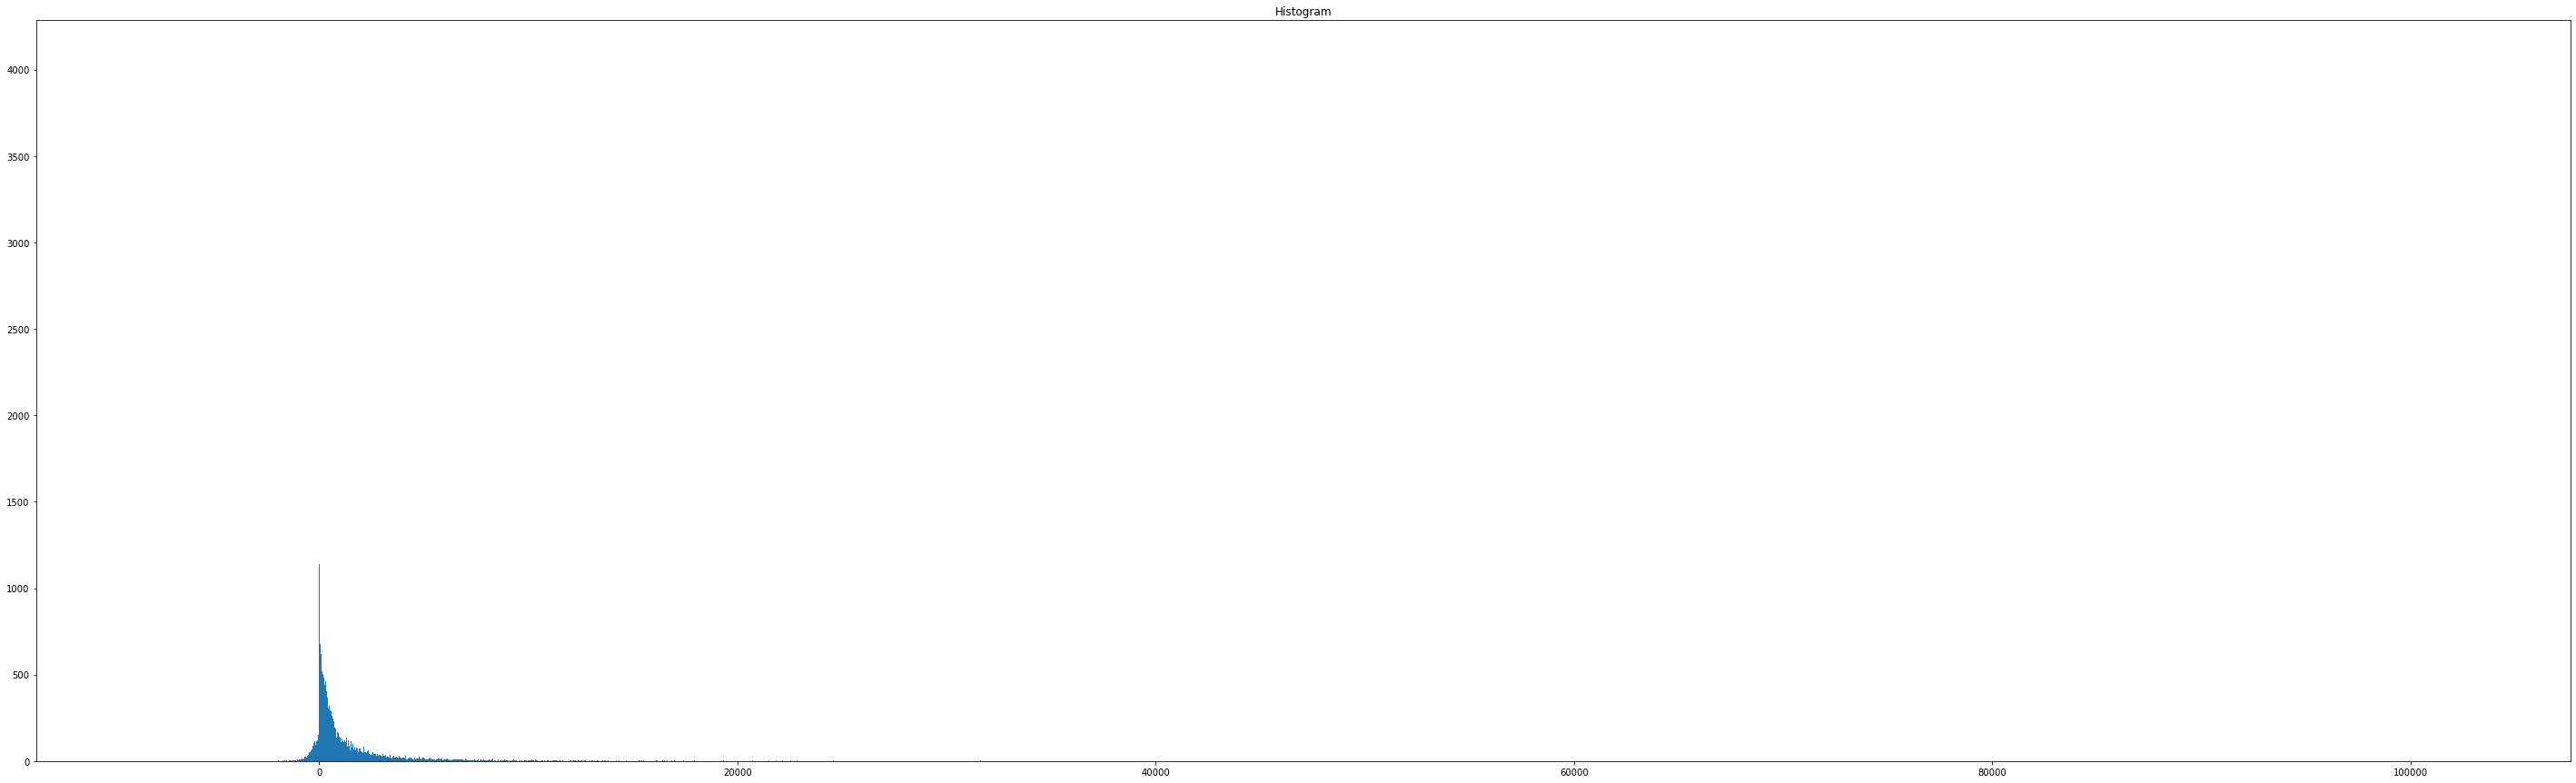

balance
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64
housing


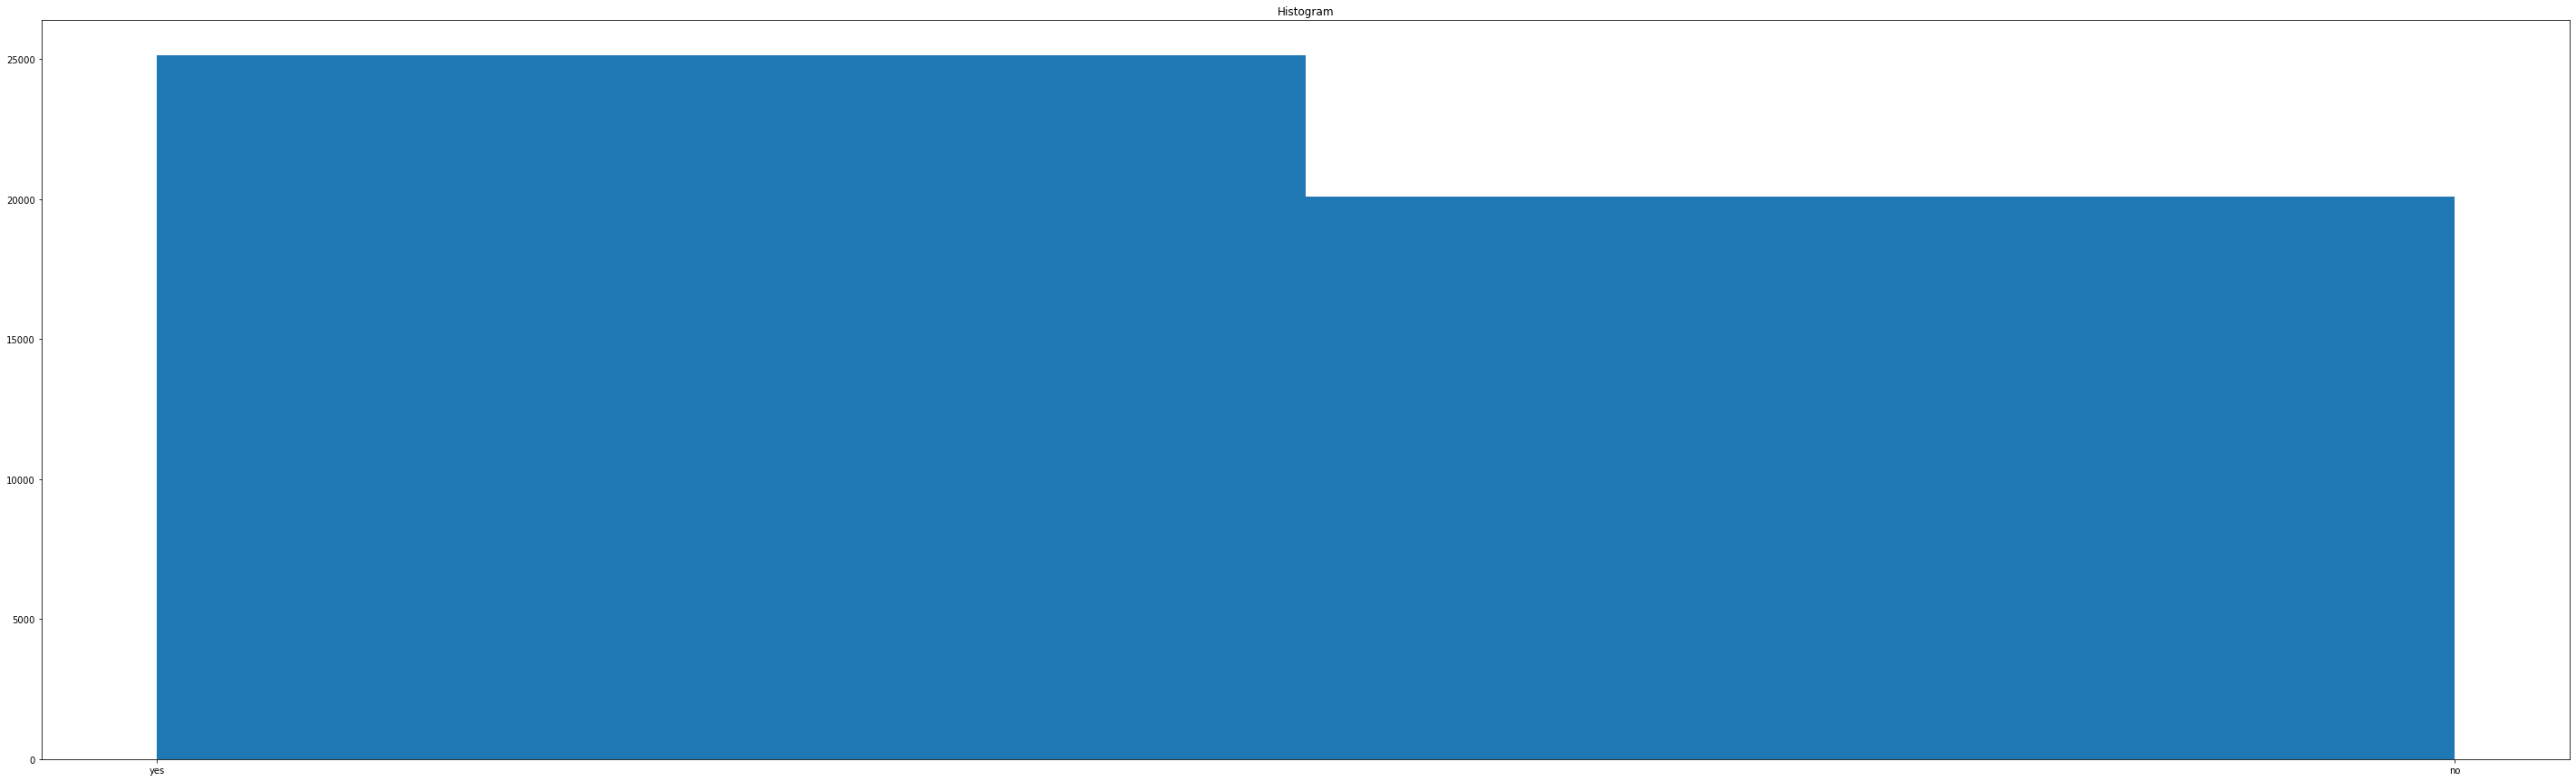

housing
no     20081
yes    25130
Name: housing, dtype: int64
loan


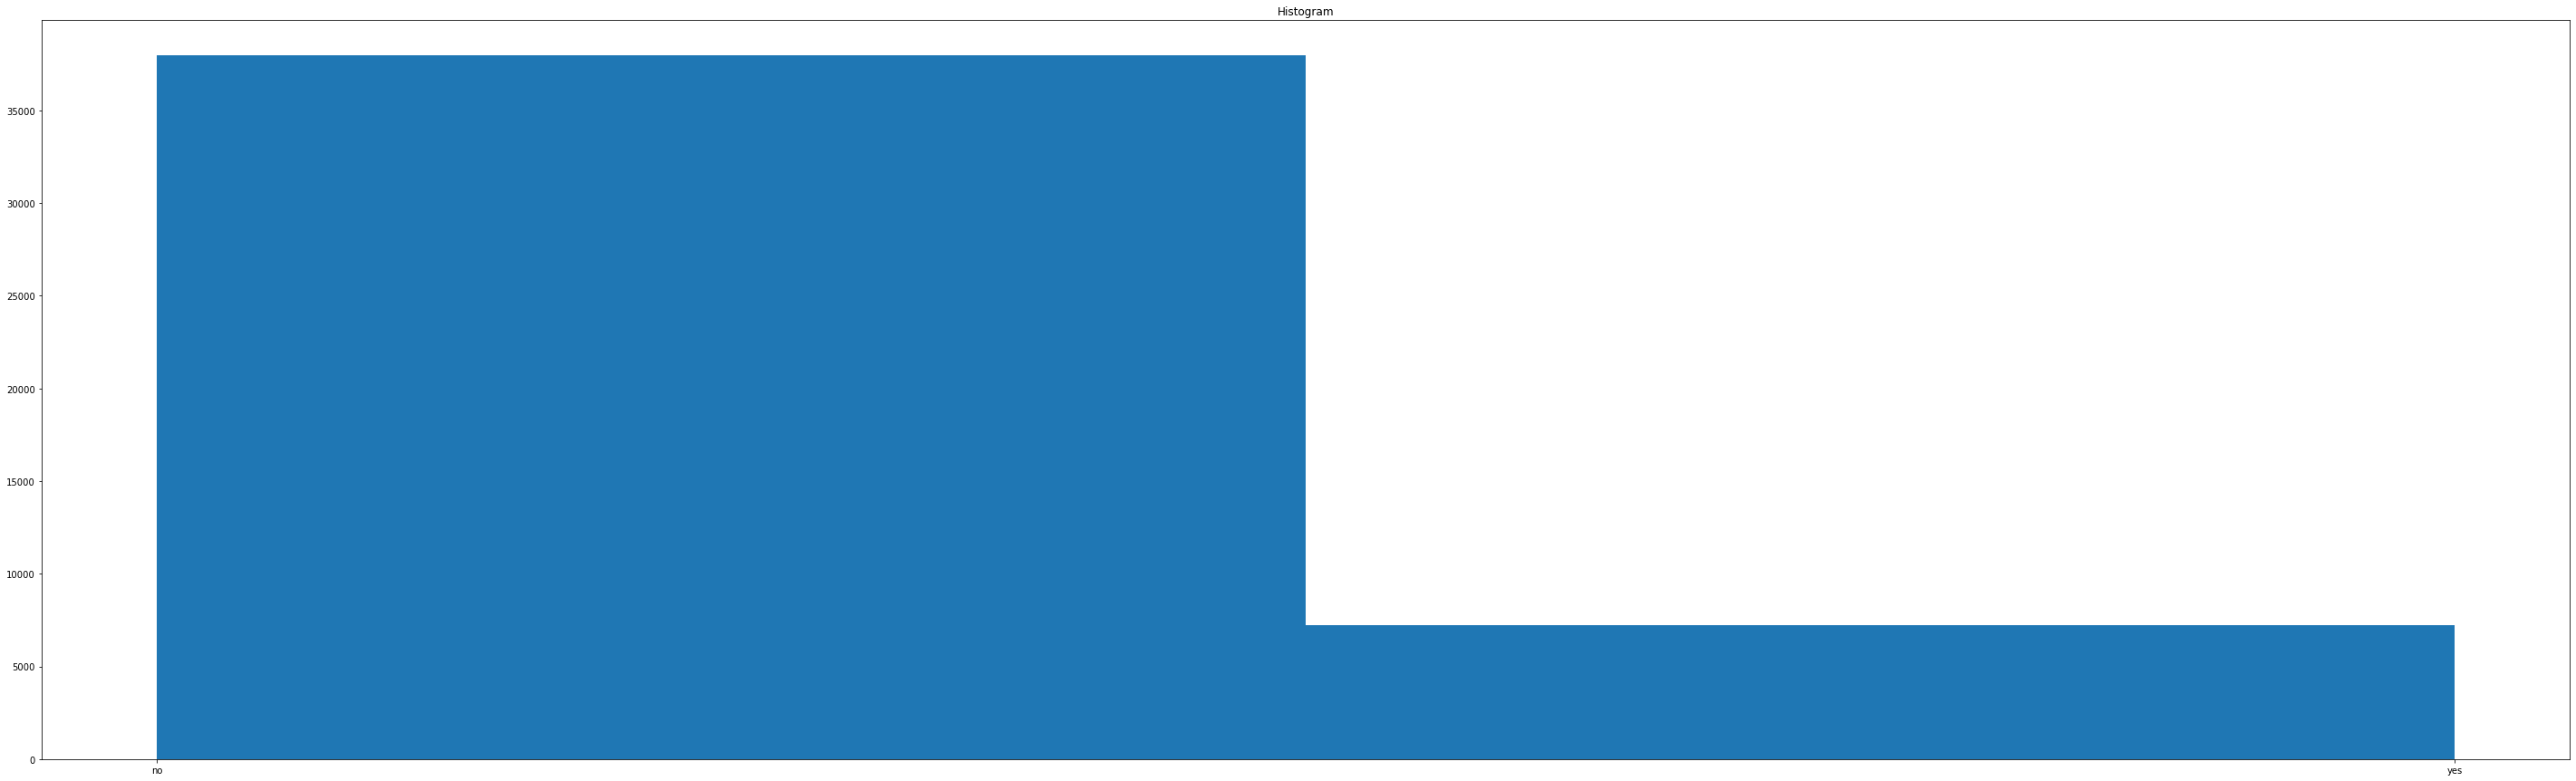

loan
no     37967
yes     7244
Name: loan, dtype: int64
contact


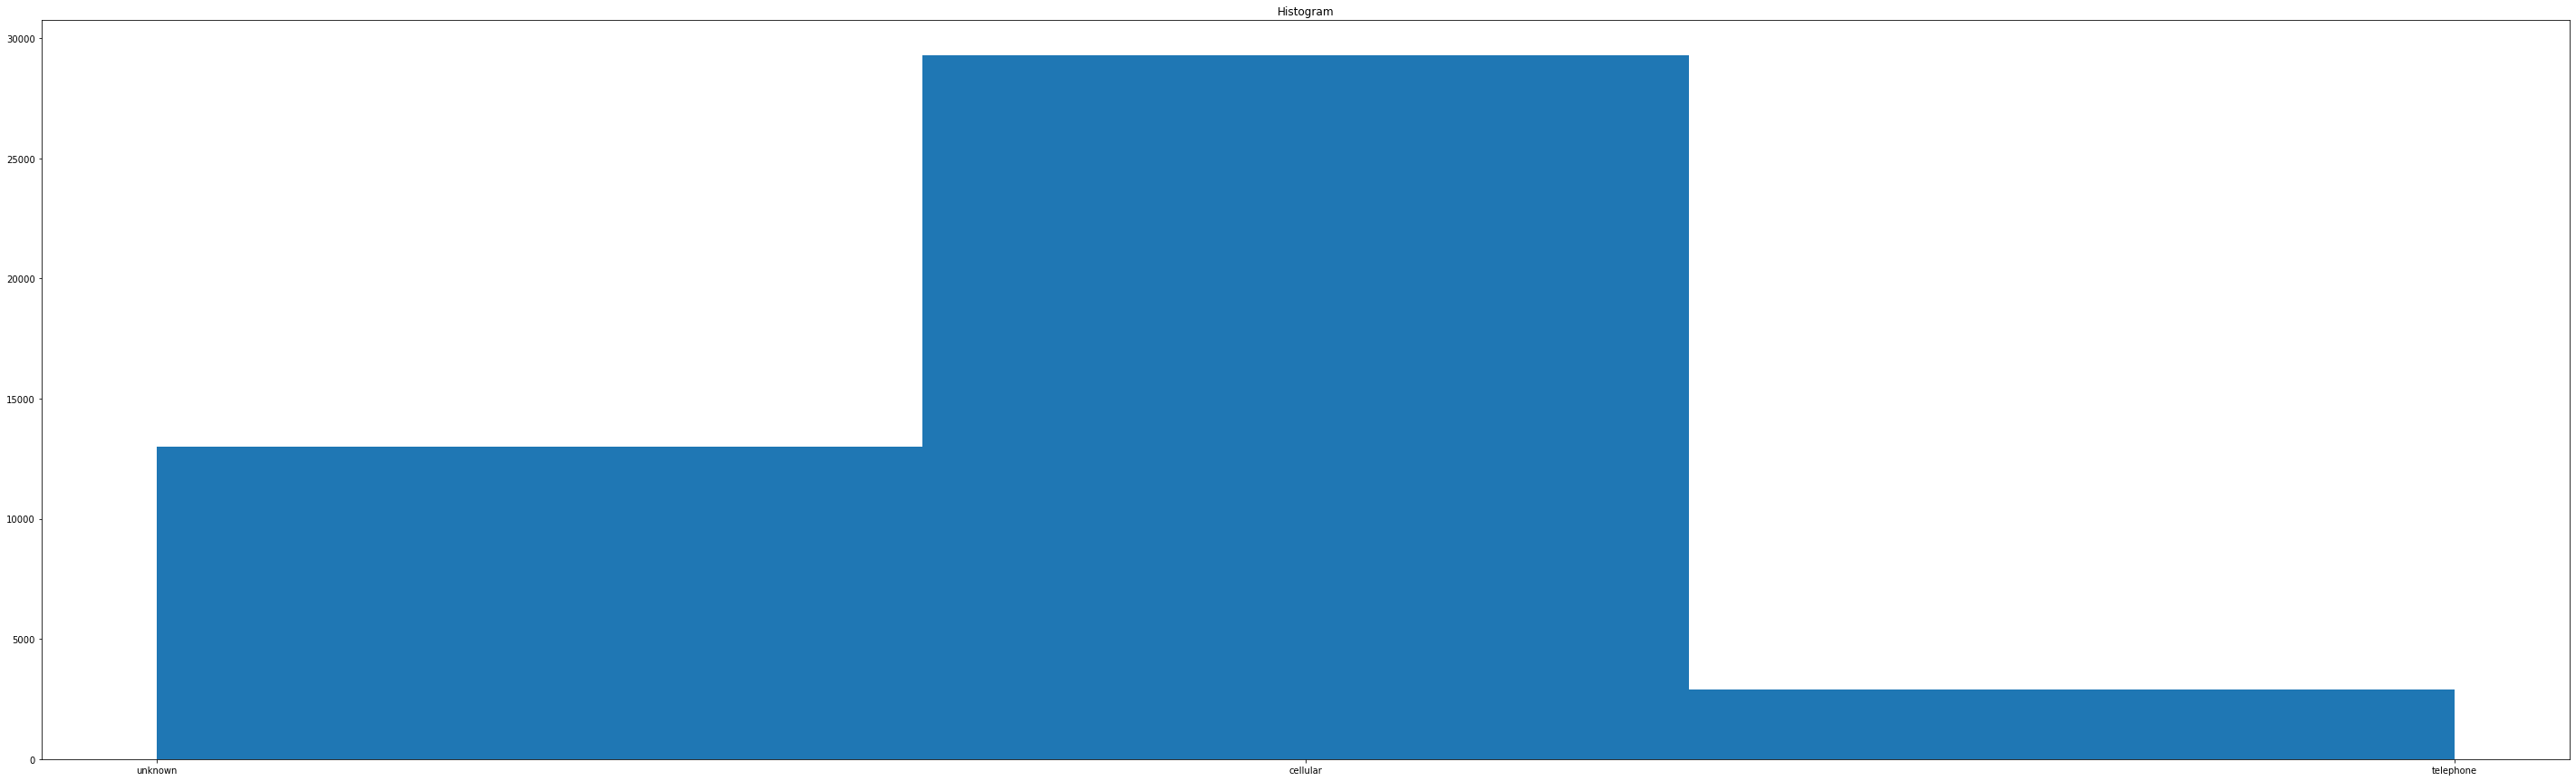

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64
day


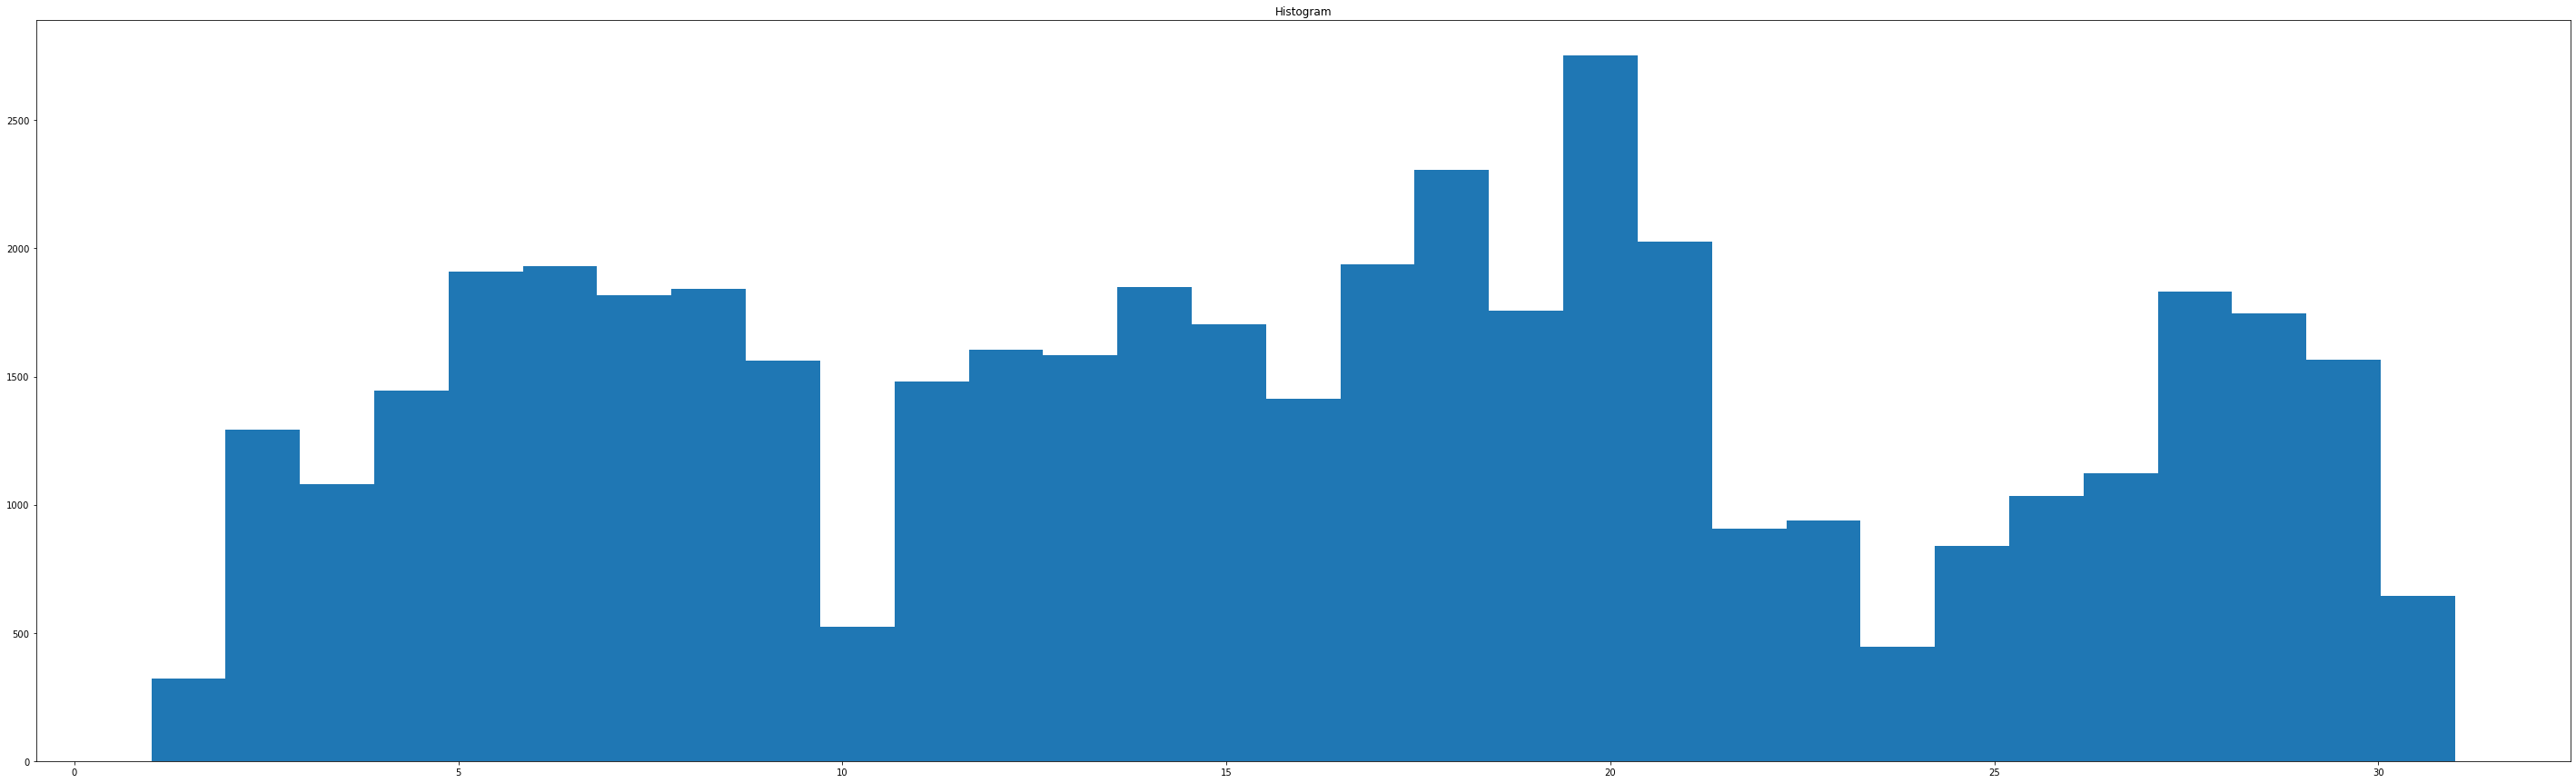

day
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: day, dtype: int64
month


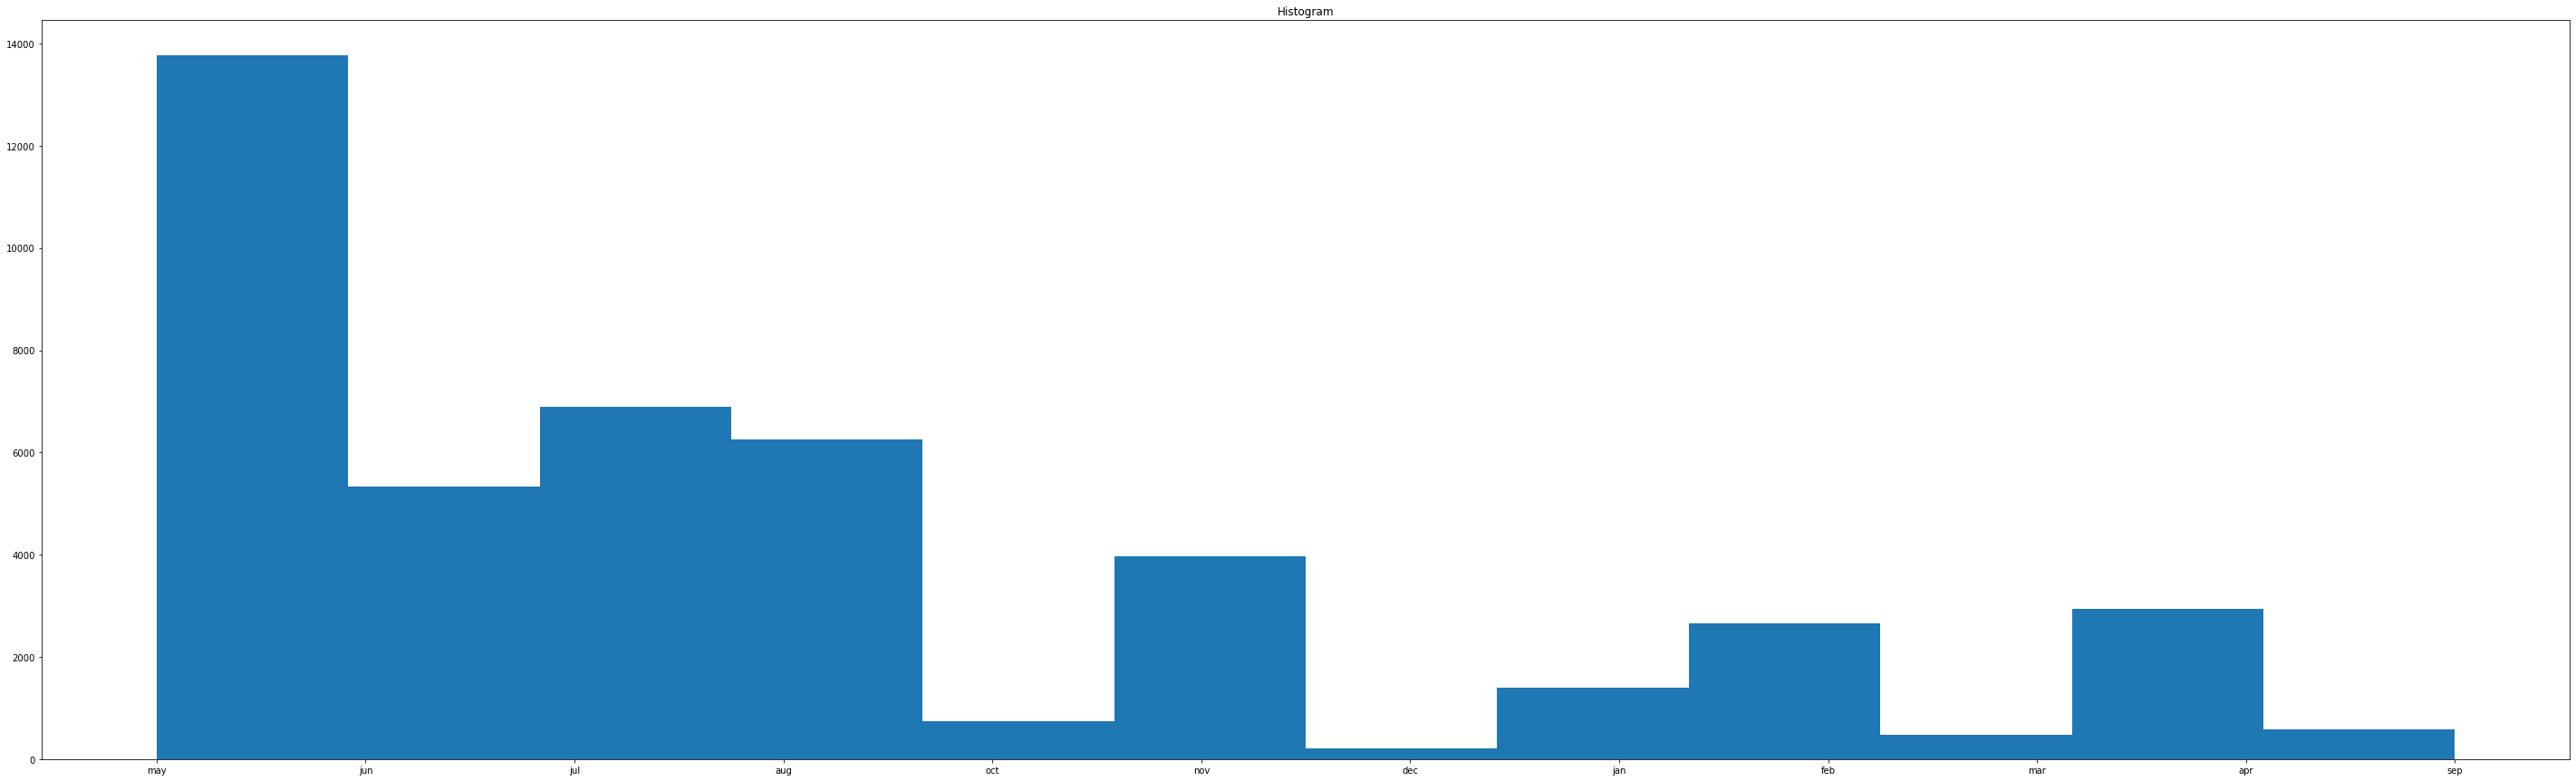

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: month, dtype: int64
duration


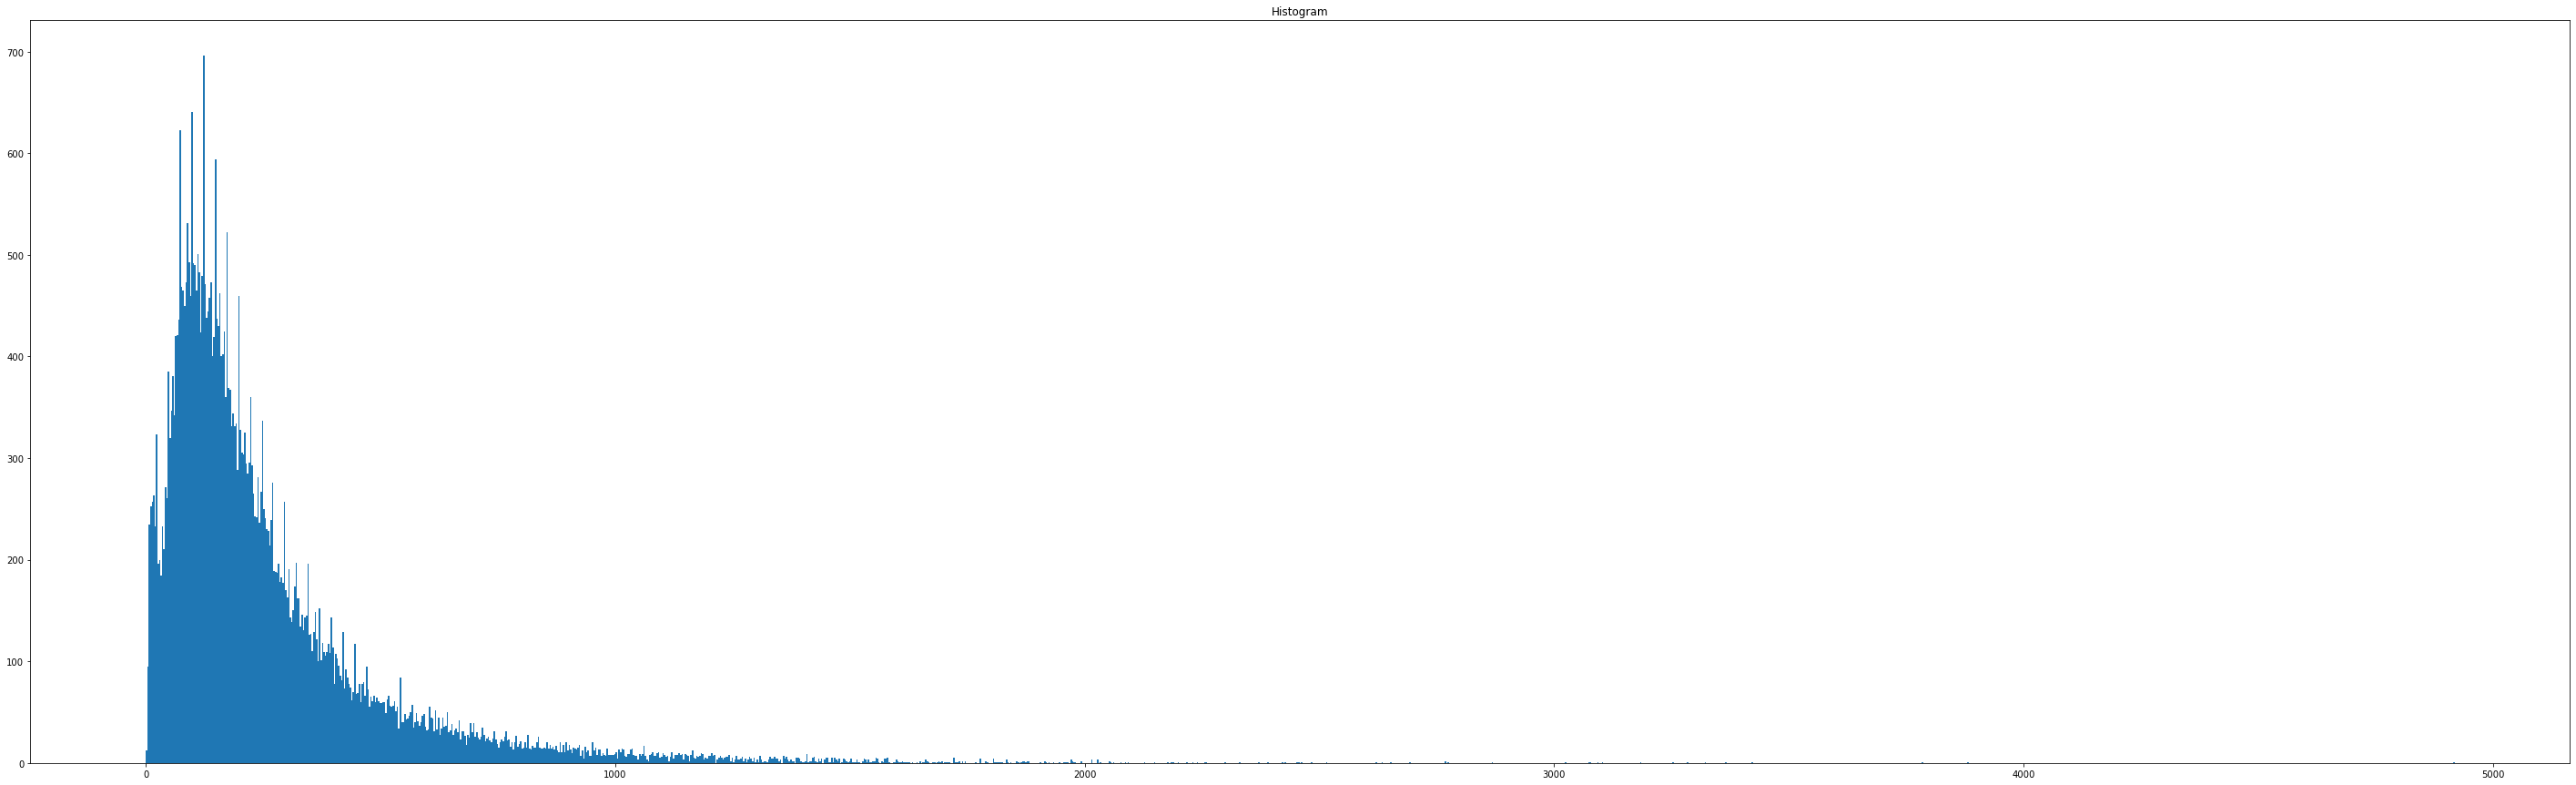

duration
0        3
1        2
2        3
3        4
4       15
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: duration, Length: 1573, dtype: int64
campaign


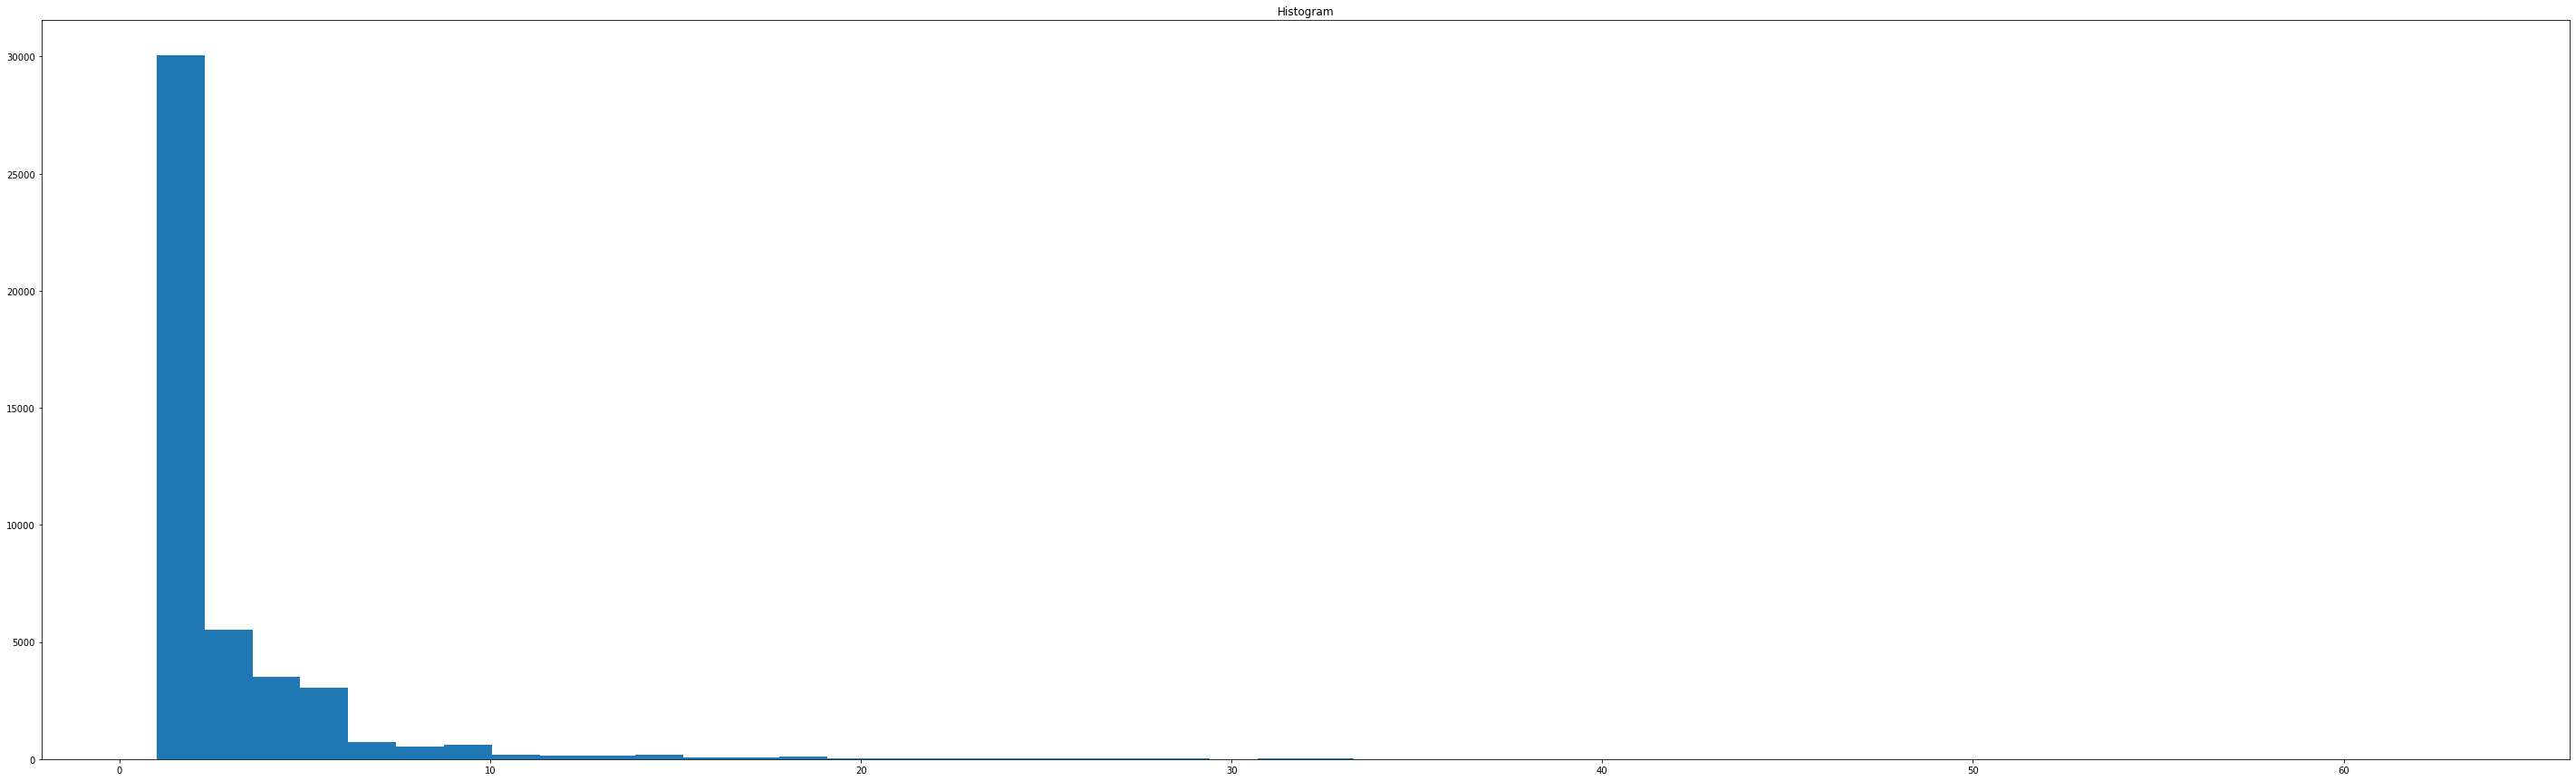

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: campaign, dtype: int64
pdays


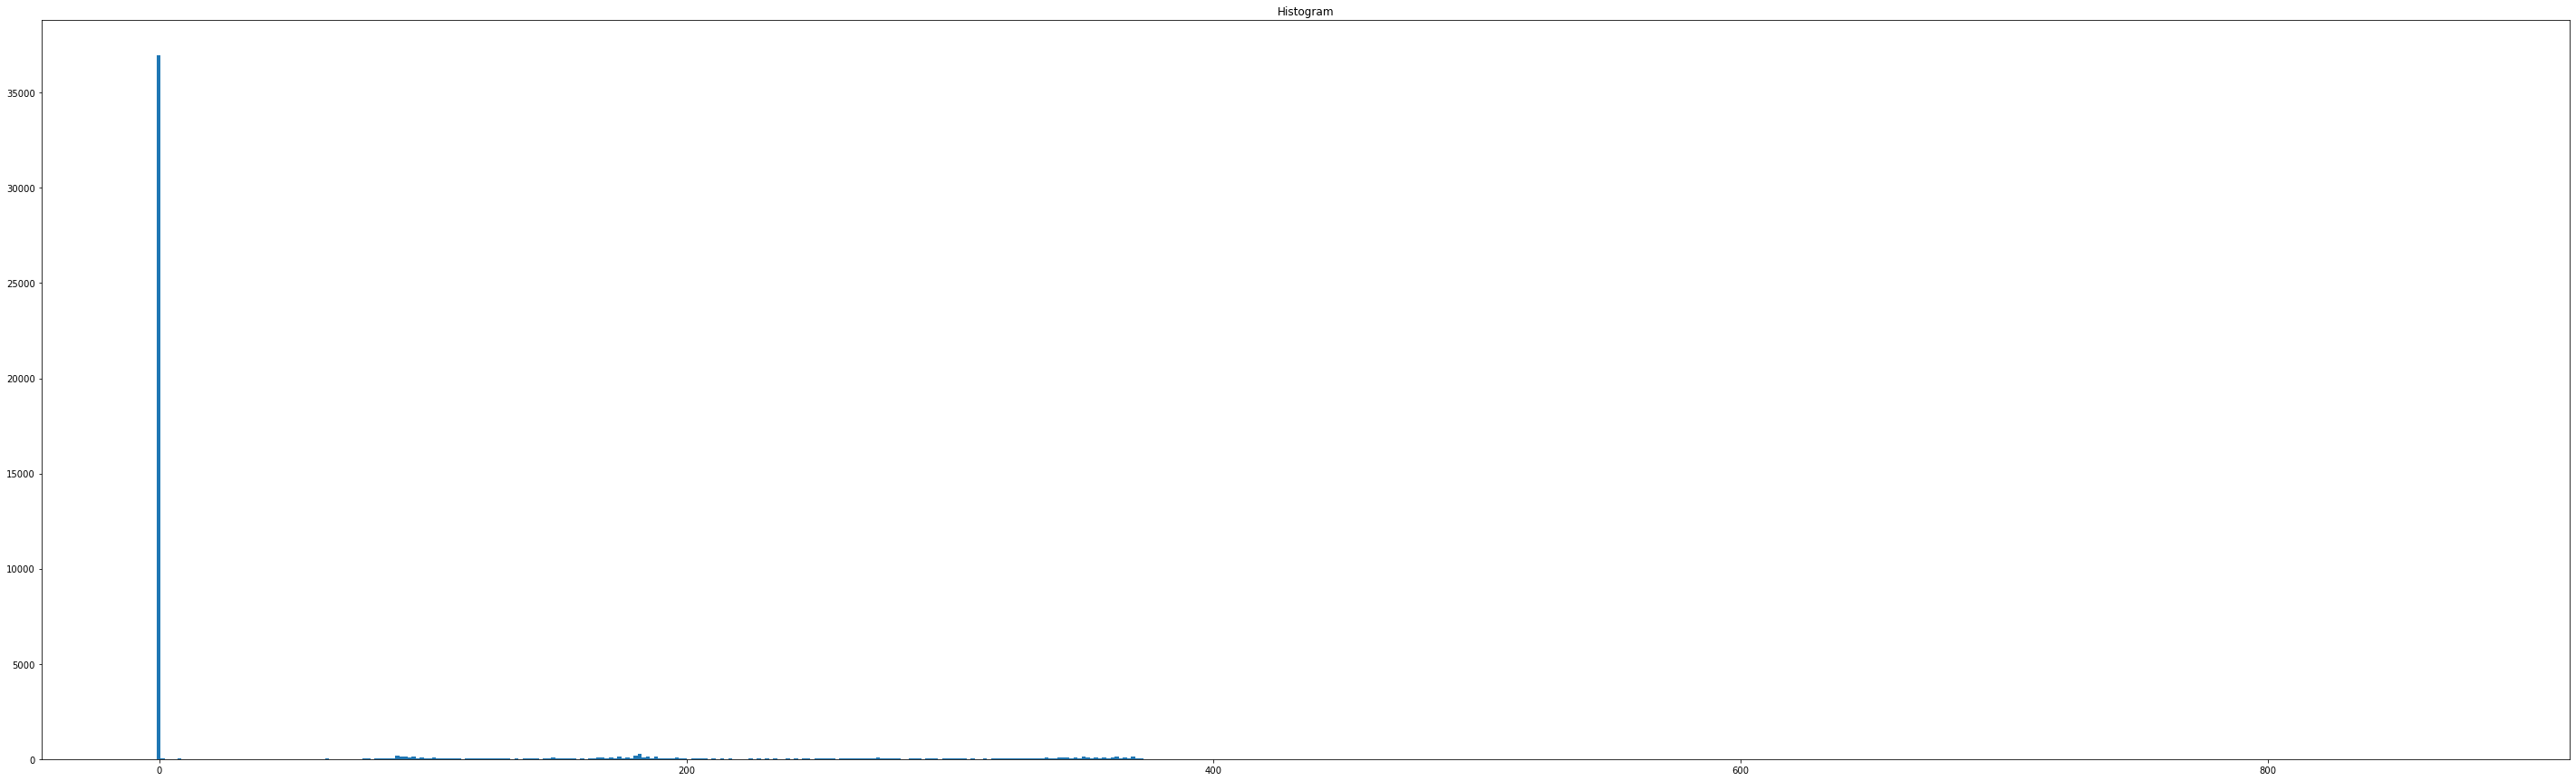

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: pdays, Length: 559, dtype: int64
previous


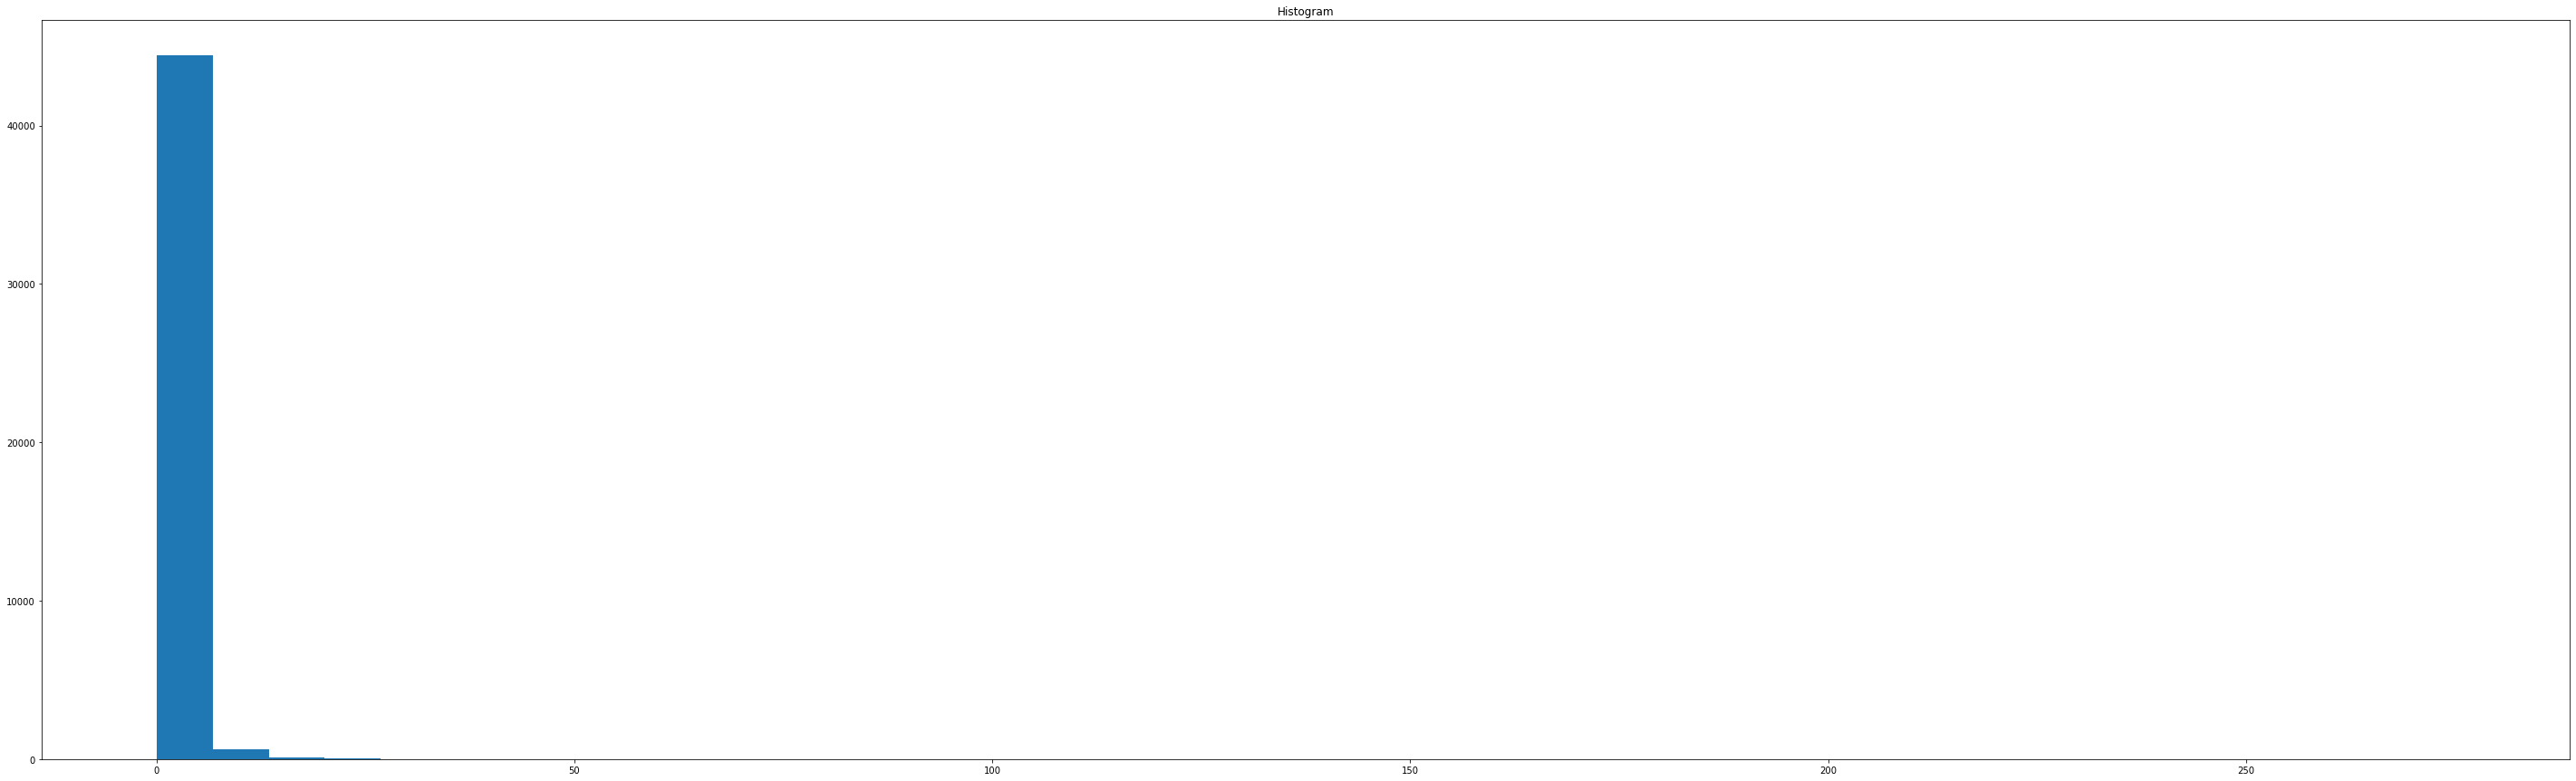

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64
poutcome


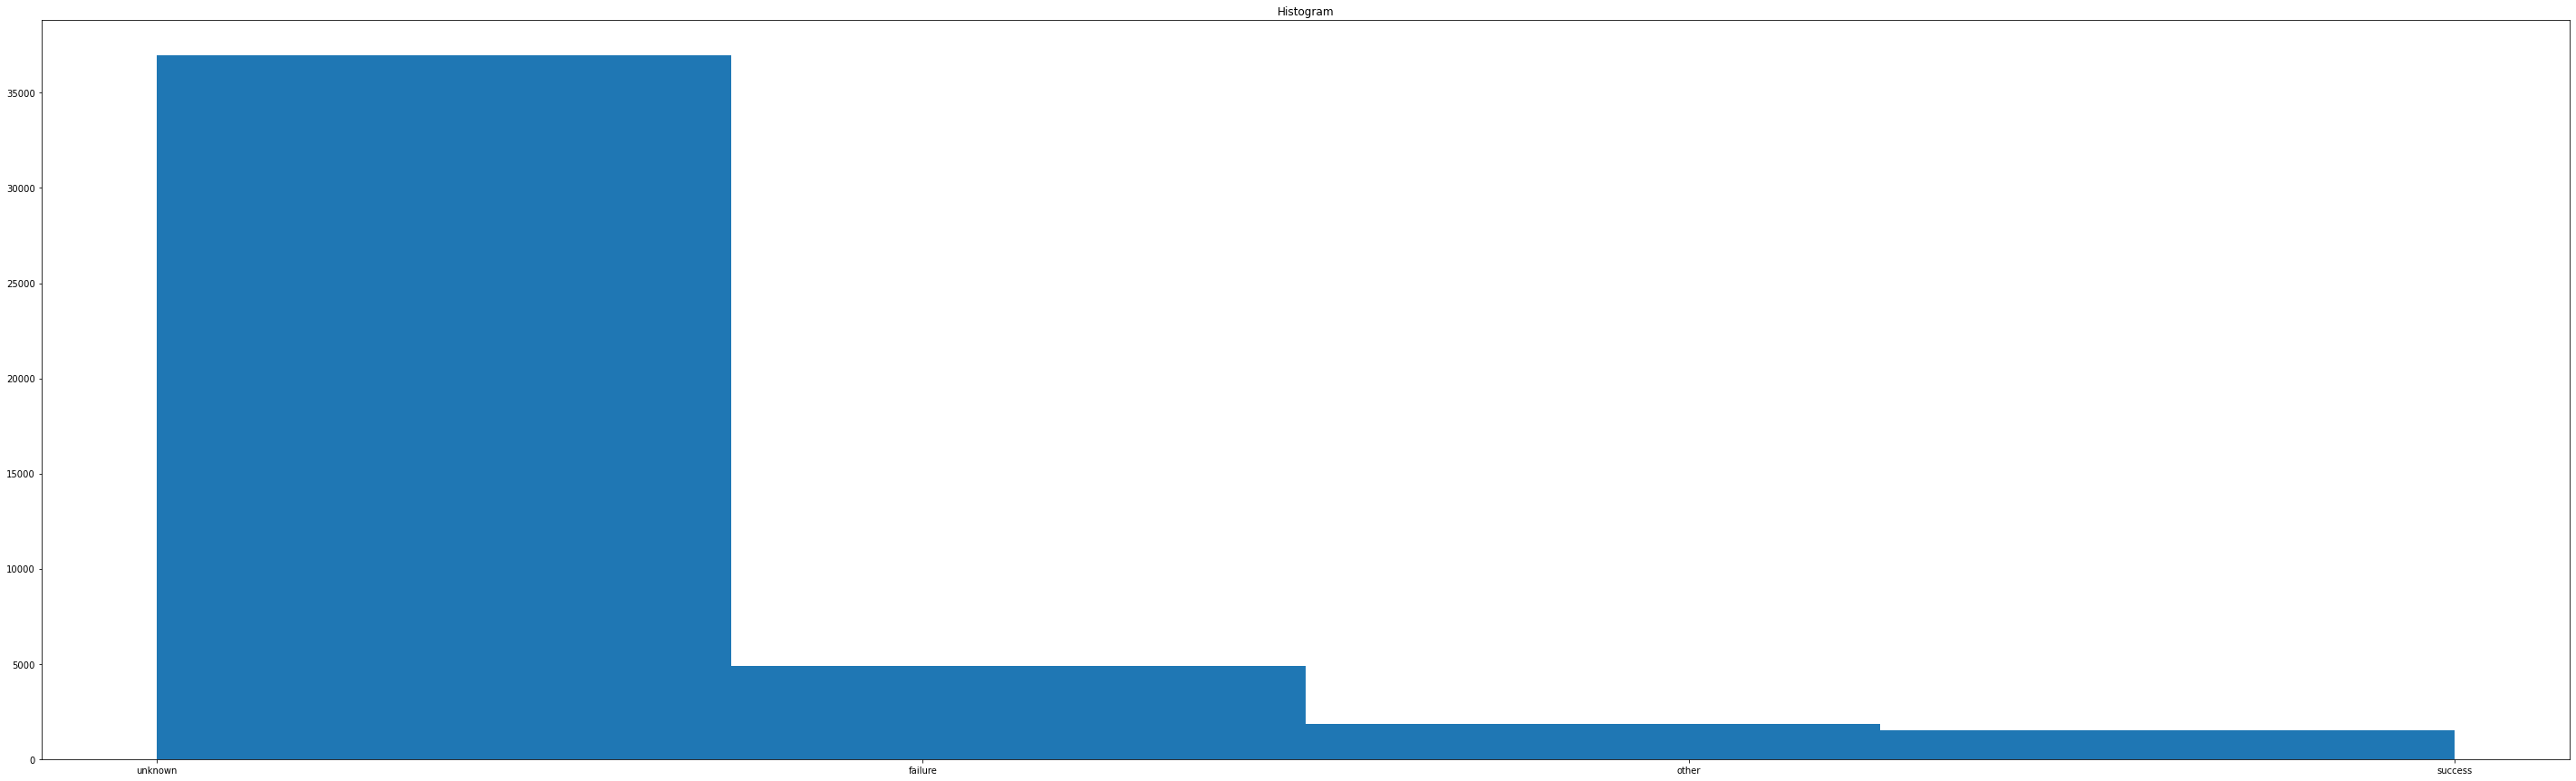

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64
y


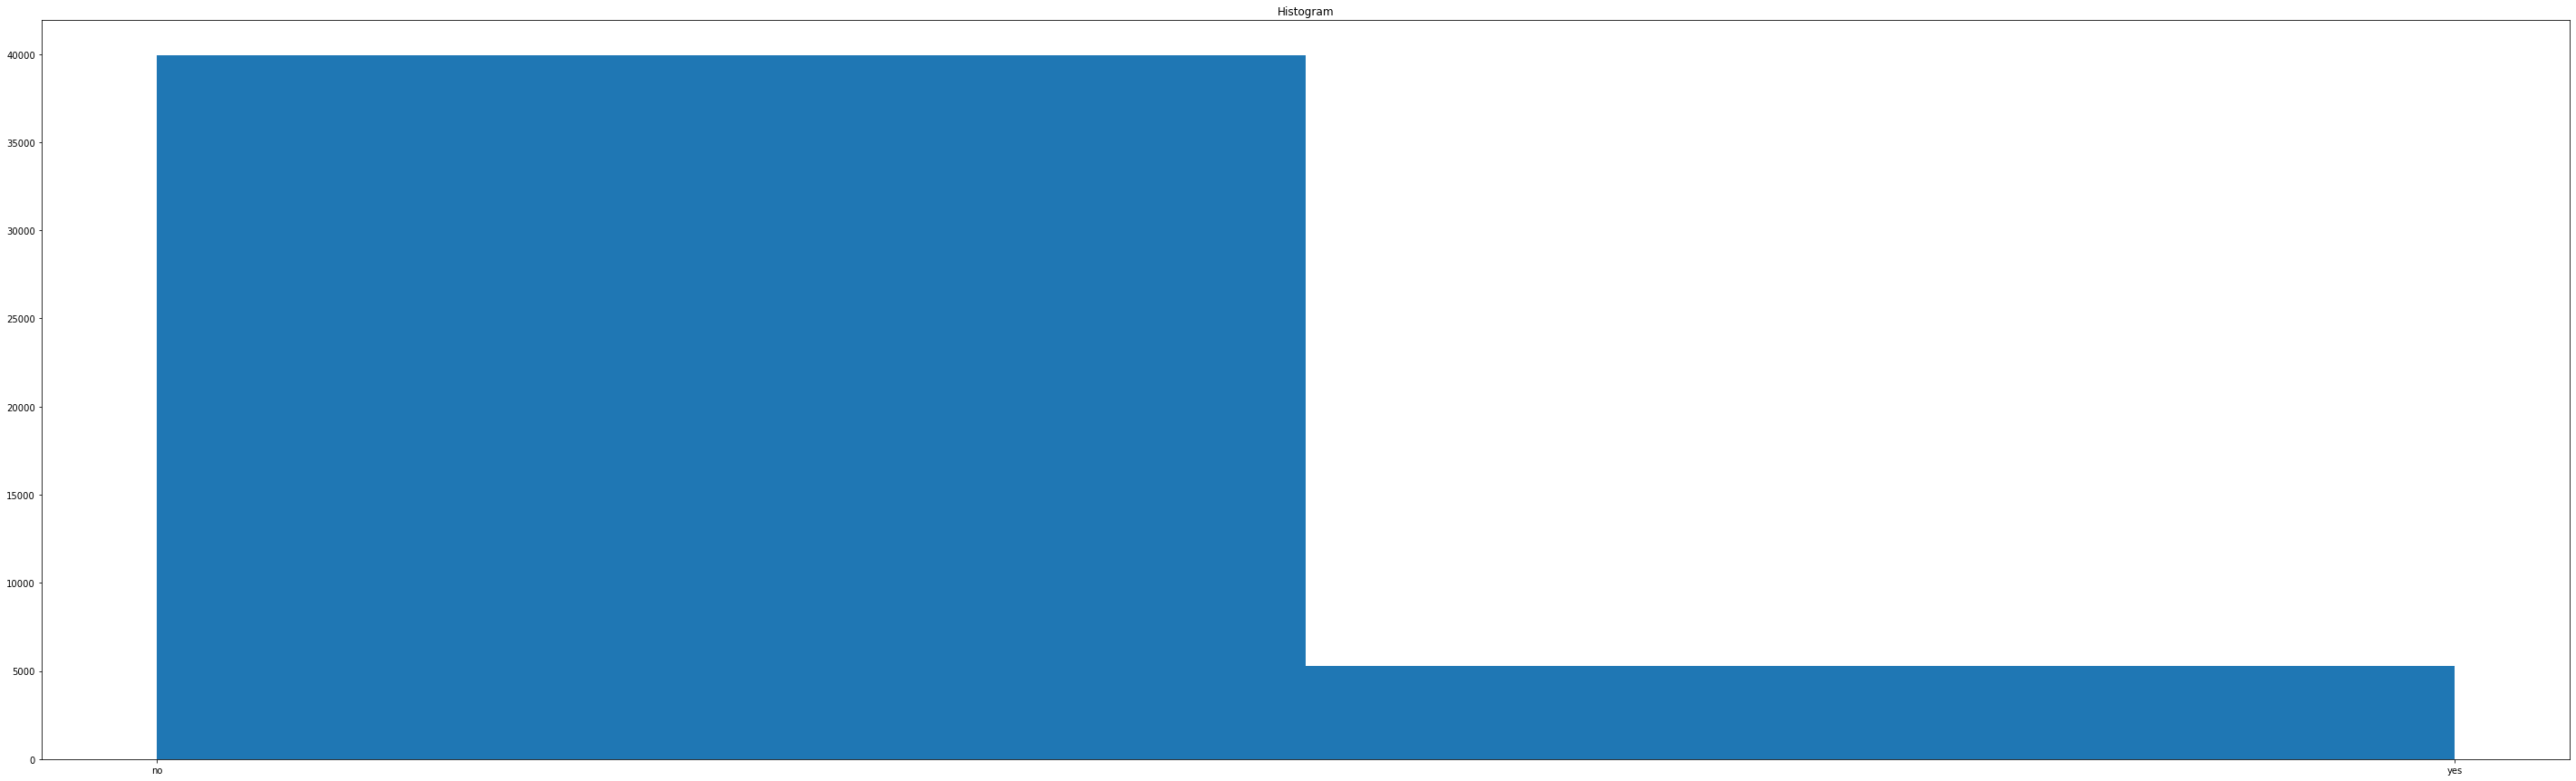

y
no     39922
yes     5289
Name: y, dtype: int64


In [10]:
# function which build the histogram for dataset
def plot_plt_histogram(set_x, bins, grid=False, height=70, width=100,
                       need_xlim=False, xlim=1000, xmin=0,
                       need_ylim=False, ylim=1000, ymin=0,
                      need_print_name=True):
    # plotting the histogram
    if need_print_name == True:
        print(set_x.name)
    plt.figure(figsize=(width, height))
    plt.hist(set_x, bins=bins)
    if need_xlim == True:
        plt.xlim(xmin, xlim)
    if need_ylim == True:
        plt.ylim(ymin, ylim)
    plt.title("Histogram")
    plt.grid(grid)
    plt.show()

# printing the histogram for every column    
for column in pd_data.columns:
    plot_plt_histogram(pd_data[column], bins=len(pd_data[column].unique()),
                        height=15, width=50,)
    print(pd_data[column].groupby(pd_data[column]).count())

Filling NaN's

In [11]:
# label_encoding y for printing the distribution for every column
label_encoder = LabelEncoder()
label_encoder.fit(pd_data['y'])
pd_data['y'] = label_encoder.transform(pd_data['y'])

----------------------------------------------------------------------------------
     age         y
age               
18    18  0.583333
19    19  0.314286
20    20  0.300000
21    21  0.278481
22    22  0.310078
..   ...       ...
90    90  1.000000
92    92  1.000000
93    93  1.000000
94    94  0.000000
95    95  0.500000

[77 rows x 2 columns]

                              +---------+
                              |  age  |
                              +---------+


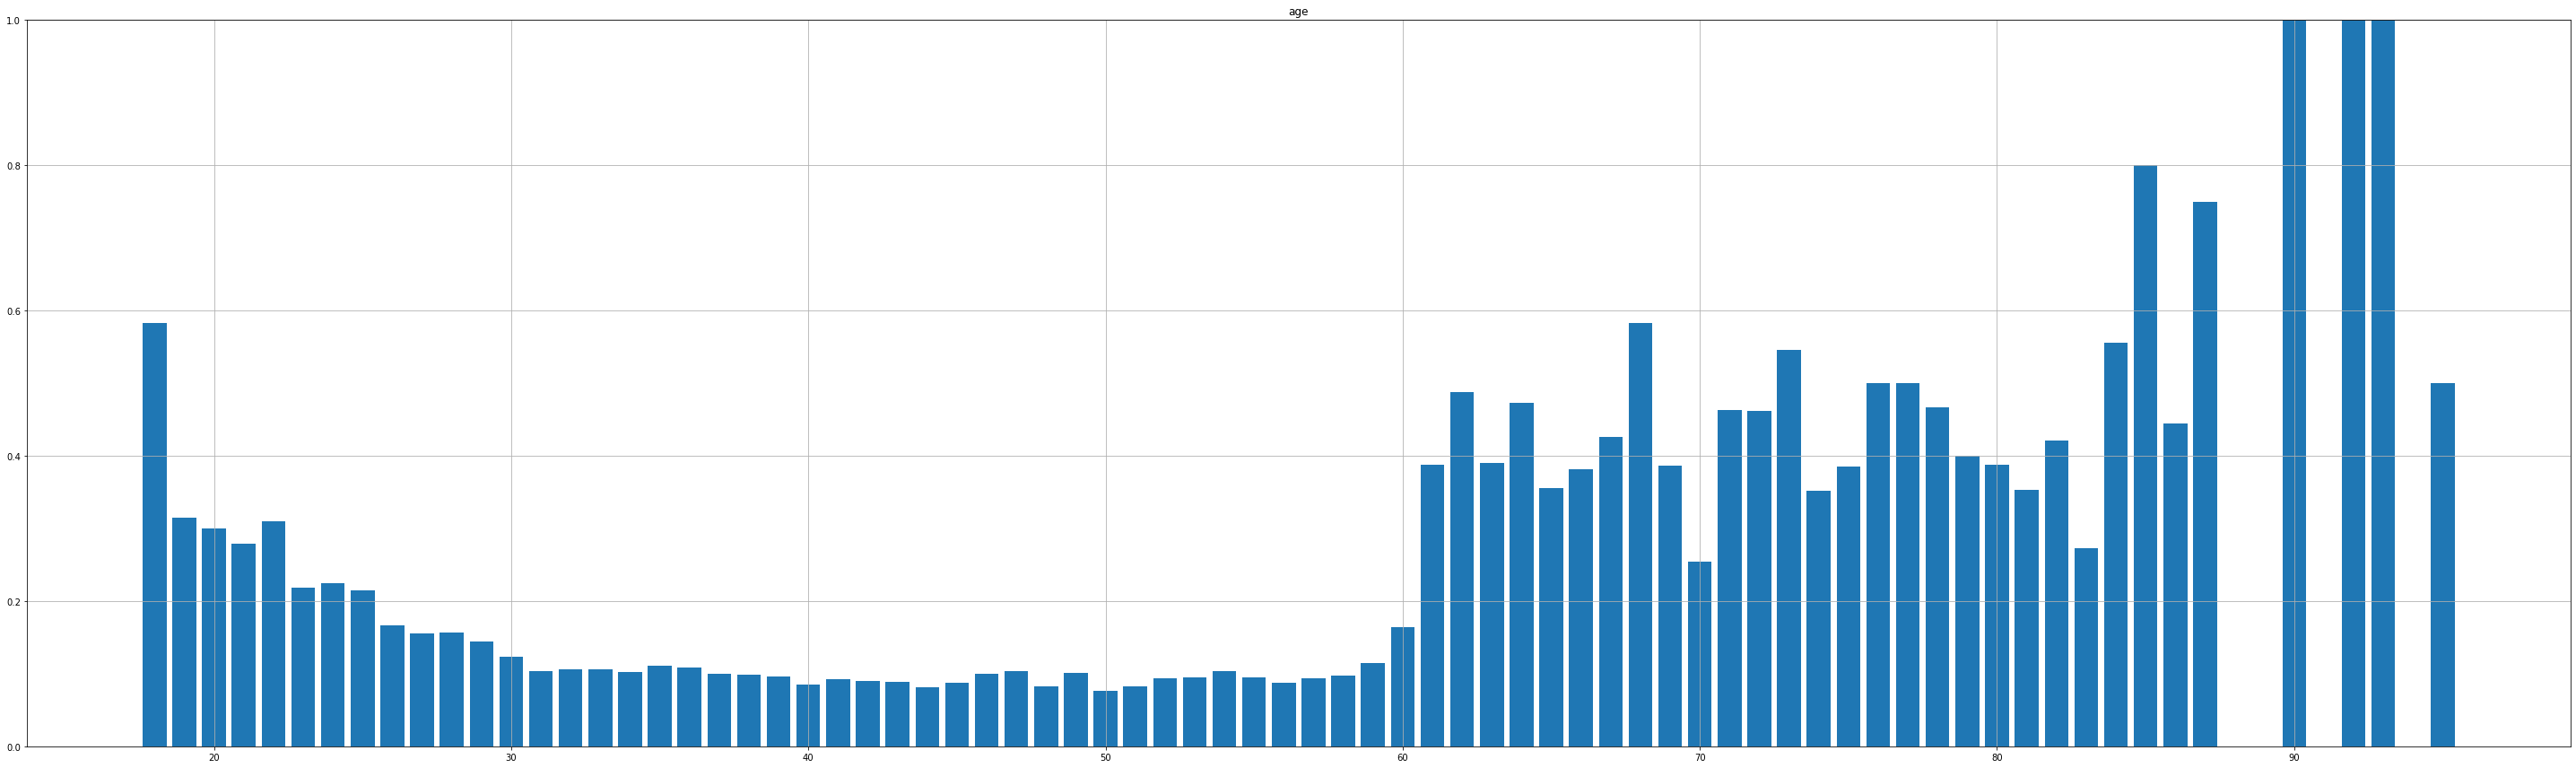

----------------------------------------------------------------------------------
                      y
job                    
admin.         0.122027
blue-collar    0.072750
entrepreneur   0.082717
housemaid      0.087903
management     0.137556
retired        0.227915
self-employed  0.118429
services       0.088830
student        0.286780
technician     0.110570
unemployed     0.155027
unknown        0.118056

                              +---------+
                              |  job  |
                              +---------+
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


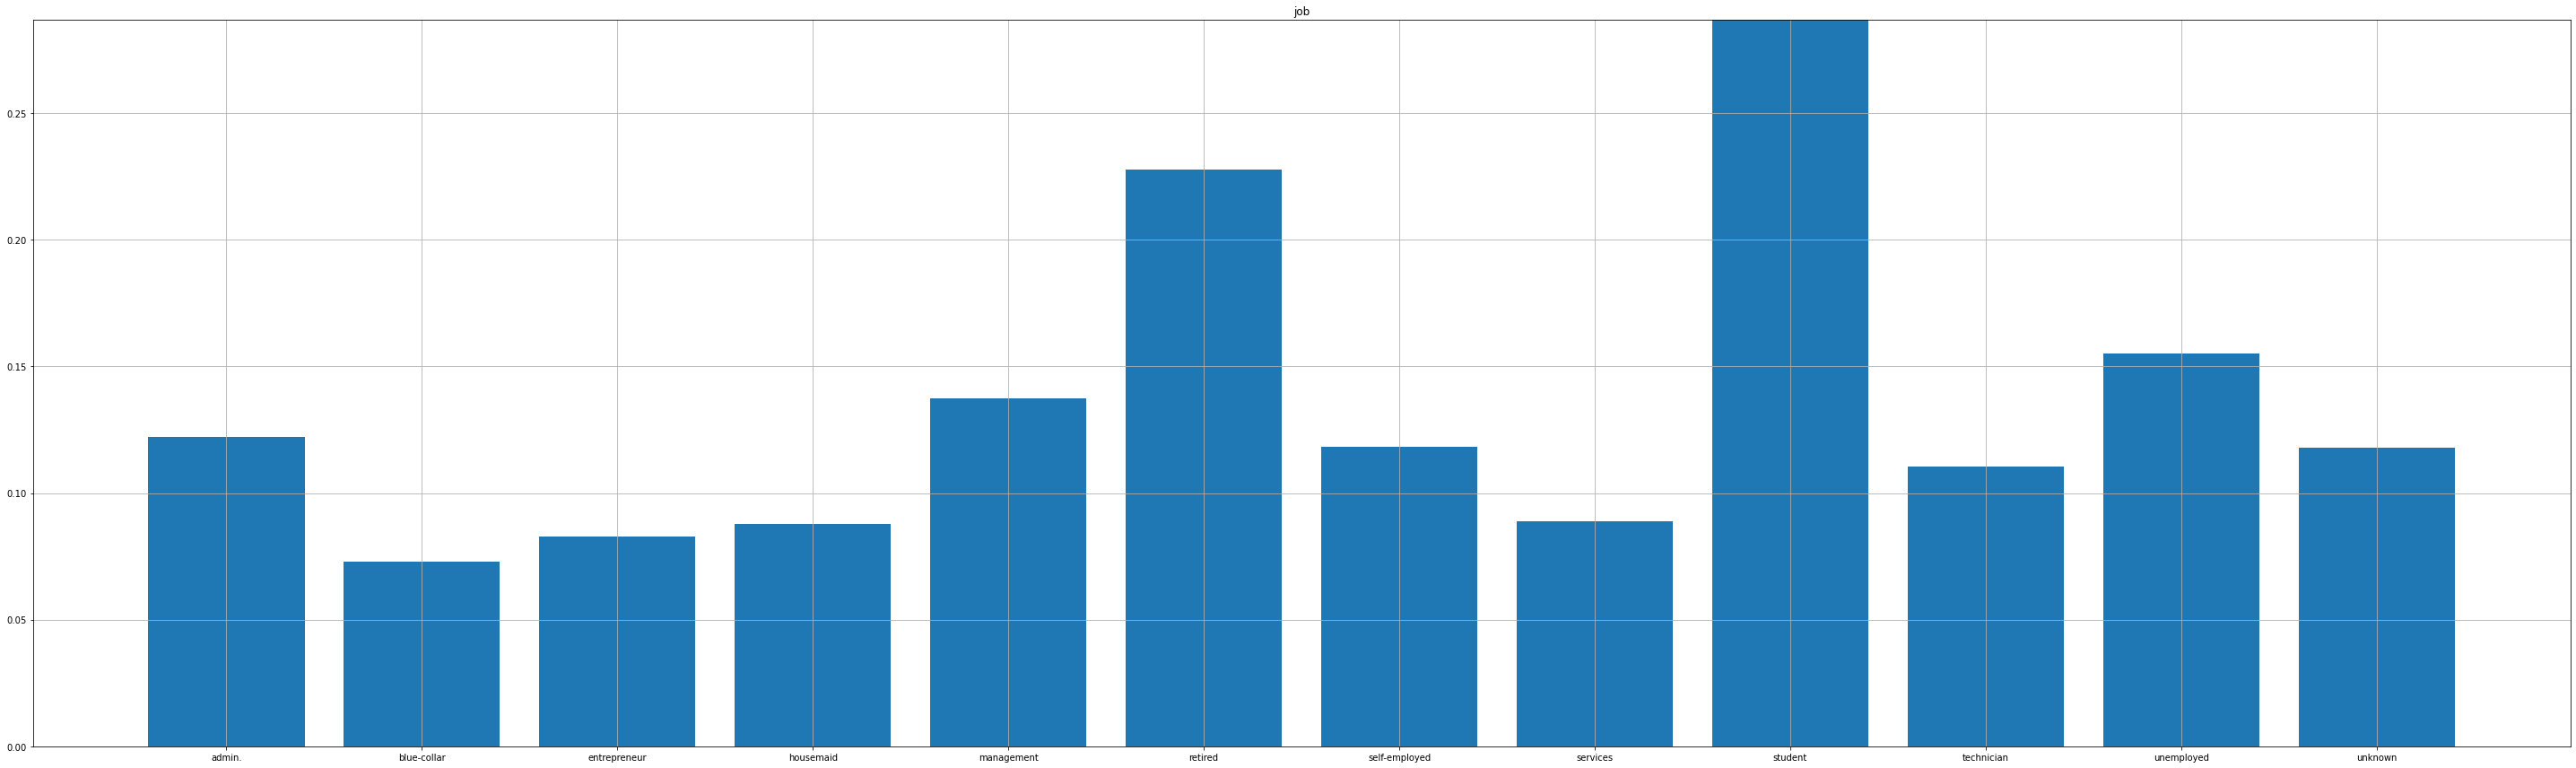

----------------------------------------------------------------------------------
                 y
marital           
divorced  0.119455
married   0.101235
single    0.149492

                              +---------+
                              |  marital  |
                              +---------+
['divorced' 'married' 'single']


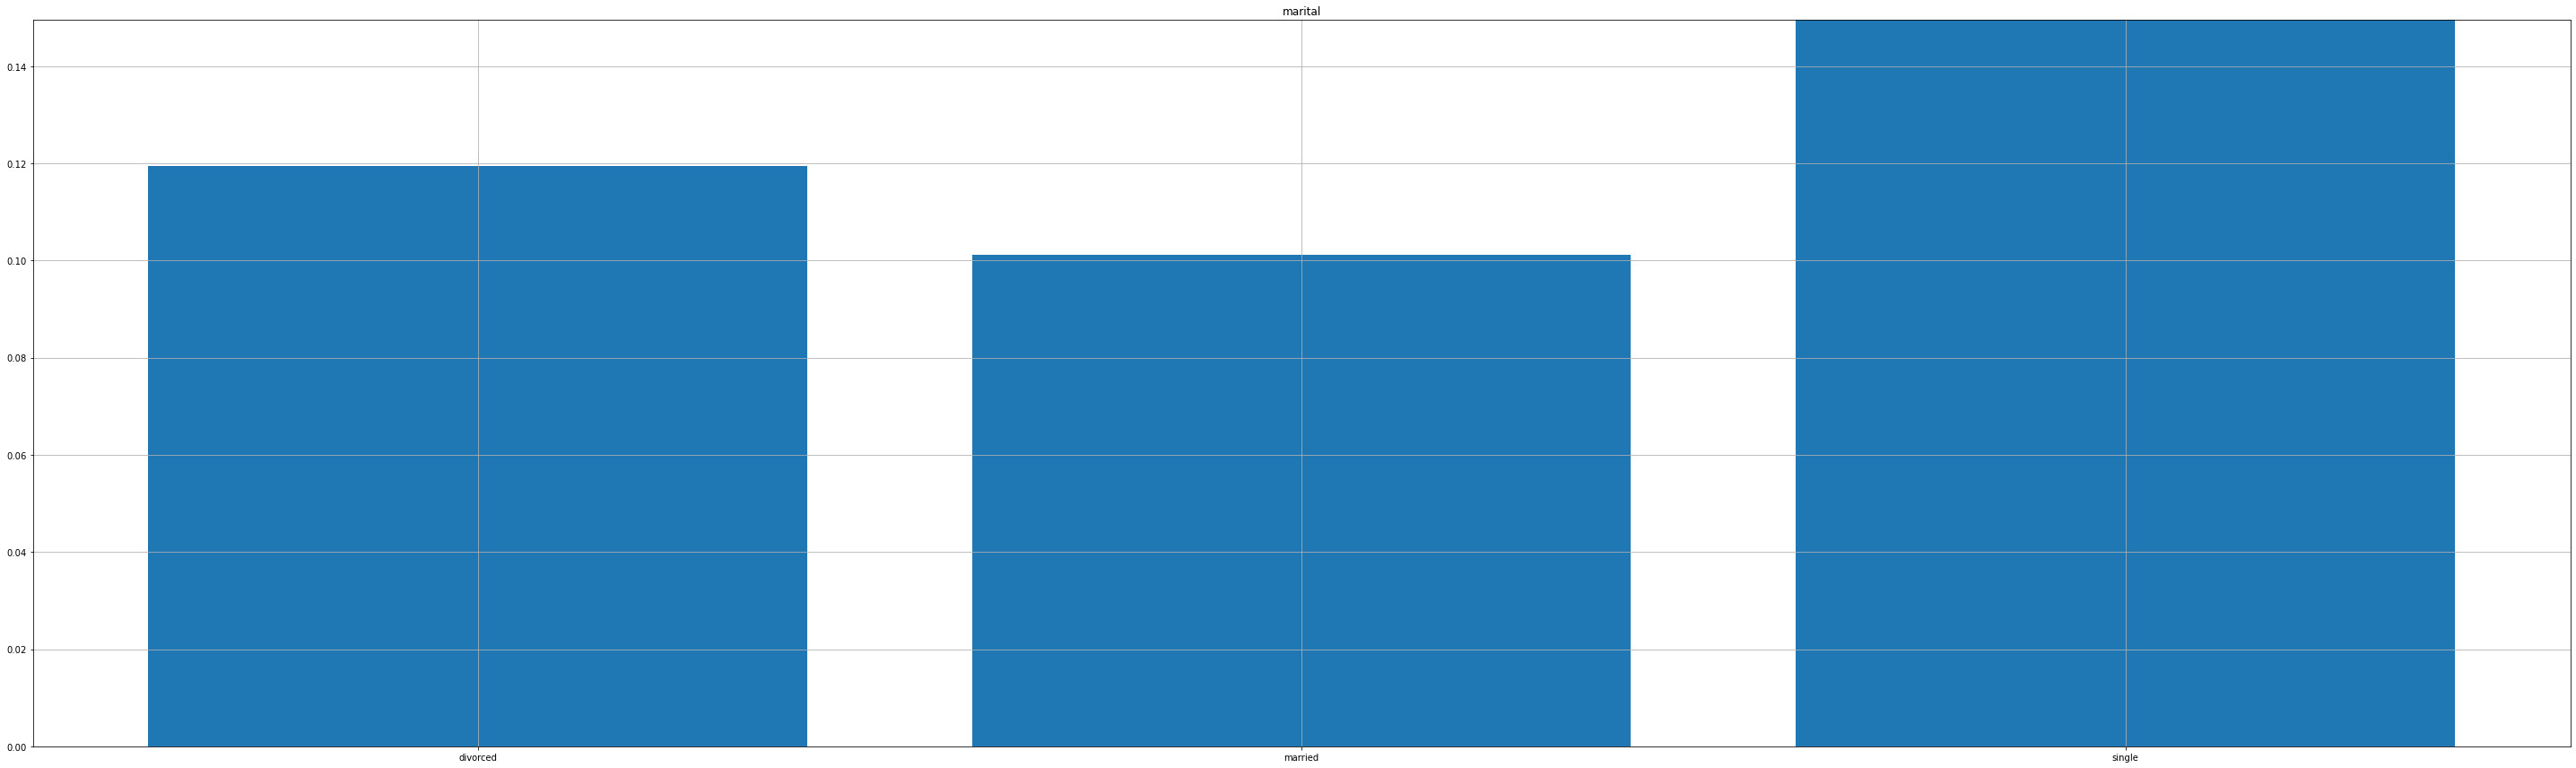

----------------------------------------------------------------------------------
                  y
education          
primary    0.086265
secondary  0.105594
tertiary   0.150064
unknown    0.135703

                              +---------+
                              |  education  |
                              +---------+
['primary' 'secondary' 'tertiary' 'unknown']


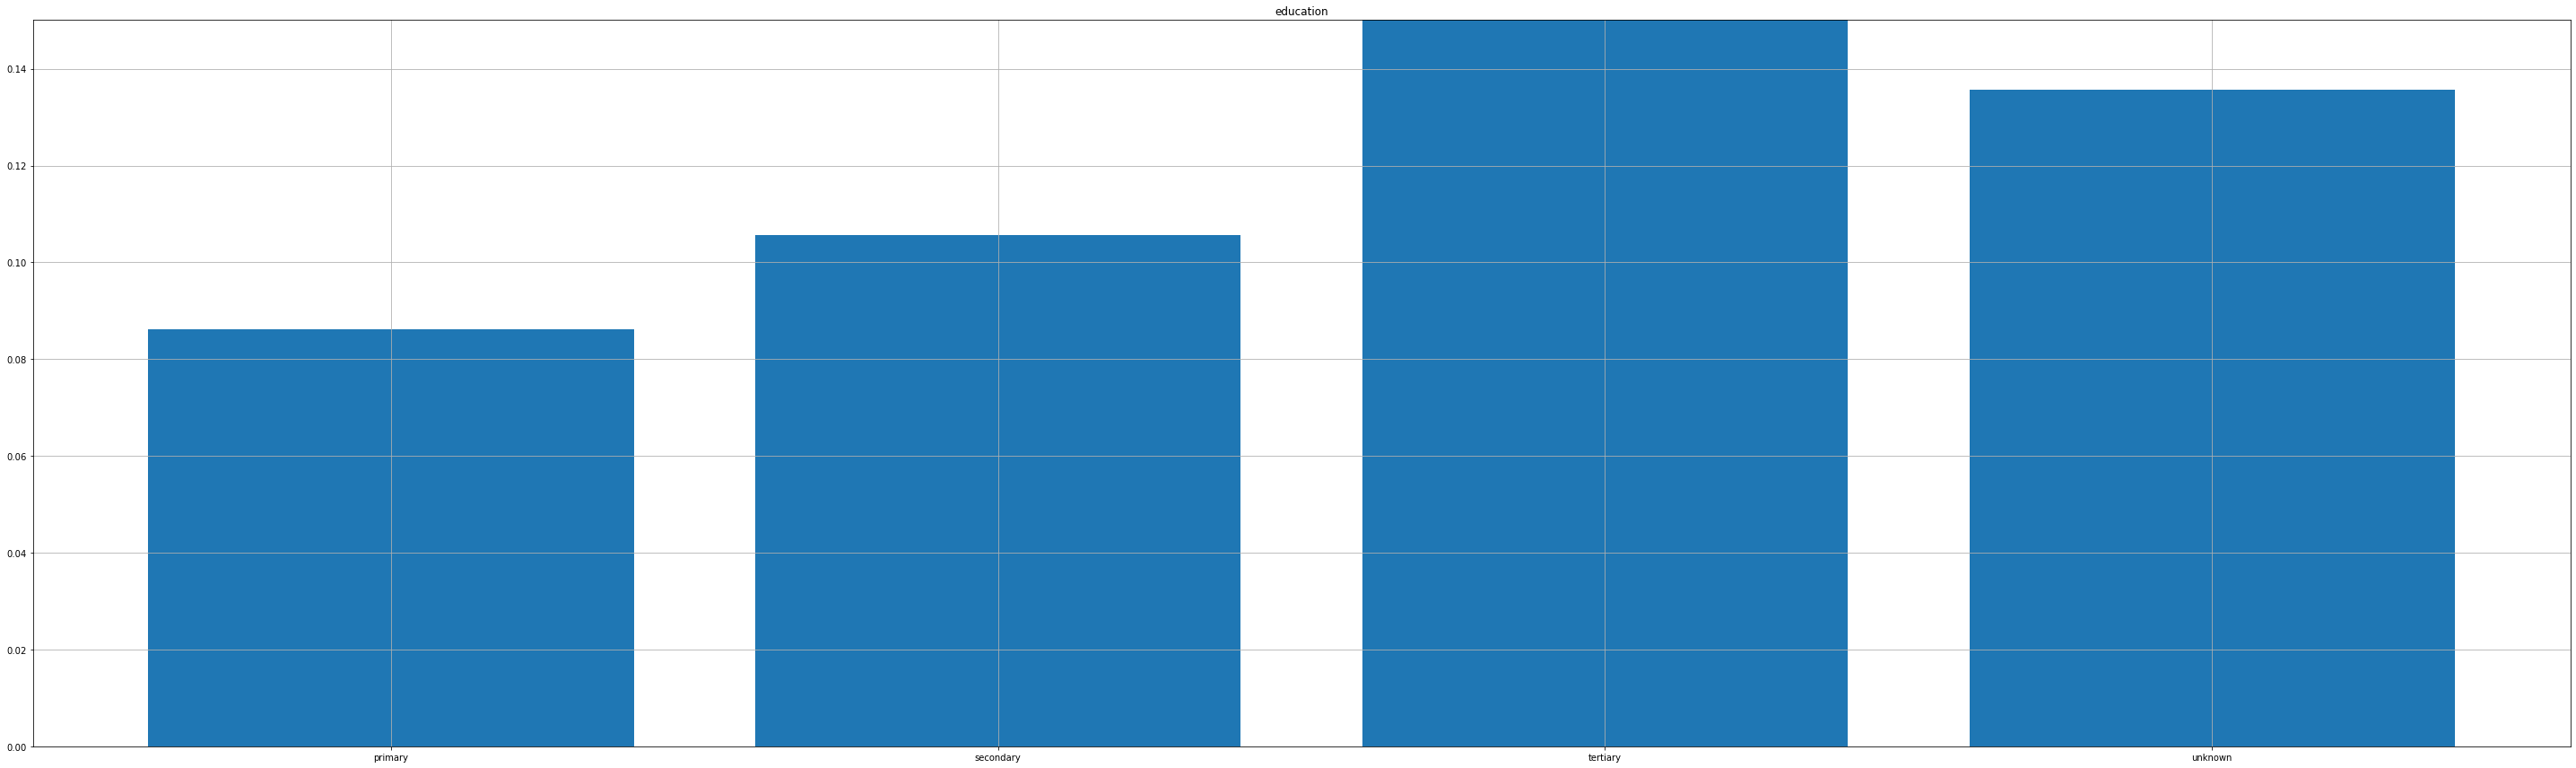

----------------------------------------------------------------------------------
                y
default          
no       0.117961
yes      0.063804

                              +---------+
                              |  default  |
                              +---------+
['no' 'yes']


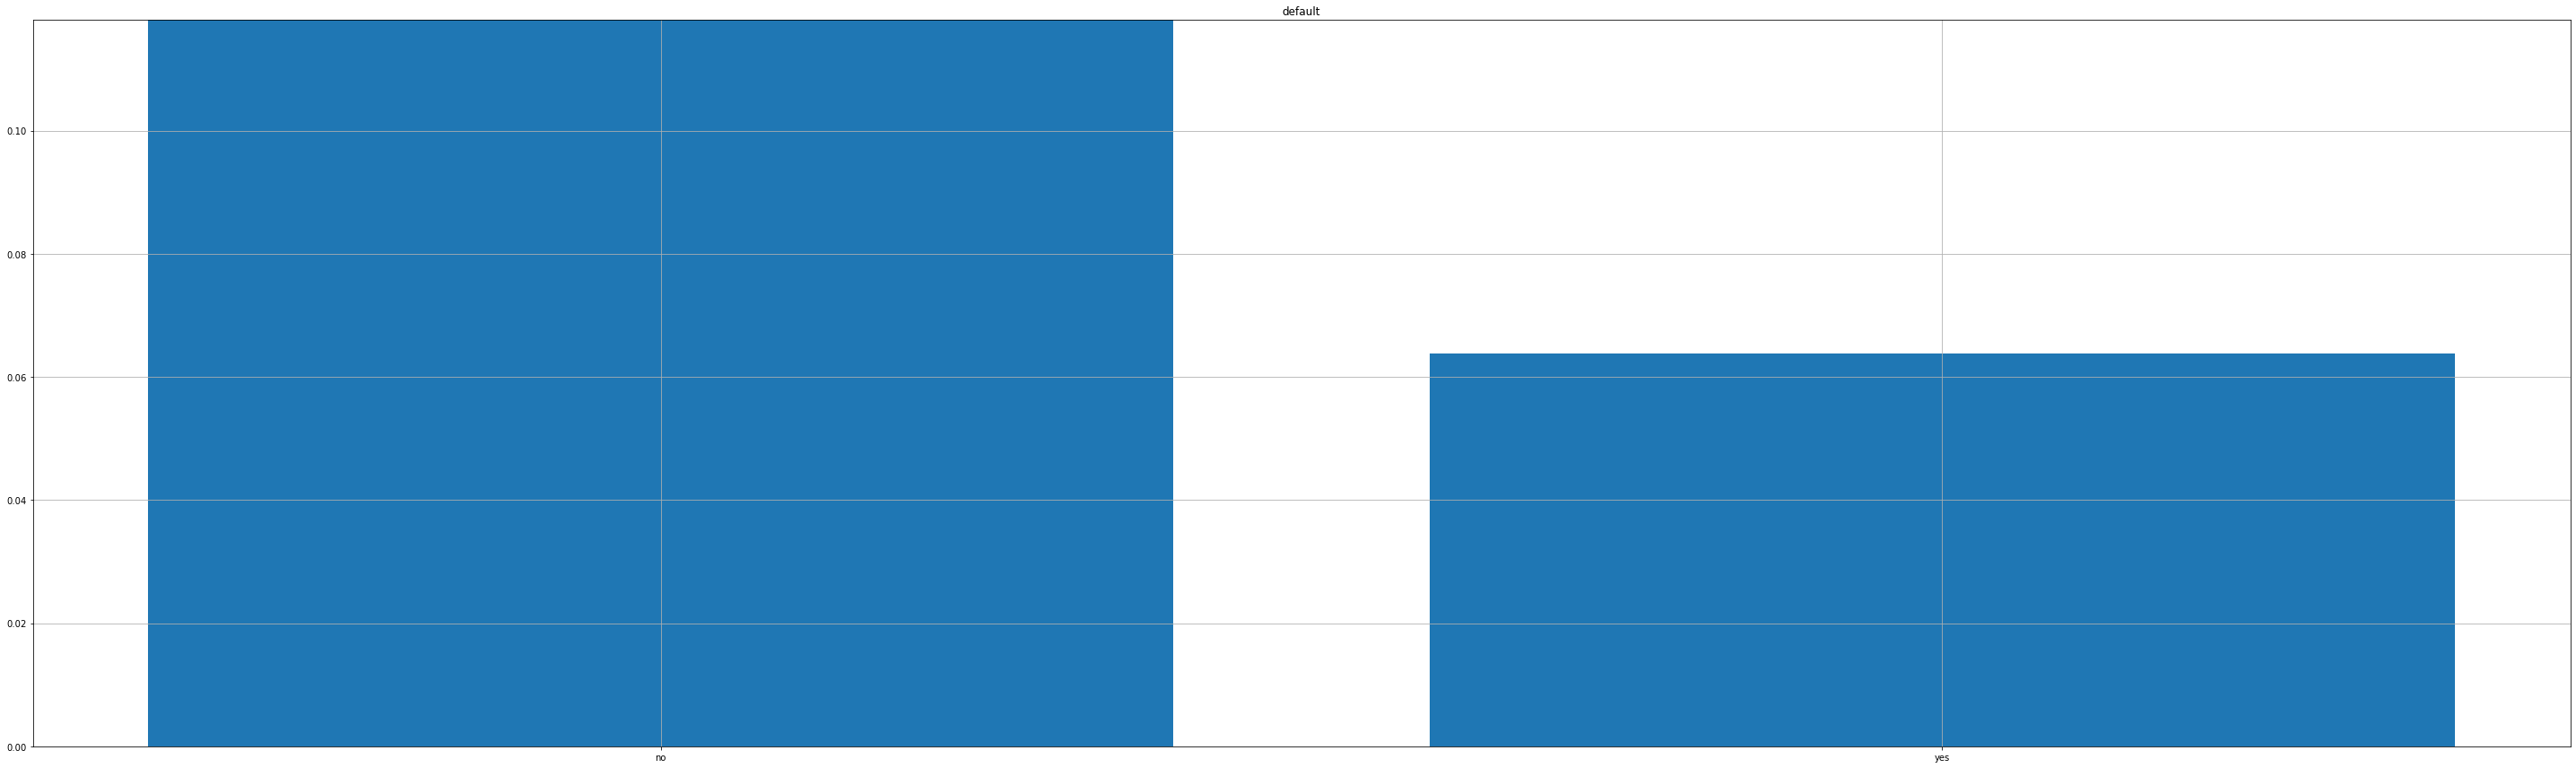

----------------------------------------------------------------------------------
         balance    y
balance              
-8019      -8019  0.0
-6847      -6847  0.0
-4057      -4057  0.0
-3372      -3372  0.0
-3313      -3313  0.0
...          ...  ...
 66721     66721  0.0
 71188     71188  0.0
 81204     81204  1.0
 98417     98417  0.0
 102127   102127  0.0

[7168 rows x 2 columns]

                              +---------+
                              |  balance  |
                              +---------+


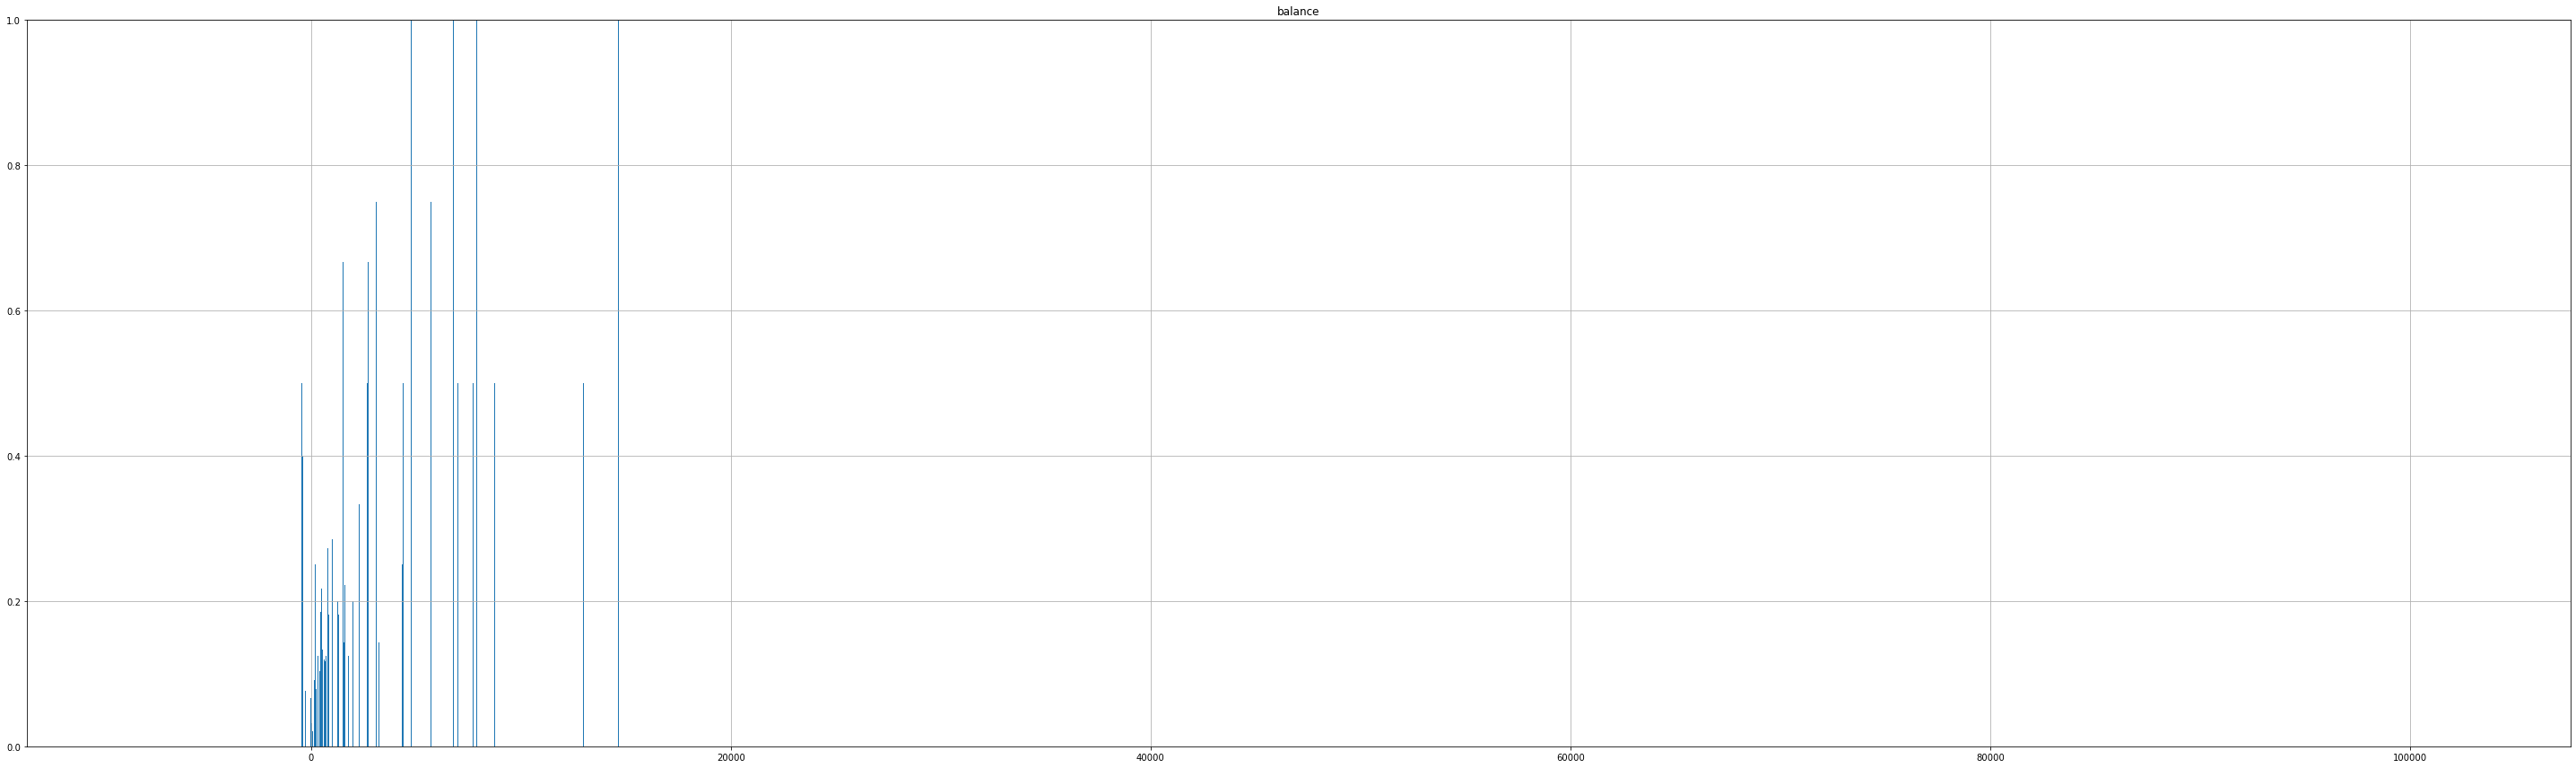

----------------------------------------------------------------------------------
                y
housing          
no       0.167024
yes      0.077000

                              +---------+
                              |  housing  |
                              +---------+
['no' 'yes']


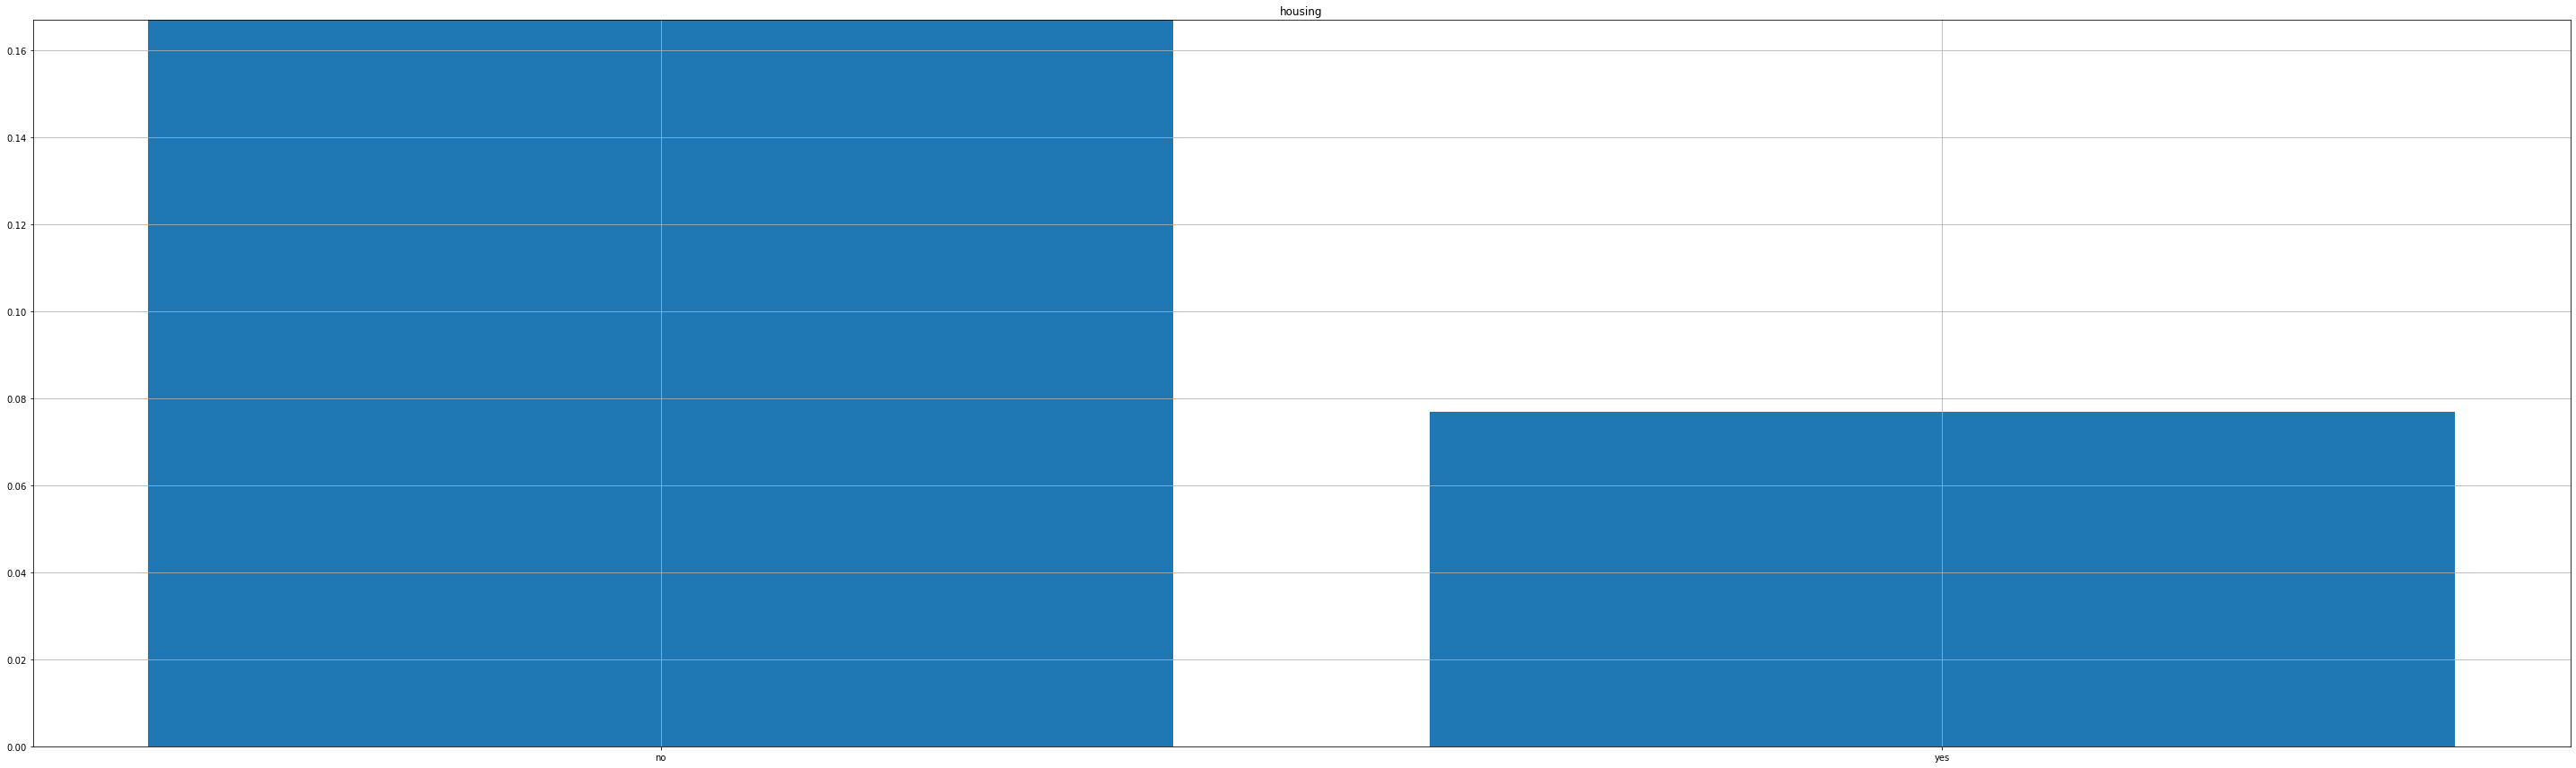

----------------------------------------------------------------------------------
             y
loan          
no    0.126557
yes   0.066814

                              +---------+
                              |  loan  |
                              +---------+
['no' 'yes']


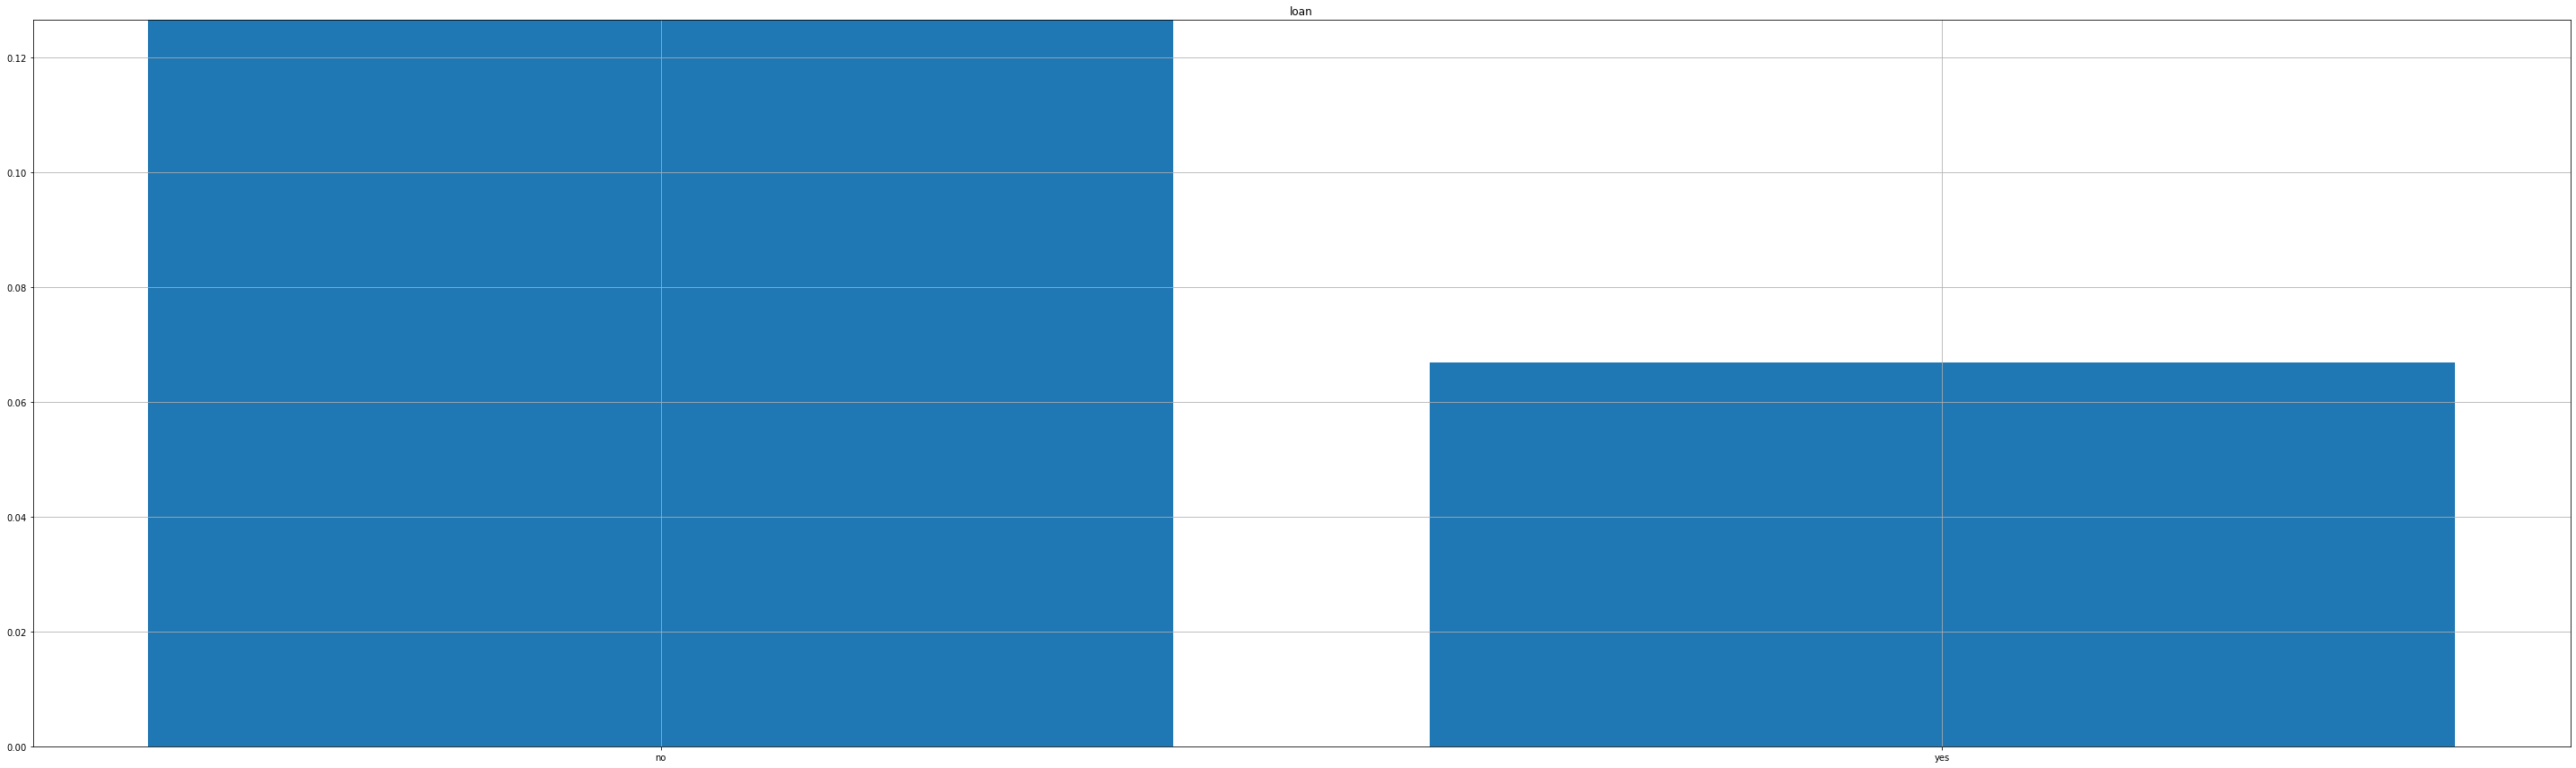

----------------------------------------------------------------------------------
                  y
contact            
cellular   0.149189
telephone  0.134205
unknown    0.040707

                              +---------+
                              |  contact  |
                              +---------+
['cellular' 'telephone' 'unknown']


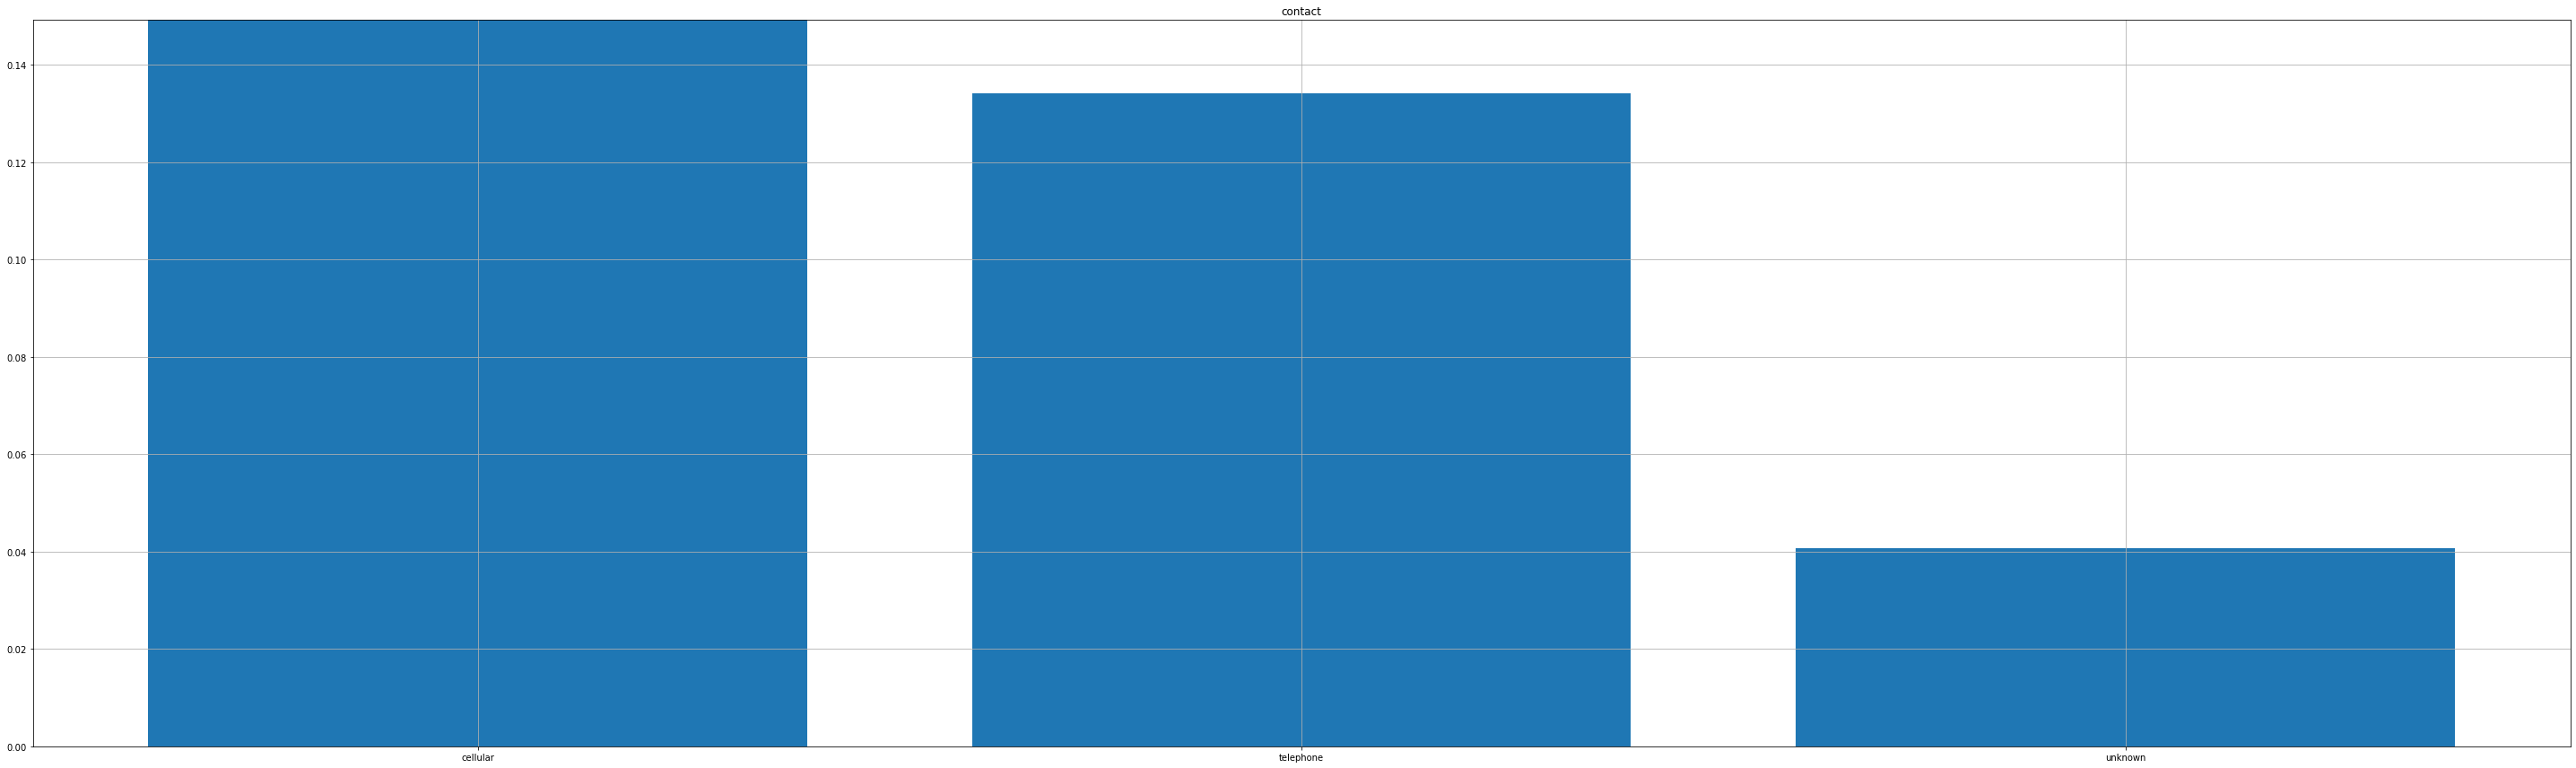

----------------------------------------------------------------------------------
     day         y
day               
1      1  0.279503
2      2  0.140758
3      3  0.164968
4      4  0.159170
5      5  0.112565
6      6  0.093685
7      7  0.086406
8      8  0.109121
9      9  0.114670
10    10  0.230916
11    11  0.122380
12    12  0.152215
13    13  0.152050
14    14  0.113636
15    15  0.139753
16    16  0.135689
17    17  0.090768
18    18  0.098787
19    19  0.069437
20    20  0.069767
21    21  0.099210
22    22  0.170166
23    23  0.134185
24    24  0.138702
25    25  0.158333
26    26  0.112077
27    27  0.133809
28    28  0.078142
29    29  0.073926
30    30  0.173052
31    31  0.071540

                              +---------+
                              |  day  |
                              +---------+


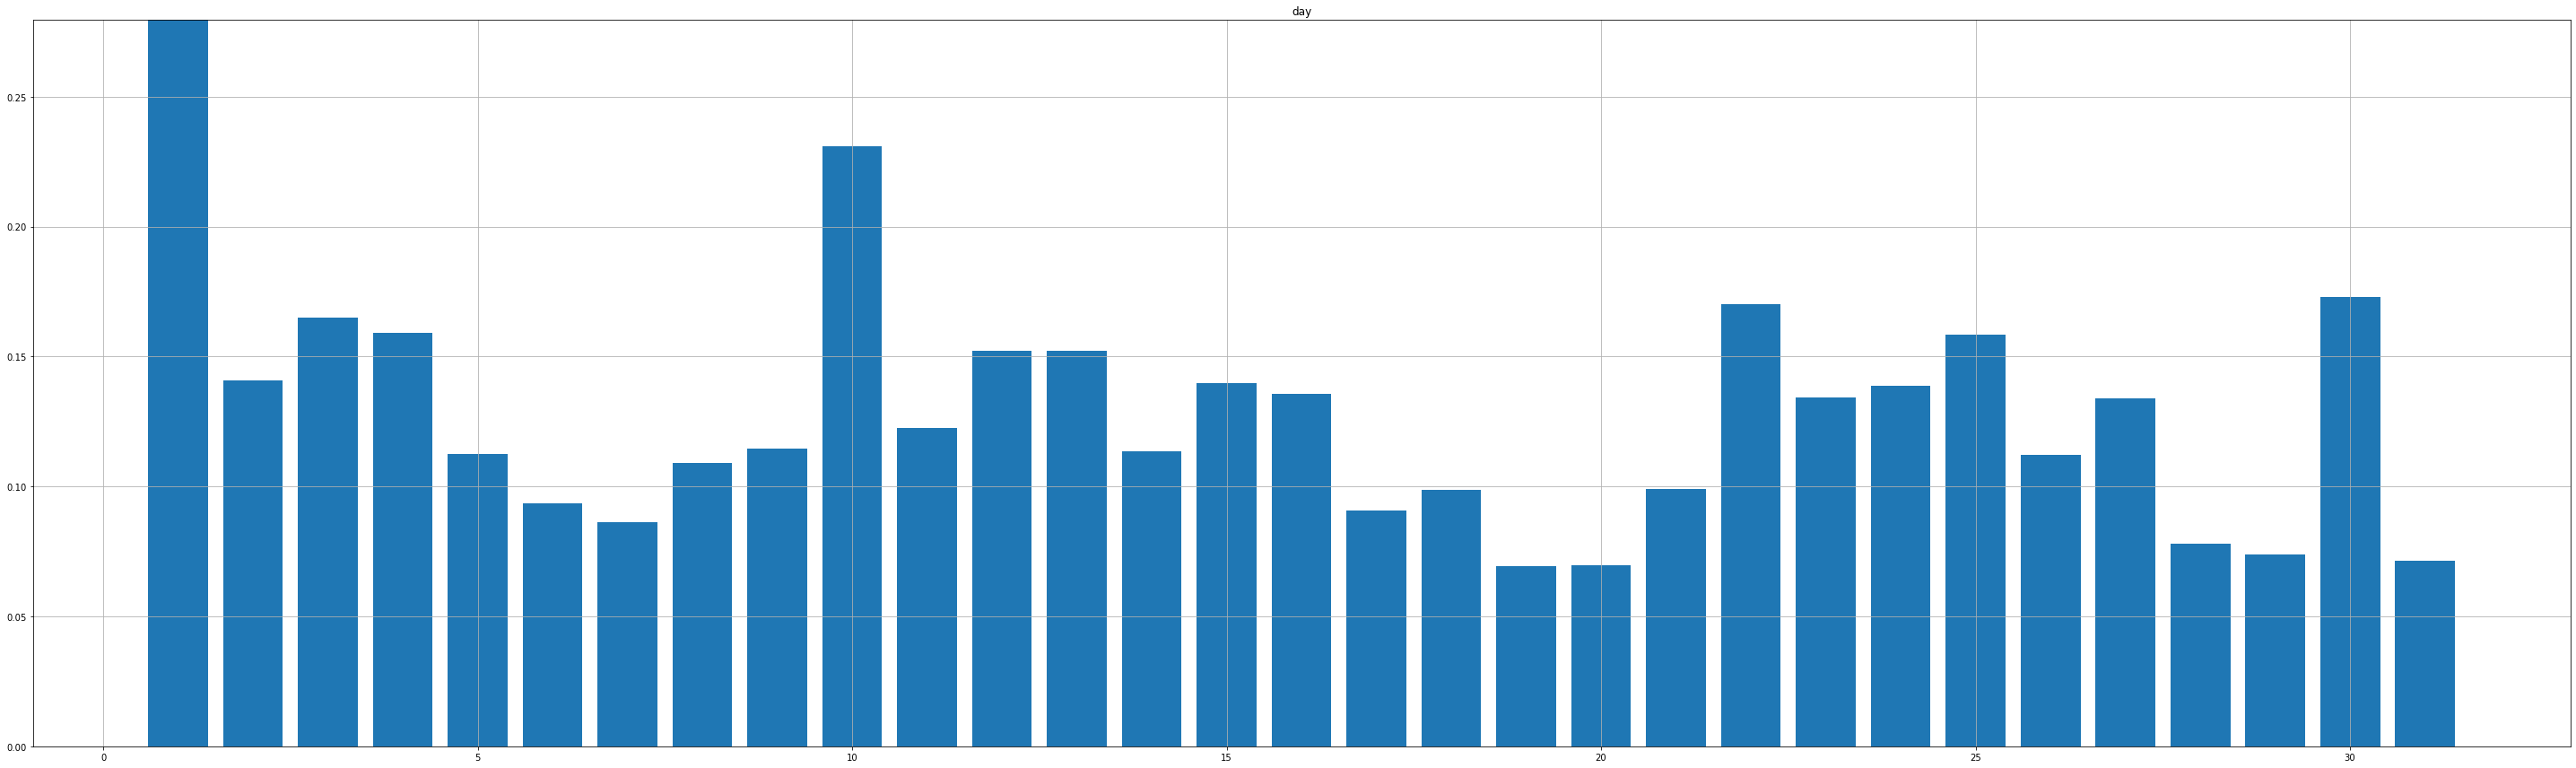

----------------------------------------------------------------------------------
              y
month          
apr    0.196794
aug    0.110133
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090935
jun    0.102228
mar    0.519916
may    0.067195
nov    0.101511
oct    0.437669
sep    0.464594

                              +---------+
                              |  month  |
                              +---------+
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


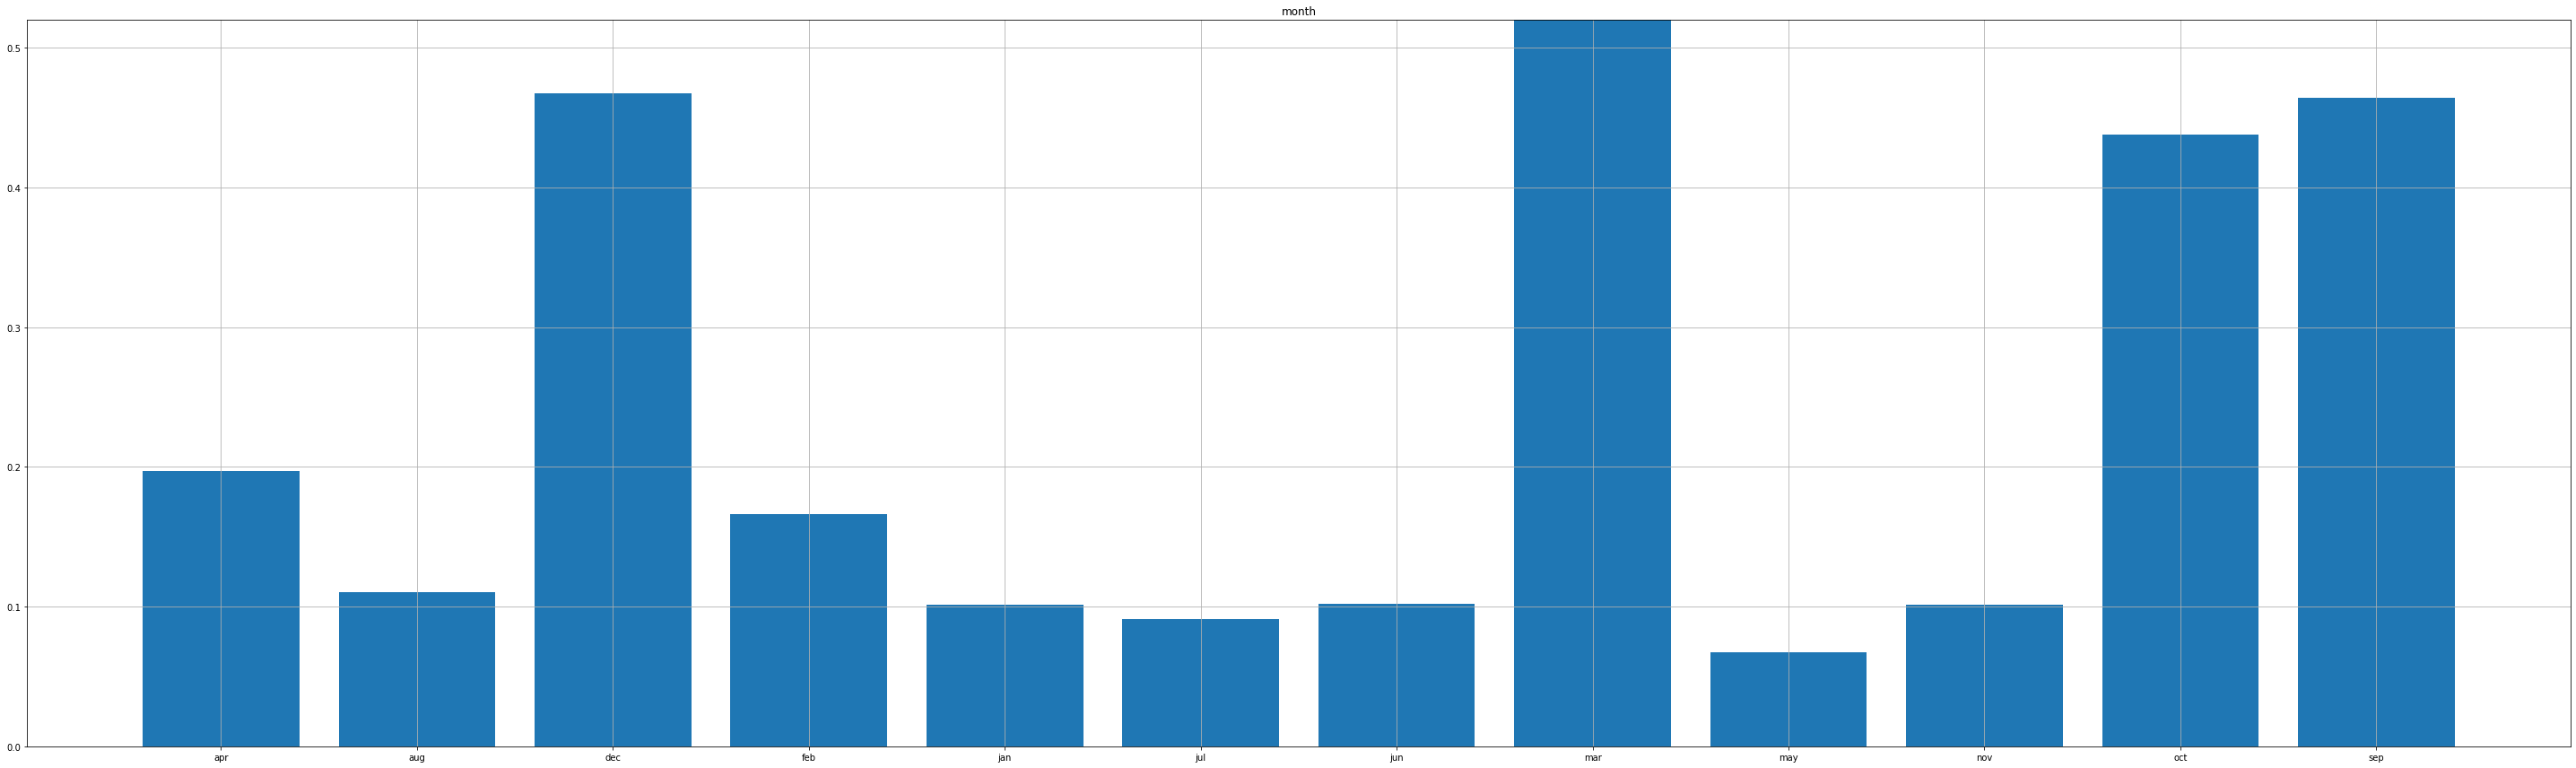

----------------------------------------------------------------------------------
          duration    y
duration               
0                0  0.0
1                1  0.0
2                2  0.0
3                3  0.0
4                4  0.0
...            ...  ...
3366          3366  0.0
3422          3422  0.0
3785          3785  0.0
3881          3881  1.0
4918          4918  0.0

[1573 rows x 2 columns]

                              +---------+
                              |  duration  |
                              +---------+


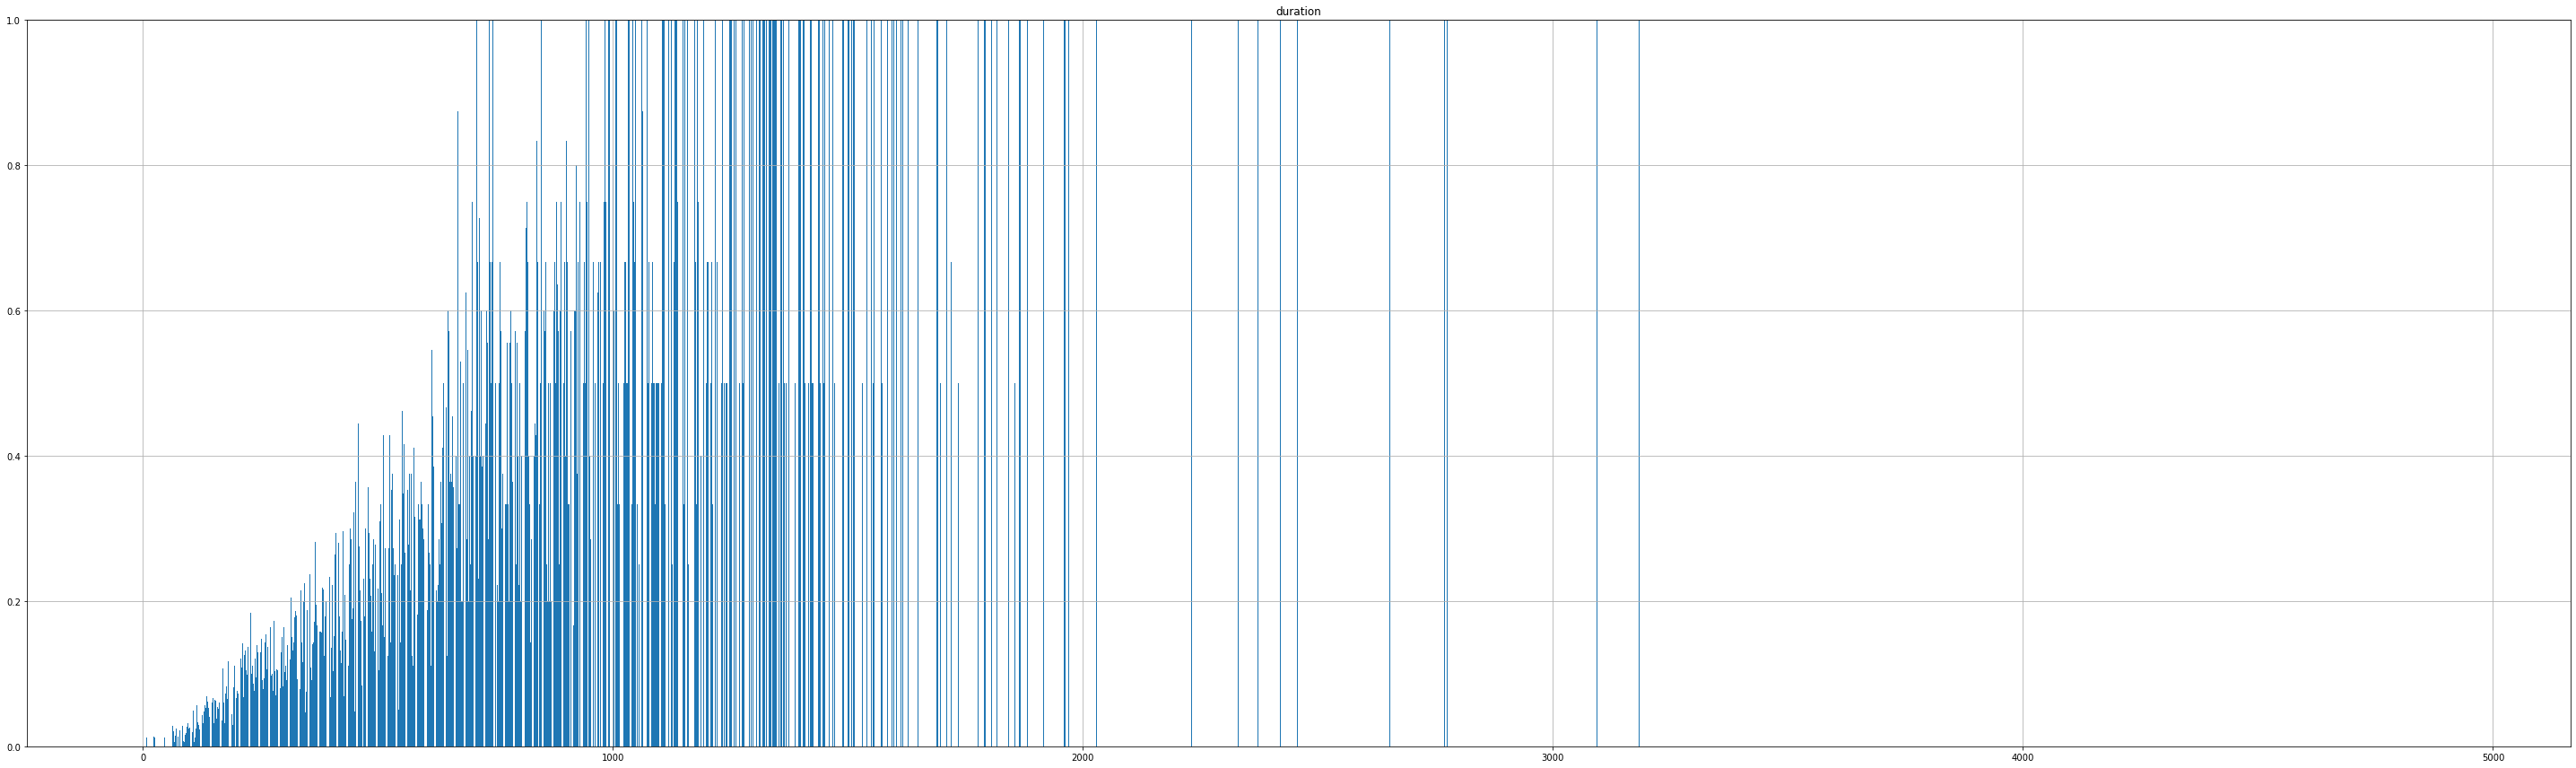

----------------------------------------------------------------------------------
          campaign         y
campaign                    
1                1  0.145976
2                2  0.112035
3                3  0.111936
4                4  0.090006
5                5  0.078798
6                6  0.071263
7                7  0.063946
8                8  0.059259
9                9  0.064220
10              10  0.052632
11              11  0.079602
12              12  0.025806
13              13  0.045113
14              14  0.043011
15              15  0.047619
16              16  0.025316
17              17  0.086957
18              18  0.000000
19              19  0.000000
20              20  0.023256
21              21  0.028571
22              22  0.000000
23              23  0.000000
24              24  0.050000
25              25  0.000000
26              26  0.000000
27              27  0.000000
28              28  0.000000
29              29  0.062500
30              30

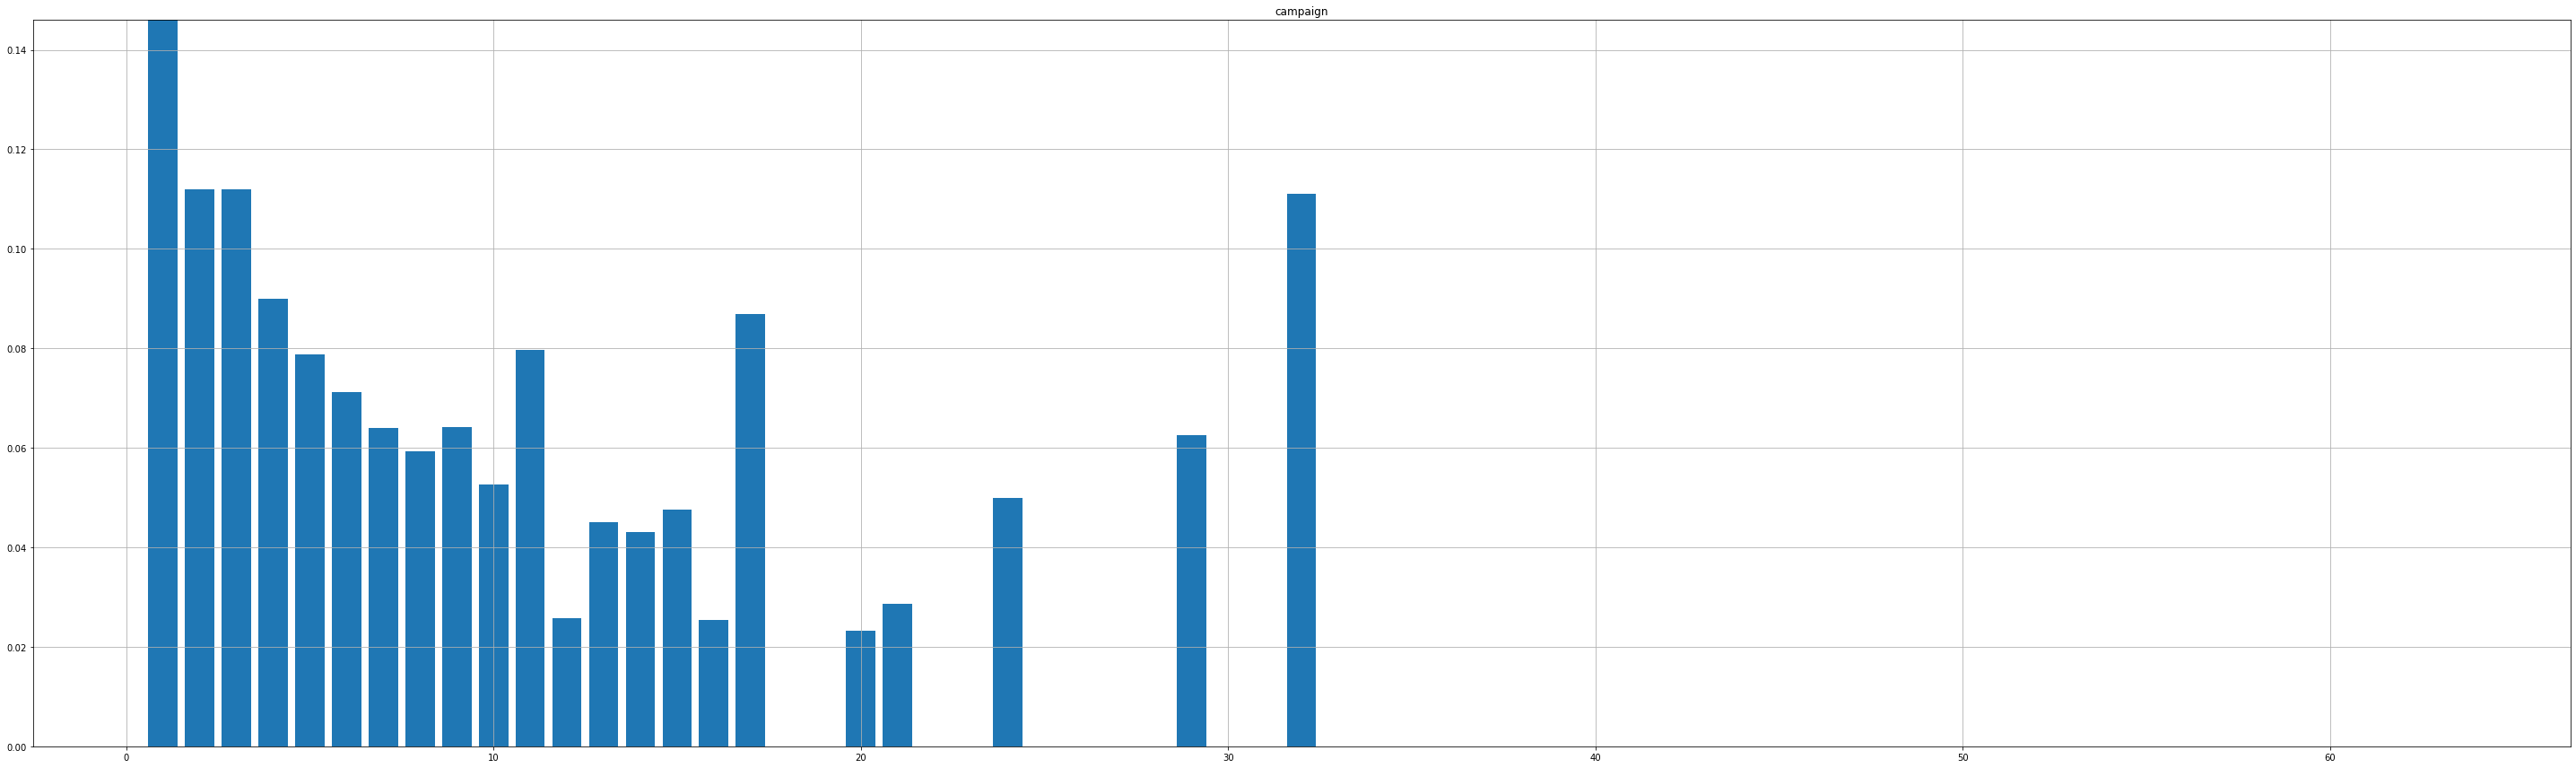

----------------------------------------------------------------------------------
       pdays         y
pdays                 
-1        -1  0.091573
 1         1  0.400000
 2         2  0.054054
 3         3  0.000000
 4         4  0.500000
...      ...       ...
 838     838  0.000000
 842     842  1.000000
 850     850  0.000000
 854     854  1.000000
 871     871  0.000000

[559 rows x 2 columns]

                              +---------+
                              |  pdays  |
                              +---------+


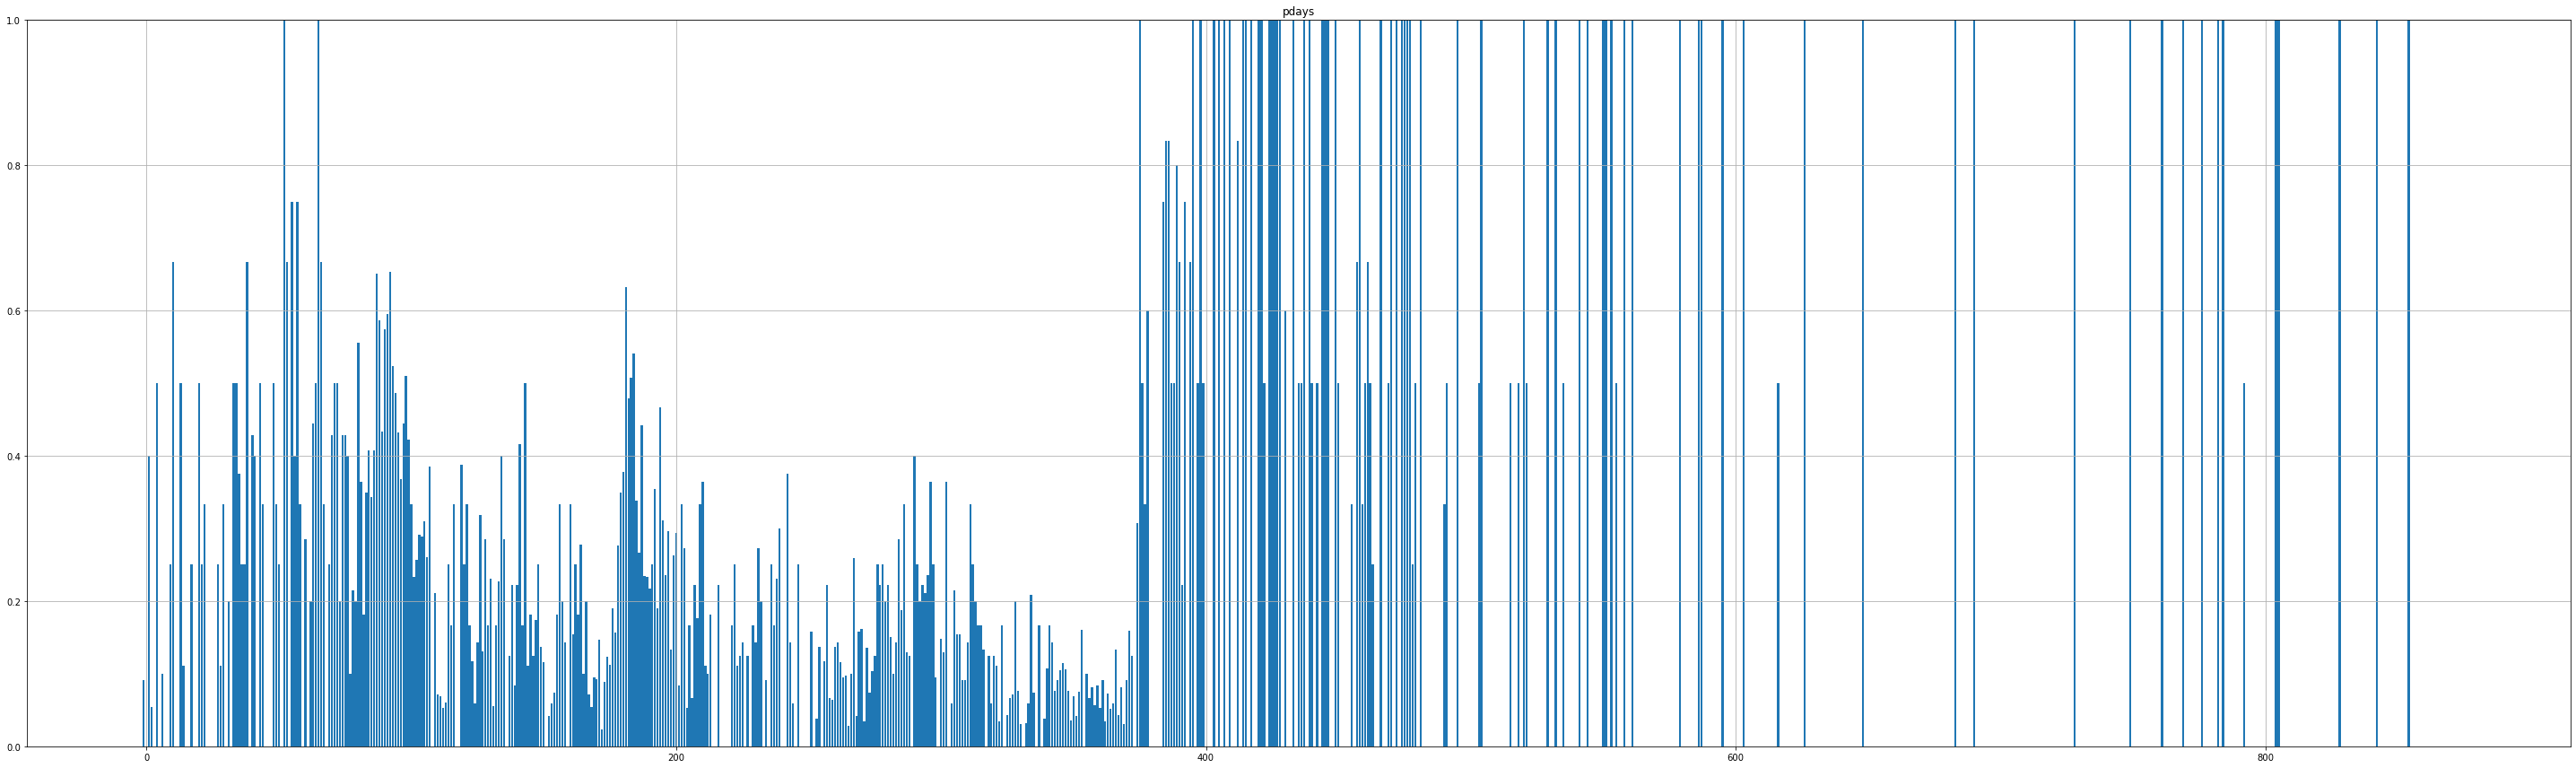

----------------------------------------------------------------------------------
          previous         y
previous                    
0                0  0.091573
1                1  0.210317
2                2  0.216524
3                3  0.257443
4                4  0.239496
5                5  0.263617
6                6  0.299639
7                7  0.263415
8                8  0.302326
9                9  0.260870
10              10  0.388060
11              11  0.230769
12              12  0.227273
13              13  0.236842
14              14  0.263158
15              15  0.050000
16              16  0.000000
17              17  0.200000
18              18  0.000000
19              19  0.181818
20              20  0.125000
21              21  0.250000
22              22  0.166667
23              23  0.125000
24              24  0.000000
25              25  0.000000
26              26  0.500000
27              27  0.000000
28              28  0.000000
29              29

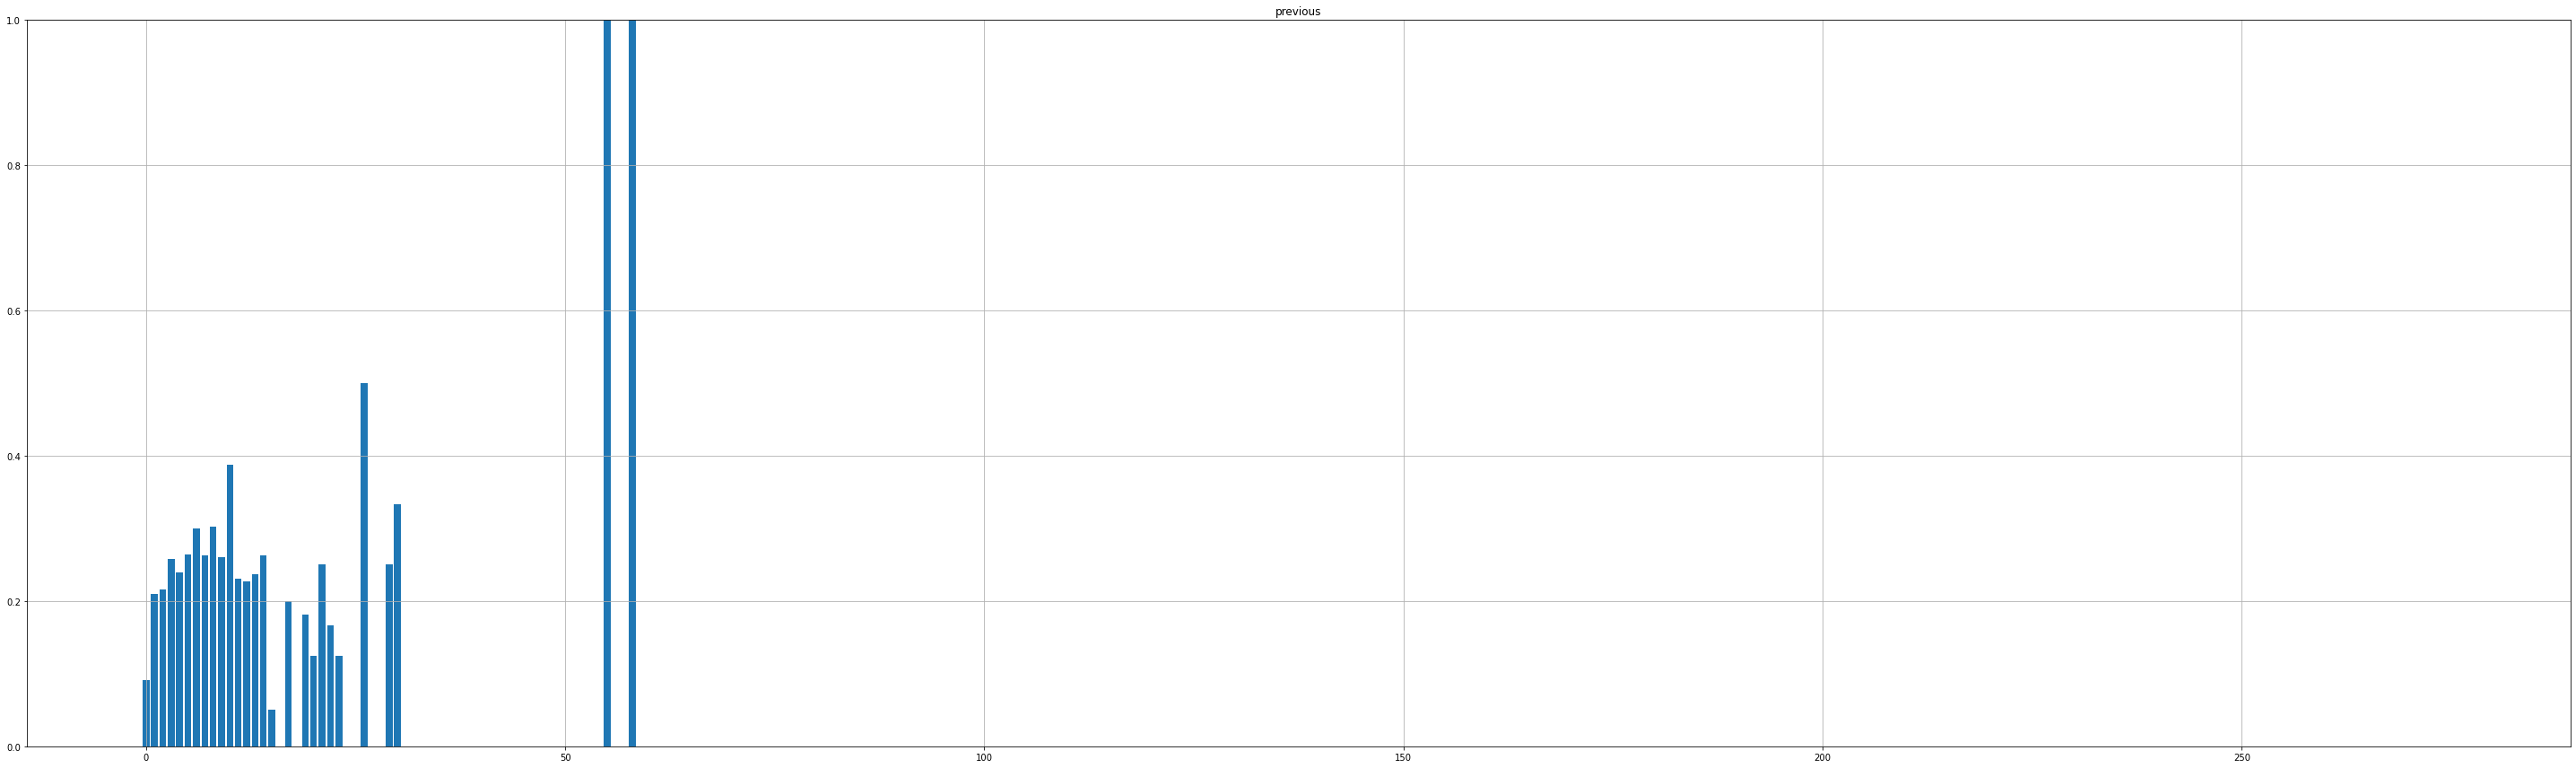

----------------------------------------------------------------------------------
                 y
poutcome          
failure   0.126097
other     0.166848
success   0.647253
unknown   0.091615

                              +---------+
                              |  poutcome  |
                              +---------+
['failure' 'other' 'success' 'unknown']


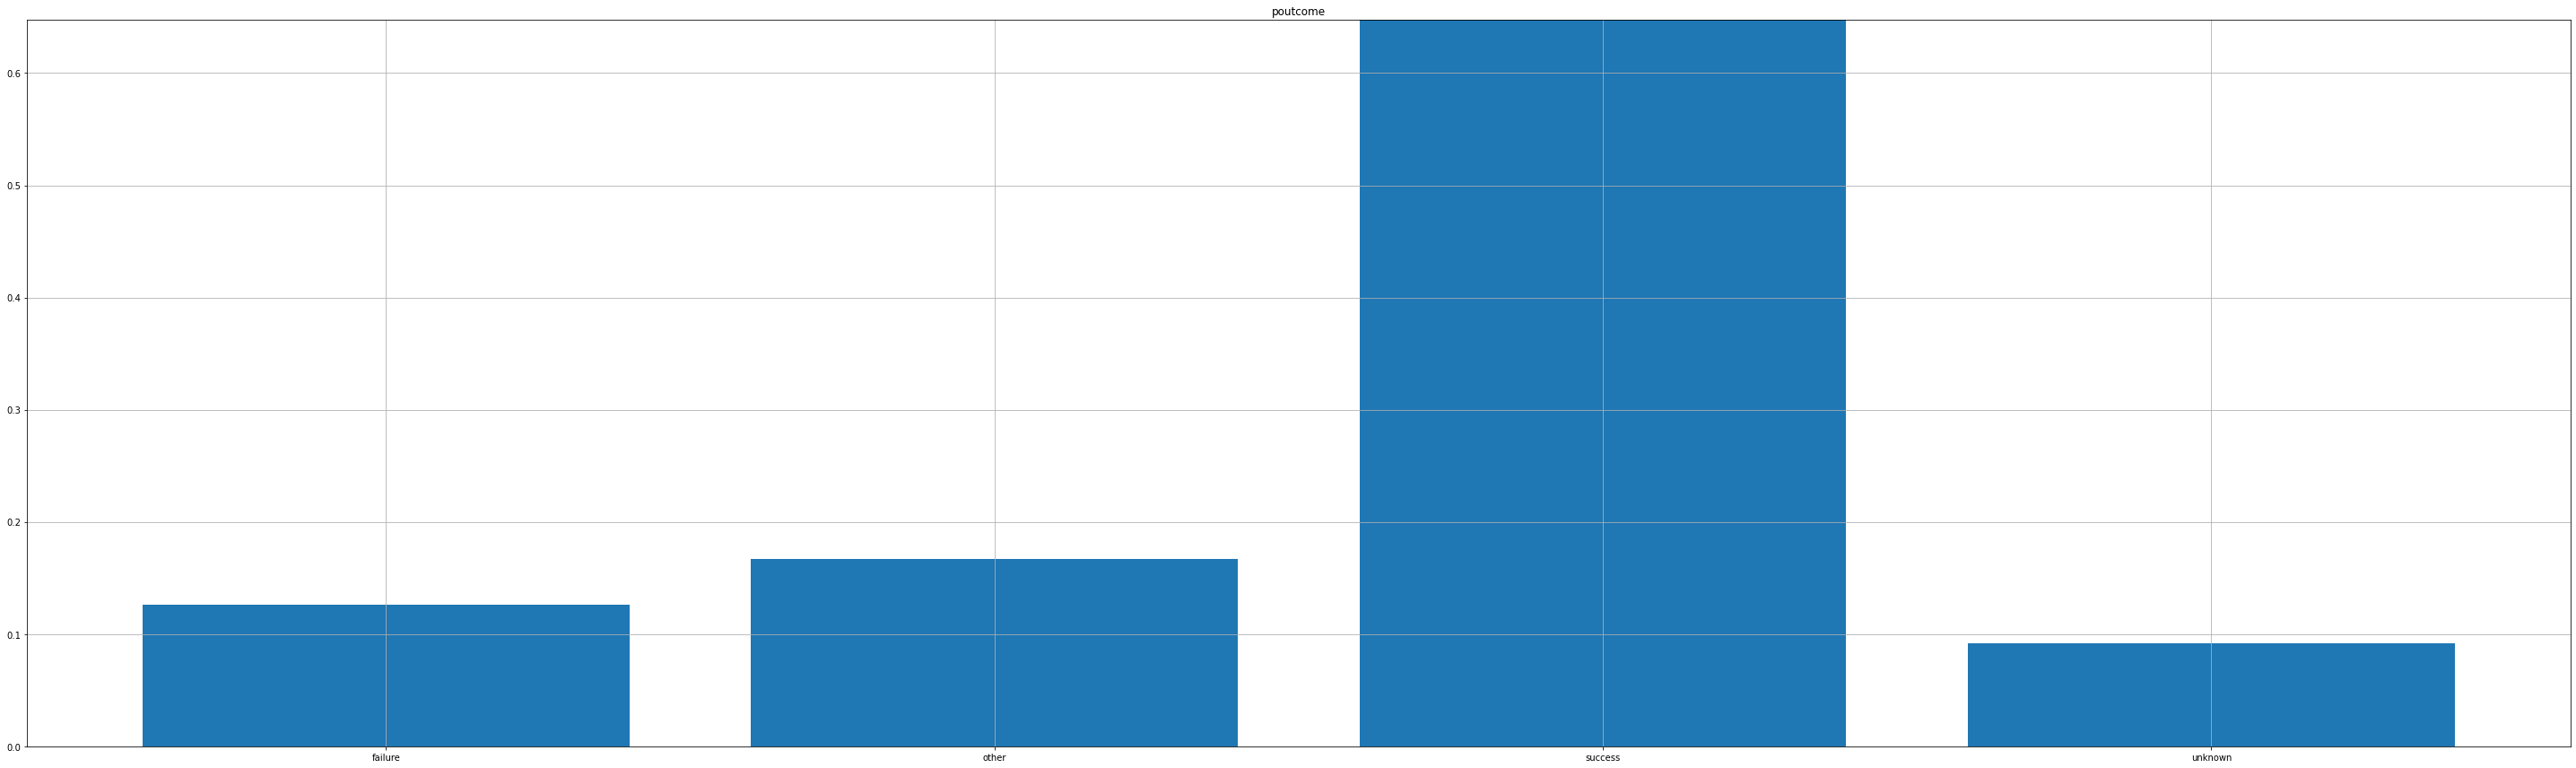

In [12]:
# printing the bar
def plt_bar(x, y, grid=True, hight=15, weight=40):        
    plt.figure(figsize=(weight, hight))
    plt.grid(grid)
    plt.bar(x, y)
    plt.ylim(0, y.max())
    plt.title('bar')
    plt.tight_layout(h_pad = -0.15, w_pad = -0.2)
    plt.show()

# printing the bar of probability to getting y==1 for every unique value in every columns
#print(pd_data.columns)    
#print(np.sort(pd_data['job'].unique()))
#print(pd_data[['job', 'y']].groupby(pd_data['job'], dropna=False).mean())
for column in pd_data.columns:
    # filtering by only numeric columns
    if column == 'y':
        continue
    else:
        # grouping the plot
        groupping = pd_data[[column, 'y']].groupby(pd_data[column], as_index=True).mean()
        print('----------------------------------------------------------------------------------')
        print(groupping)
        # printing the plot
  #      print(groupping[column])
        print('')
        print('                              +---------+')
        print('                              | ', column, ' |')
        print('                              +---------+')
        plt.figure(figsize=(40, 12))
        plt.grid(True)
        # solving the error with categorical values in bar
        if column in categorical_columns:
            print(np.sort(pd_data[column].unique()))
            plt.bar(np.sort(pd_data[column].unique()), groupping['y'])
        else:
            plt.bar(groupping[column], groupping['y'])
        plt.ylim(0, groupping['y'].max())
        plt.title(column)
        plt.tight_layout(h_pad = -0.15, w_pad = -0.2)
        plt.show()

In [13]:
# printing the count of unknown values 
for column in categorical_columns:
    # filtering by only numeric columns
    if column == 'y':
        continue
    else:
        unknown_count = pd_data[column][(pd_data[column] == 'unknown')].count()
        print(column,':', unknown_count, '|', pd_data.shape[0])
        

job : 288 | 45211
marital : 0 | 45211
education : 1857 | 45211
default : 0 | 45211
housing : 0 | 45211
loan : 0 | 45211
contact : 13020 | 45211
month : 0 | 45211
poutcome : 36959 | 45211


job, education, cintact and poutcome have a NaN values as a unknown.

The poutcome has a big difference in probability in getting y==1 between values, that's why poutcome_unknown values will be as different value and column in pd_dummy. Also contact will be a different value.

Job_unknown values can be filled to other values for any random distribution. 

In [14]:
pd_data[['month','day', 'y']].groupby(['month','day']).mean()



y
month day          
apr   1    0.276596
      2    0.120000
      3    0.080645
      5    0.631579
      6    0.208333
...             ...
sep   26   0.000000
      27   0.300000
      28   0.500000
      29   0.428571
      30   0.300000

[318 rows x 1 columns]

In [15]:
pd_data['month'] = pd_data['month'].replace(['may', 'jun', 'jul', 
                                             'aug', 'oct', 'nov', 
                                             'dec', 'jan', 'feb', 
                                             'mar', 'apr', 'sep'], 
                                            [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9])
#print(pd_data['month'])
pd_data[['month','day', 'y']].groupby(['month','day']).mean()
#plt_bar(x, y, grid=True, hight=15, weight=40)

y
month day          
1     6    0.000000
      7    0.250000
      8    0.400000
      11   0.583333
      12   0.590909
...             ...
12    27   0.000000
      28   0.562500
      29   0.538462
      30   0.250000
      31   0.000000

[318 rows x 1 columns]

Looking at the day and month column

days all_count  count_y==1
0   |   2     |    0
1   |   4     |    1
2   |   5     |    2
3   |   12     |    7
4   |   22     |    13
5   |   18     |    9
6   |   23     |    13
7   |   14     |    7
8   |   15     |    6
9   |   1     |    0
10   |   18     |    6
11   |   11     |    3
12   |   22     |    11
13   |   434     |    31
14   |   554     |    21
15   |   248     |    12
16   |   9     |    3
17   |   517     |    38
18   |   344     |    42
19   |   463     |    45
20   |   442     |    33
21   |   241     |    16
22   |   22     |    10
23   |   212     |    27
24   |   39     |    22
25   |   47     |    30
26   |   30     |    21
27   |   19     |    10
28   |   22     |    16
29   |   15     |    9
30   |   29     |    20
31   |   36     |    25
32   |   18     |    10
33   |   1     |    0
34   |   15     |    4
35   |   18     |    12
36   |   23     |    8
37   |   15     |    8
38   |   36     |    15
39   |   36     |    17
40   |   2     |    0
41   |   48   

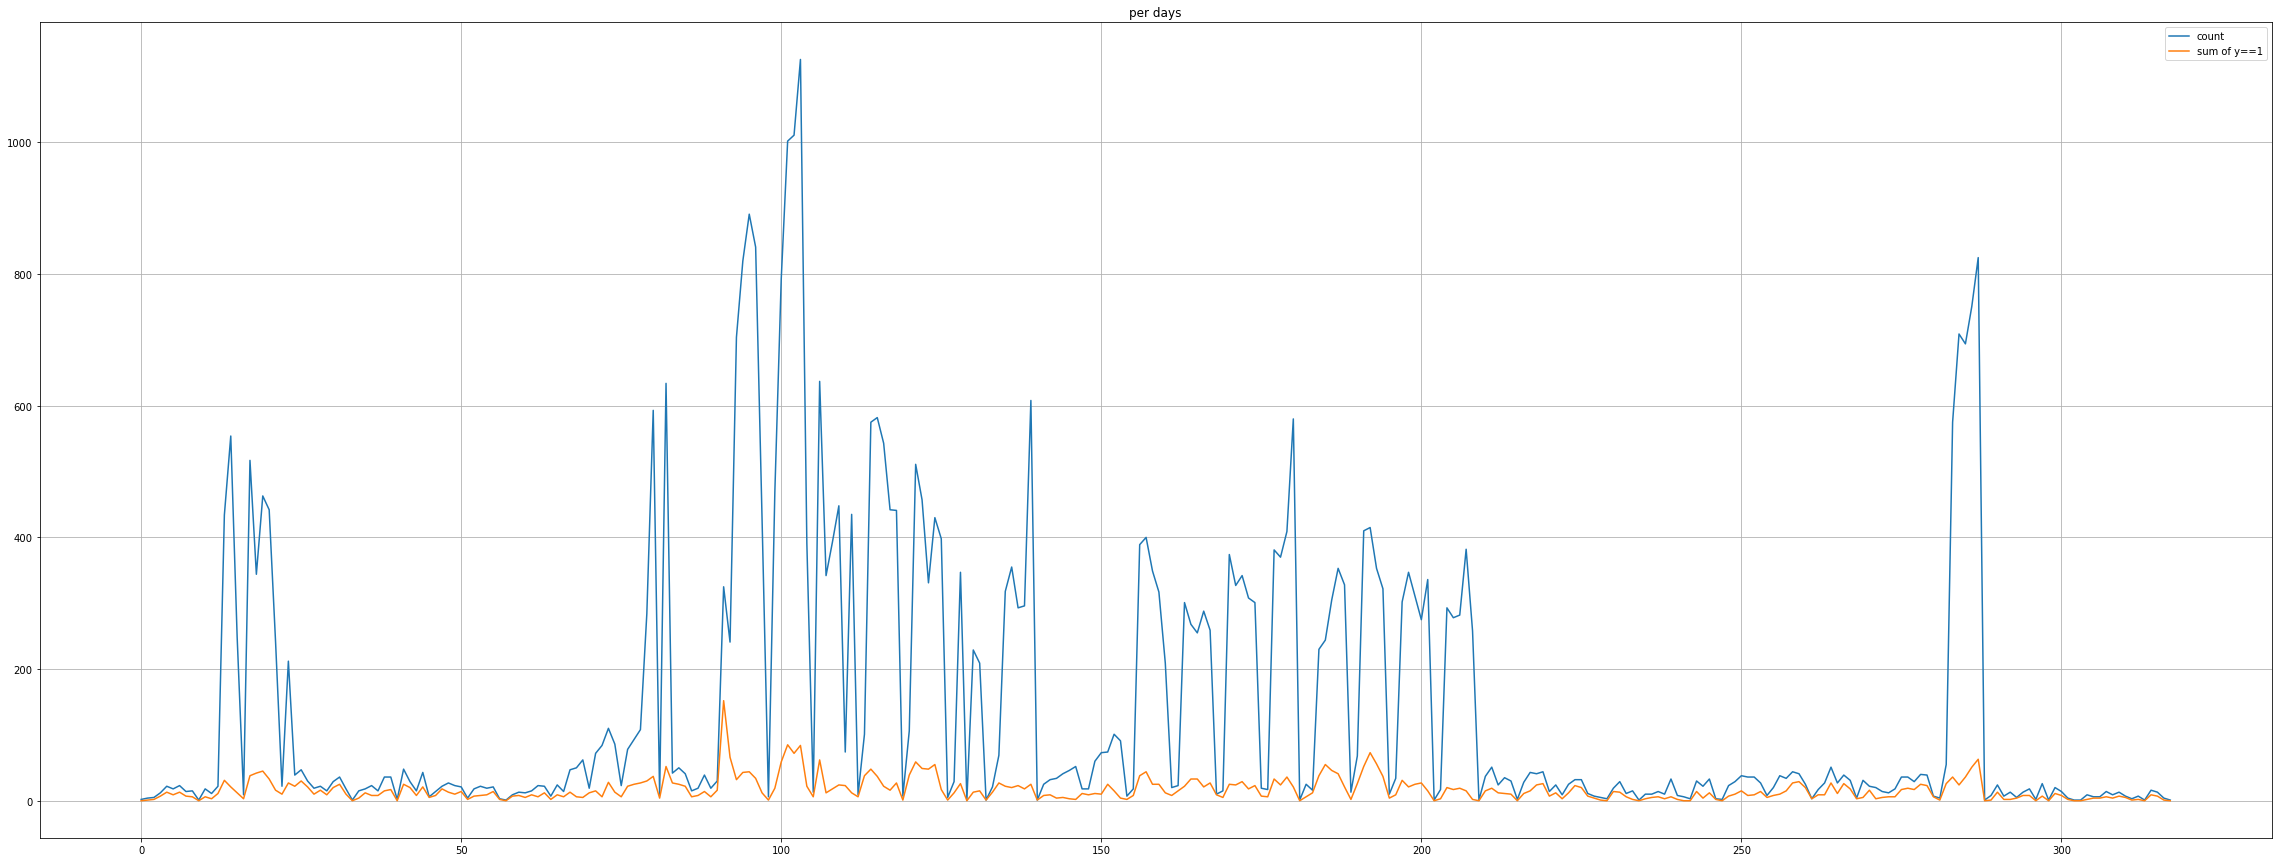

month
0   |   1403     |    142
1   |   2649     |    441
2   |   477     |    248
3   |   2932     |    577
4   |   13766     |    925
5   |   5341     |    546
6   |   6895     |    627
7   |   6247     |    688
8   |   579     |    269
9   |   738     |    323
10   |   3970     |    403
11   |   214     |    100


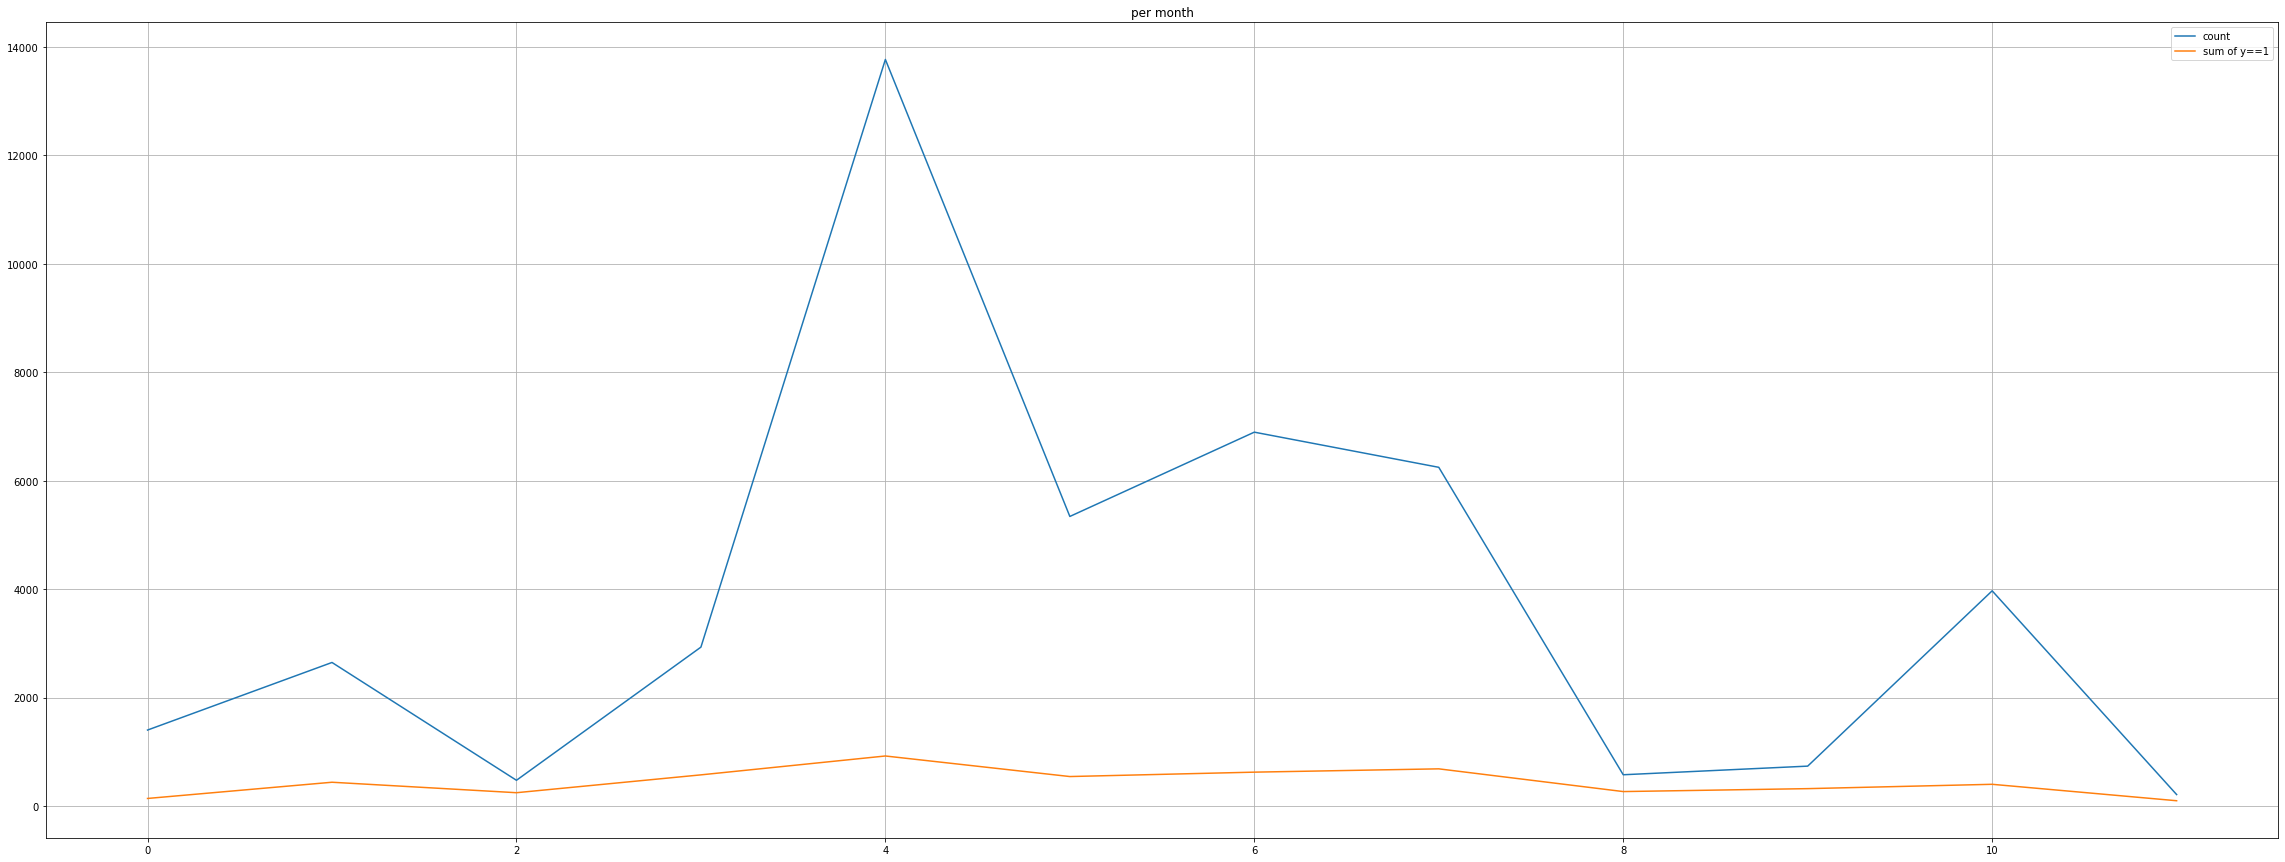

In [16]:
# function for printing the plot
def print_plot(x, y, need_z=False, z=0, 
              grid=True, hight=15, weight=40,
              need_legend=False, legend_y='', legend_z='', plot_name=''):
    # print the plot
    fig = plt.figure(figsize=(weight, hight))
    ax = fig.add_subplot(111)
    ax.plot(y)
    if need_z == True:
        ax.plot(z)
    ax.grid(grid)
    ax.set_title(plot_name)
    if need_legend == True:
        ax.legend((legend_y, legend_z), frameon=True)
    plt.show()

# grouping by days and month
time_series_days_count = pd_data[['month','day', 'y']].groupby(['month','day'],
                                                                 as_index=False).count()
time_series_month_count = pd_data[['month','y']].groupby(['month'], as_index=False).count()

time_series_days_sum = pd_data[['month','day', 'y']].groupby(['month','day'],
                                                                 as_index=False).sum()
time_series_month_sum = pd_data[['month','y']].groupby(['month'], as_index=False).sum()

# printing the plot and information about 
# per days
print('days', 'all_count ', 'count_y==1')
for i in range(time_series_days_count.shape[0]):
    print(i, '  |  ', time_series_days_count['y'][i], '    |   ', time_series_days_sum['y'][i])
print_plot(time_series_days_count.index, time_series_days_count['y'], 
           need_z=True, z=time_series_days_sum['y'], 
              grid=True, hight=15, weight=40,
           need_legend=True, legend_y='count', legend_z='sum of y==1', plot_name='per days')

# per month
print('month')
for i in range(time_series_month_count.shape[0]):
    print(i, '  |  ', time_series_month_count['y'][i], '    |   ', time_series_month_sum['y'][i])
print_plot(time_series_month_count.index, time_series_month_count['y'], 
           need_z=True, z=time_series_month_sum['y'], 
              grid=True, hight=15, weight=40,
           need_legend=True, legend_y='count', legend_z='sum of y==1', plot_name='per month')

Watch on probability

     month  day         y
0        1    6  0.000000
1        1    7  0.250000
2        1    8  0.400000
3        1   11  0.583333
4        1   12  0.590909
..     ...  ...       ...
313     12   27  0.000000
314     12   28  0.562500
315     12   29  0.538462
316     12   30  0.250000
317     12   31  0.000000

[318 rows x 3 columns]
1.0


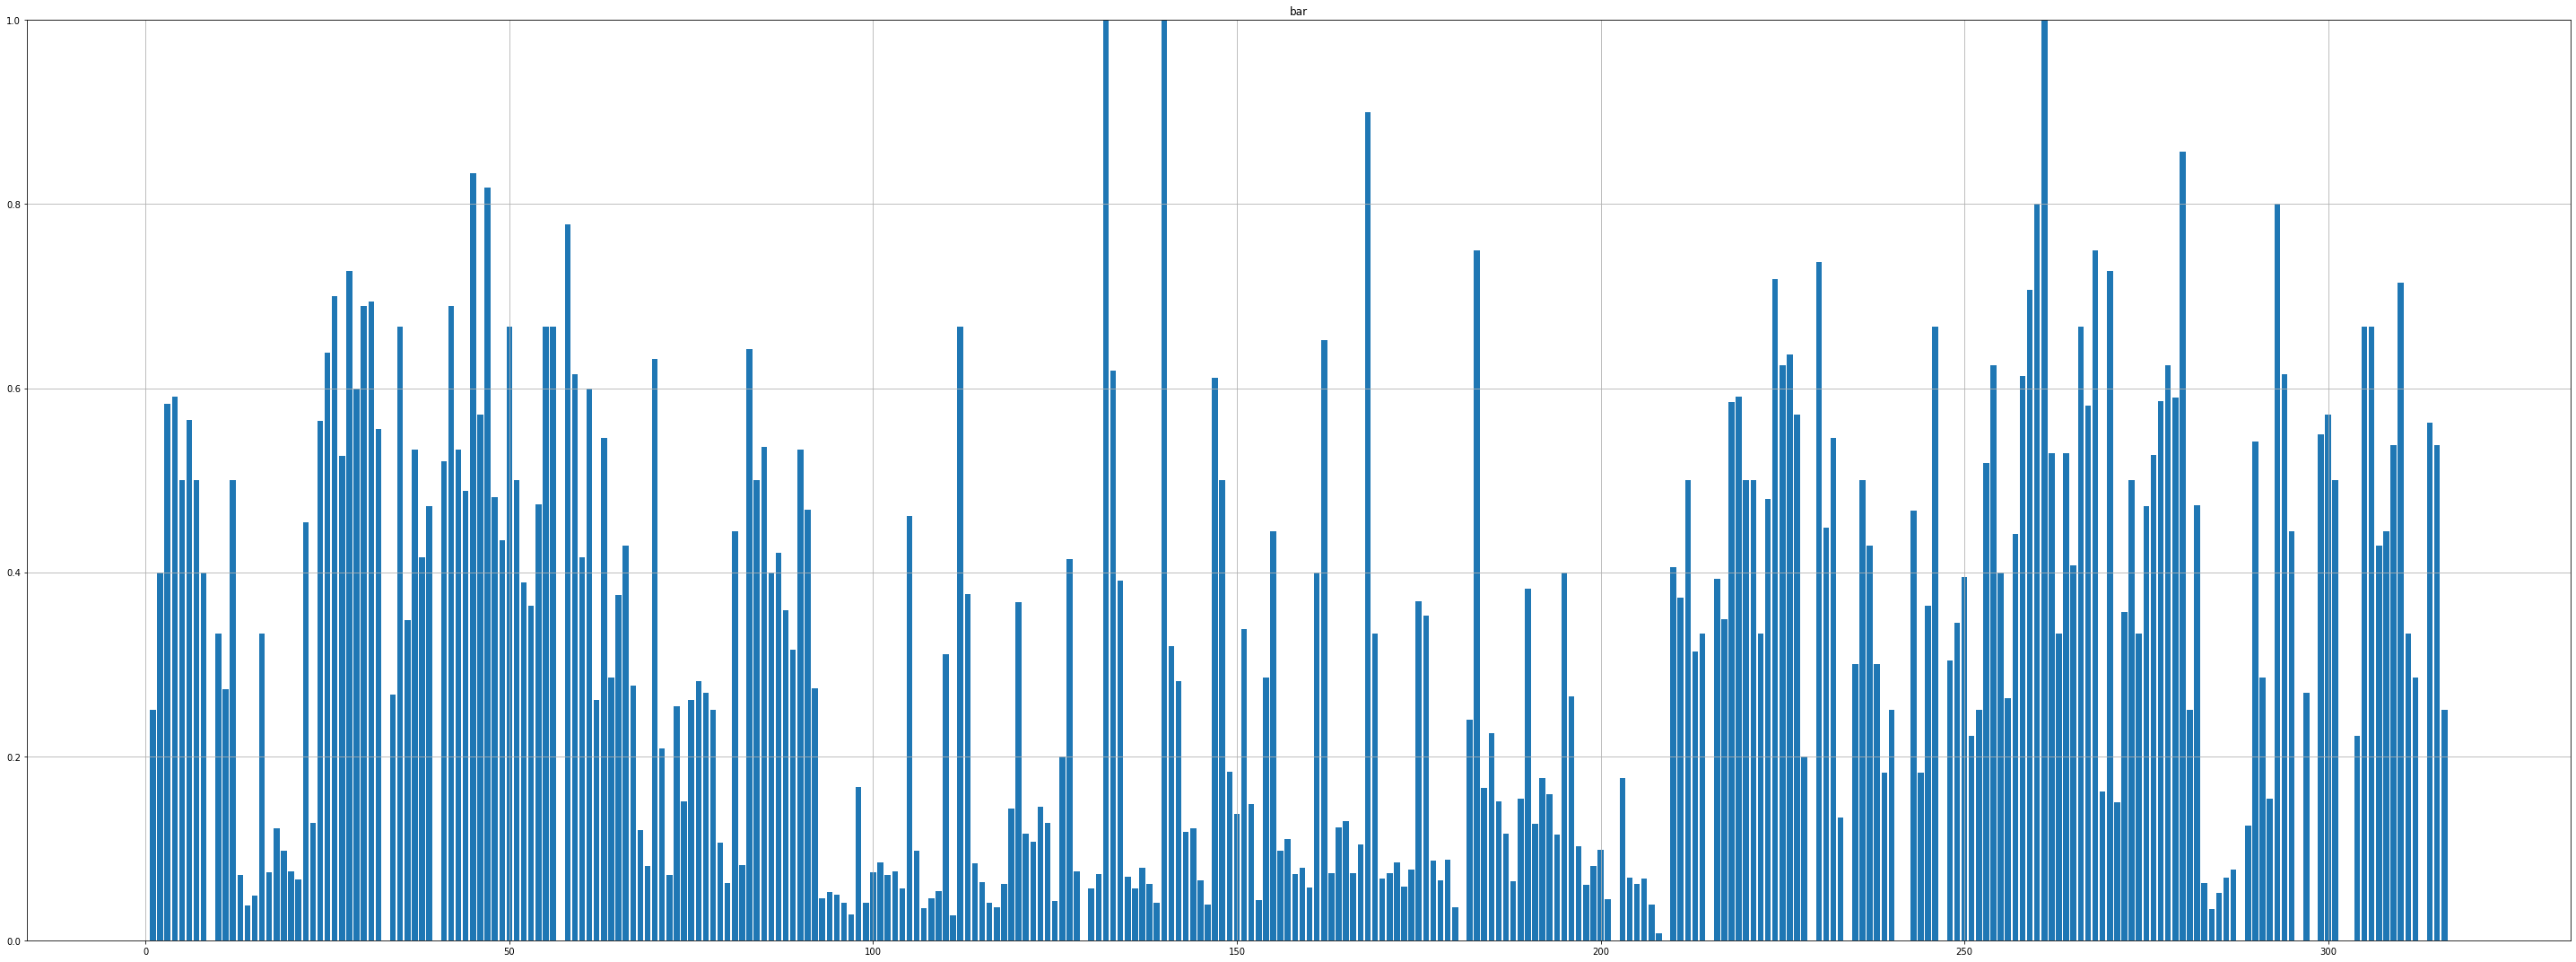

    month         y
0       1  0.101212
1       2  0.166478
2       3  0.519916
3       4  0.196794
4       5  0.067195
5       6  0.102228
6       7  0.090935
7       8  0.110133
8       9  0.464594
9      10  0.437669
10     11  0.101511
11     12  0.467290
0.519916142557652


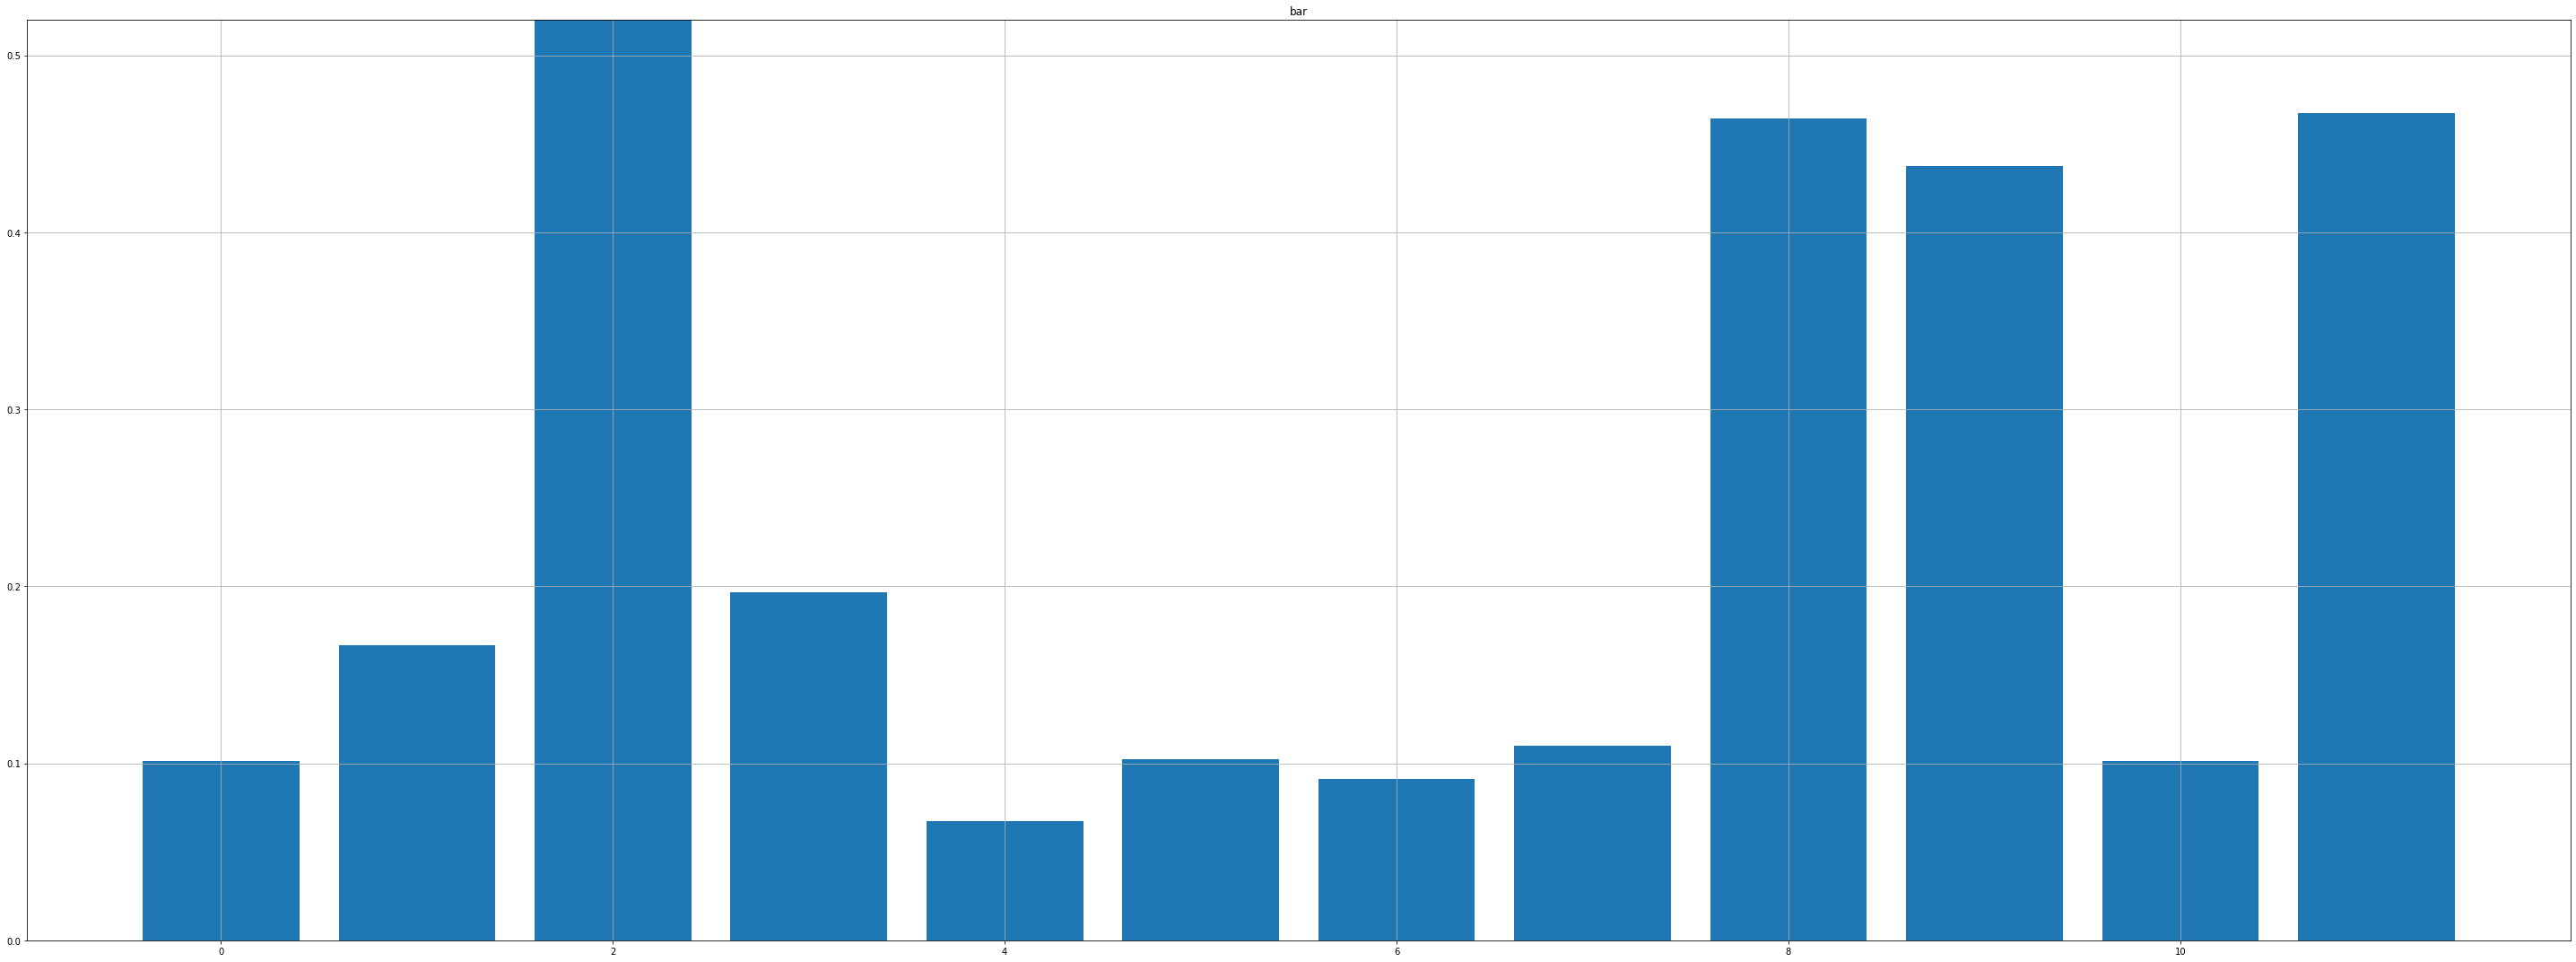

In [17]:
# understanging the relationship between time and probability of getting 'y'==1
time_series_days = pd_data[['month','day', 'y']].groupby(['month','day'],
                                                                 as_index=False).mean()
time_series_month = pd_data[['month','y']].groupby(['month'], as_index=False).mean()

# printing the plot and information about probability
print(time_series_days)
print(time_series_days['y'].max())
plt_bar(time_series_days.index, time_series_days['y'])

print(time_series_month)
print(time_series_month['y'].max())
plt_bar(time_series_month.index, time_series_month['y'],
        grid=True, hight=15, weight=40)

## Work with categorical
All categorical columns will be rebuilded by pd.get_dummy. But at first.

Look at the columns: pdays, previous,  

previous


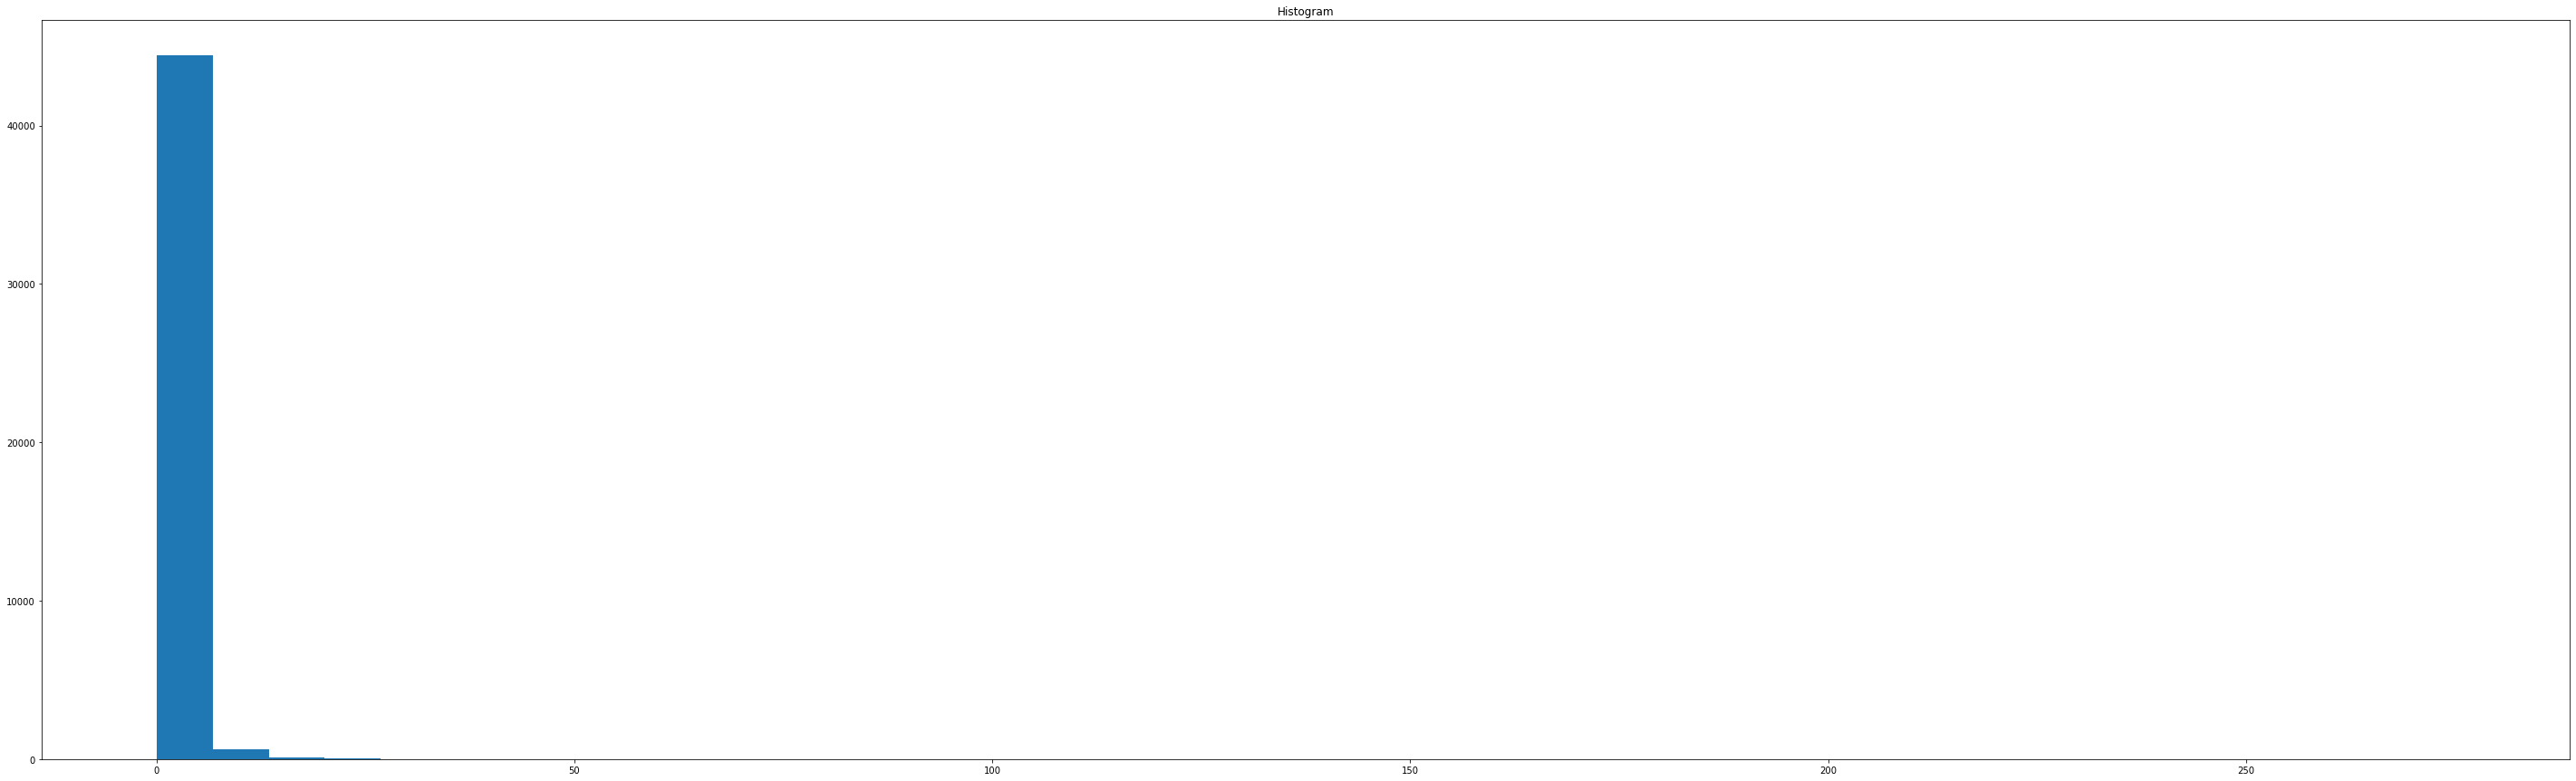

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    0.0
45207    0.0
45208    1.0
45209    0.0
45210    2.0
Name: previous, Length: 45211, dtype: float64


<ipython-input-18-cb1ce9cf58c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous[(
d:\pyth3_8_5\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\pyth3_8_5\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


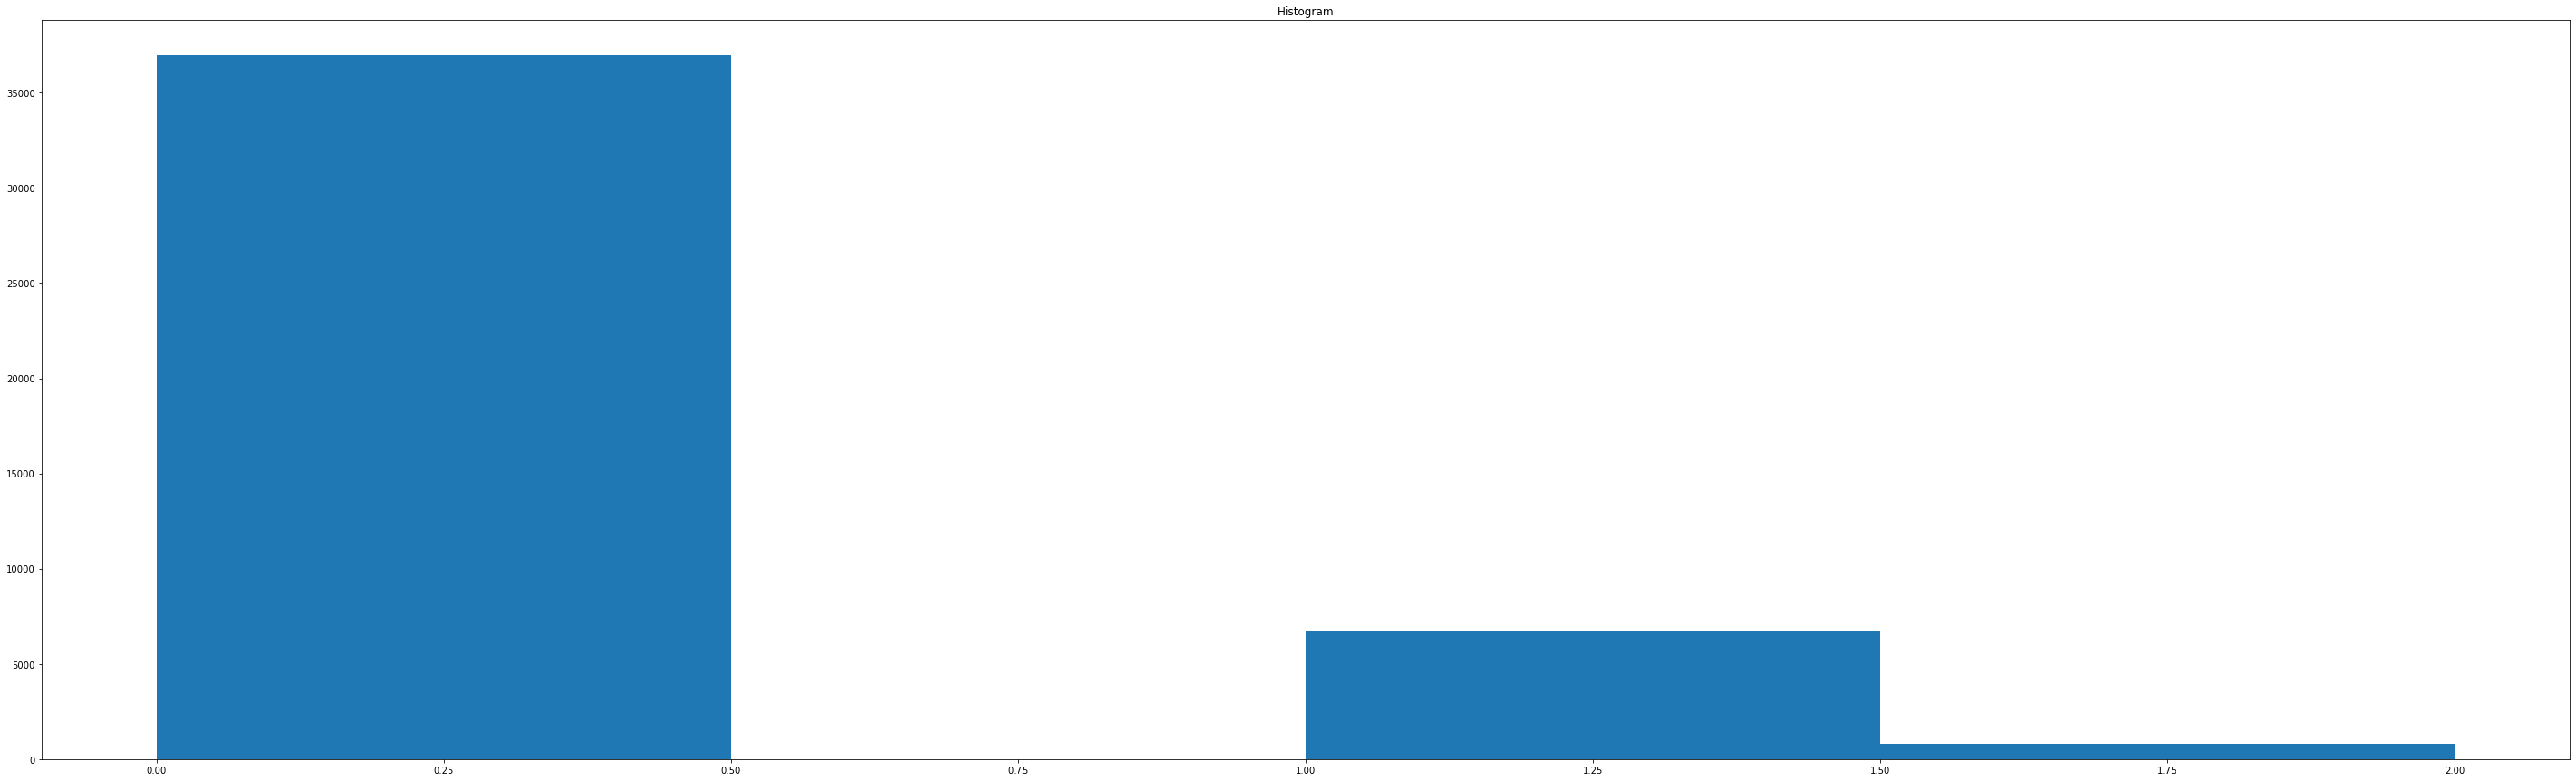

In [18]:
plot_plt_histogram(pd_data['previous'], bins=len(pd_data['previous'].unique()),
                        height=15, width=50,)

previous = pd_data['previous']
print(previous.groupby(previous).count())
#previous = previous.apply(lambda x: math.log( x + 1))
previous[(
    previous > 0) & (previous < 7)] = previous[(previous > 0) &
                                                     (previous < 5)].replace(
                                            previous[(previous > 0) & (previous < 5)].unique(), 1)

previous[(previous >= 7)] = previous[(previous >= 7)].replace(
                                      previous[(previous >= 7)].unique(), 2)
print(previous)
plot_plt_histogram(previous, bins=len(previous.unique()),
                        height=15, width=50, need_print_name =False)

'previous' column can be cutted into three part and add to categorical columns

pdays


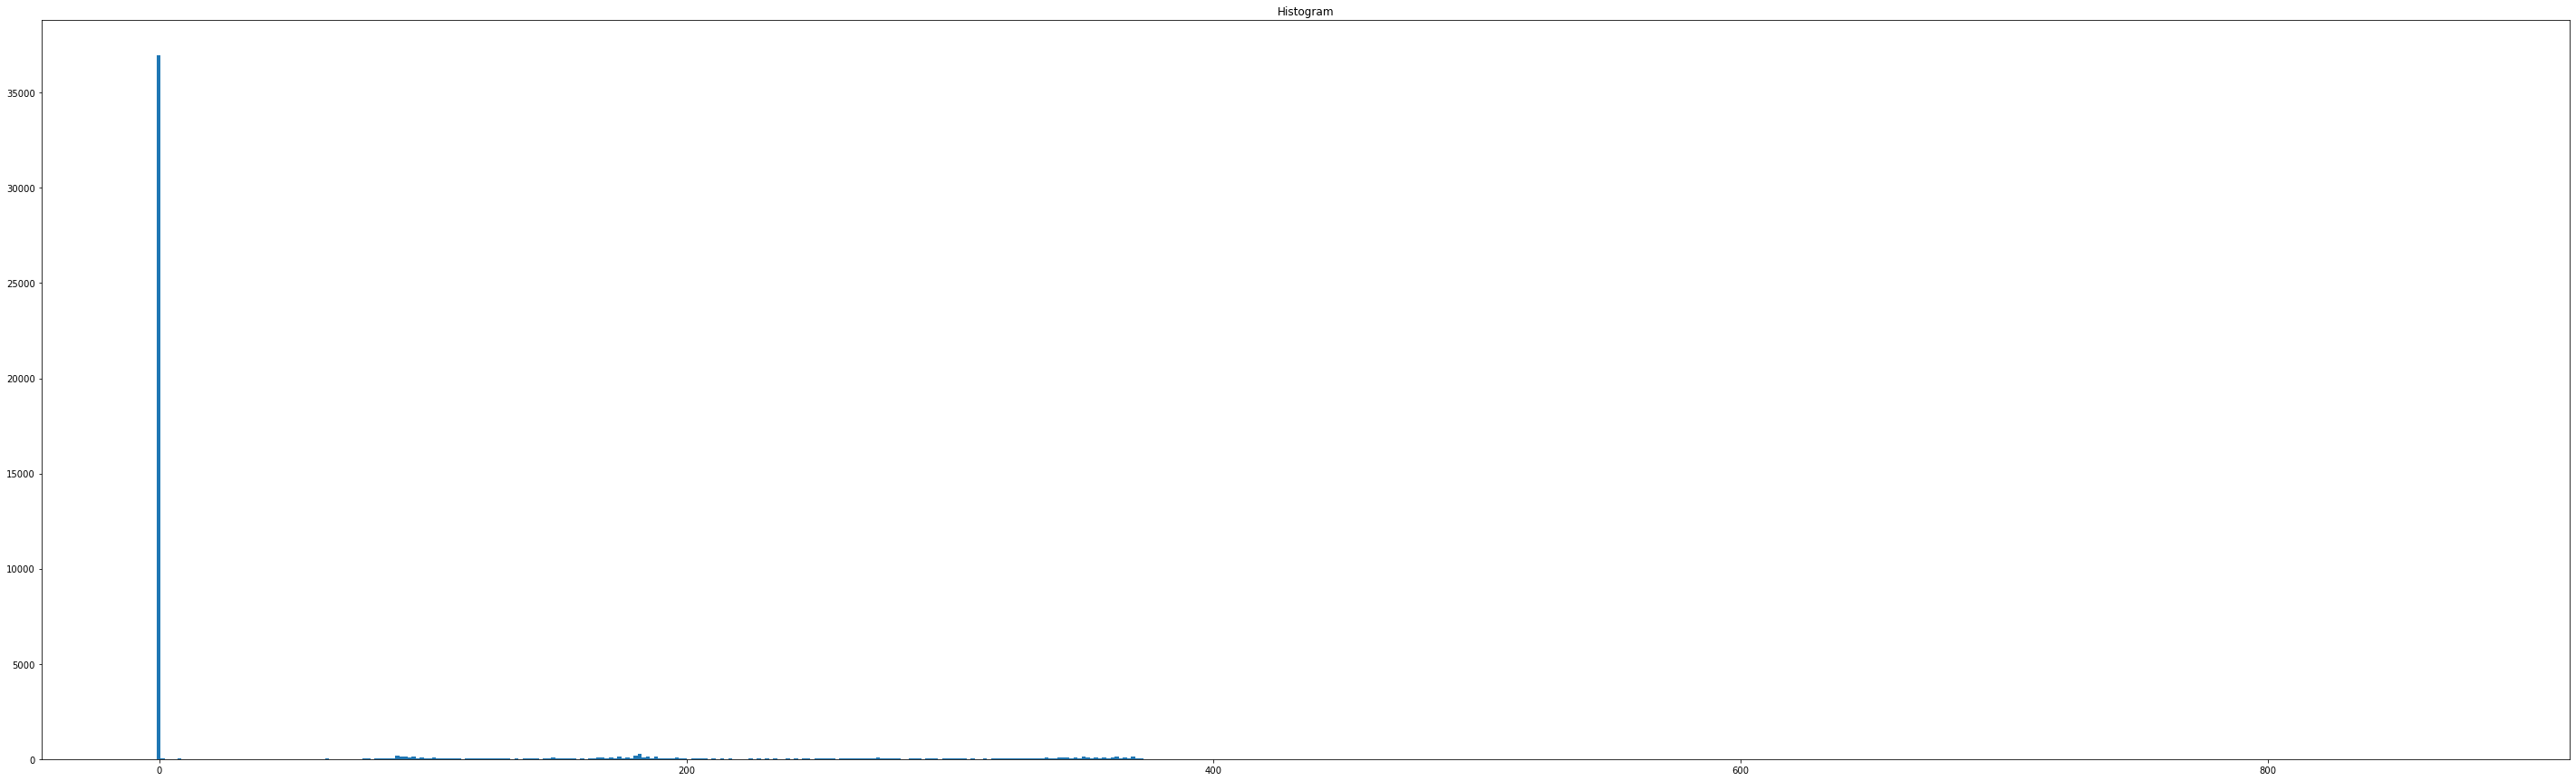

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: pdays, Length: 559, dtype: int64
[ -1   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 20

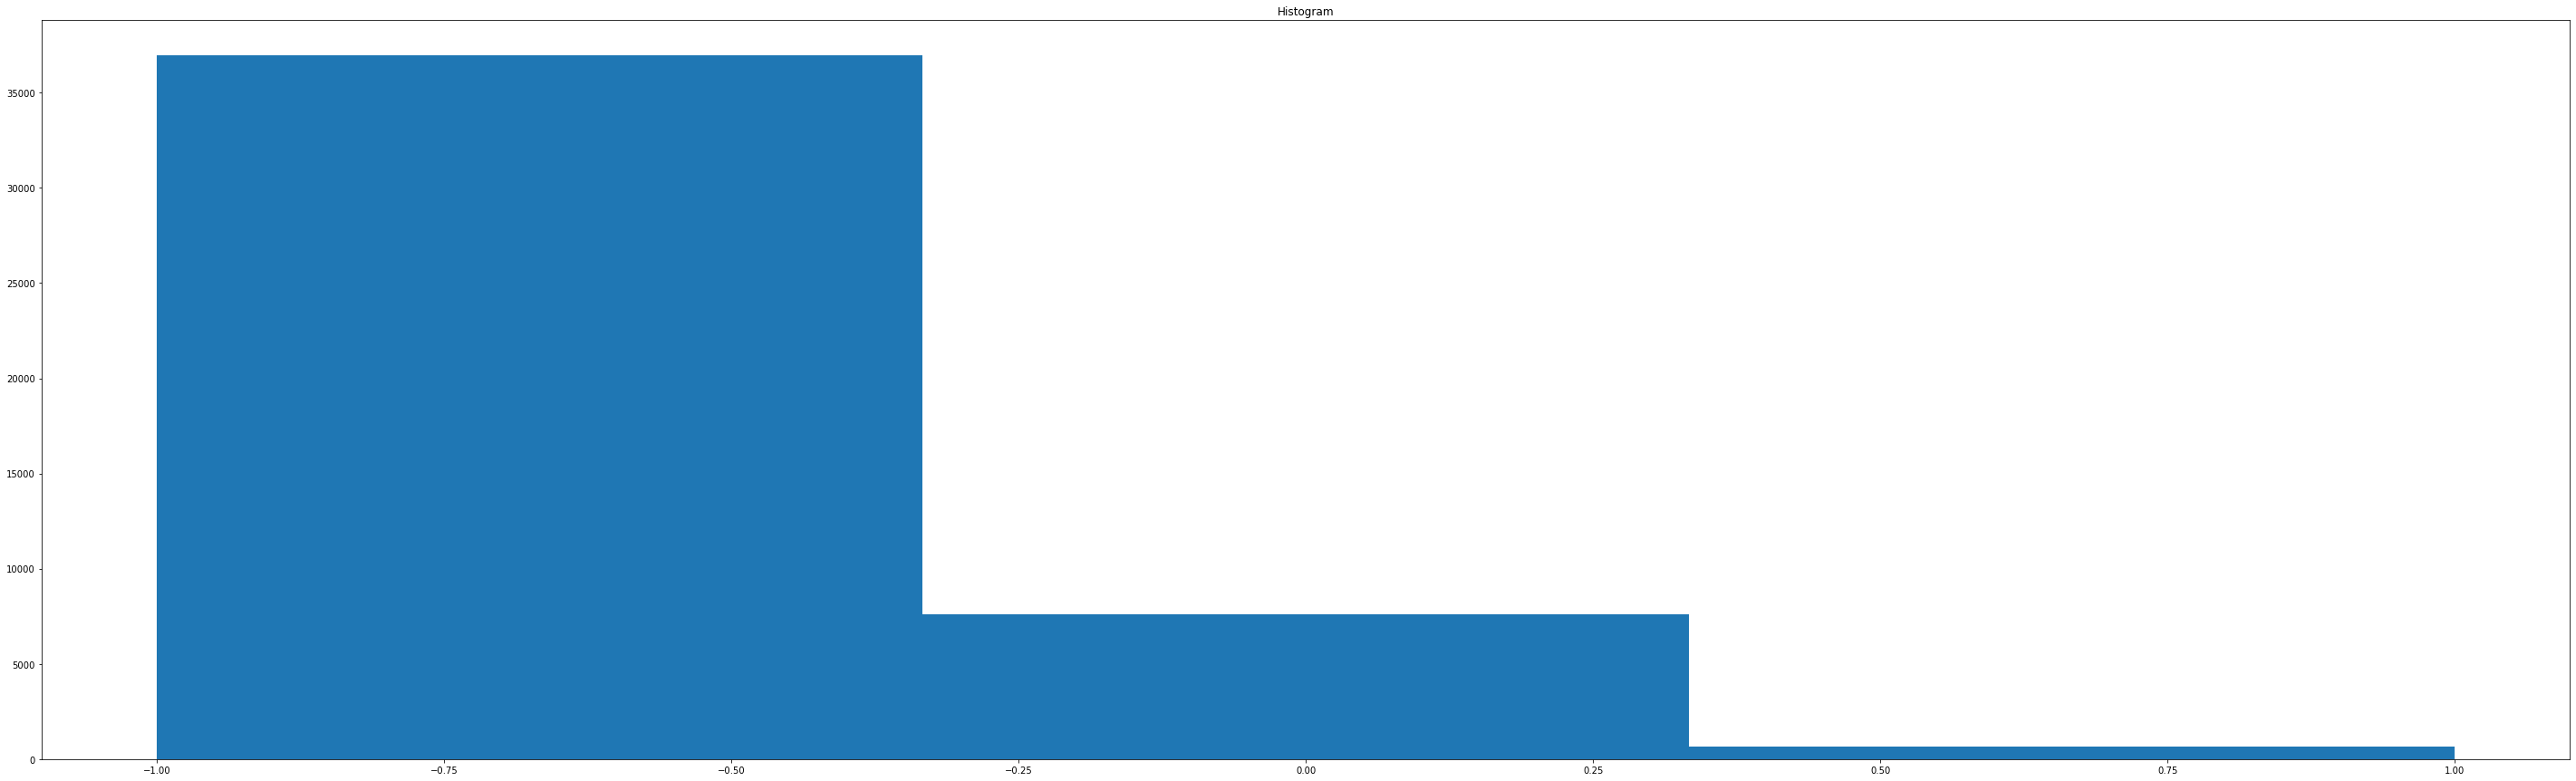

In [19]:
plot_plt_histogram(pd_data['pdays'], bins=len(pd_data['pdays'].unique()),
                        height=15, width=50,)

pdays = pd_data['pdays'].copy()
print(pdays.groupby(pdays).count())
print(np.sort(pdays.unique()))

pdays[(pdays > -1) & (pdays < 366)] = pdays[(pdays > -1) & 
                                             (pdays < 366)].replace(
                                       pdays[(pdays > -1) & 
                                             (pdays < 366)].unique(), 0)

pdays[(pdays >= 366)] = pdays[(pdays >= 366)].replace(
                                       pdays[(pdays >= 366)].unique(), 1)


print(previous)
plot_plt_histogram(pdays, bins=len(pdays.unique()),
                        height=15, width=50, need_print_name =False)

pdays was cutted into three parts -1 - never contacted, 0 contacted not long time, 1 - contacted long time ago

Feature Scaling

'duration' column

duration


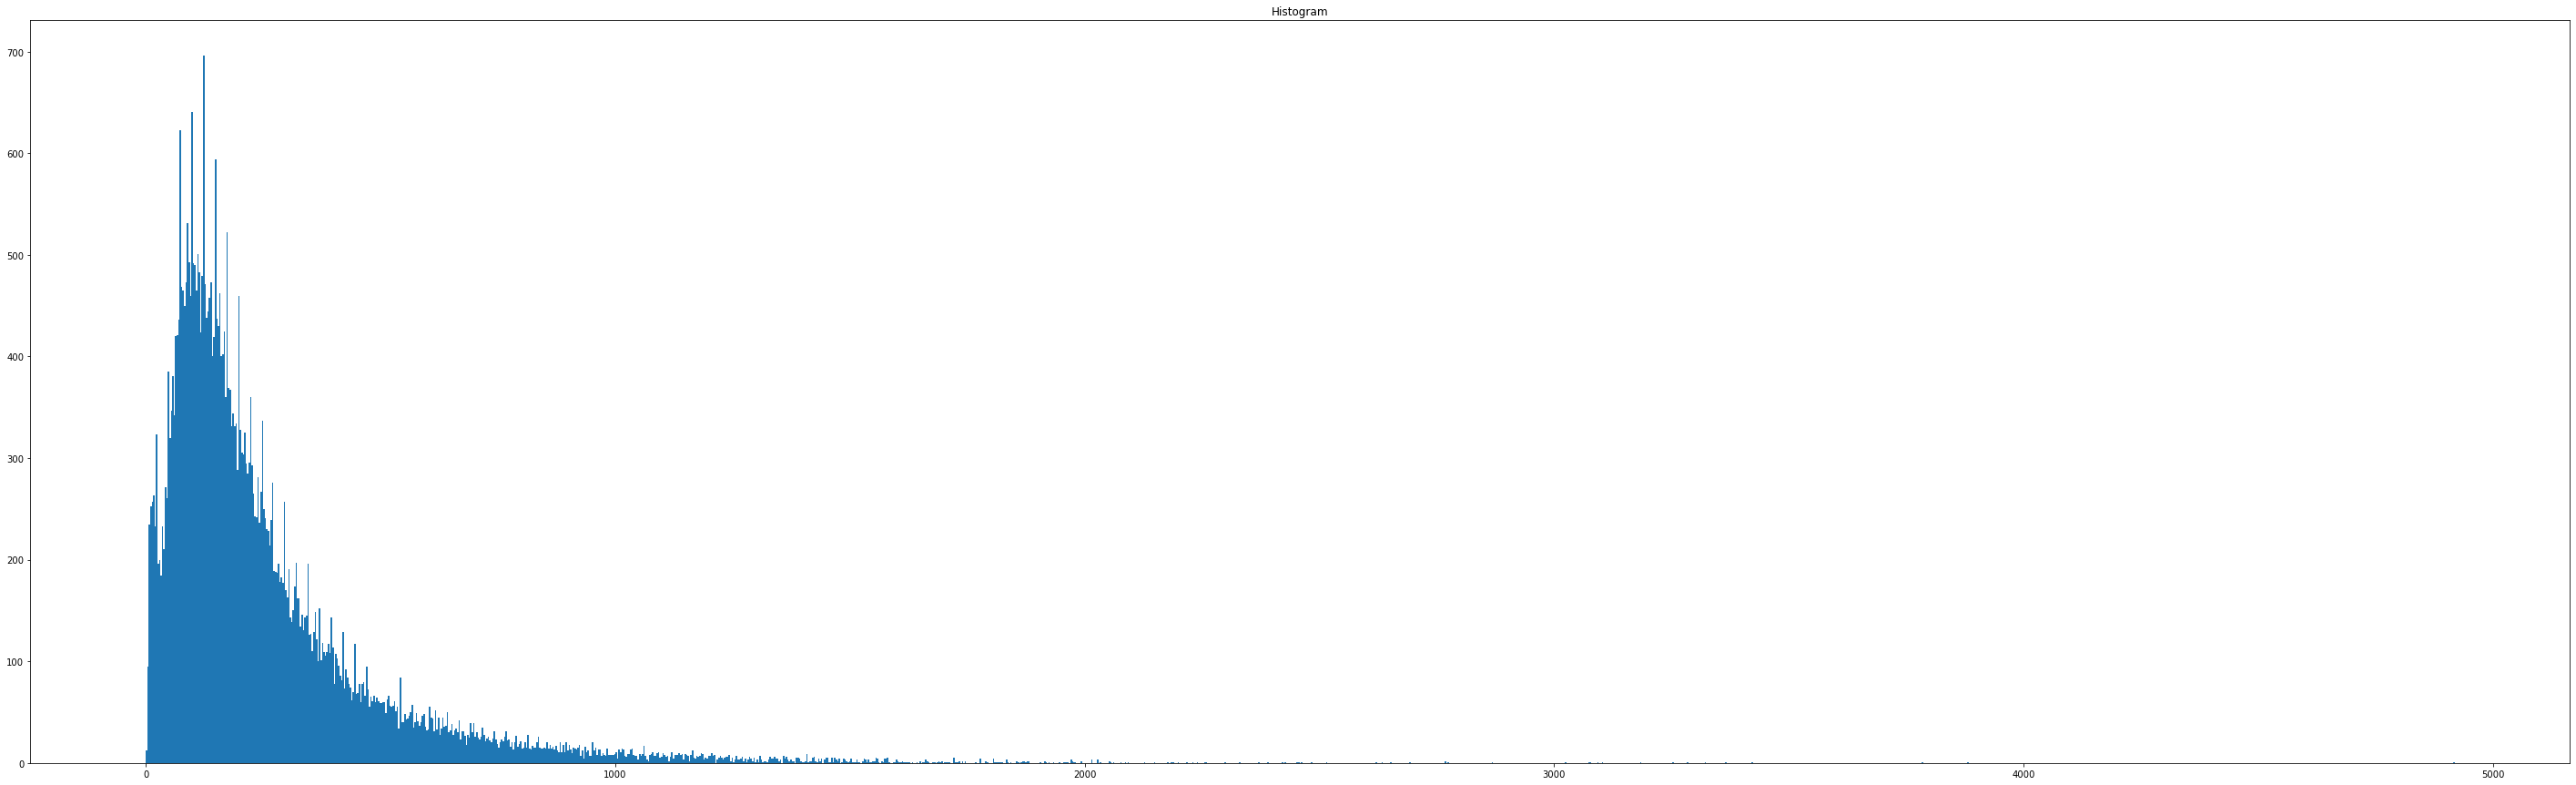

duration


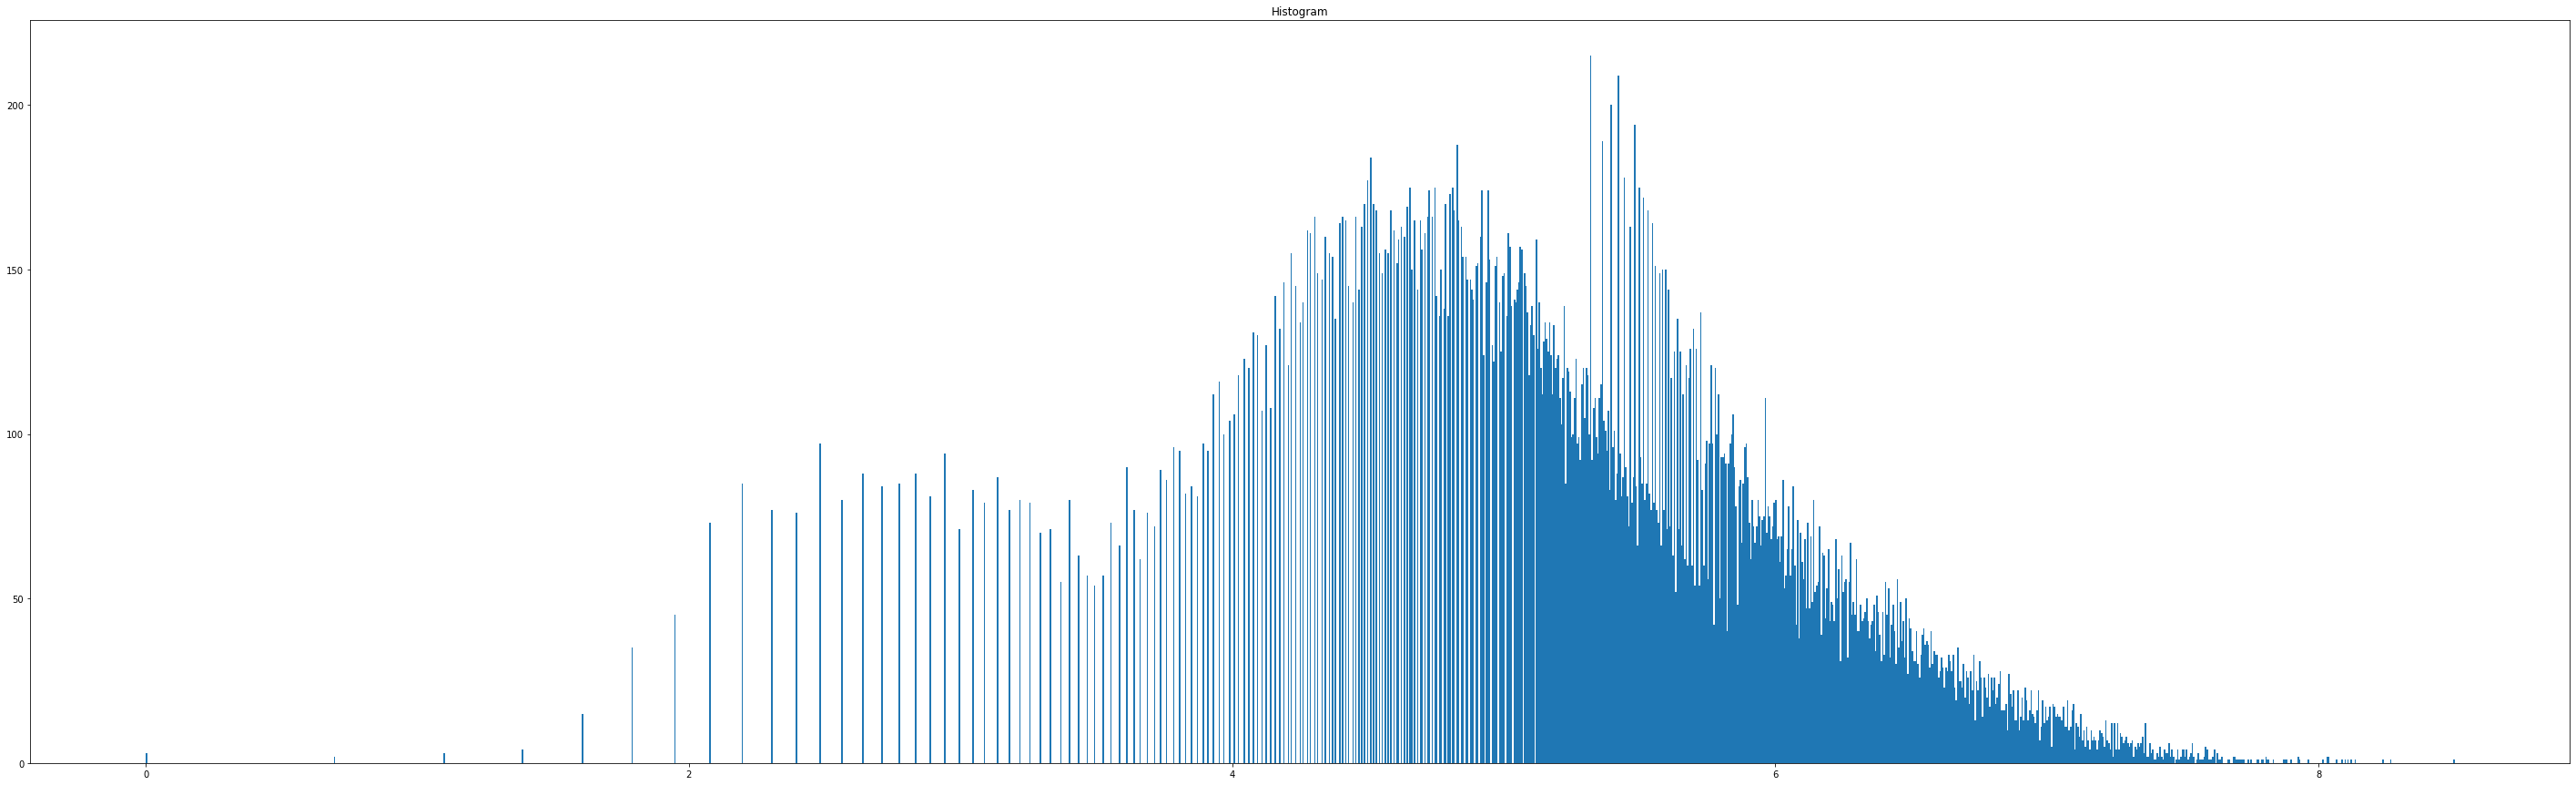

In [20]:

plot_plt_histogram(pd_data['duration'], bins=len(pd_data['duration'].unique()),
                        height=15, width=50,)

duration = pd_data['duration']
duration = duration.apply(lambda x: math.log( x + 1))


plot_plt_histogram(duration, bins=len(duration.unique()),
                        height=15, width=50,)

'balance' column

balance


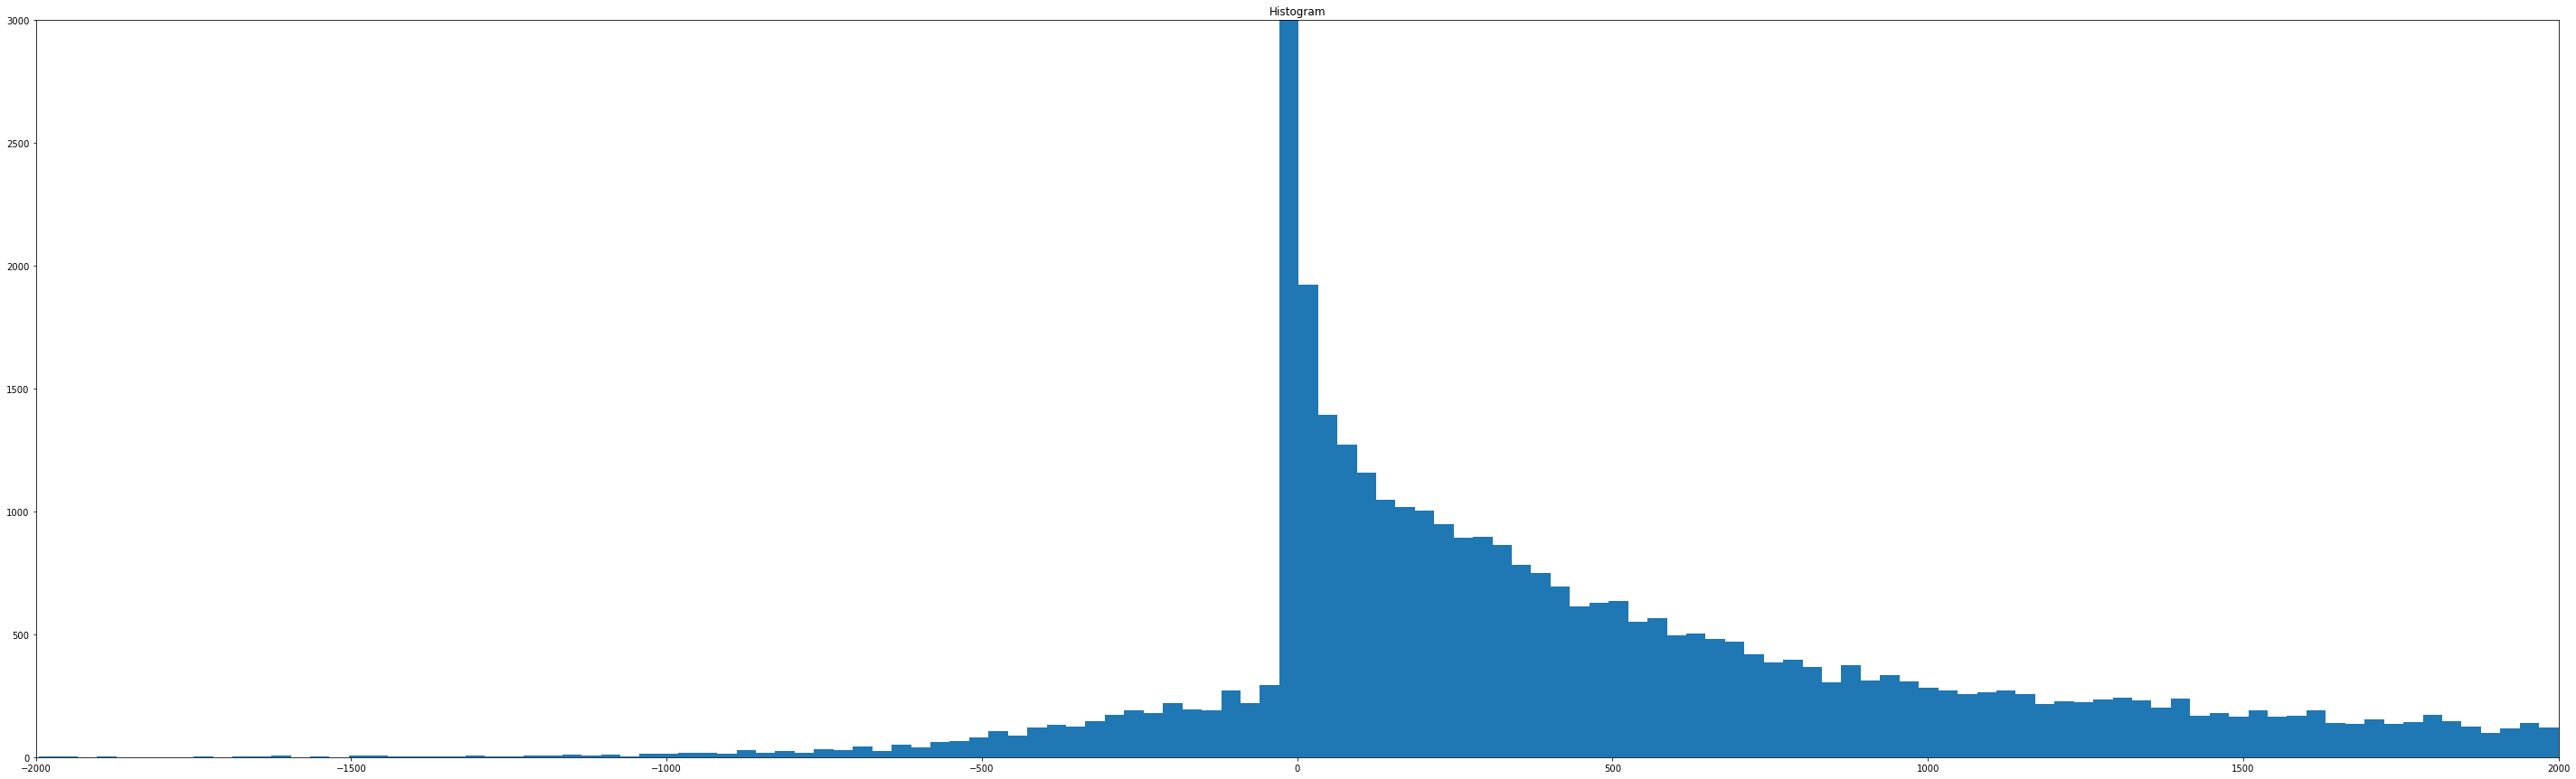

In [21]:
plot_plt_histogram(pd_data['balance'], bins=len(pd_data['balance'].unique())//2,
                        height=15, width=50,
                        need_xlim=True, need_ylim=True, 
                        xlim=2000, ylim=3000, xmin=-2000, ymin=0)



# Dropping the columns

Let's watch on 'default' column

default


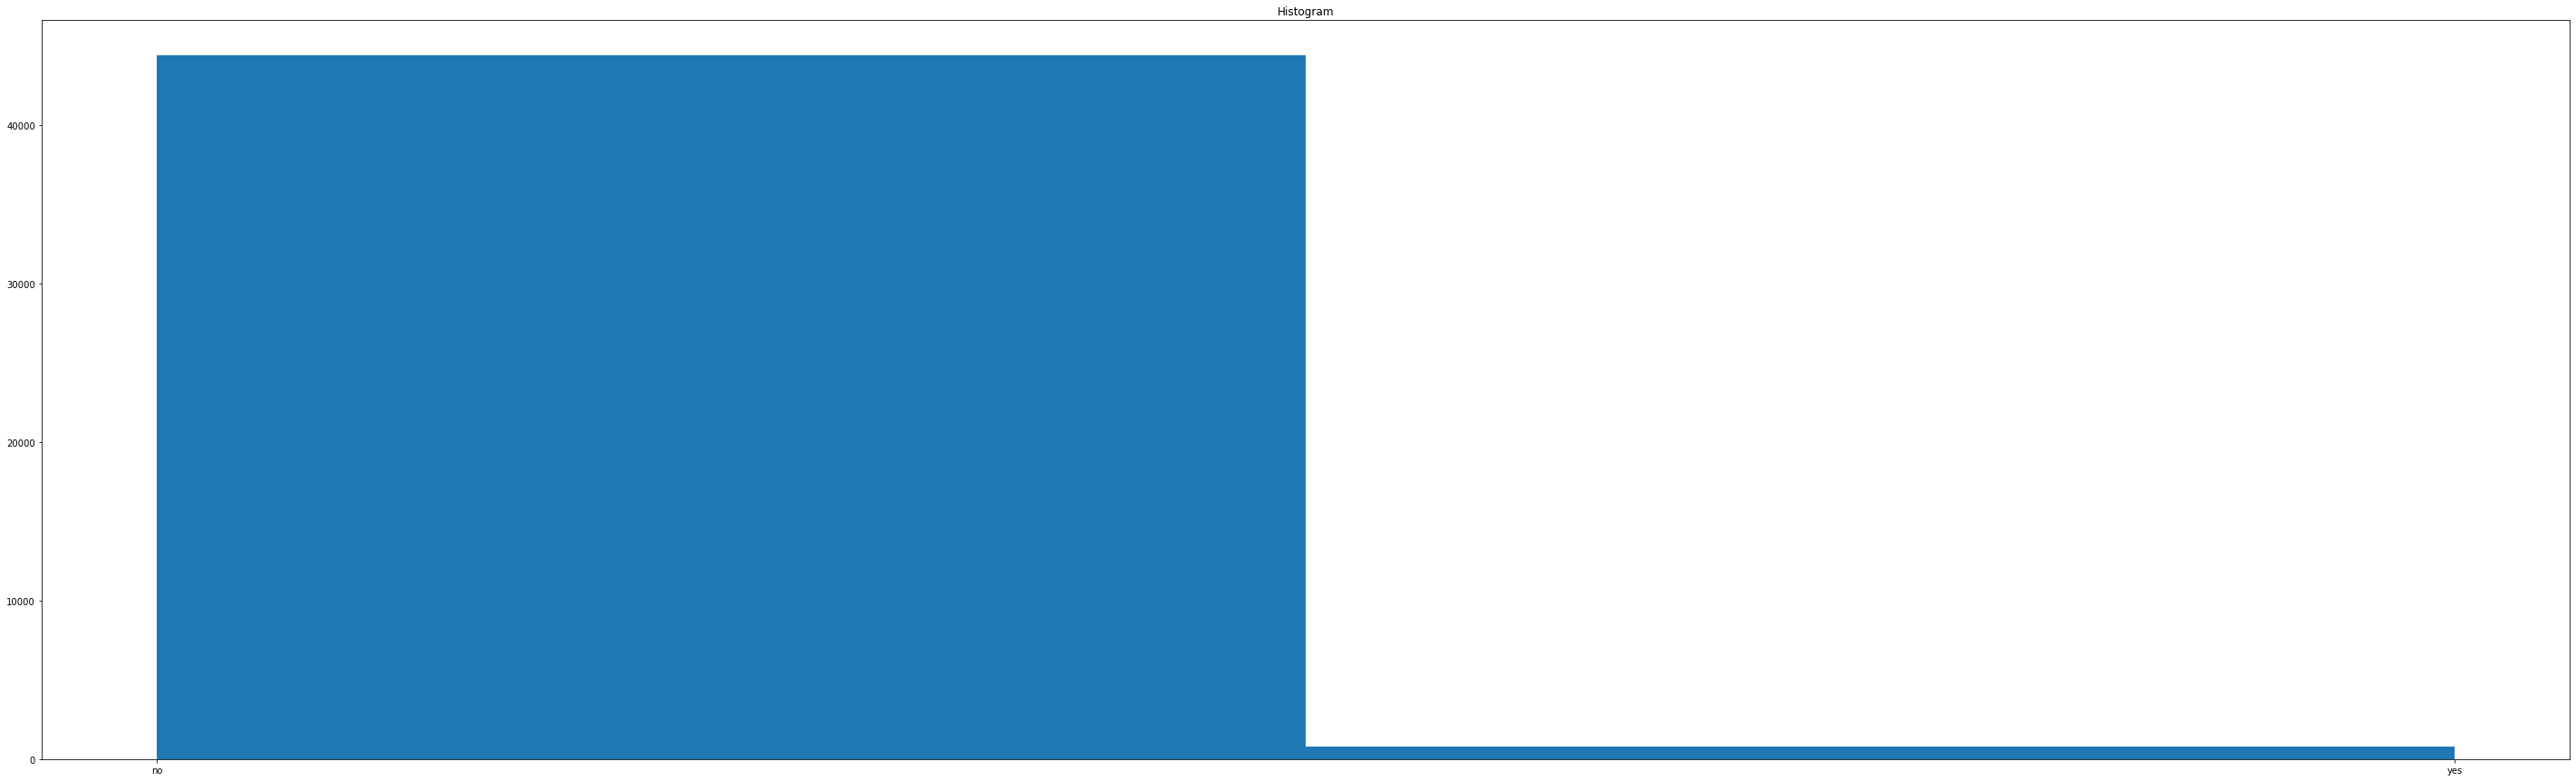

default
no     44396
yes      815
Name: default, dtype: int64
                y
default          
no       0.117961
yes      0.063804


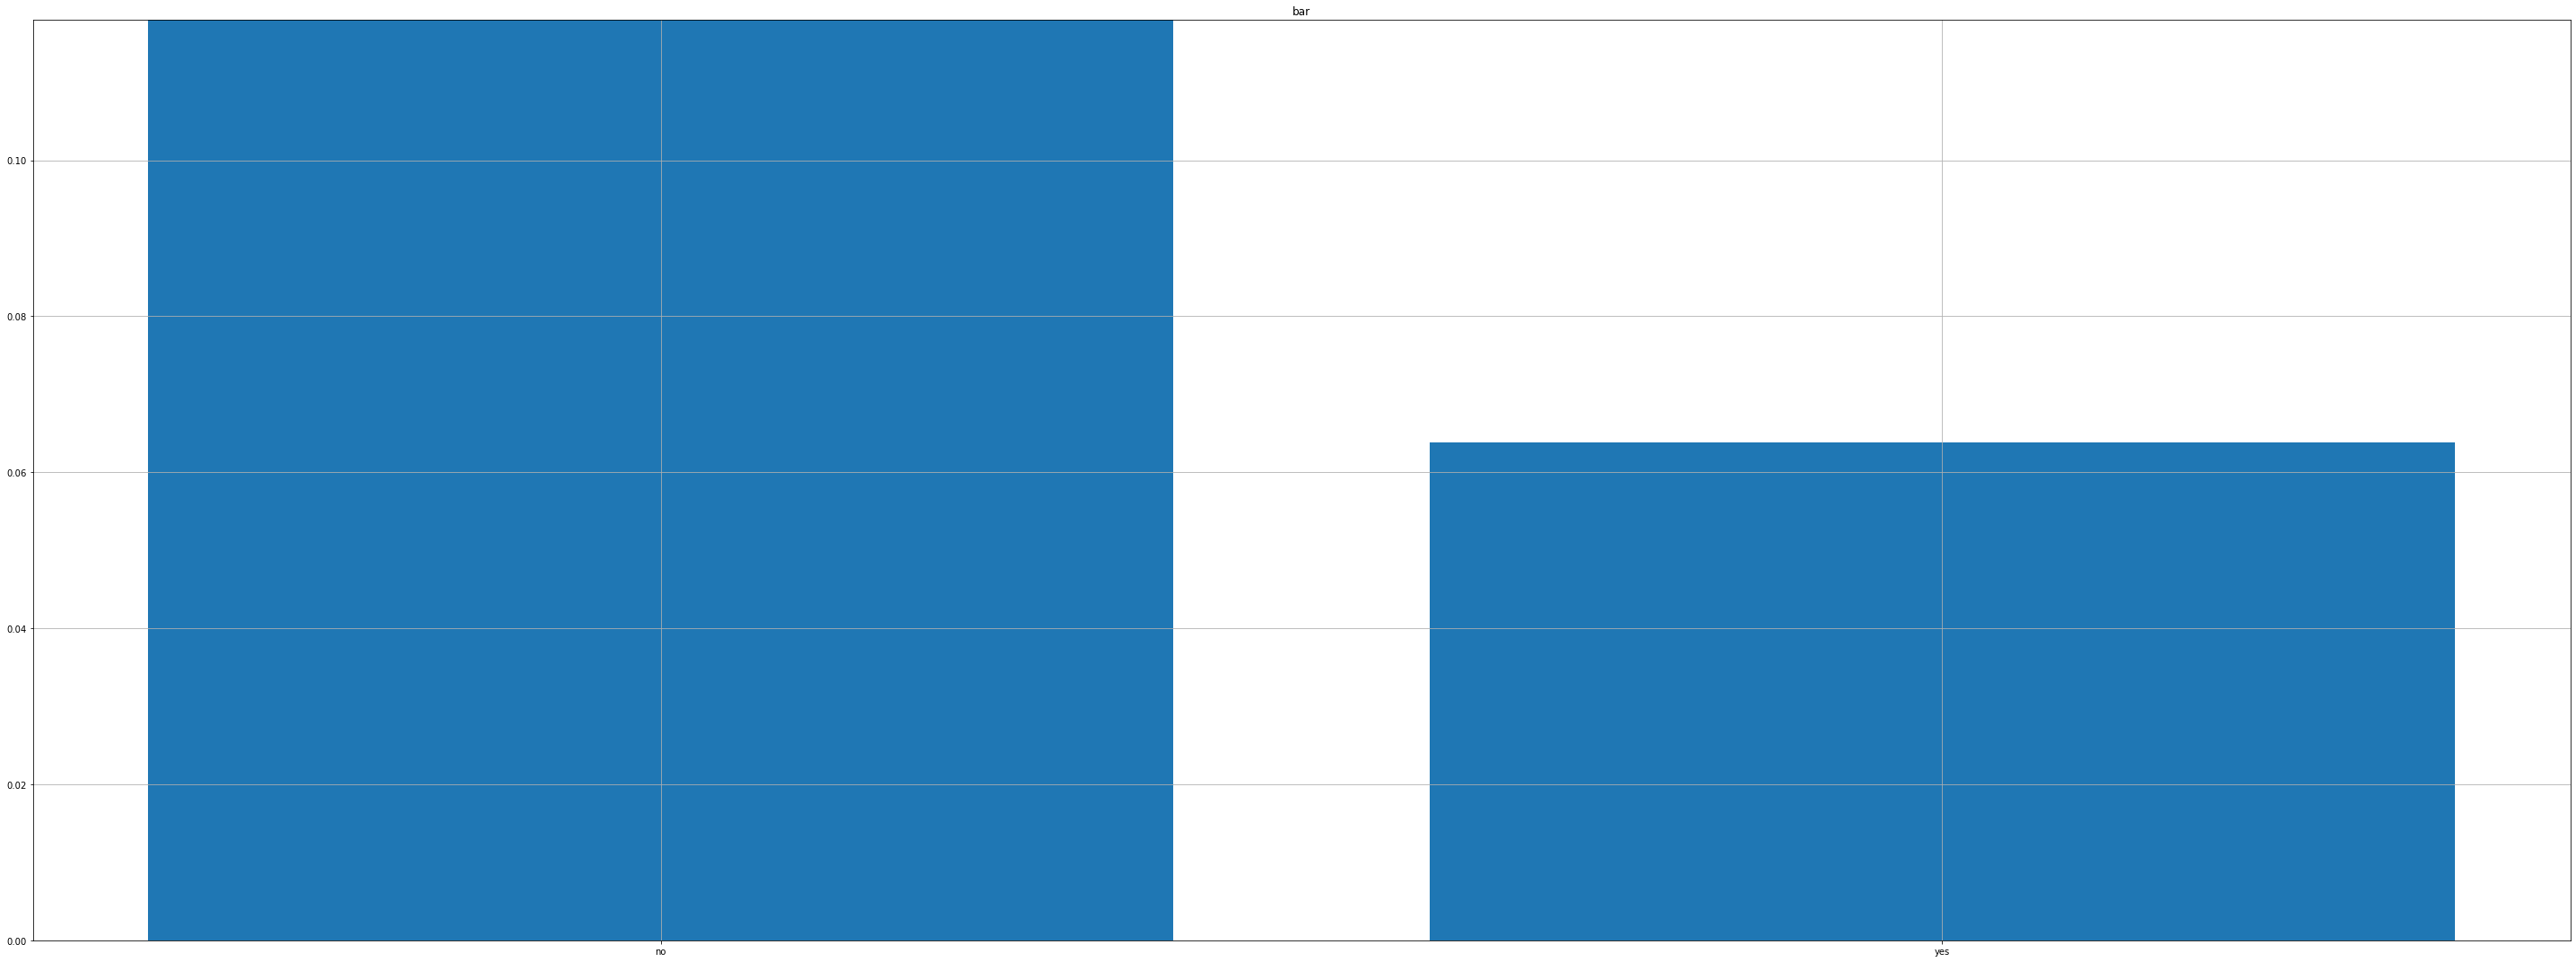

In [22]:
plot_plt_histogram(pd_data['default'], bins=len(pd_data['default'].unique()),
                        height=15, width=50,)

print(pd_data['default'].groupby(pd_data['default']).count())



default = pd_data[['default', 'y']].groupby(pd_data['default'], as_index=True).mean()
print(default)
plt_bar(pd_data['default'].unique(), default['y'], grid=True, hight=15, weight=40)

for simpling our model let's drop this column because the 98% of rows has one value

## class DataLoader

Class DataLoader get a pandas dataframe of dataset and has inside methods which reproduces th steps of data preprocessing.
inside methods:

1. filling_nans
2. work_with_categorical
3. feature_scaling

And other functions:
4. transform_y - for tranforming y into bool type (0, 1)
5. split_x_y - for spliting to x and y tables
The last function load_data execute all steps for data preprocessing. The function load_data returns: train_set_x, train_set_y, test_set_x, test_set_y

In [23]:
class DataLoader:
    def __init__(self, dataset):
        # initializing the dataset into class DataLoader
        self.dataset = dataset

    
    def _filling_nans_(self):
        # replace the unknown values for any columns
        # job
        list_of_jobs = list(self.dataset['job'].unique())
        list_of_jobs.remove('unknown')
        self.dataset['job'][self.dataset['job'] == 'unknown'] = pd.Series(random.choices(list_of_jobs, 
                                                           k=self.dataset['job'][self.dataset['job'] == 'unknown'].shape[0]),   
                                                       index=self.dataset['job'][self.dataset['job'] == 'unknown'].index)

          
    def _work_with_categorical_(self):
        # one hot for categorical value
        categorical_columns = ['job', 'marital', 'education', 
                                'housing', 'loan', 'pdays',
                               'contact', 'month', 'poutcome', 'previous']
        # replace the previous values
        self.dataset['previous'][(self.dataset['previous'] > 0) &
                                 (self.dataset['previous'] < 7)] = self.dataset['previous'][(
                                                                             self.dataset['previous'] > 0) & 
                                                                            (self.dataset['previous'] < 5)].replace(
                                                                             self.dataset['previous'][(
                                                                             self.dataset['previous'] > 0) & 
                                                                            (self.dataset['previous'] < 5)].unique(), 1)

        self.dataset['previous'][(self.dataset['previous'] >= 7)] = self.dataset['previous'][(
                                                                    self.dataset['previous'] >= 7)].replace(
                                                                    self.dataset['previous'][(
                                                                    self.dataset['previous'] >= 7)].unique(), 2)
        # replace the month
        self.dataset['month'] = self.dataset['month'].replace([
                                             'may', 'jun', 'jul', 
                                             'aug', 'oct', 'nov', 
                                             'dec', 'jan', 'feb', 
                                             'mar', 'apr', 'sep'], 
                                             [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9])
        
        # replace the p_days       
        self.dataset['pdays'][(
        self.dataset['pdays'] > -1) & (
        self.dataset['pdays'] < 366)] = self.dataset['pdays'][(
                                        self.dataset['pdays'] > -1) & 
                                       (self.dataset['pdays'] < 366)].replace(
                                              self.dataset['pdays'][(
                                              self.dataset['pdays'] > -1) & 
                                             (self.dataset['pdays'] < 366)].unique(), 0)

        self.dataset['pdays'][(
        self.dataset['pdays'] >= 366)] = self.dataset['pdays'][(
                                         self.dataset['pdays'] >= 366)].replace(
                                            self.dataset['pdays'][(
                                            self.dataset['pdays'] >= 366)].unique(), 1)

        # pd_dummy for every categorical column
        for column in categorical_columns:
            dummy = pd.get_dummies(self.dataset[column], prefix=column)
            self.dataset = pd.concat([self.dataset, dummy], axis=1)
            # dropping the column which will not be used from pd_get_dummy
            self.dataset = self.dataset.drop([column], axis=1)
        
        
    def _feature_scaling_(self):
        # normalization the numeric data
        # to log the duration
        self.dataset['duration'] = self.dataset['duration'].apply(lambda x: math.log(x + 1))
        
        # for days will be a just normalization
        self.dataset['day'] = self.dataset['day'] / 31
        
        # normalization by z_score 
        numeric_columns = ['age', 'balance', 'duration', 'campaign']
        for column in numeric_columns:
            self.dataset[column] = (self.dataset[column] - self.dataset[column].mean()) / self.dataset[column].std()
        
        
    def _transfor_y_(self):
        # tranformation y to bool type 0, 1
        label_encoder = LabelEncoder()
        self.dataset['y'] = label_encoder.fit_transform(self.dataset['y'])
        
    def _dropping_columns_(self):
        # dropping the worst columns
        drop_columns = ['default']
        self.dataset = self.dataset.drop(drop_columns, axis=1)
        
    def _split_x_y_(self):
        # spliting data into train and test sets with x and y
        train_set, test_set = train_test_split(self.dataset, test_size=0.3, random_state=42)
        
        train_set_y = train_set['y']
        train_set_x = train_set.drop(columns=['y'])

        test_set_y = test_set['y']
        test_set_x = test_set.drop(columns=['y'])
        
        return train_set_x, train_set_y, test_set_x, test_set_y
        
        
    def load_data(self):
        # loading the functions
        self._filling_nans_()
        self._work_with_categorical_()
        self._feature_scaling_()
        self._transfor_y_()
        self._dropping_columns_()
        return self._split_x_y_()


In [24]:
# testing the class 
# open the file
data = open('data.txt', 'r')
pd_data = pd.read_table(data)
data.close()
pd_data

# realizing the class
dataloader = DataLoader(pd_data)
dataloader = DataLoader(pd_data)
train_set_x, train_set_y, test_set_x, test_set_y = dataloader.load_data()

<ipython-input-23-acb4ae80dd4b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['job'][self.dataset['job'] == 'unknown'] = pd.Series(random.choices(list_of_jobs,
<ipython-input-23-acb4ae80dd4b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['previous'][(self.dataset['previous'] > 0) &
<ipython-input-23-acb4ae80dd4b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['pdays'][(
<ipython-input-2

In [25]:
# printng the sets
train_set_x

age   balance       day  duration  campaign  job_admin.  \
10747 -0.464857 -0.447414  0.548387 -0.146296  0.399016           0   
26054  1.418601 -0.383042  0.612903  0.623105  0.076229           0   
9125   0.476872 -0.447414  0.161290 -0.803838 -0.246558           0   
41659  0.006007  0.677795  0.032258  0.587881 -0.569344           0   
4443  -0.276512 -0.447414  0.645161 -0.717007 -0.569344           0   
...         ...       ...       ...       ...       ...         ...   
11284  0.288526 -0.099604  0.580645  2.684922 -0.569344           0   
44732 -1.689106 -0.280571  0.258065  0.195316 -0.569344           0   
38158 -0.653203 -0.014869  0.483871  0.335018 -0.569344           0   
860   -0.747376 -0.393223  0.225806 -0.491758 -0.569344           0   
15795 -0.276512 -0.460880  0.677419 -1.017230  2.335736           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
10747                0                 0              0               0  ...   
26054                0                 1              0               0  ...   
9125                 1                 0              0               0  ...   
41659                0                 0              0               1  ...   
4443                 1                 0              0               0  ...   
...                ...               ...            ...             ...  ...   
11284                0                 0              1               0  ...   
44732                0                 0              0               0  ...   
38158                0                 0              0               0  ...   
860                  0                 0              0               0  ...   
15795                1                 0              0               0  ...   

       month_10  month_11  month_12  poutcome_failure  poutcome_other  \
10747         0         0         0                 0               0   
26054         0         1         0                 0               0   
9125          0         0         0                 0               0   
41659         1         0         0                 0               0   
4443          0         0         0                 0               0   
...         ...       ...       ...               ...             ...   
11284         0         0         0                 0               0   
44732         0         0         0                 1               0   
38158         0         0         0                 0               0   
860           0         0         0                 0               0   
15795         0         0         0                 0               0   

       poutcome_success  poutcome_unknown  previous_0.0  previous_1.0  \
10747                 0                 1             1             0   
26054                 0                 1             1             0   
9125                  0                 1             1             0   
41659                 1                 0             0             0   
4443                  0                 1             1             0   
...                 ...               ...           ...           ...   
11284                 0                 1             1             0   
44732                 0                 0             0             1   
38158                 0                 1             1             0   
860                   0                 1             1             0   
15795                 0                 1             1             0   

       previous_2.0  
10747             0  
26054             0  
9125              0  
41659             0  
4443              0  
...             ...  
11284             0  
44732             0  
38158             0  
860               0  
15795             0  

[31647 rows x 52 columns]

In [26]:
train_set_x.describe()

age       balance           day      duration      campaign  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       0.000514     -0.001408      0.510633     -0.004672      0.002710   
std        1.001248      0.977702      0.268490      1.002912      1.018071   
min       -2.159970     -2.696192      0.032258     -5.610425     -0.569344   
25%       -0.747376     -0.424424      0.258065     -0.572151     -0.569344   
50%       -0.182339     -0.300934      0.516129      0.028948     -0.246558   
75%        0.665218      0.023558      0.677419      0.647098      0.076229   
max        5.091346     26.222617      1.000000      3.611380     19.443432   

         job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
count  31647.000000     31647.000000      31647.000000   31647.000000   
mean       0.115366         0.217430          0.033400       0.028186   
std        0.319469         0.412504          0.179681       0.165506   
min        0.000000         0.000000          0.000000       0.000000   
25%        0.000000         0.000000          0.000000       0.000000   
50%        0.000000         0.000000          0.000000       0.000000   
75%        0.000000         0.000000          0.000000       0.000000   
max        1.000000         1.000000          1.000000       1.000000   

       job_management  ...      month_10      month_11      month_12  \
count    31647.000000  ...  31647.000000  31647.000000  31647.000000   
mean         0.208203  ...      0.016779      0.088223      0.004929   
std          0.406029  ...      0.128444      0.283624      0.070037   
min          0.000000  ...      0.000000      0.000000      0.000000   
25%          0.000000  ...      0.000000      0.000000      0.000000   
50%          0.000000  ...      0.000000      0.000000      0.000000   
75%          0.000000  ...      0.000000      0.000000      0.000000   
max          1.000000  ...      1.000000      1.000000      1.000000   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  \
count      31647.000000    31647.000000      31647.000000      31647.000000   
mean           0.107625        0.041900          0.033115          0.817360   
std            0.309911        0.200363          0.178940          0.386377   
min            0.000000        0.000000          0.000000          0.000000   
25%            0.000000        0.000000          0.000000          1.000000   
50%            0.000000        0.000000          0.000000          1.000000   
75%            0.000000        0.000000          0.000000          1.000000   
max            1.000000        1.000000          1.000000          1.000000   

       previous_0.0  previous_1.0  previous_2.0  
count  31647.000000  31647.000000  31647.000000  
mean       0.817234      0.148197      0.018074  
std        0.386481      0.355301      0.133223  
min        0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000  
75%        1.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 52 columns]

         age         y
0  -2.159970  0.000000
1  -2.065797  0.454545
2  -1.971624  0.300000
3  -1.877451  0.240741
4  -1.783279  0.297030
..       ...       ...
72  4.620481  1.000000
73  4.808827  1.000000
74  4.903000  1.000000
75  4.997173  0.000000
76  5.091346  0.500000

[77 rows x 2 columns]


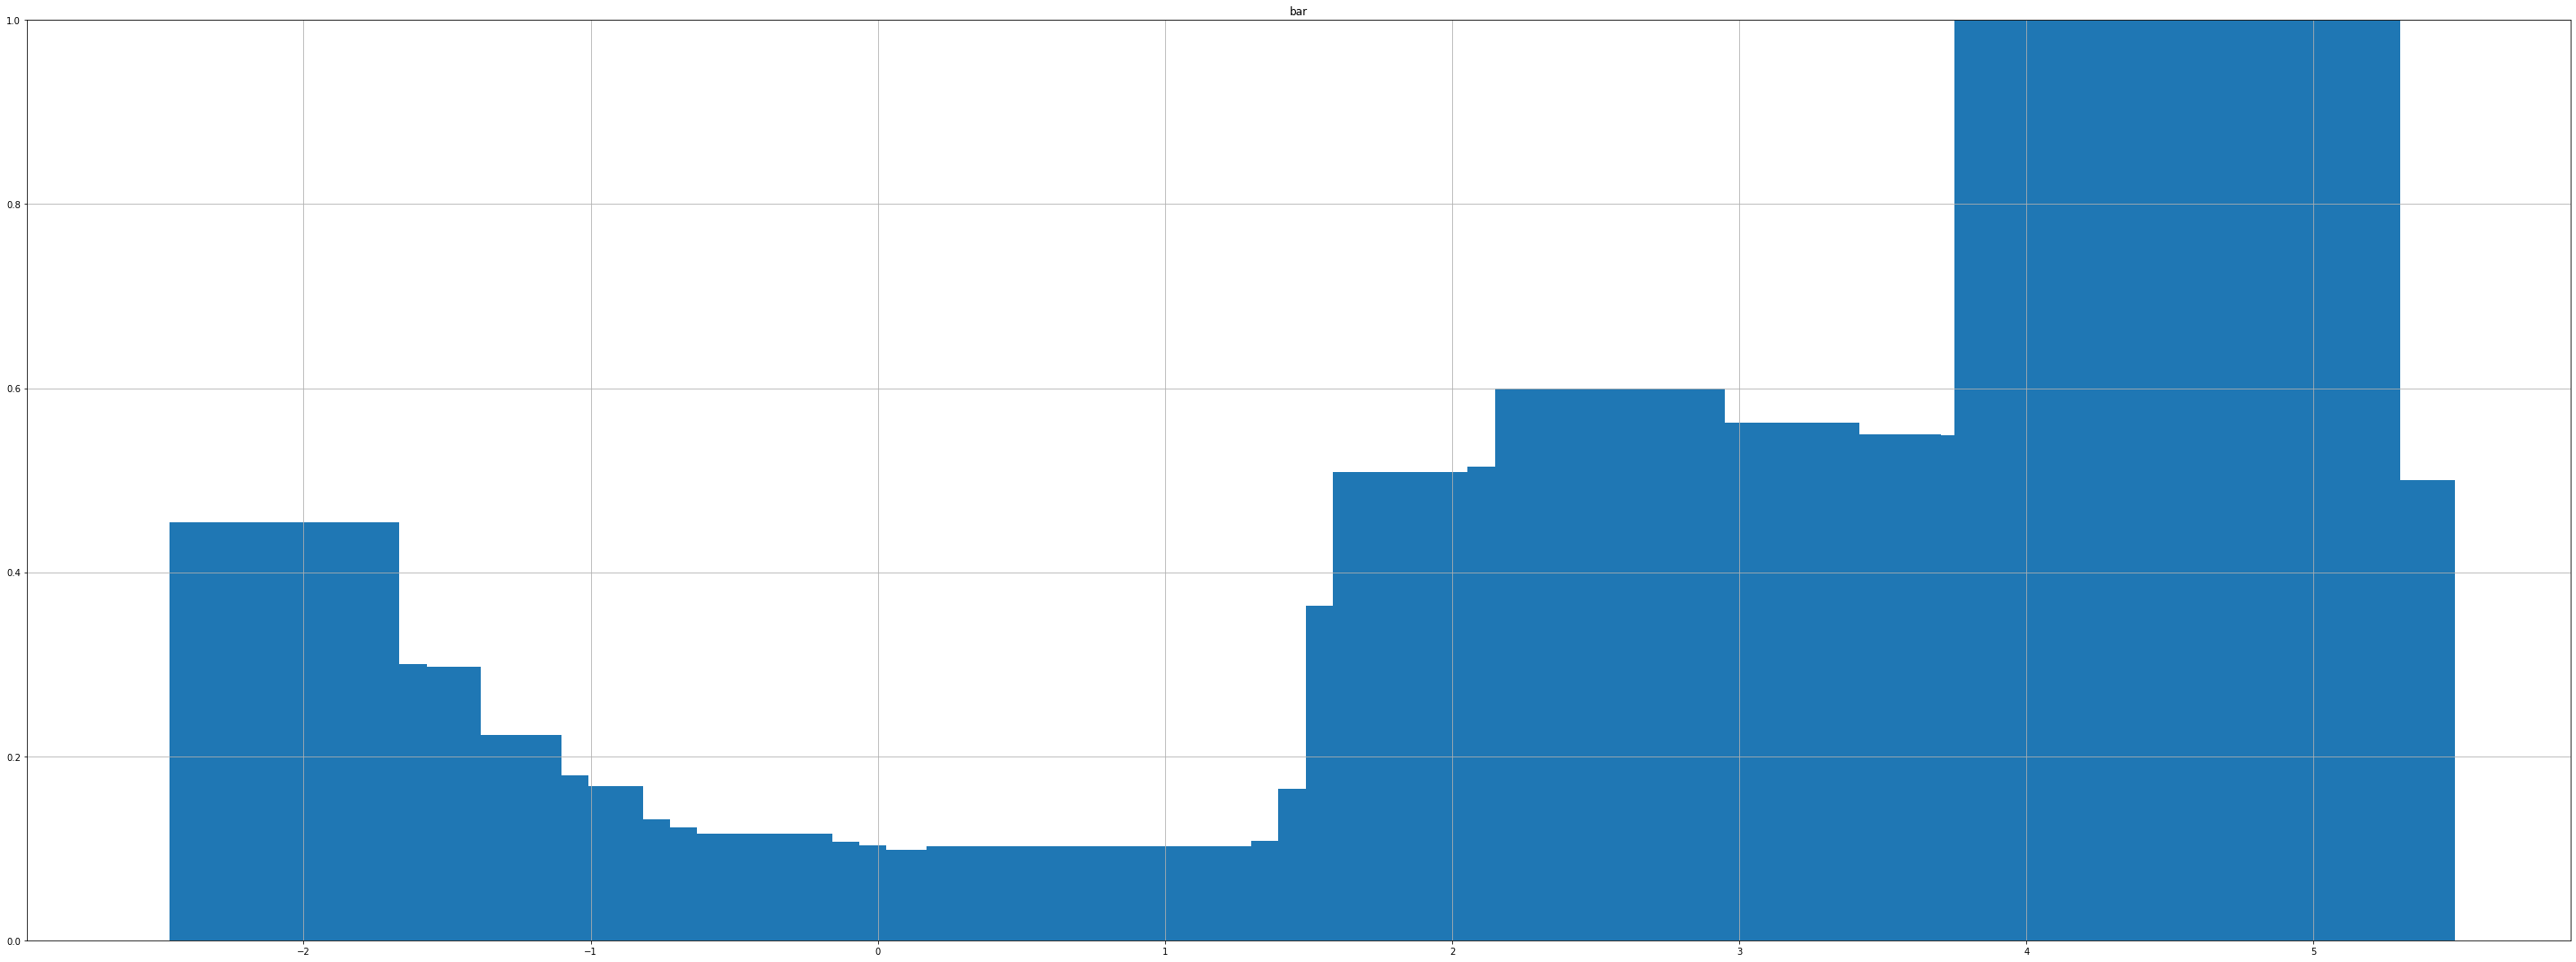

        balance    y
0     -2.696192  0.0
1     -1.779865  0.0
2     -1.554889  0.0
3     -1.451761  1.0
4     -1.375893  0.0
...         ...  ...
6302  19.143255  0.0
6303  20.684917  0.0
6304  21.443596  0.0
6305  22.933037  0.0
6306  26.222617  1.0

[6307 rows x 2 columns]


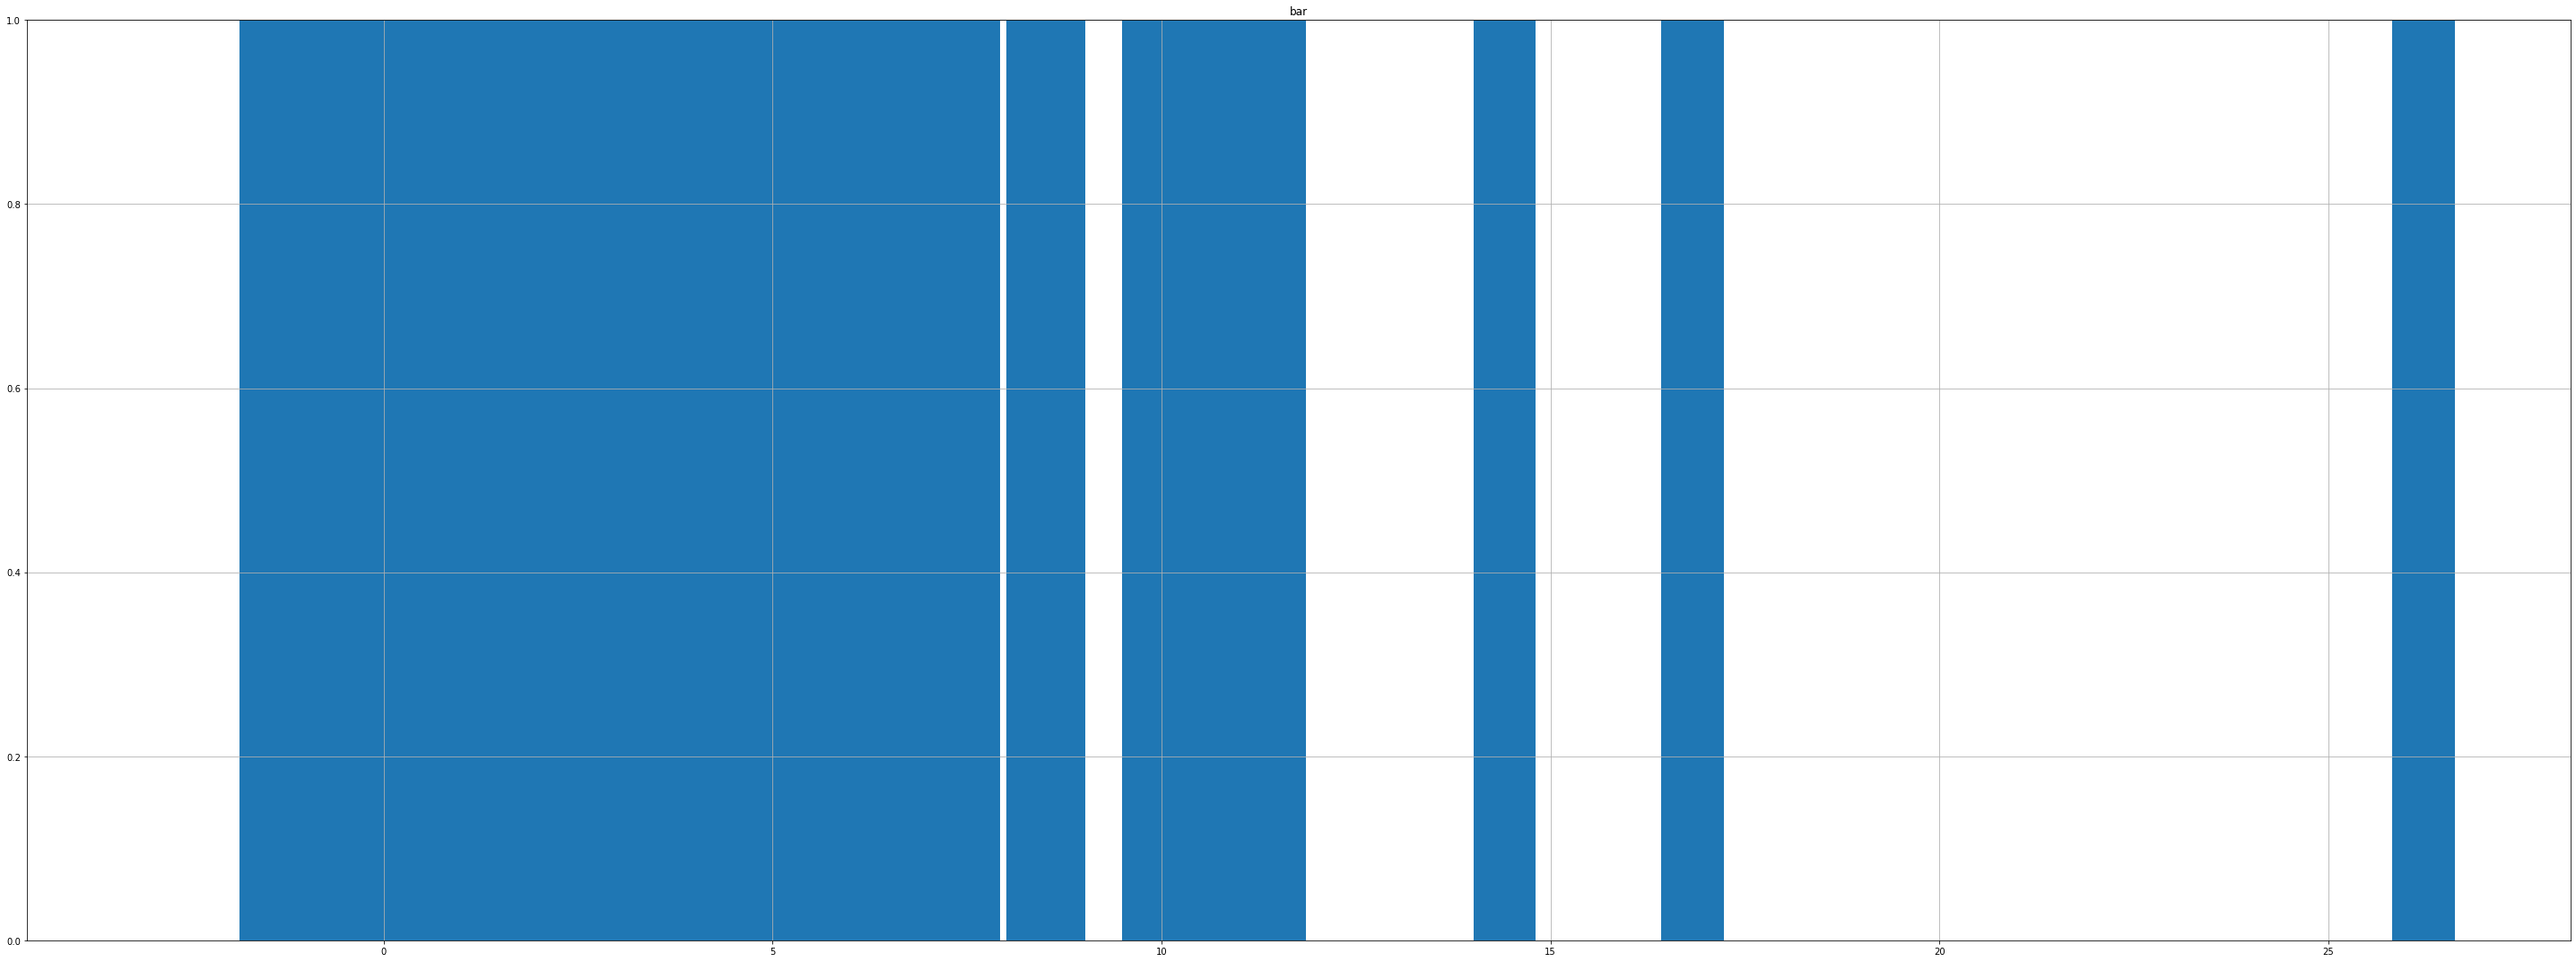

         day         y
0   0.032258  0.281938
1   0.064516  0.143923
2   0.096774  0.141333
3   0.129032  0.156156
4   0.161290  0.109091
5   0.193548  0.097273
6   0.225806  0.083596
7   0.258065  0.108386
8   0.290323  0.105166
9   0.322581  0.225275
10  0.354839  0.126108
11  0.387097  0.153218
12  0.419355  0.143243
13  0.451613  0.116954
14  0.483871  0.147183
15  0.516129  0.133663
16  0.548387  0.098446
17  0.580645  0.101674
18  0.612903  0.069501
19  0.645161  0.070926
20  0.677419  0.098955
21  0.709677  0.186747
22  0.741935  0.129909
23  0.774194  0.137500
24  0.806452  0.160684
25  0.838710  0.108069
26  0.870968  0.112694
27  0.903226  0.082562
28  0.935484  0.066613
29  0.967742  0.182648
30  1.000000  0.080717


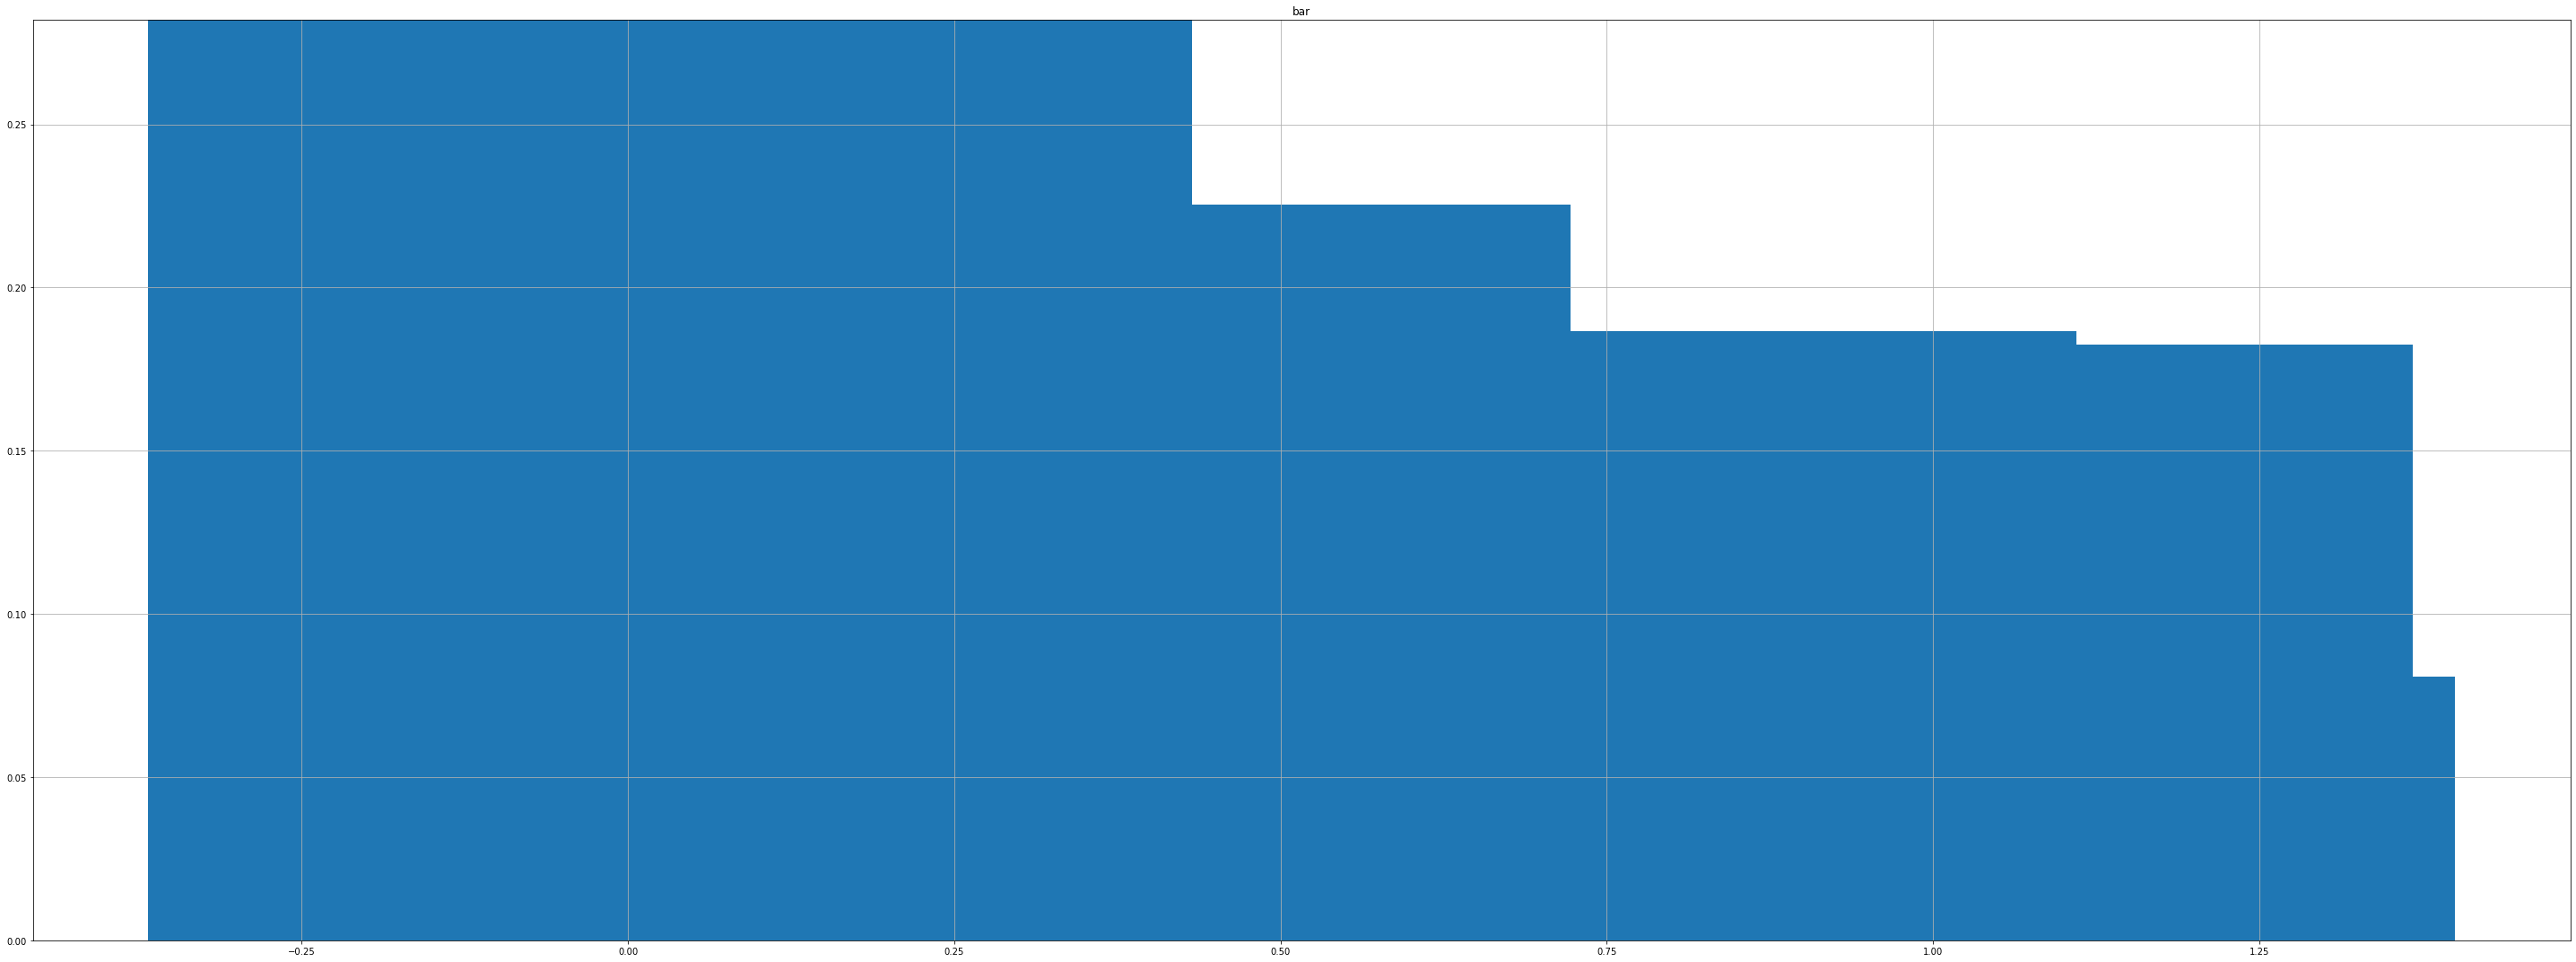

      duration    y
0    -5.610425  0.0
1    -4.858493  0.0
2    -4.418641  0.0
3    -4.106561  0.0
4    -3.864493  0.0
...        ...  ...
1450  3.185878  0.0
1451  3.218042  0.0
1452  3.327382  0.0
1453  3.354546  1.0
1454  3.611380  0.0

[1455 rows x 2 columns]


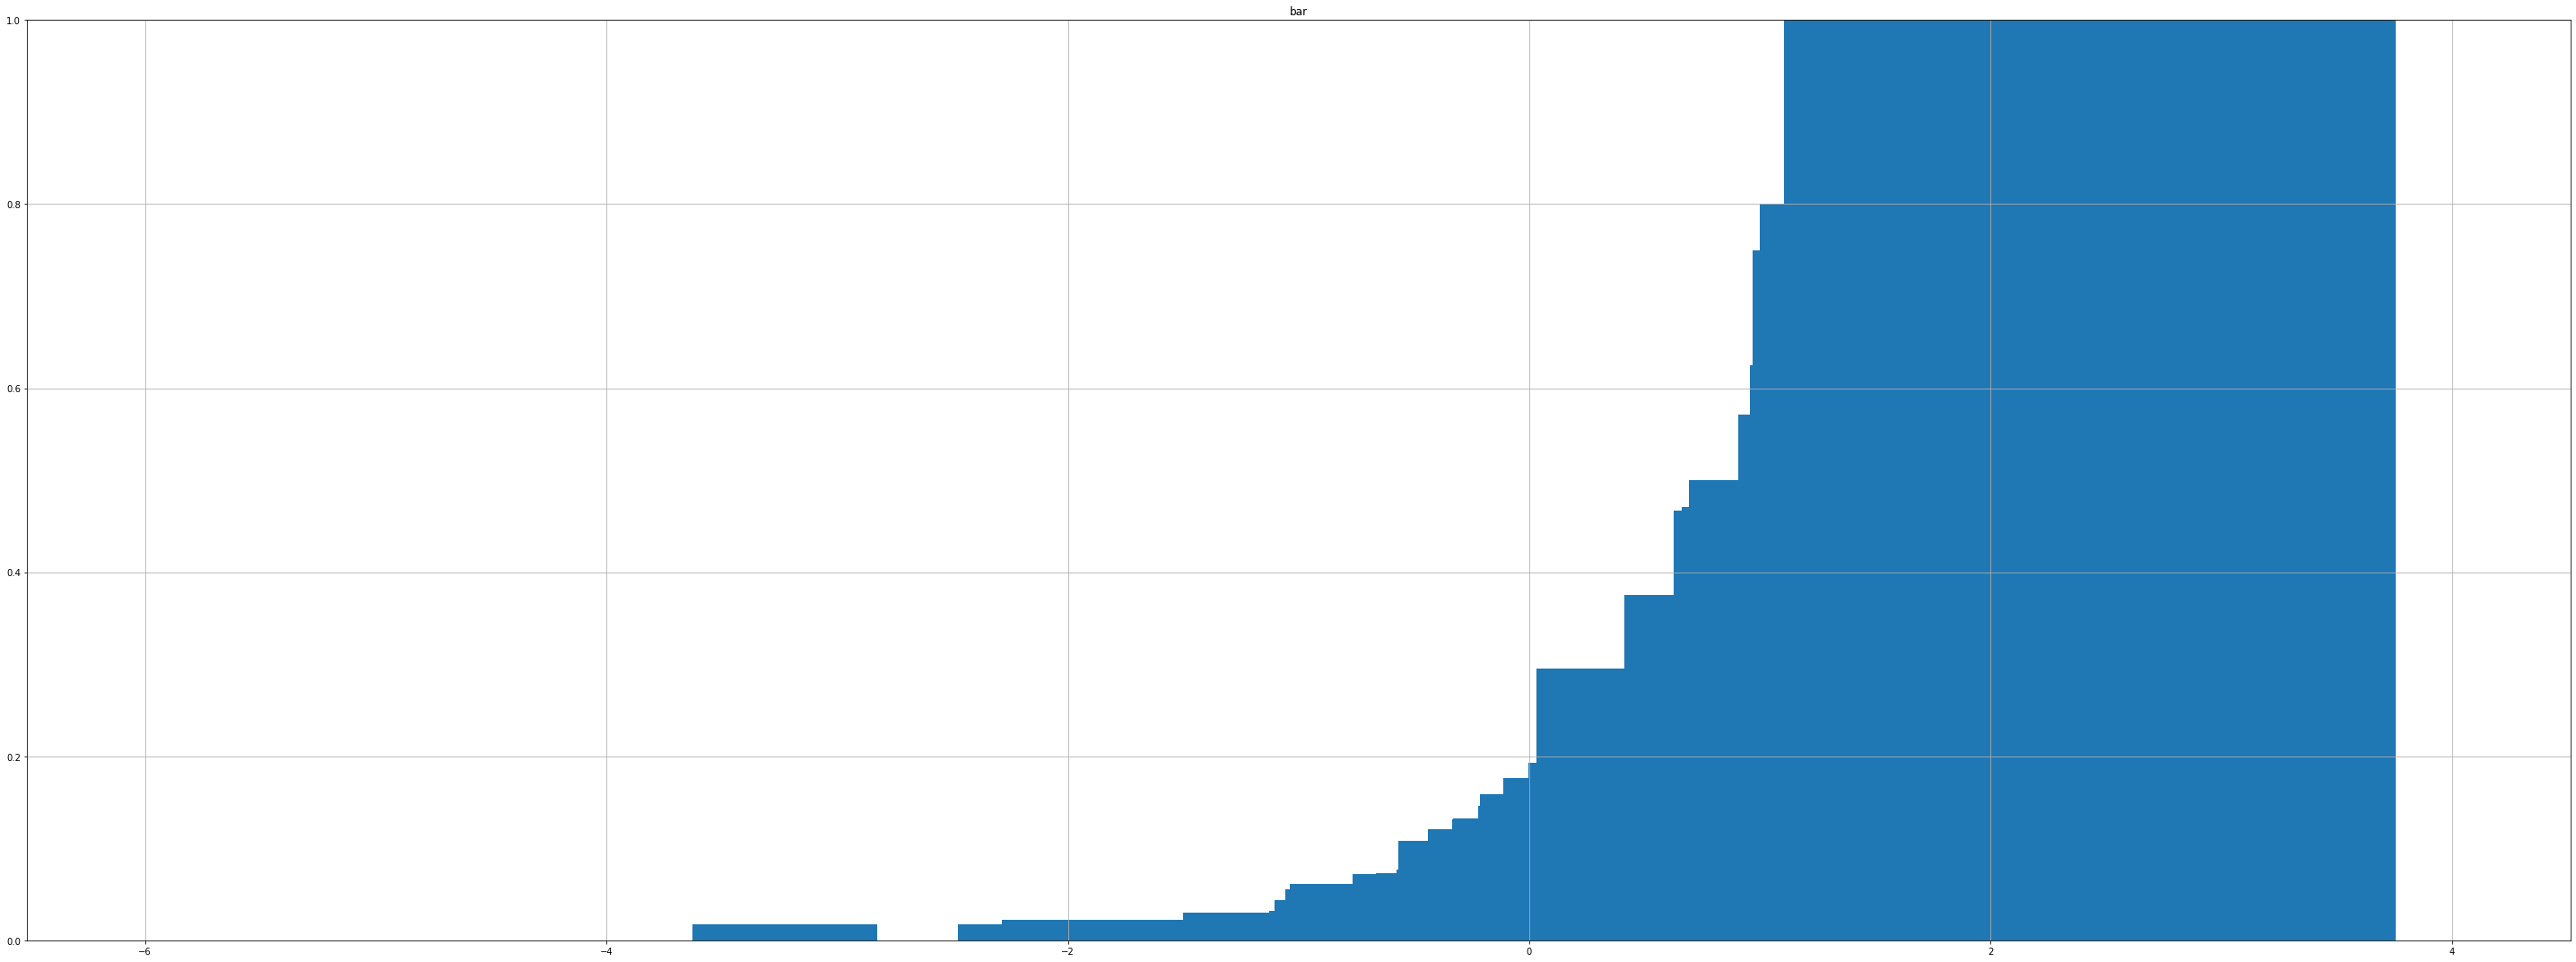

     campaign         y
0   -0.569344  0.143541
1   -0.246558  0.113634
2    0.076229  0.112186
3    0.399016  0.092524
4    0.721803  0.080607
5    1.044589  0.069663
6    1.367376  0.070240
7    1.690163  0.053476
8    2.012949  0.068966
9    2.335736  0.049180
10   2.658523  0.067669
11   2.981310  0.017094
12   3.304096  0.041667
13   3.626883  0.015873
14   3.949670  0.035714
15   4.272456  0.037736
16   4.595243  0.078431
17   4.918030  0.000000
18   5.240817  0.000000
19   5.563603  0.000000
20   5.886390  0.041667
21   6.209177  0.000000
22   6.531964  0.000000
23   6.854750  0.058824
24   7.177537  0.000000
25   7.500324  0.000000
26   7.823110  0.000000
27   8.145897  0.000000
28   8.468684  0.076923
29   8.791471  0.000000
30   9.114257  0.000000
31   9.437044  0.250000
32   9.759831  0.000000
33  10.082617  0.000000
34  10.405404  0.000000
35  10.728191  0.000000
36  11.050978  0.000000
37  11.373764  0.000000
38  11.696551  0.000000
39  12.342124  0.000000
40  12.987698  0

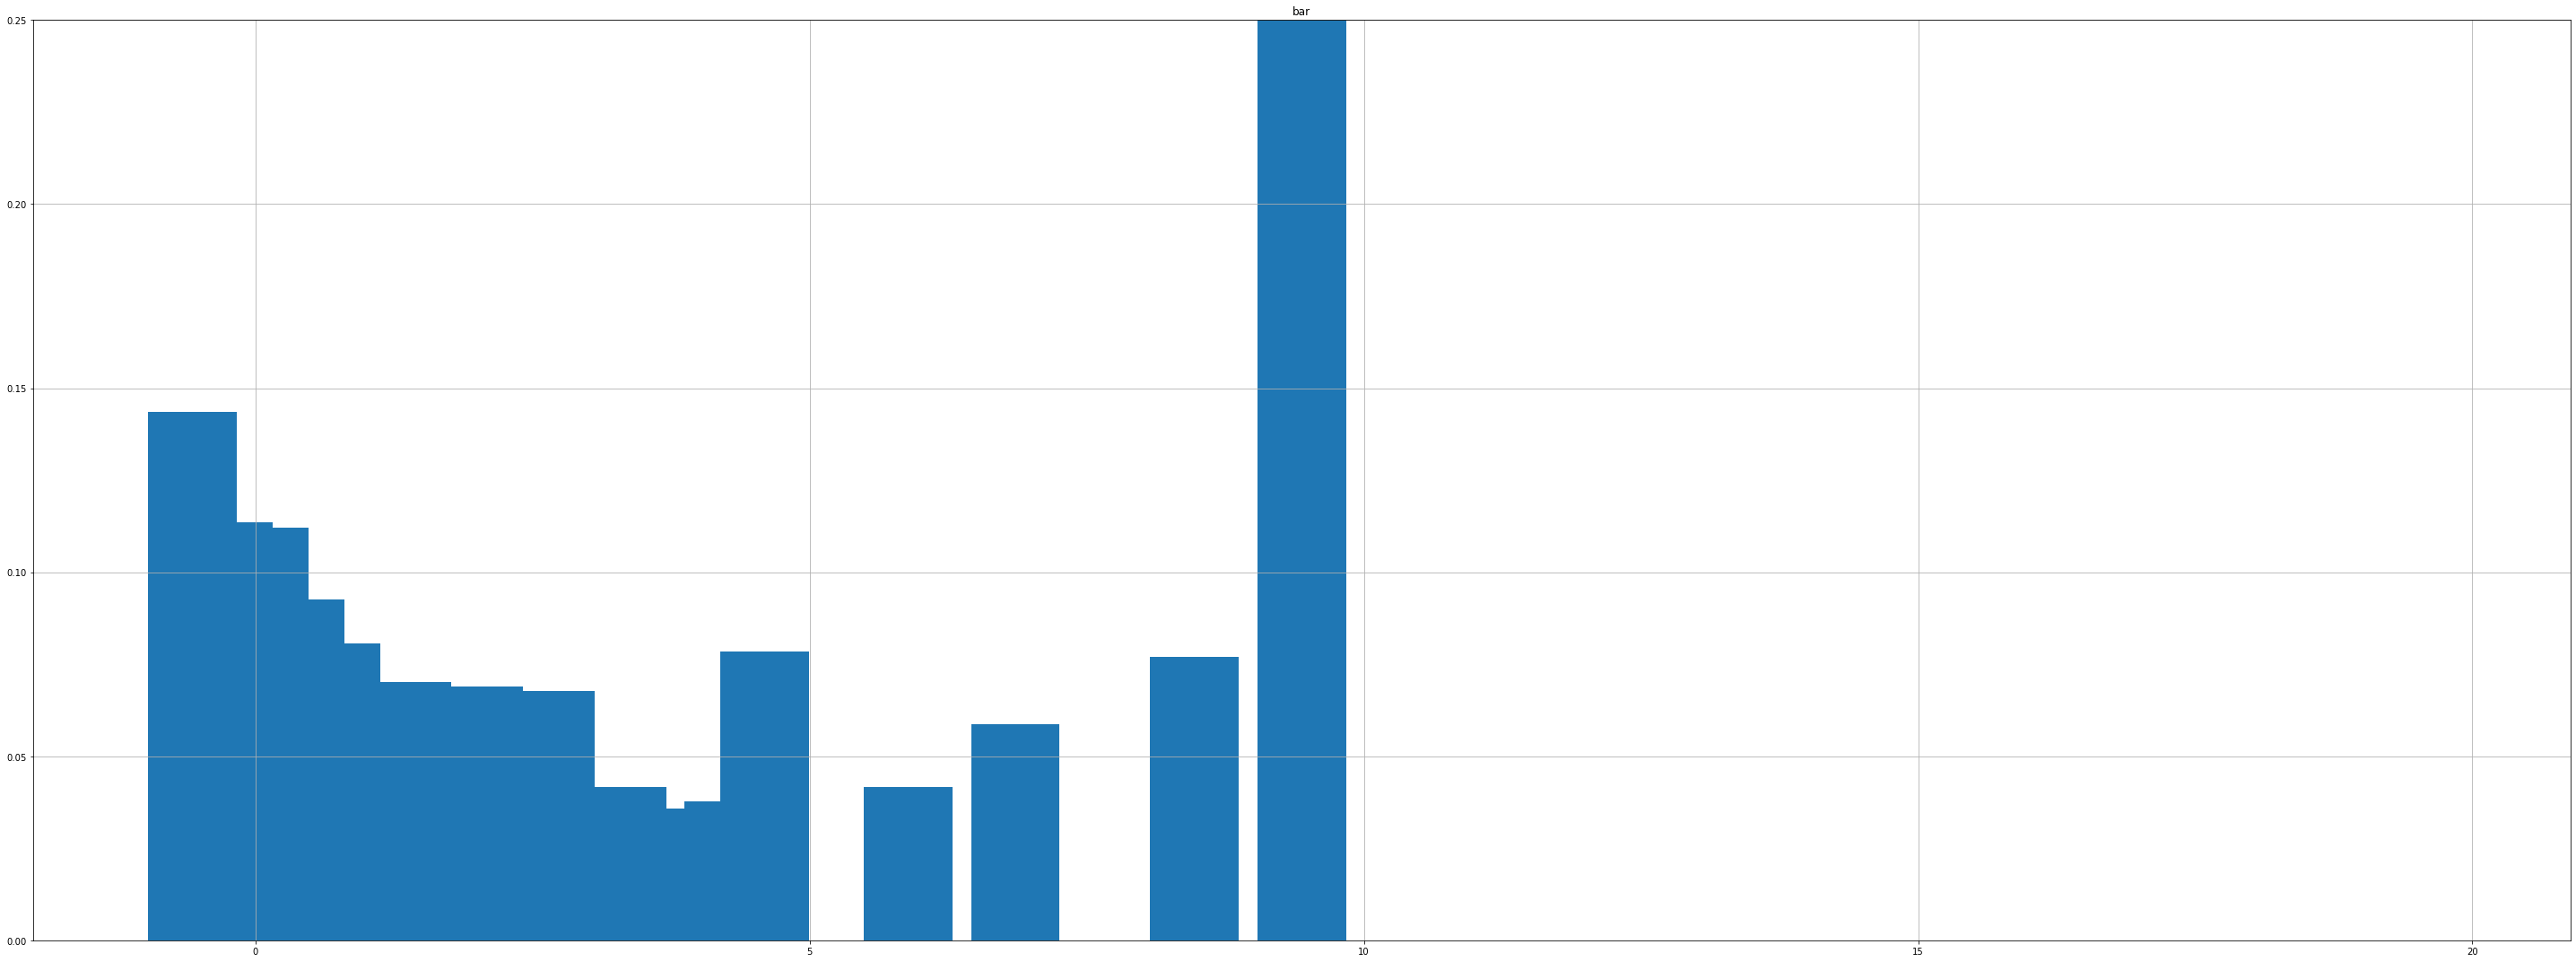

   job_admin.         y
0           0  0.116088
1           1  0.120789


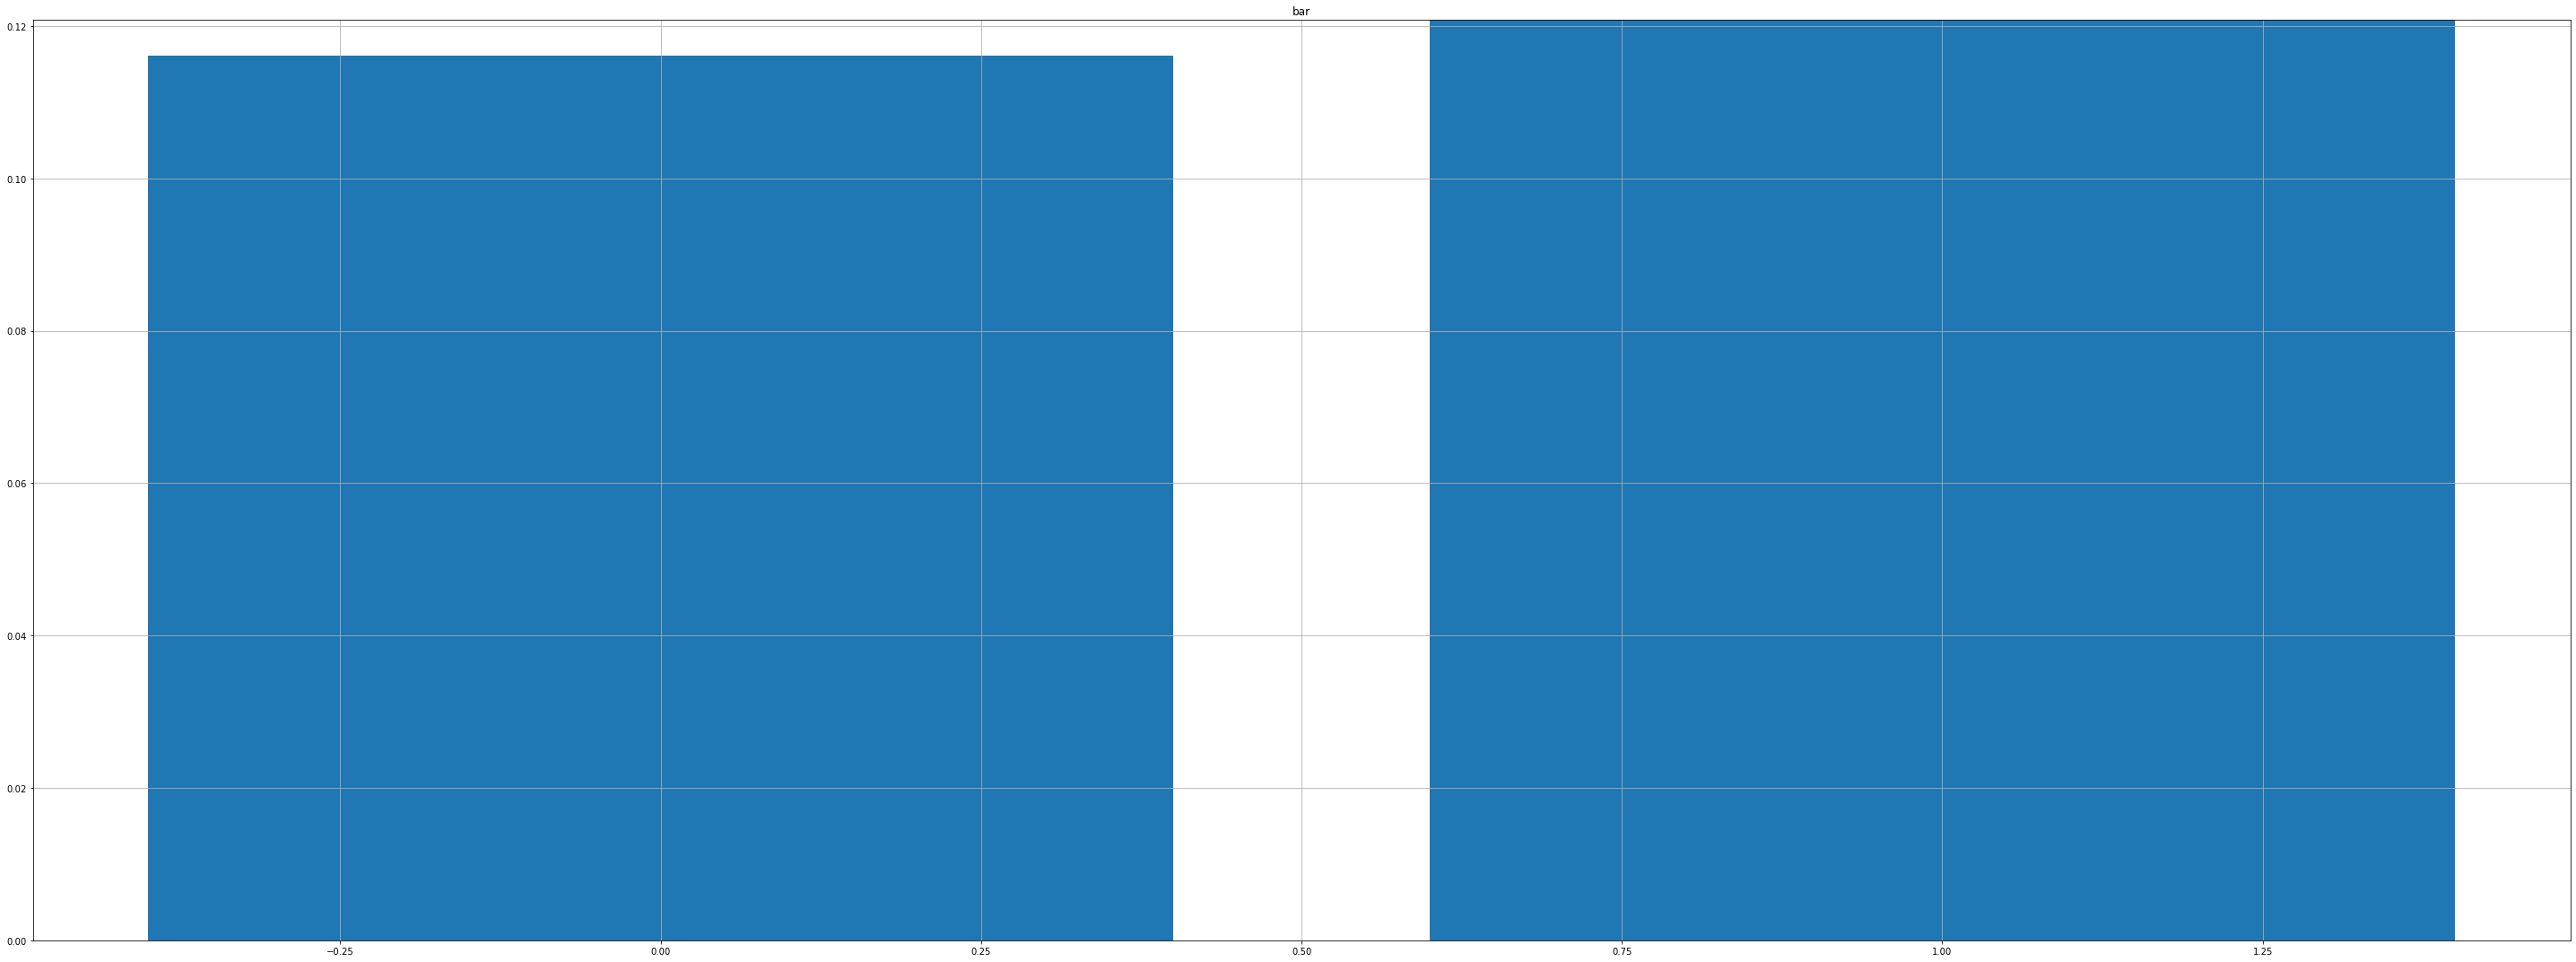

   job_blue-collar         y
0                0  0.128442
1                1  0.074117


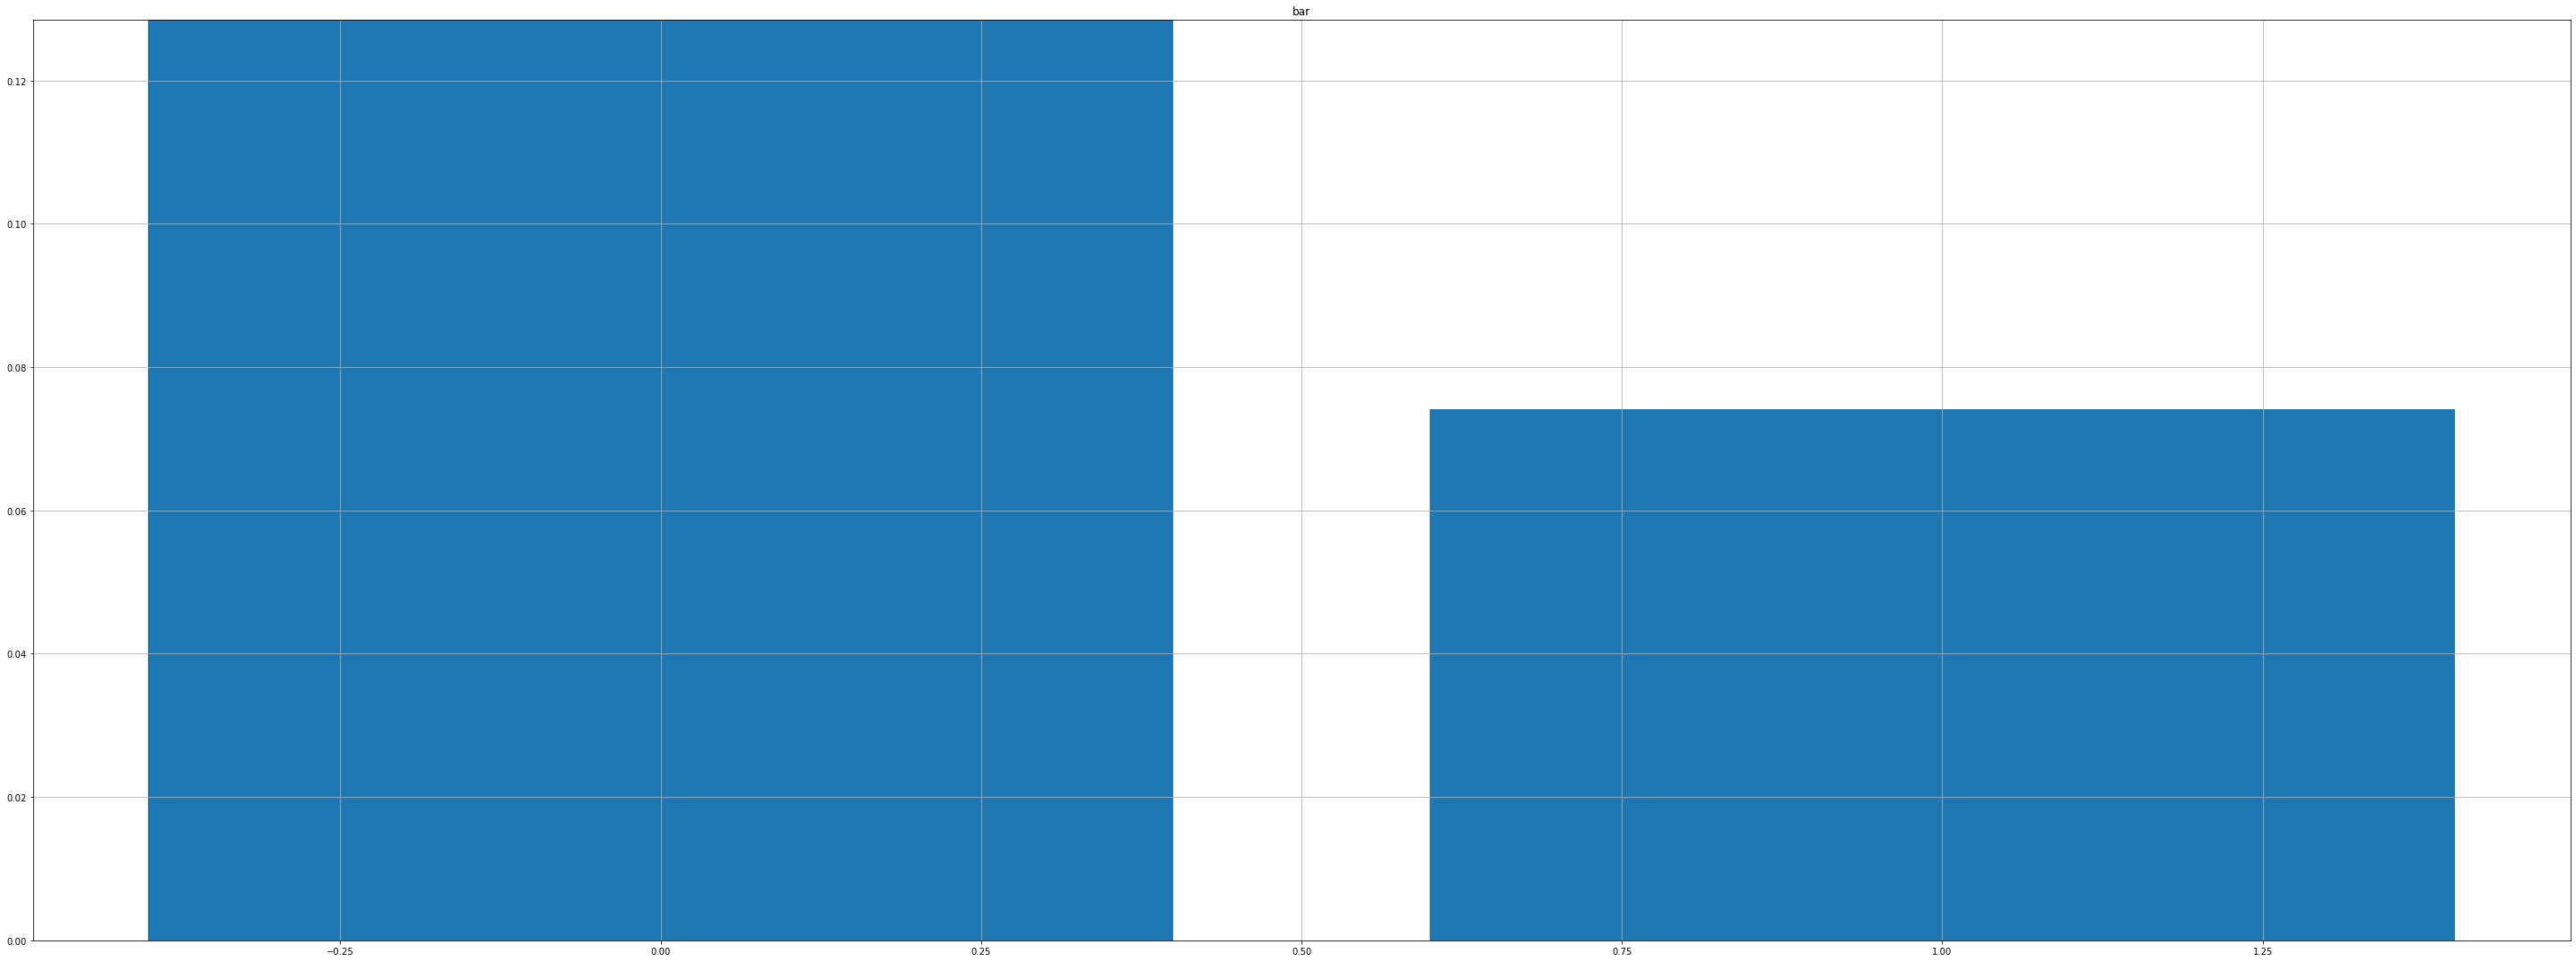

   job_entrepreneur         y
0                 0  0.117686
1                 1  0.086093


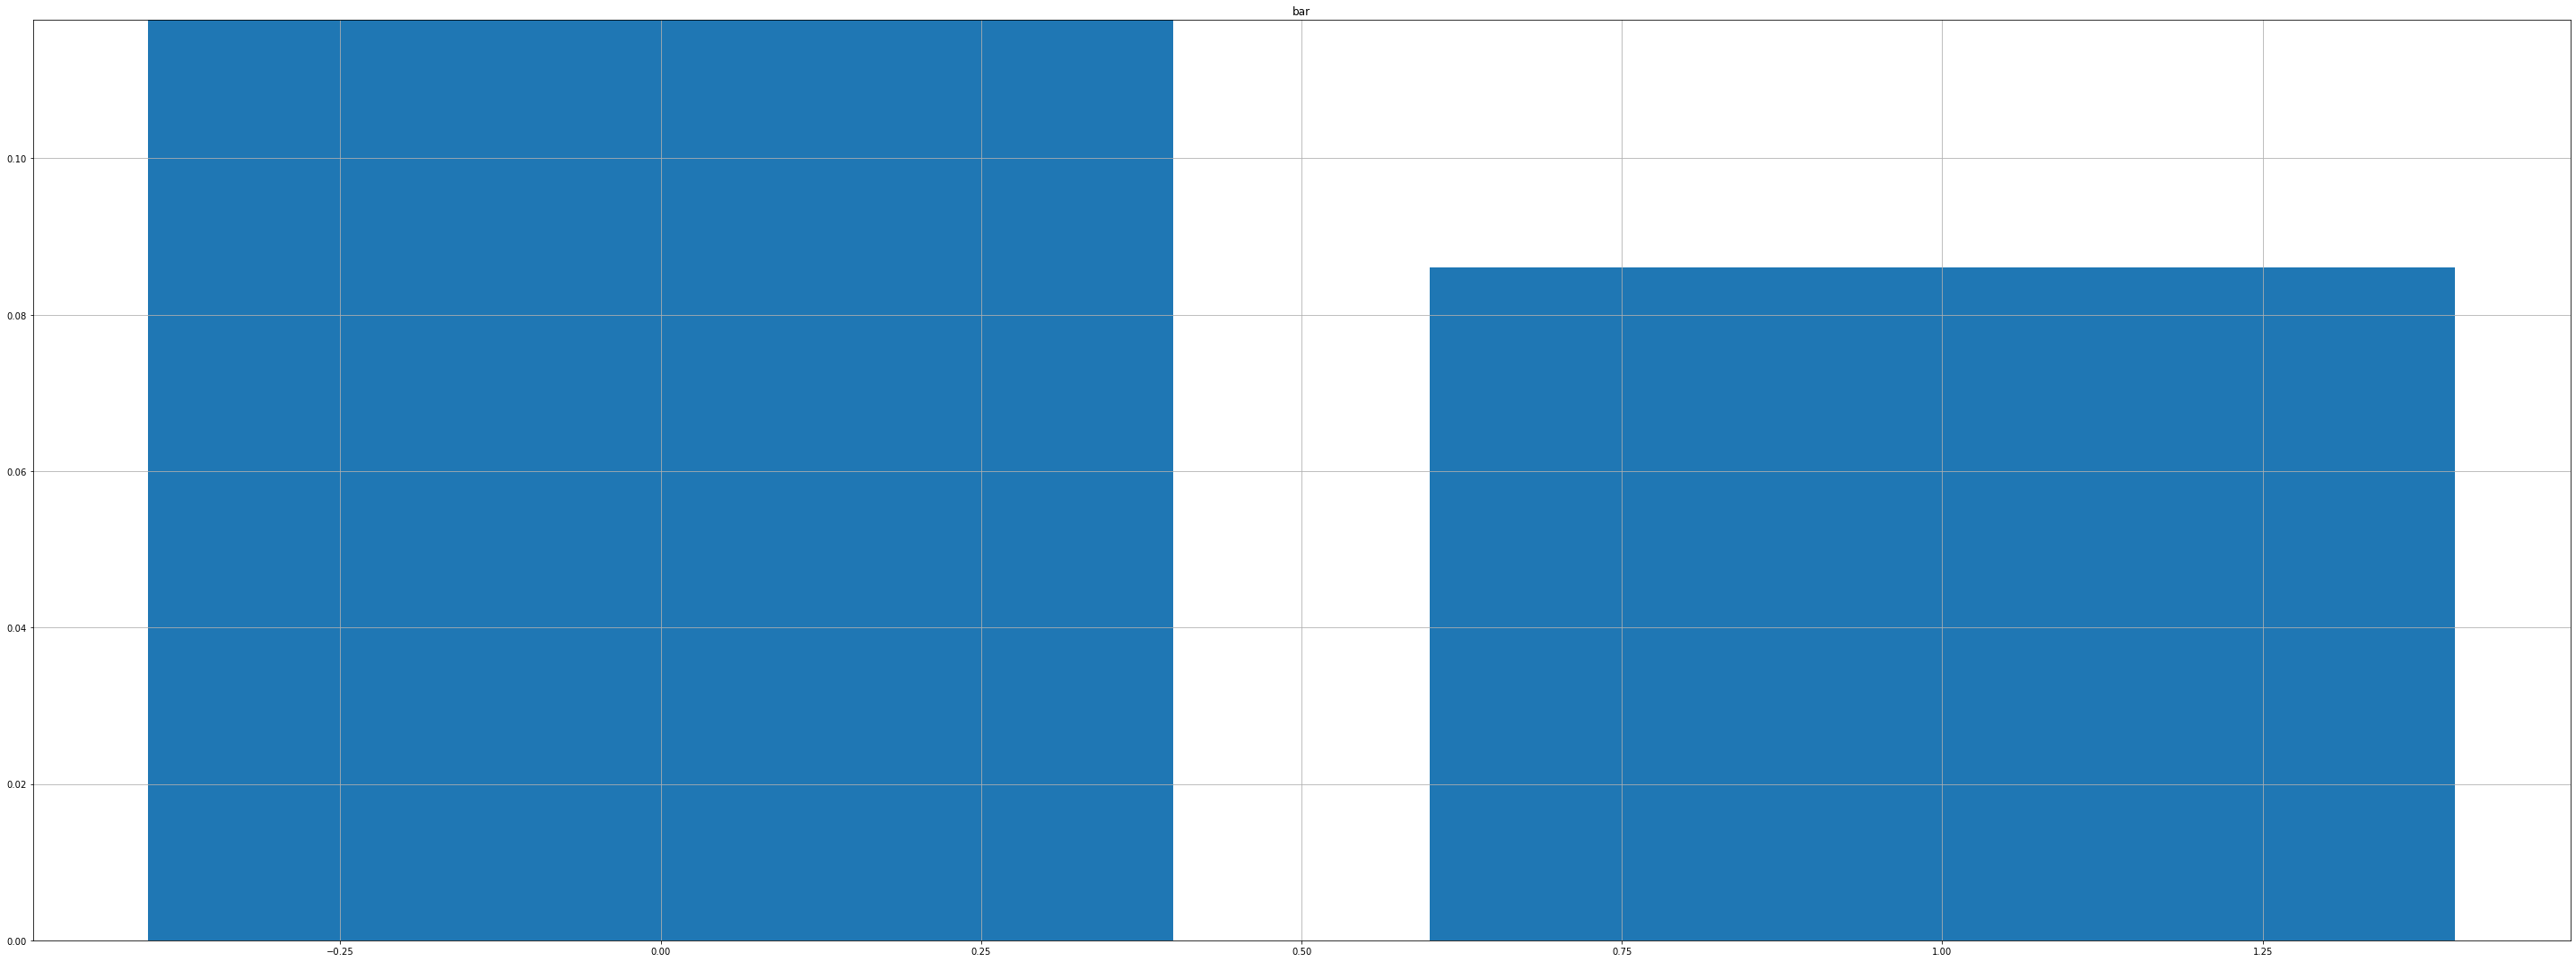

   job_housemaid         y
0              0  0.117249
1              1  0.095291


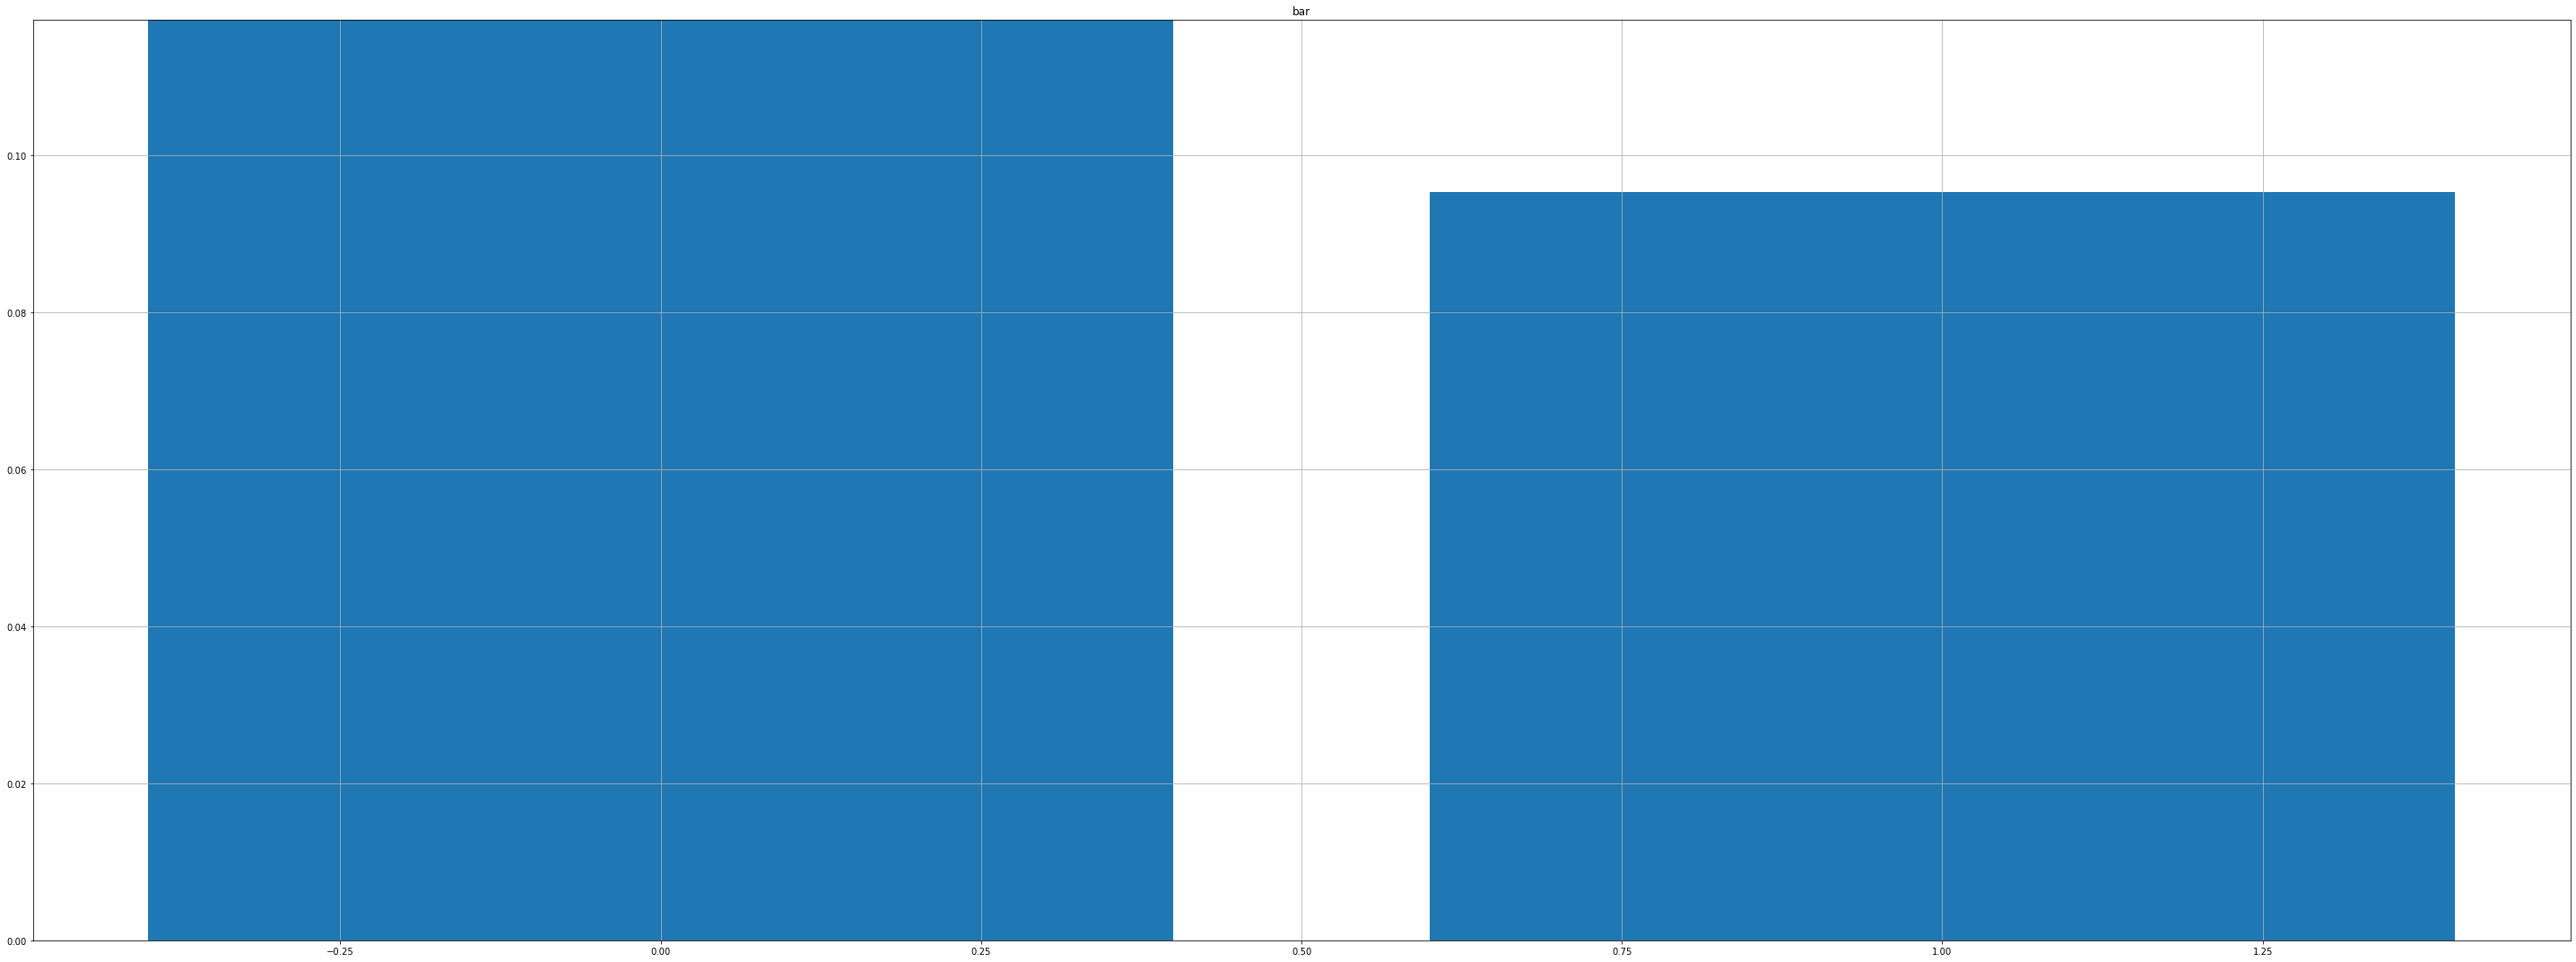

   job_management         y
0               0  0.111182
1               1  0.137350


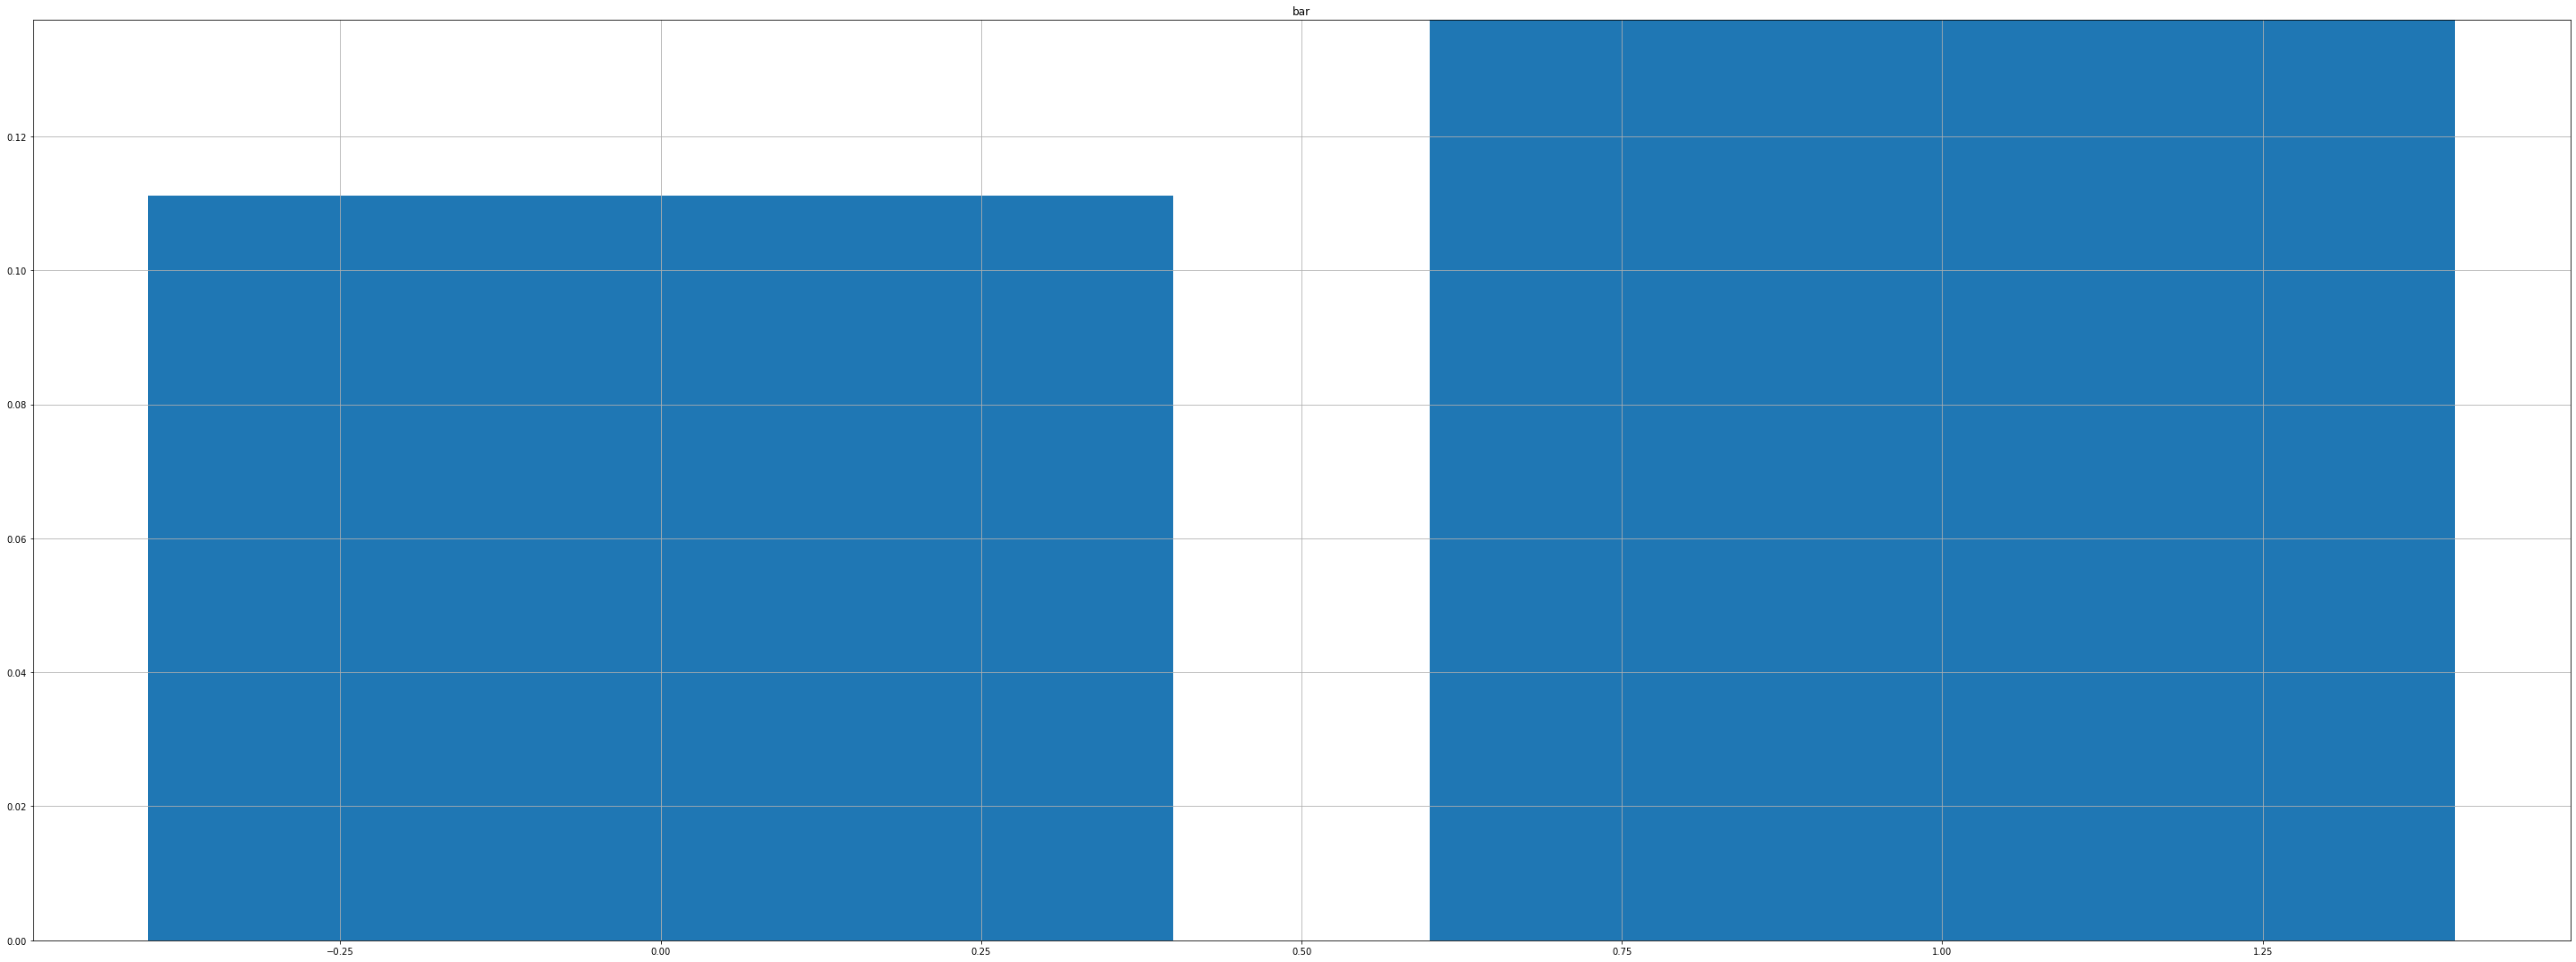

   job_retired         y
0            0  0.110974
1            1  0.221947


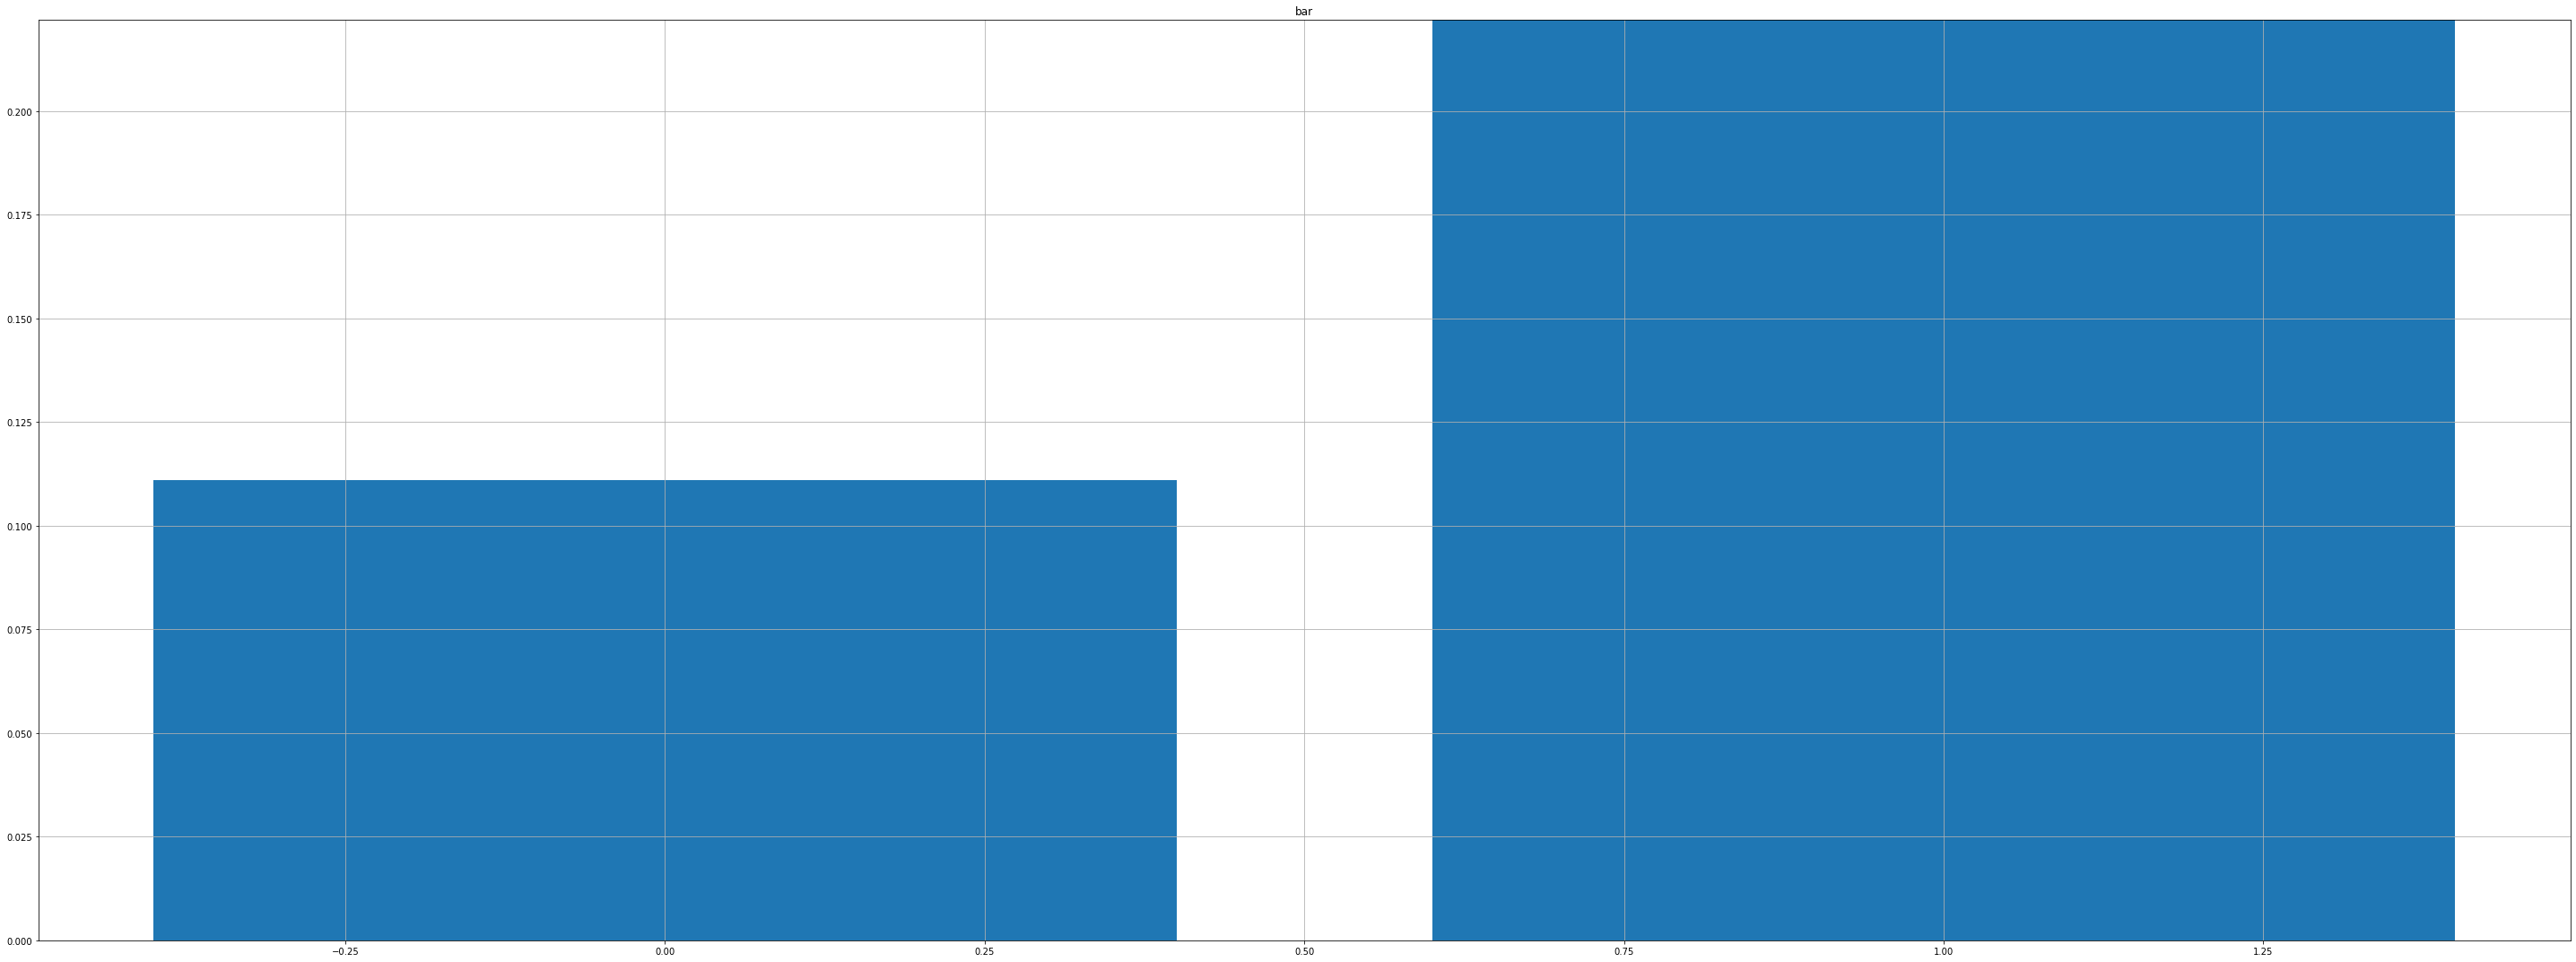

   job_self-employed         y
0                  0  0.116473
1                  1  0.120841


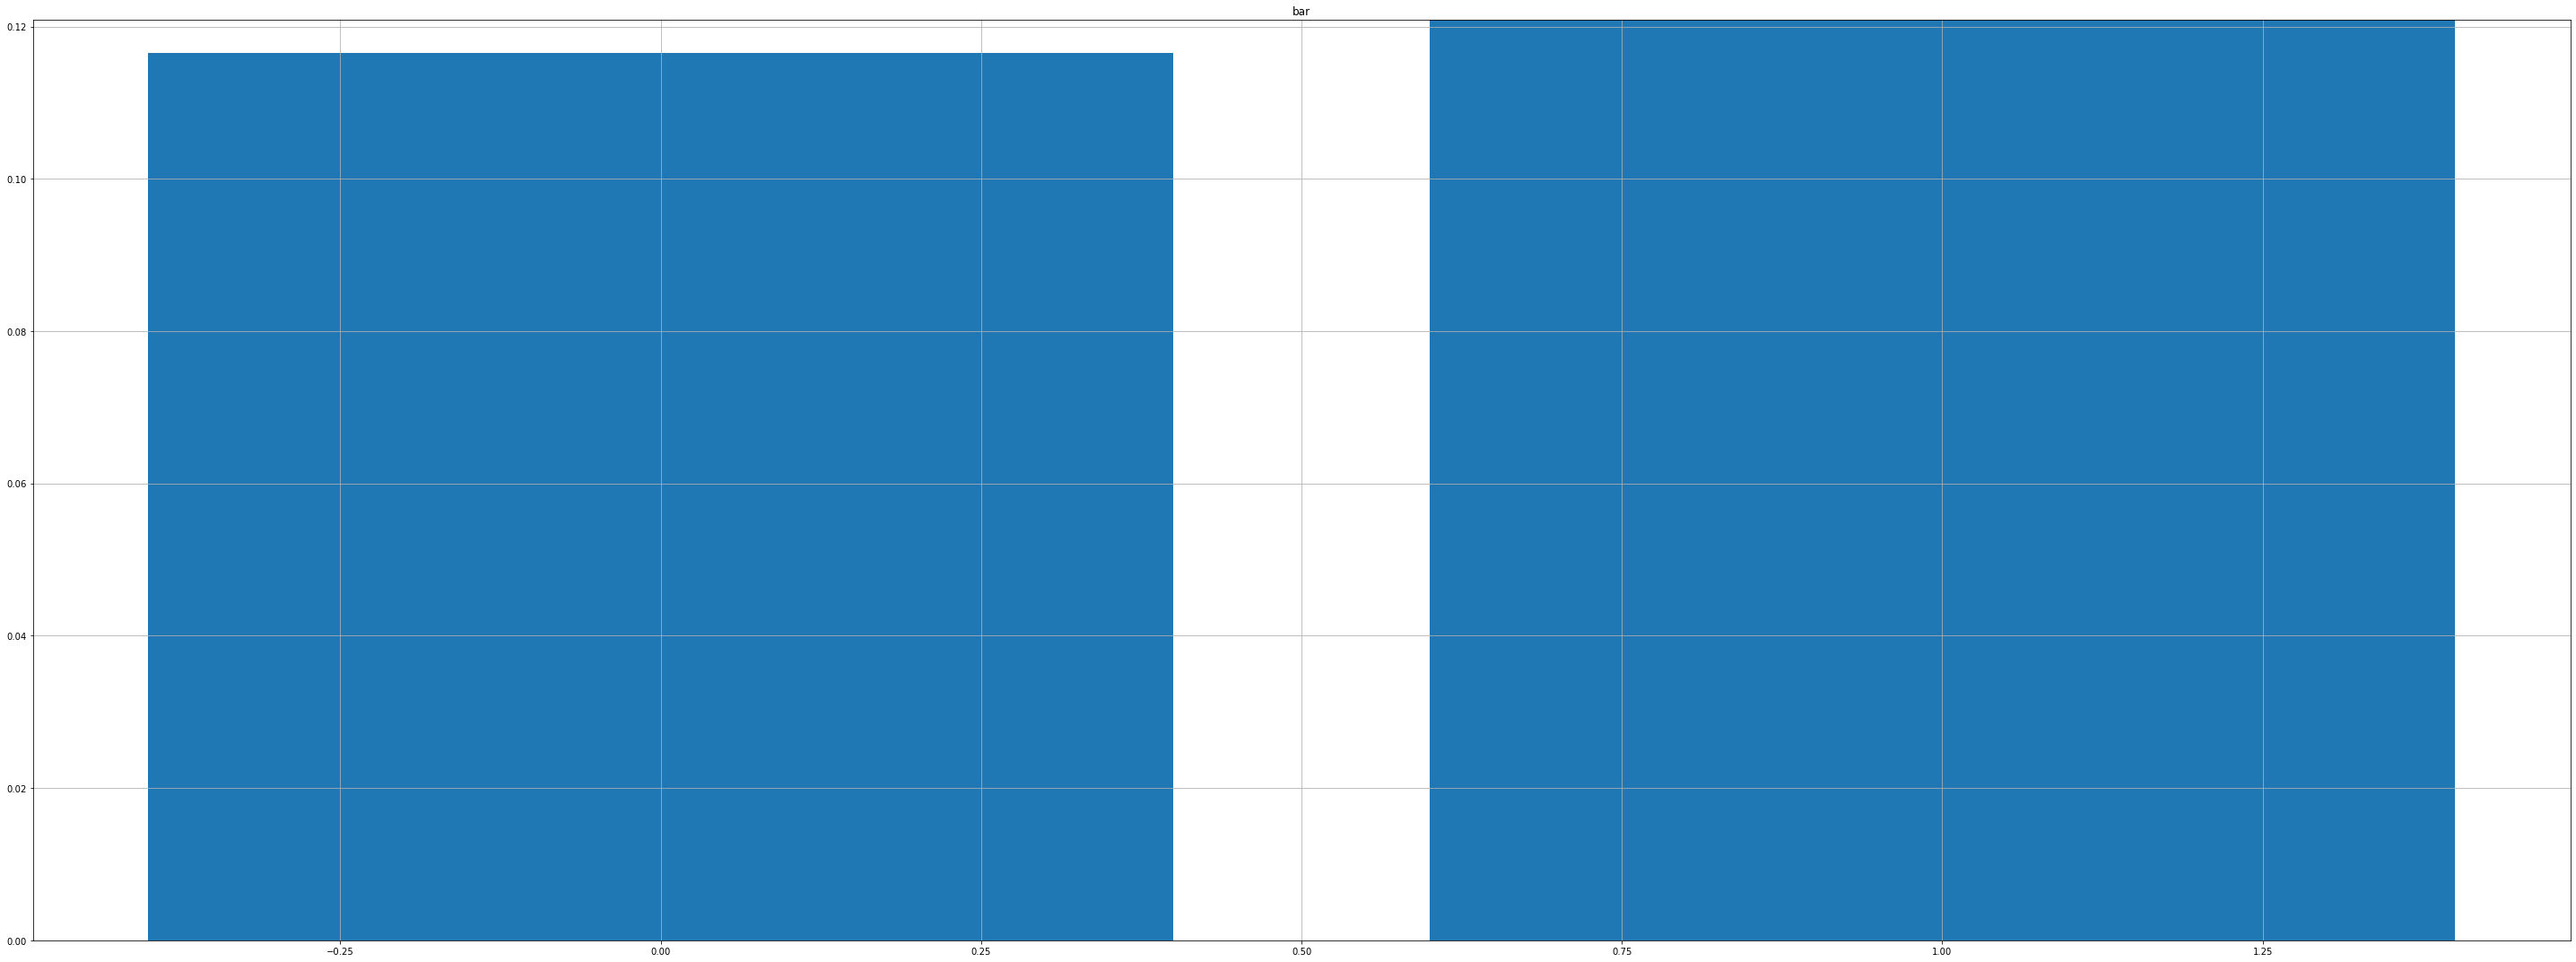

   job_services         y
0             0  0.119482
1             1  0.088608


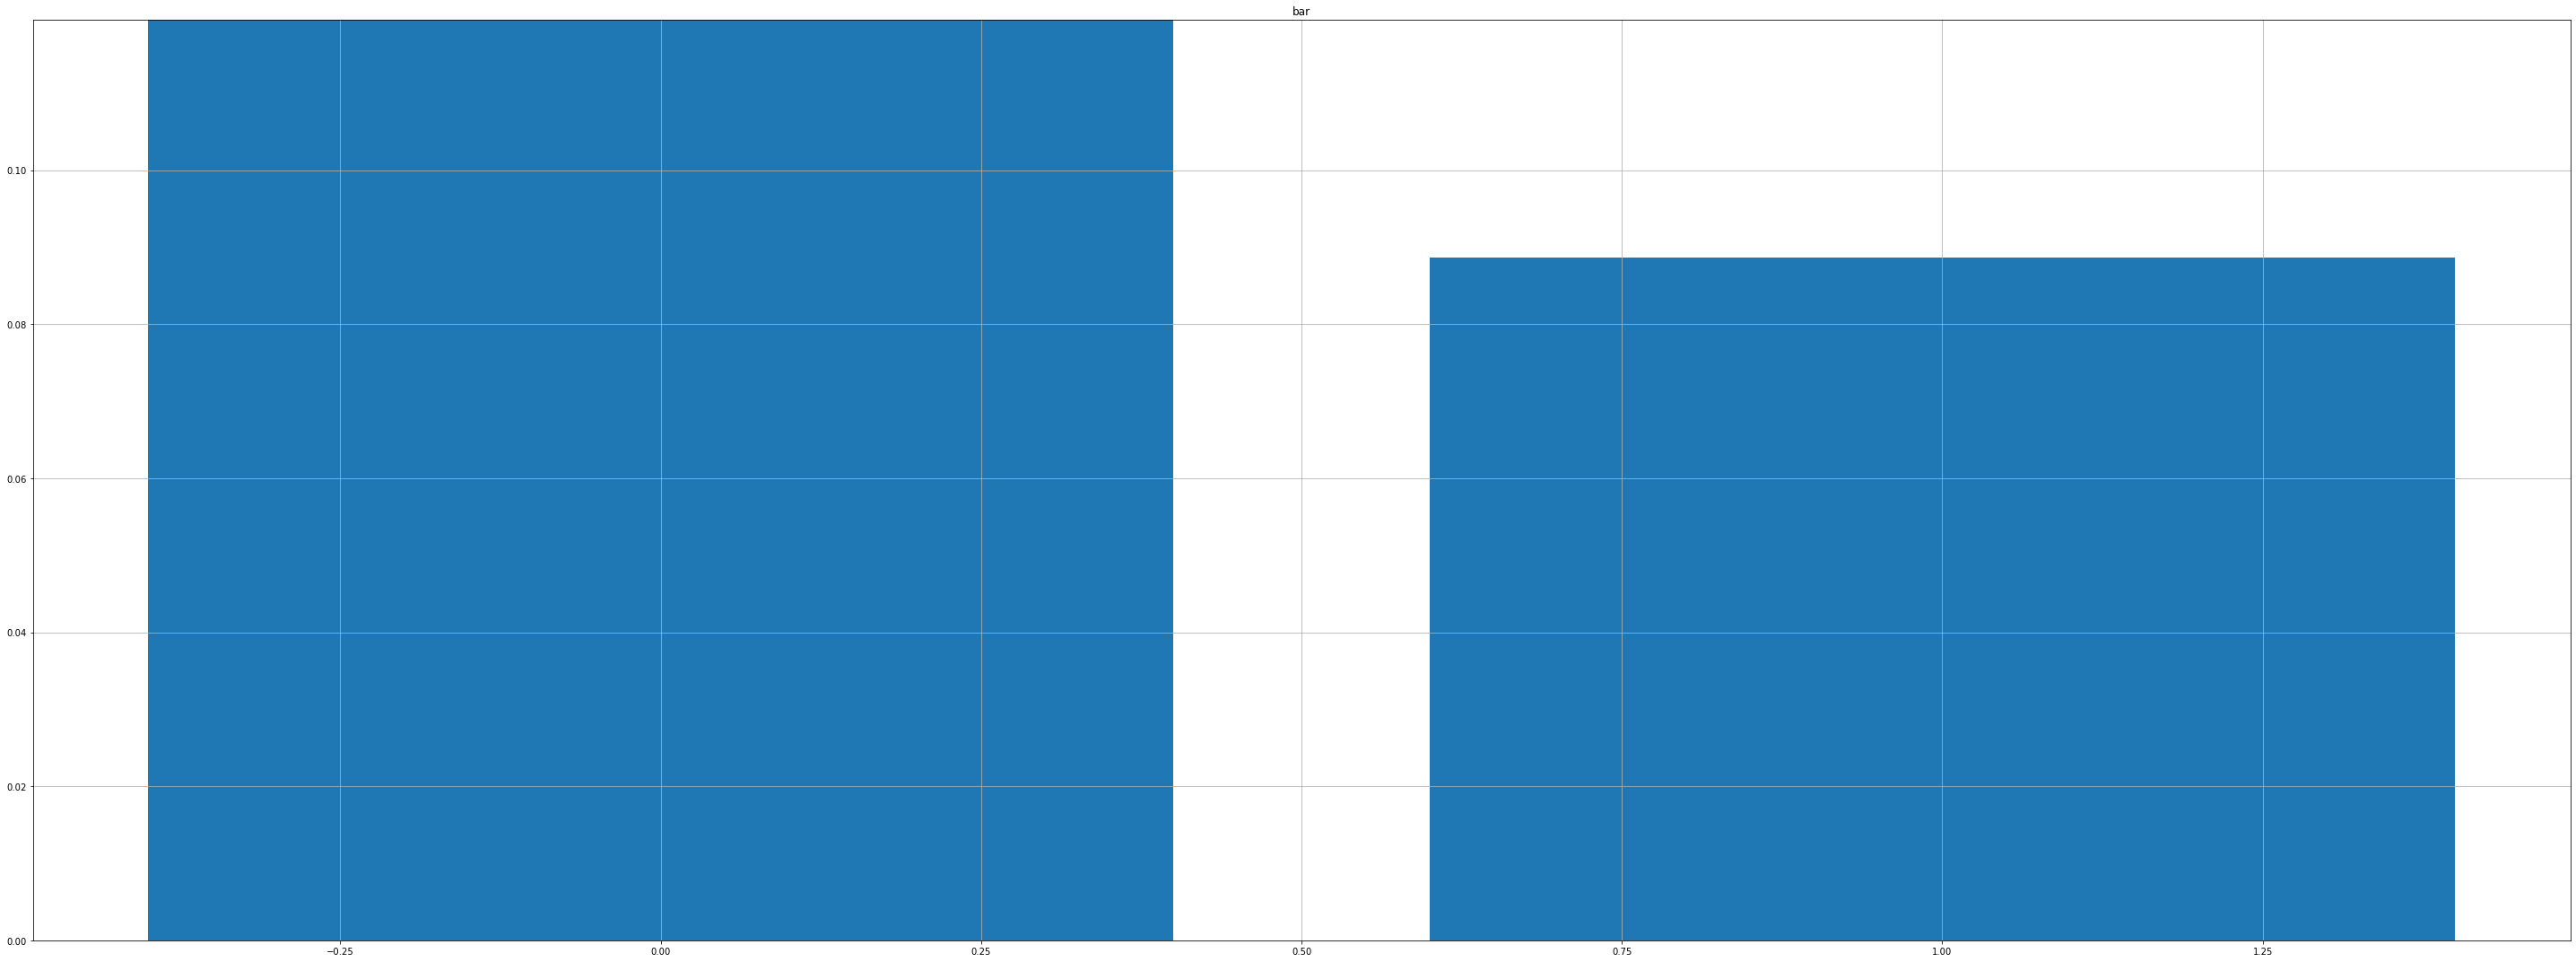

   job_student         y
0            0  0.113166
1            1  0.277778


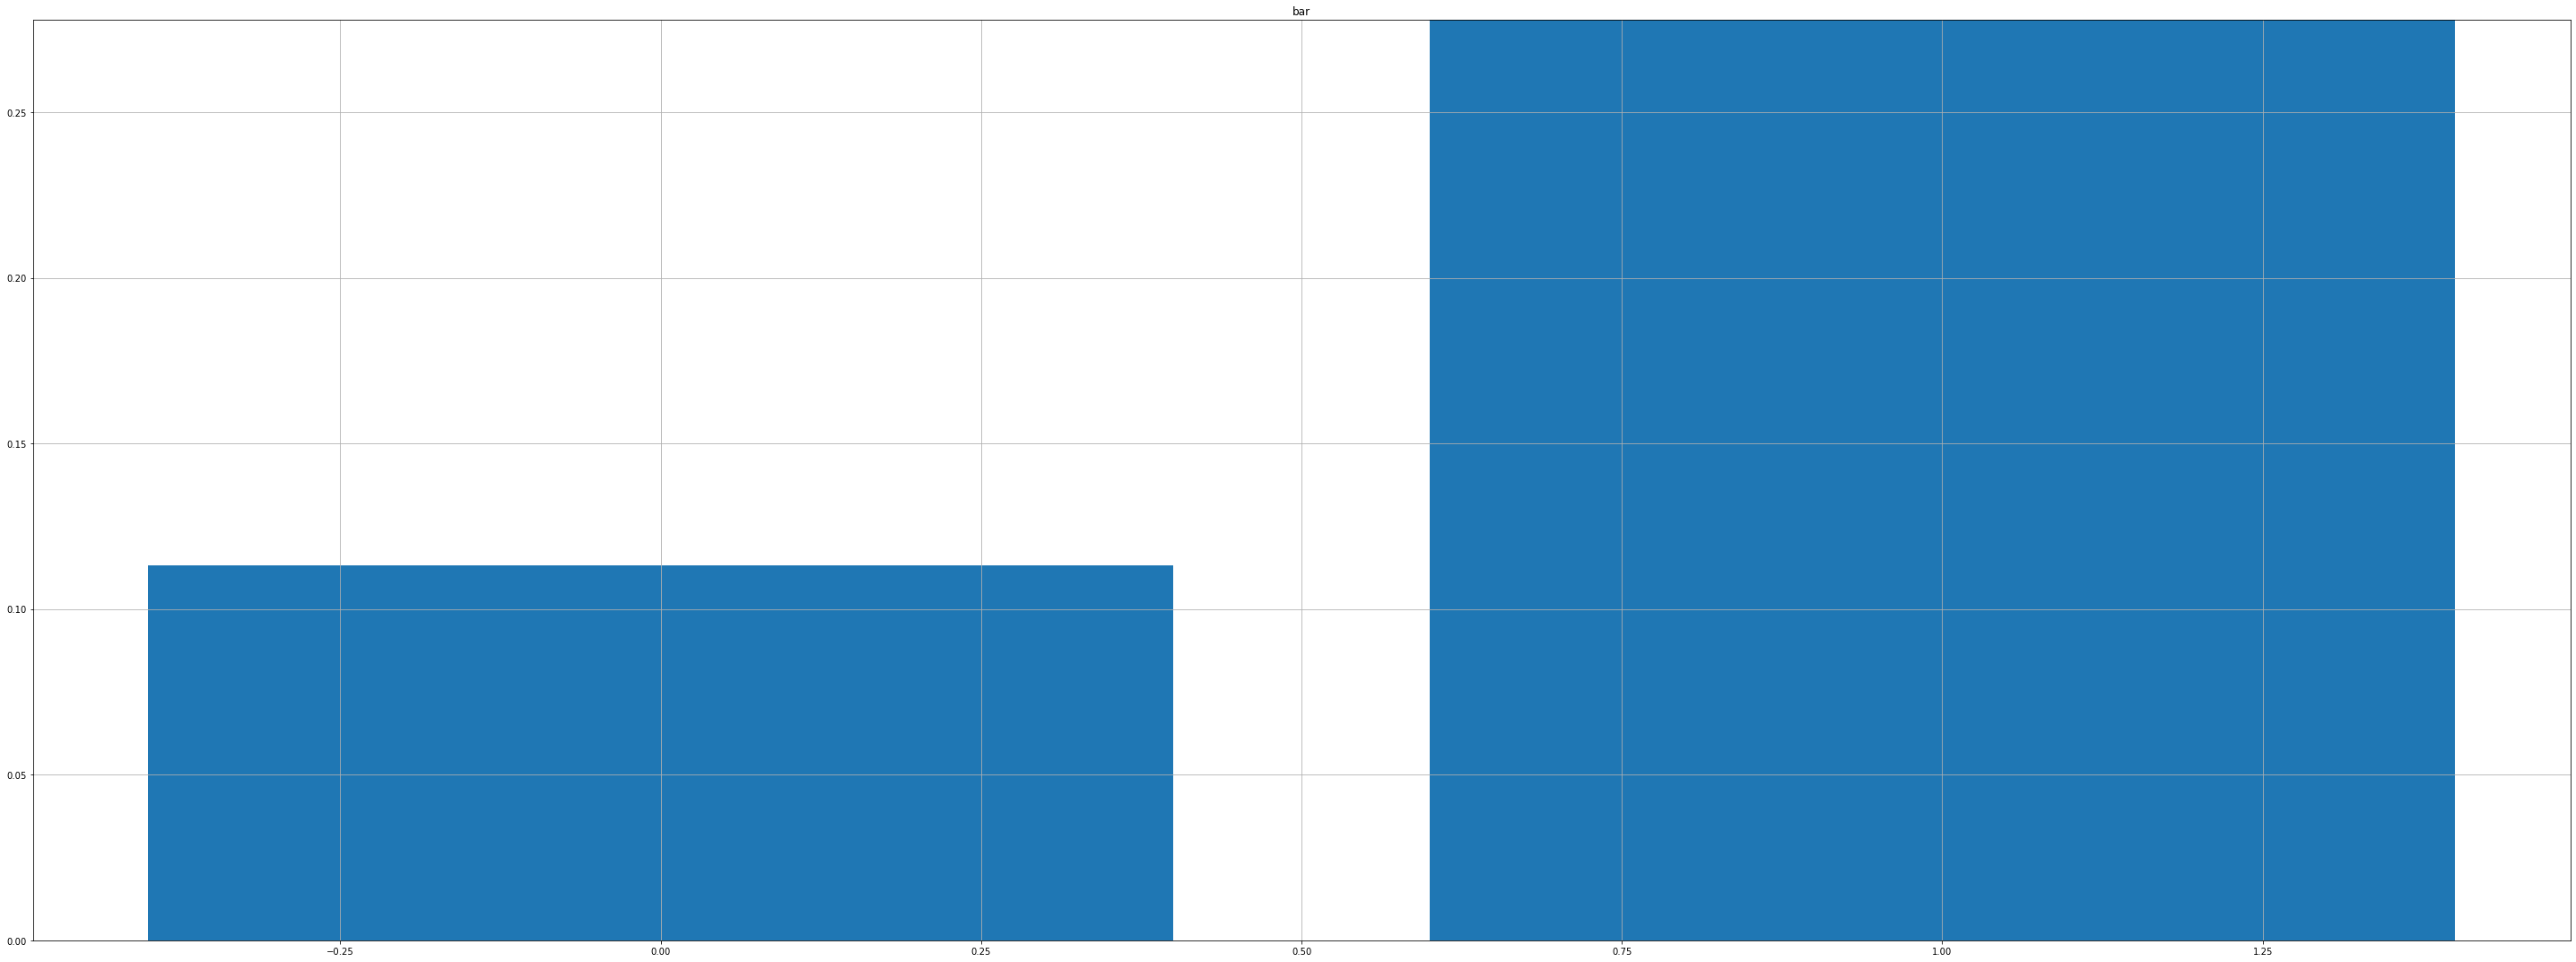

   job_technician         y
0               0  0.118566
1               1  0.107062


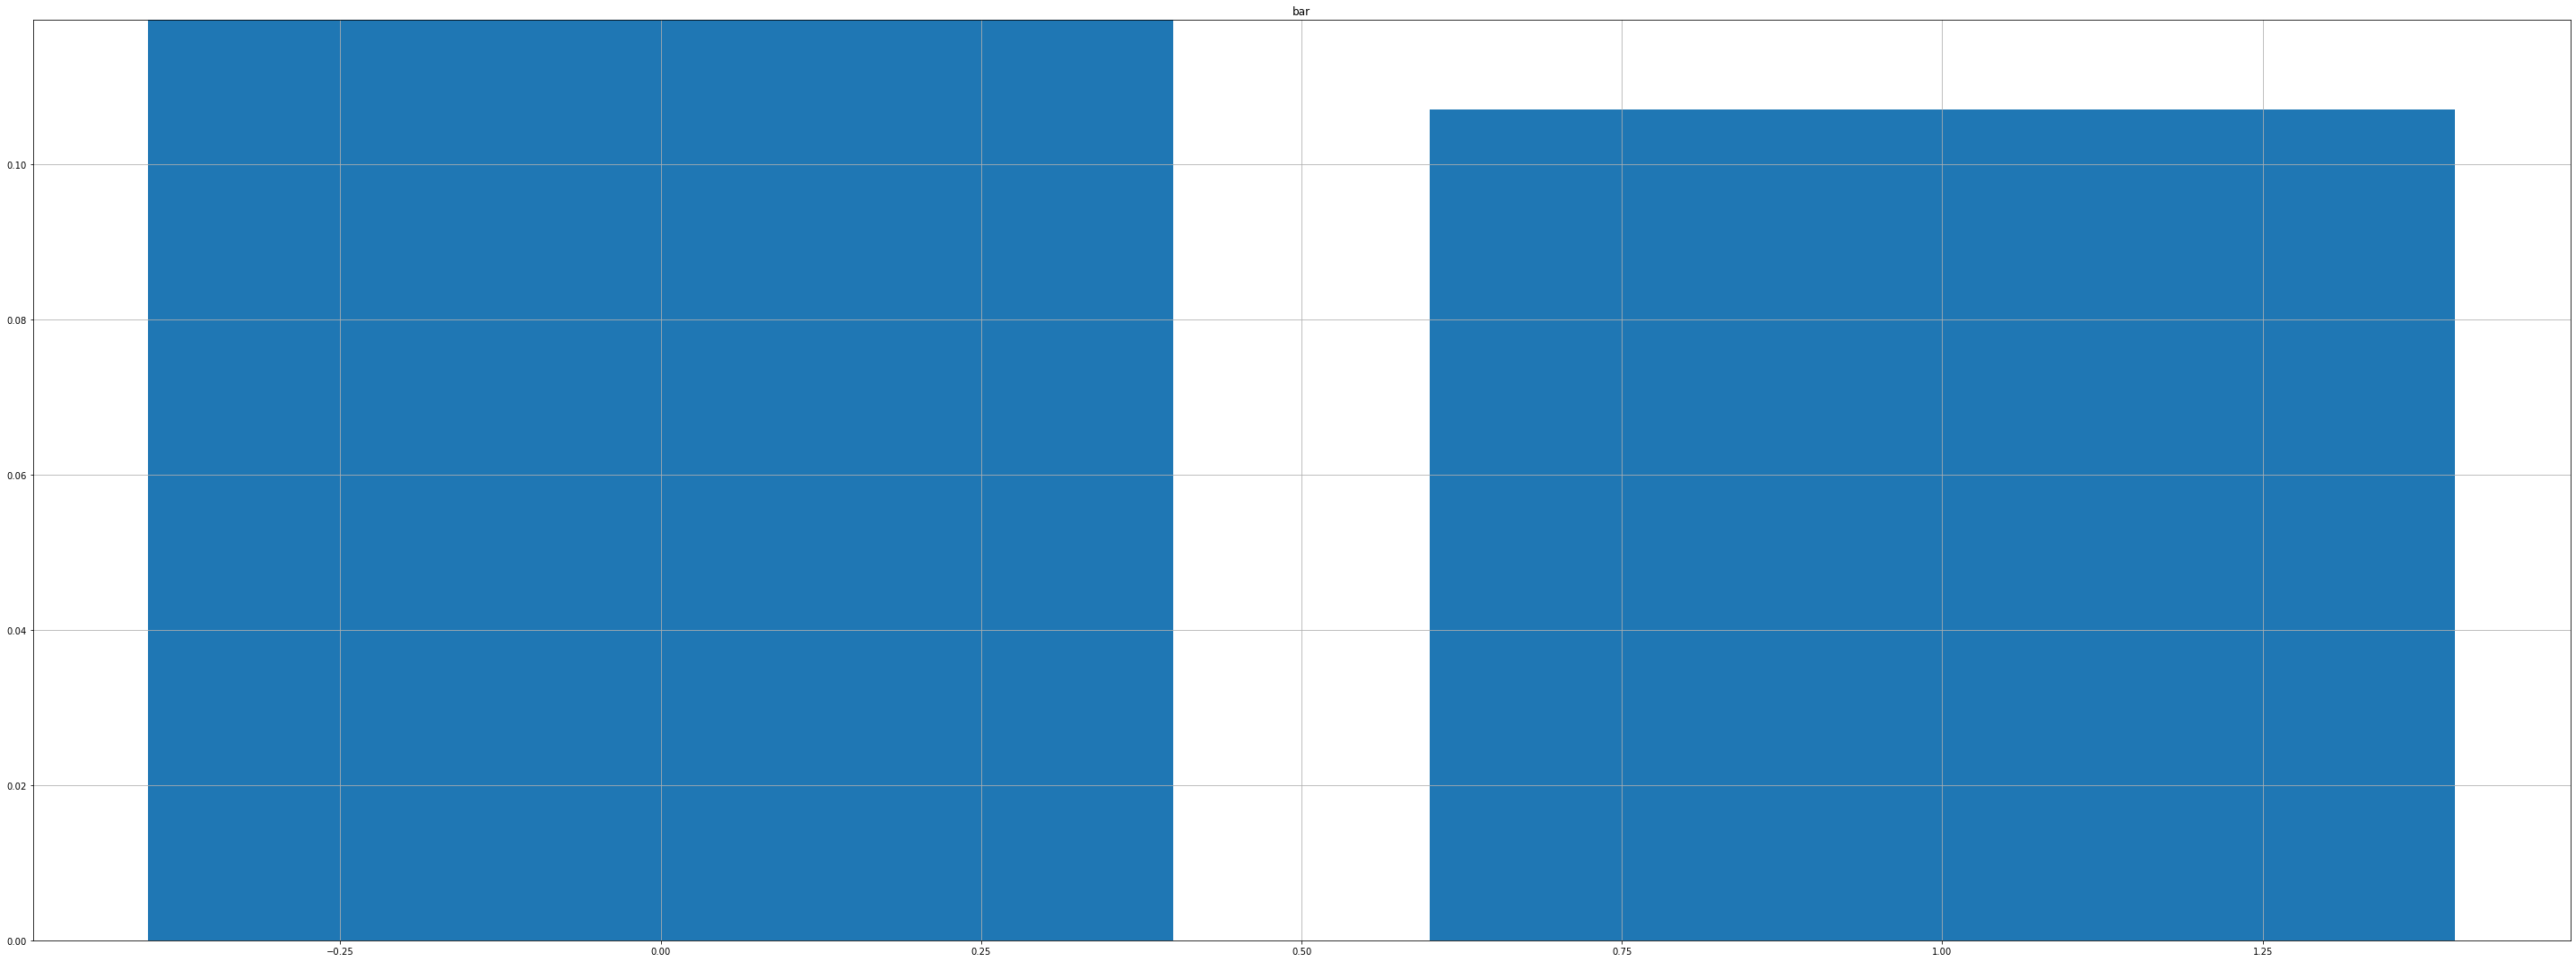

   job_unemployed         y
0               0  0.115232
1               1  0.163916


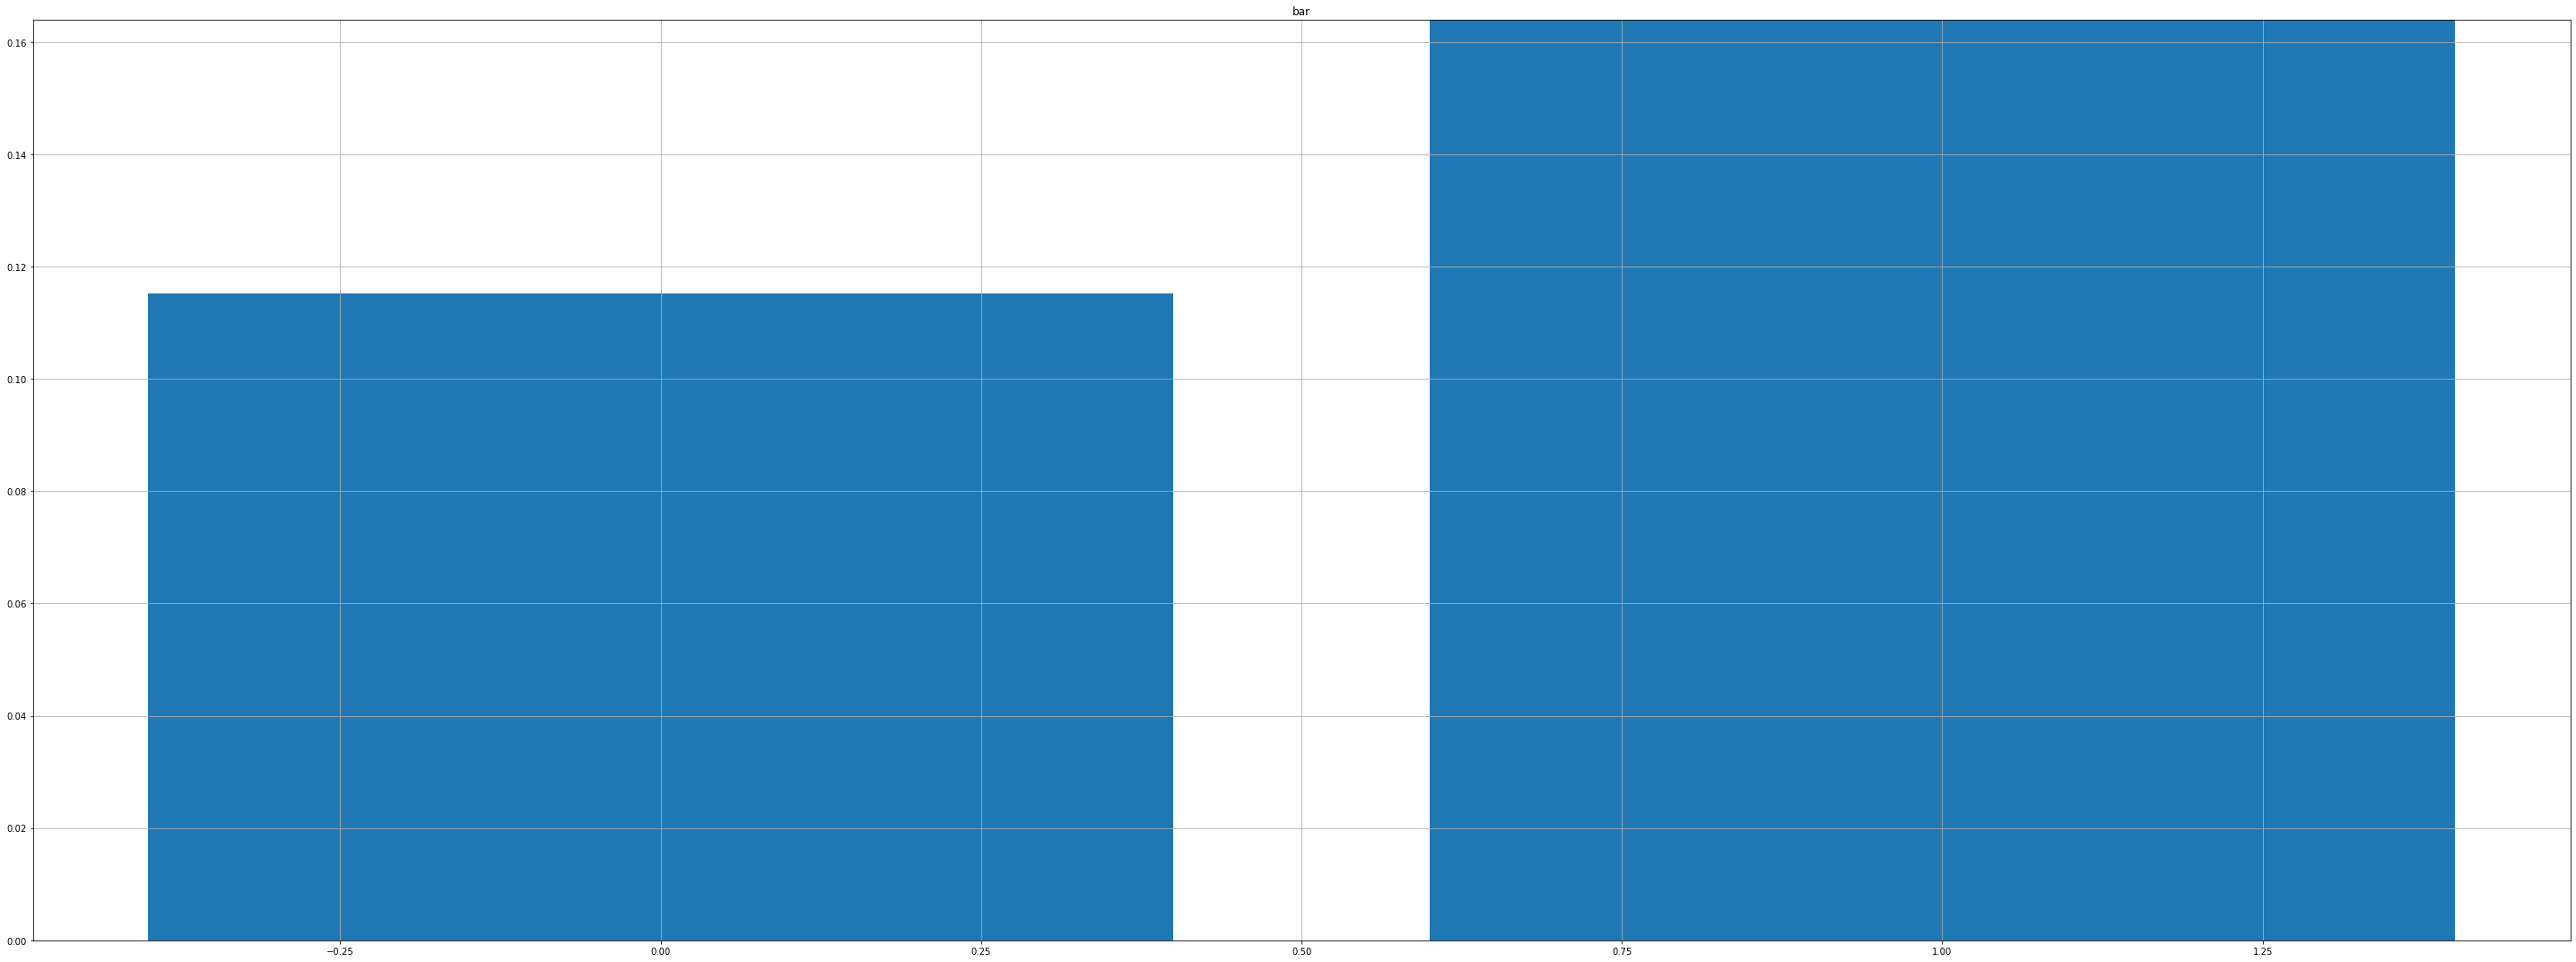

   marital_divorced         y
0                 0  0.116112
1                 1  0.120666


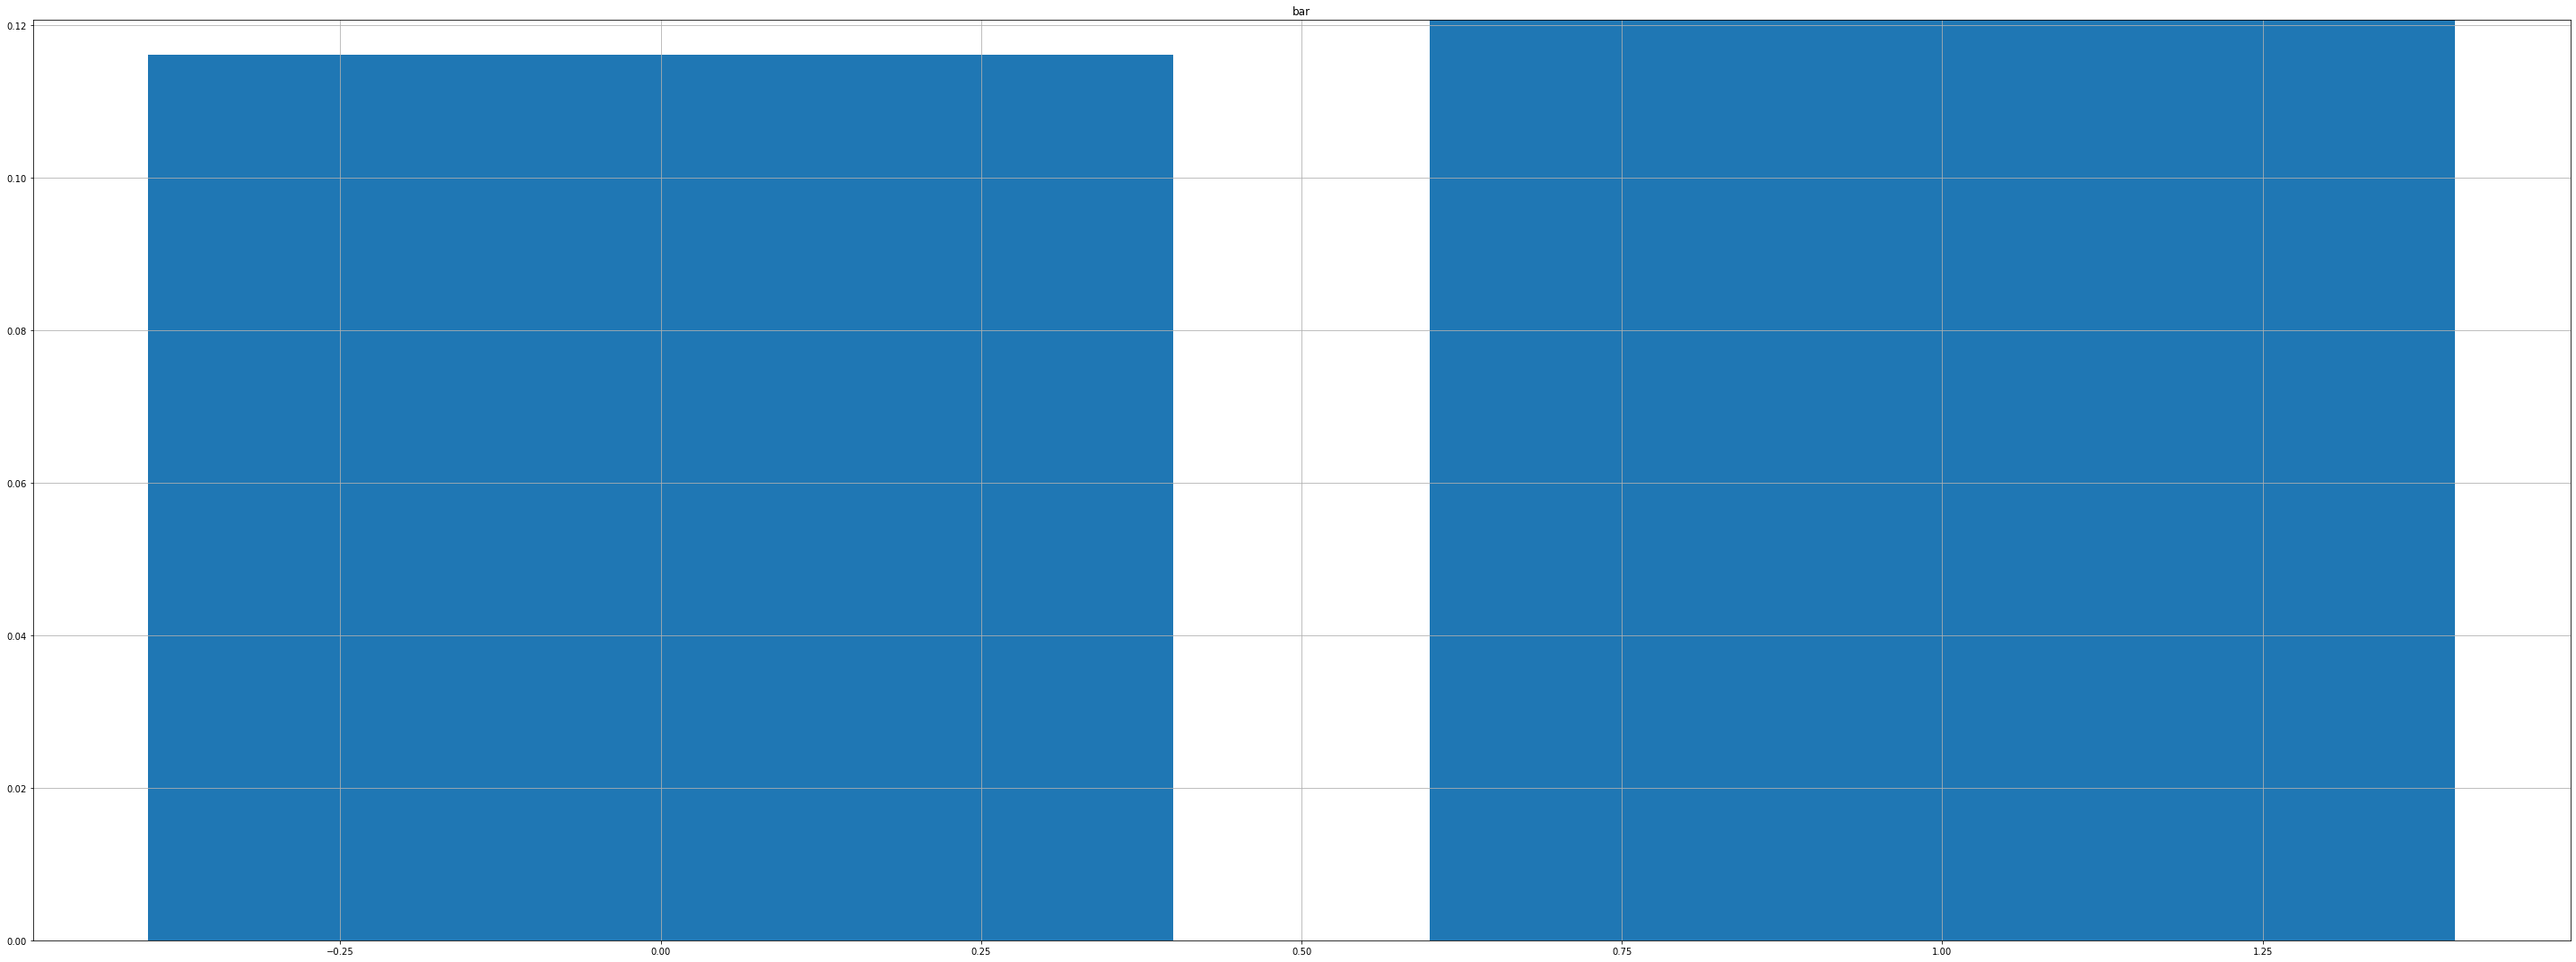

   marital_married         y
0                0  0.141229
1                1  0.100471


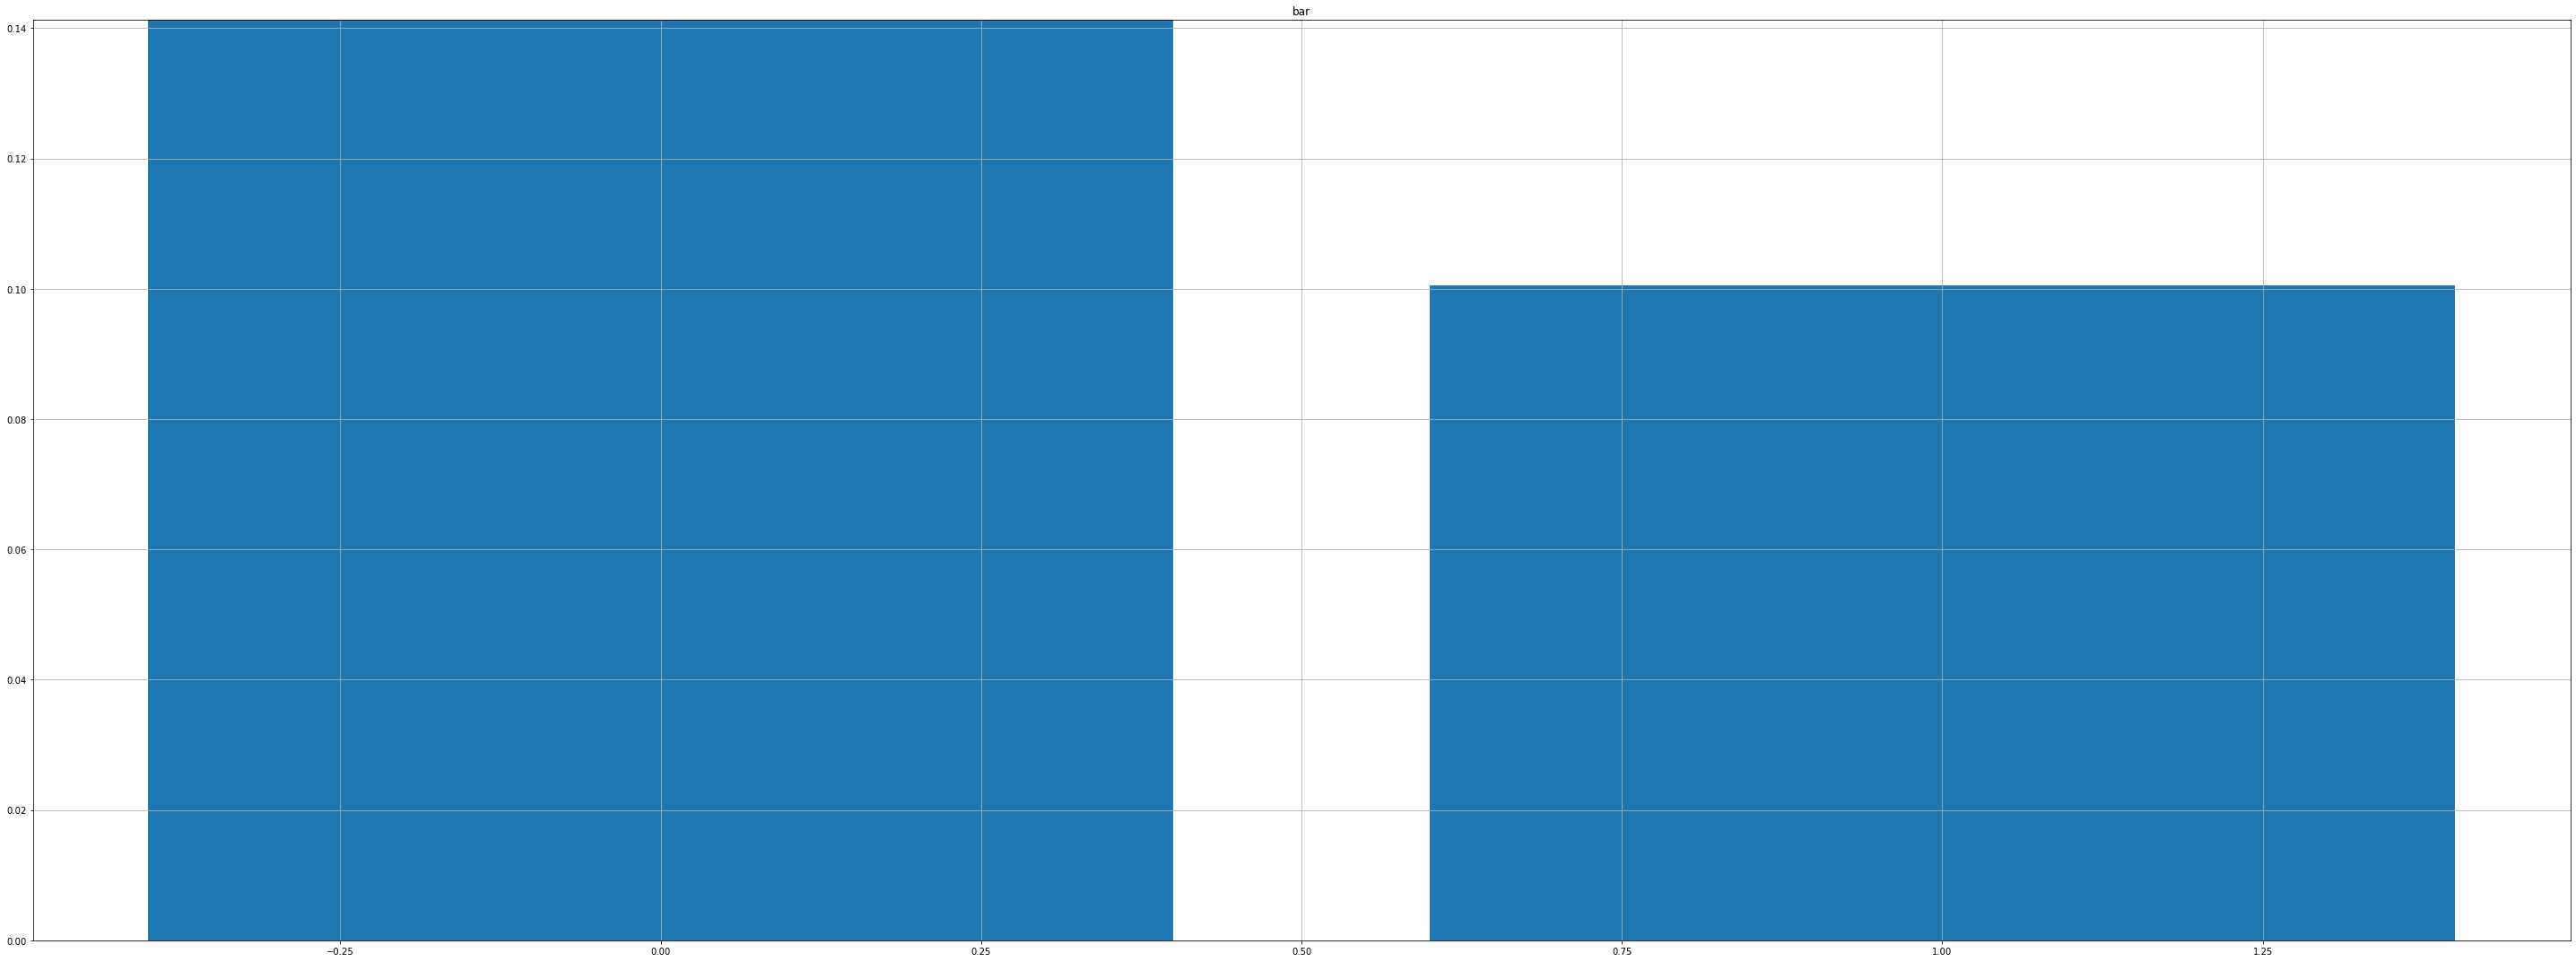

   marital_single         y
0               0  0.103678
1               1  0.149519


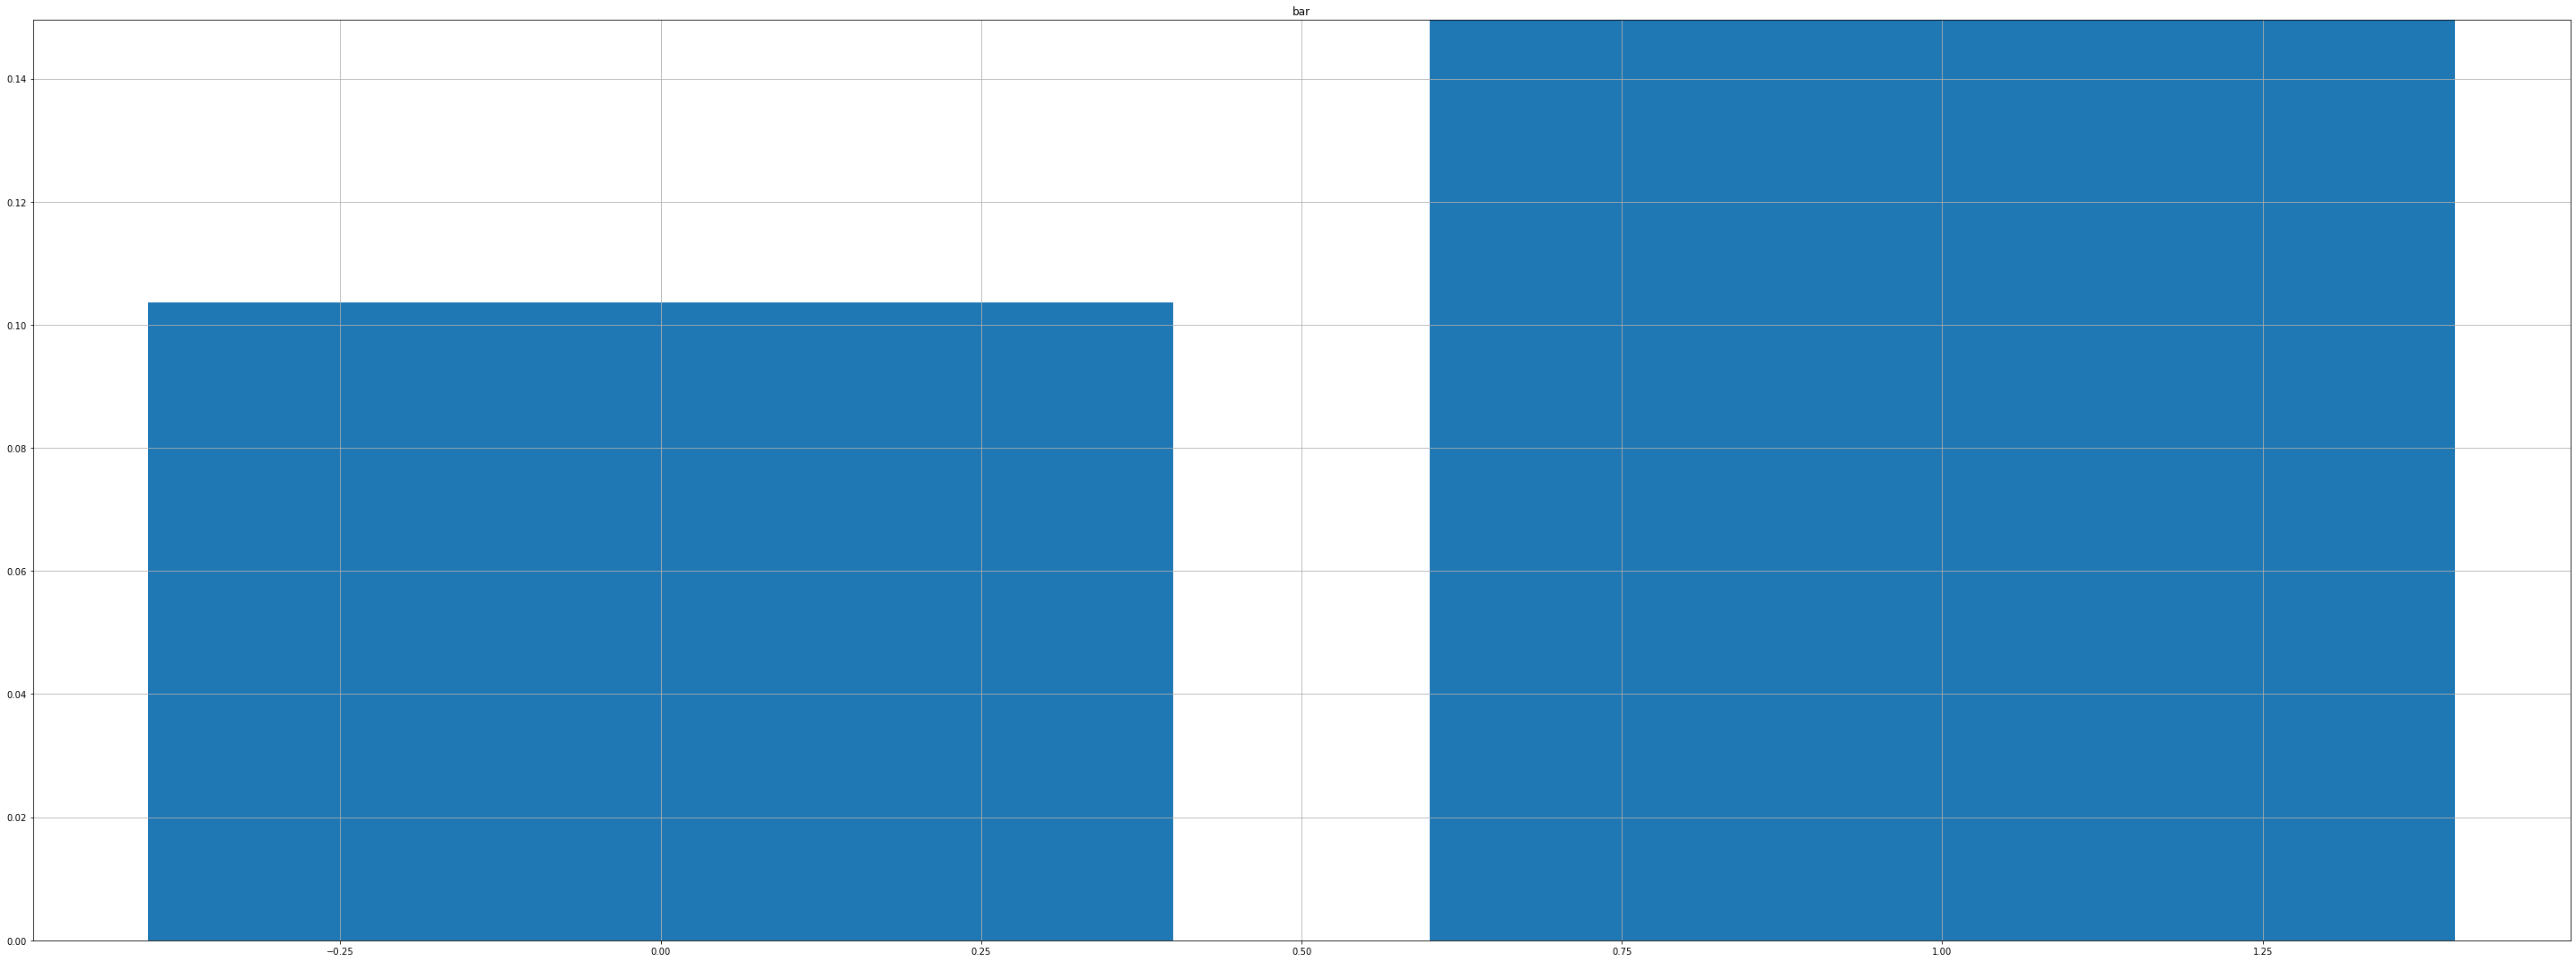

   education_primary         y
0                  0  0.121848
1                  1  0.087464


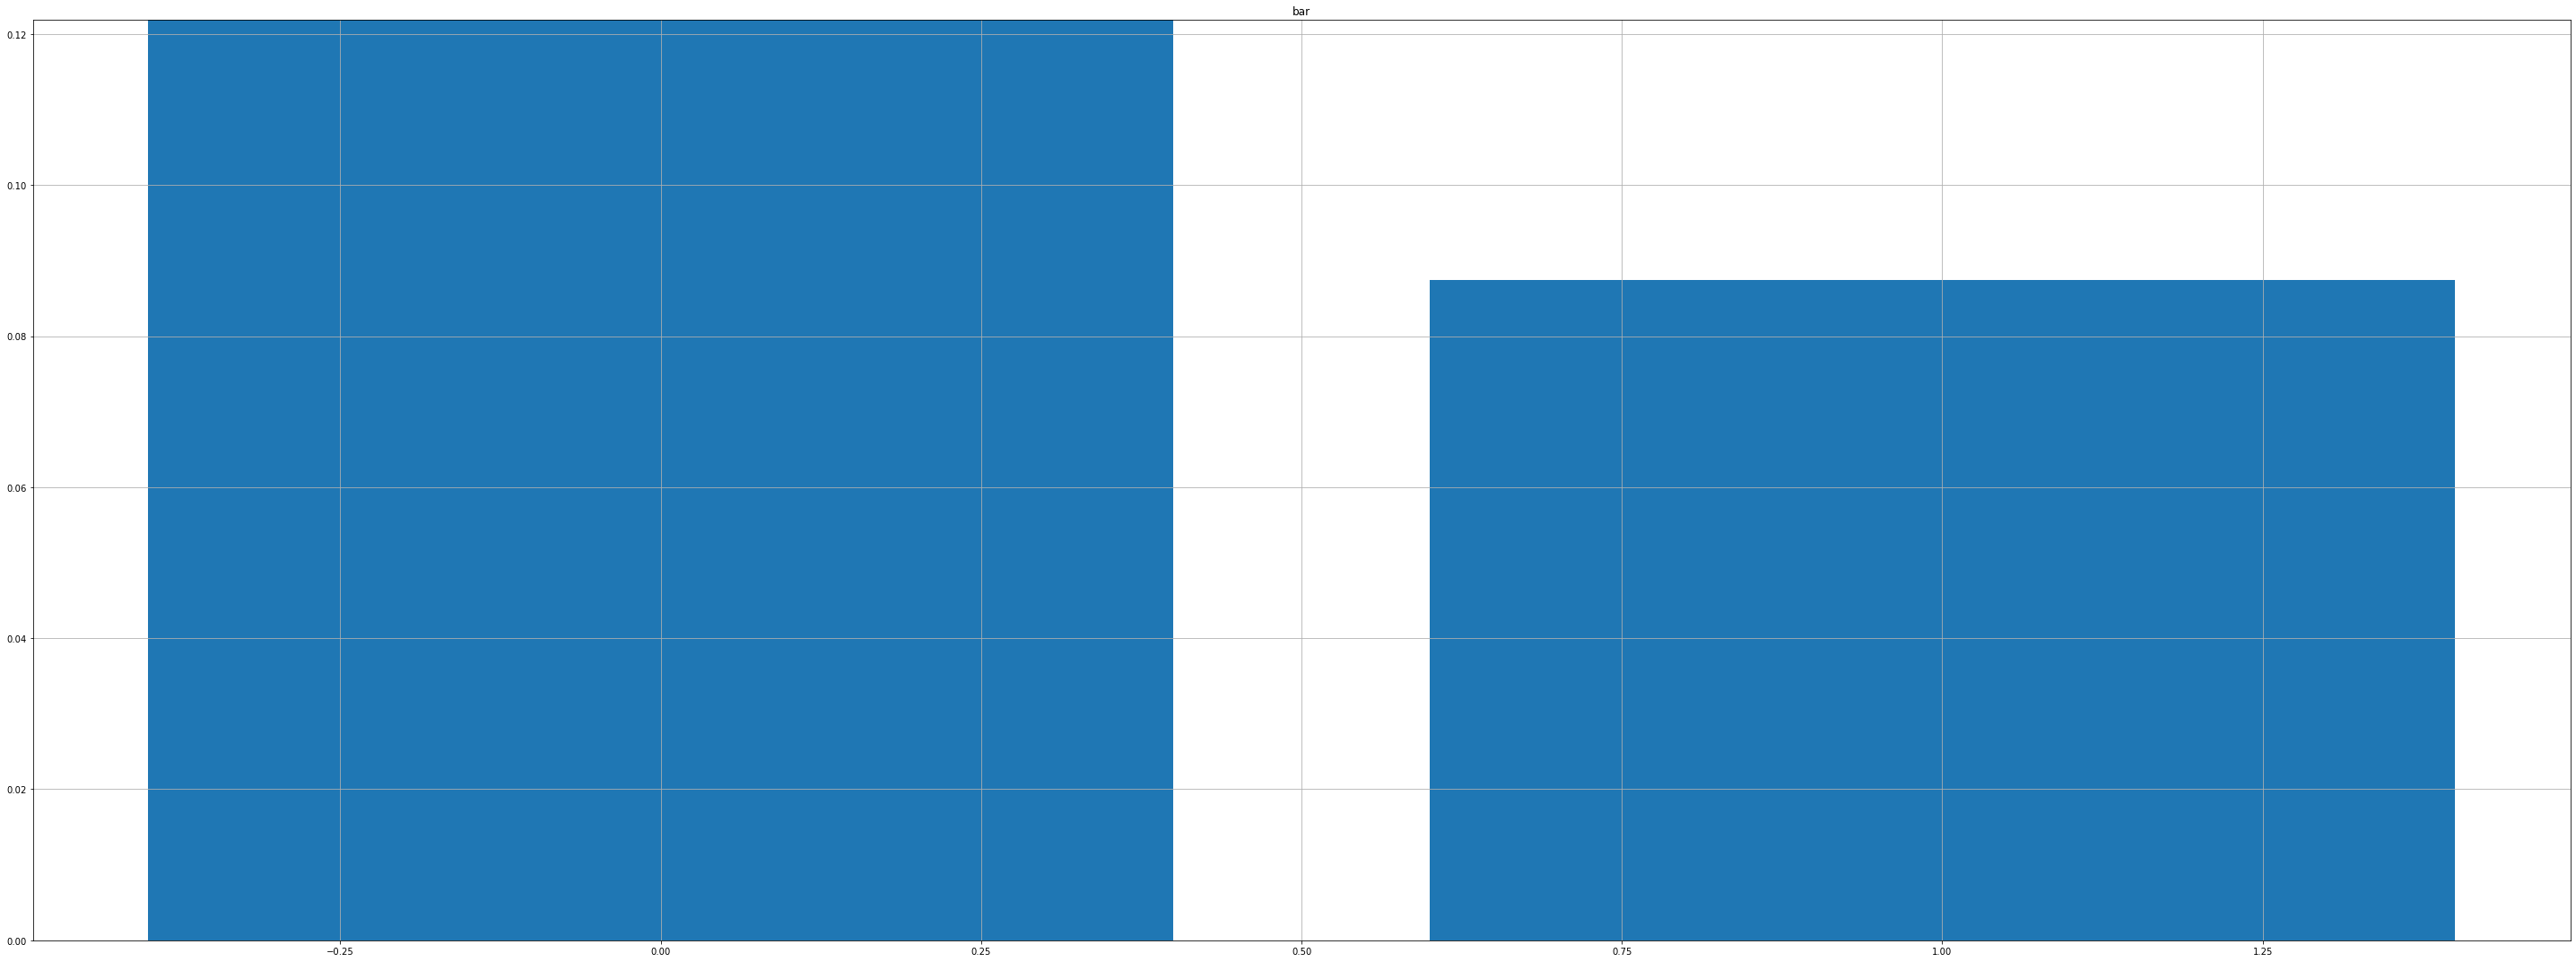

   education_secondary         y
0                    0  0.128381
1                    1  0.105624


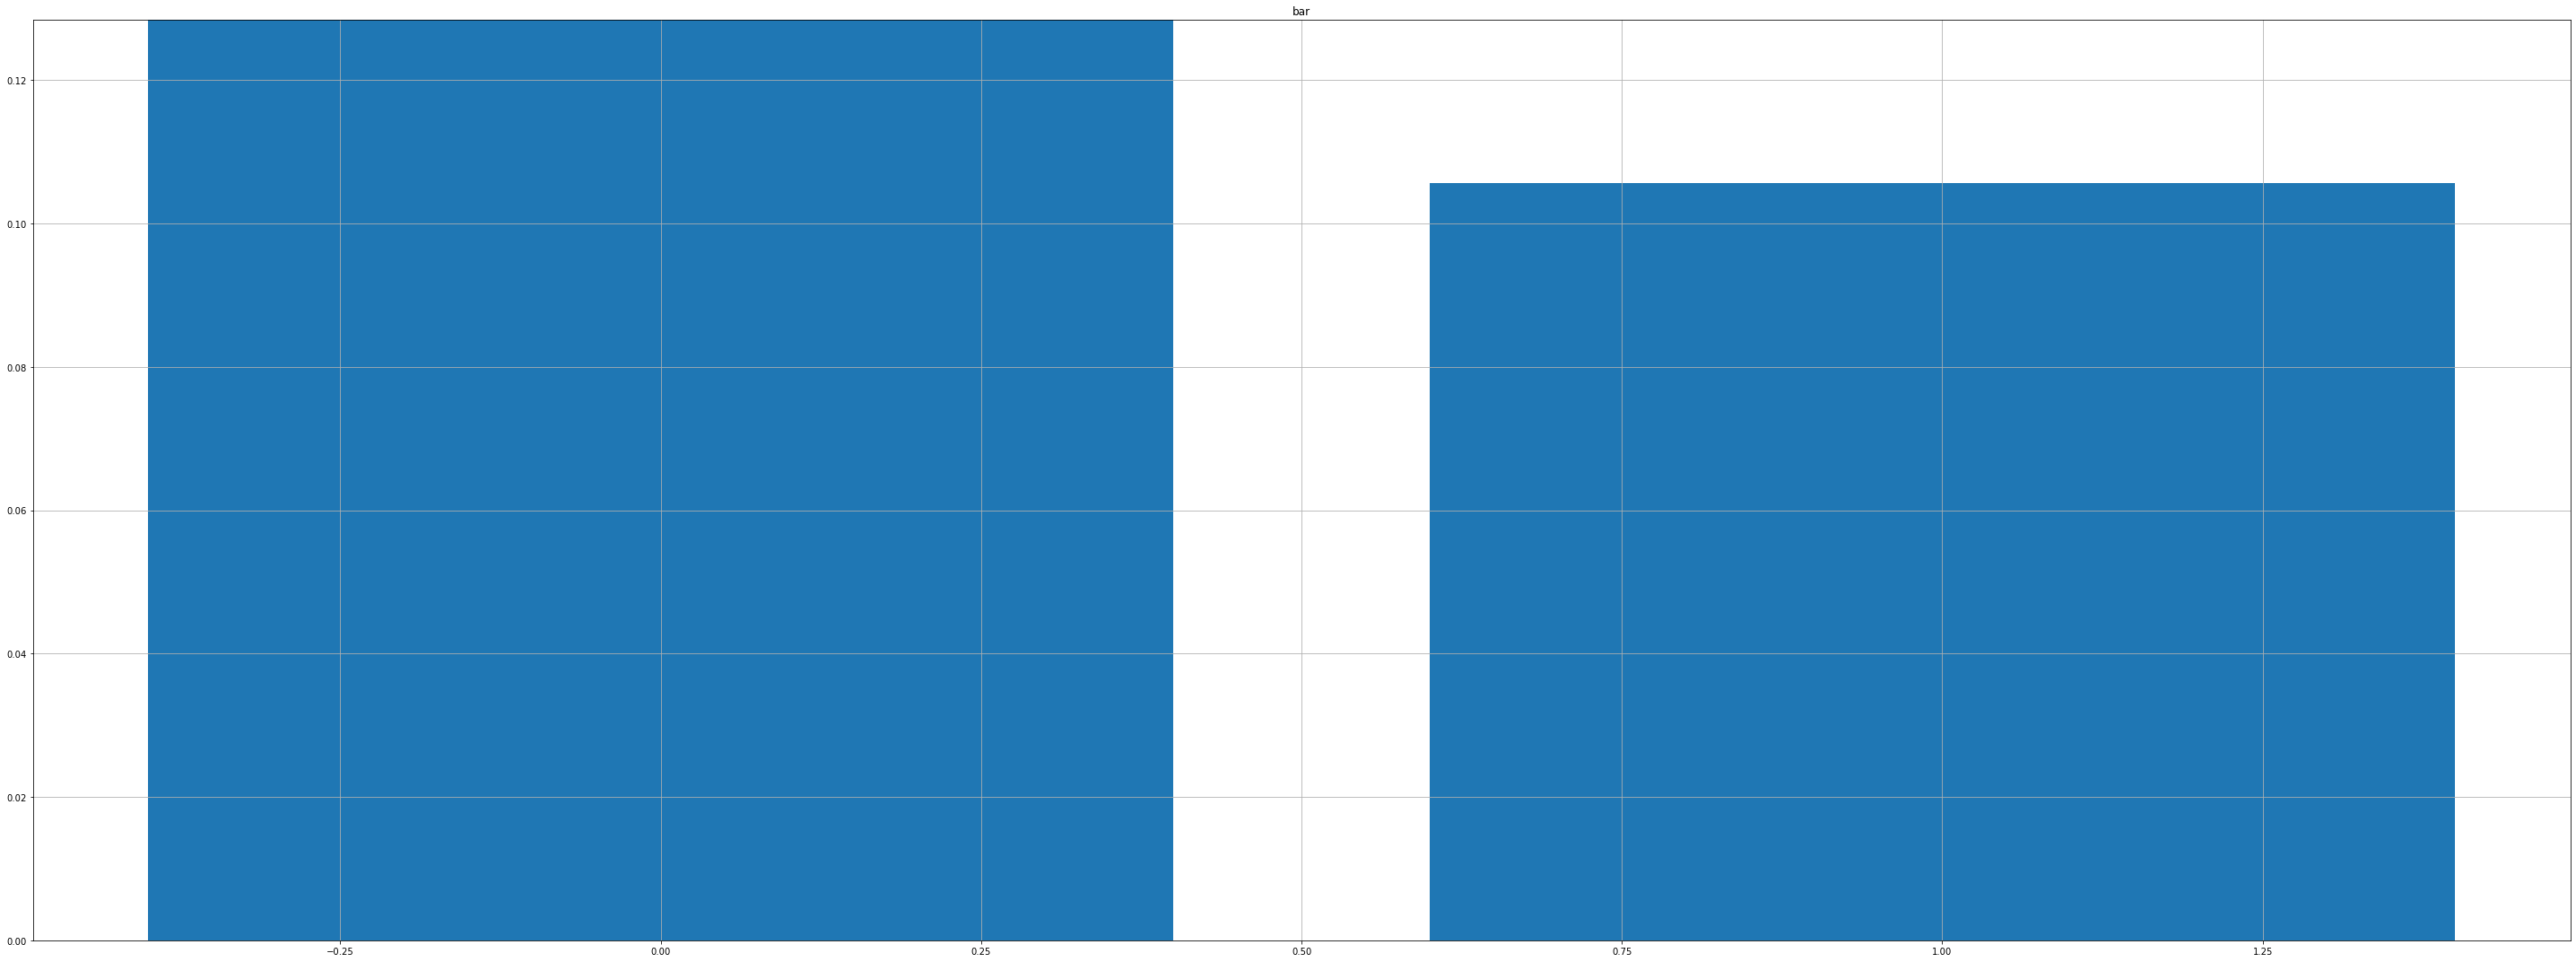

   education_tertiary         y
0                   0  0.103094
1                   1  0.149750


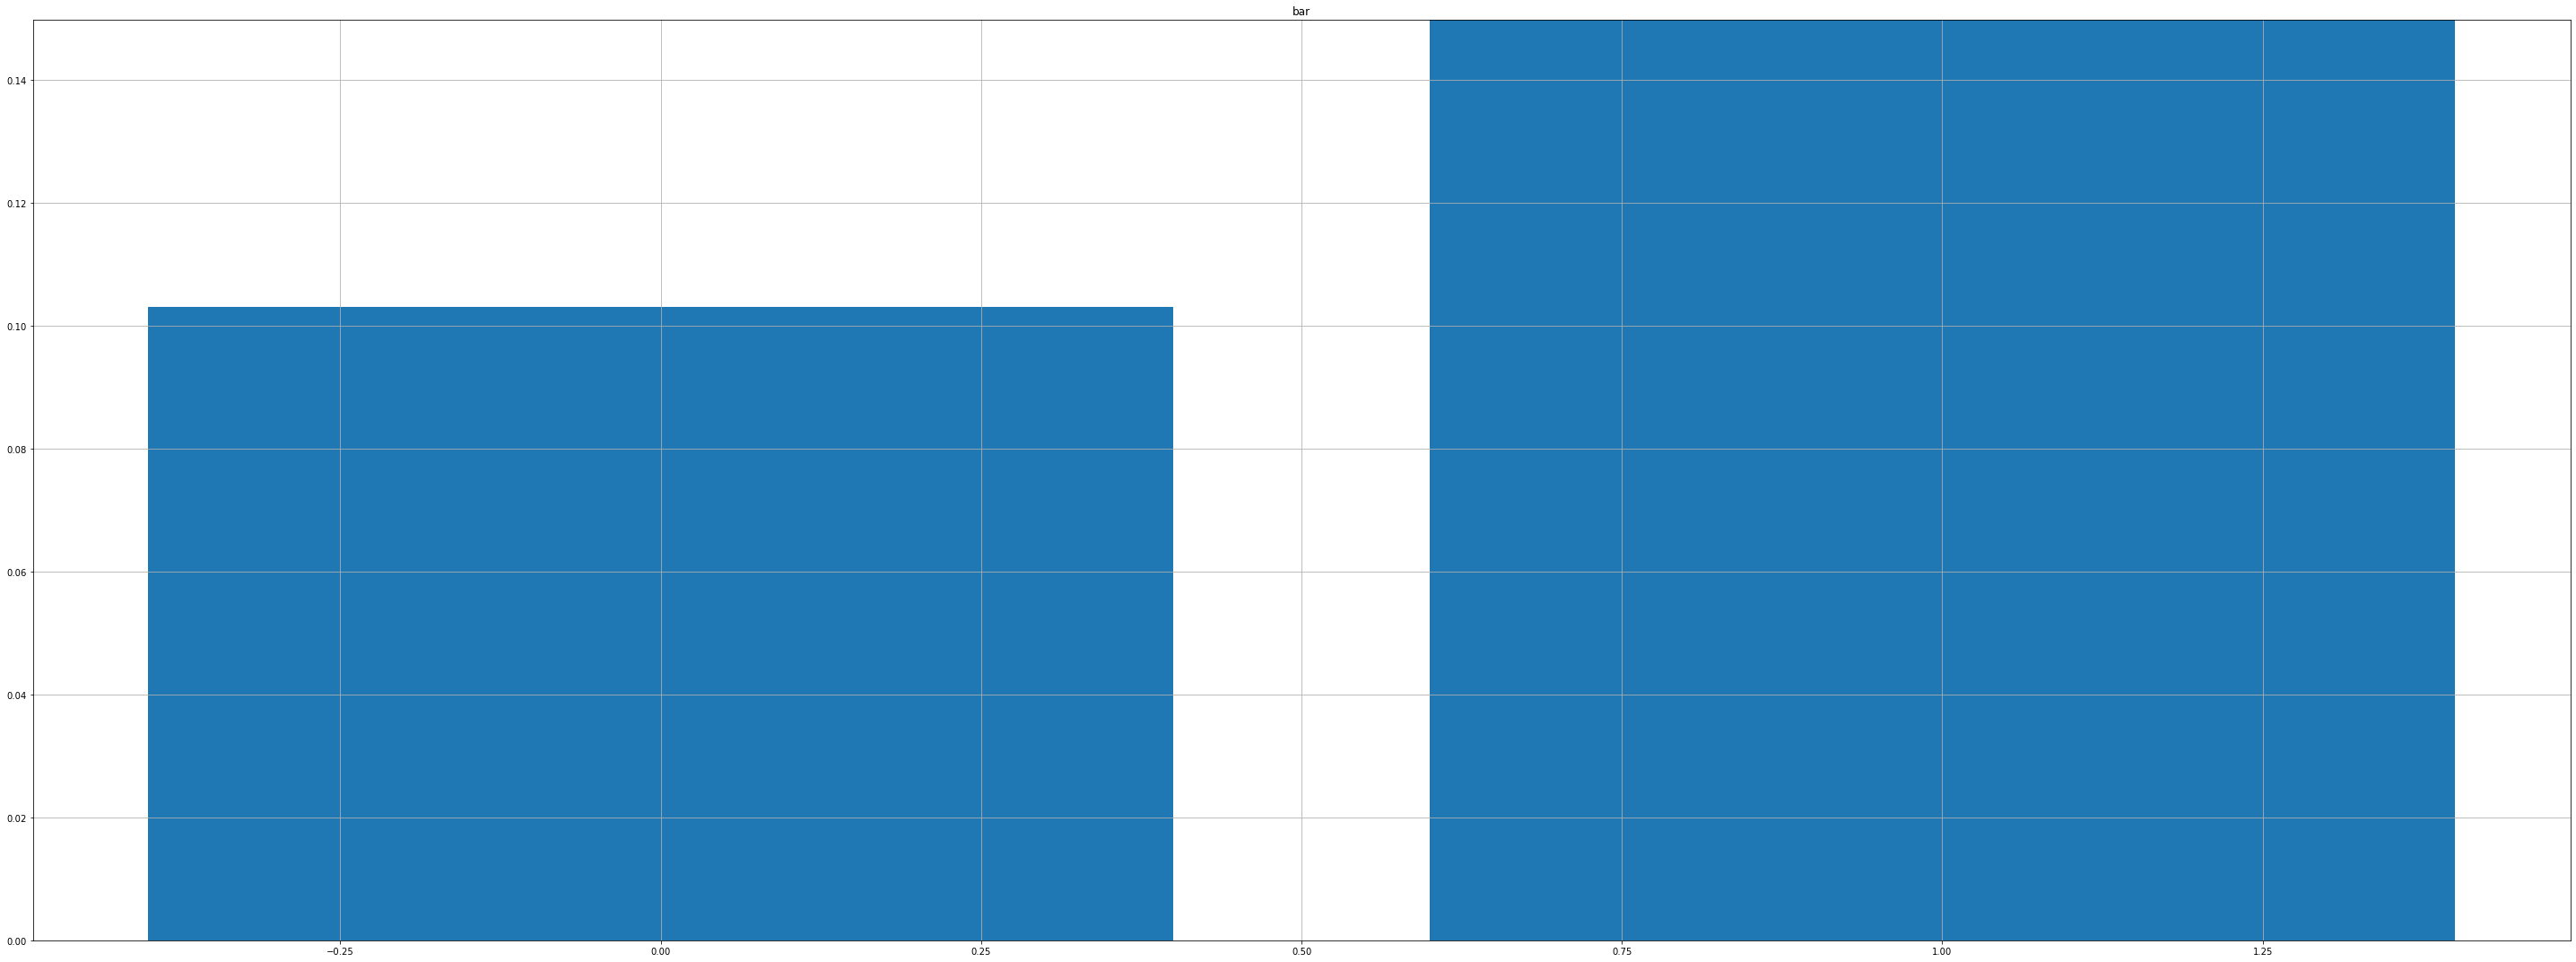

   education_unknown         y
0                  0  0.116109
1                  1  0.128593


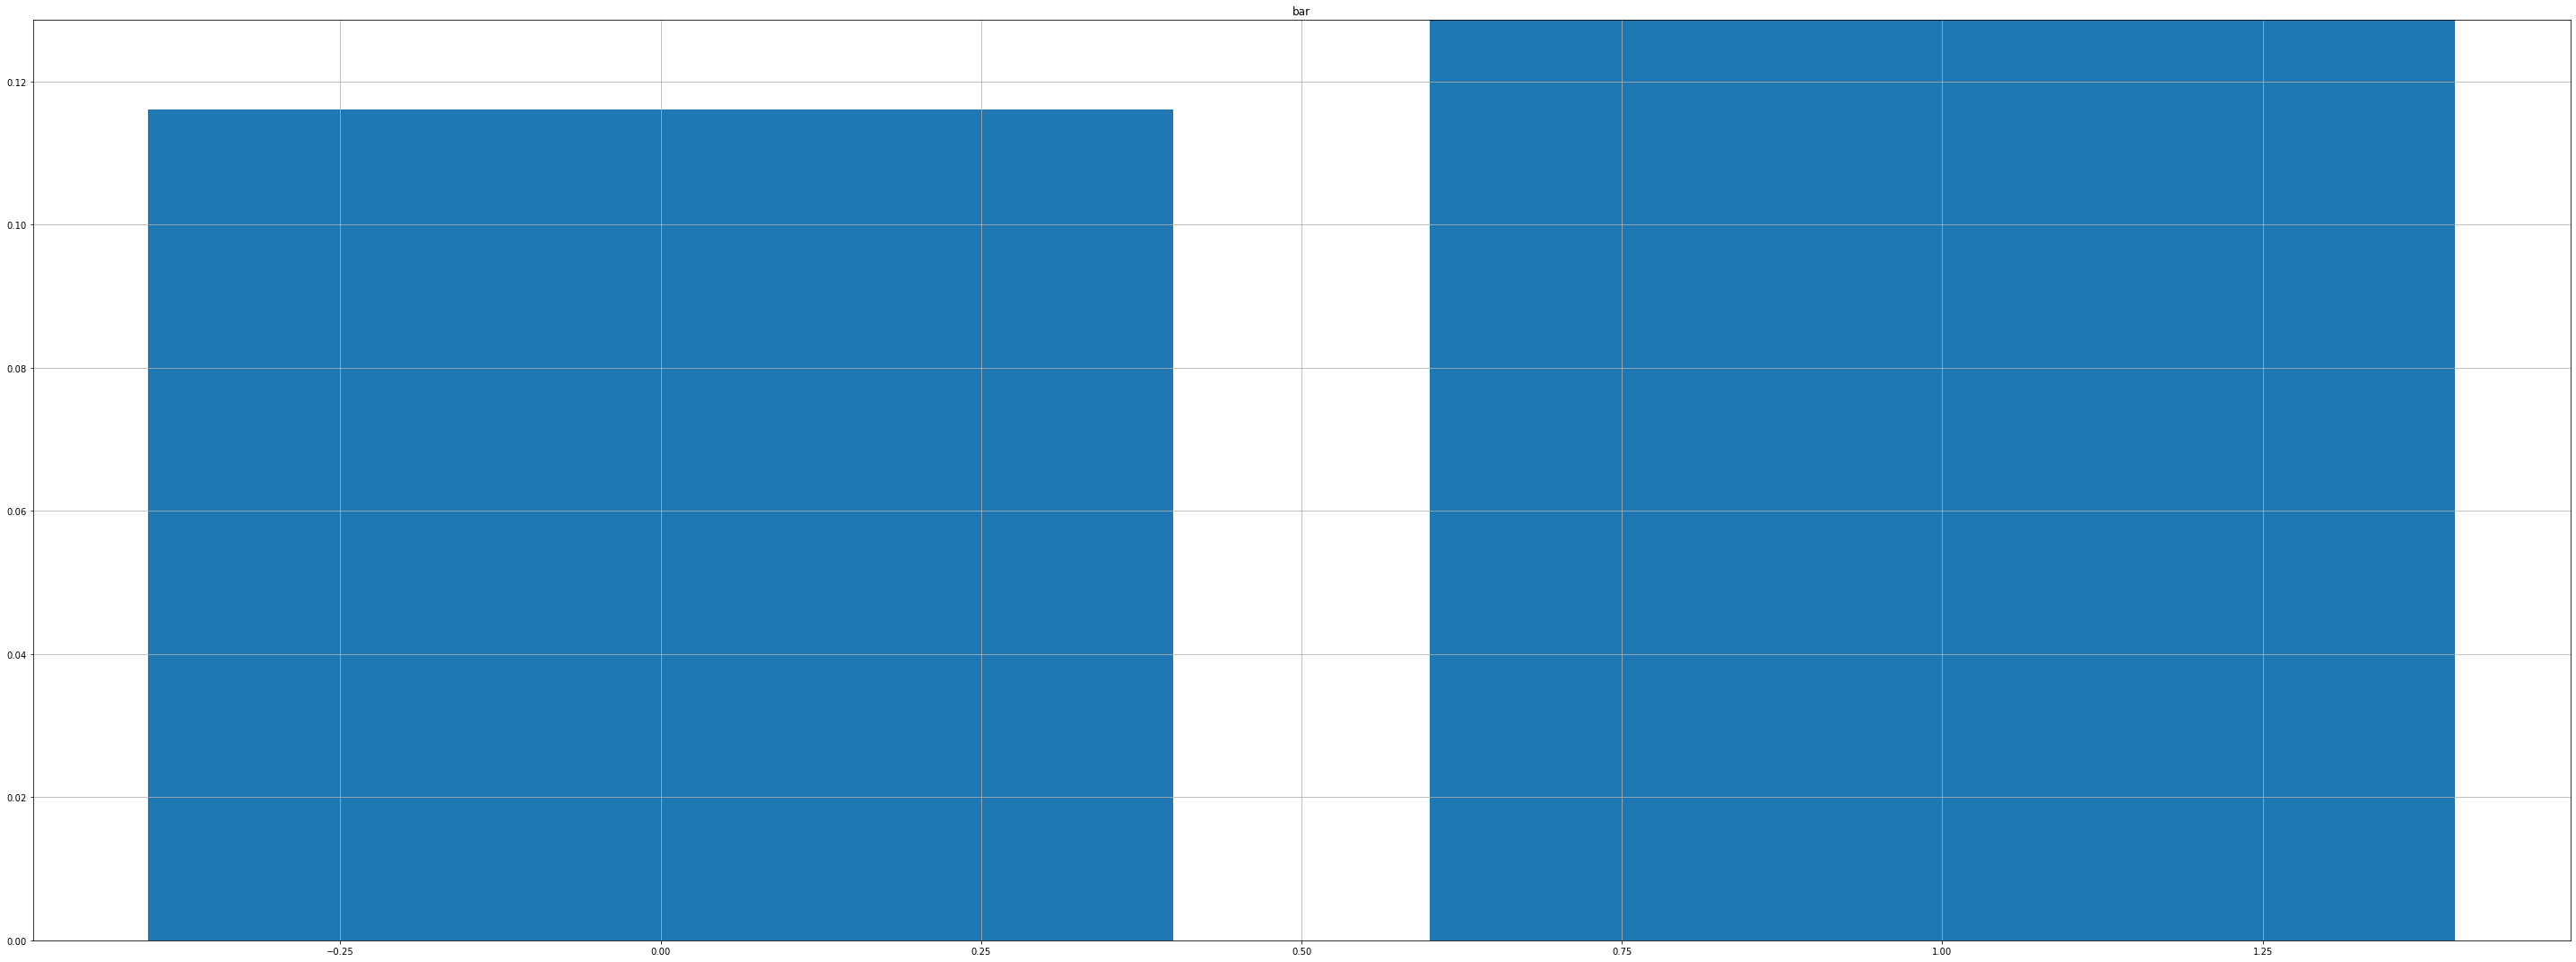

   housing_no         y
0           0  0.076945
1           1  0.166335


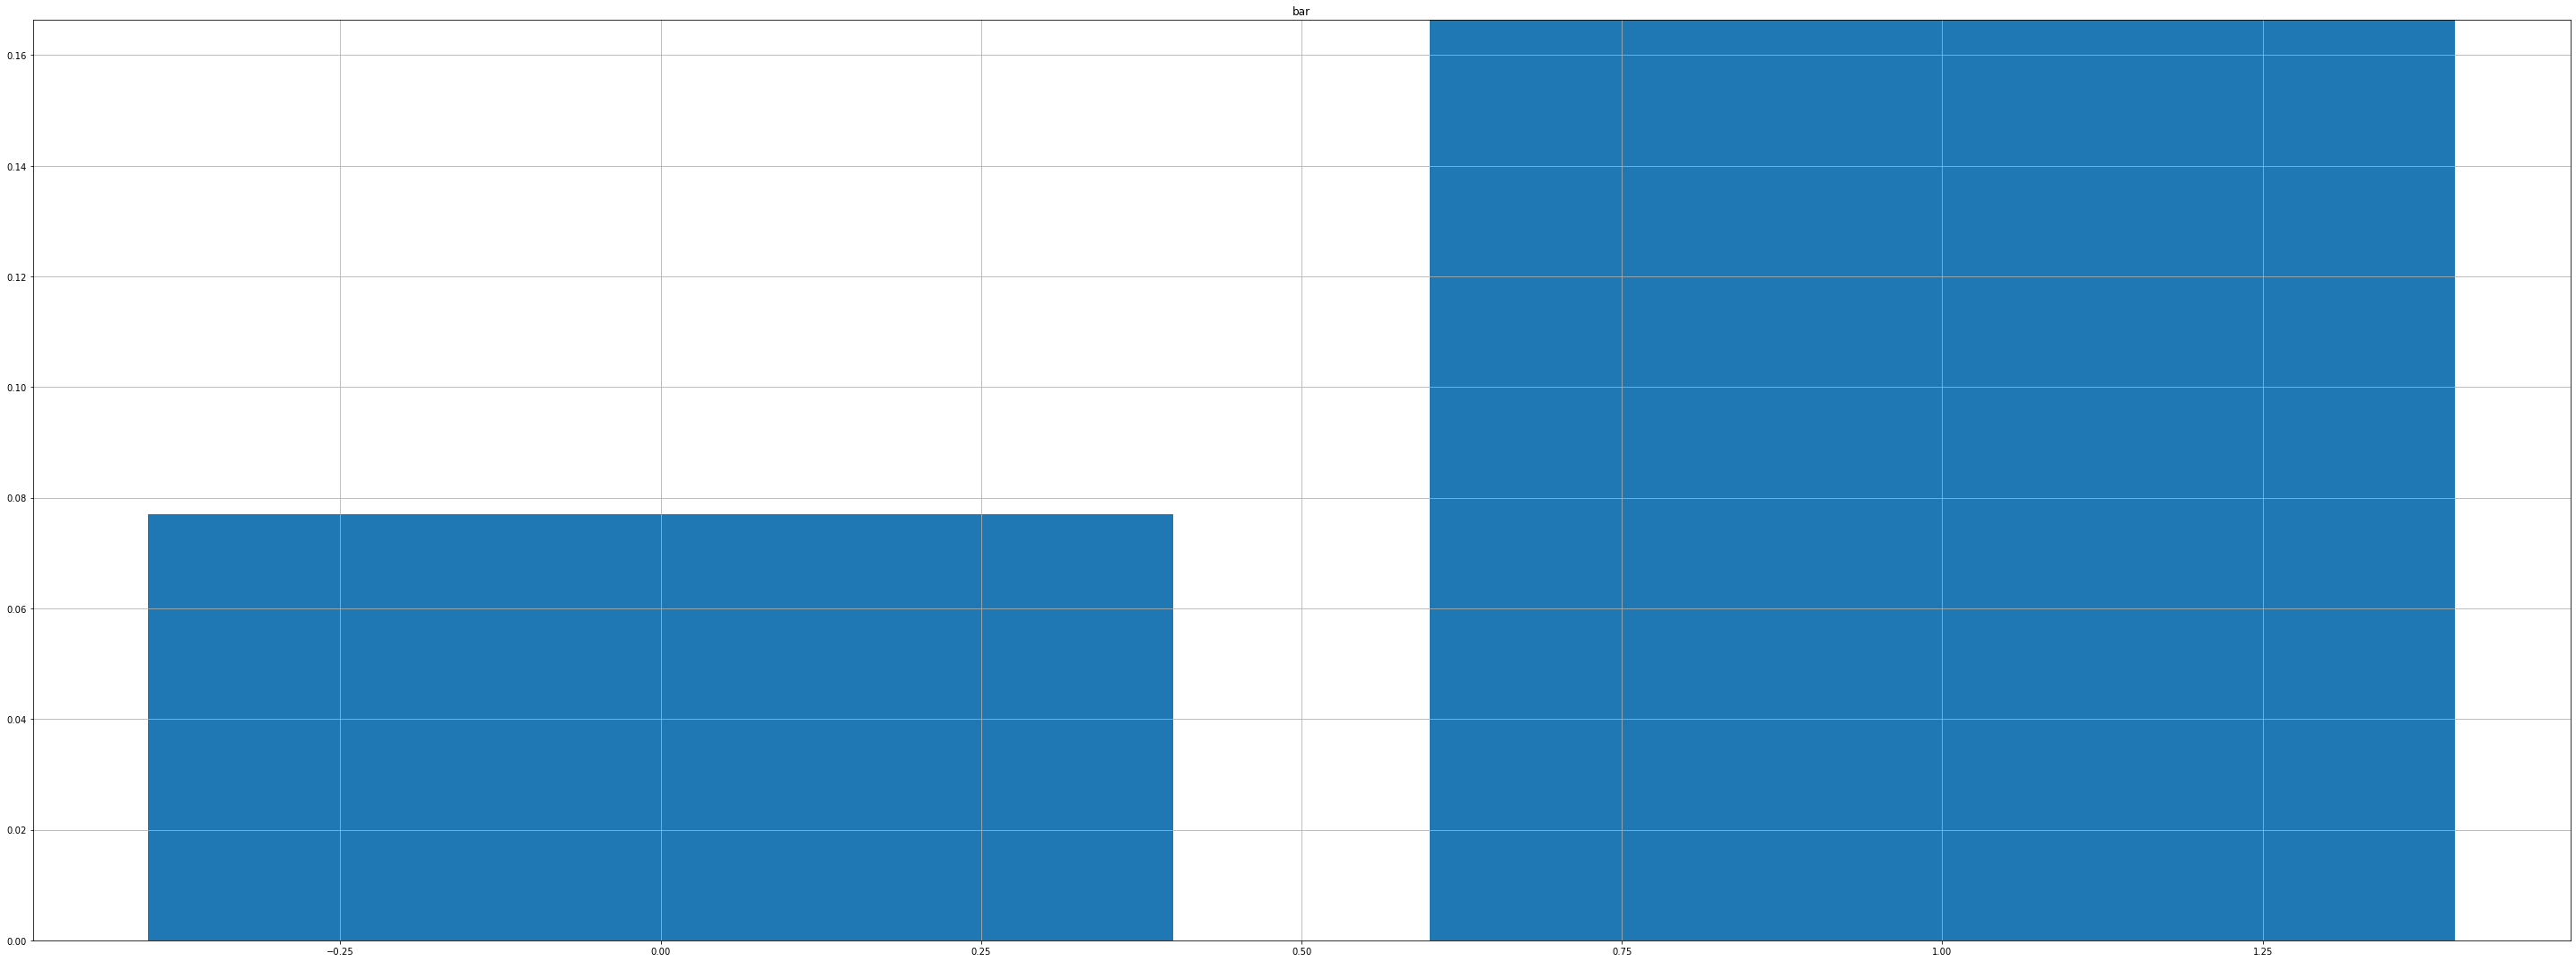

   housing_yes         y
0            0  0.166335
1            1  0.076945


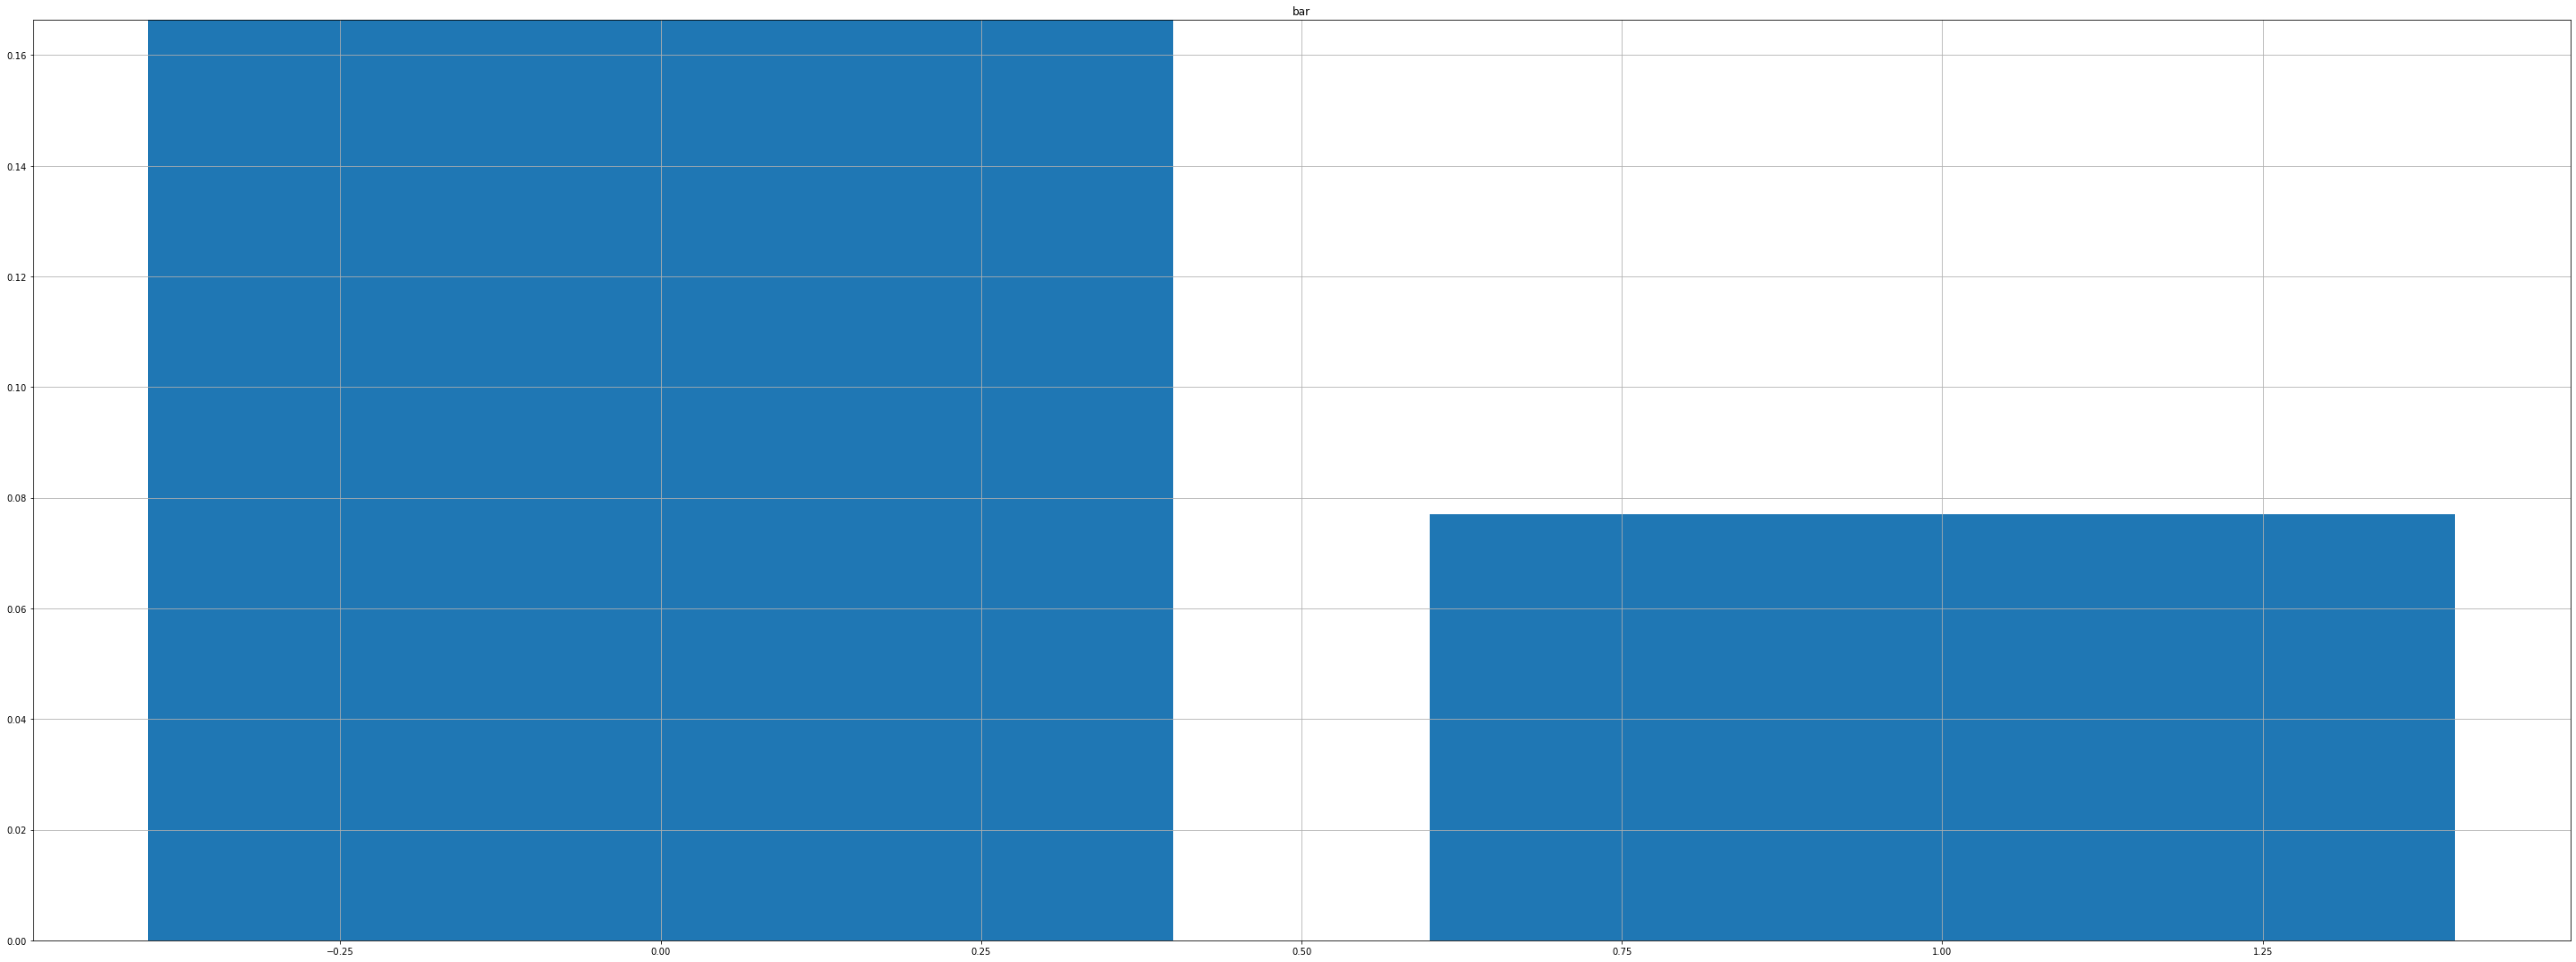

   loan_no         y
0        0  0.066365
1        1  0.126237


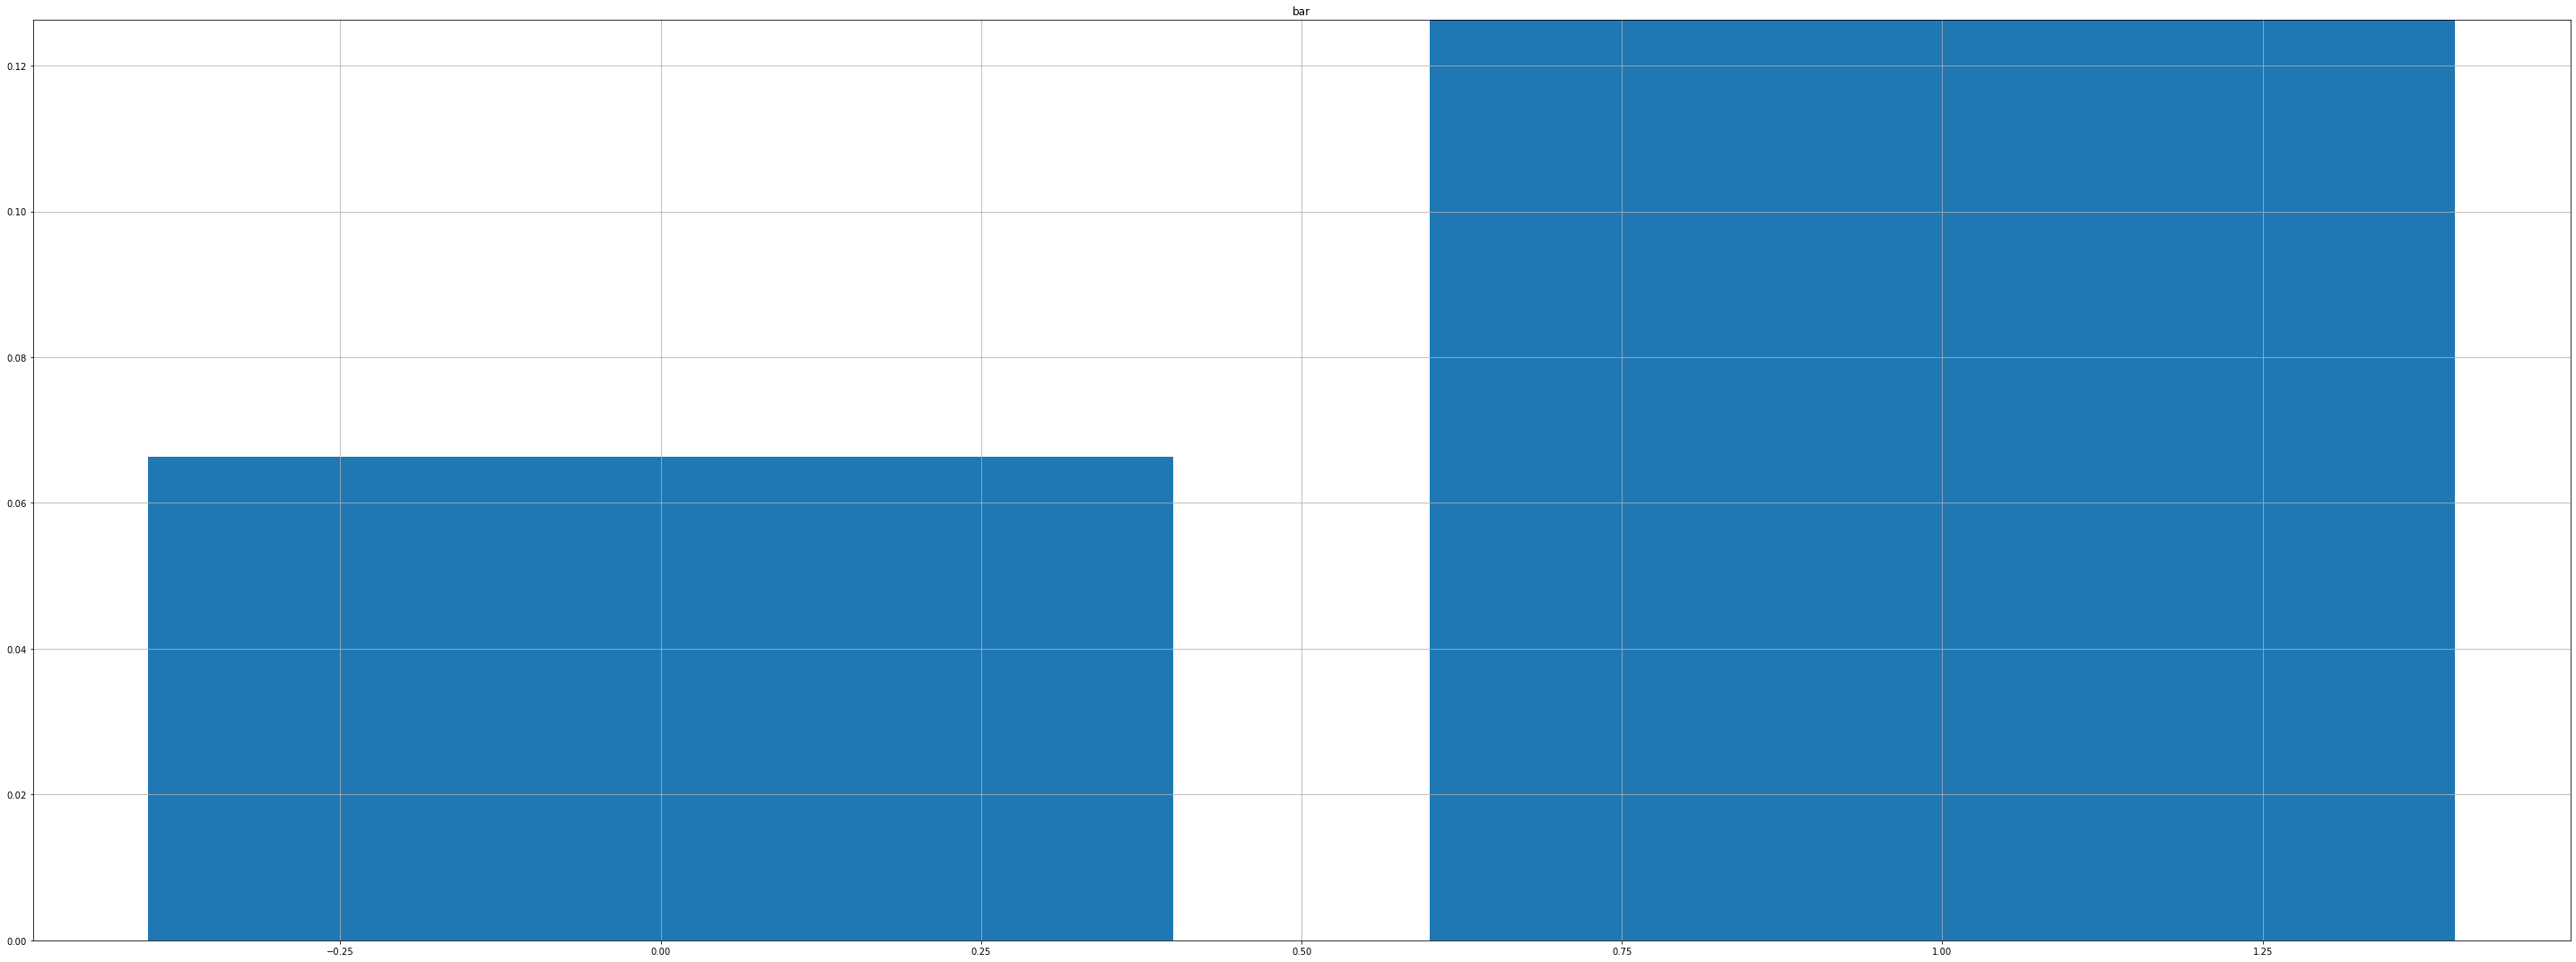

   loan_yes         y
0         0  0.126237
1         1  0.066365


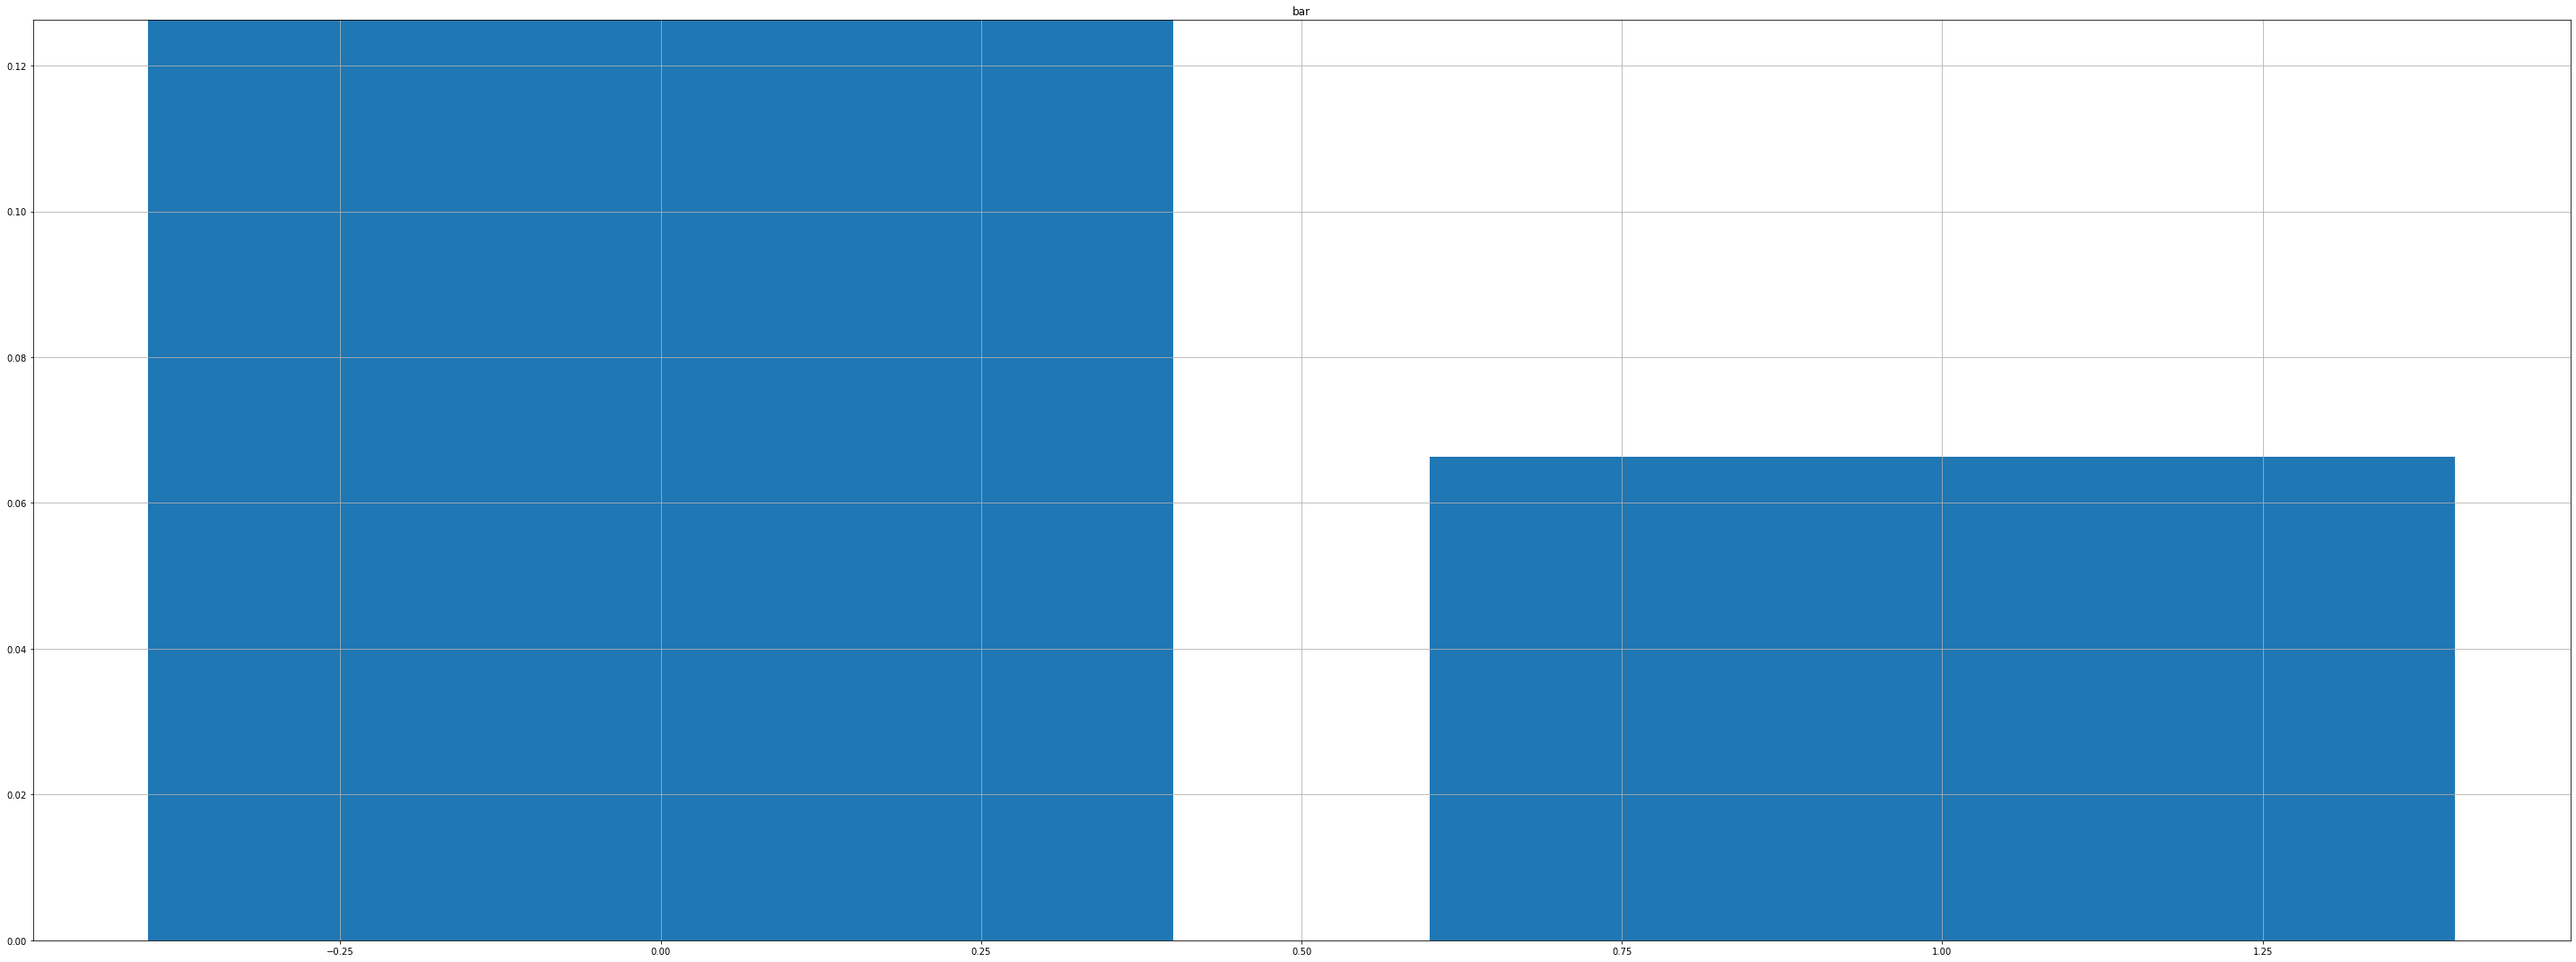

   pdays_-1         y
0         0  0.231674
1         1  0.090902


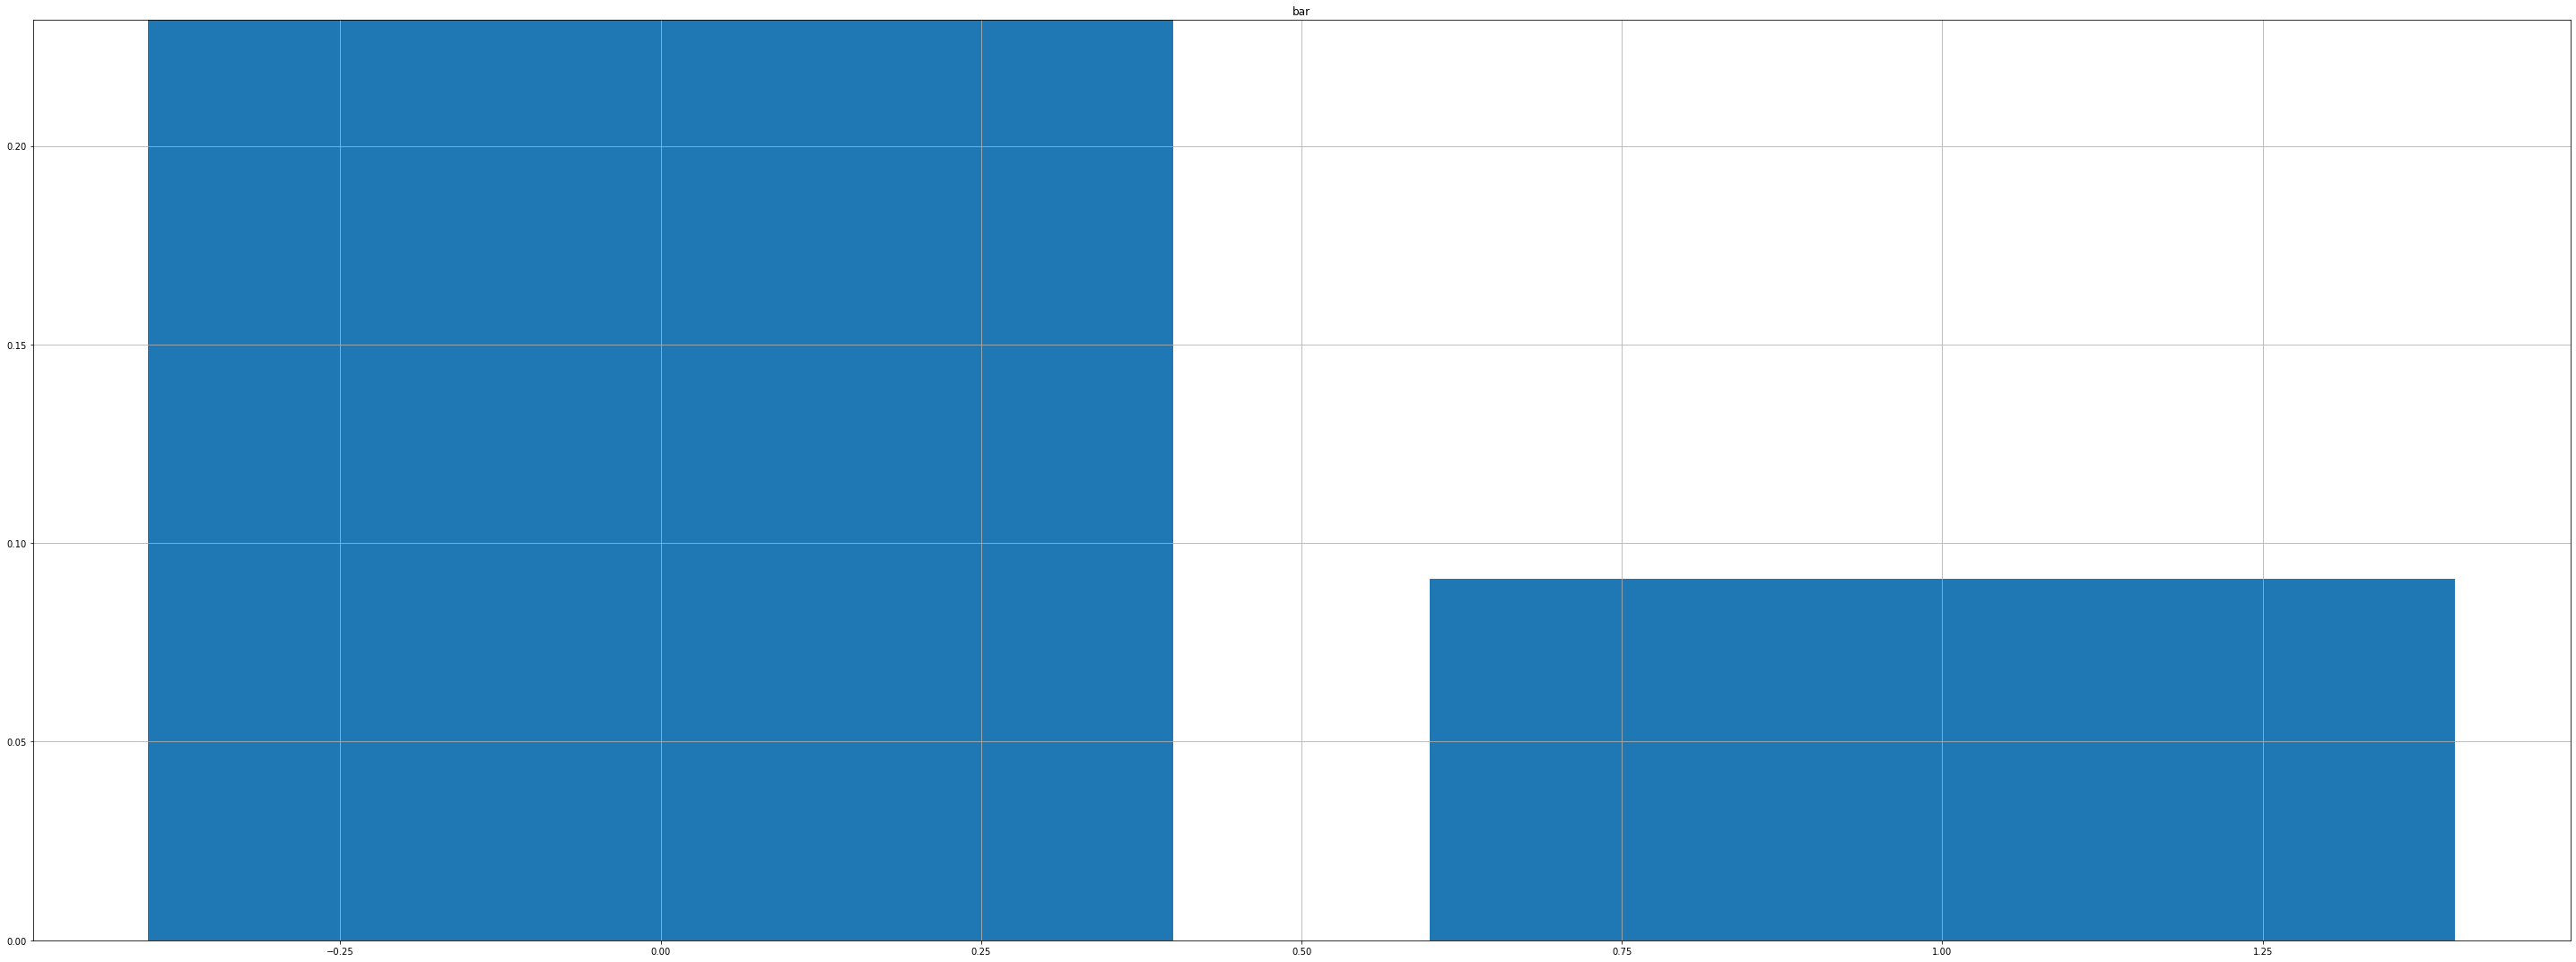

   pdays_0         y
0        0  0.094372
1        1  0.226905


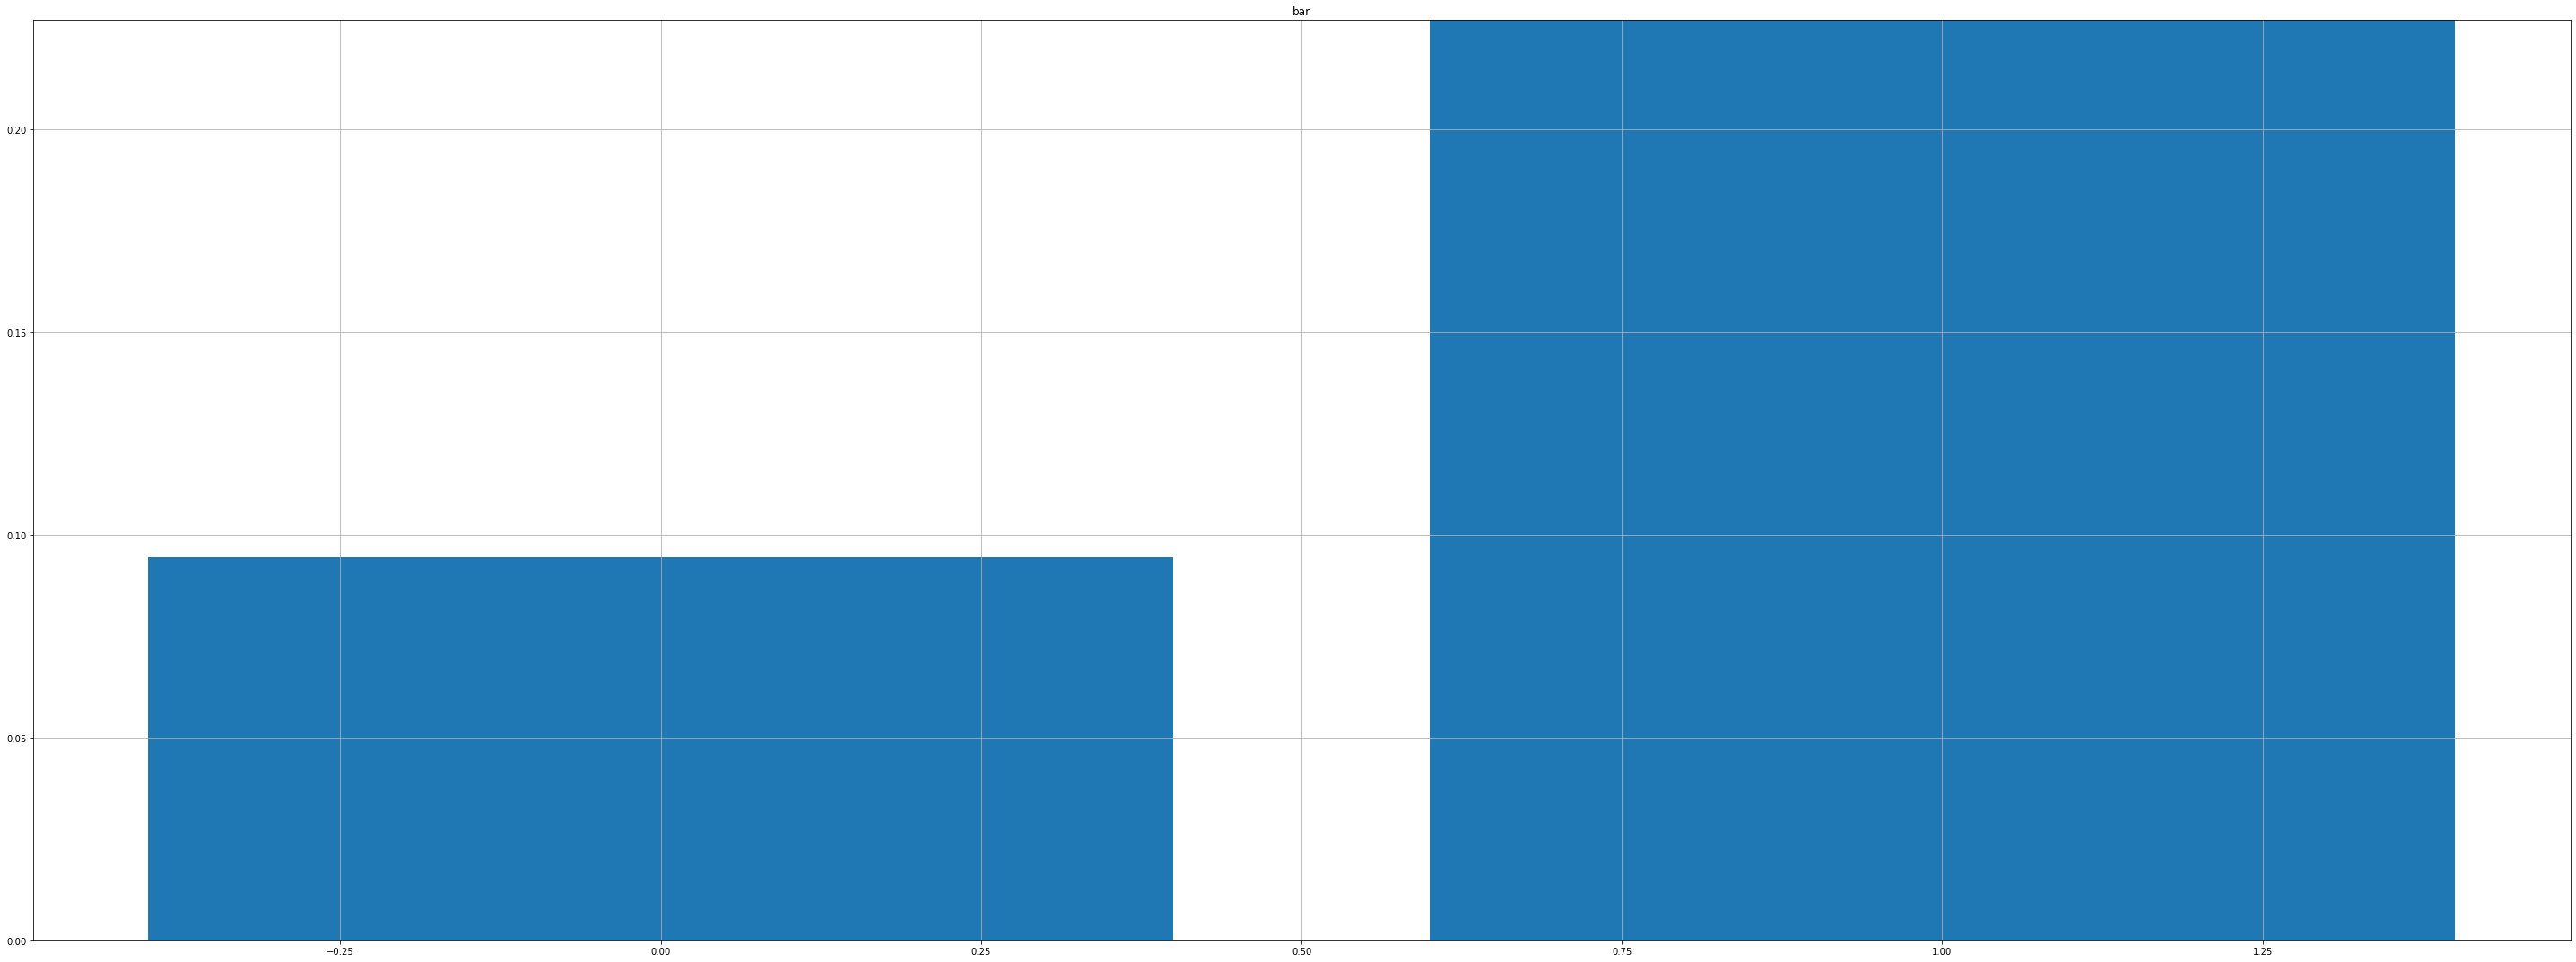

   pdays_1         y
0        0  0.114087
1        1  0.285714


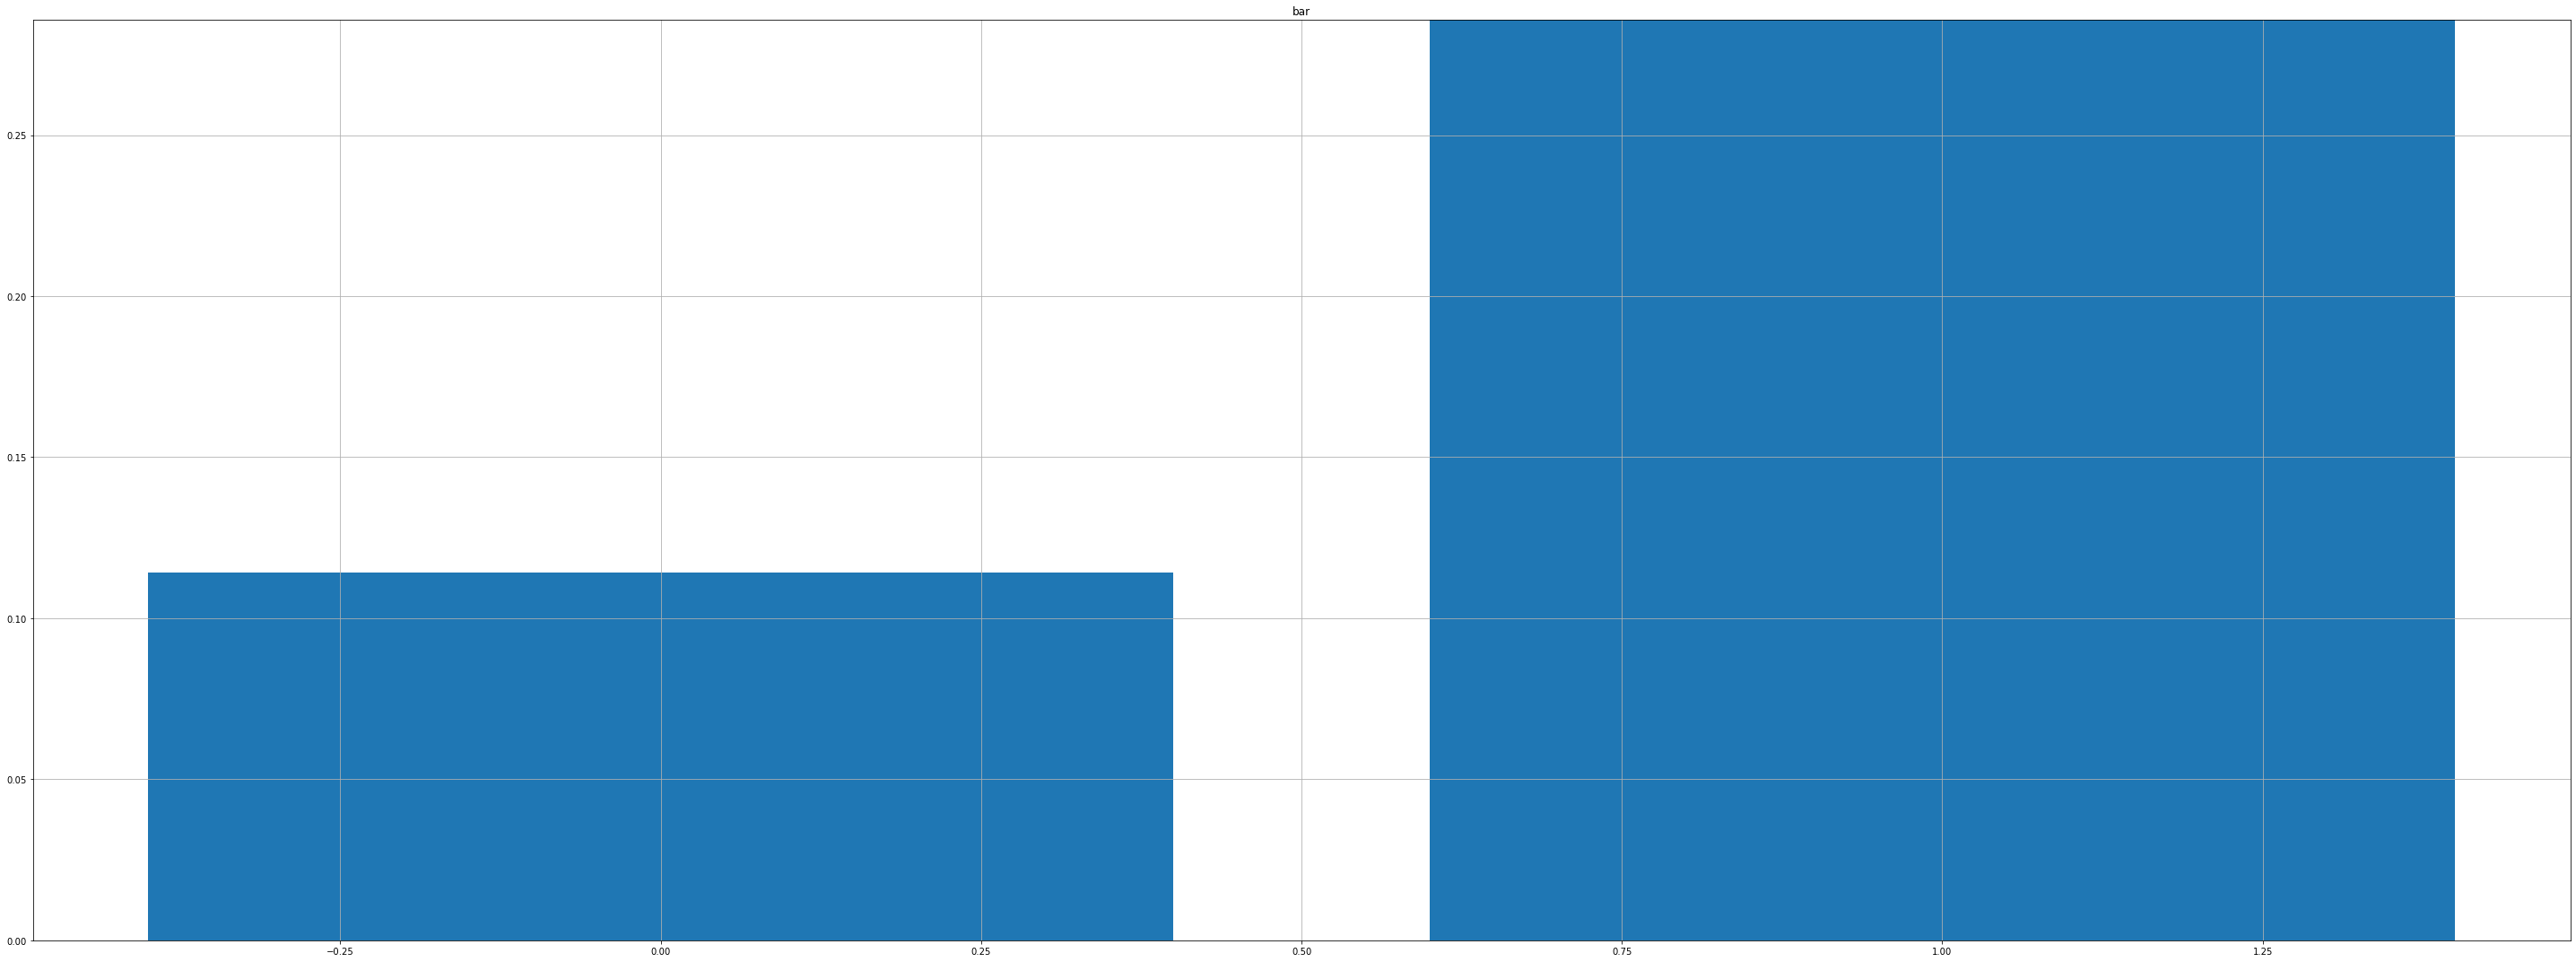

   contact_cellular         y
0                 0  0.057467
1                 1  0.148601


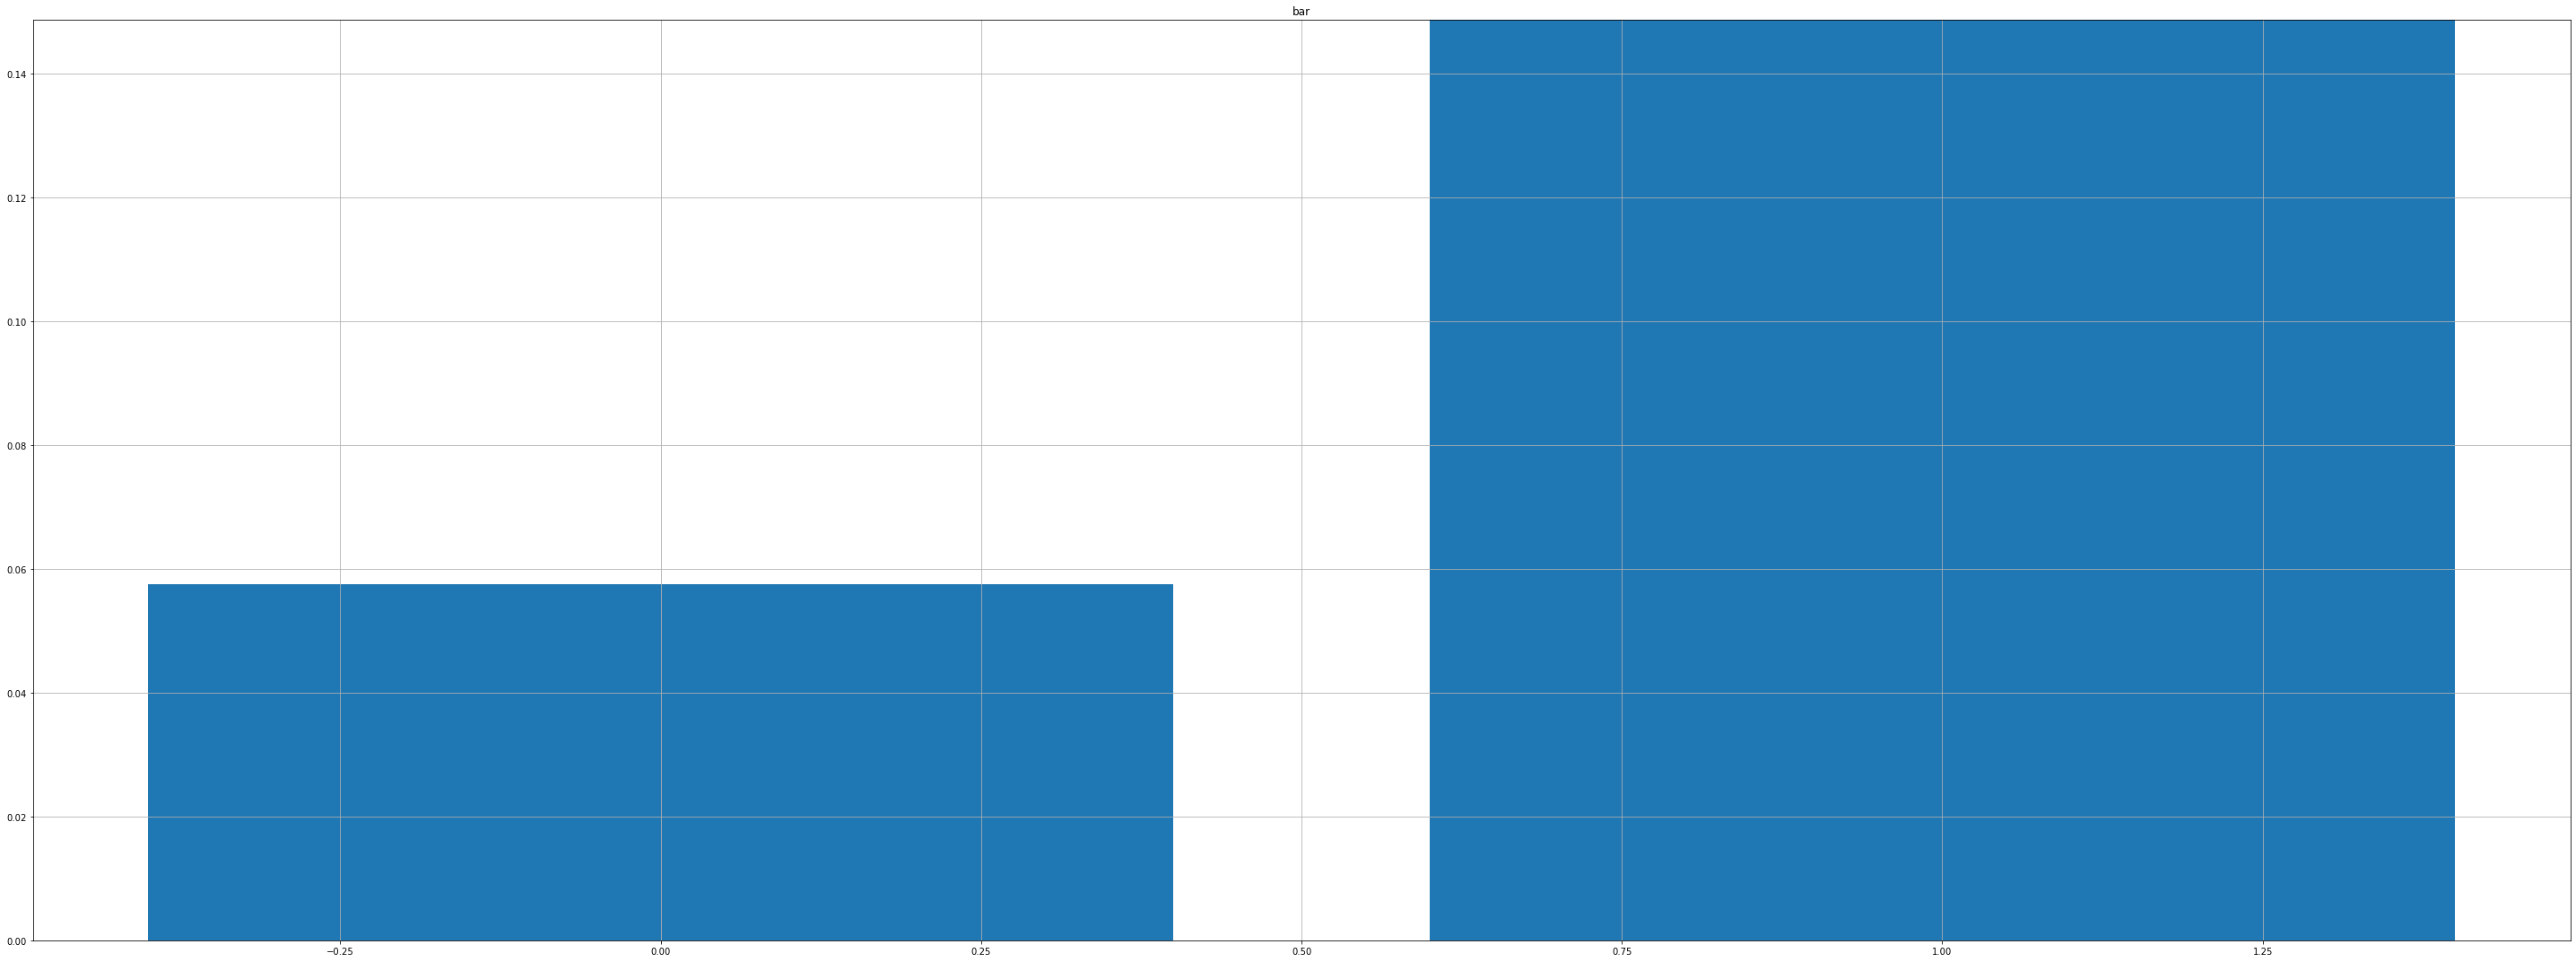

   contact_telephone         y
0                  0  0.114961
1                  1  0.140893


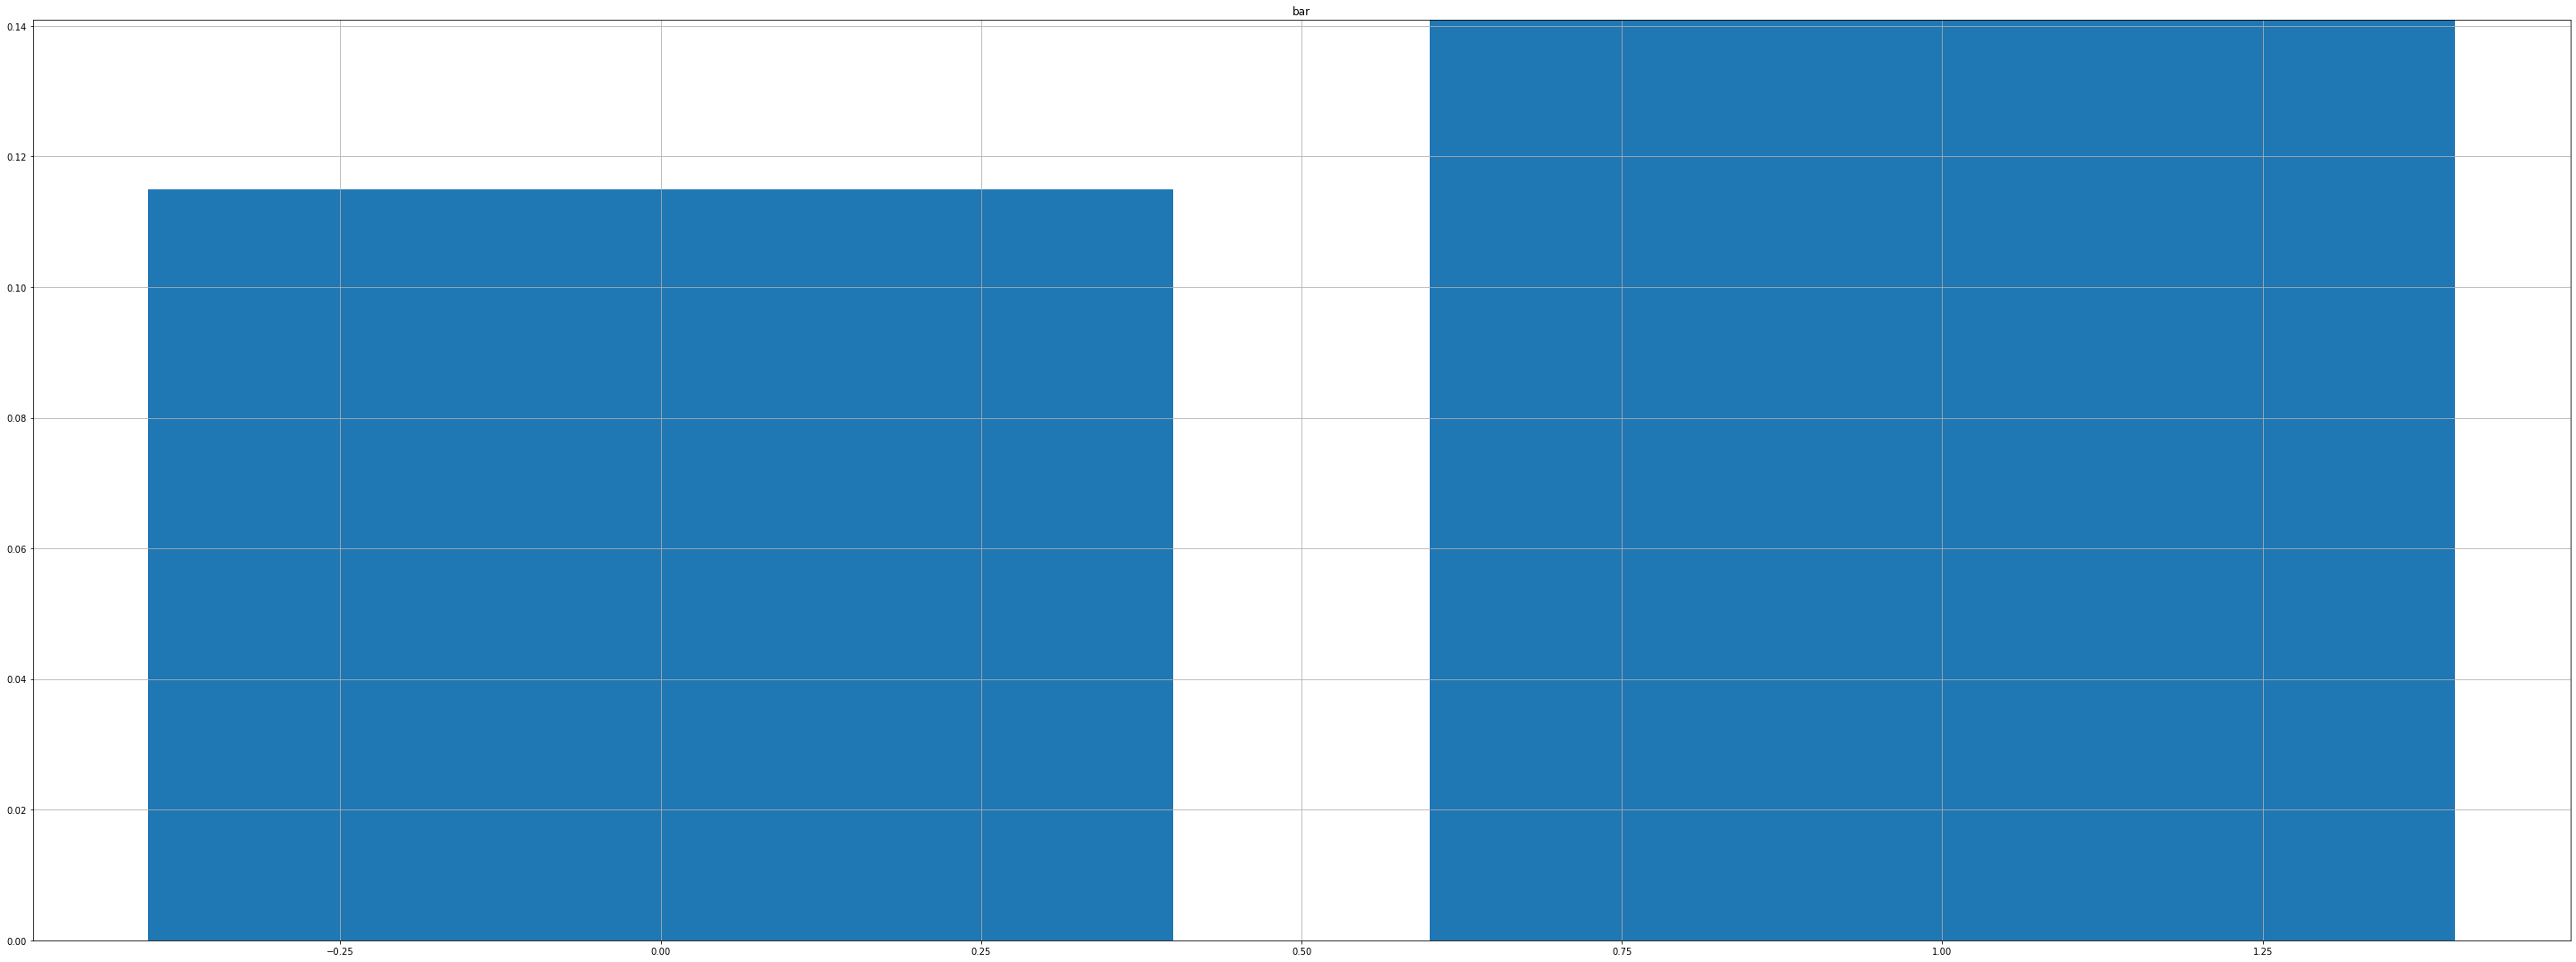

   contact_unknown         y
0                0  0.147905
1                1  0.038720


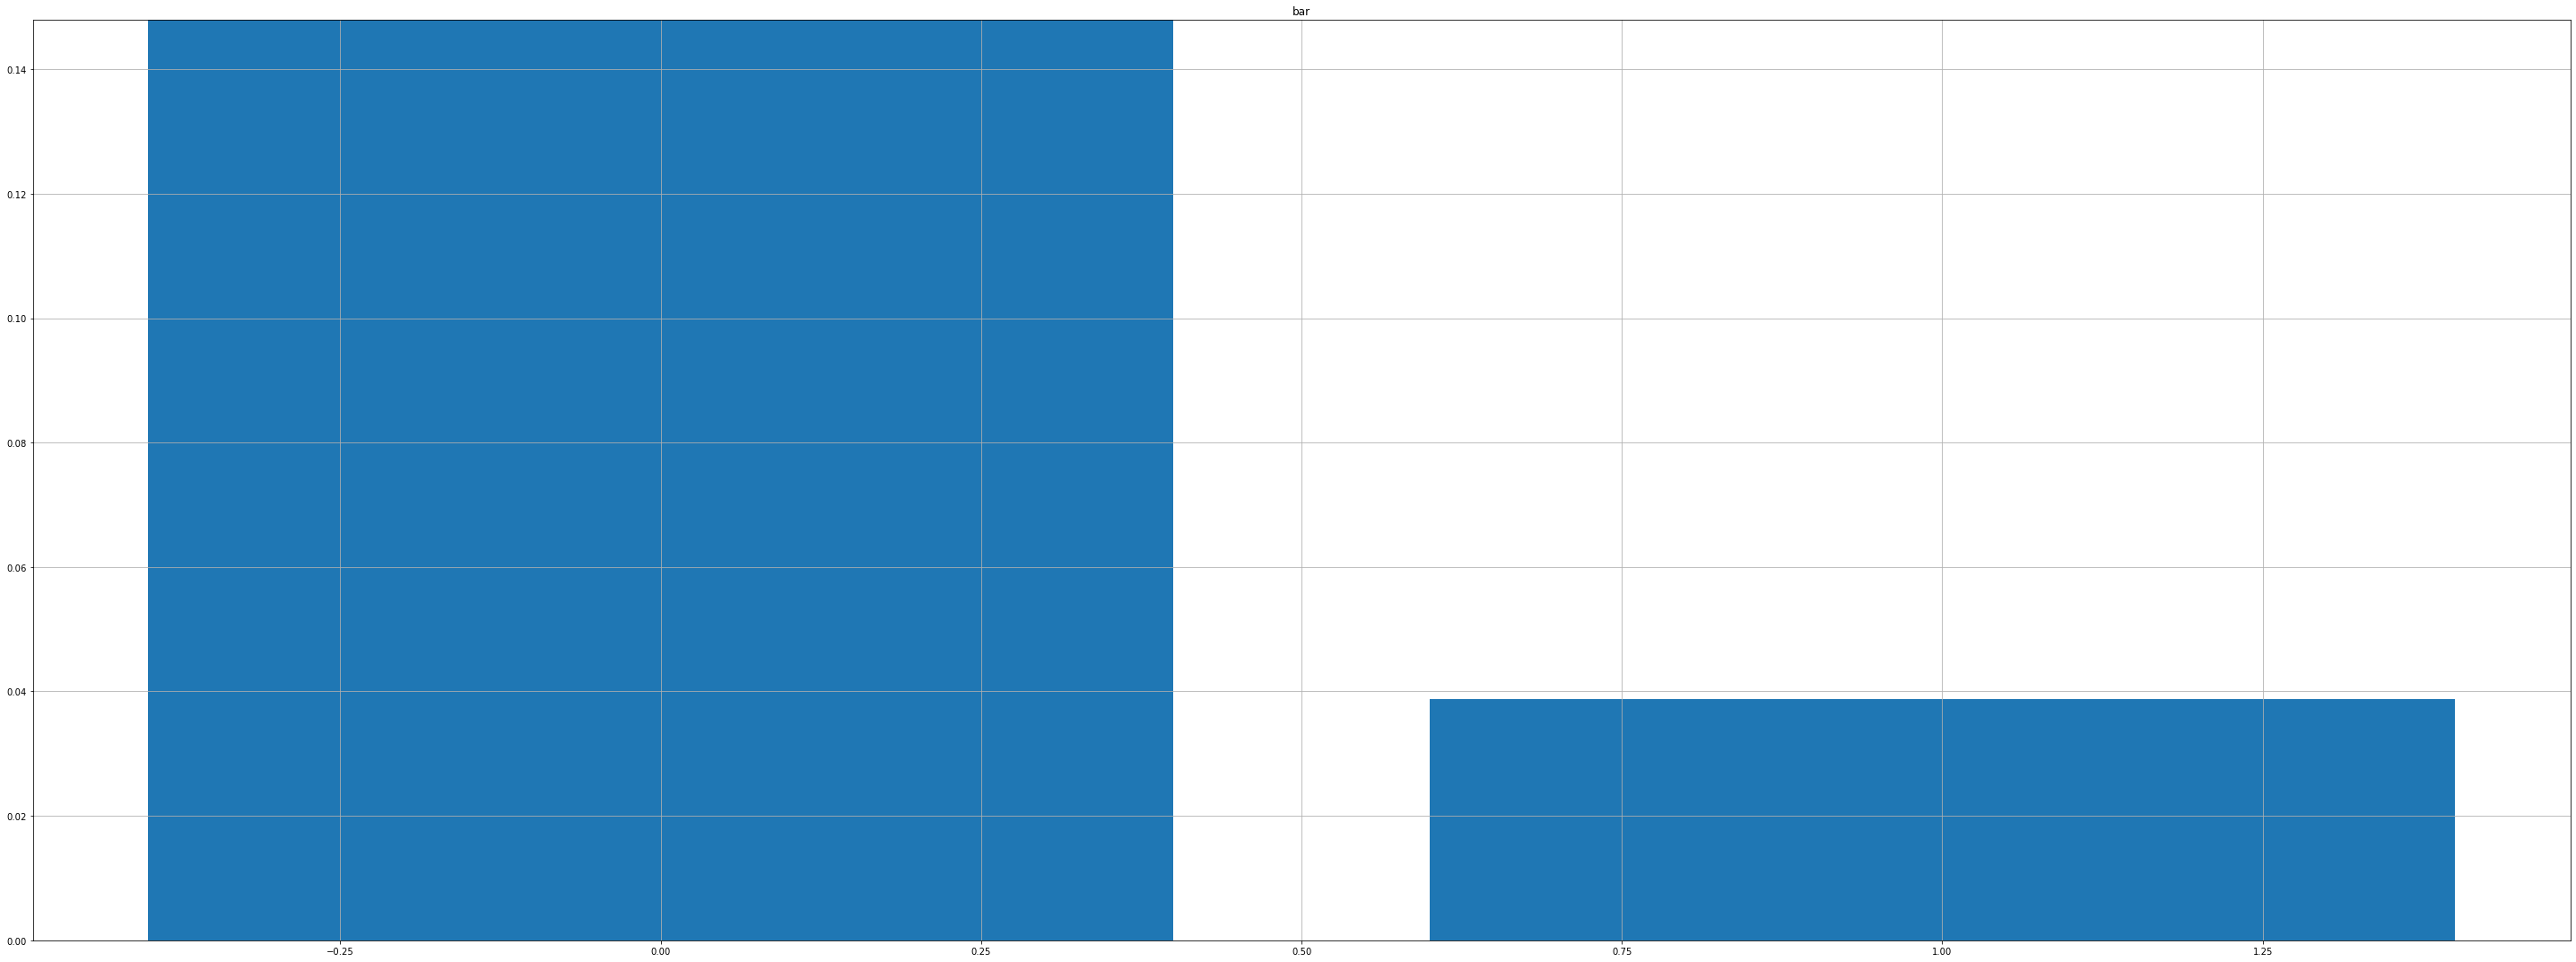

   month_1         y
0        0  0.117098
1        1  0.102123


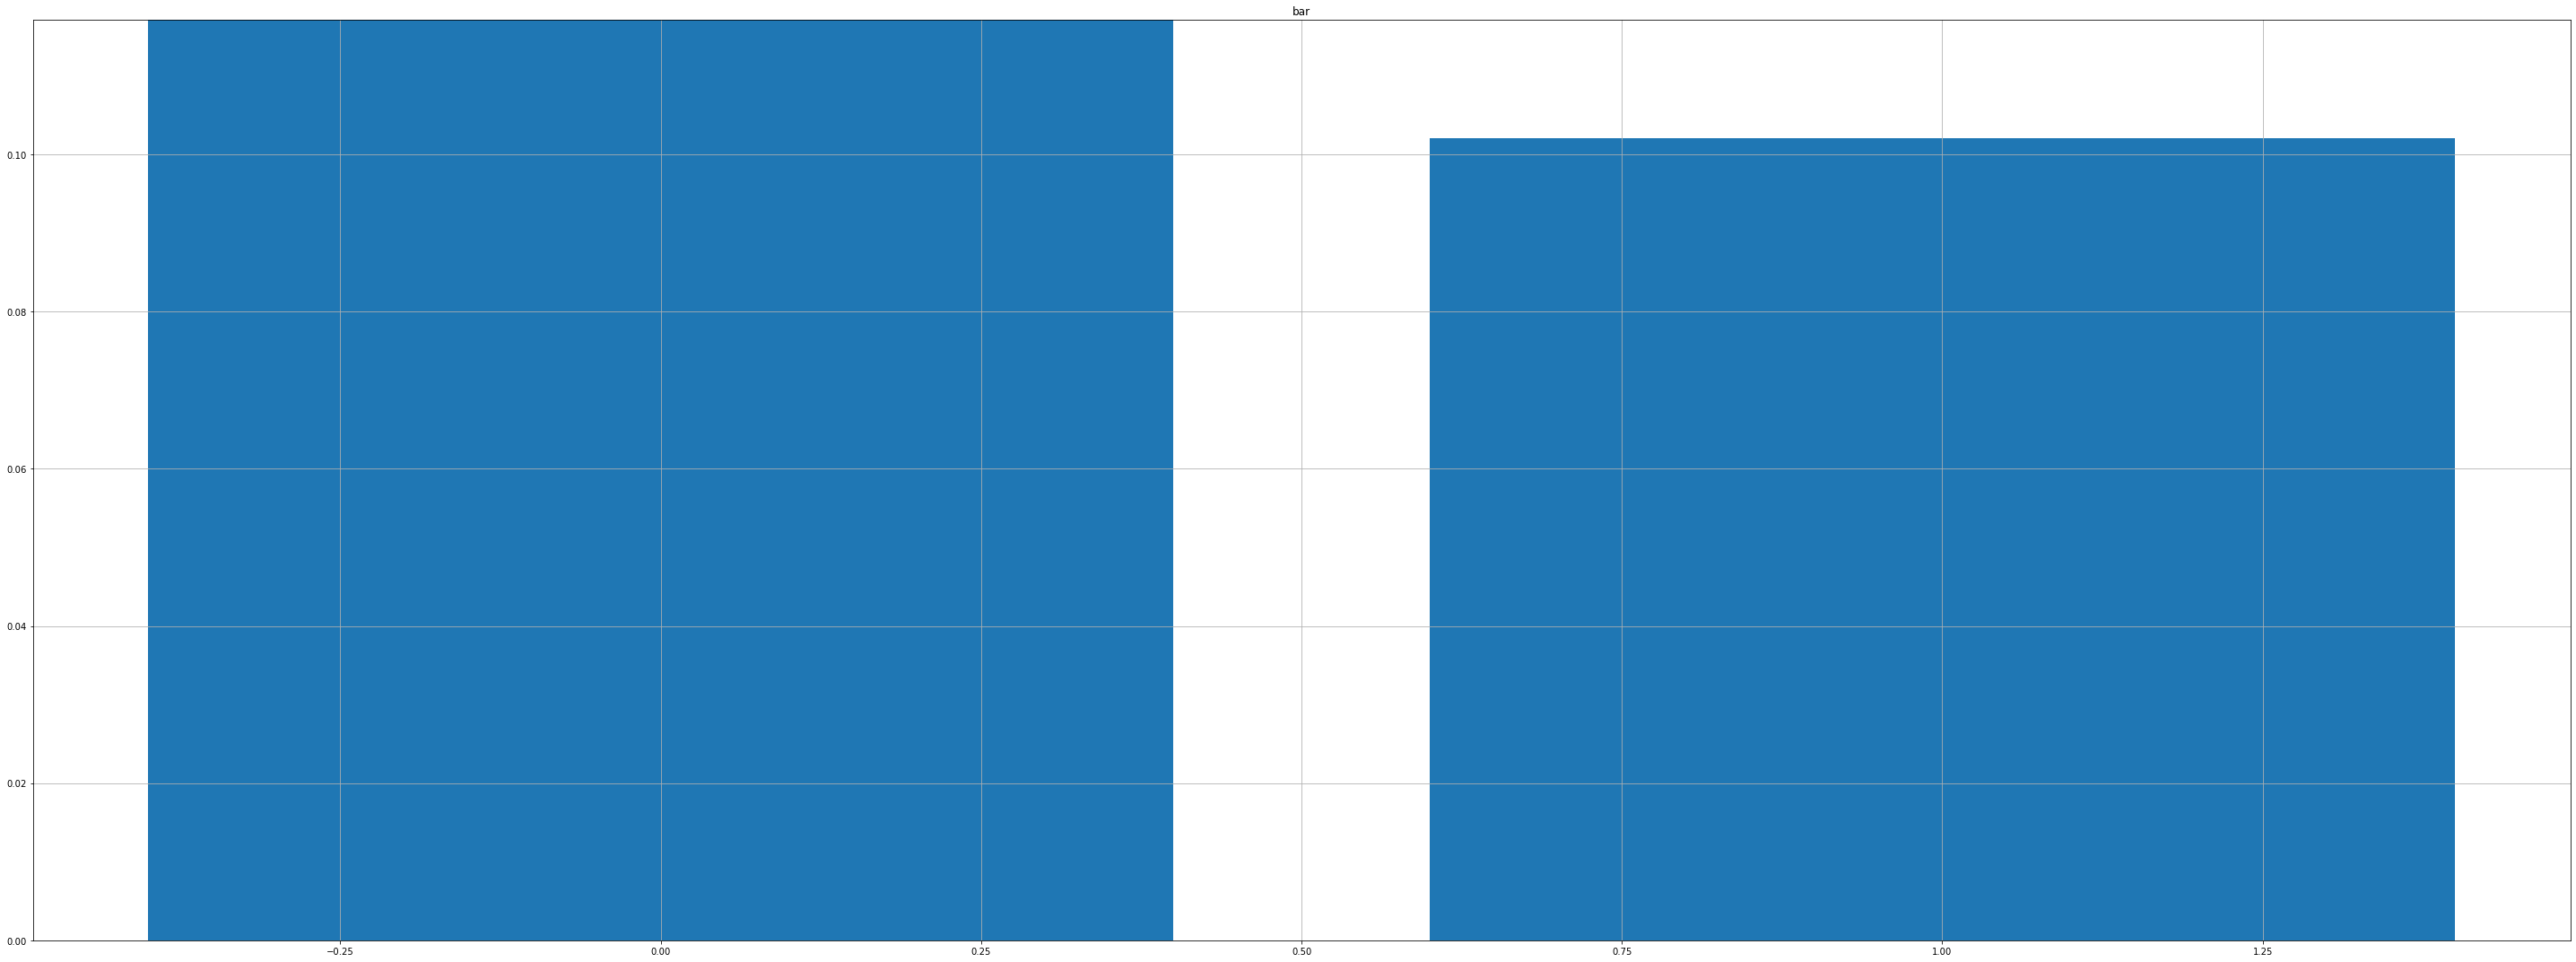

   month_2         y
0        0  0.114109
1        1  0.157212


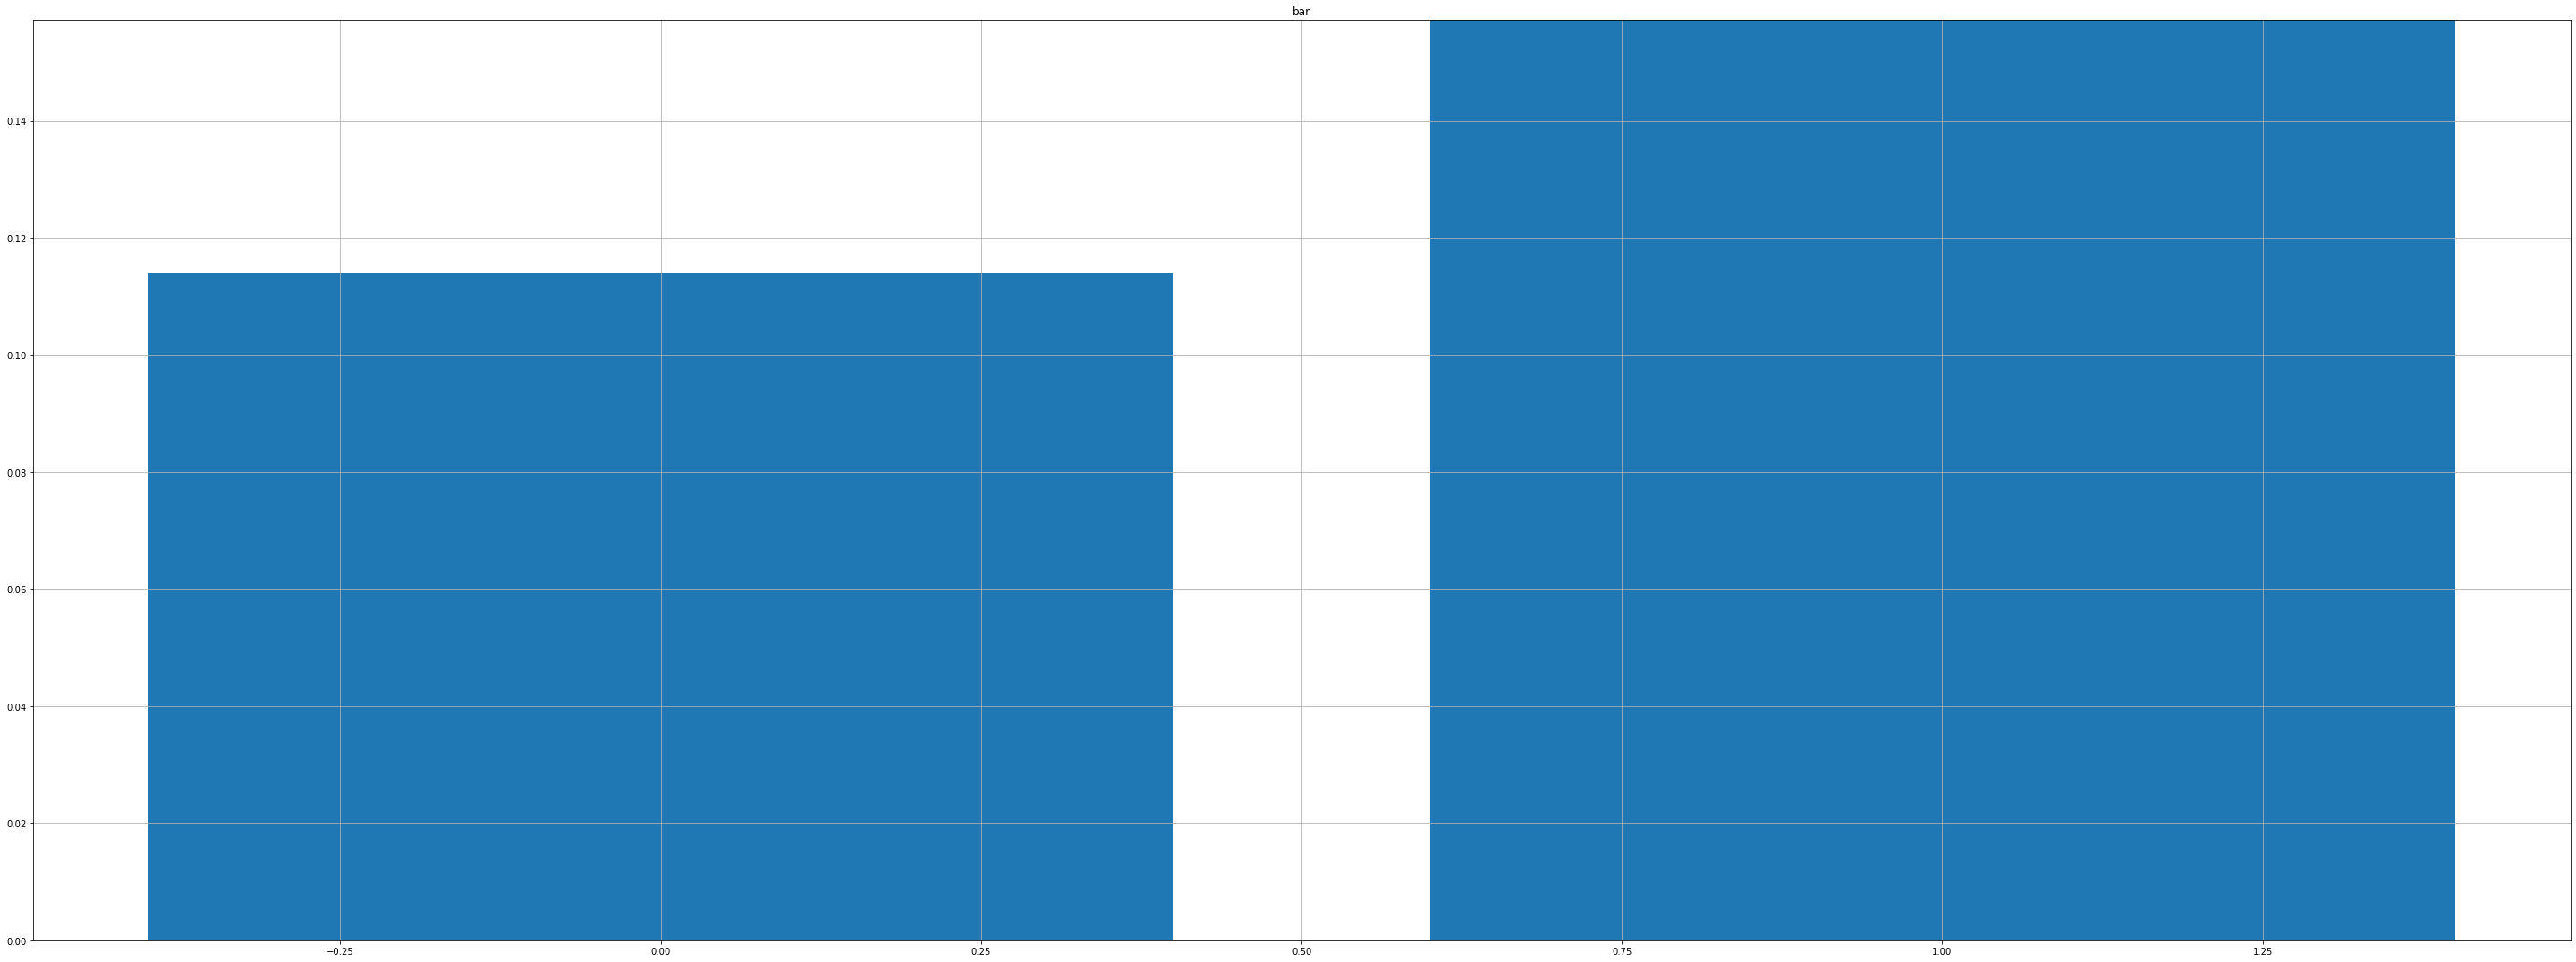

   month_3         y
0        0  0.112336
1        1  0.513274


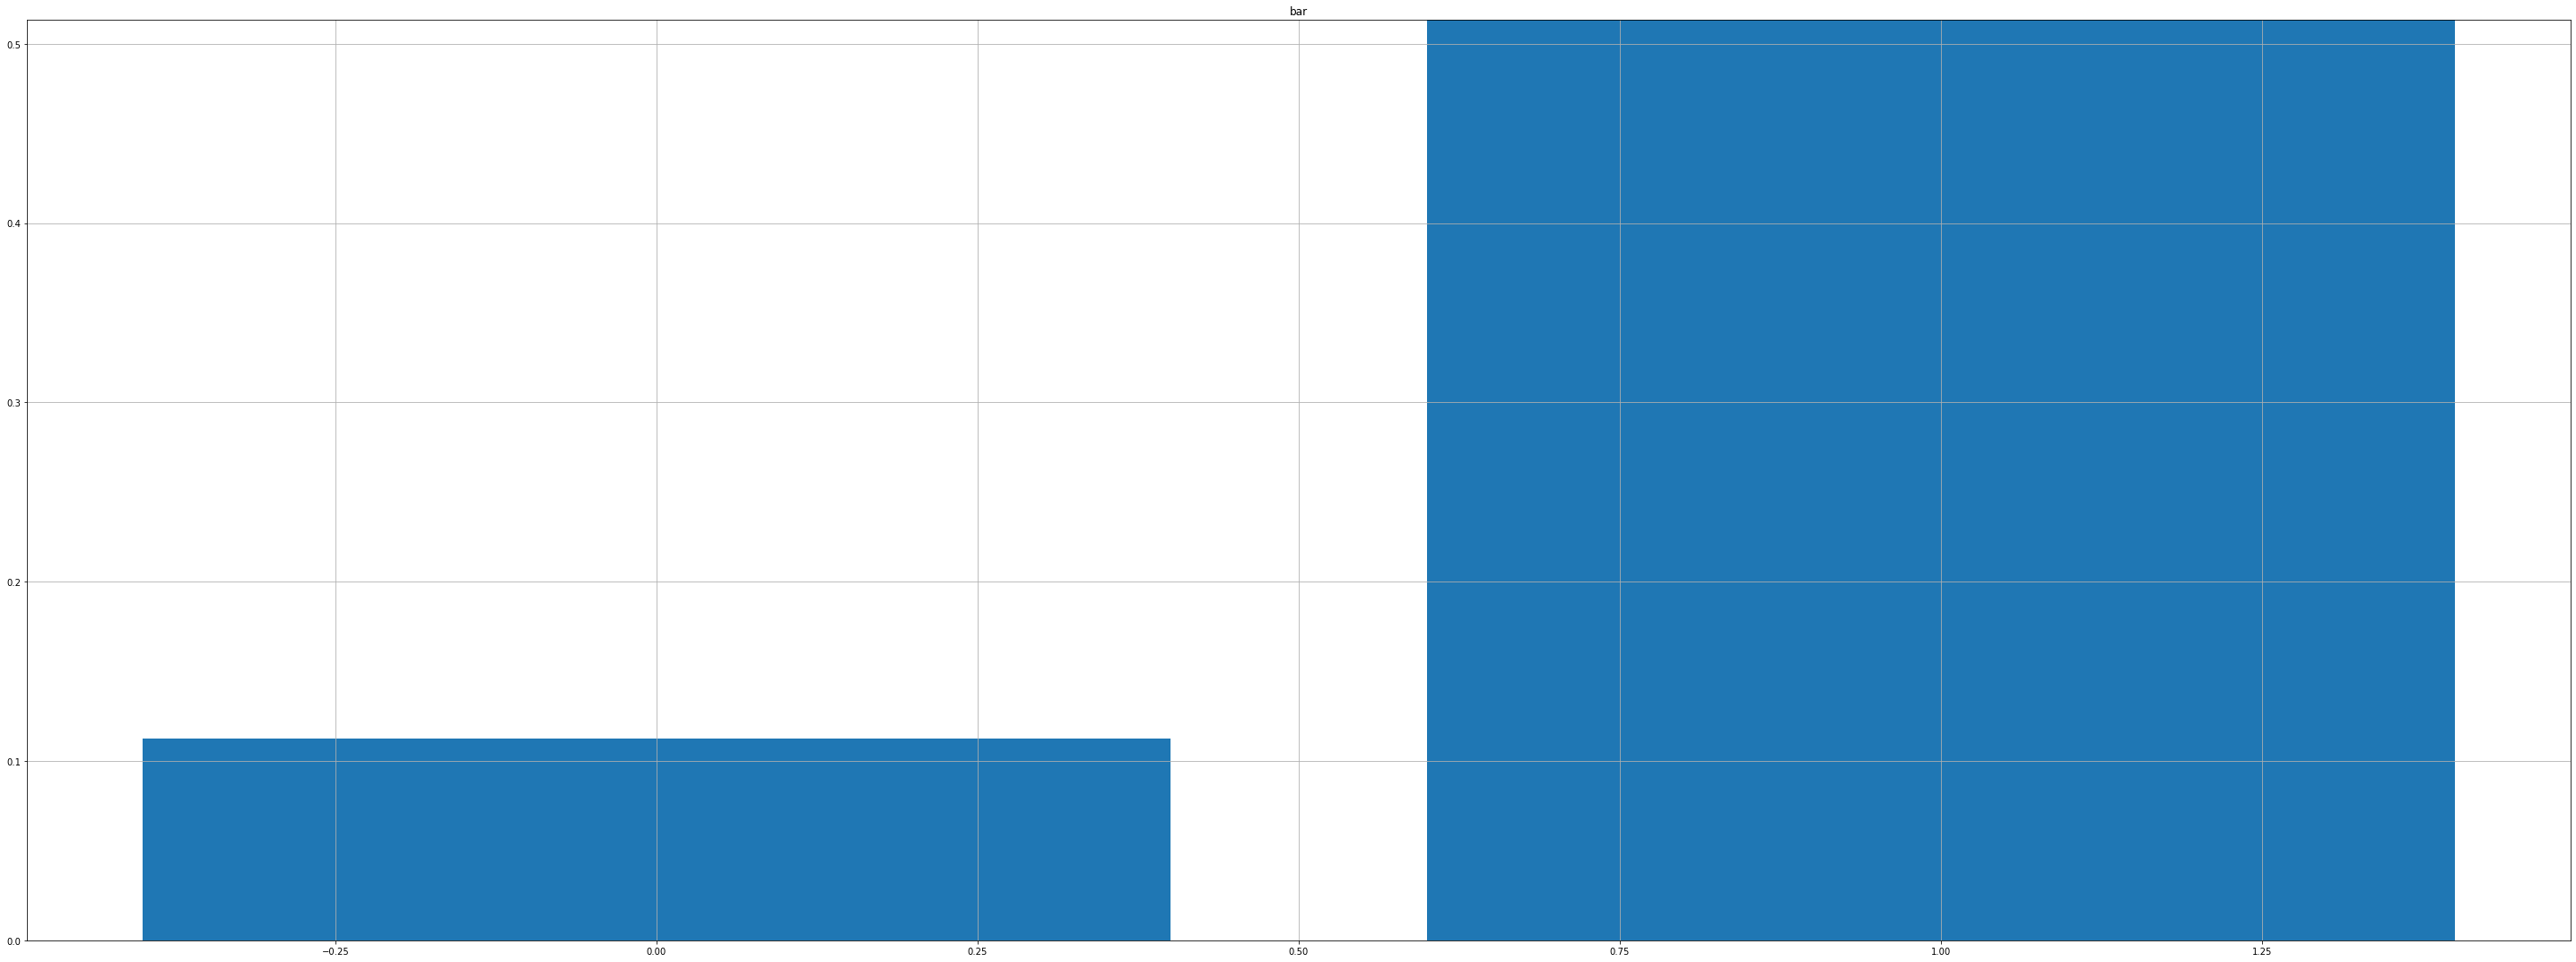

   month_4         y
0        0  0.110357
1        1  0.207538


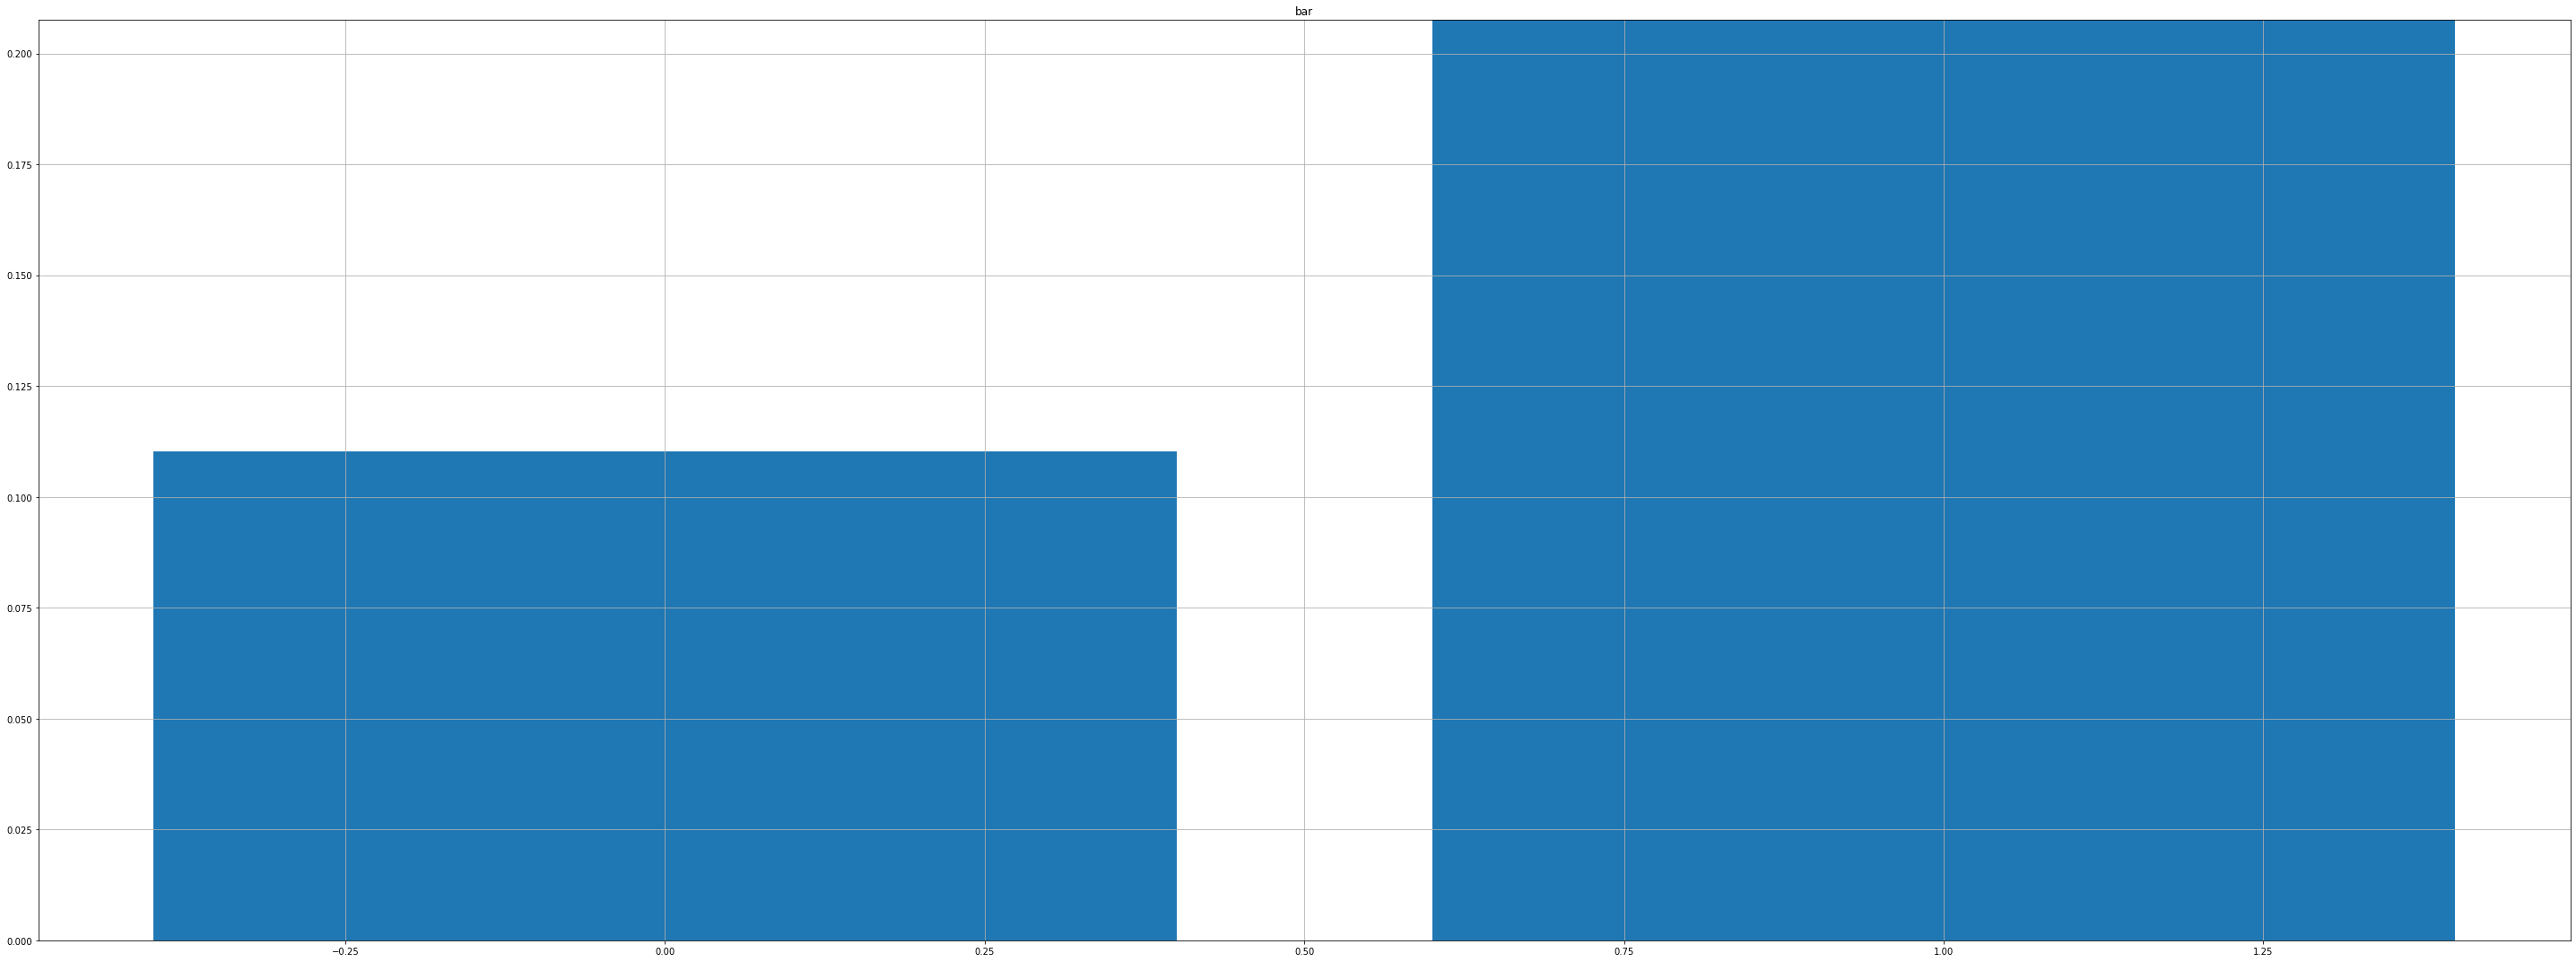

   month_5         y
0        0  0.138168
1        1  0.066855


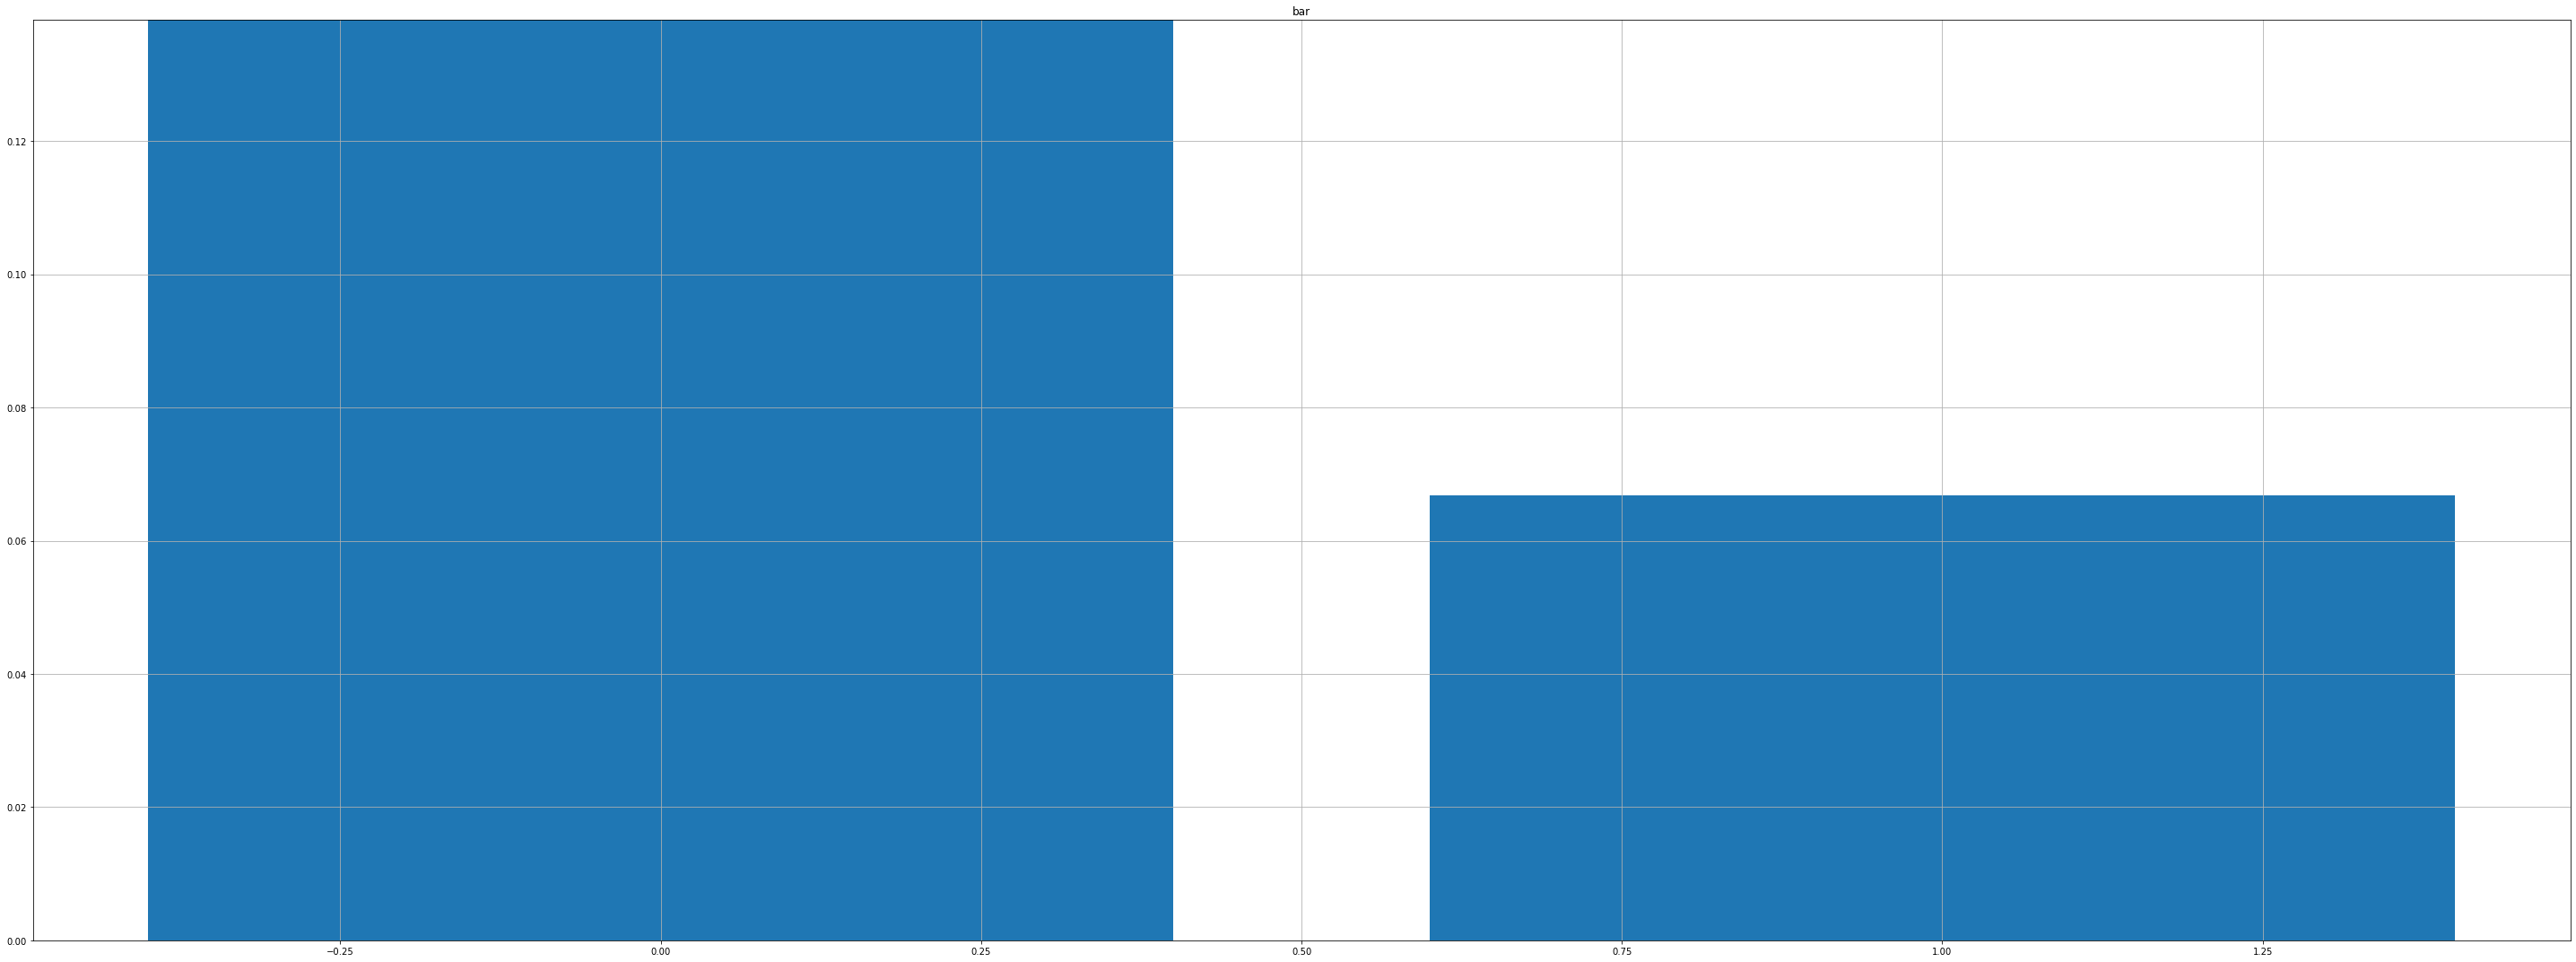

   month_6         y
0        0  0.119578
1        1  0.095025


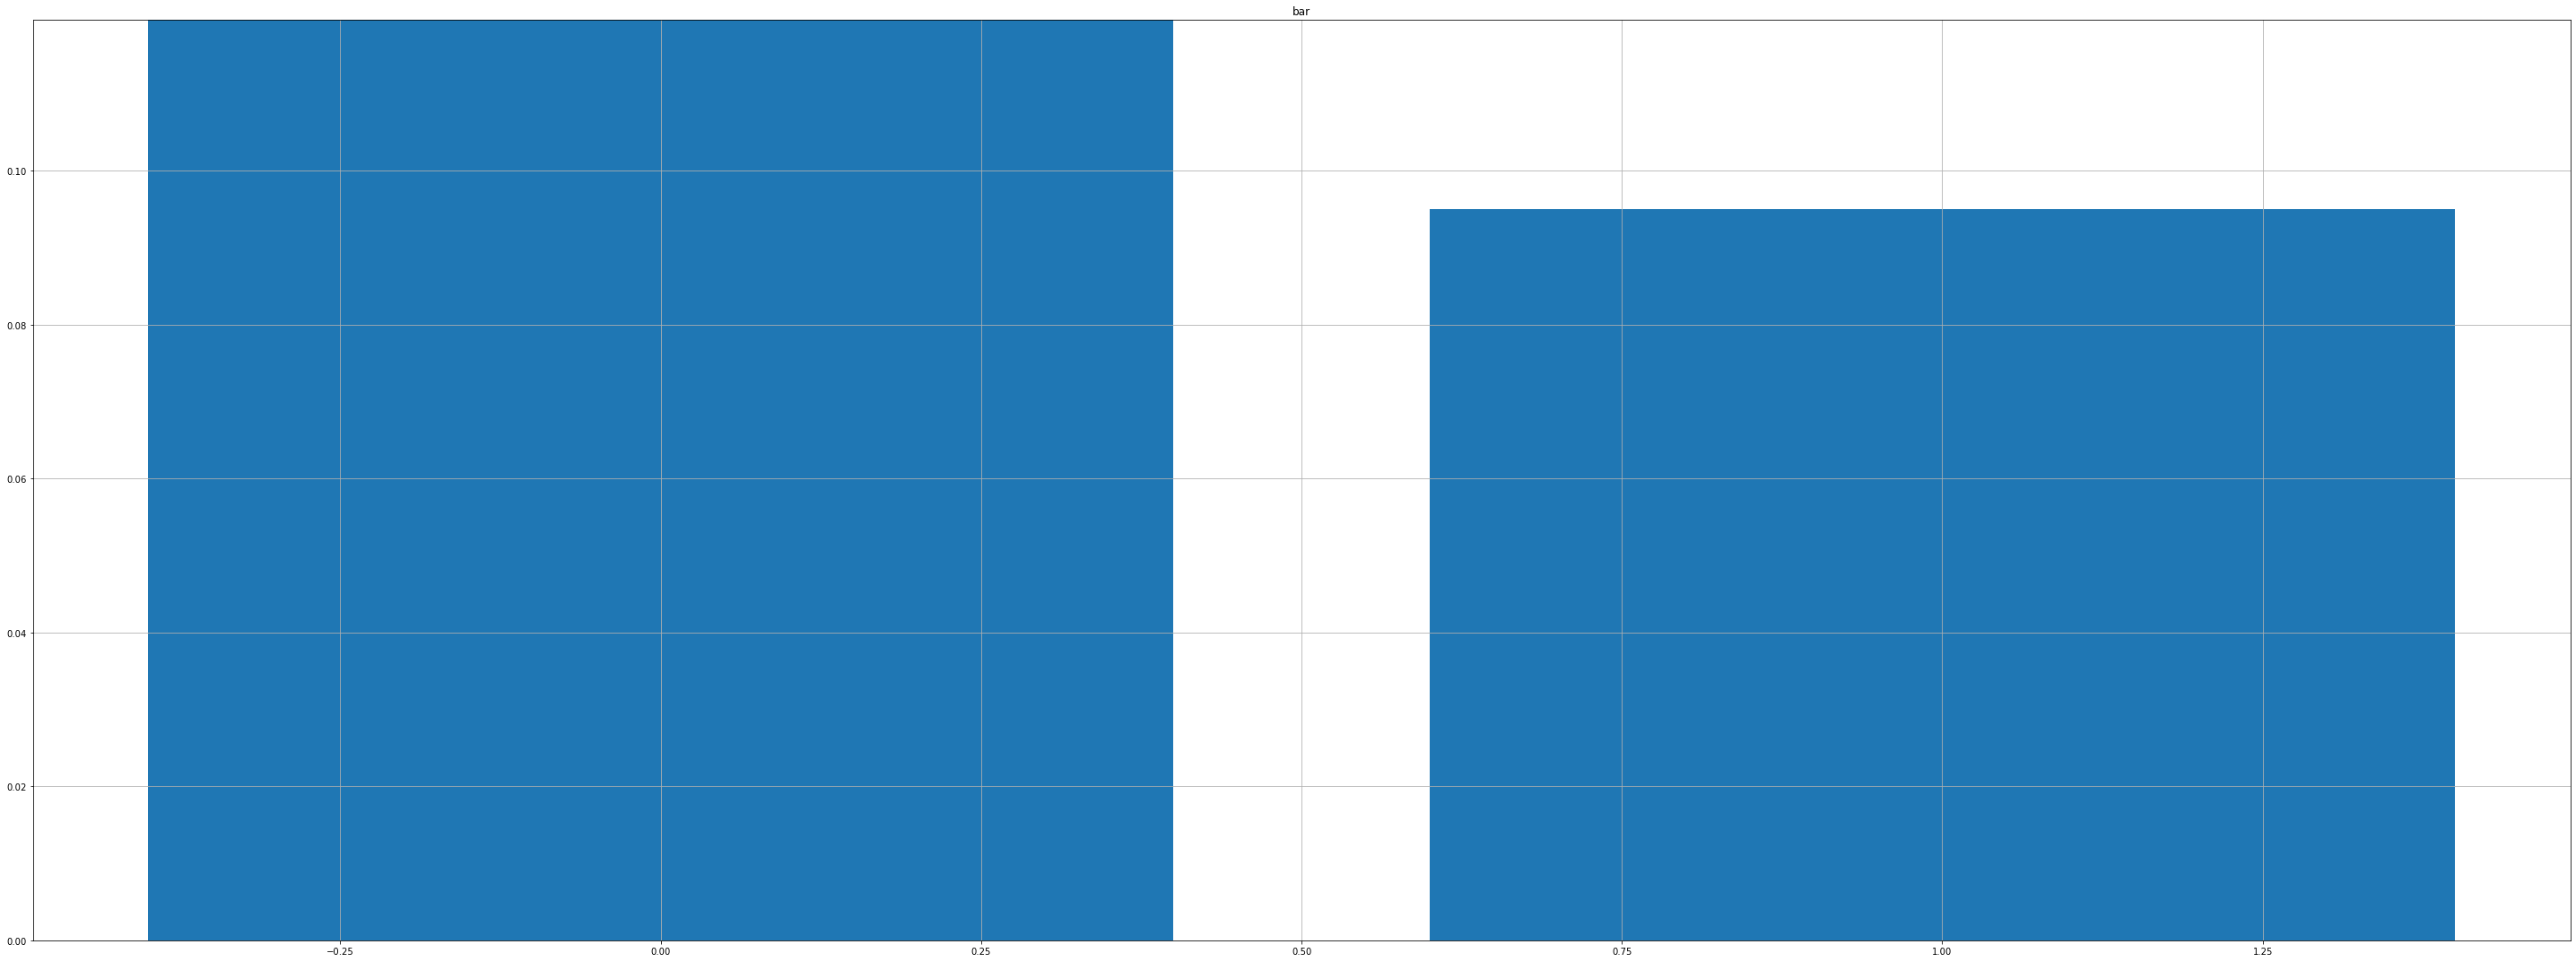

   month_7         y
0        0  0.121154
1        1  0.091511


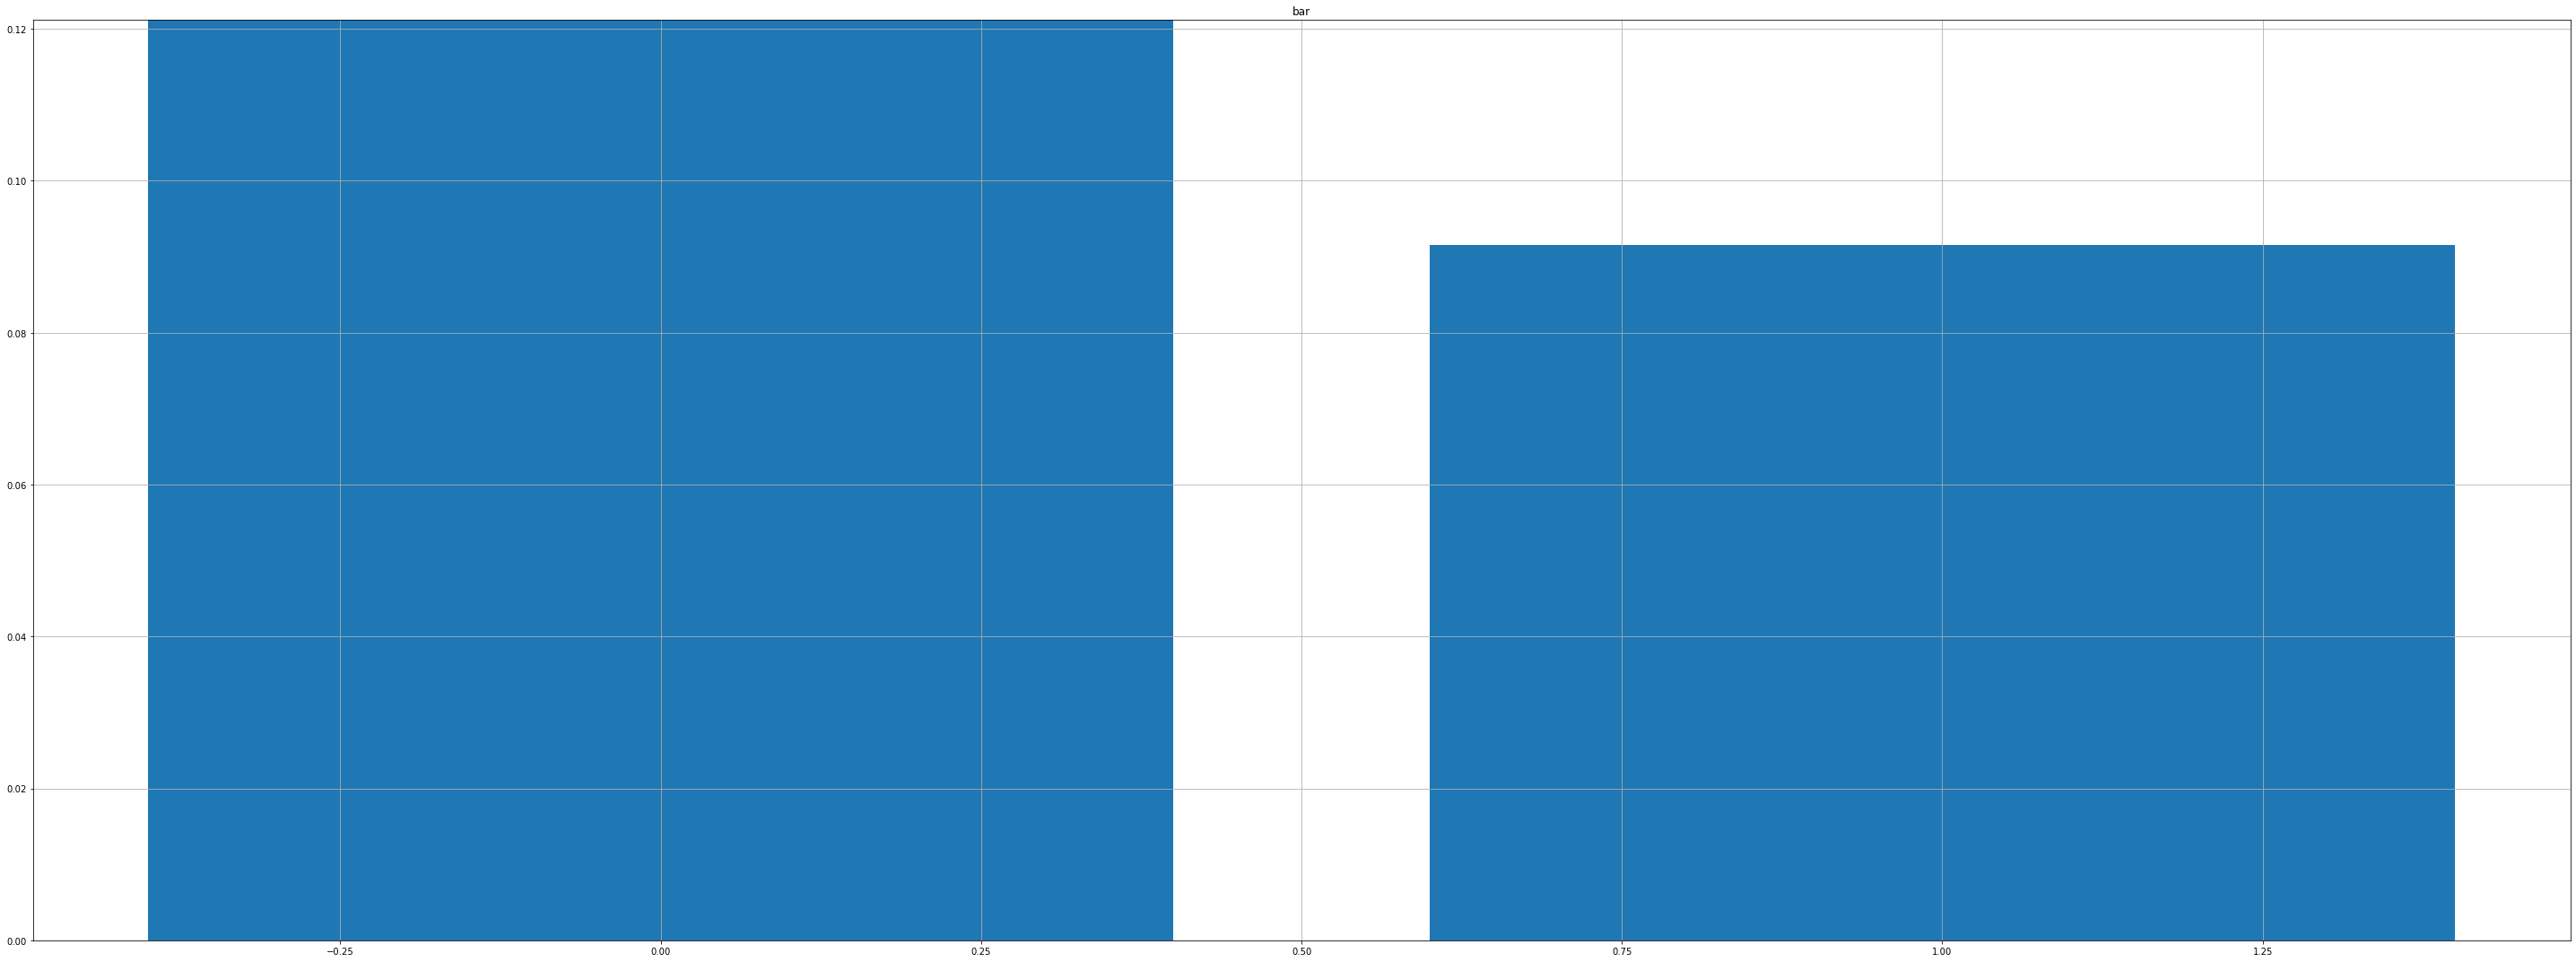

   month_8         y
0        0  0.117720
1        1  0.109812


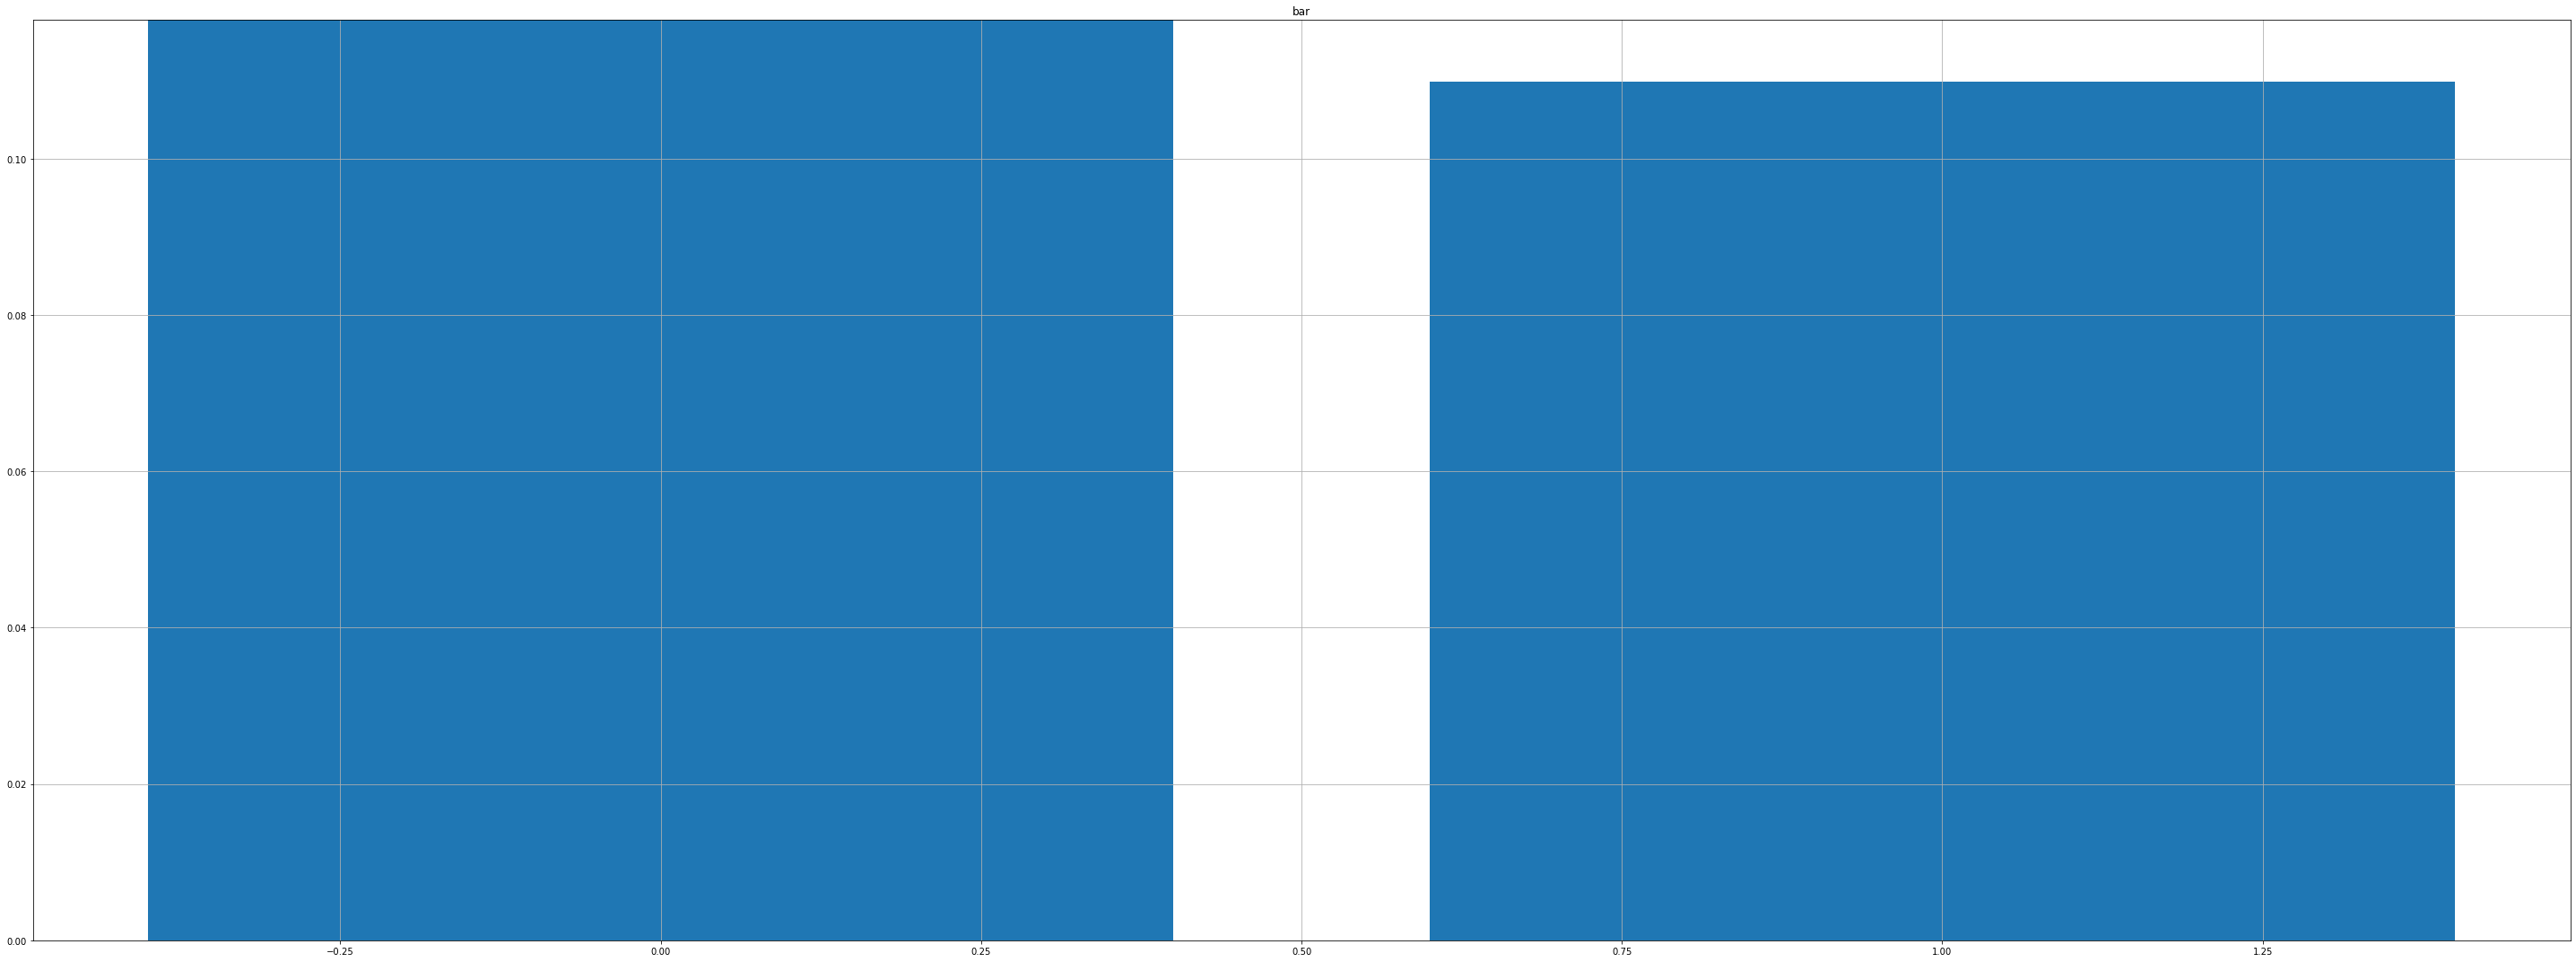

   month_9         y
0        0  0.112160
1        1  0.468514


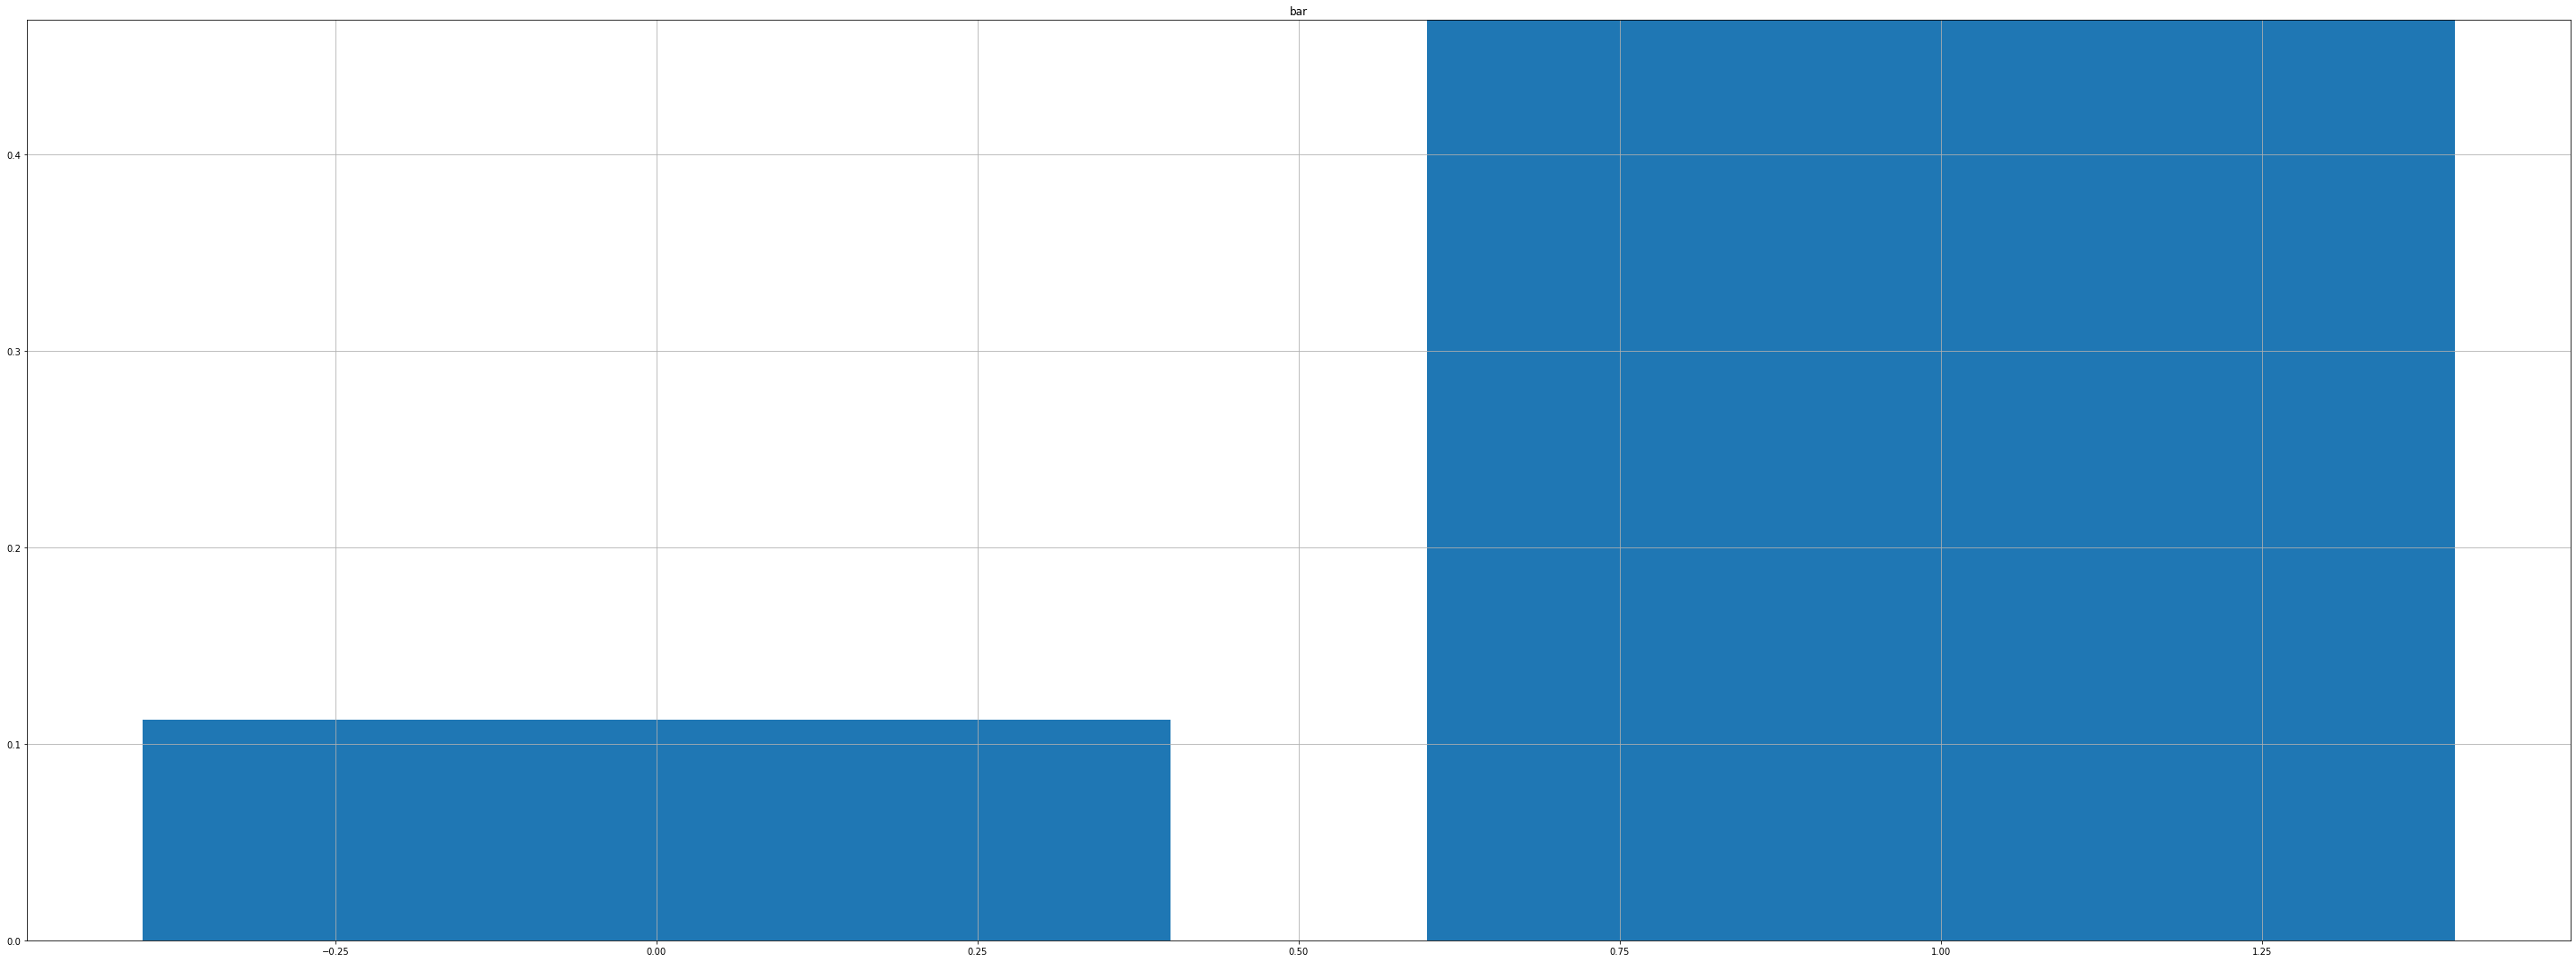

   month_10         y
0         0  0.111036
1         1  0.444444


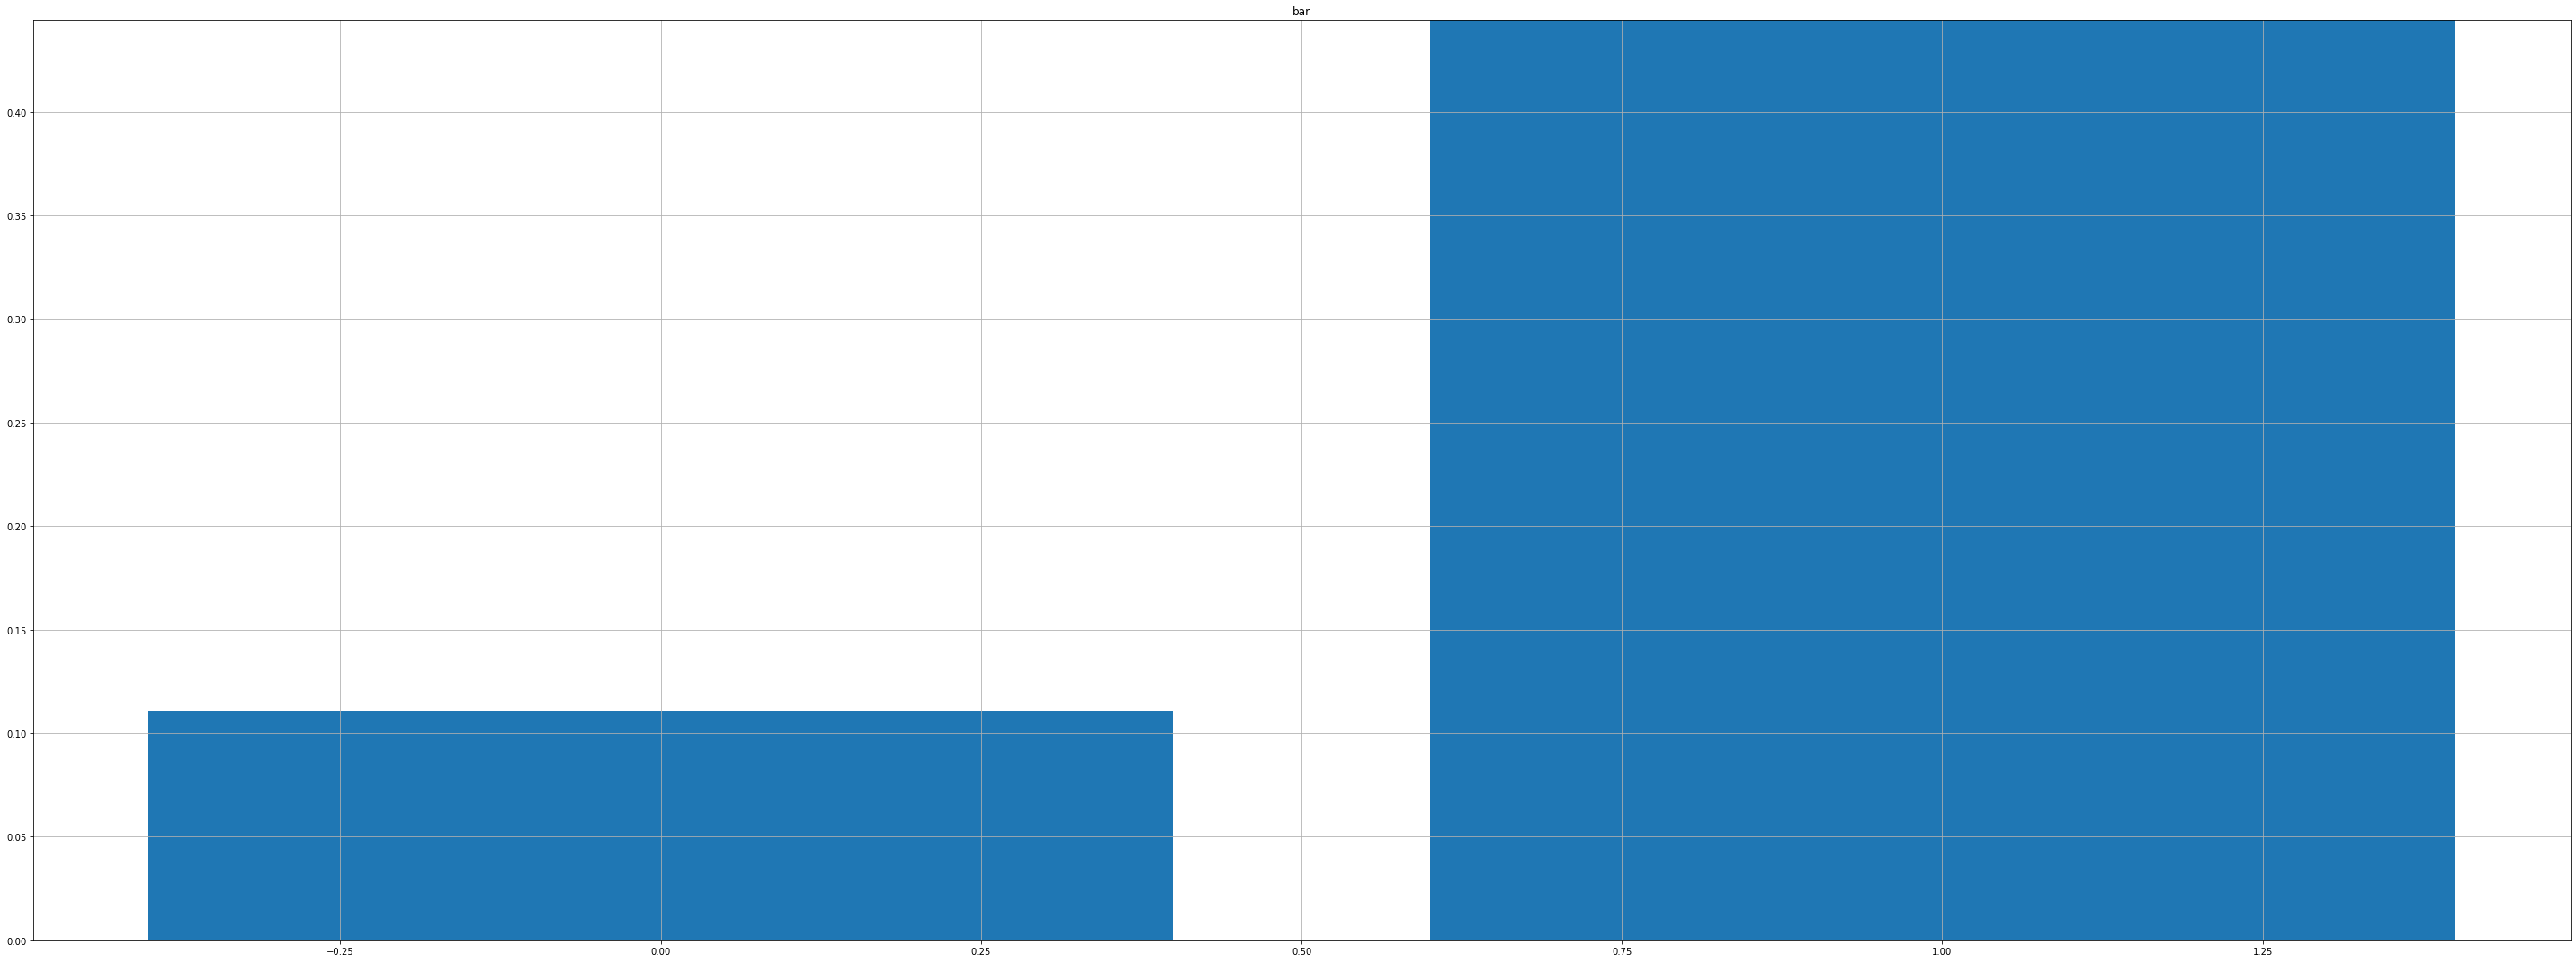

   month_11         y
0         0  0.117935
1         1  0.103152


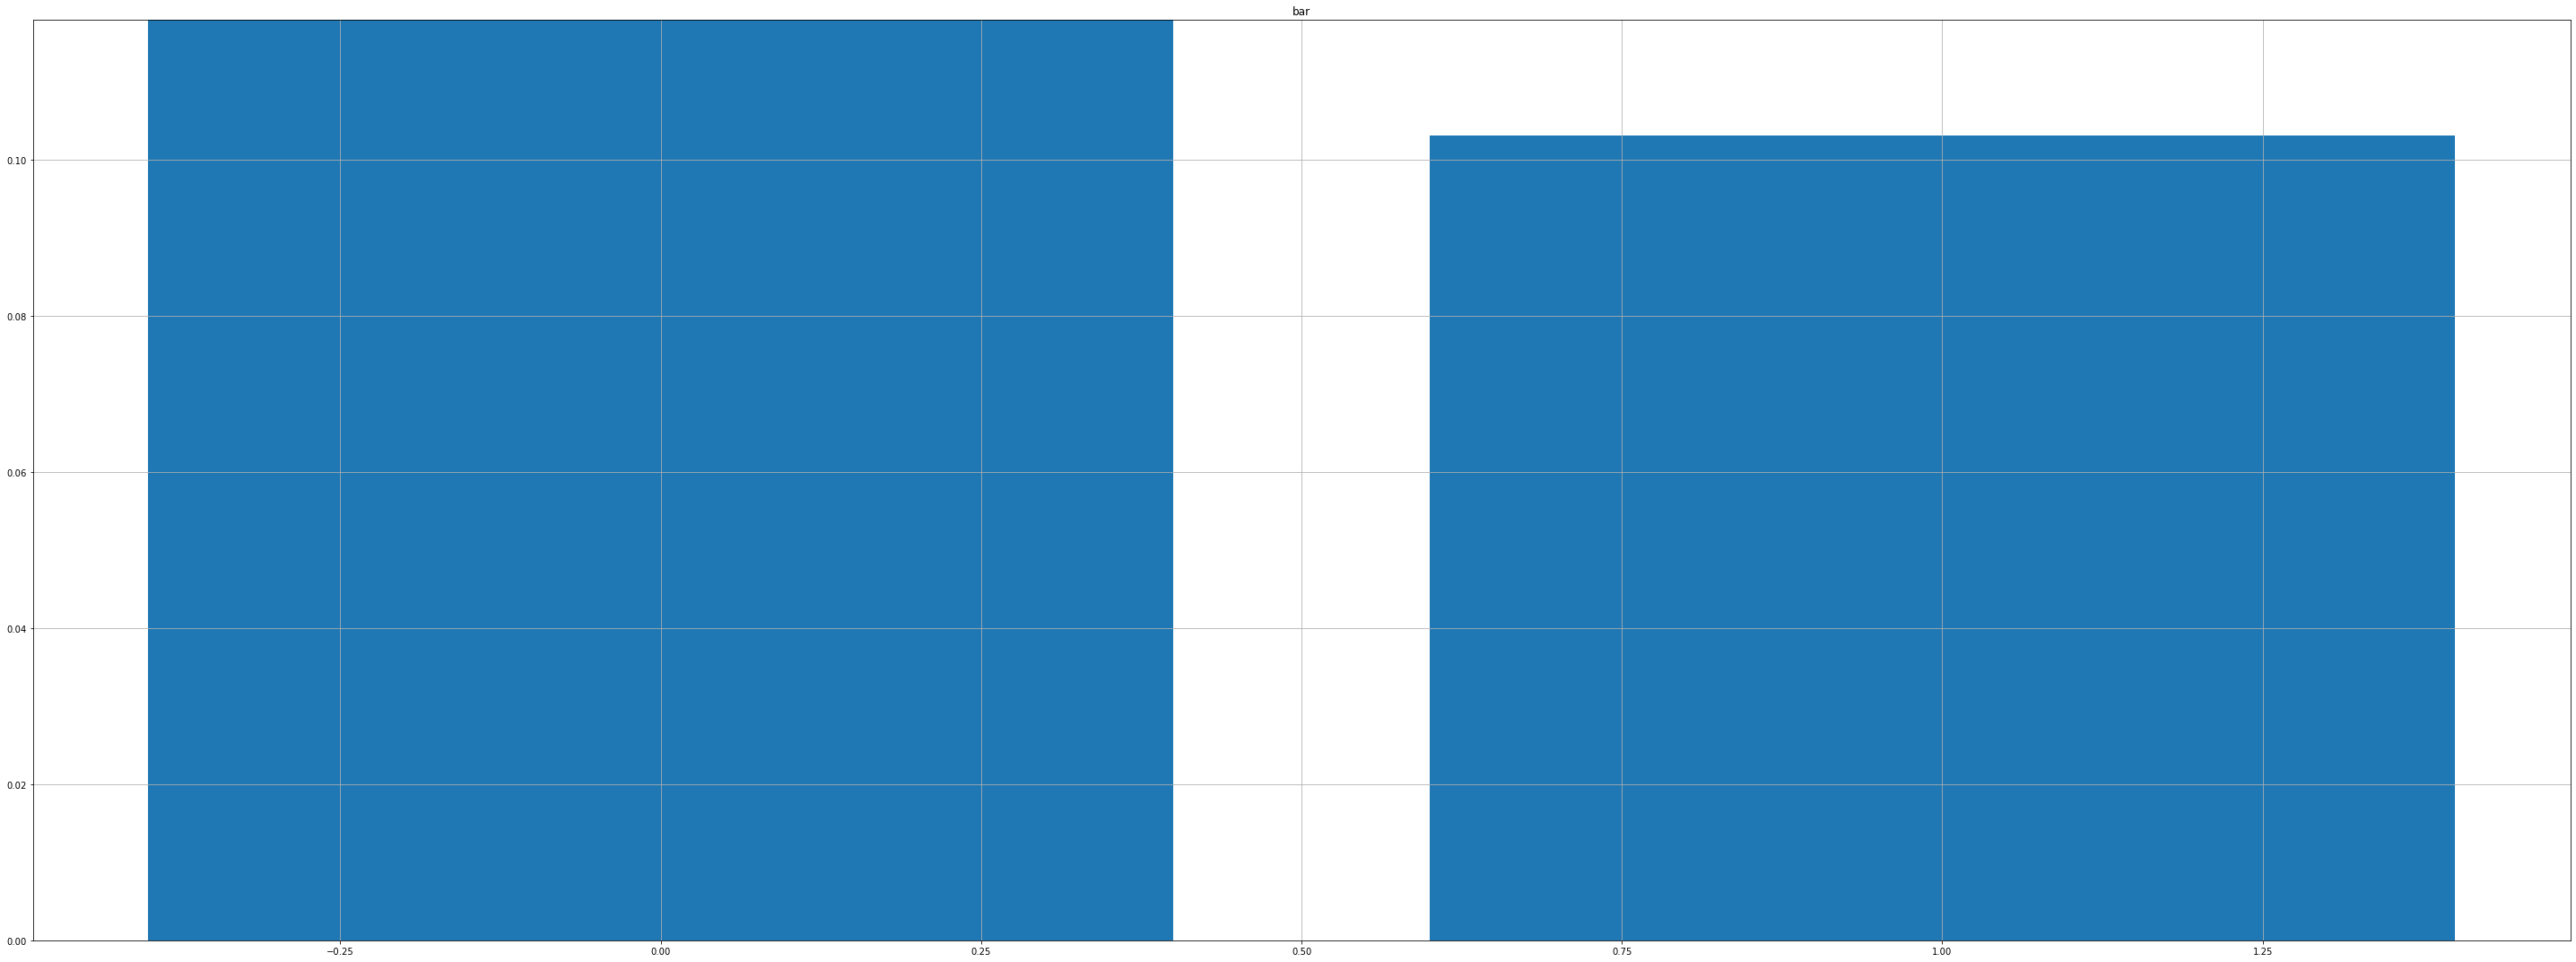

   month_12         y
0         0  0.114985
1         1  0.448718


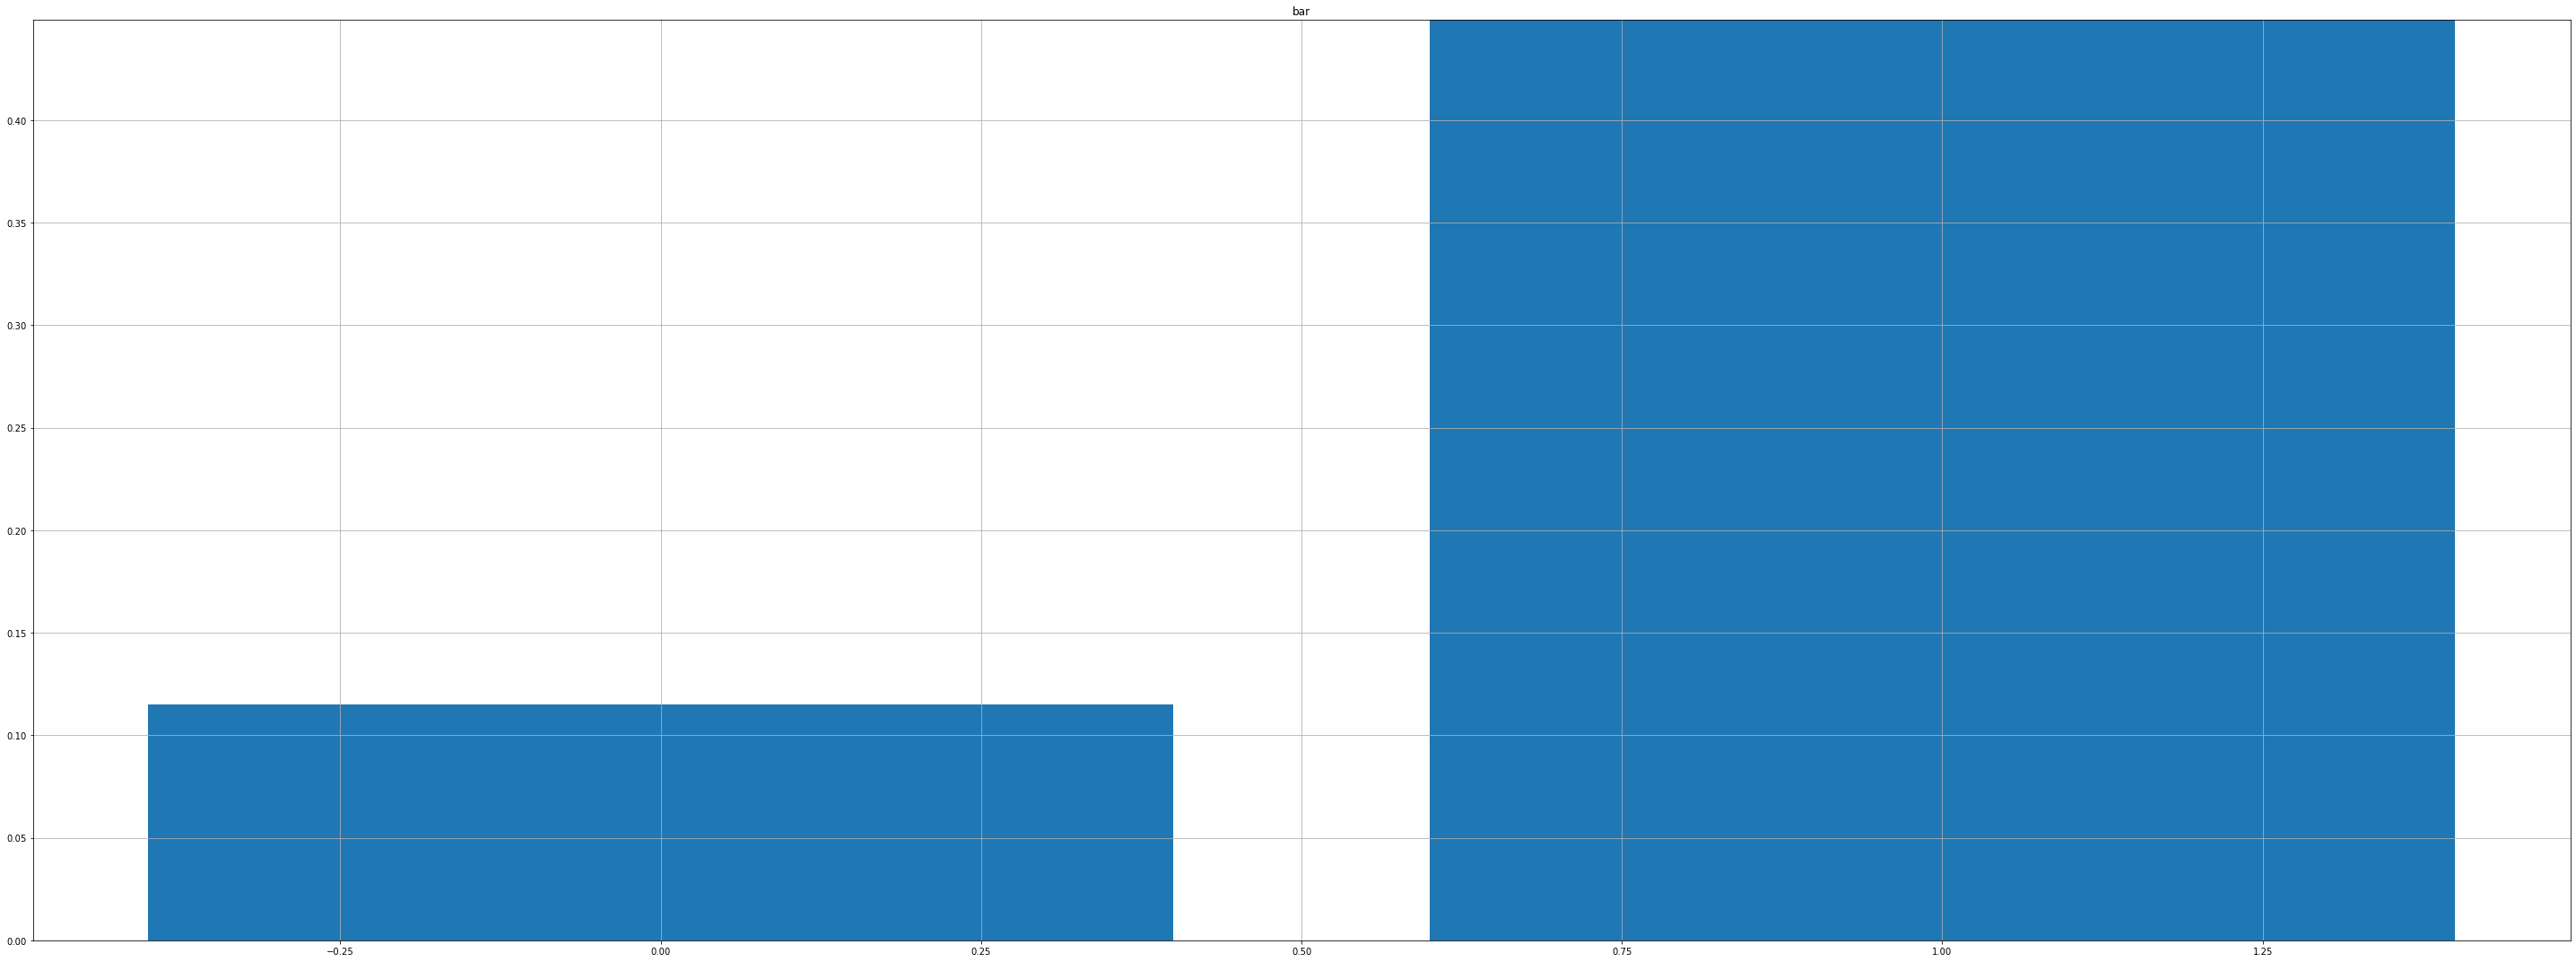

   poutcome_failure         y
0                 0  0.115258
1                 1  0.128009


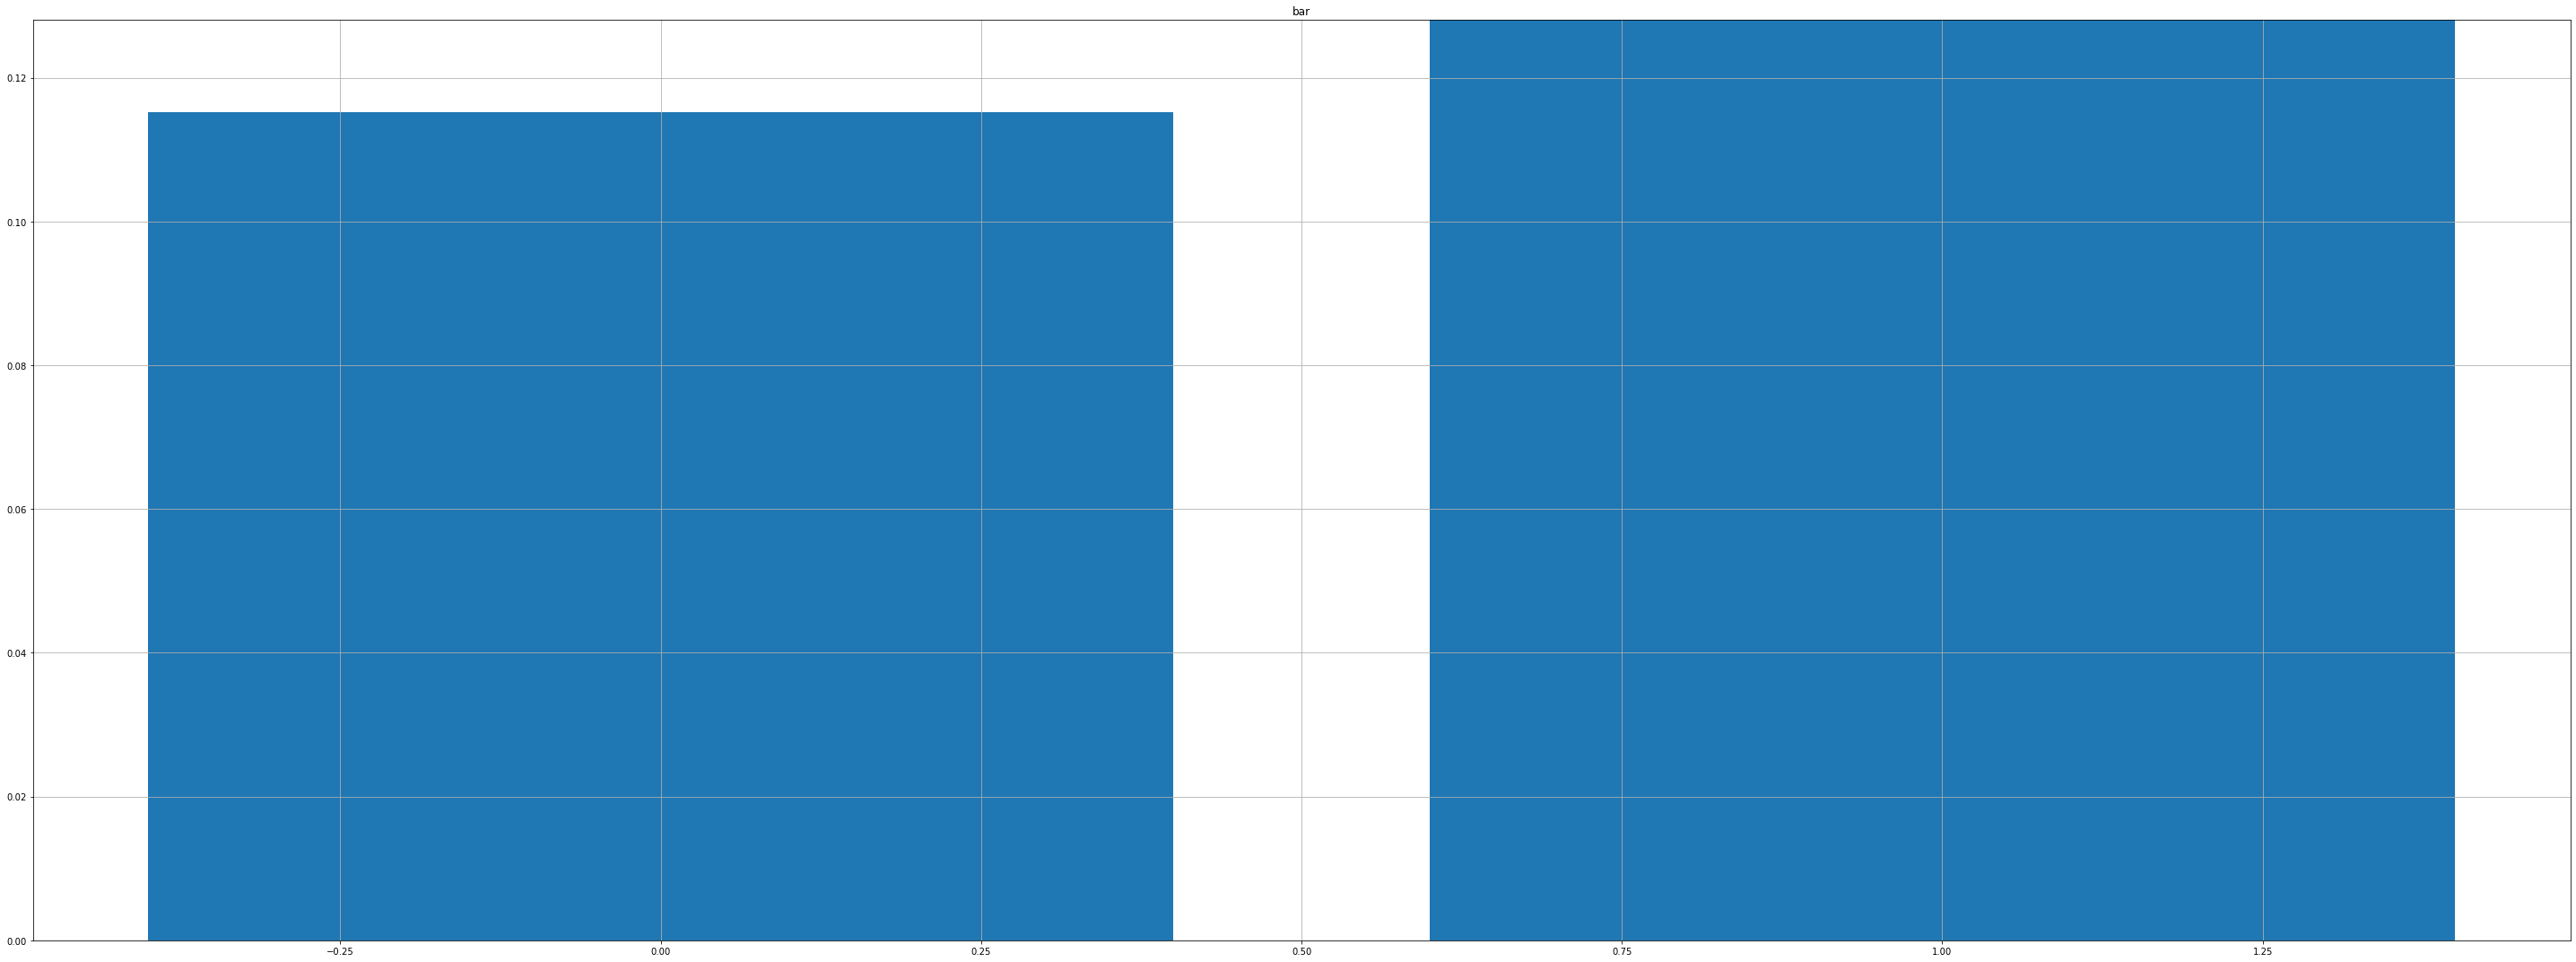

   poutcome_other         y
0               0  0.114376
1               1  0.168175


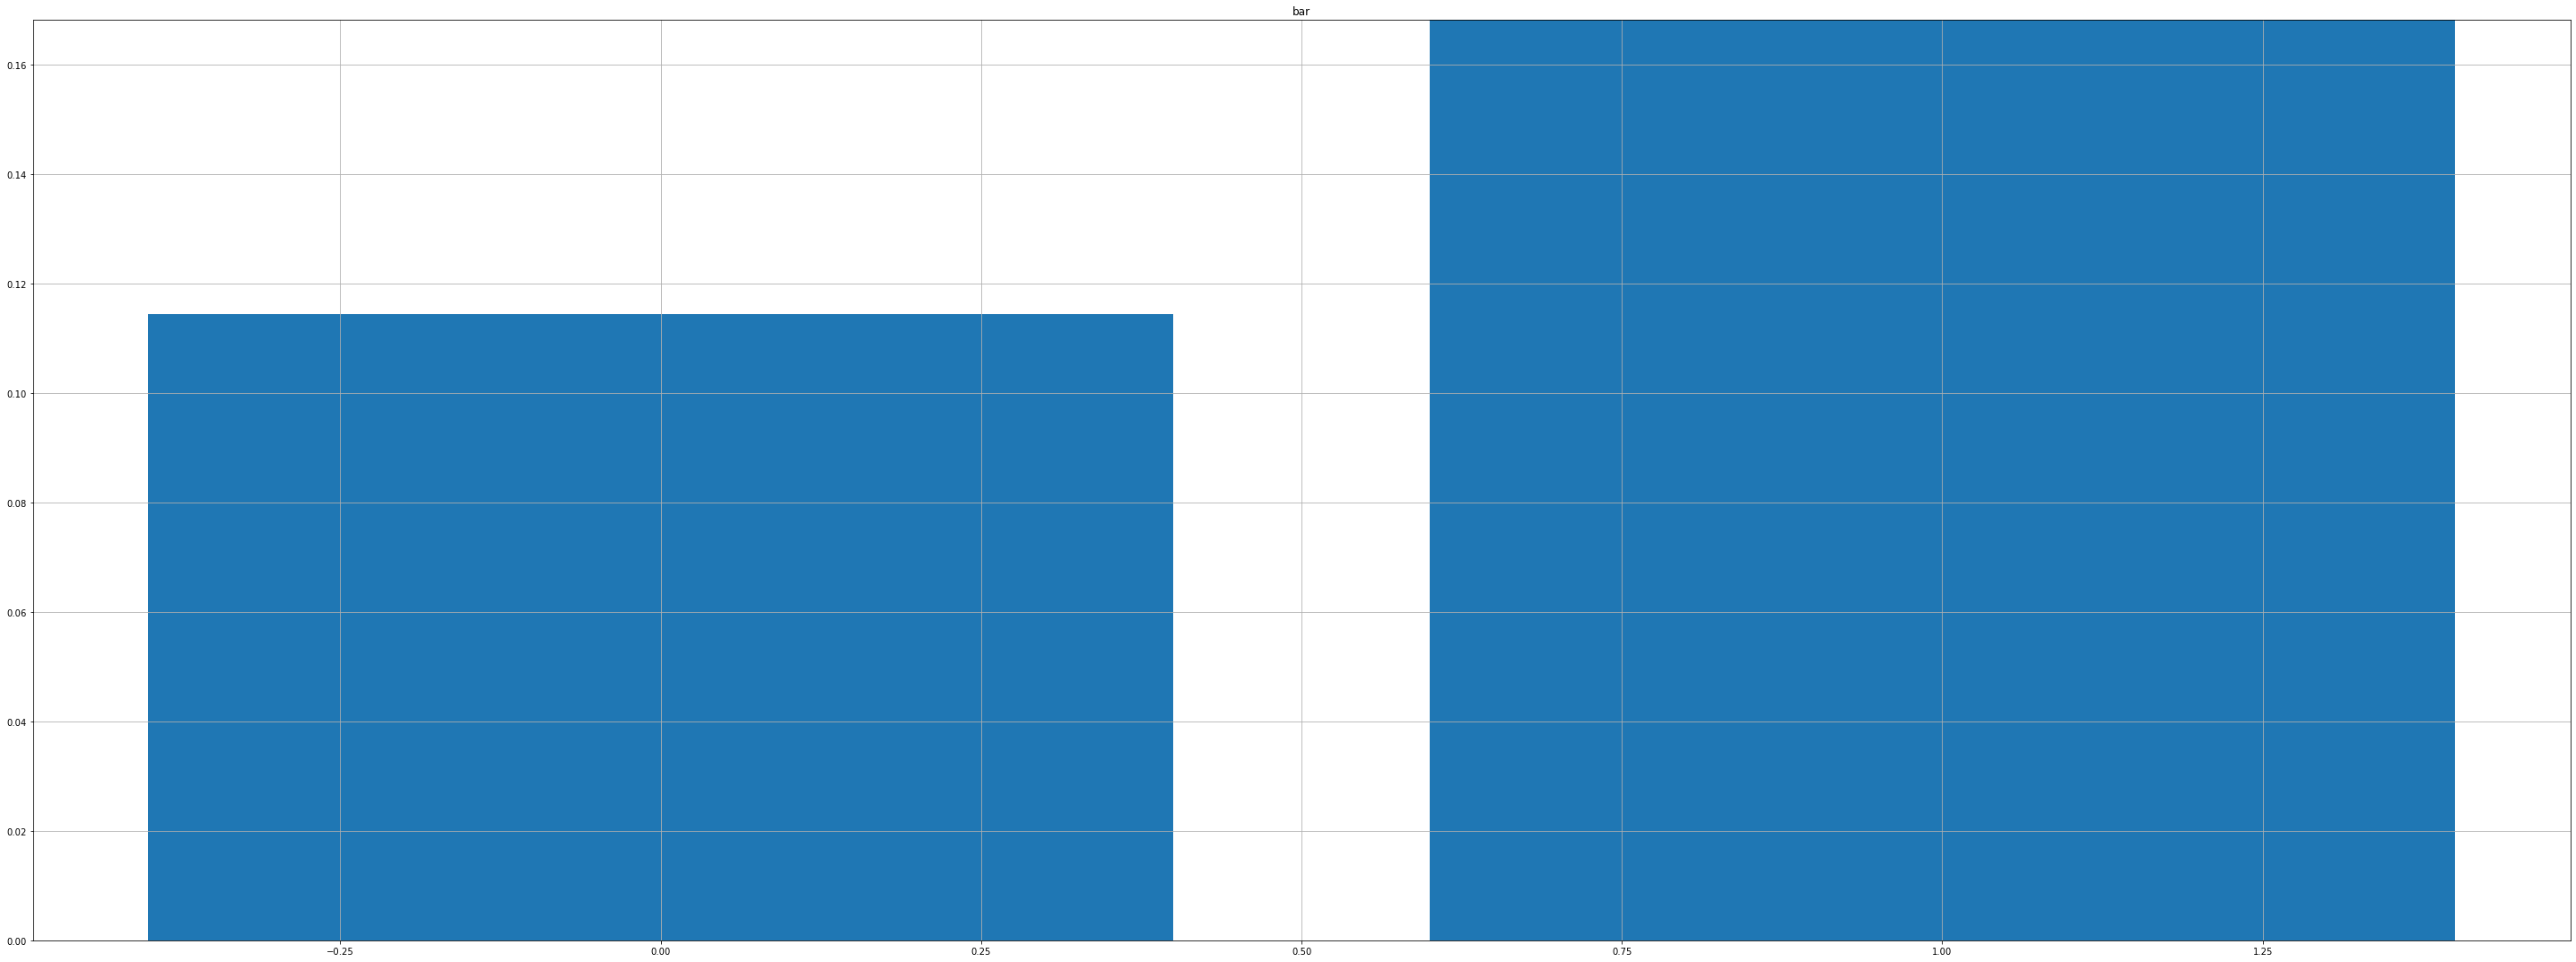

   poutcome_success         y
0                 0  0.098435
1                 1  0.647901


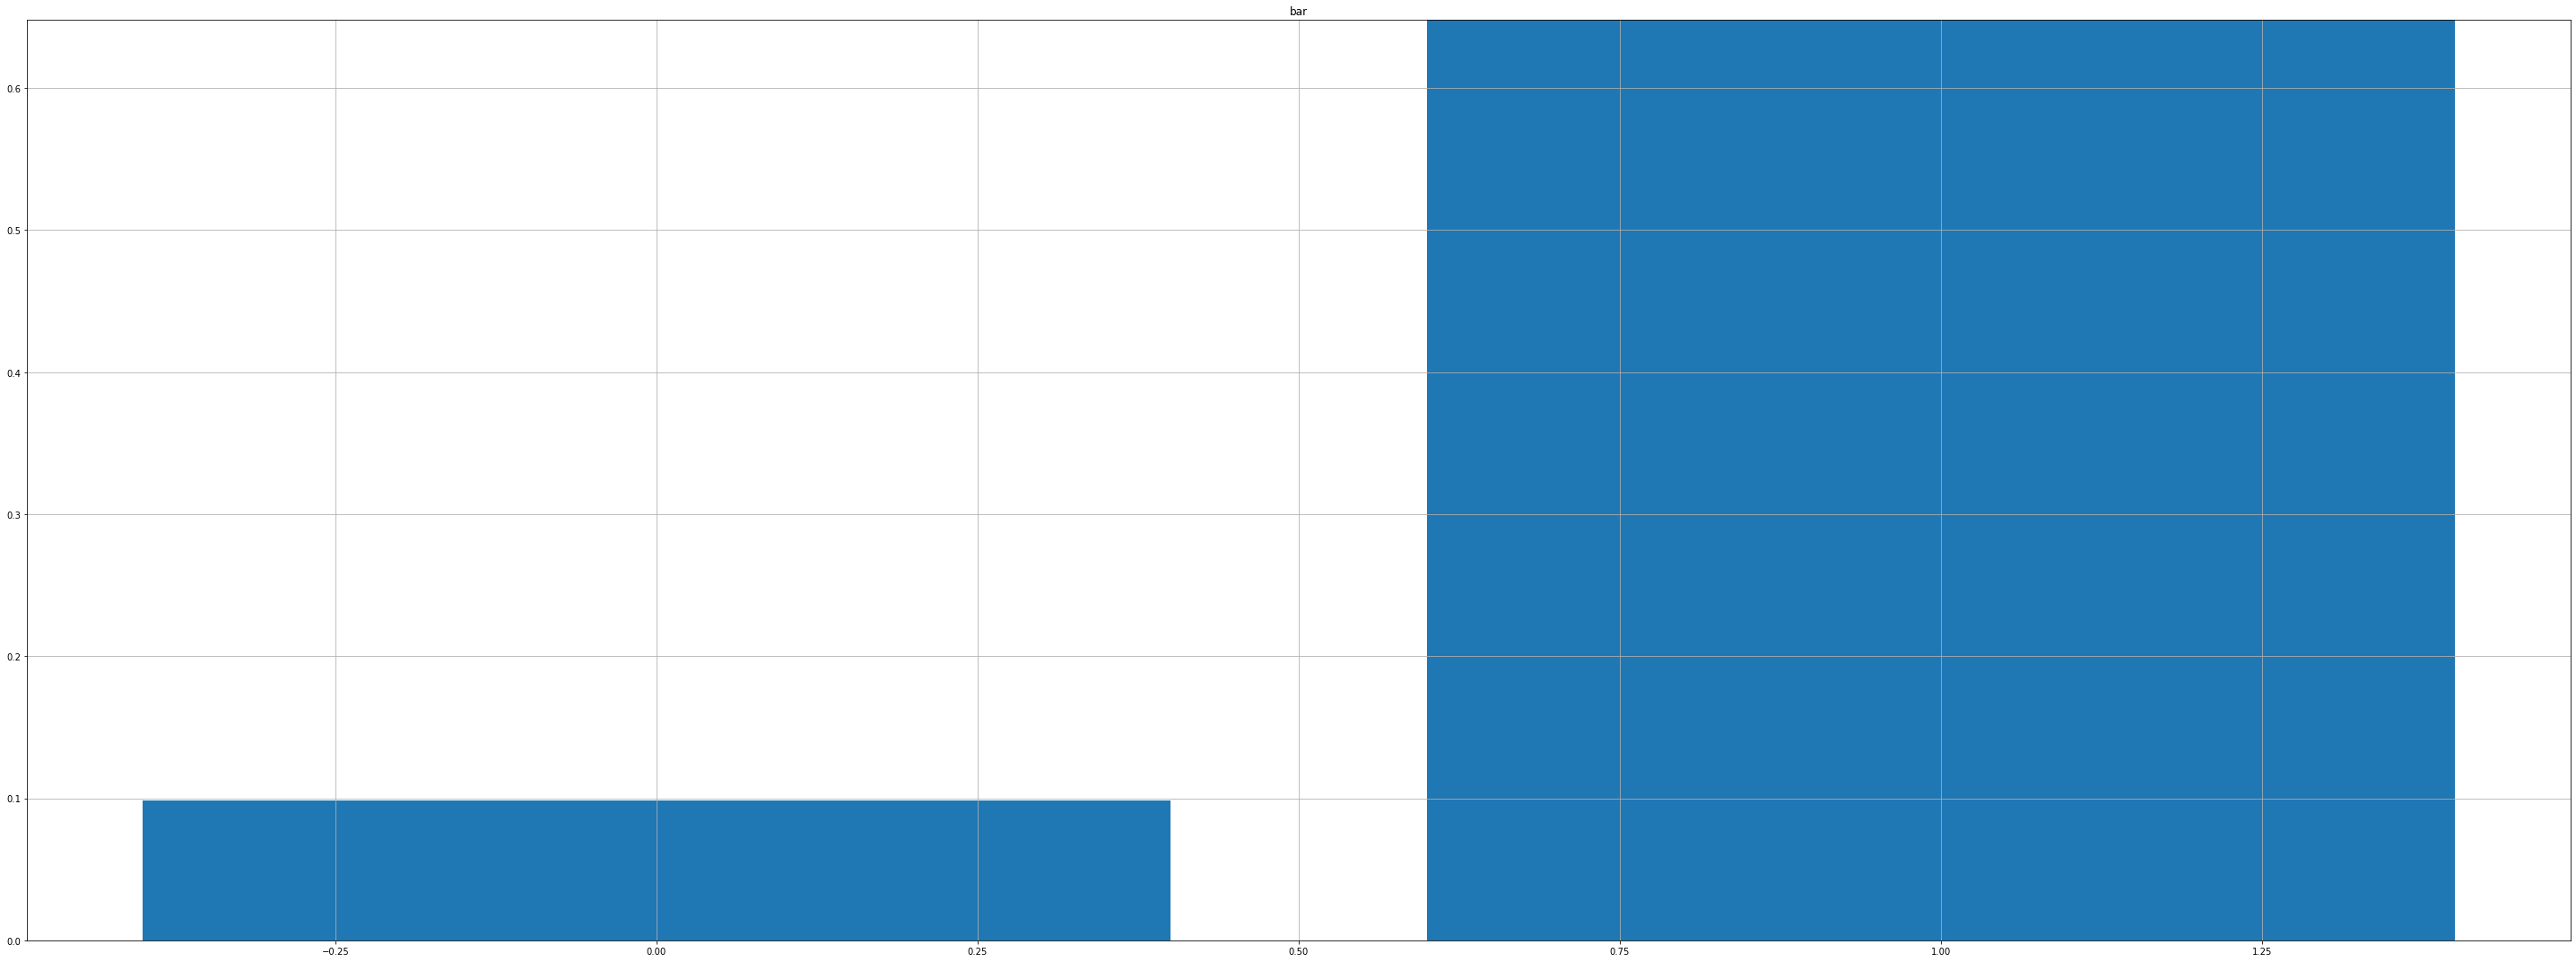

   poutcome_unknown         y
0                 0  0.231488
1                 1  0.090965


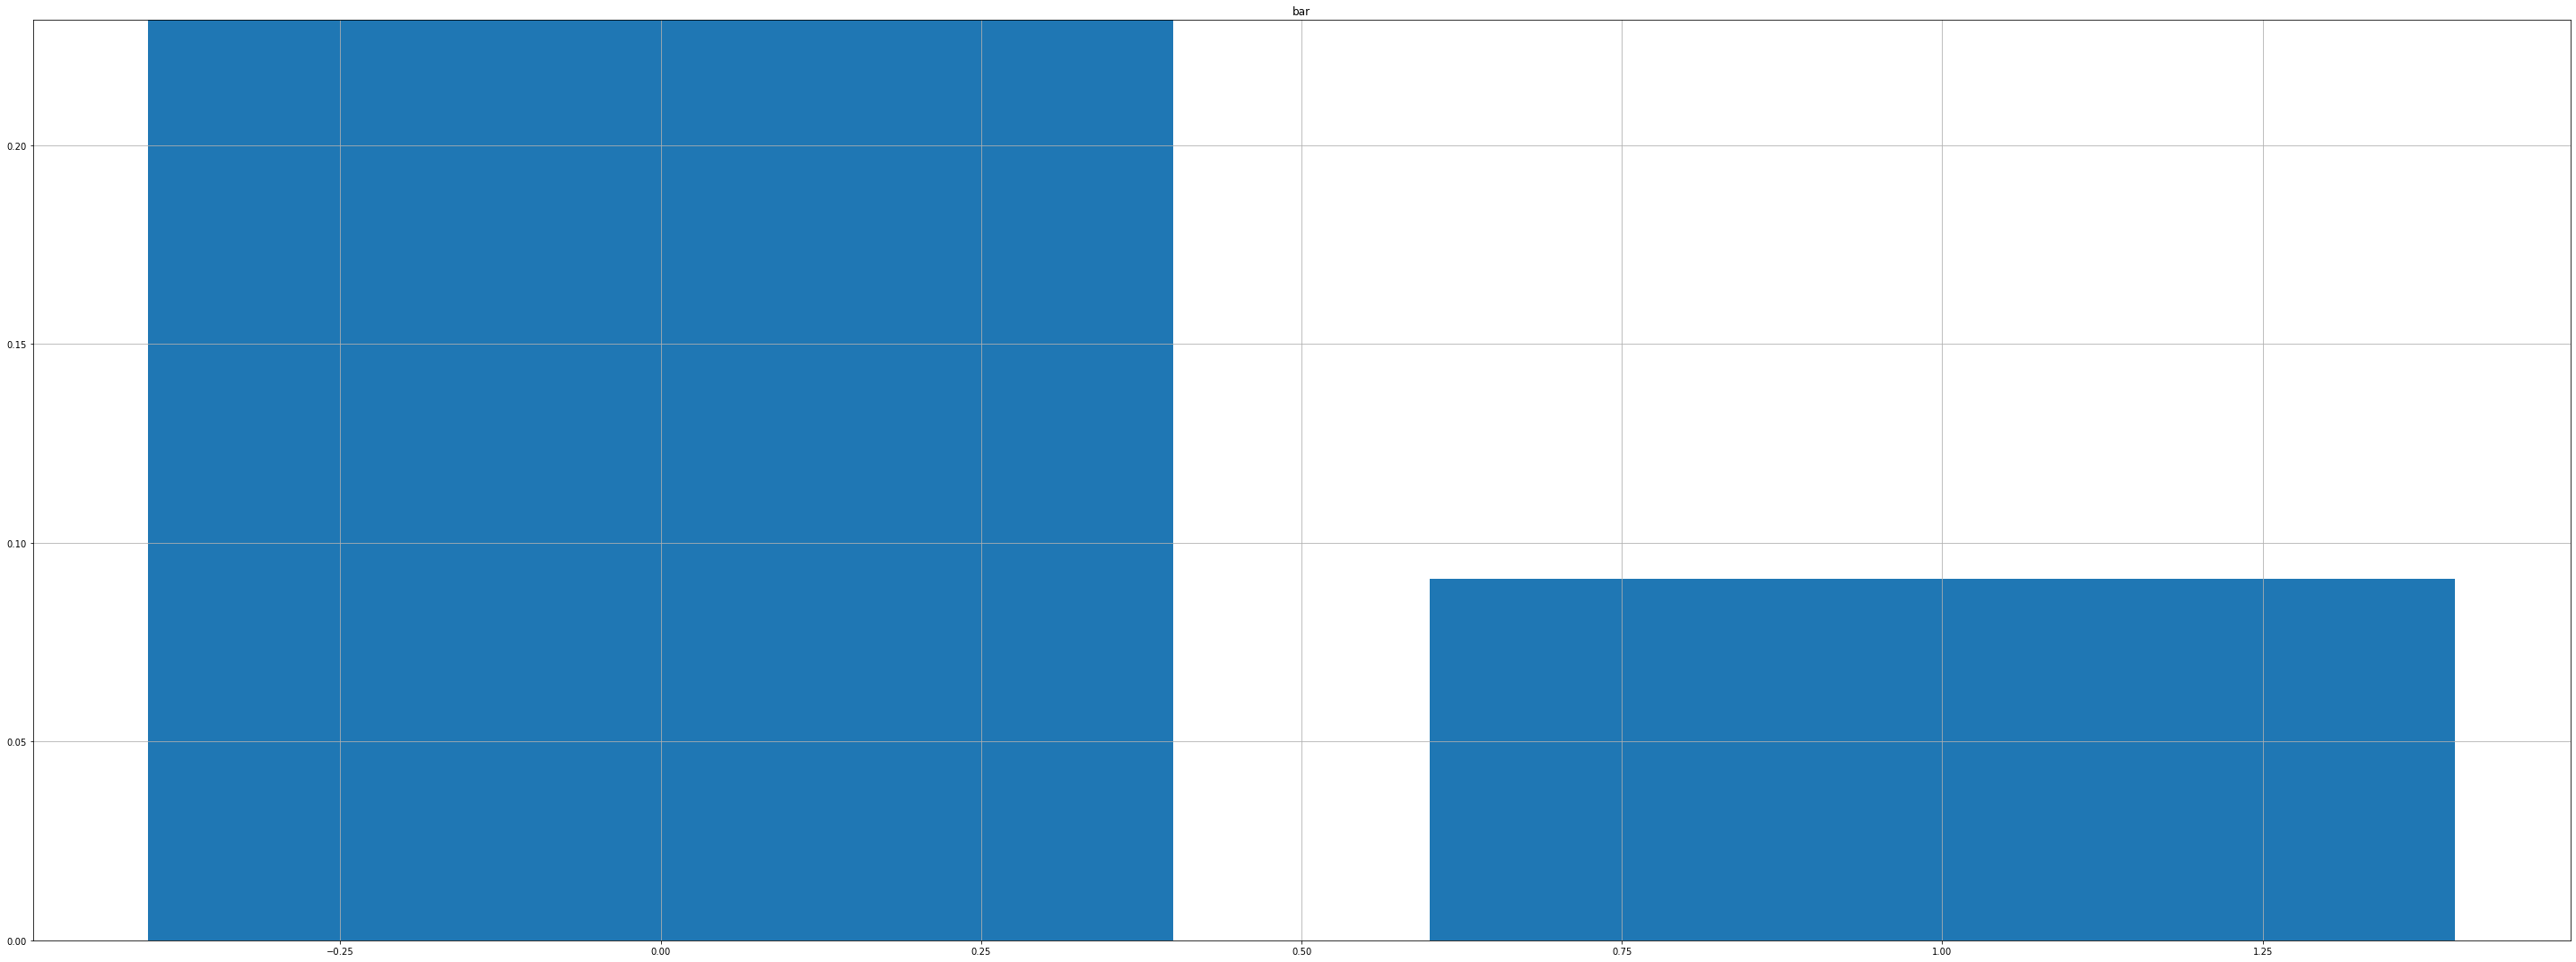

   previous_0.0         y
0             0  0.231674
1             1  0.090902


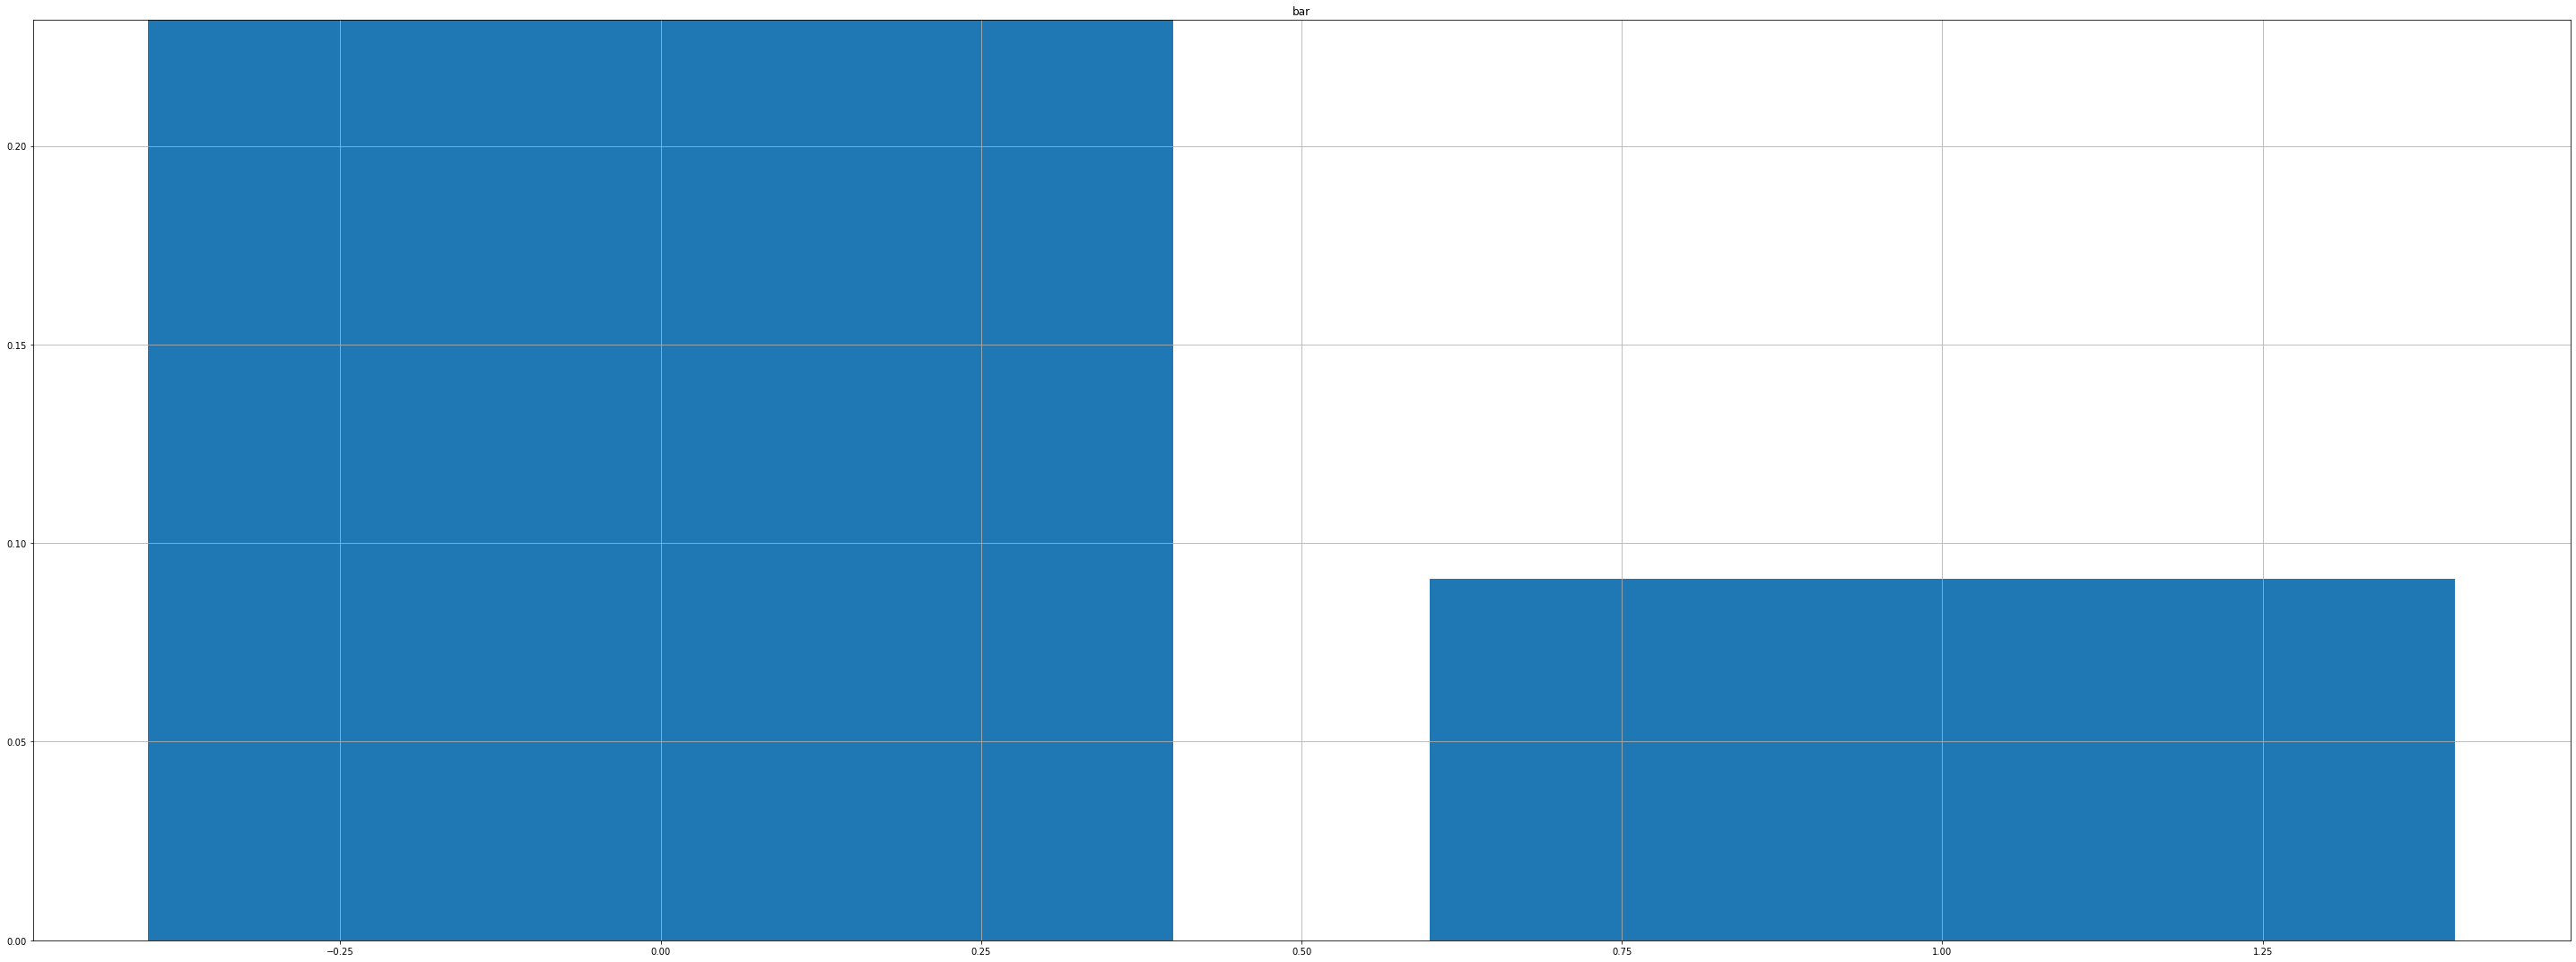

   previous_1.0         y
0             0  0.098045
1             1  0.223454


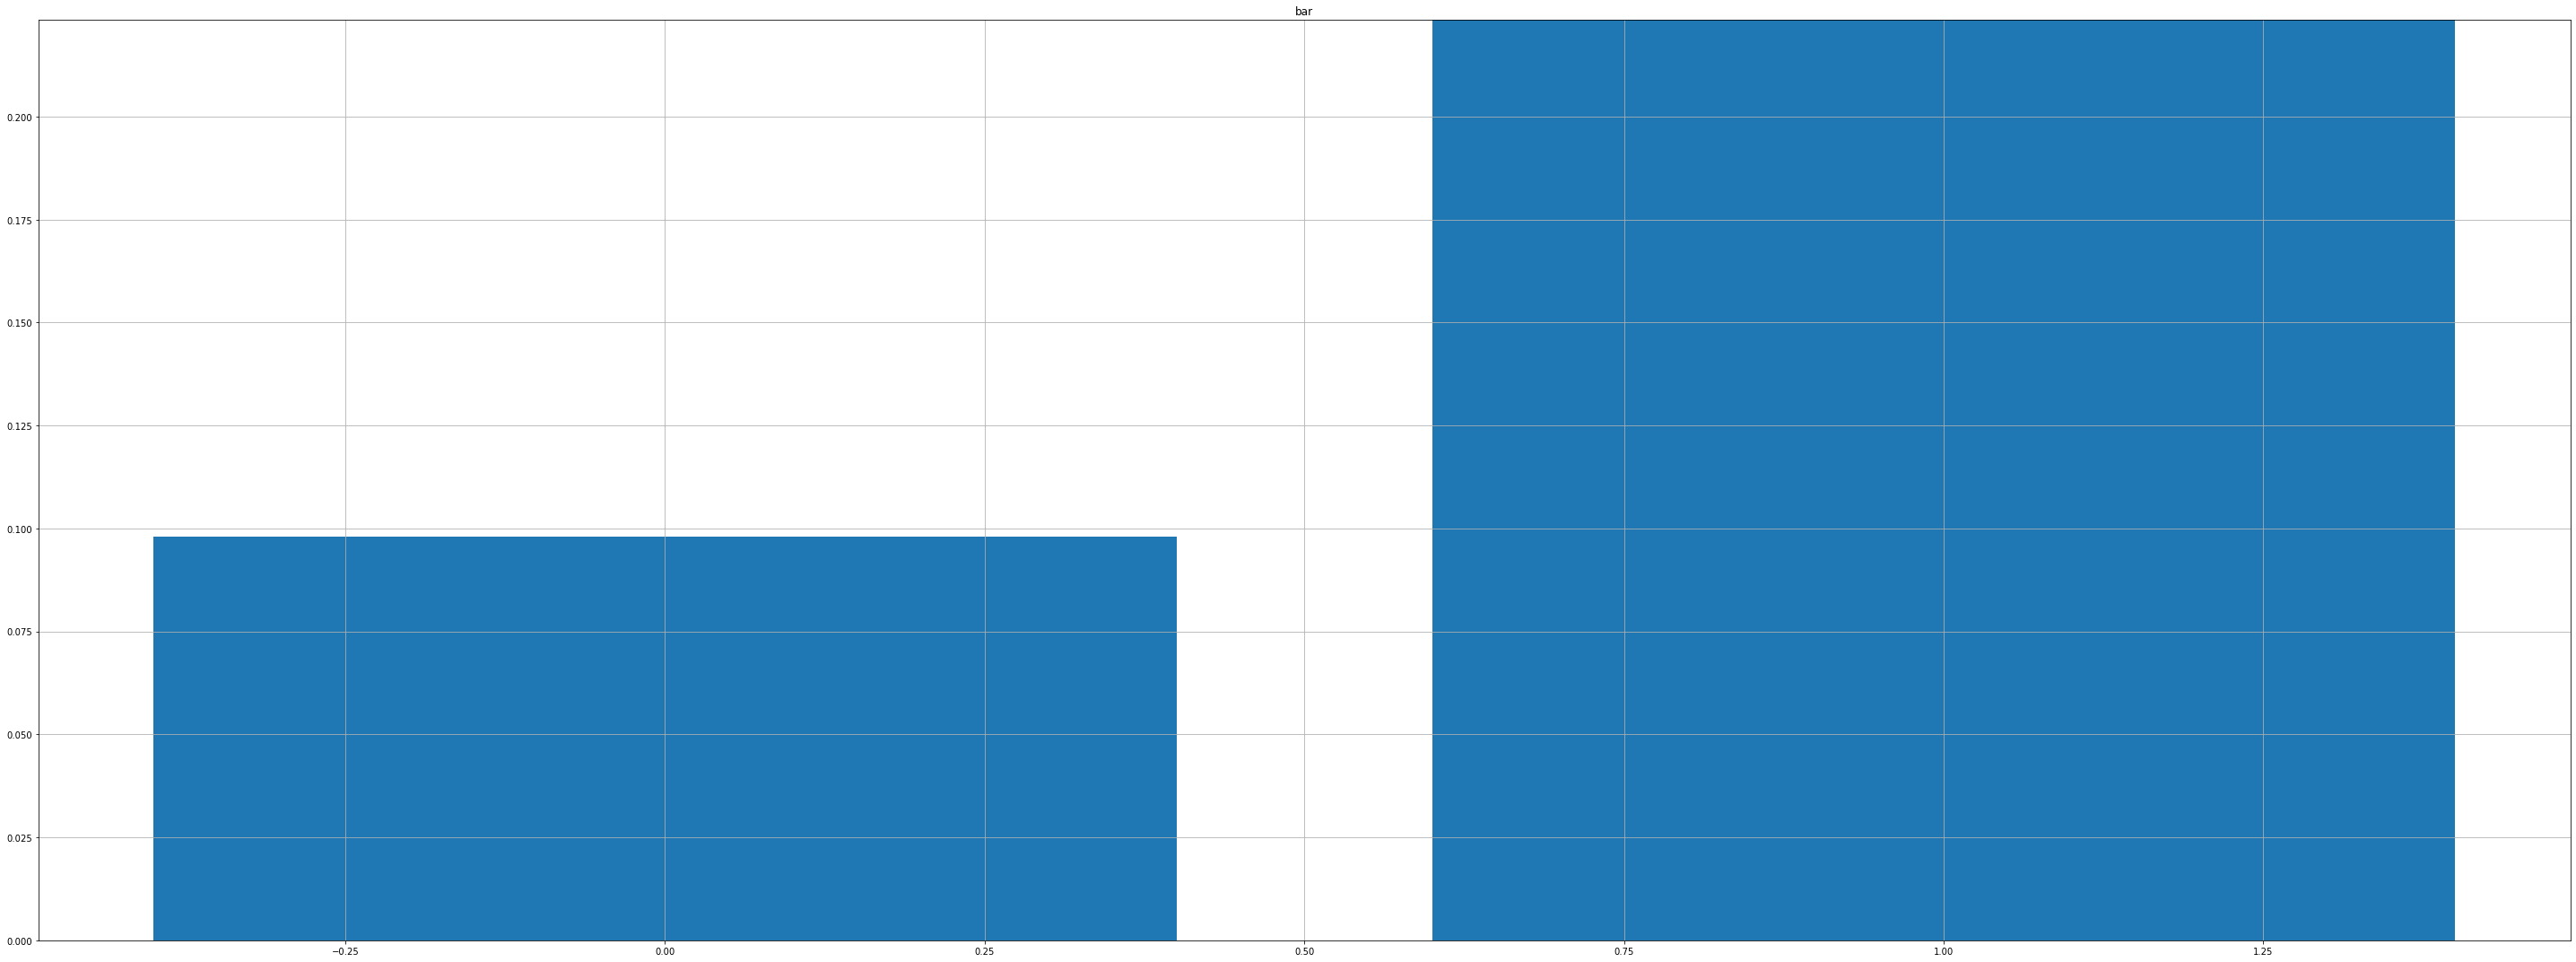

   previous_2.0         y
0             0  0.114401
1             1  0.237762


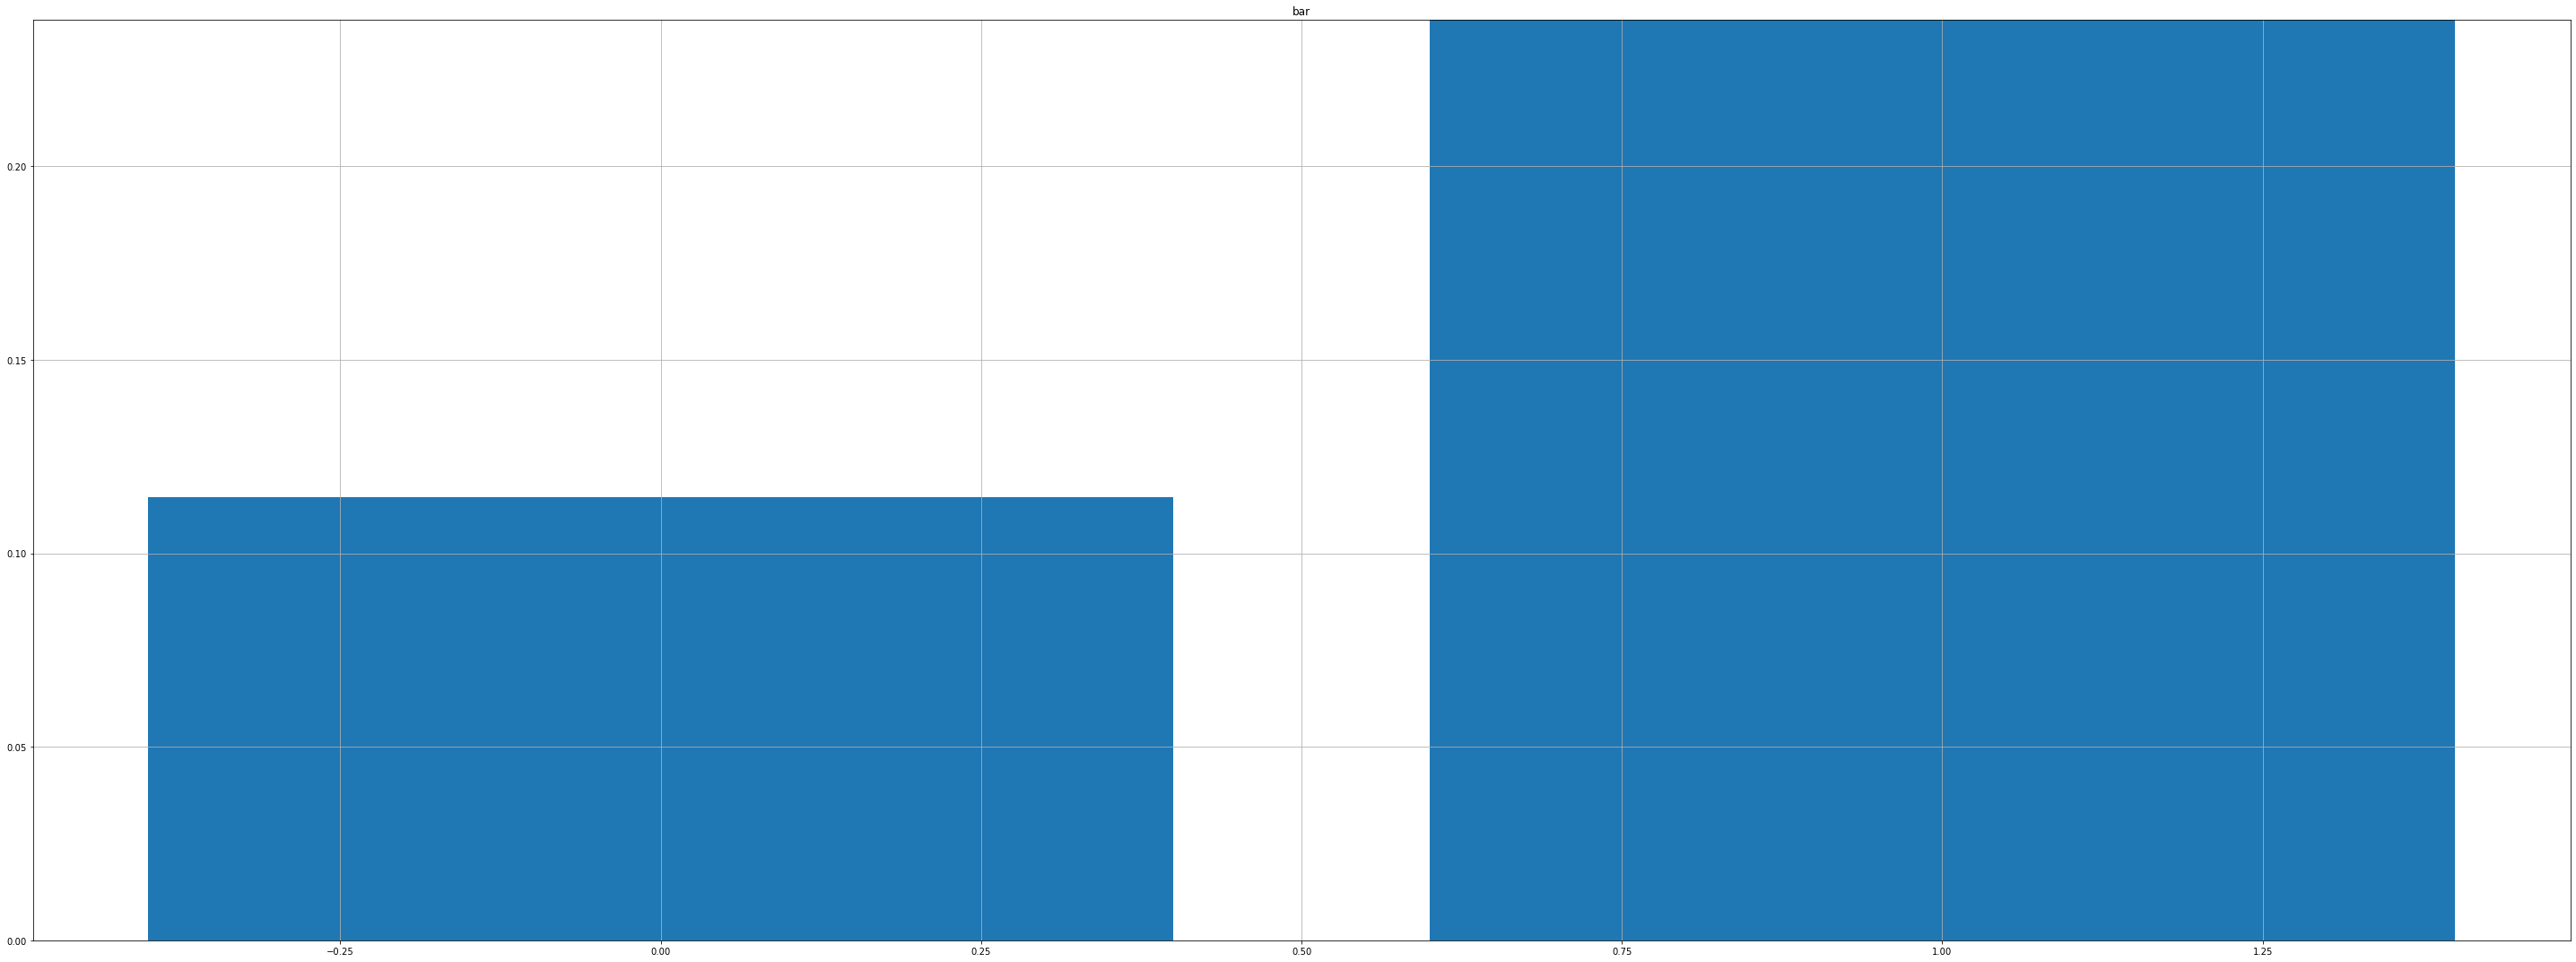

In [27]:
for column in train_set_x.columns:
    grouping = pd.DataFrame()
    grouping[column] = train_set_x[column]
    grouping['y'] = train_set_y
    group = grouping.groupby(grouping[column], as_index=False).mean()
    print(group)
    plt_bar(group[column], group['y'])

    

In [28]:
test_set_x

age   balance       day  duration  campaign  job_admin.  \
3776  -0.088166 -0.256924  0.516129  0.098586 -0.569344           0   
9928   0.571045  0.749394  0.290323 -0.803838 -0.246558           0   
33409 -1.500760 -0.270718  0.645161  0.274607 -0.569344           0   
31885  0.100180  0.134896  0.290323  0.619633 -0.569344           0   
15738  1.418601 -0.376145  0.677419 -0.398982 -0.246558           0   
...         ...       ...       ...       ...       ...         ...   
9016   0.476872  0.472197  0.161290 -1.410913 -0.569344           0   
380   -0.276512 -0.198791  0.193548 -0.297207 -0.569344           0   
7713   0.006007  1.043341  0.967742  0.573464  0.076229           1   
12188  0.006007 -0.017496  0.645161 -1.957554  0.399016           0   
28550  1.512774 -0.113727  0.935484  1.047833 -0.246558           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
3776                 1                 0              0               0  ...   
9928                 0                 0              0               0  ...   
33409                0                 0              0               0  ...   
31885                0                 0              0               1  ...   
15738                0                 0              0               1  ...   
...                ...               ...            ...             ...  ...   
9016                 0                 0              0               0  ...   
380                  1                 0              0               0  ...   
7713                 0                 0              0               0  ...   
12188                0                 0              0               0  ...   
28550                0                 0              0               1  ...   

       month_10  month_11  month_12  poutcome_failure  poutcome_other  \
3776          0         0         0                 0               0   
9928          0         0         0                 0               0   
33409         0         0         0                 0               0   
31885         0         0         0                 1               0   
15738         0         0         0                 0               0   
...         ...       ...       ...               ...             ...   
9016          0         0         0                 0               0   
380           0         0         0                 0               0   
7713          0         0         0                 0               0   
12188         0         0         0                 0               0   
28550         0         0         0                 1               0   

       poutcome_success  poutcome_unknown  previous_0.0  previous_1.0  \
3776                  0                 1             1             0   
9928                  0                 1             1             0   
33409                 0                 1             1             0   
31885                 0                 0             0             1   
15738                 0                 1             1             0   
...                 ...               ...           ...           ...   
9016                  0                 1             1             0   
380                   0                 1             1             0   
7713                  0                 1             1             0   
12188                 0                 1             1             0   
28550                 0                 0             0             0   

       previous_2.0  
3776              0  
9928              0  
33409             0  
31885             0  
15738             0  
...             ...  
9016              0  
380               0  
7713              0  
12188             0  
28550             0  

[13564 rows x 52 columns]

In [29]:
test_set_x.describe()

age       balance           day      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      -0.001199      0.003285      0.508138      0.010900     -0.006324   
std        0.997119      1.050215      0.268414      0.993124      0.956518   
min       -2.159970     -3.081114      0.032258     -5.610425     -0.569344   
25%       -0.747376     -0.421468      0.258065     -0.561770     -0.569344   
50%       -0.182339     -0.298470      0.516129      0.034925     -0.246558   
75%        0.665218      0.016332      0.677419      0.647098      0.076229   
max        4.903000     33.094410      1.000000      3.200147     16.861139   

         job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
count  13564.000000     13564.000000      13564.000000   13564.000000   
mean       0.113683         0.211884          0.034061       0.027720   
std        0.317438         0.408658          0.181392       0.164177   
min        0.000000         0.000000          0.000000       0.000000   
25%        0.000000         0.000000          0.000000       0.000000   
50%        0.000000         0.000000          0.000000       0.000000   
75%        0.000000         0.000000          0.000000       0.000000   
max        1.000000         1.000000          1.000000       1.000000   

       job_management  ...      month_10      month_11      month_12  \
count    13564.000000  ...  13564.000000  13564.000000  13564.000000   
mean         0.213064  ...      0.015261      0.086848      0.004276   
std          0.409488  ...      0.122594      0.281622      0.065254   
min          0.000000  ...      0.000000      0.000000      0.000000   
25%          0.000000  ...      0.000000      0.000000      0.000000   
50%          0.000000  ...      0.000000      0.000000      0.000000   
75%          0.000000  ...      0.000000      0.000000      0.000000   
max          1.000000  ...      1.000000      1.000000      1.000000   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  \
count      13564.000000    13564.000000      13564.000000      13564.000000   
mean           0.110218        0.037894          0.034134          0.817753   
std            0.313173        0.190948          0.181581          0.386062   
min            0.000000        0.000000          0.000000          0.000000   
25%            0.000000        0.000000          0.000000          1.000000   
50%            0.000000        0.000000          0.000000          1.000000   
75%            0.000000        0.000000          0.000000          1.000000   
max            1.000000        1.000000          1.000000          1.000000   

       previous_0.0  previous_1.0  previous_2.0  
count  13564.000000  13564.000000  13564.000000  
mean       0.817679      0.150693      0.015851  
std        0.386123      0.357763      0.124903  
min        0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000  
75%        1.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 52 columns]

         age         y
0  -2.159970  0.875000
1  -2.065797  0.076923
2  -1.971624  0.300000
3  -1.877451  0.360000
4  -1.783279  0.357143
..       ...       ...
67  4.149616  0.500000
68  4.243789  0.666667
69  4.337962  1.000000
70  4.526308  0.000000
71  4.903000  1.000000

[72 rows x 2 columns]


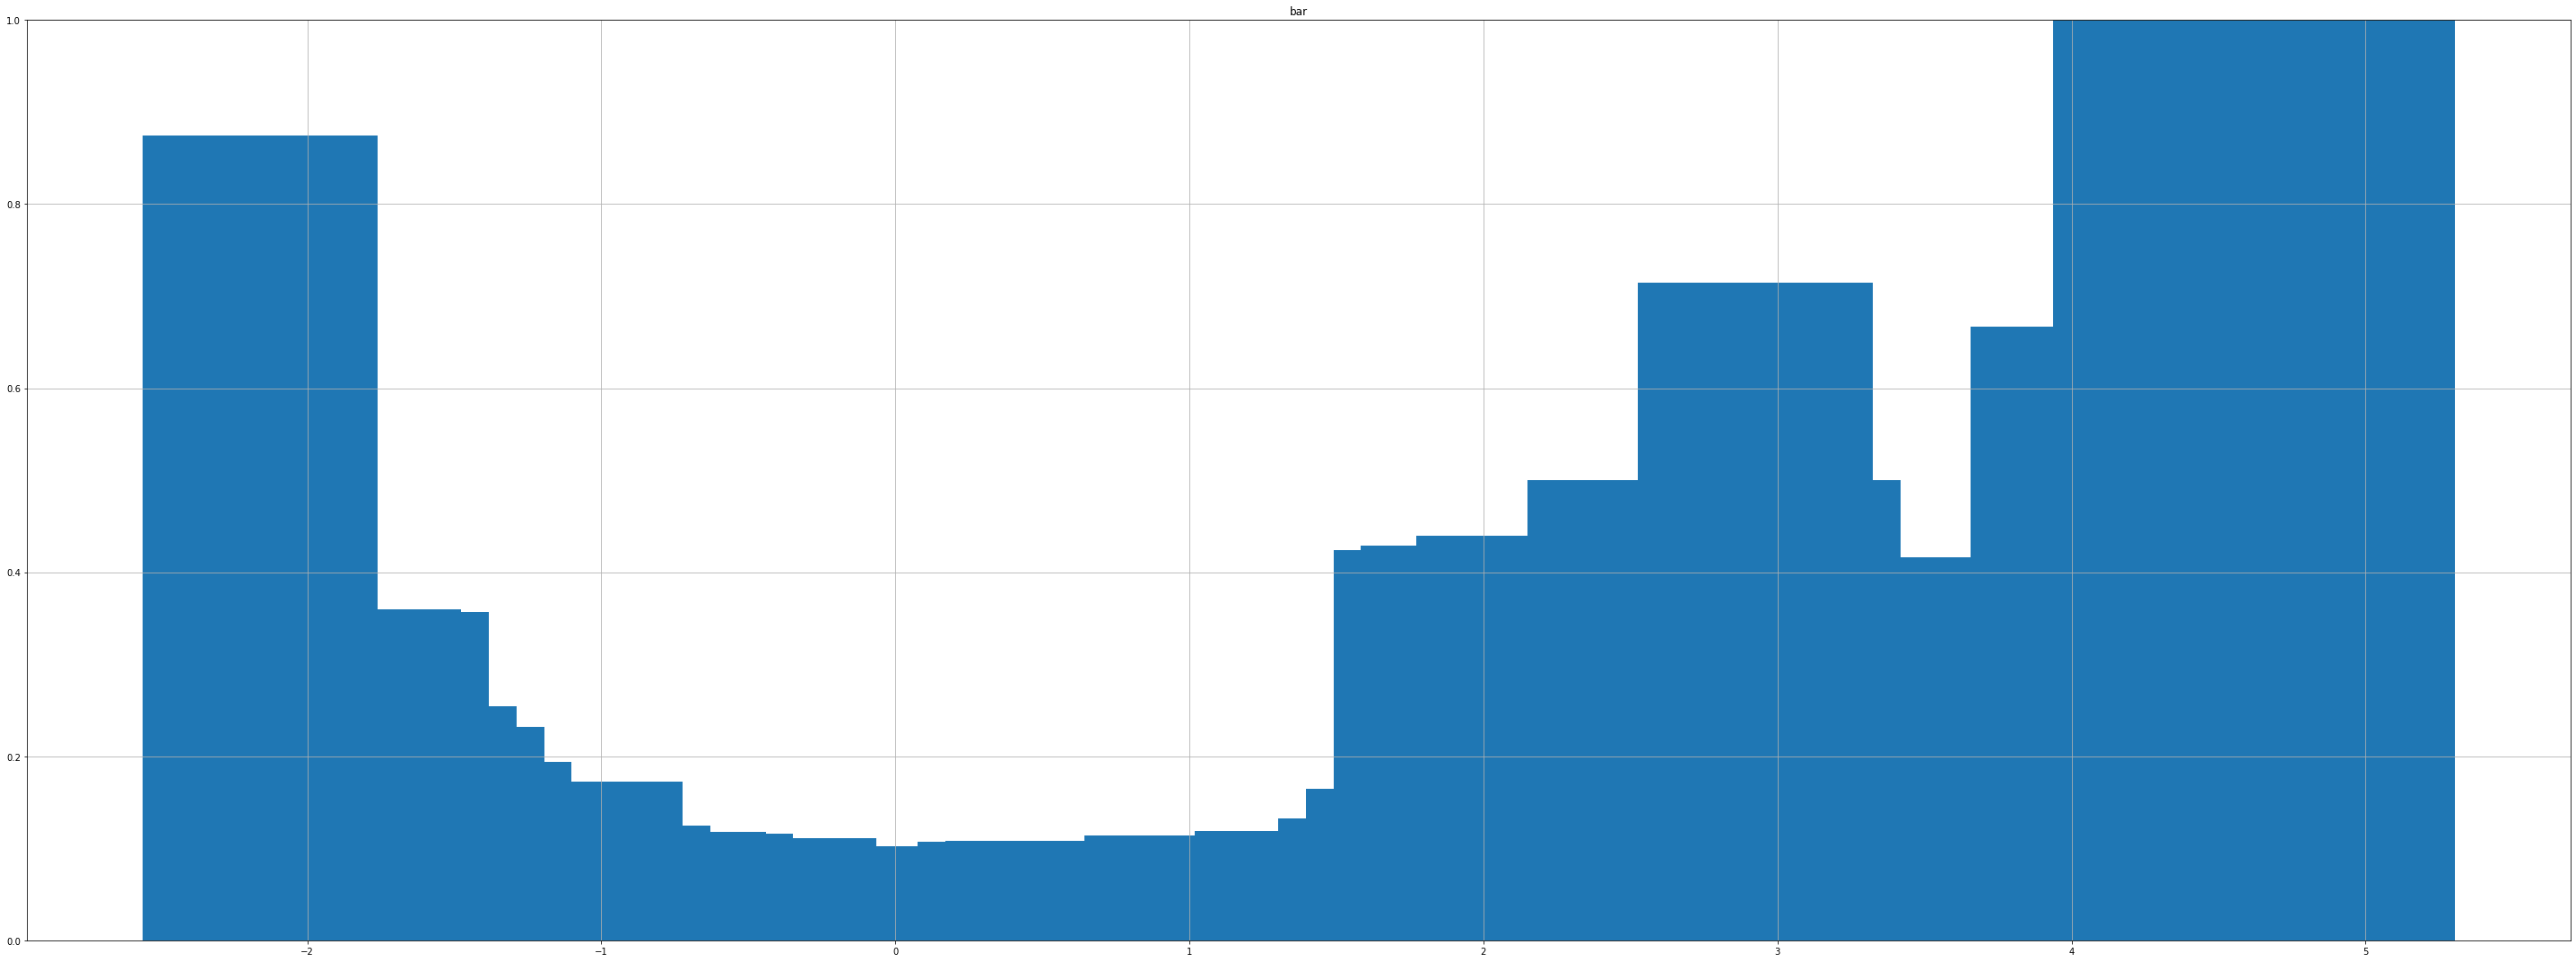

        balance    y
0     -3.081114  0.0
1     -1.535511  0.0
2     -1.338123  0.0
3     -1.302653  0.0
4     -1.134824  0.0
...         ...  ...
4271  18.217732  0.0
4272  18.416105  0.0
4273  21.465929  0.0
4274  31.875925  0.0
4275  33.094410  0.0

[4276 rows x 2 columns]


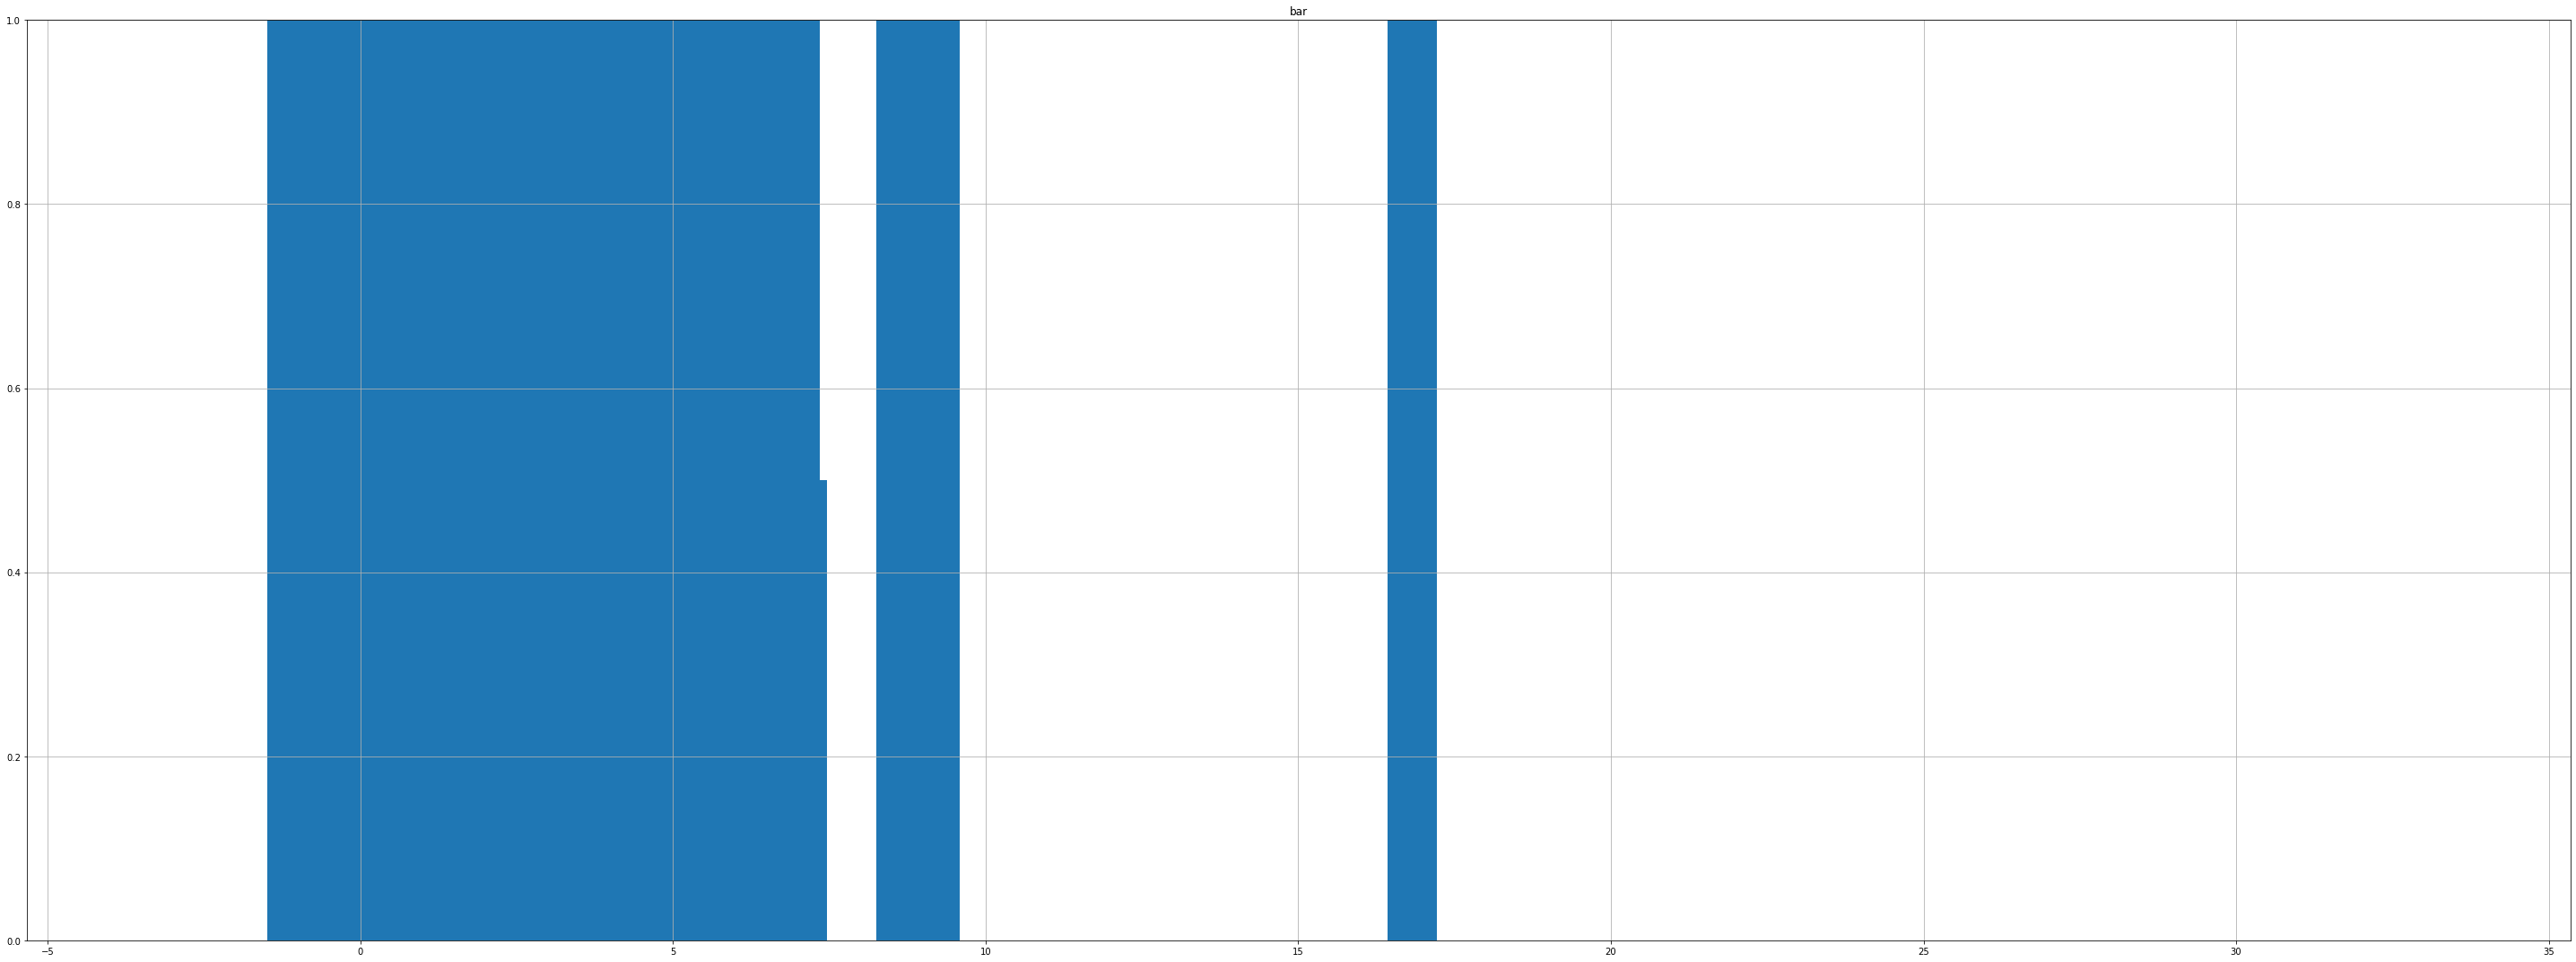

         day         y
0   0.032258  0.273684
1   0.064516  0.132394
2   0.096774  0.218845
3   0.129032  0.165919
4   0.161290  0.120339
5   0.193548  0.085217
6   0.225806  0.092896
7   0.258065  0.110727
8   0.290323  0.136268
9   0.322581  0.243750
10  0.354839  0.114224
11  0.387097  0.150000
12  0.419355  0.172632
13  0.451613  0.106272
14  0.483871  0.122568
15  0.516129  0.140741
16  0.548387  0.073129
17  0.580645  0.092086
18  0.612903  0.069288
19  0.645161  0.066754
20  0.677419  0.099831
21  0.709677  0.124481
22  0.741935  0.144404
23  0.774194  0.141732
24  0.806452  0.152941
25  0.838710  0.120235
26  0.870968  0.180516
27  0.903226  0.067416
28  0.935484  0.091440
29  0.967742  0.150743
30  1.000000  0.050761


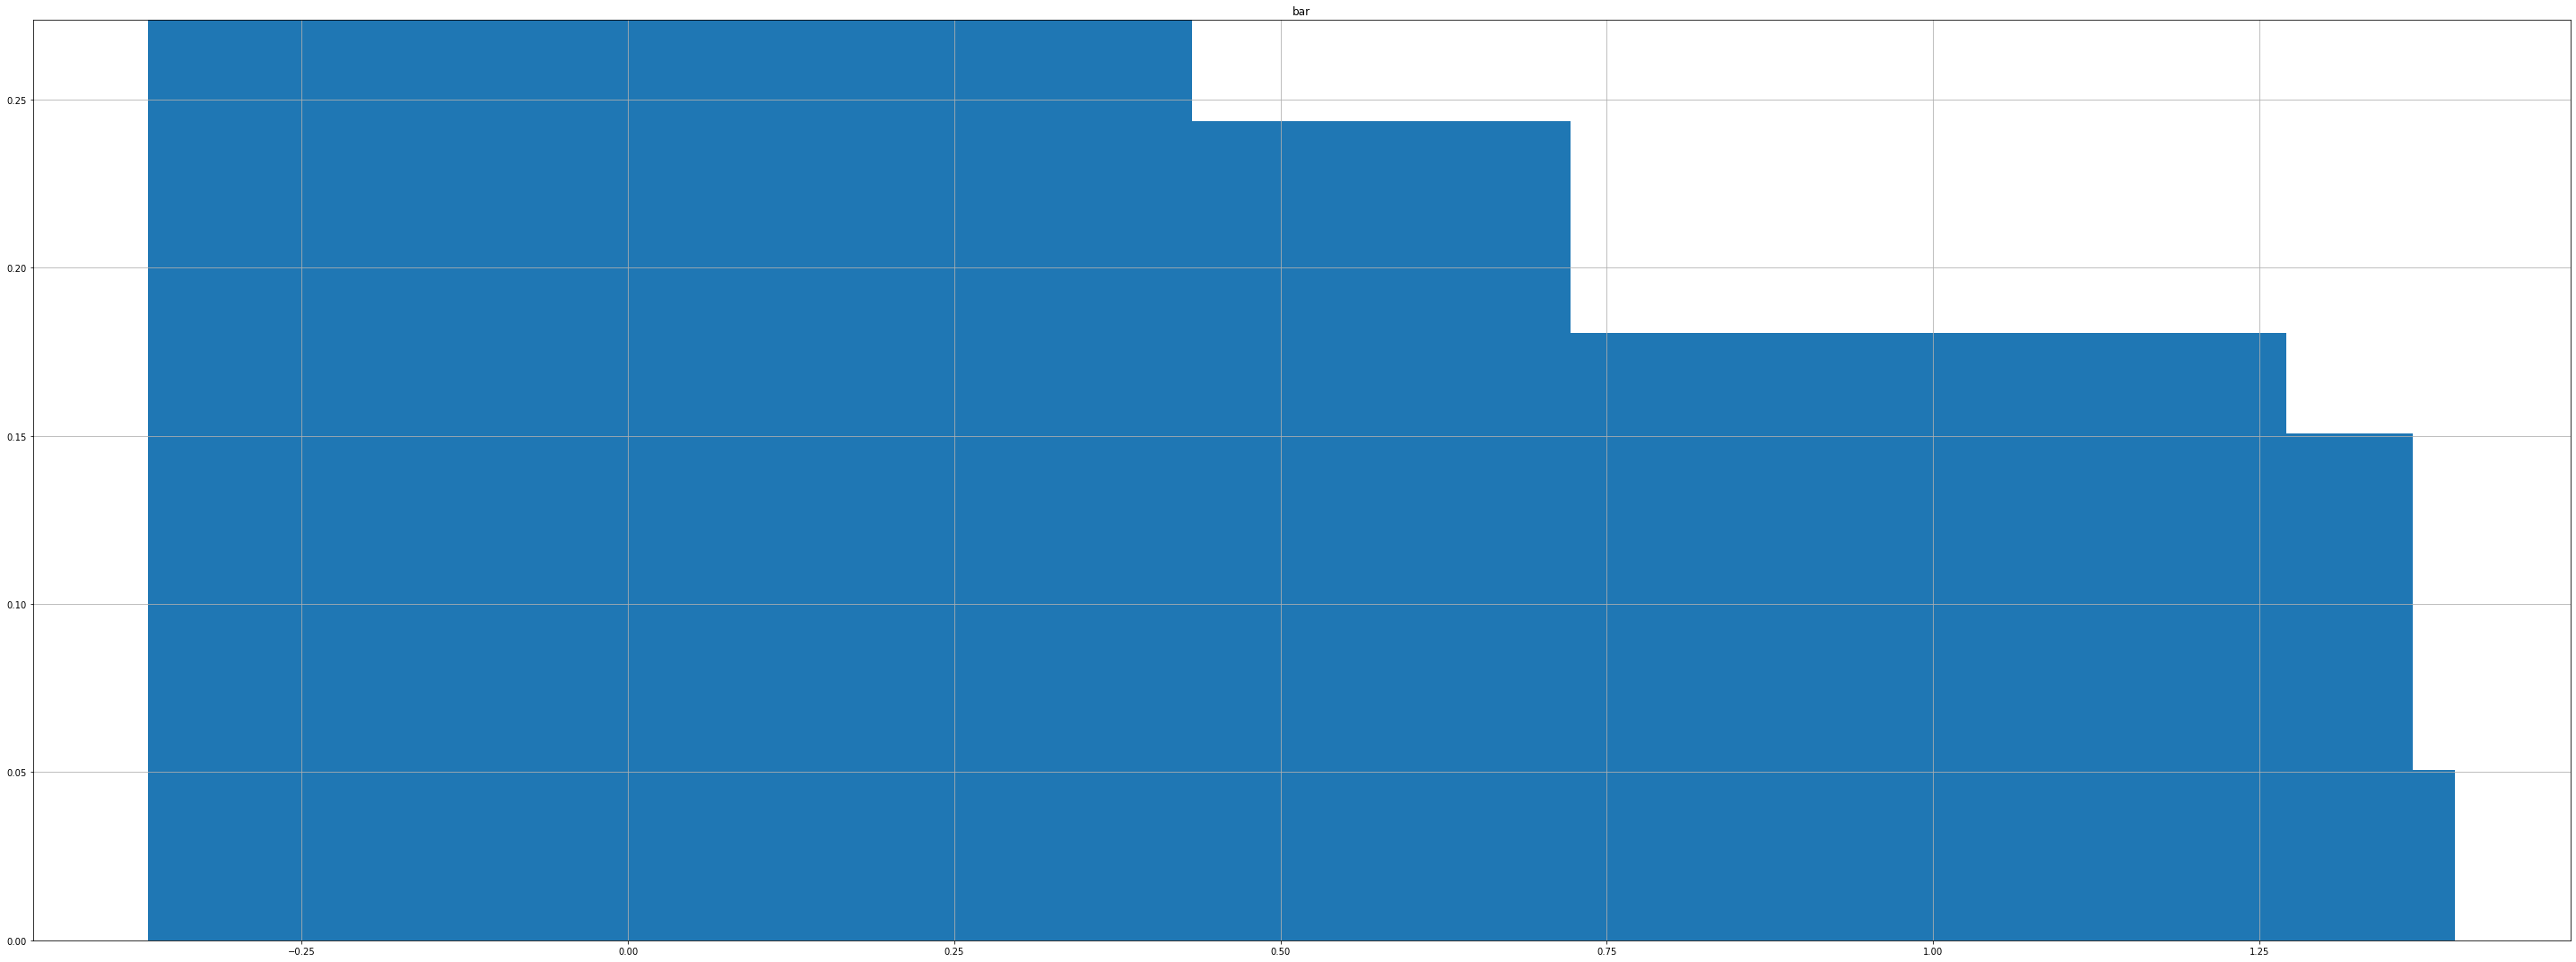

      duration    y
0    -5.610425  0.0
1    -4.858493  0.0
2    -4.418641  0.0
3    -3.864493  0.0
4    -3.666709  0.0
...        ...  ...
1177  2.860991  0.0
1178  2.928853  1.0
1179  2.934630  0.0
1180  3.139524  1.0
1181  3.200147  0.0

[1182 rows x 2 columns]


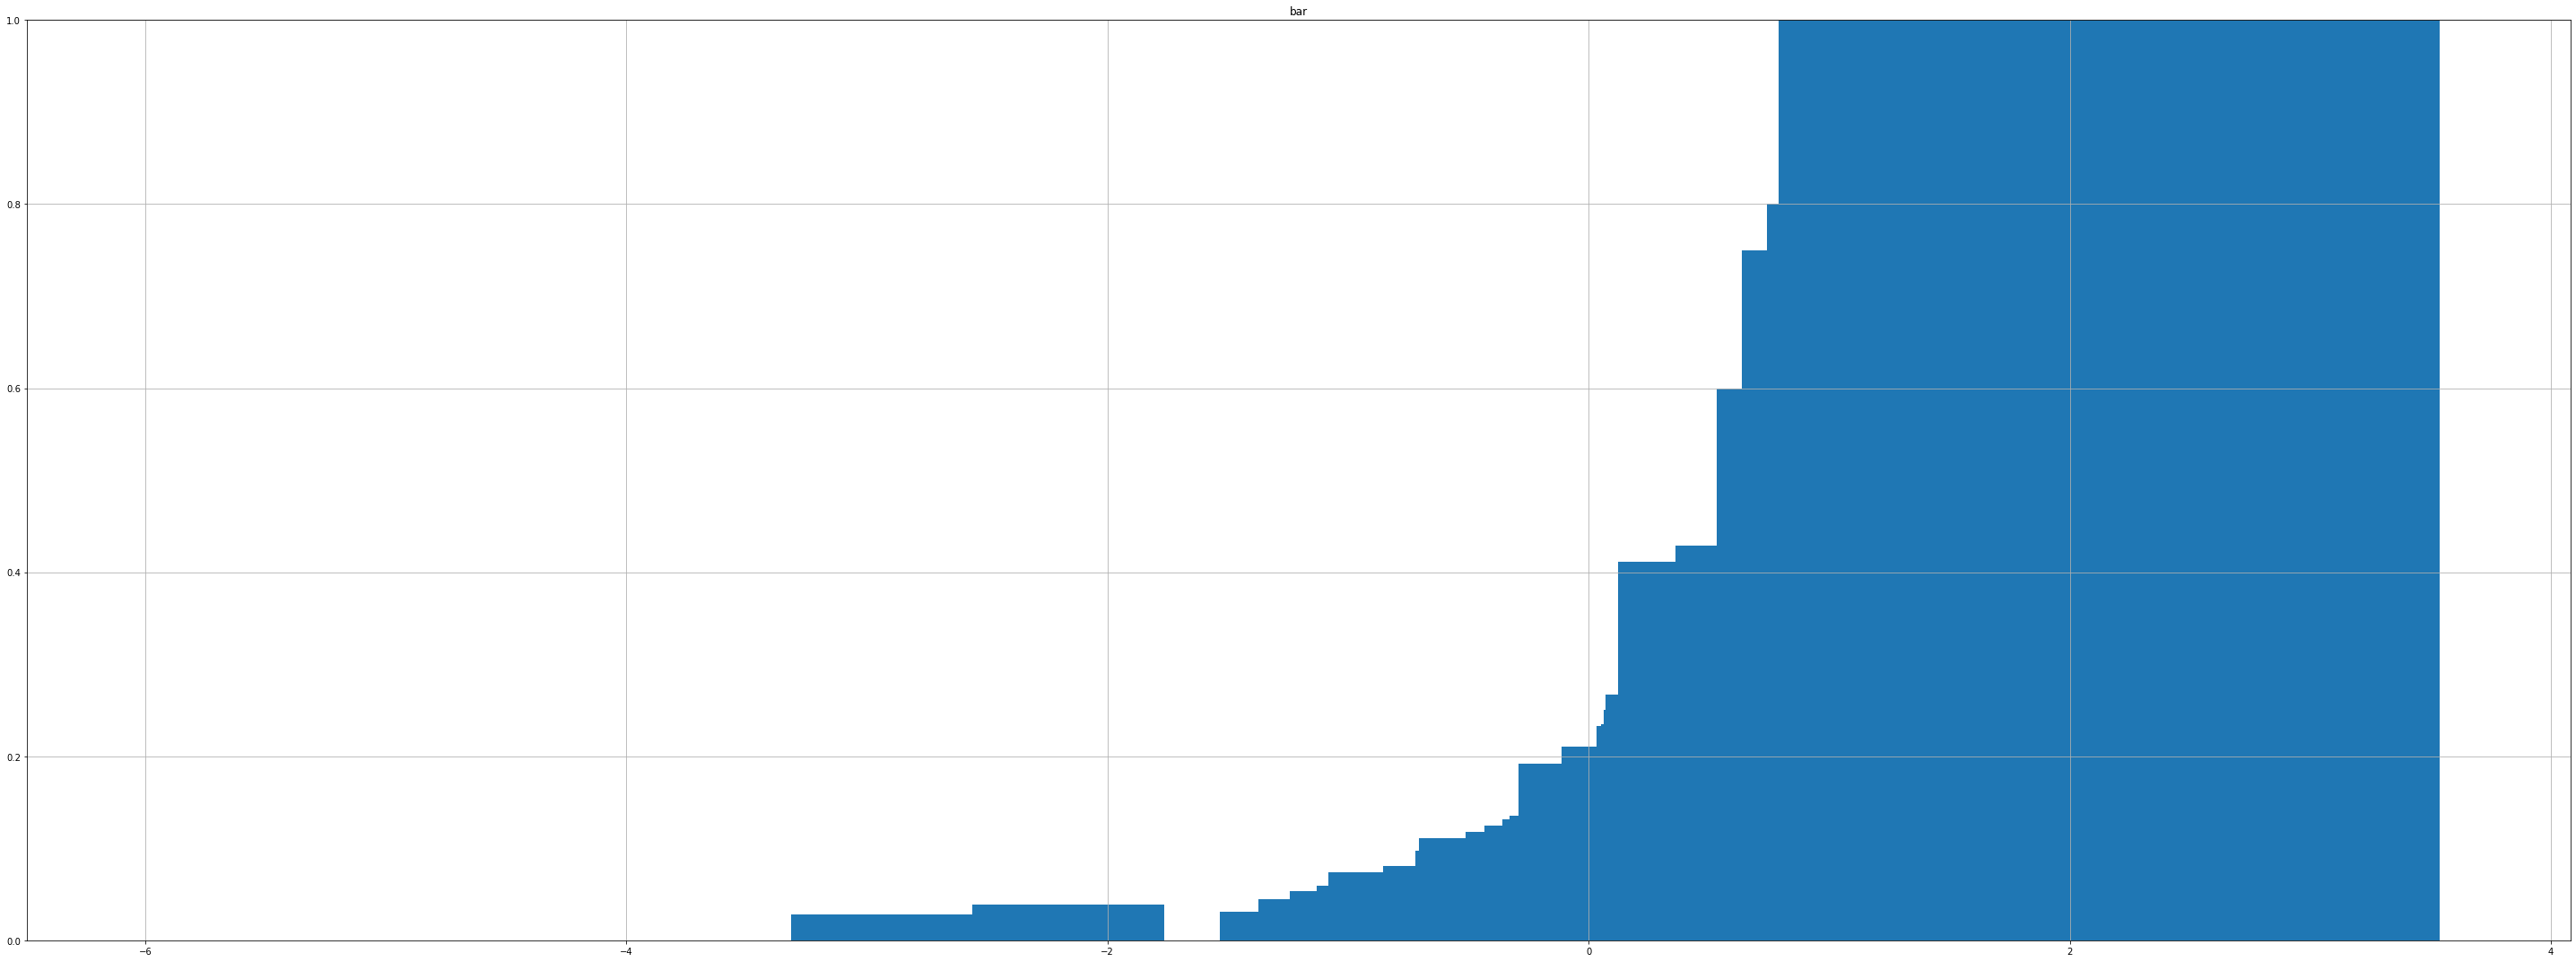

     campaign         y
0   -0.569344  0.151712
1   -0.246558  0.108289
2    0.076229  0.111373
3    0.399016  0.084469
4    0.721803  0.074364
5    1.044589  0.074813
6    1.367376  0.046392
7    1.690163  0.072289
8    2.012949  0.052632
9    2.335736  0.060241
10   2.658523  0.102941
11   2.981310  0.052632
12   3.304096  0.054054
13   3.626883  0.100000
14   3.949670  0.071429
15   4.272456  0.000000
16   4.595243  0.111111
17   4.918030  0.000000
18   5.240817  0.000000
19   5.563603  0.100000
20   5.886390  0.000000
21   6.209177  0.000000
22   6.531964  0.000000
23   6.854750  0.000000
24   7.177537  0.000000
25   7.500324  0.000000
26   7.823110  0.000000
27   8.145897  0.000000
28   8.468684  0.000000
29   8.791471  0.000000
30   9.114257  0.000000
31   9.437044  0.000000
32   9.759831  0.000000
33  10.728191  0.000000
34  11.050978  0.000000
35  16.861139  0.000000


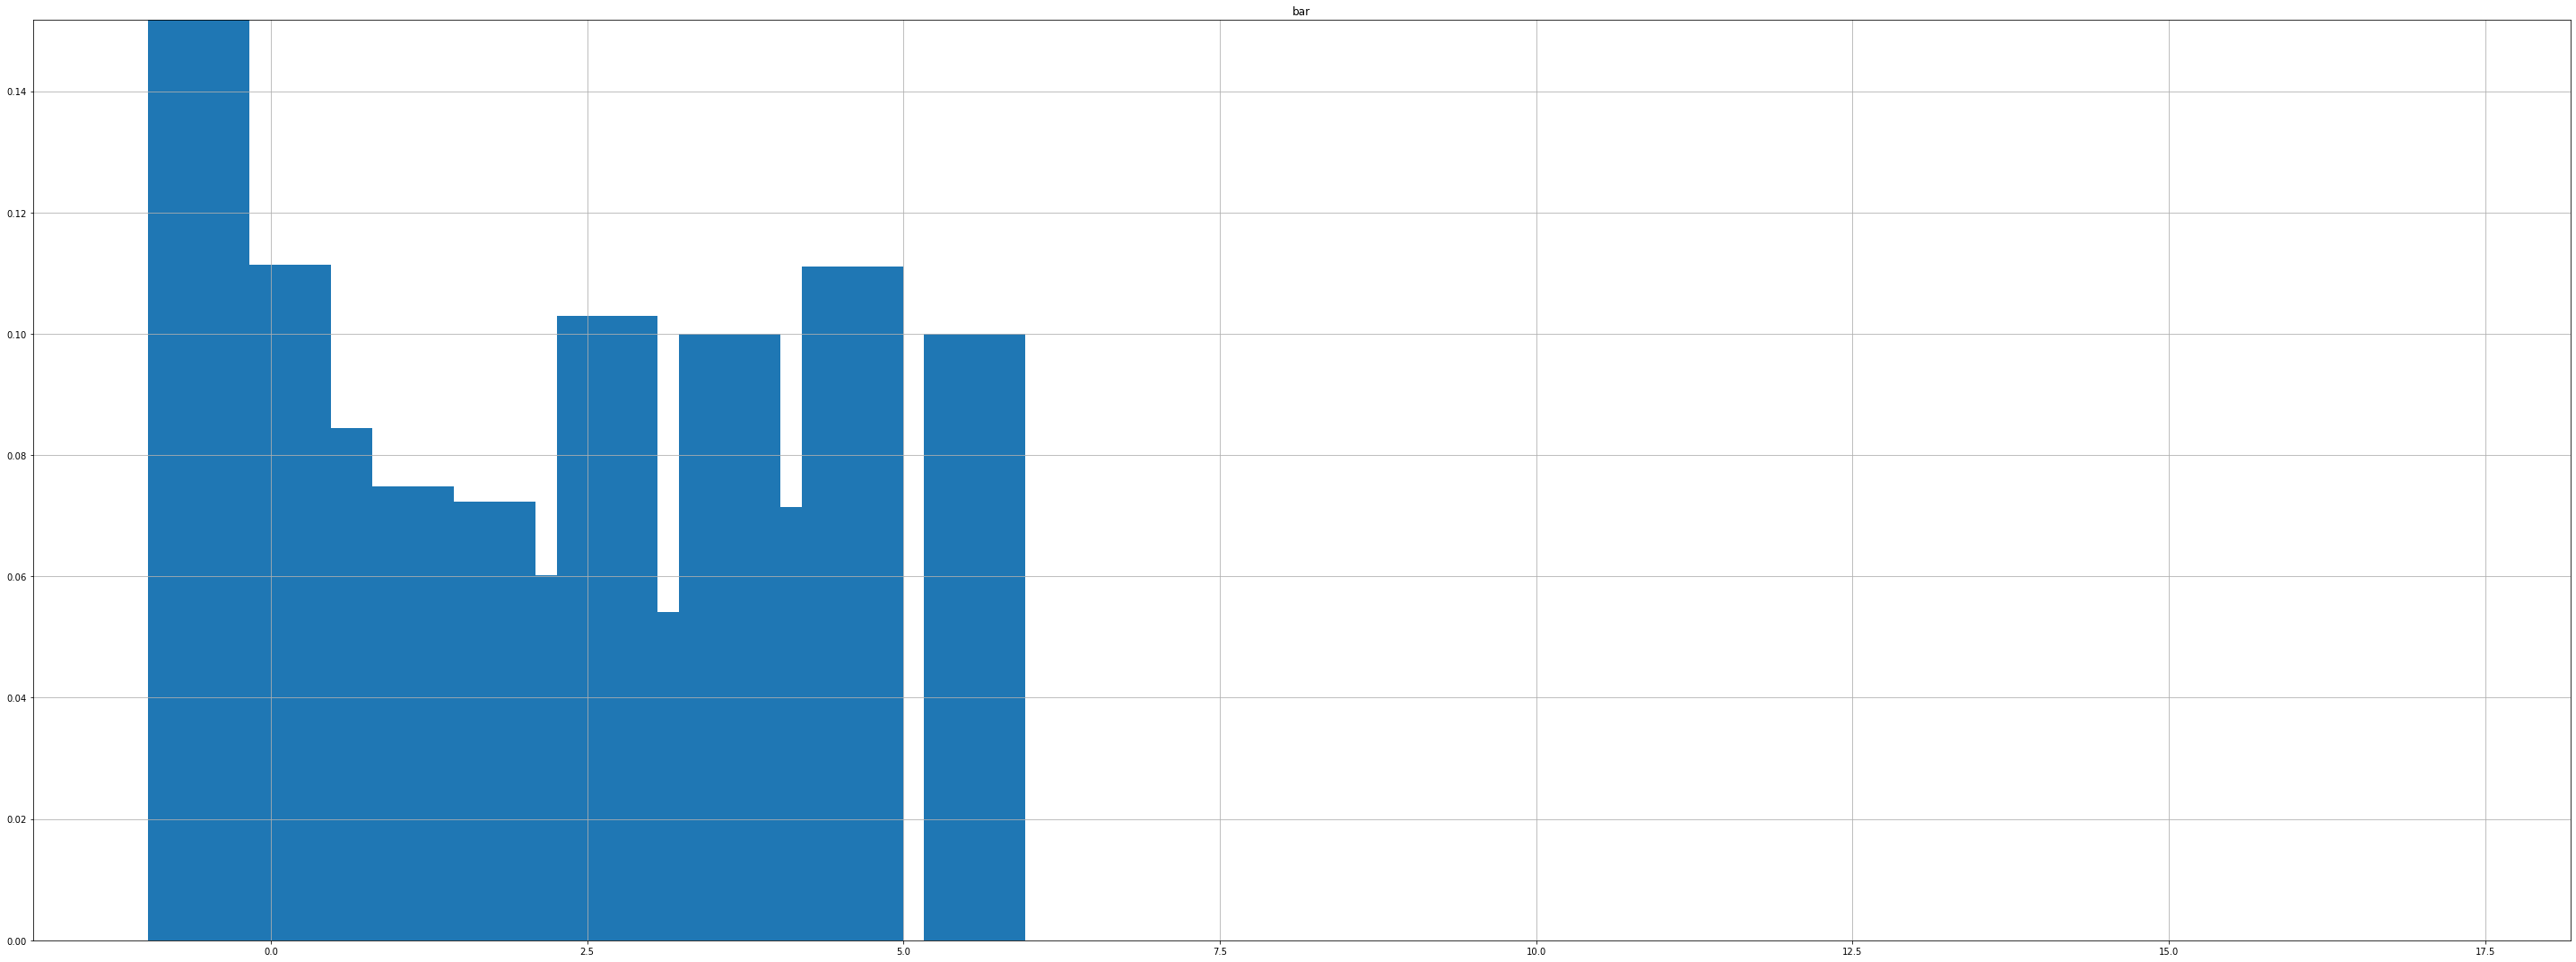

   job_admin.         y
0           0  0.116869
1           1  0.125162


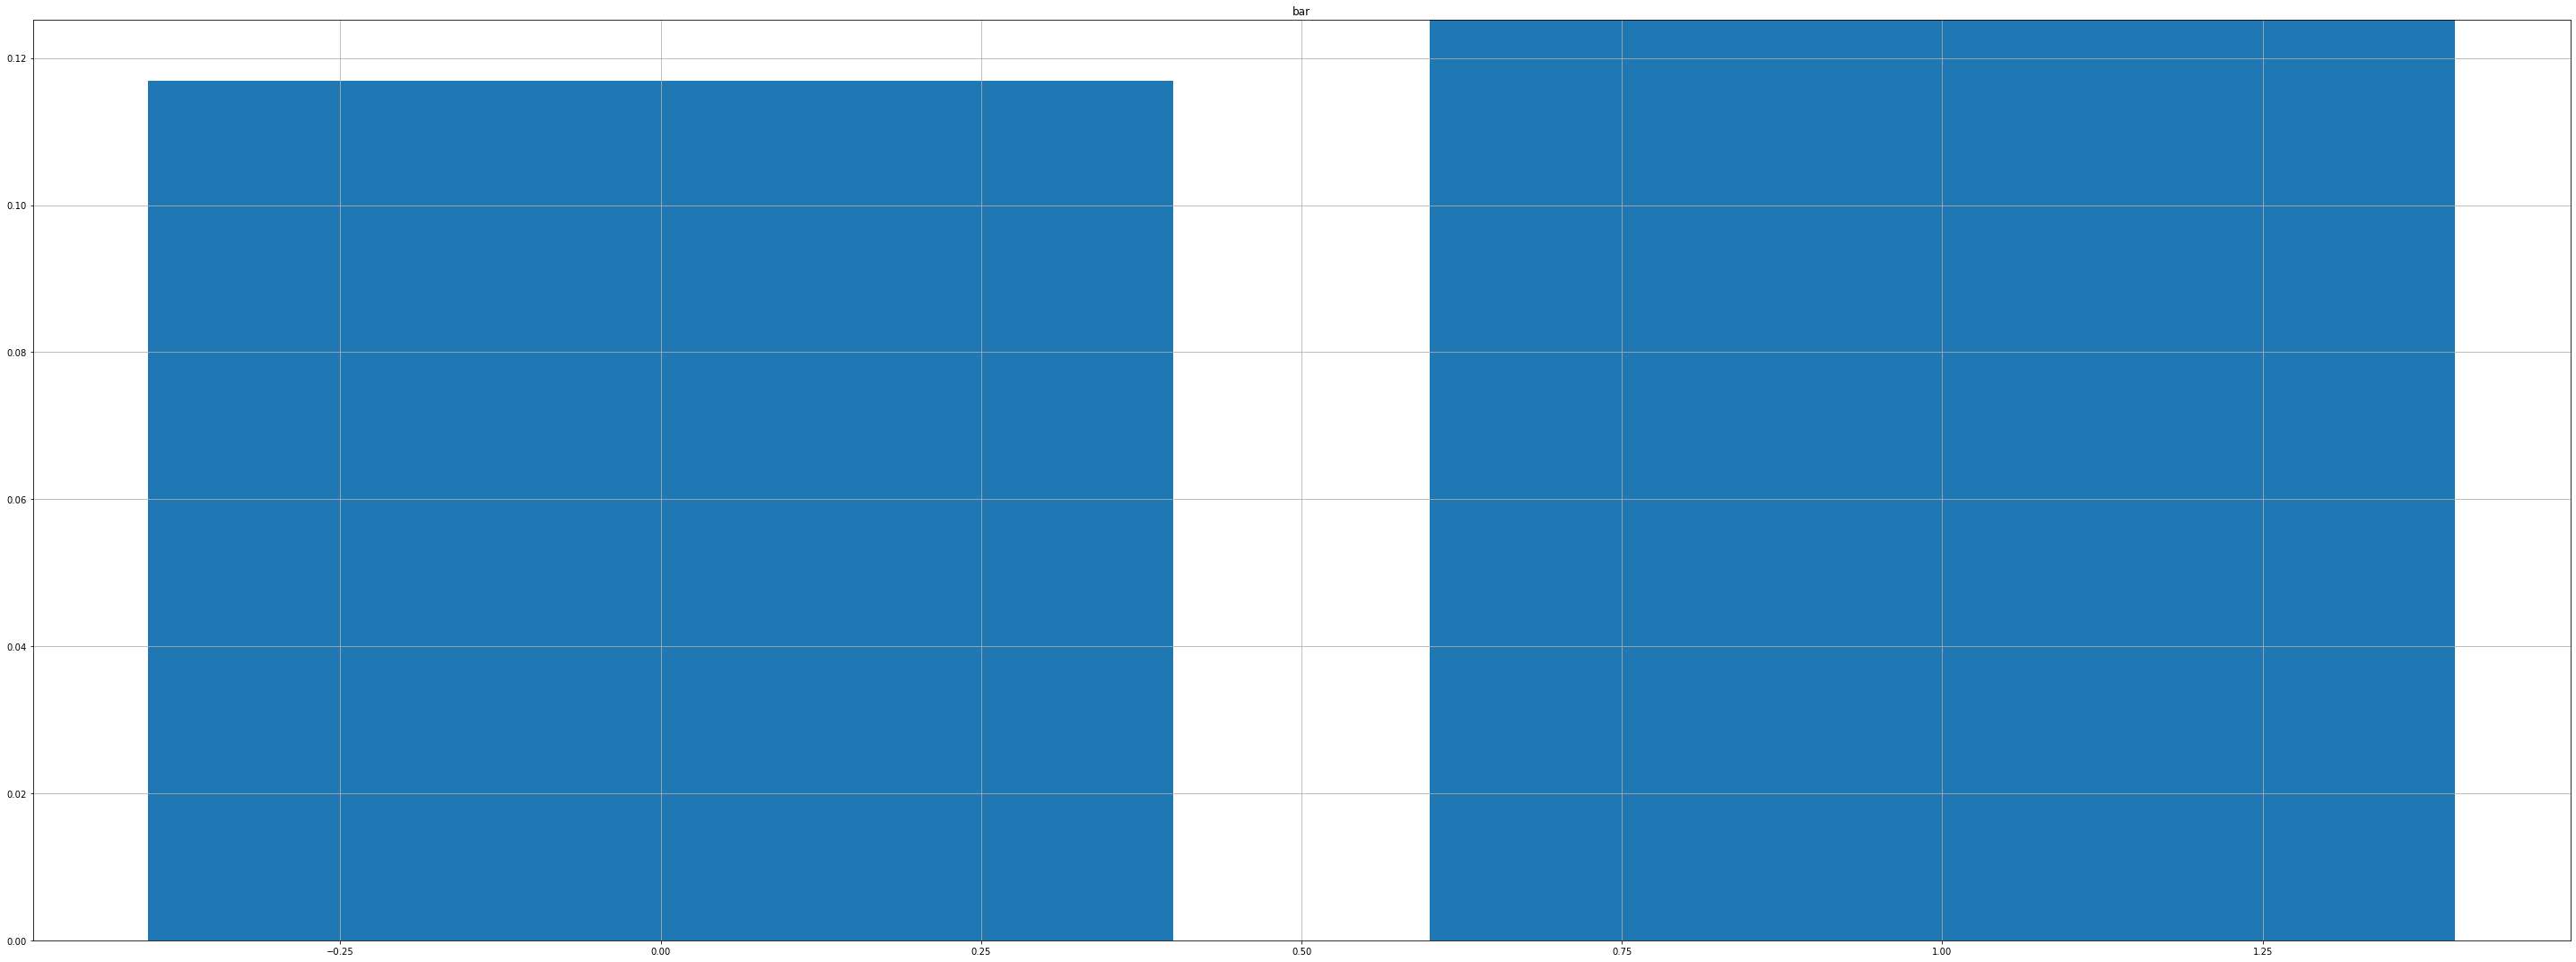

   job_blue-collar         y
0                0  0.130964
1                1  0.068894


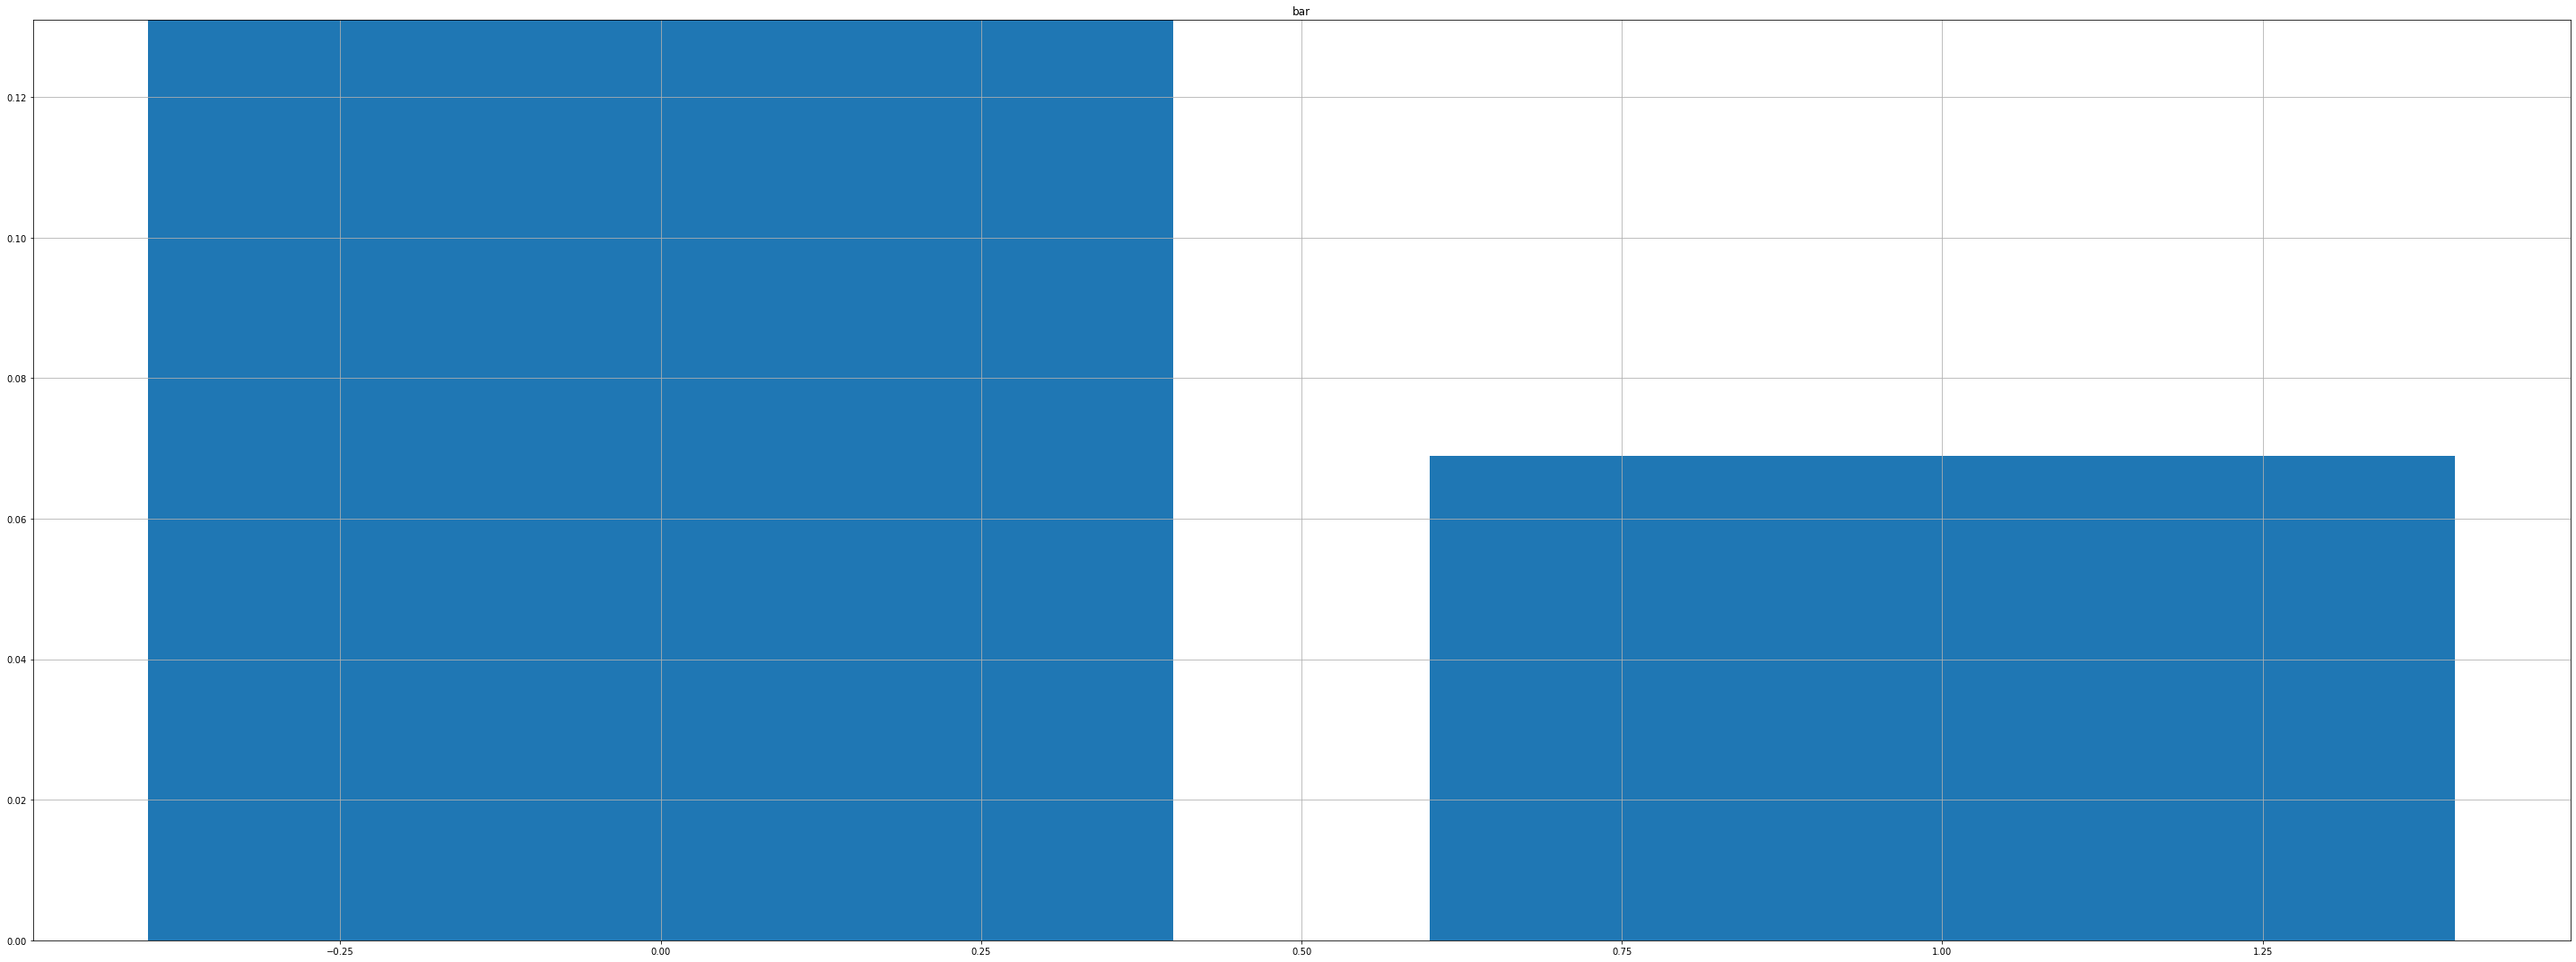

   job_entrepreneur         y
0                 0  0.119142
1                 1  0.080087


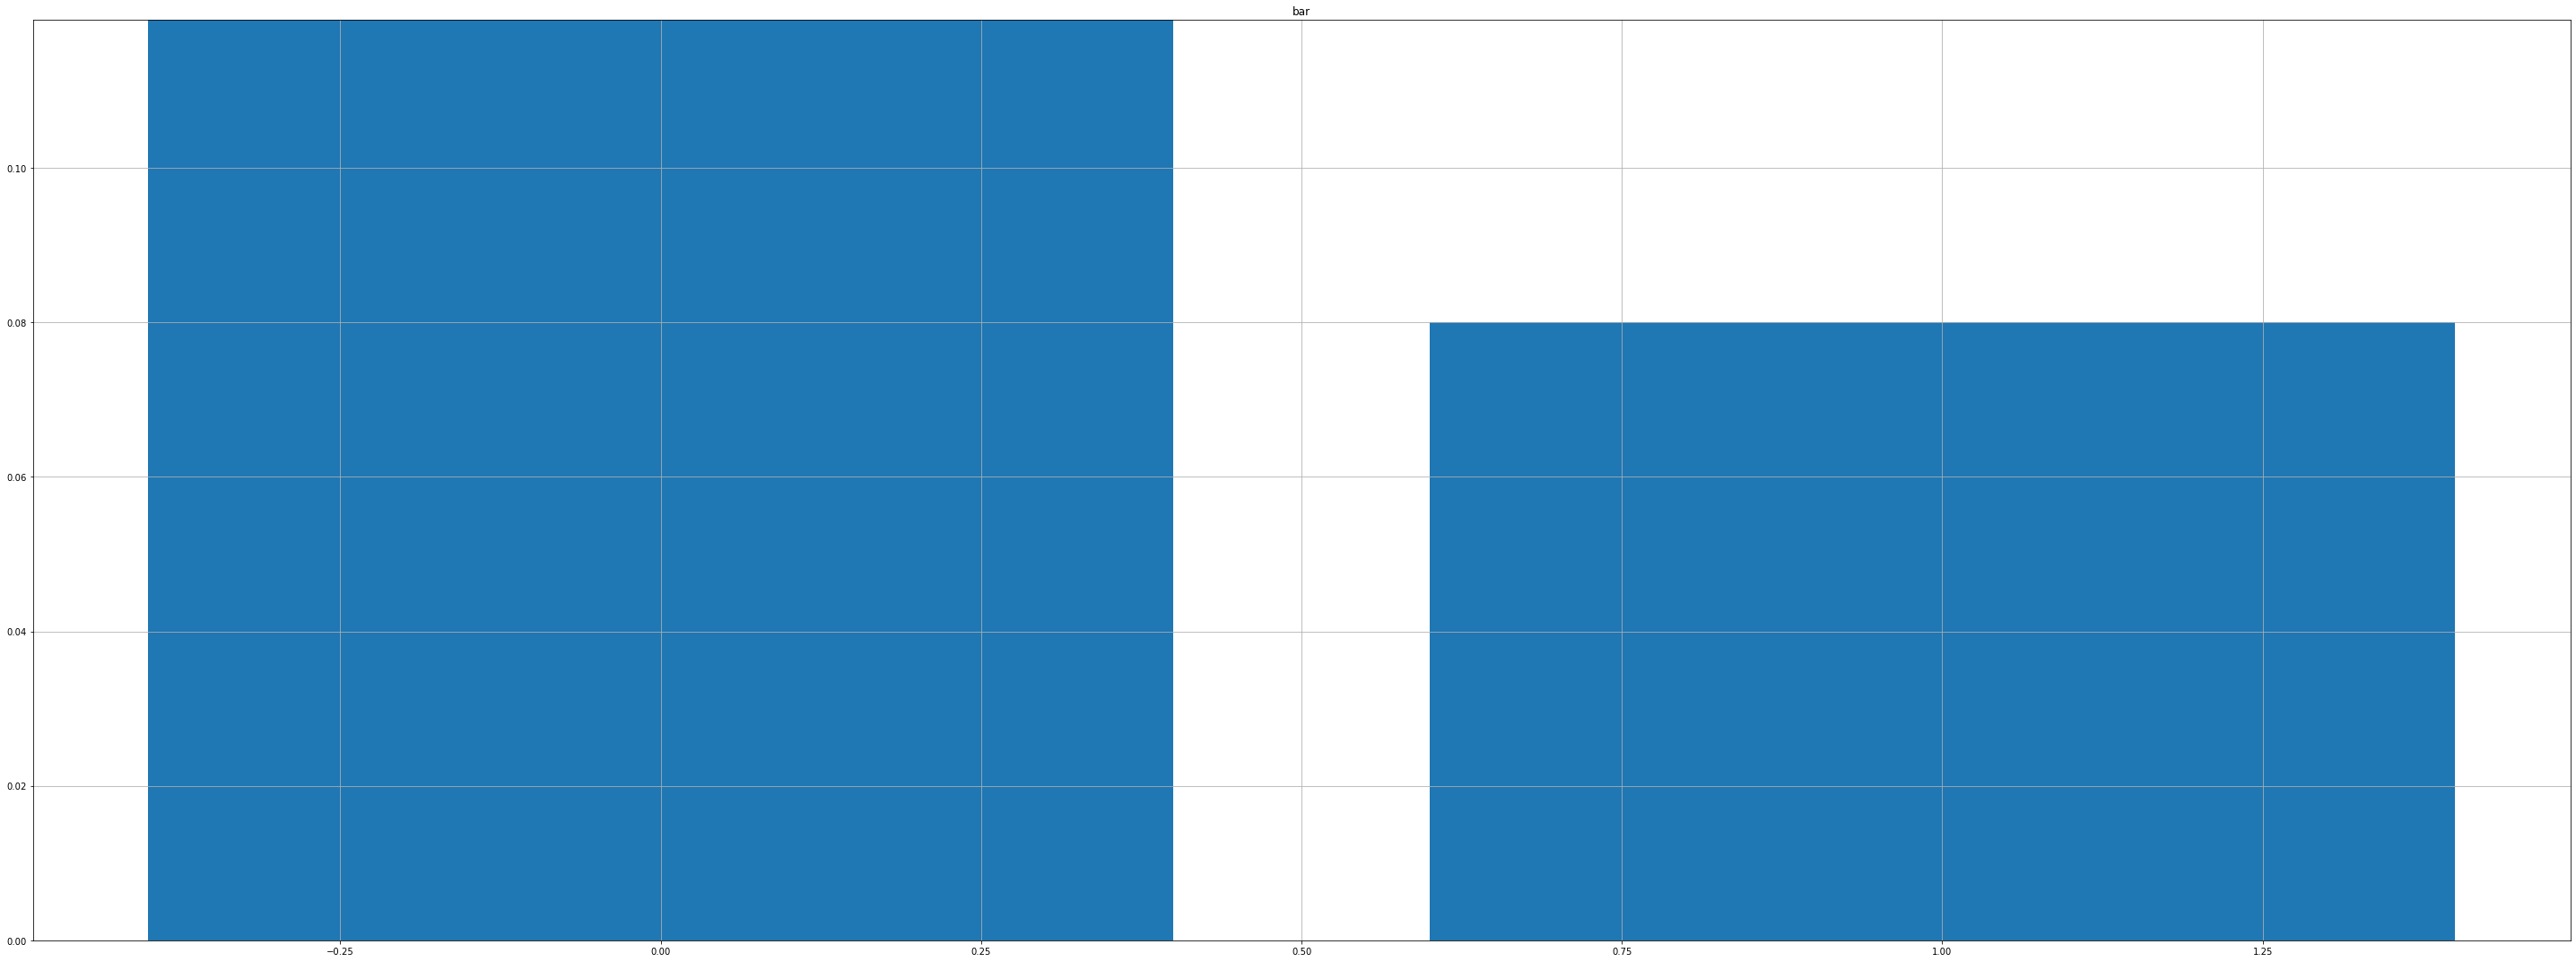

   job_housemaid         y
0              0  0.119123
1              1  0.071809


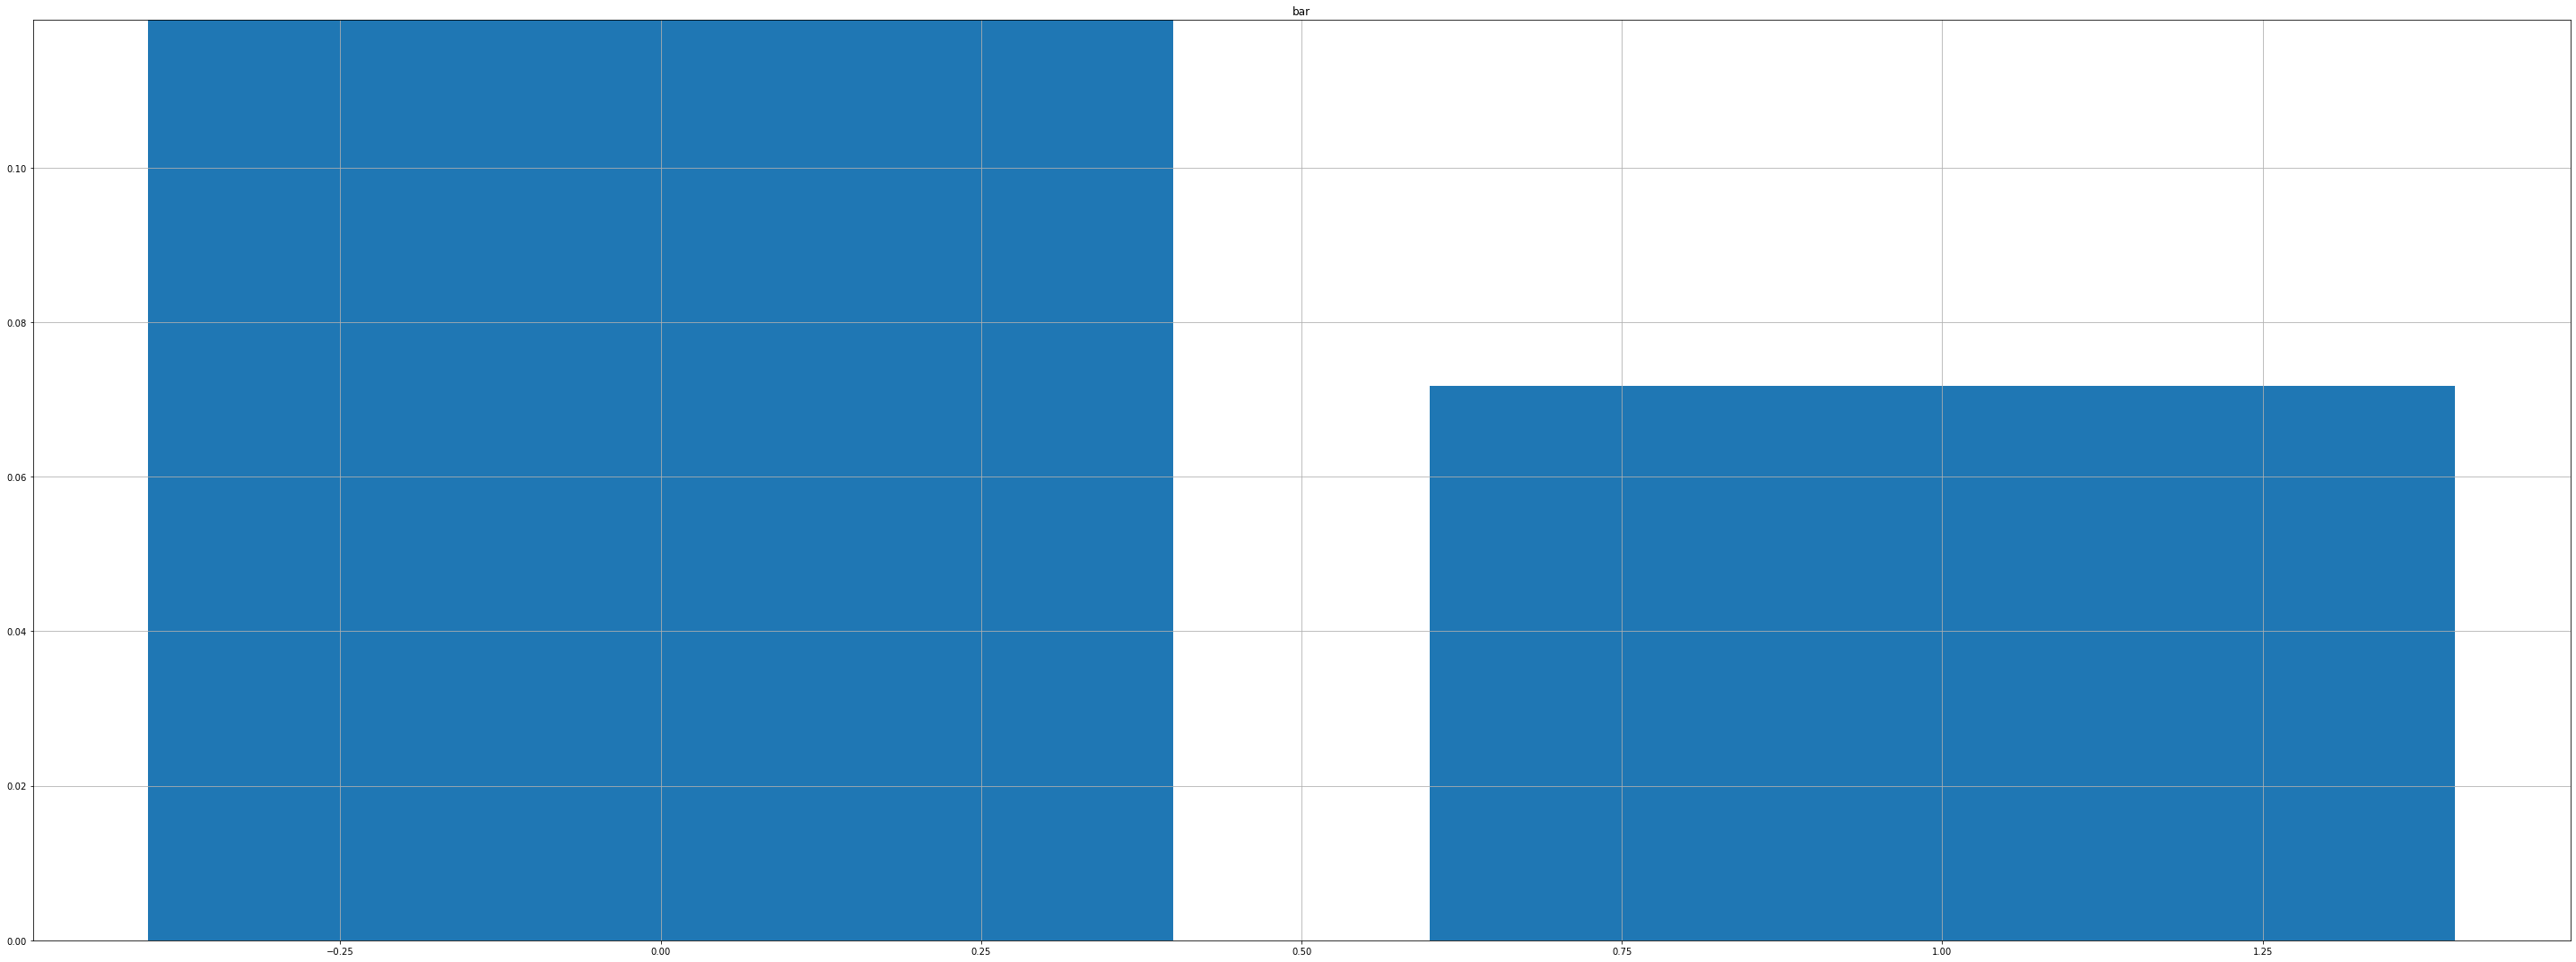

   job_management         y
0               0  0.112329
1               1  0.138062


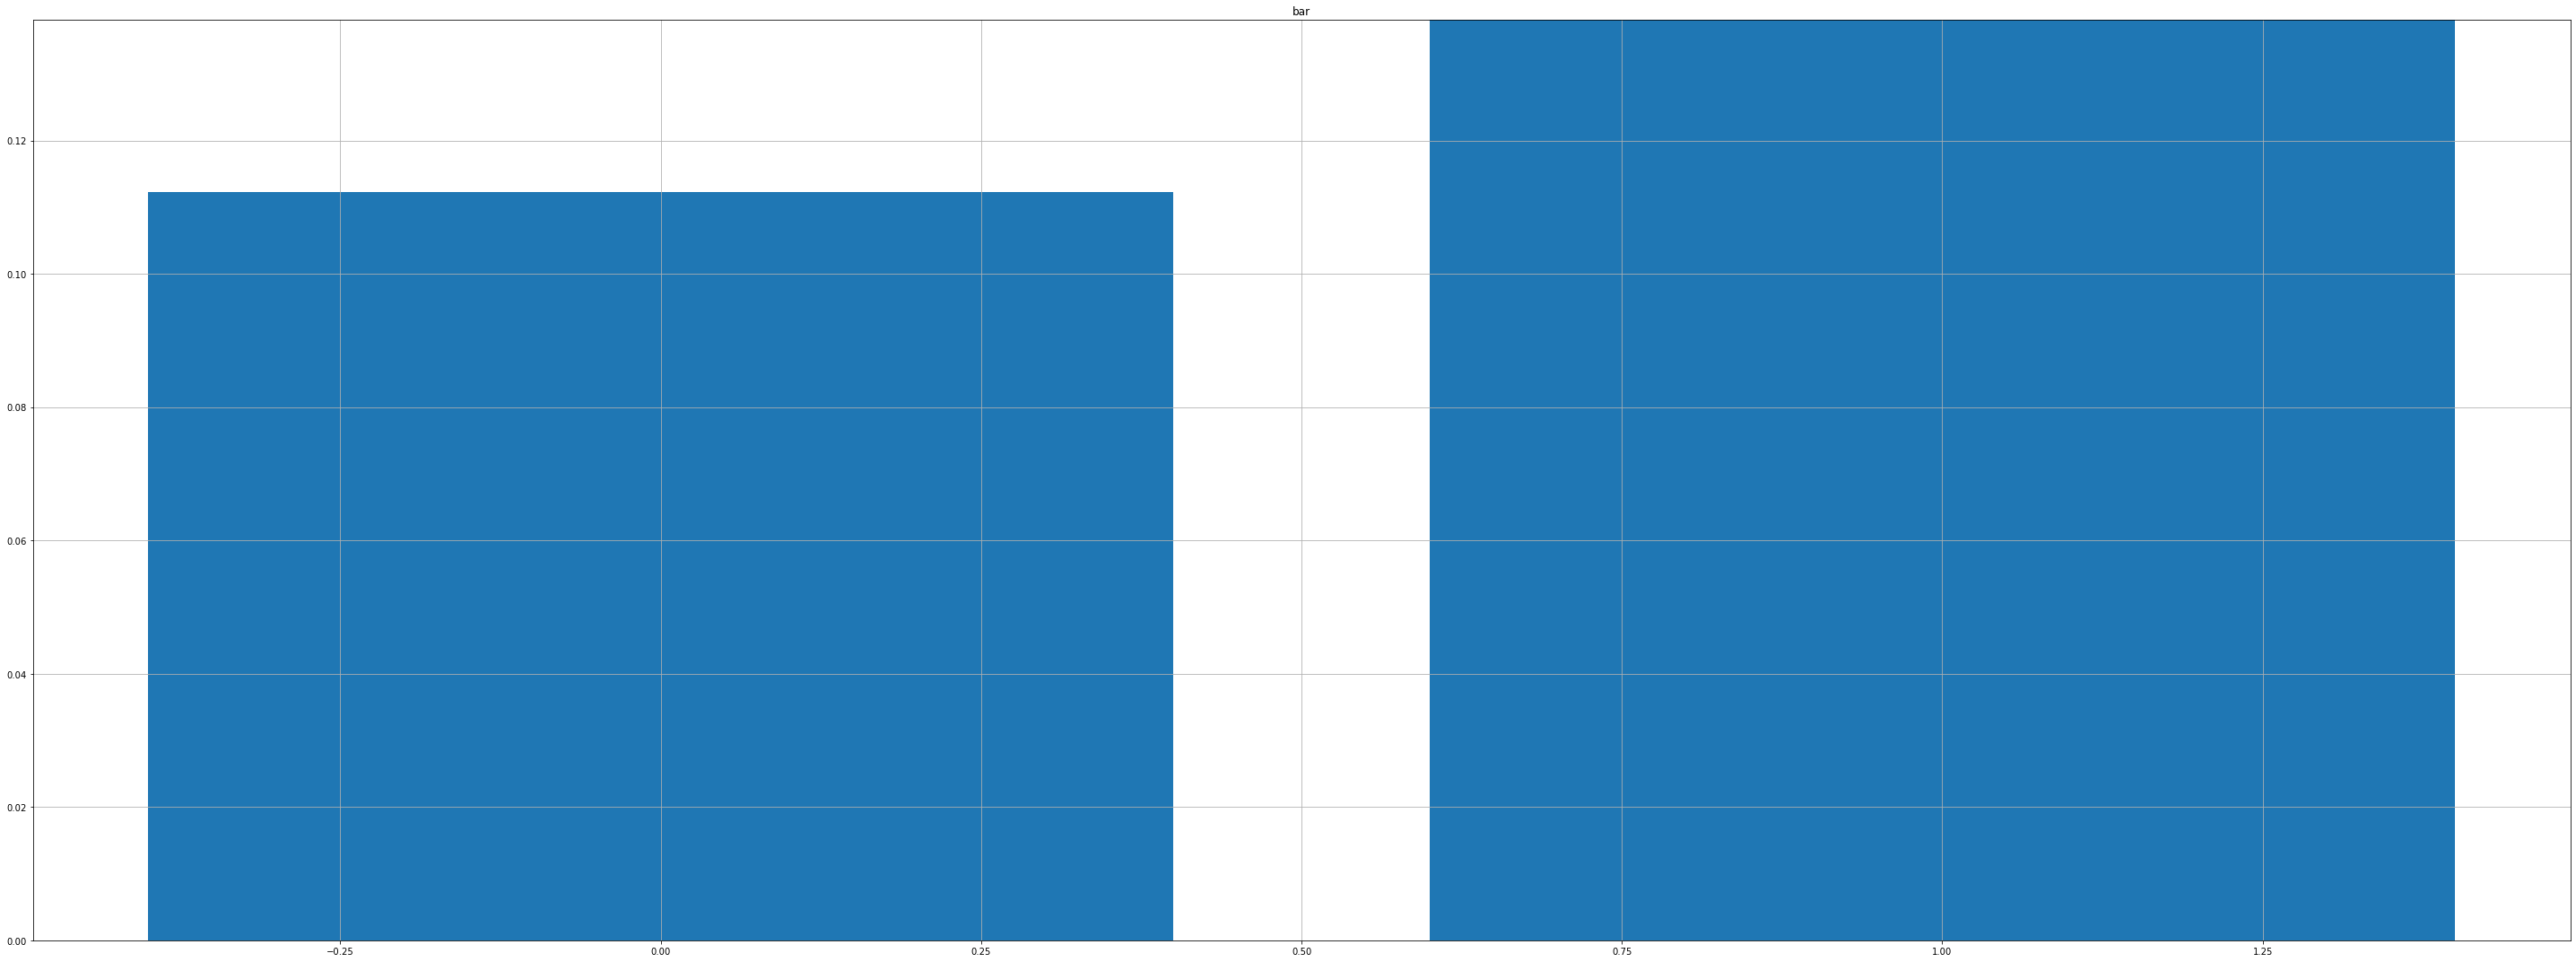

   job_retired         y
0            0  0.111542
1            1  0.238095


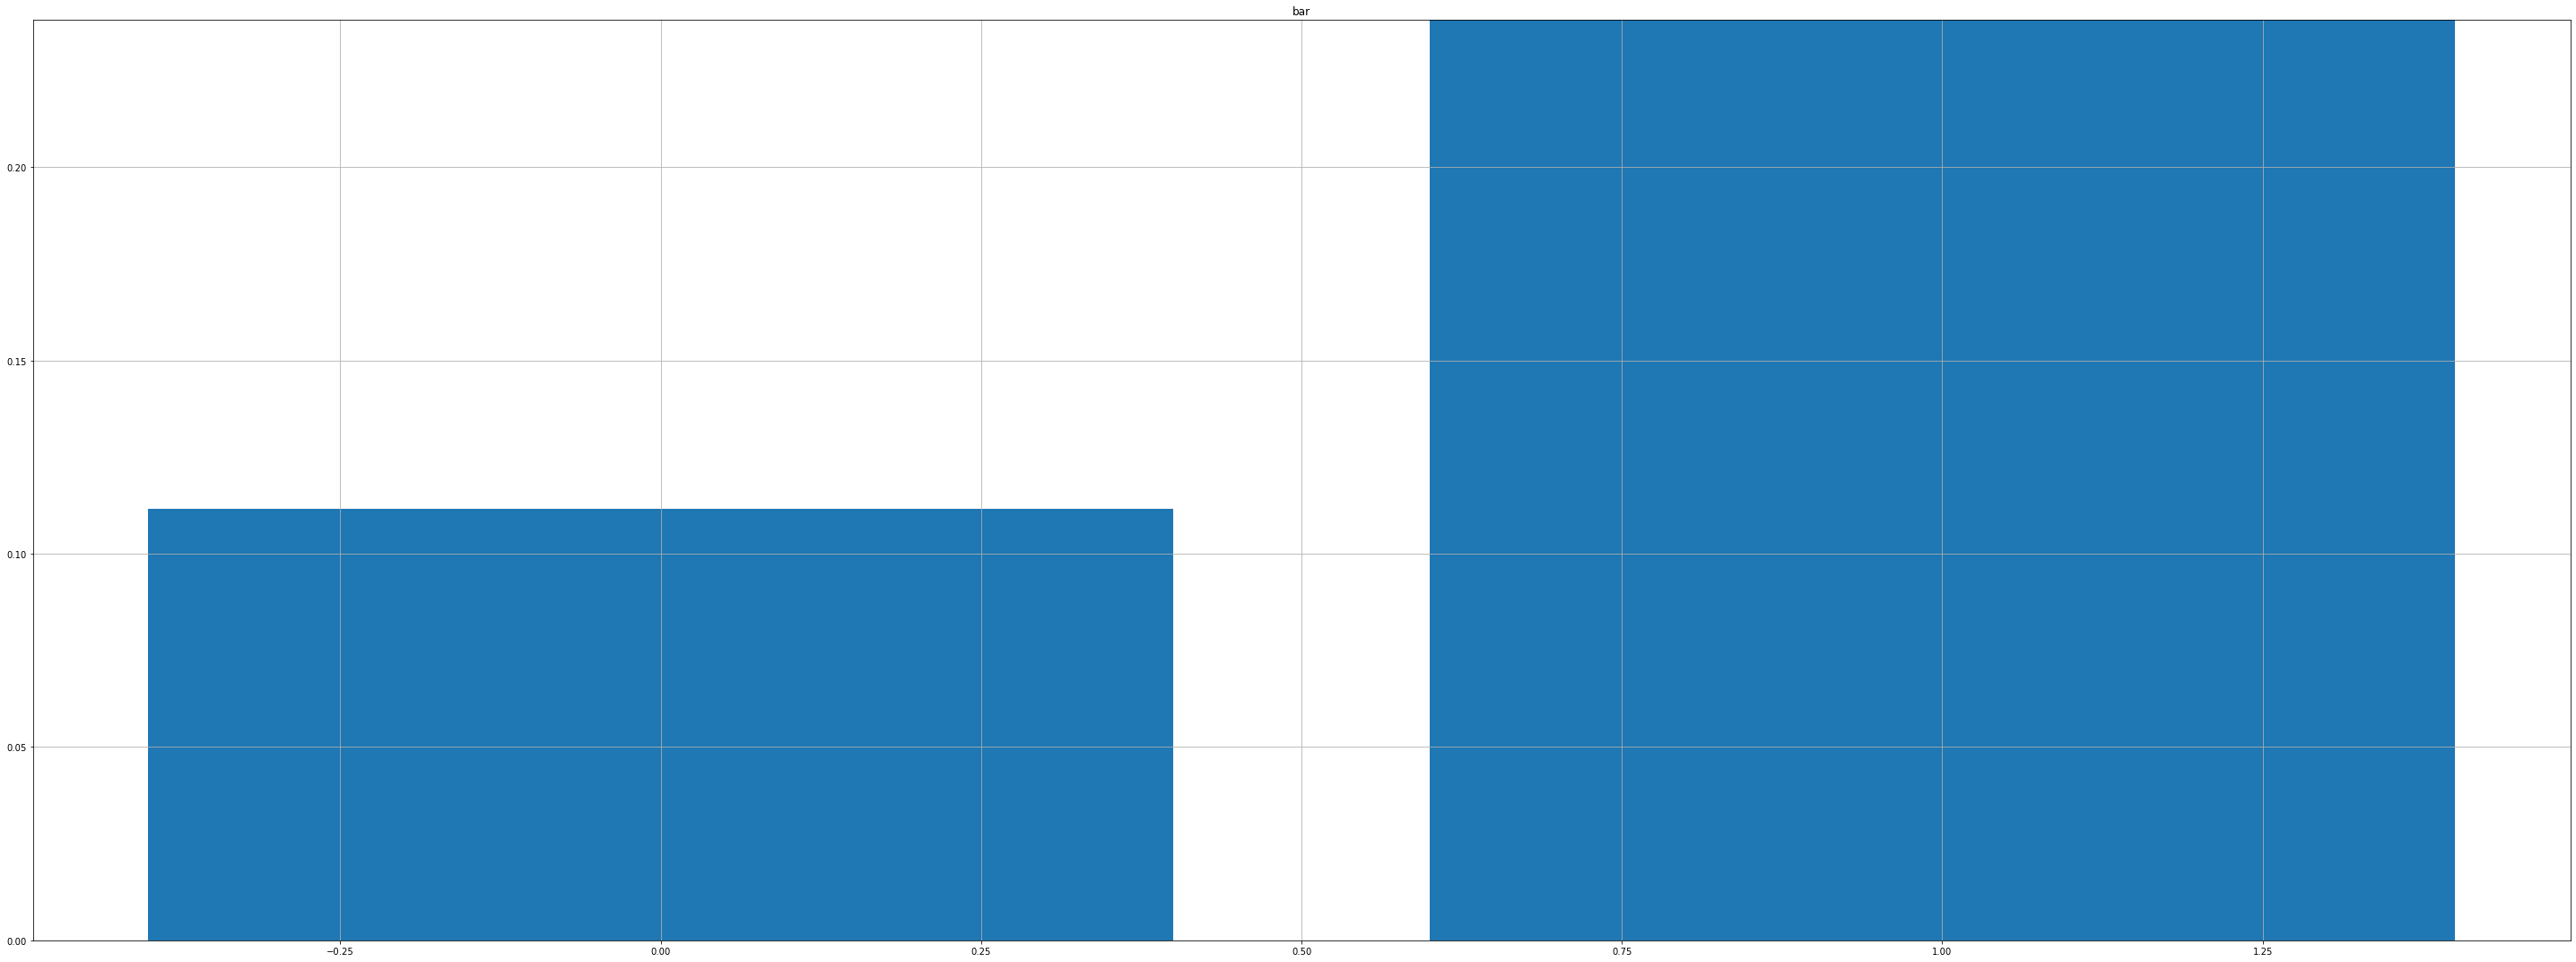

   job_self-employed         y
0                  0  0.118101
1                  1  0.109677


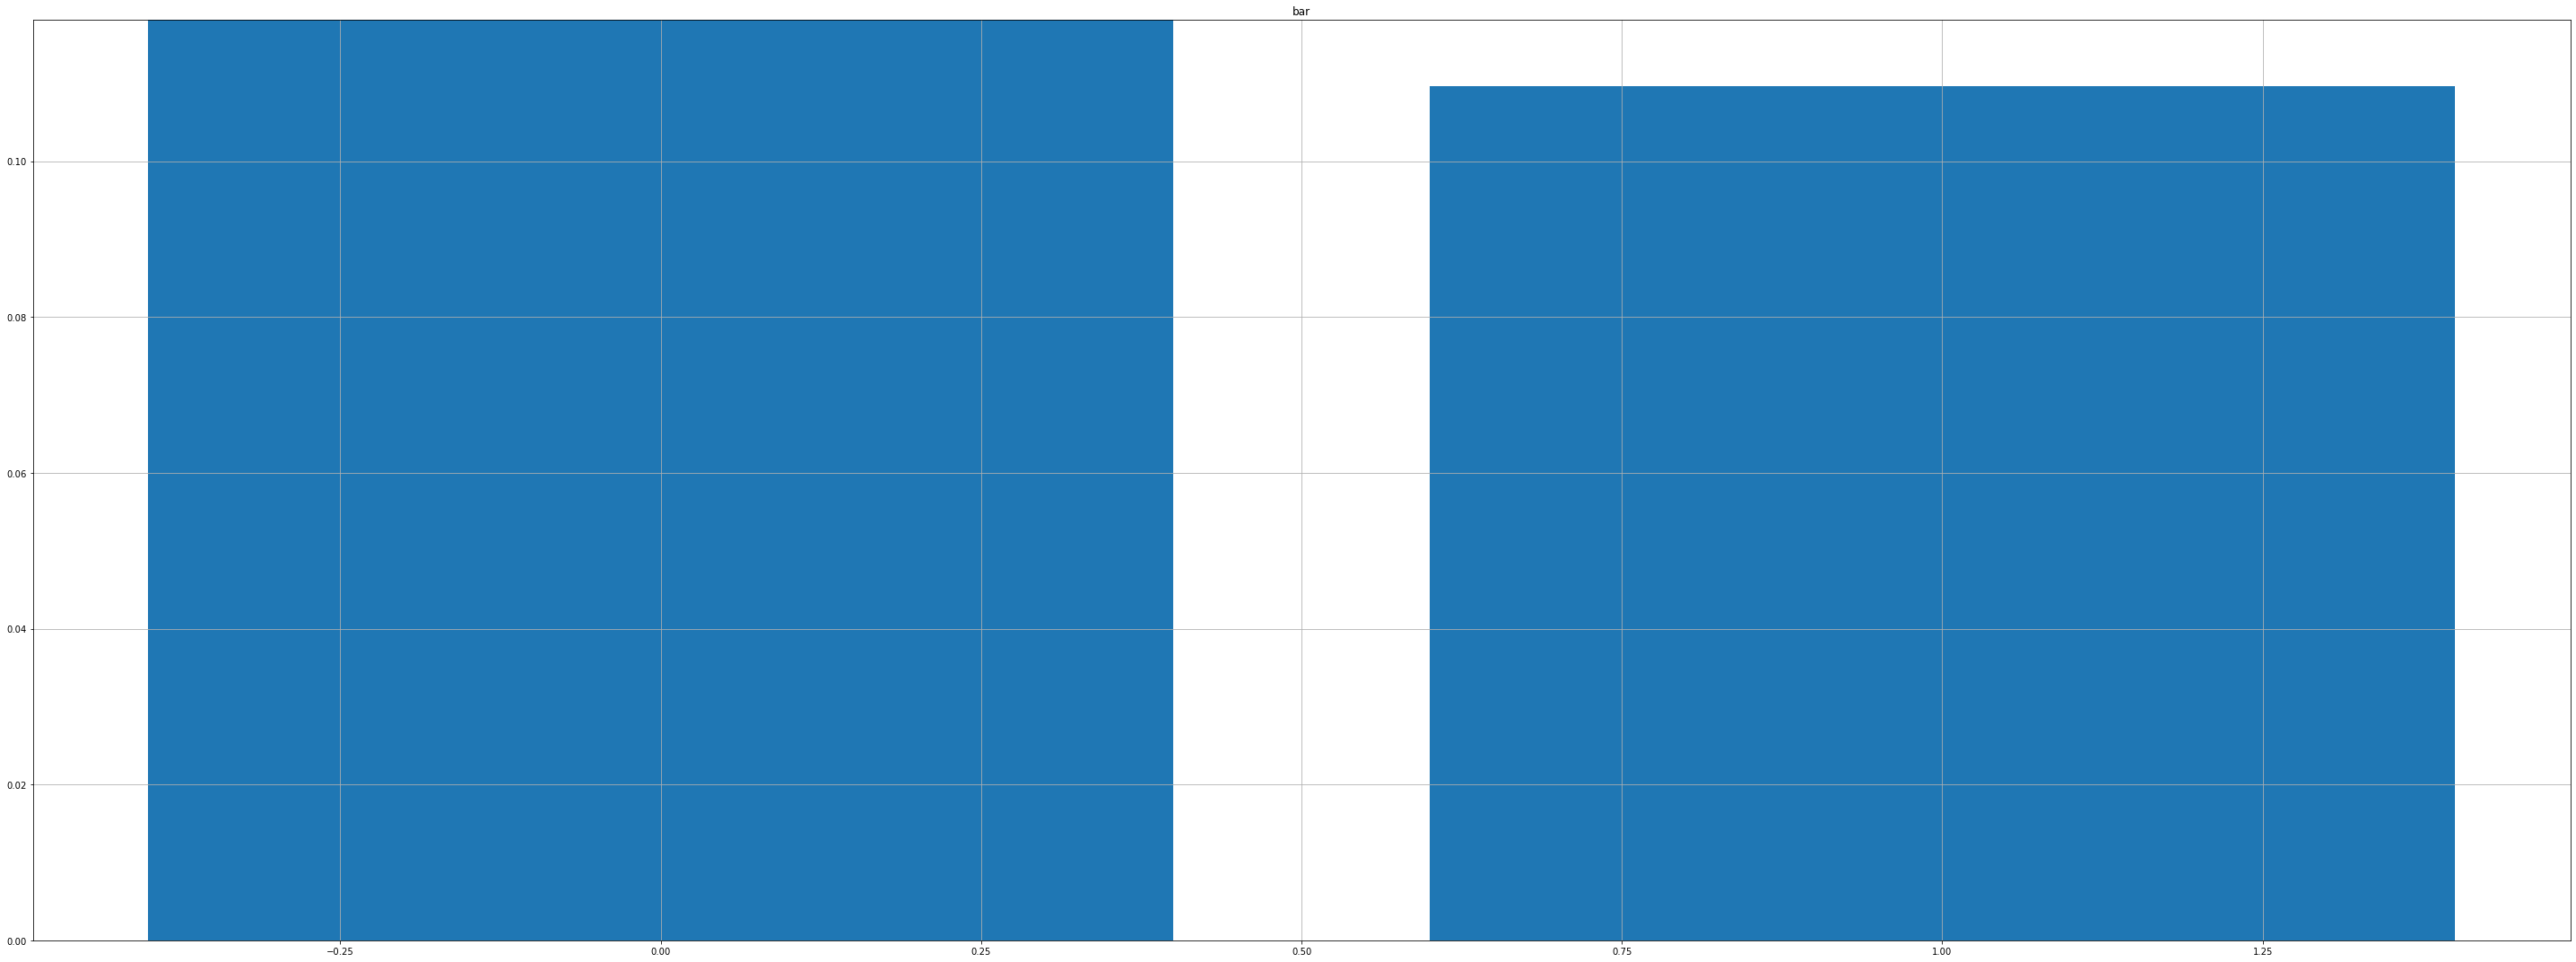

   job_services         y
0             0  0.120725
1             1  0.089243


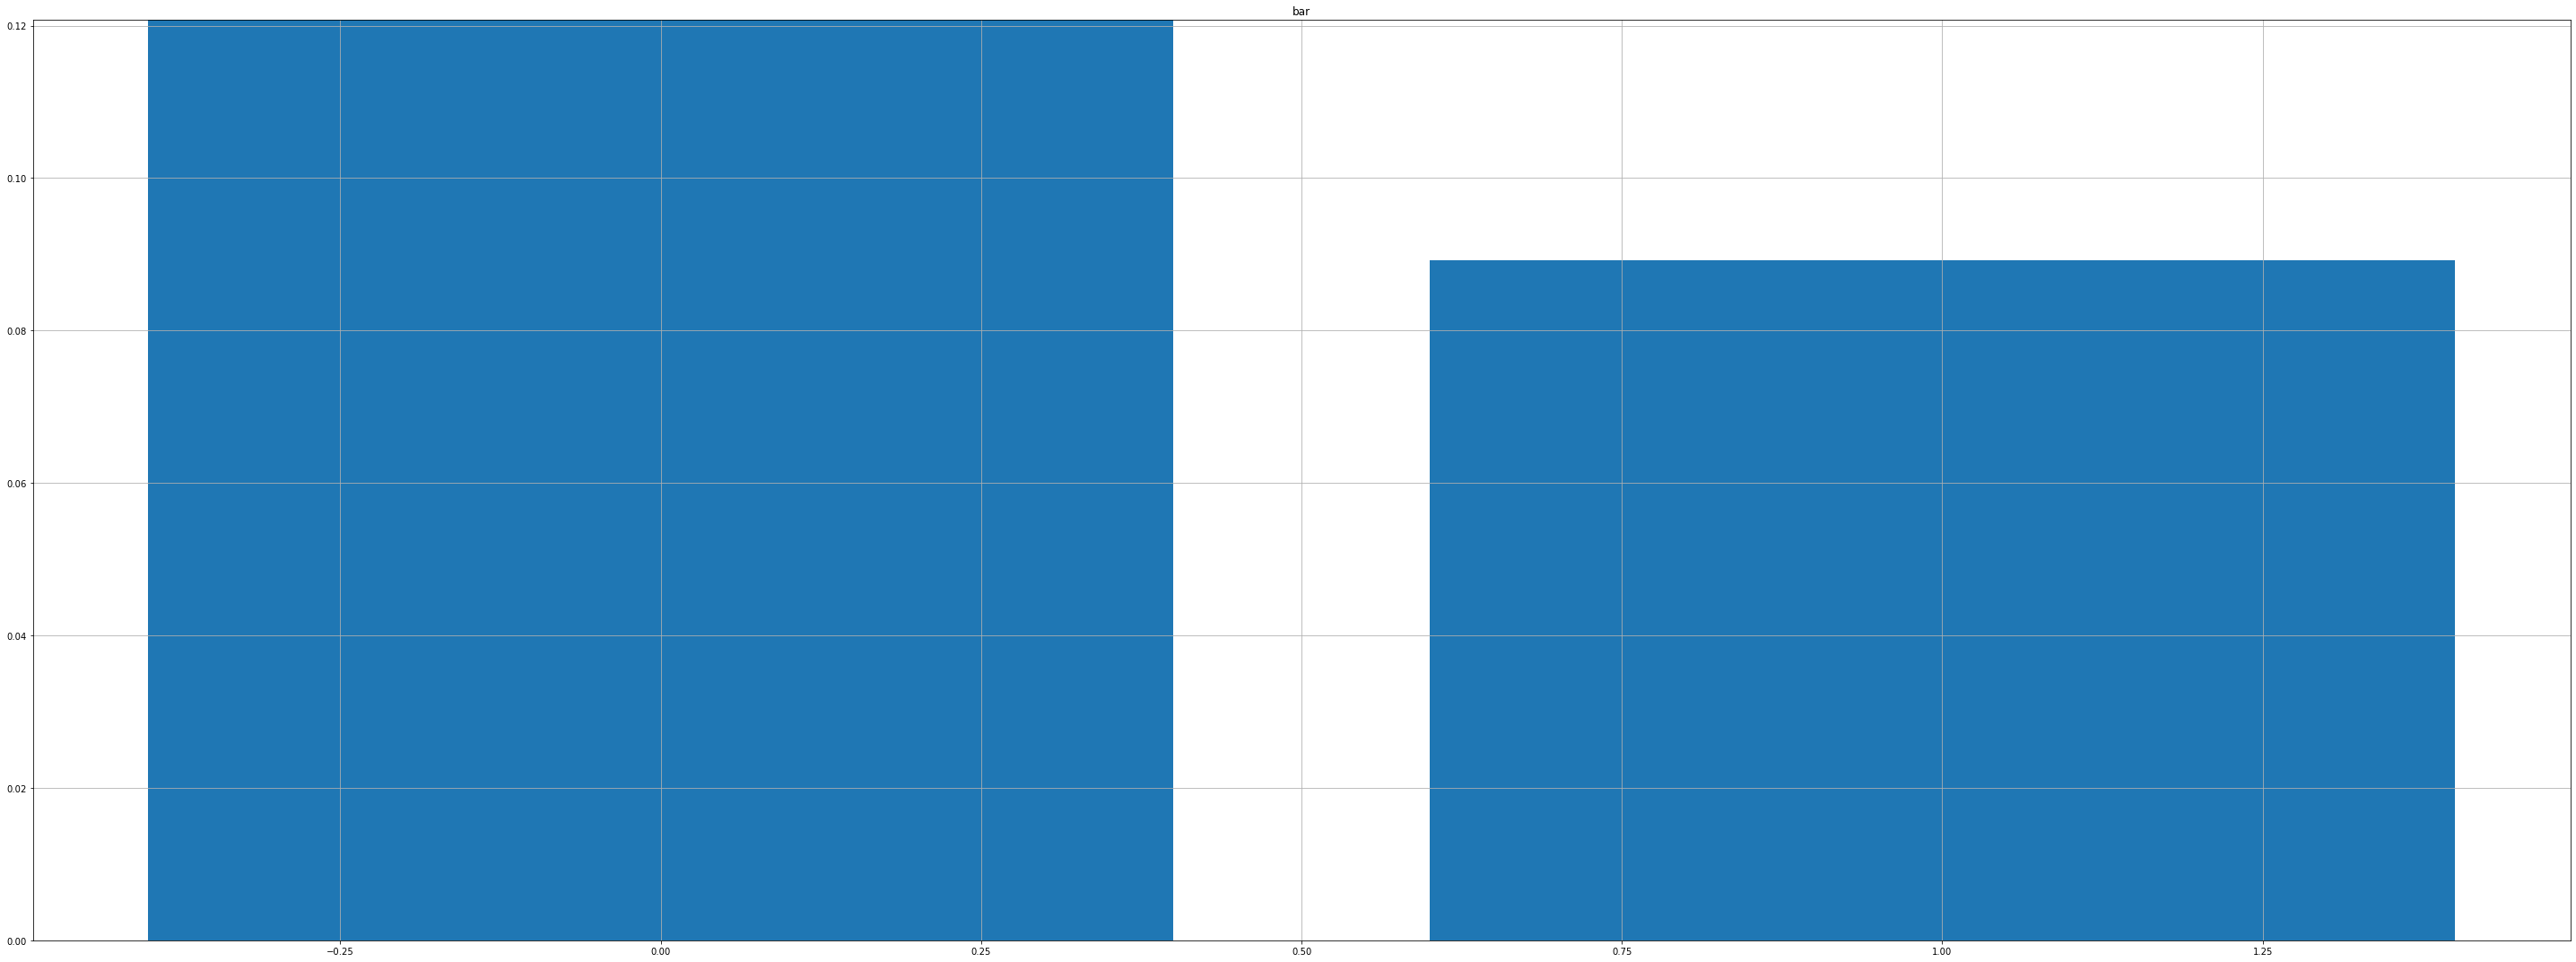

   job_student         y
0            0  0.113866
1            1  0.295918


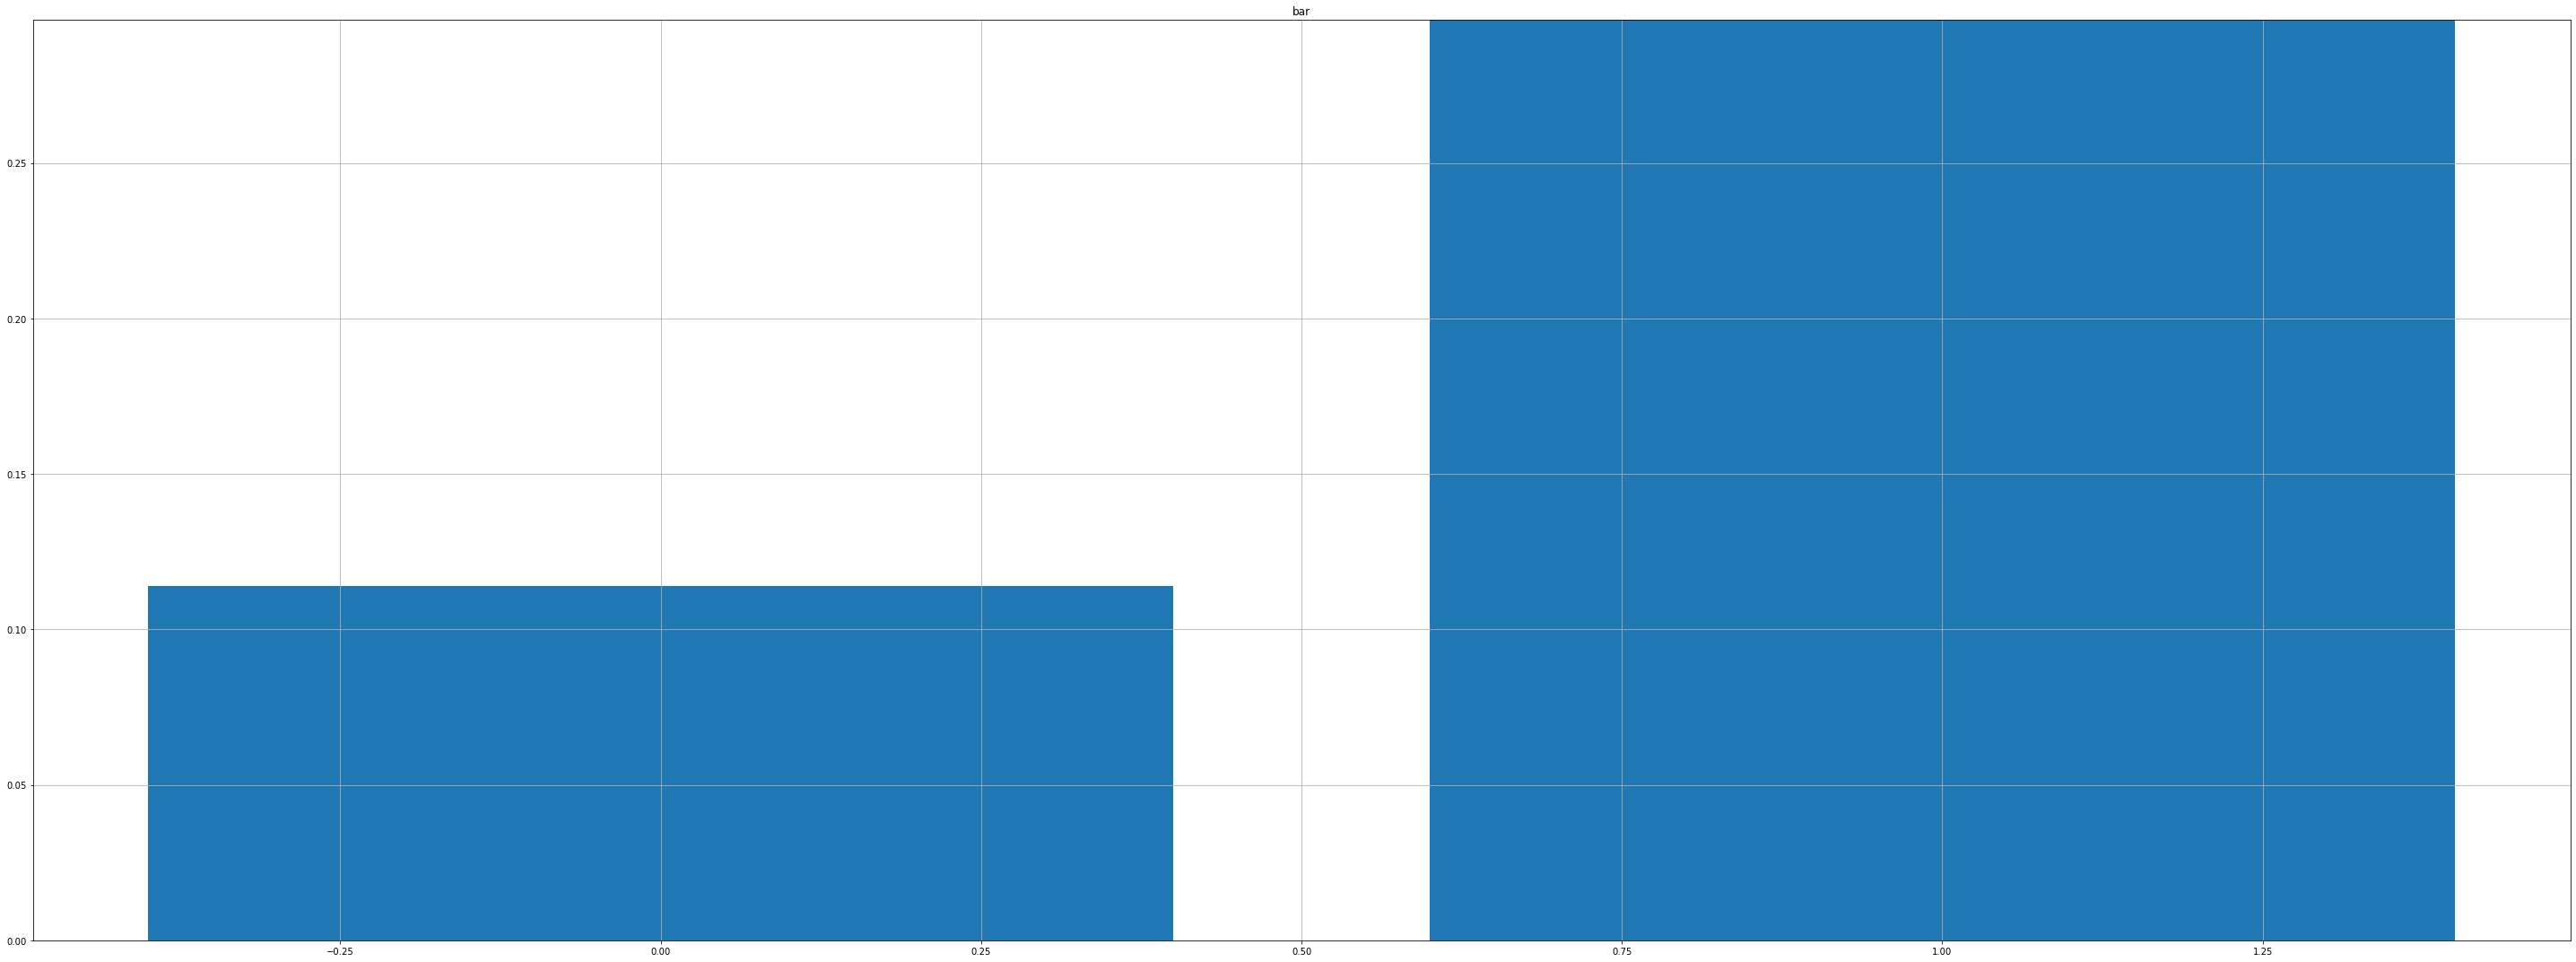

   job_technician         y
0               0  0.117506
1               1  0.119306


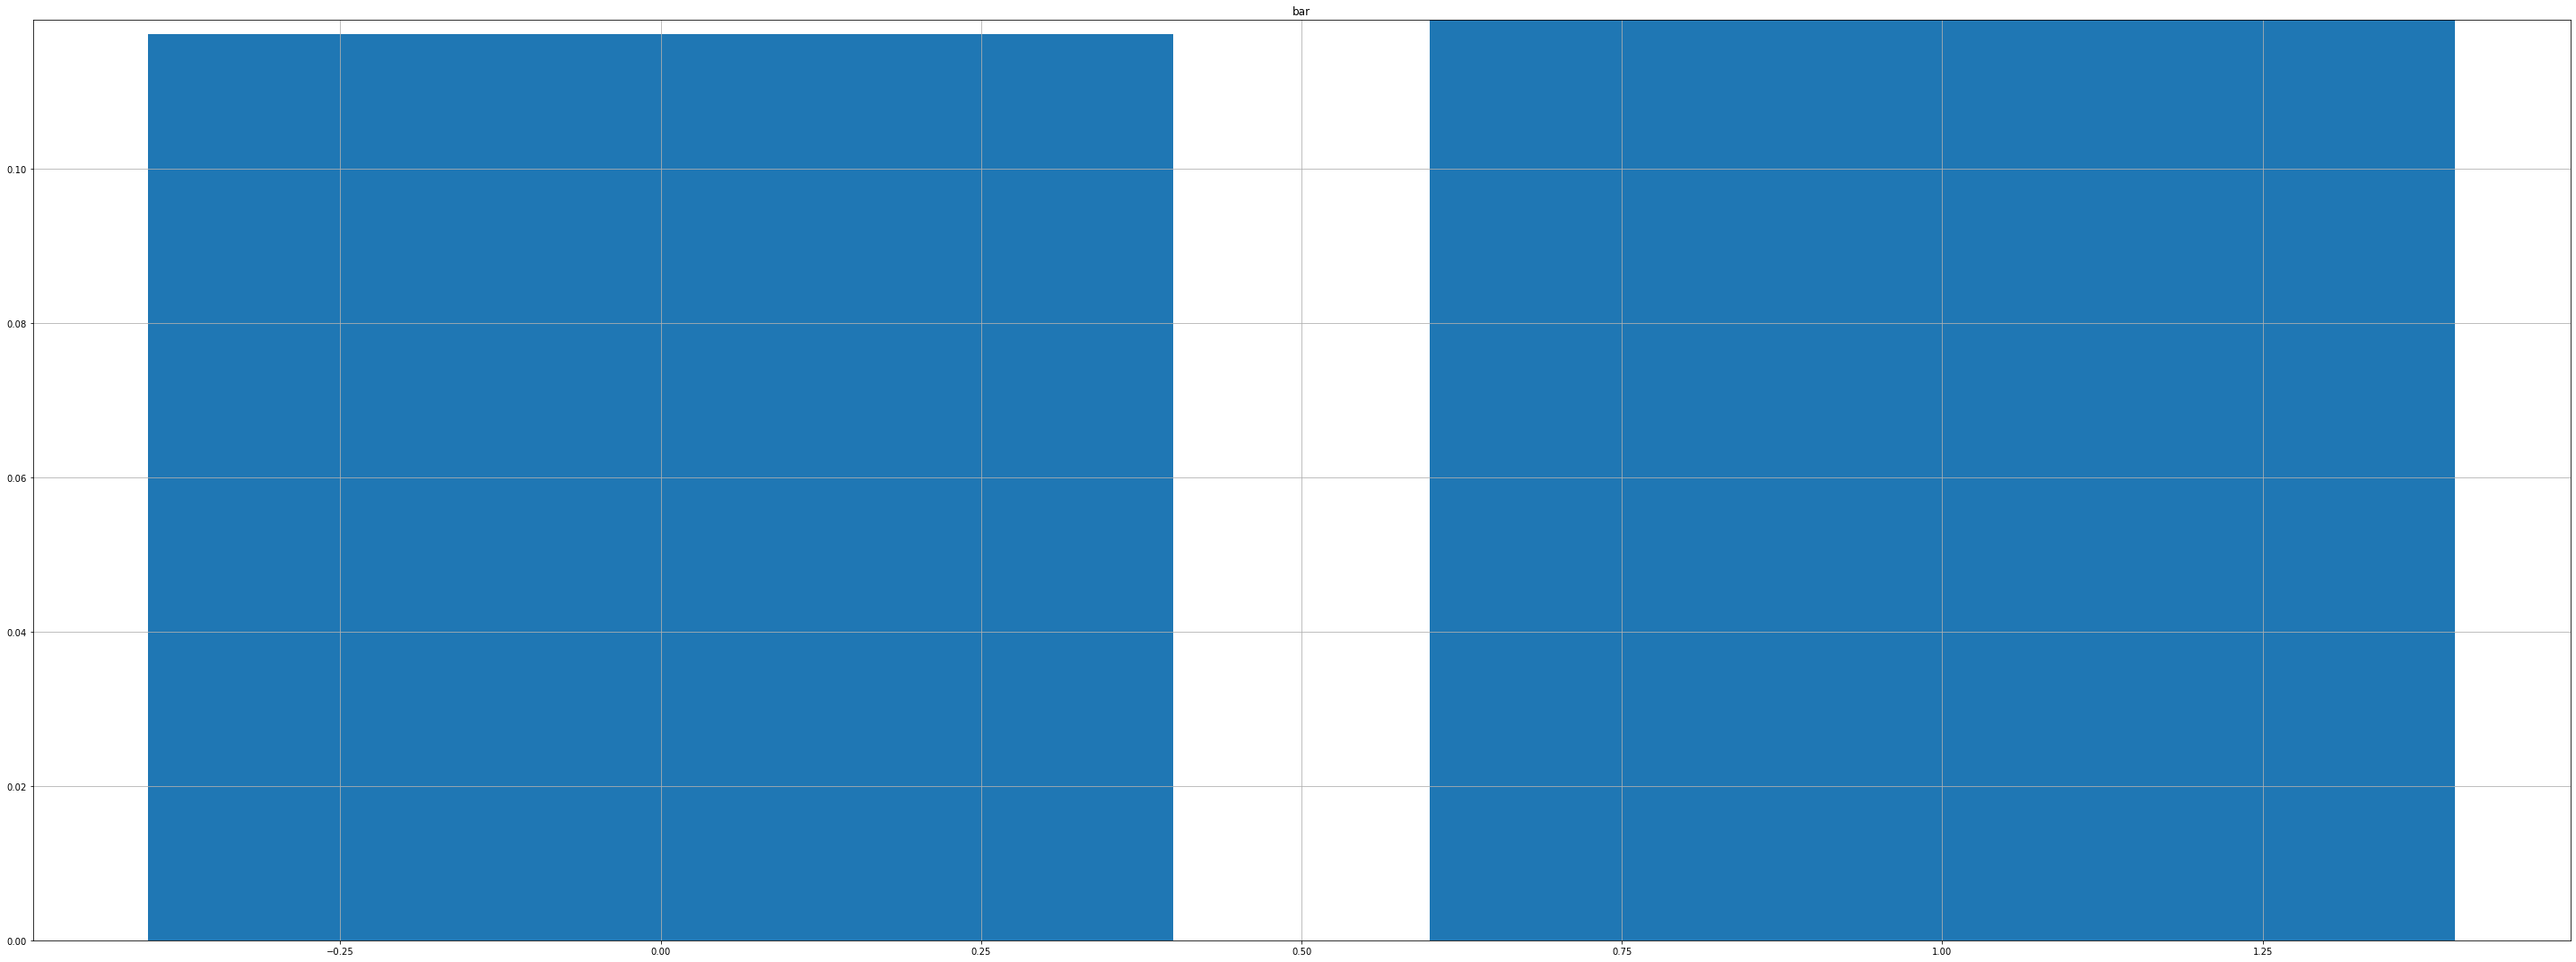

   job_unemployed         y
0               0  0.117168
1               1  0.137529


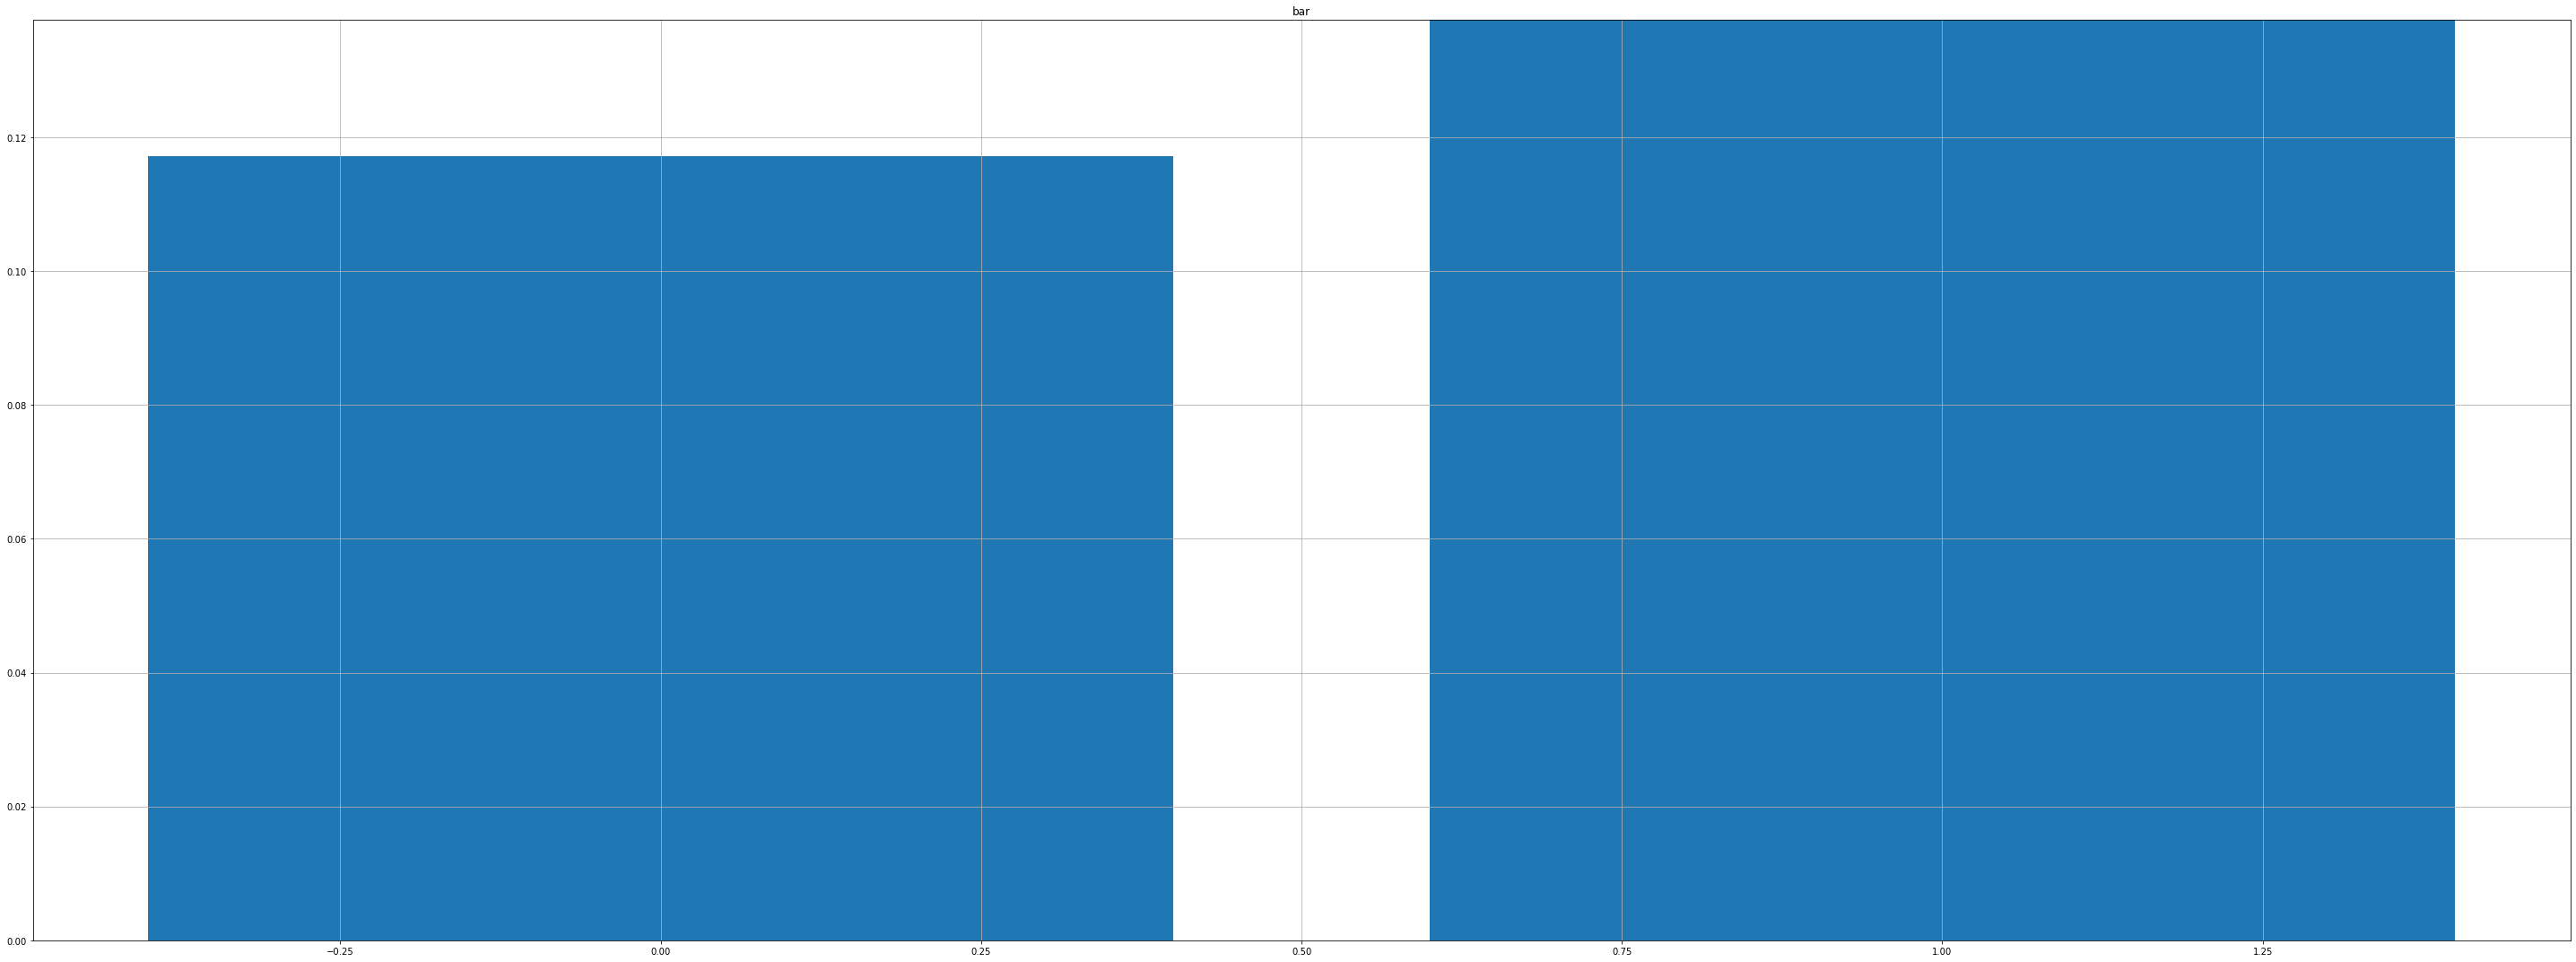

   marital_divorced         y
0                 0  0.117957
1                 1  0.116729


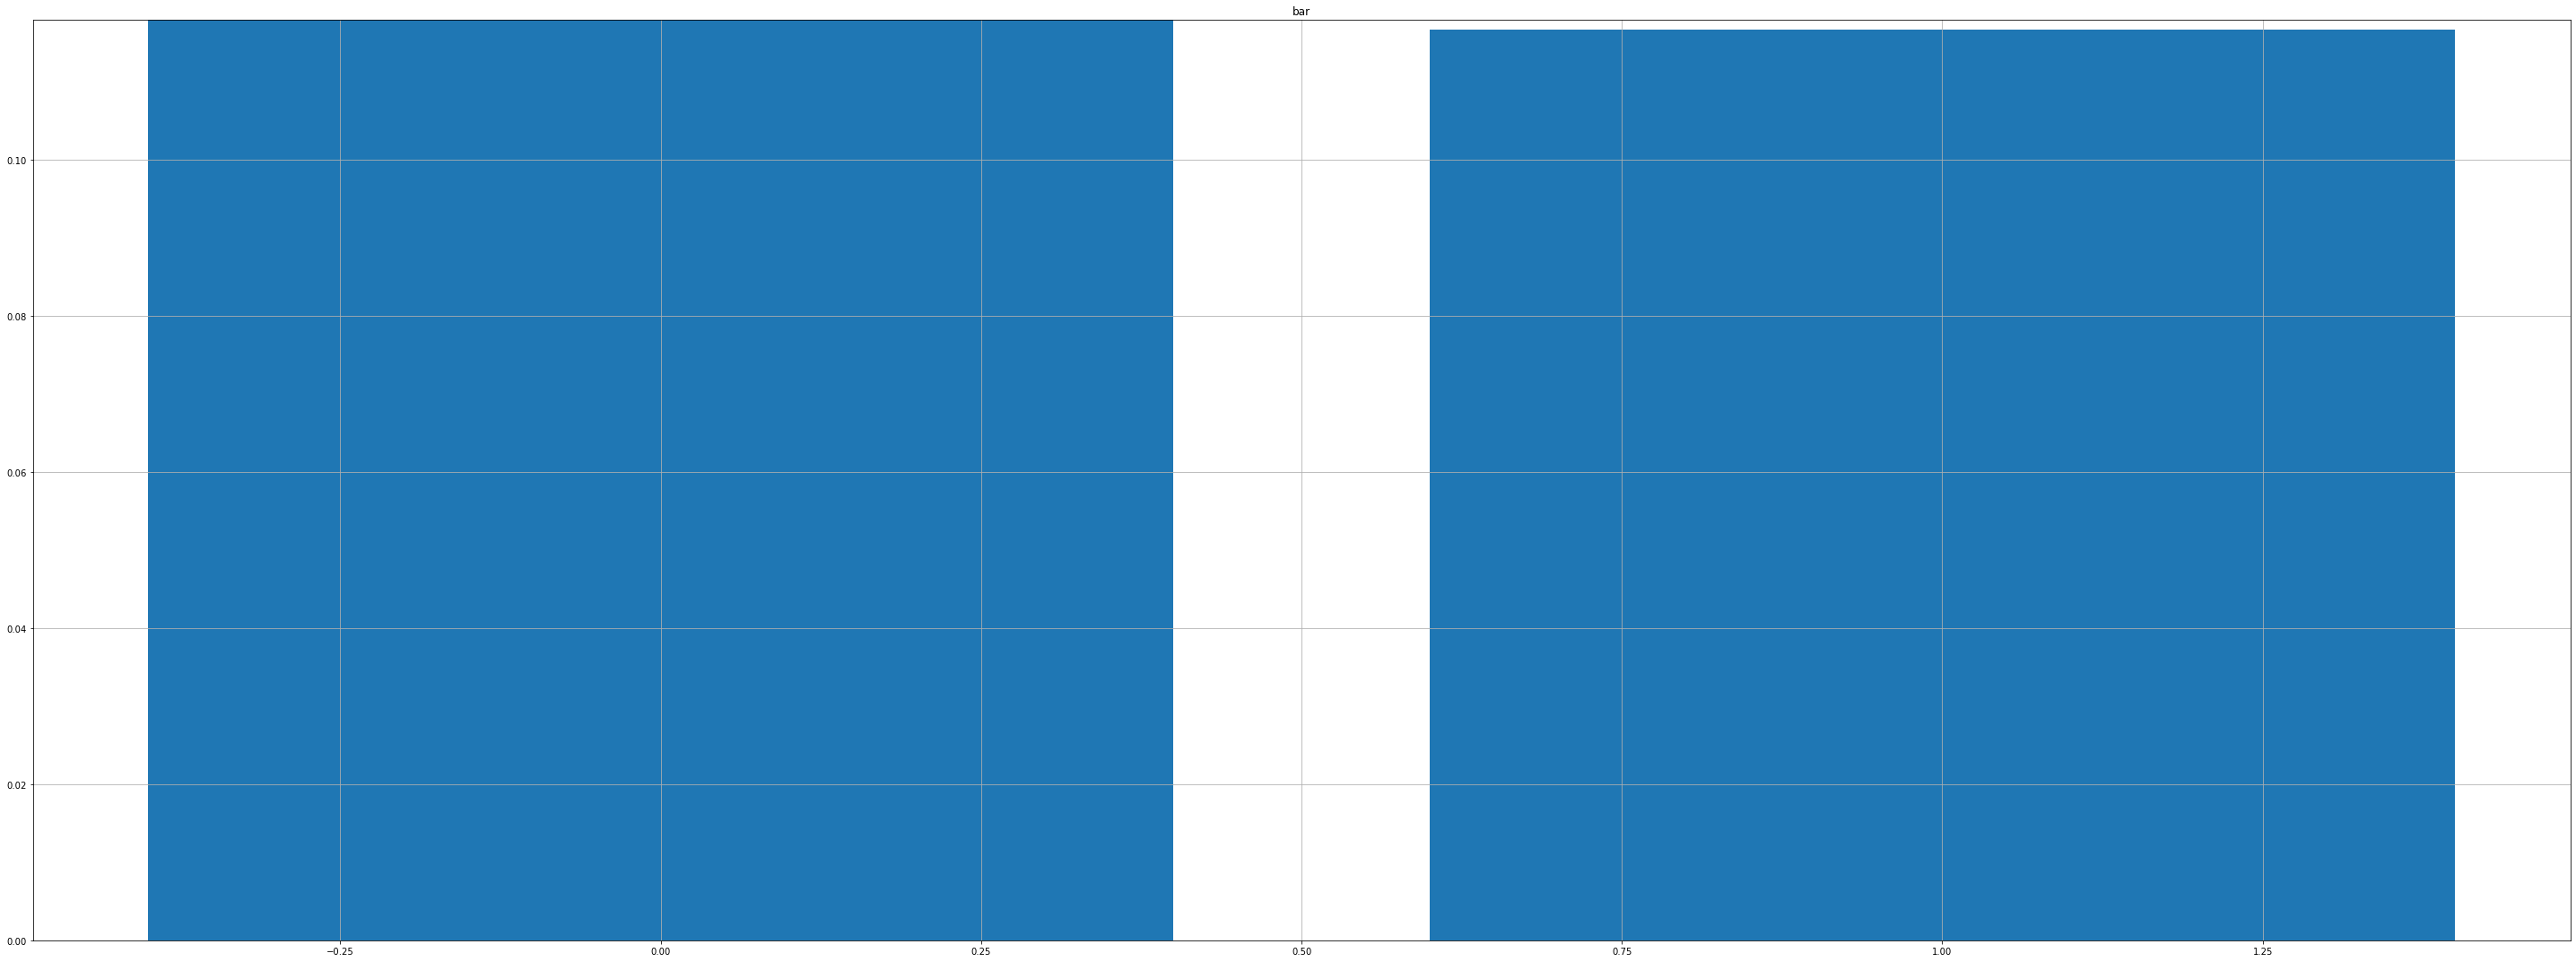

   marital_married         y
0                0  0.139817
1                1  0.103032


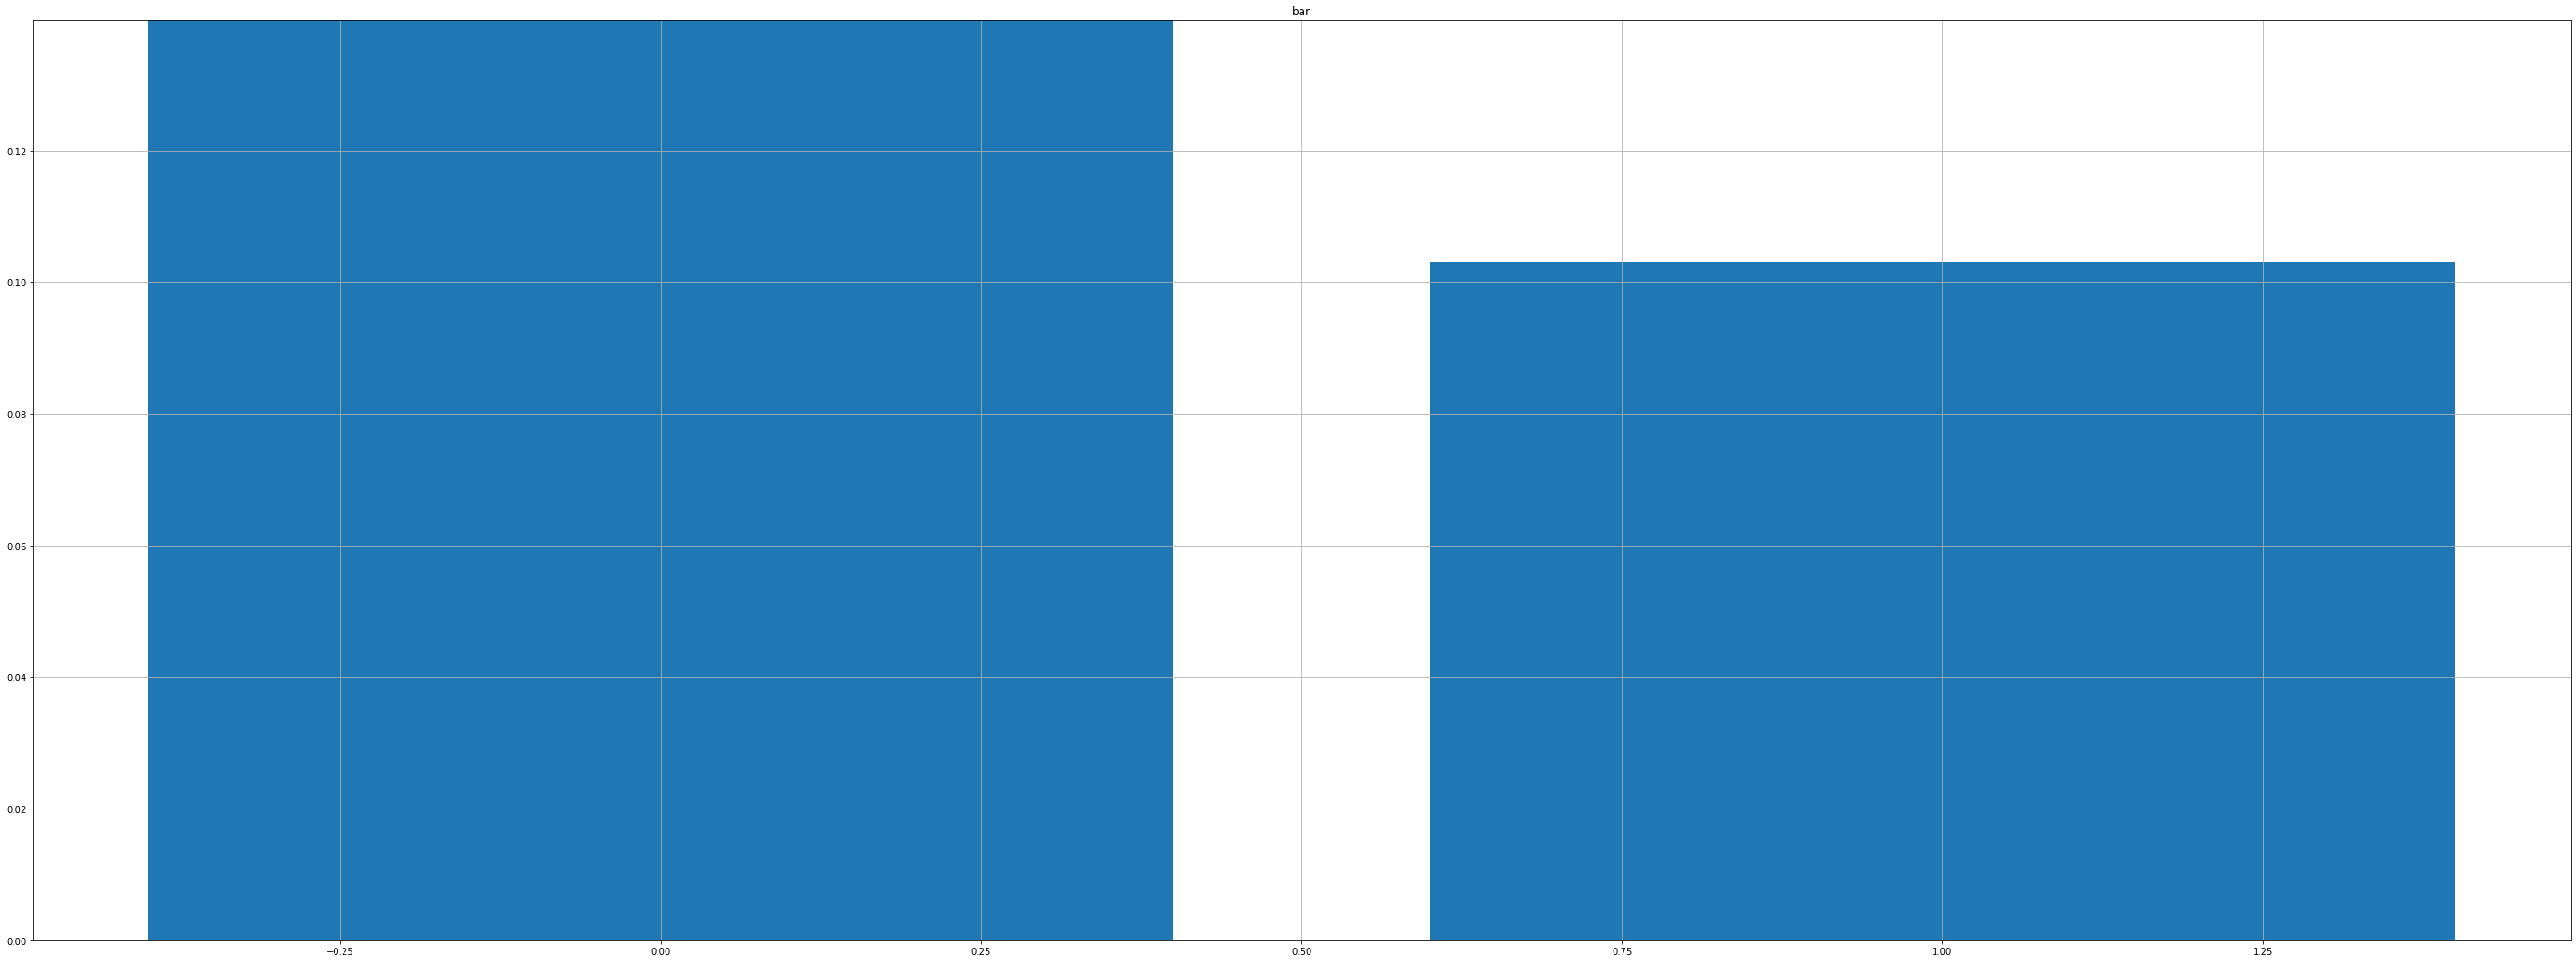

   marital_single         y
0               0  0.105290
1               1  0.149428


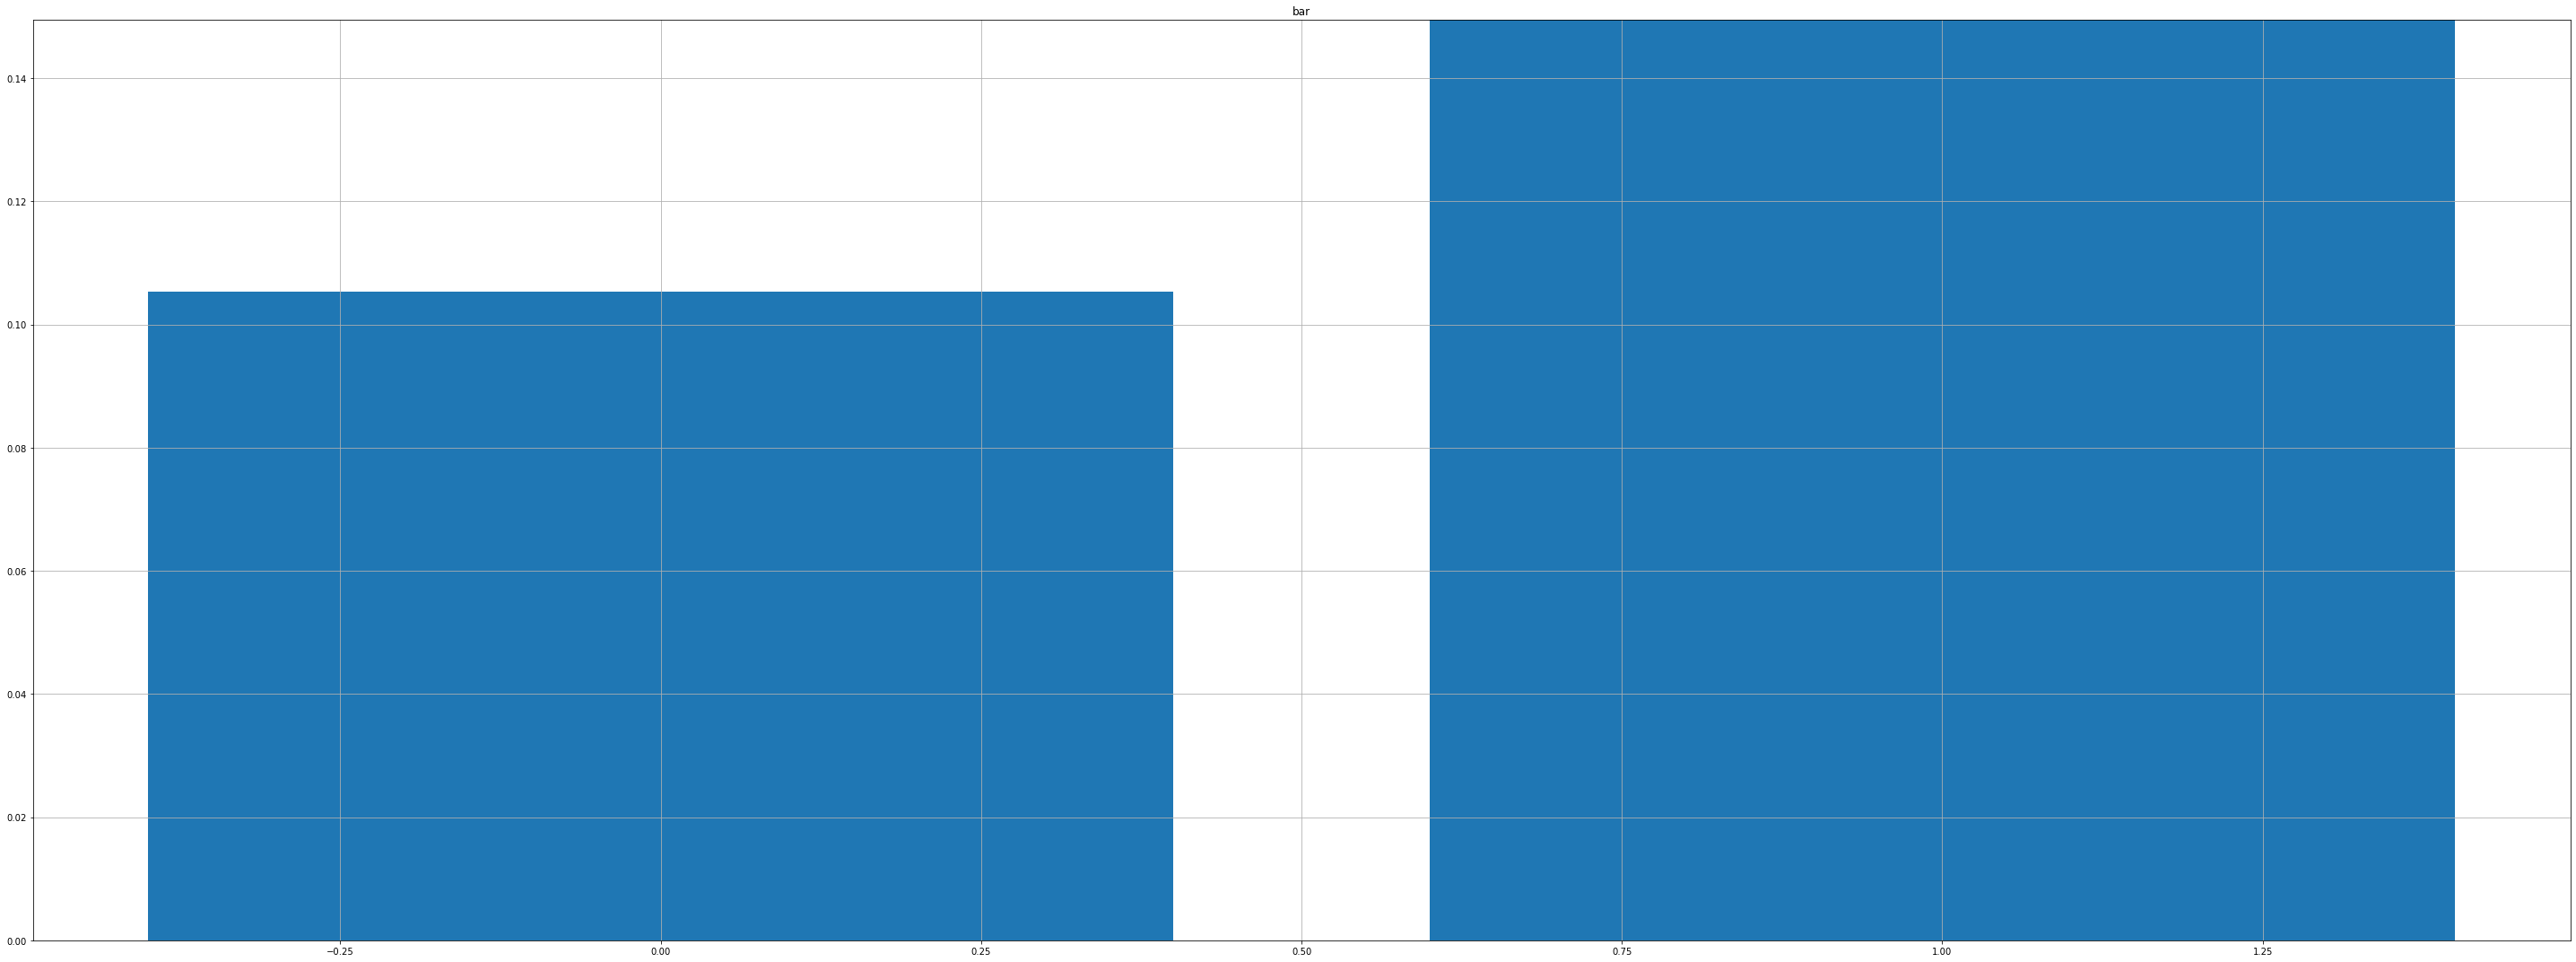

   education_primary         y
0                  0  0.123925
1                  1  0.083455


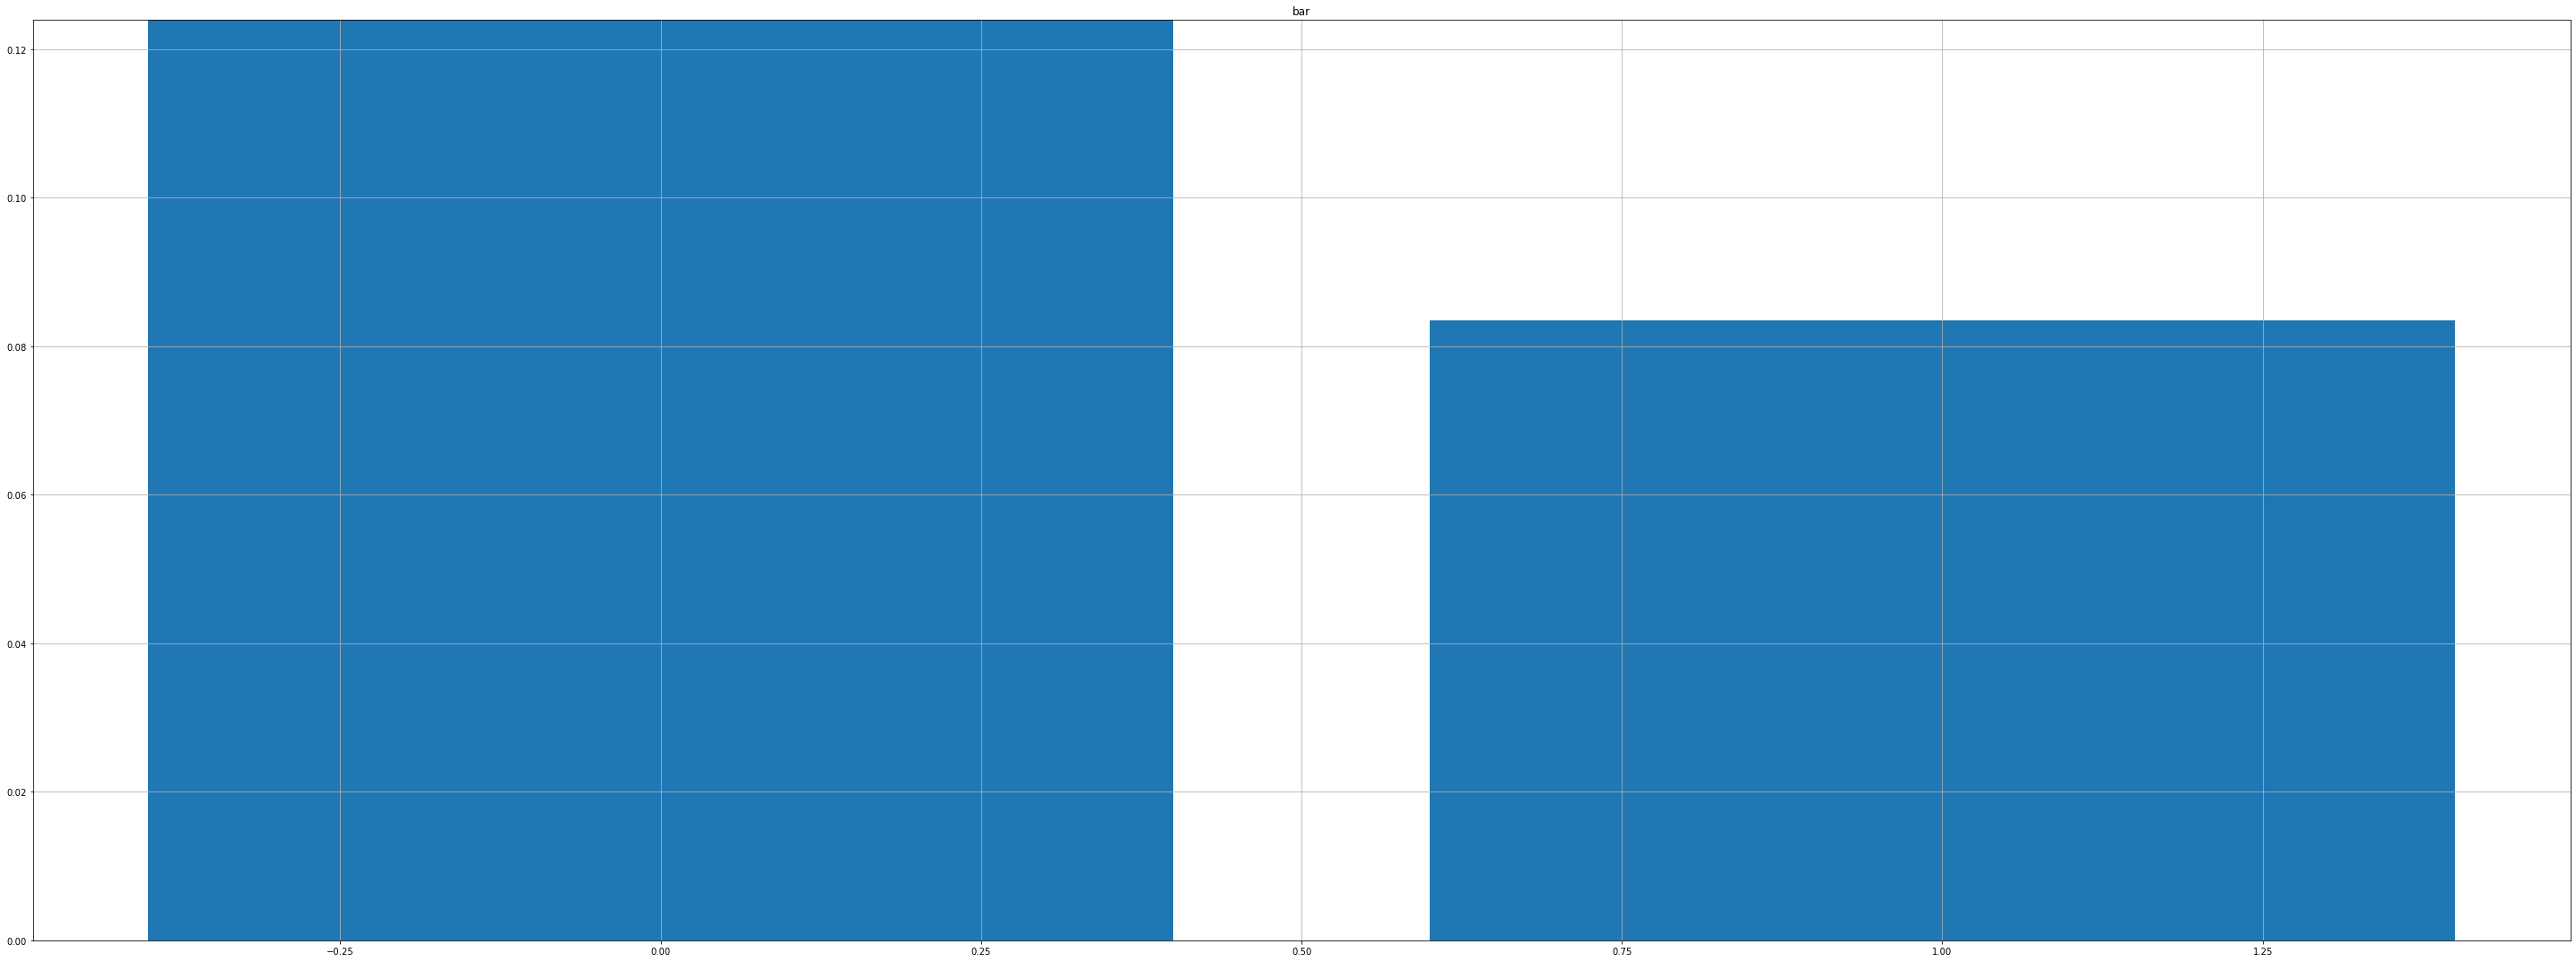

   education_secondary         y
0                    0  0.130389
1                    1  0.105524


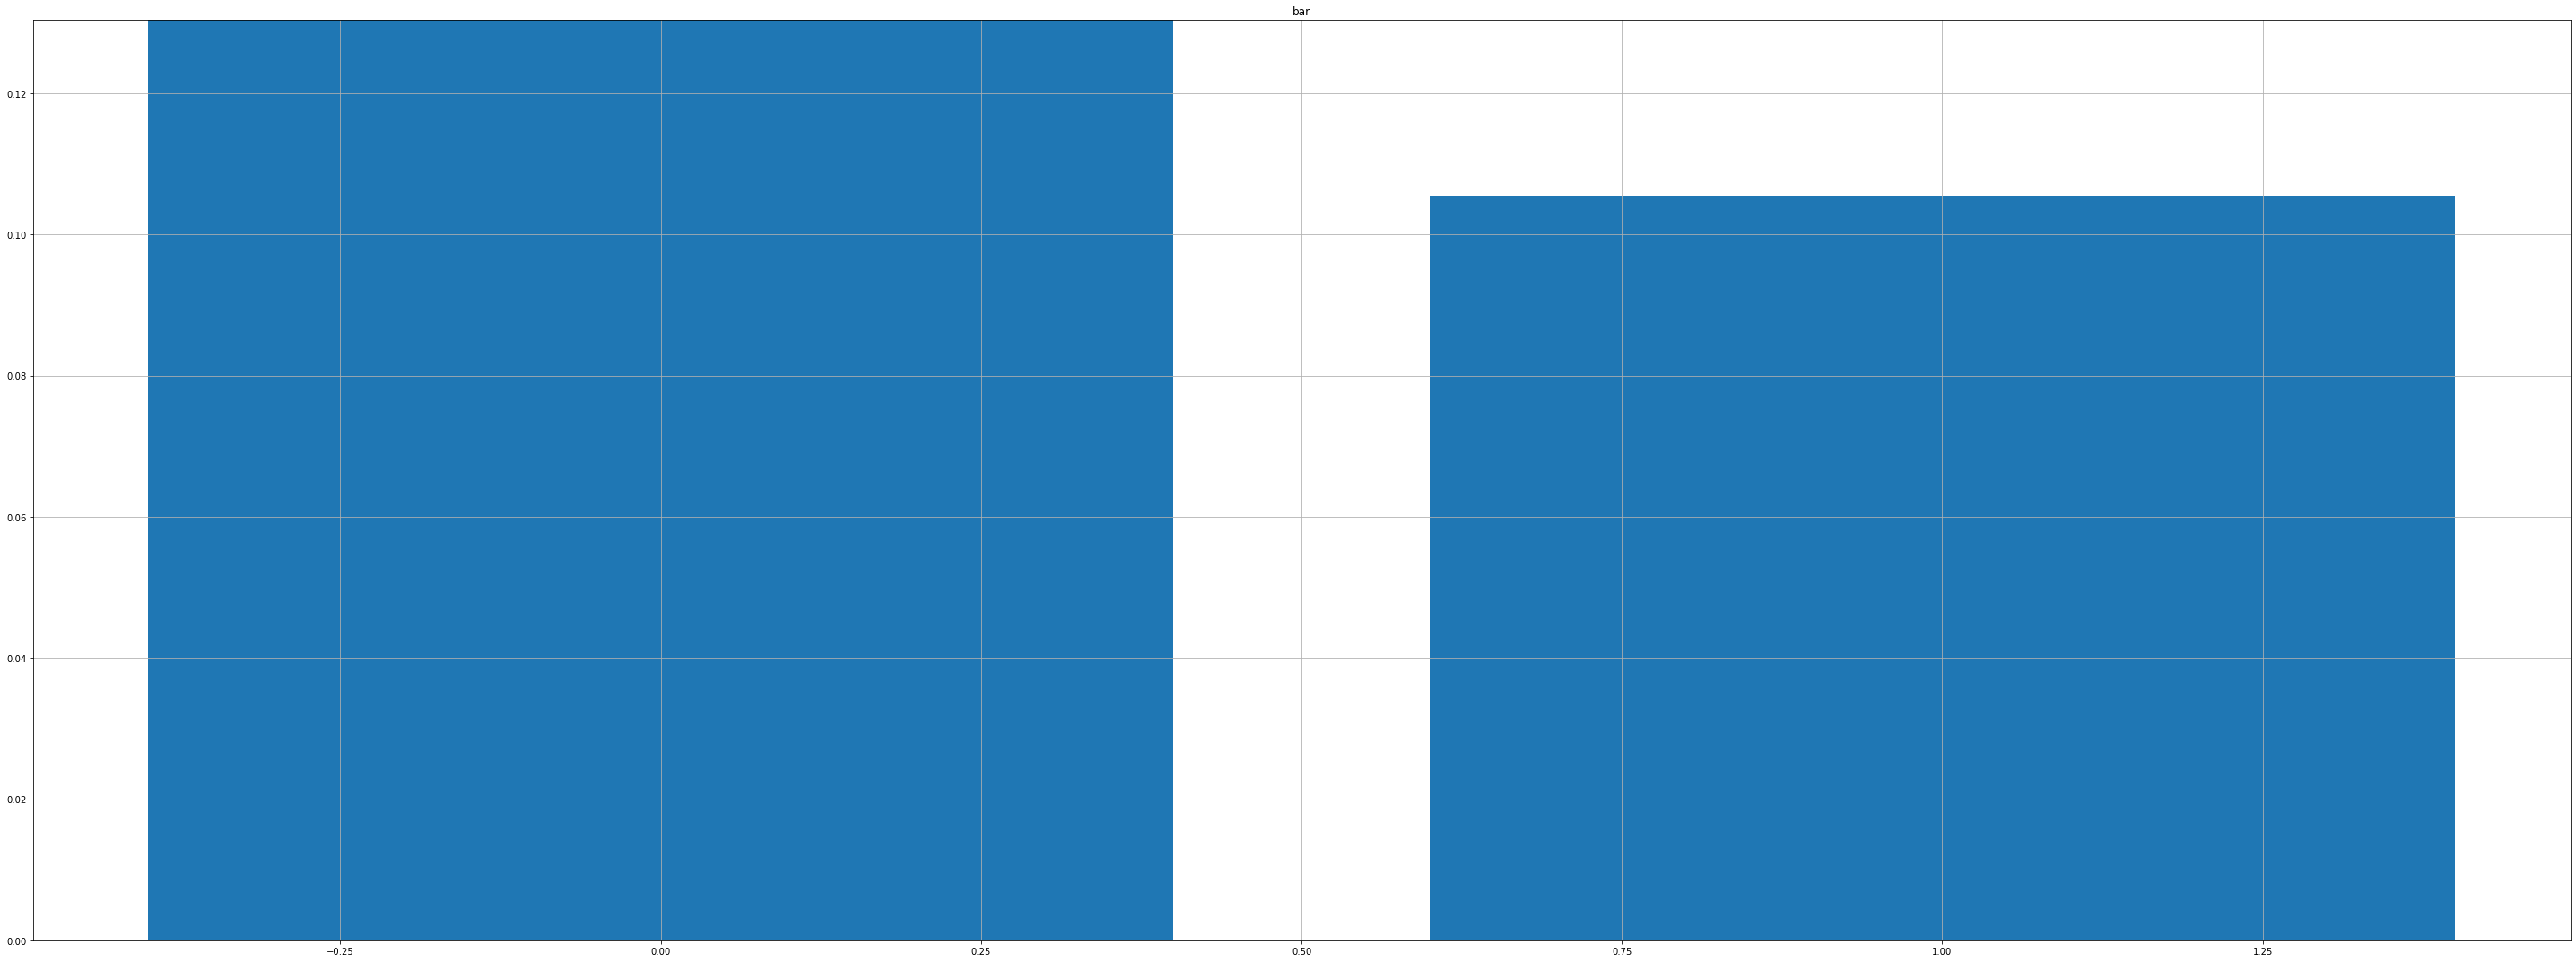

   education_tertiary         y
0                   0  0.103441
1                   1  0.150765


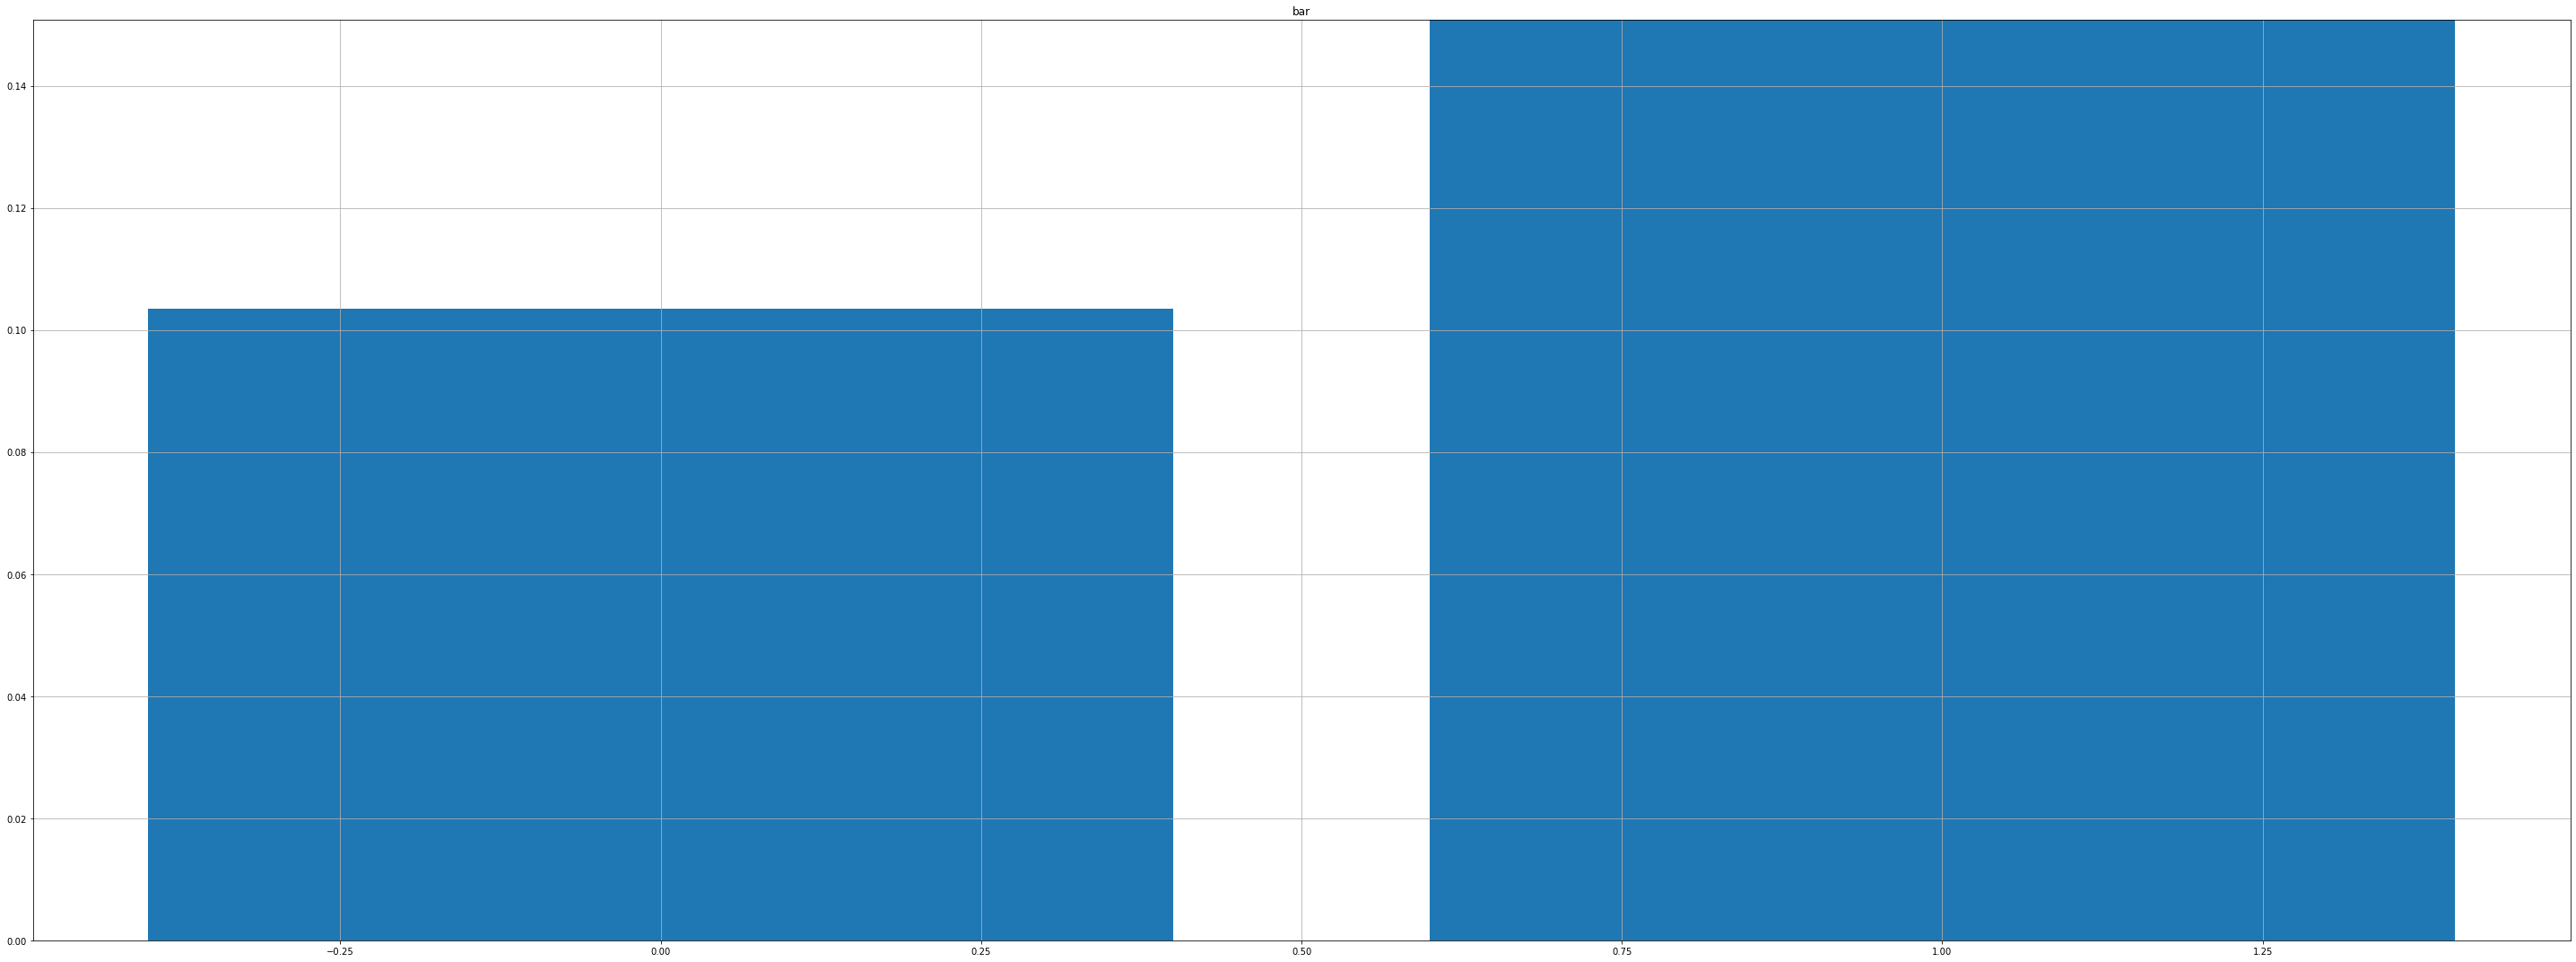

   education_unknown         y
0                  0  0.116356
1                  1  0.153271


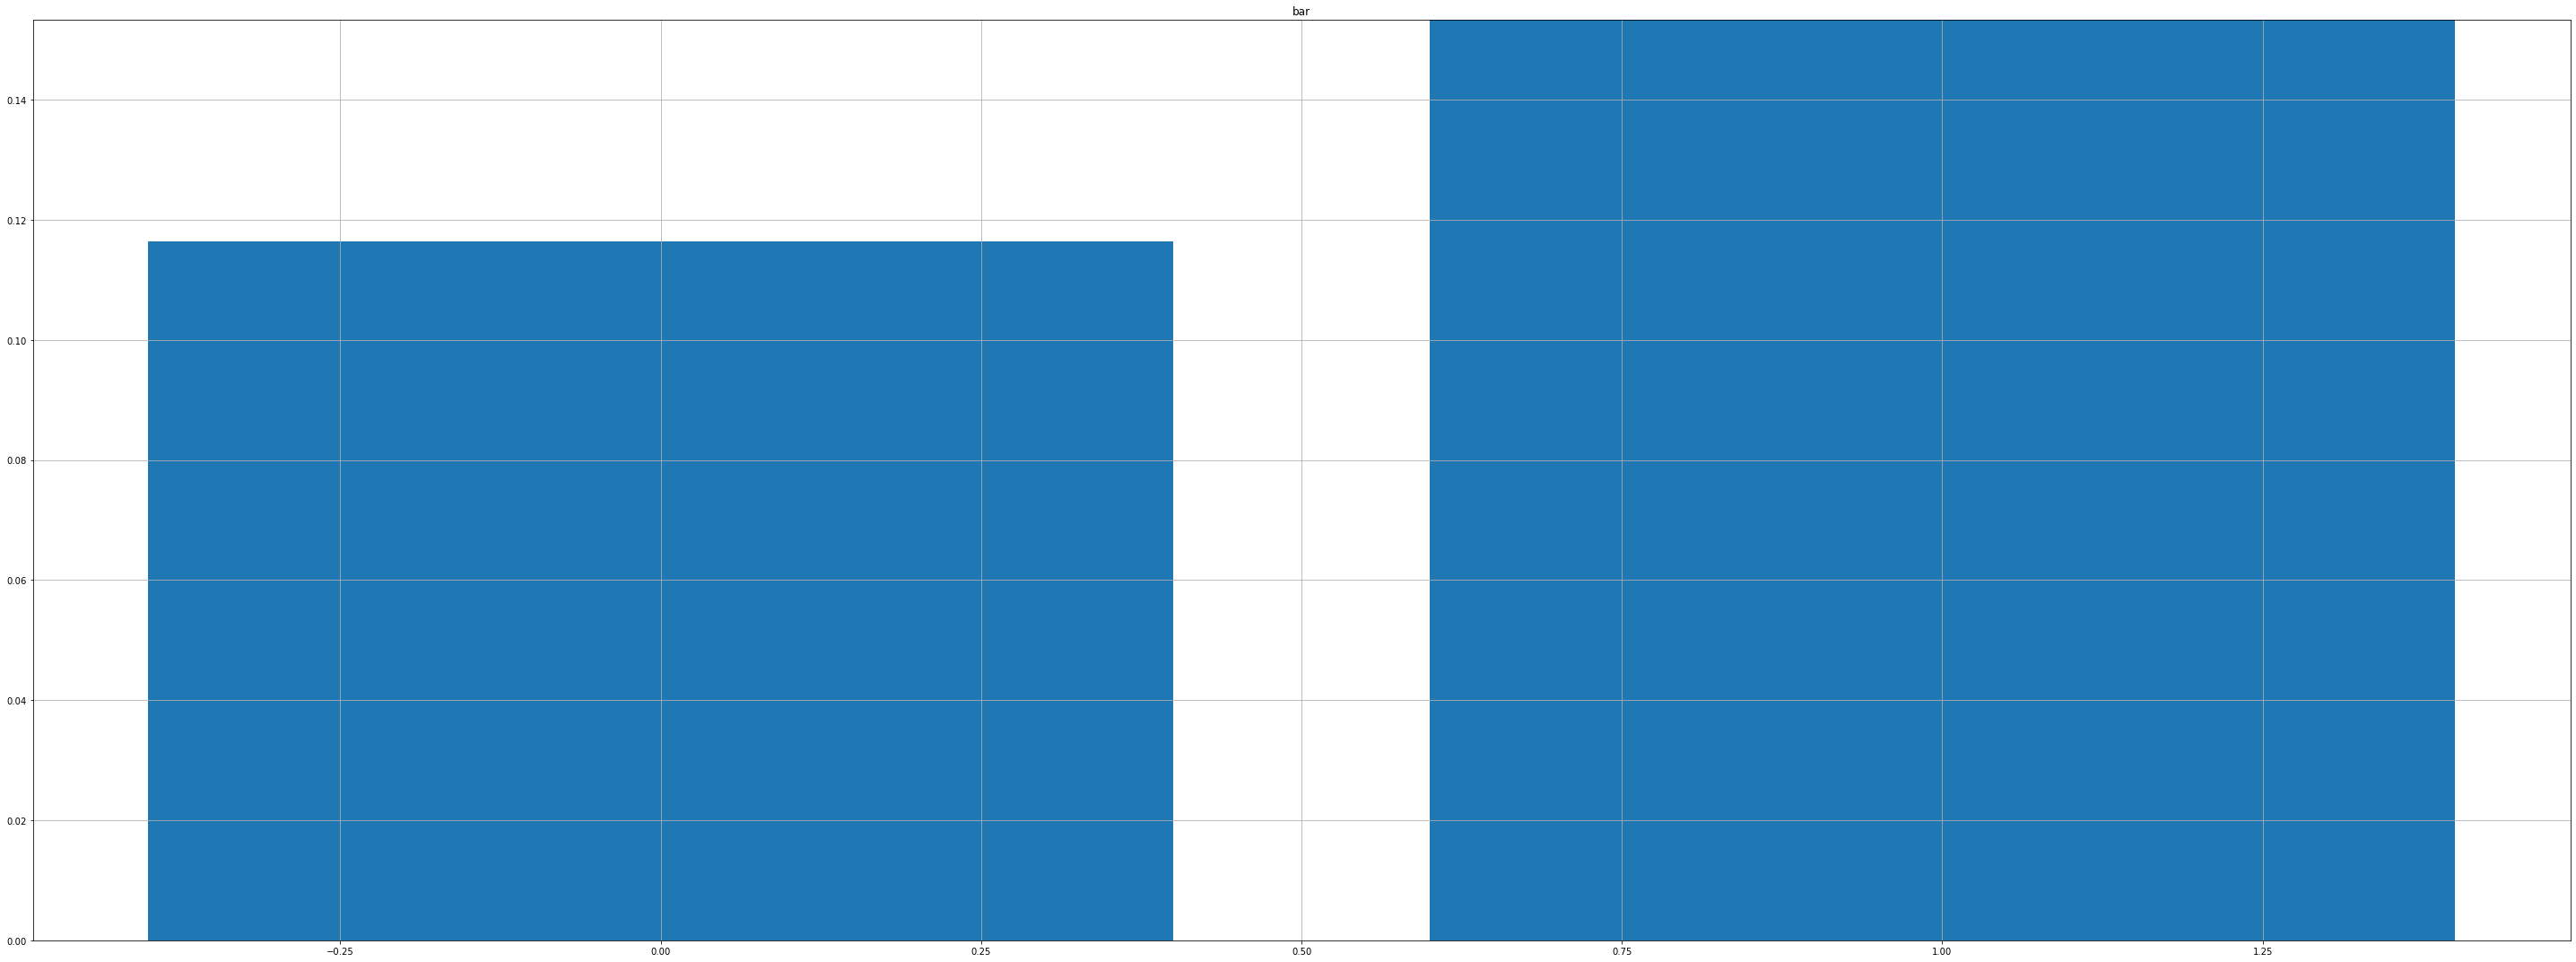

   housing_no         y
0           0  0.077127
1           1  0.168629


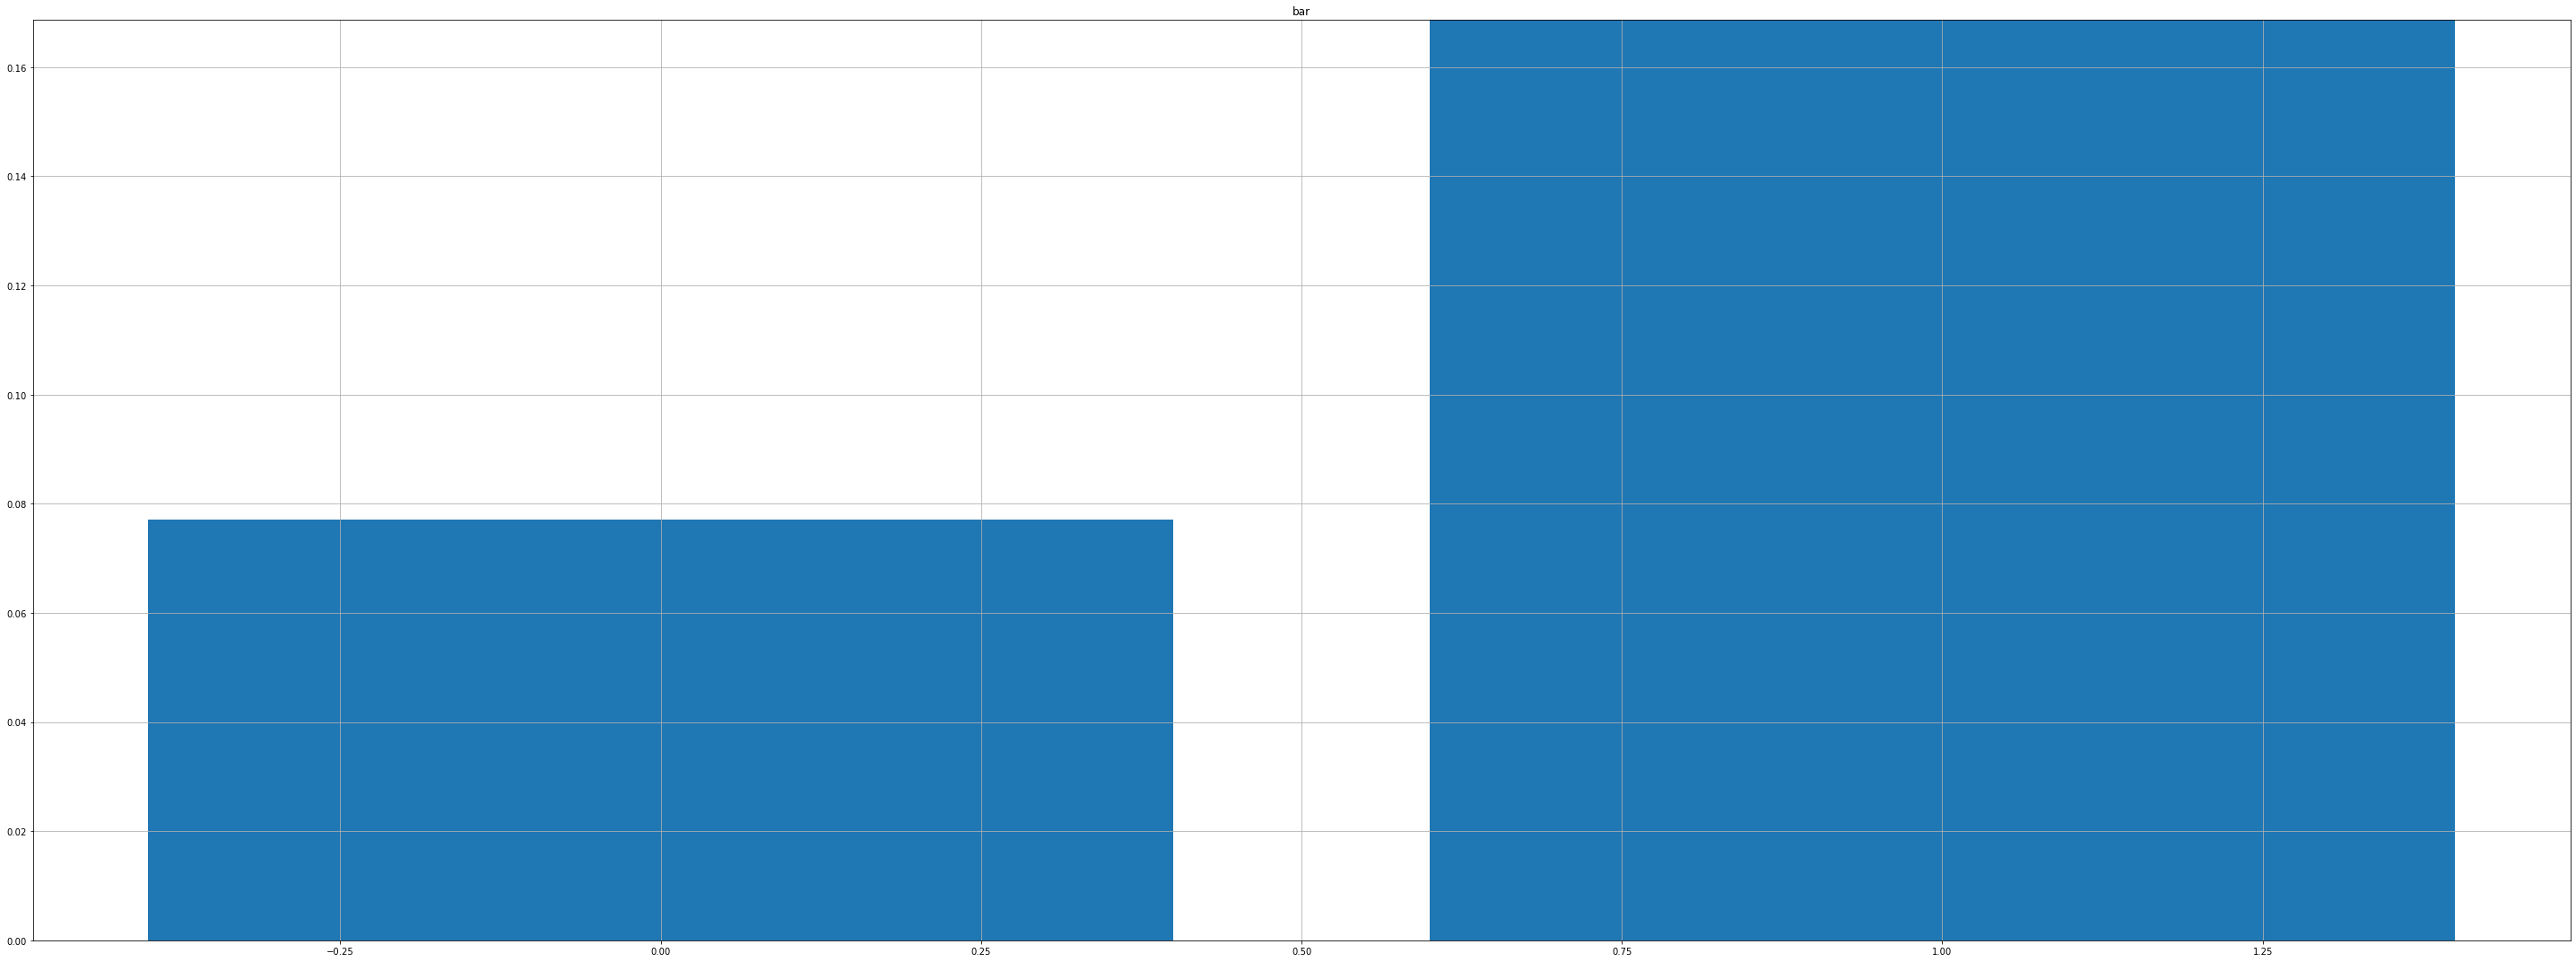

   housing_yes         y
0            0  0.168629
1            1  0.077127


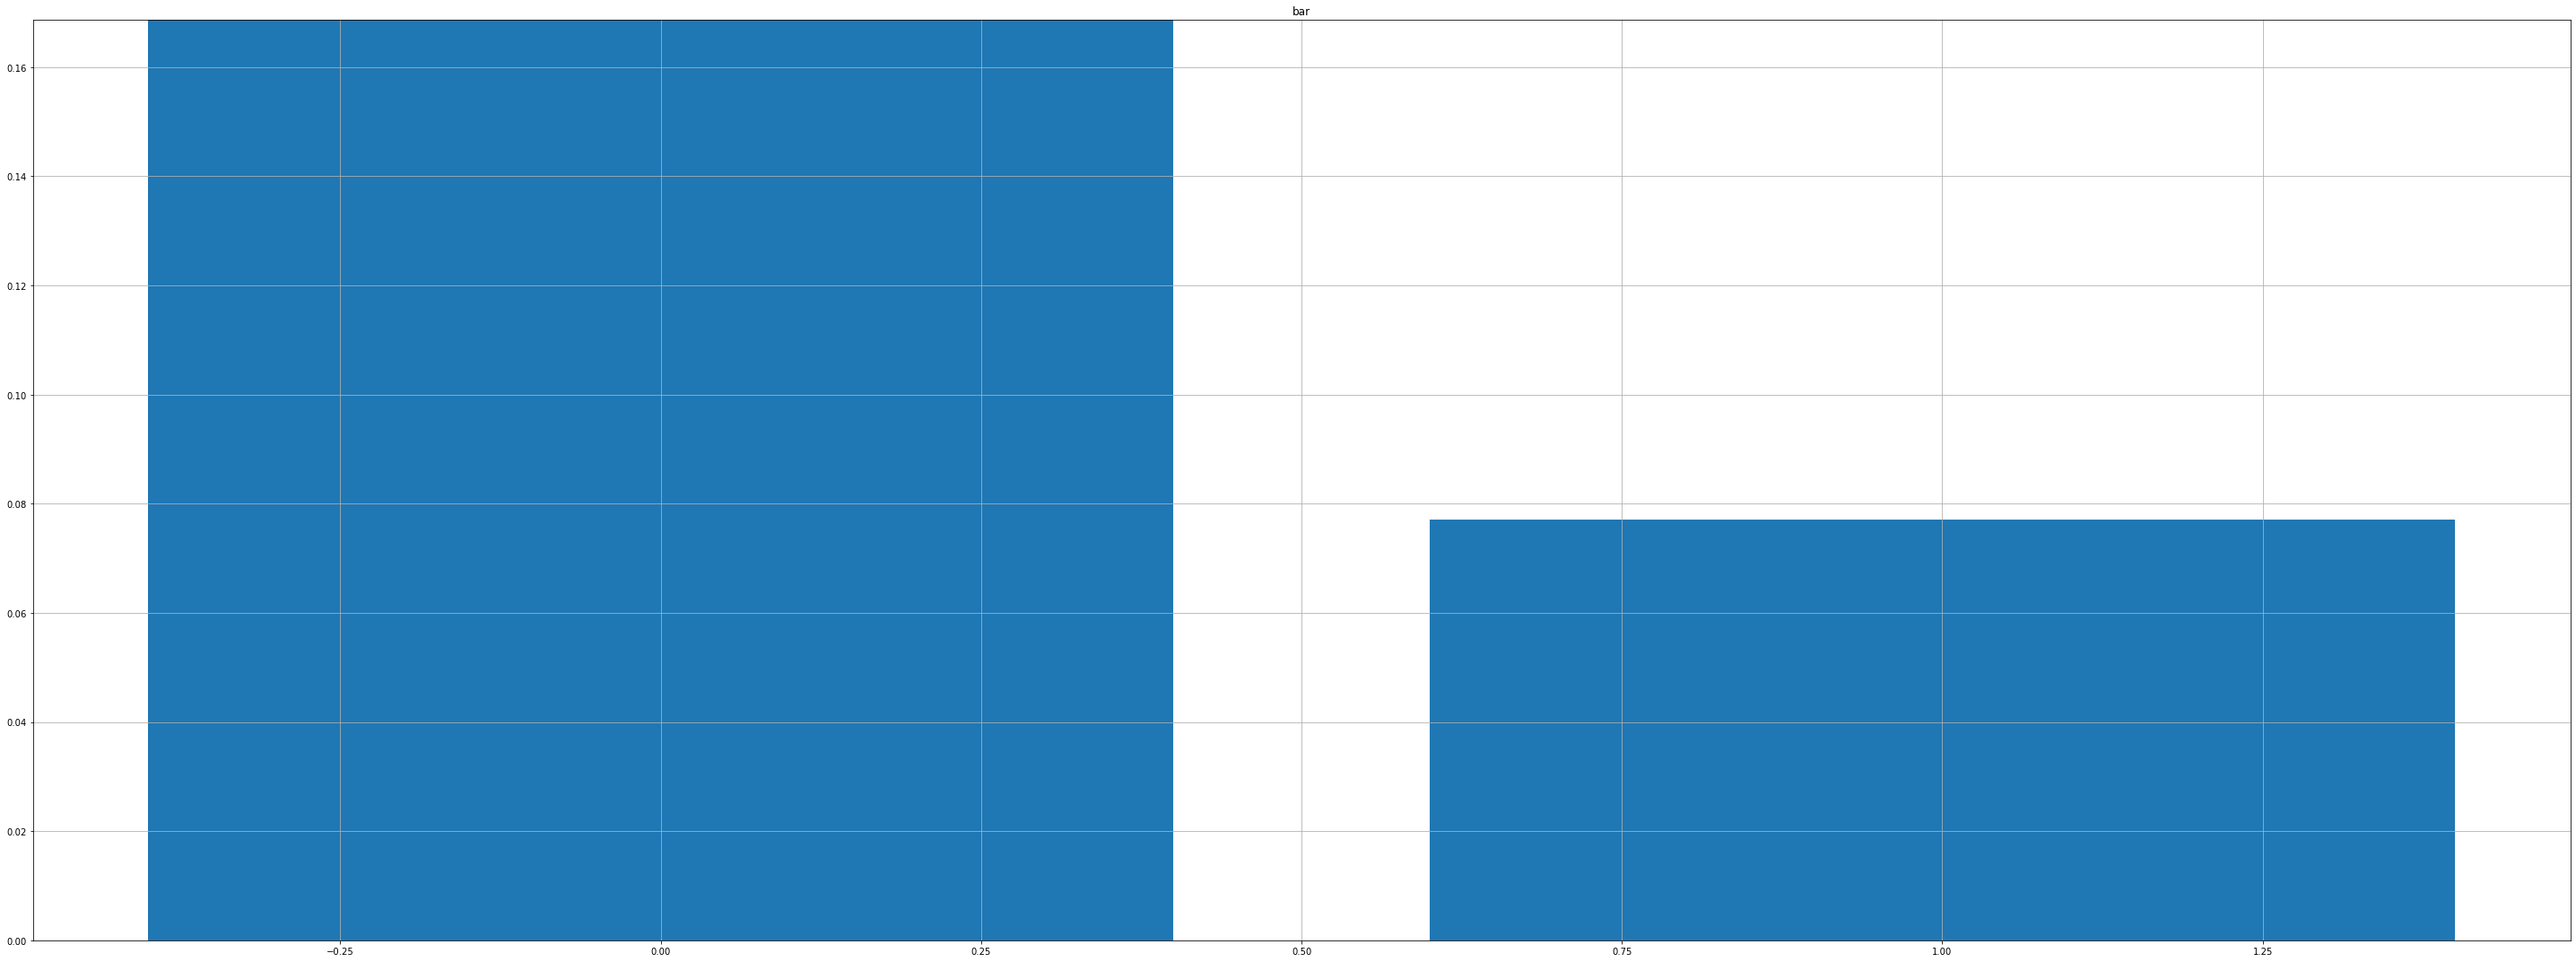

   loan_no         y
0        0  0.067867
1        1  0.127303


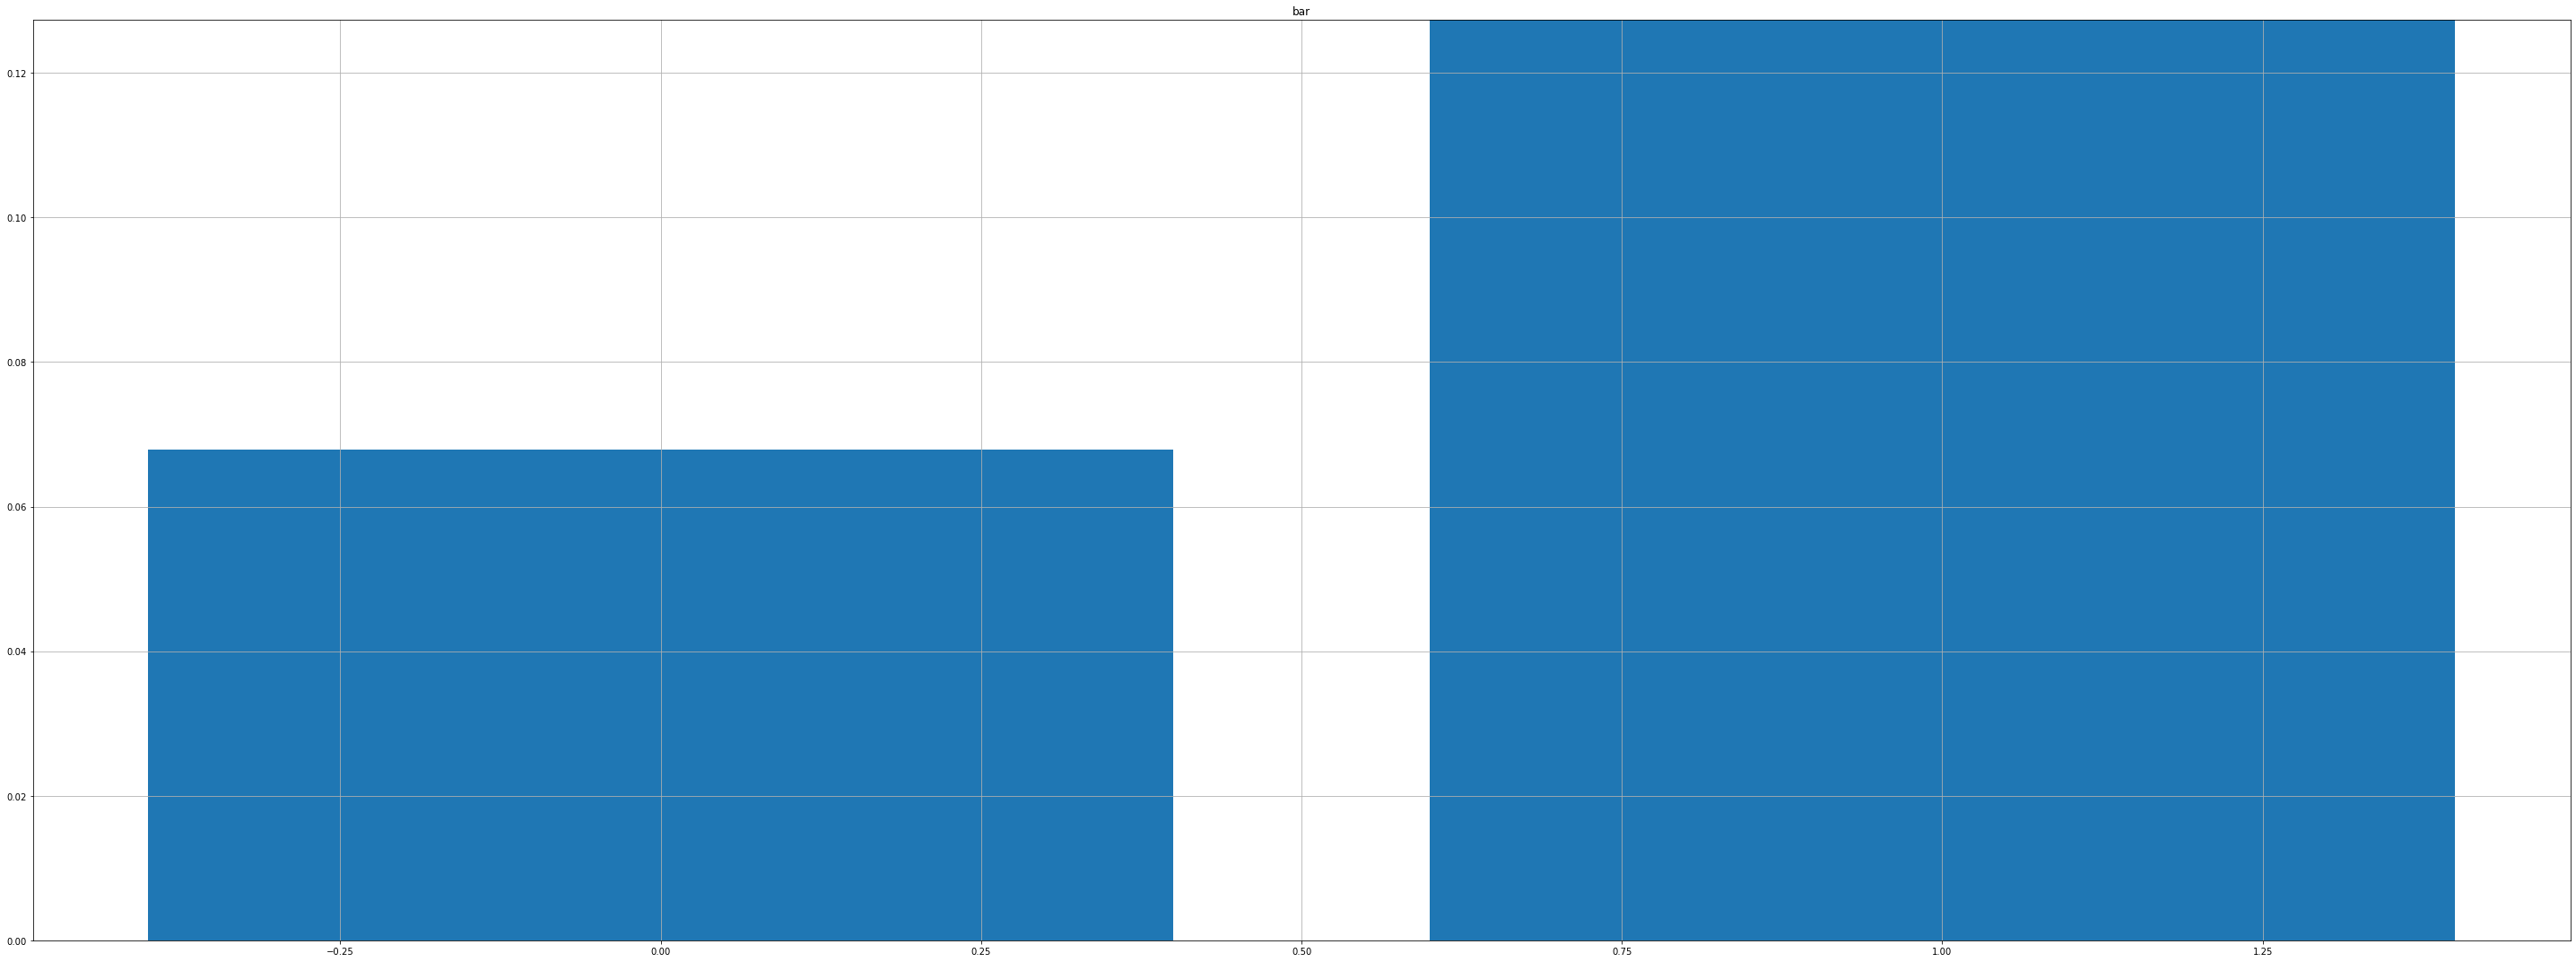

   loan_yes         y
0         0  0.127303
1         1  0.067867


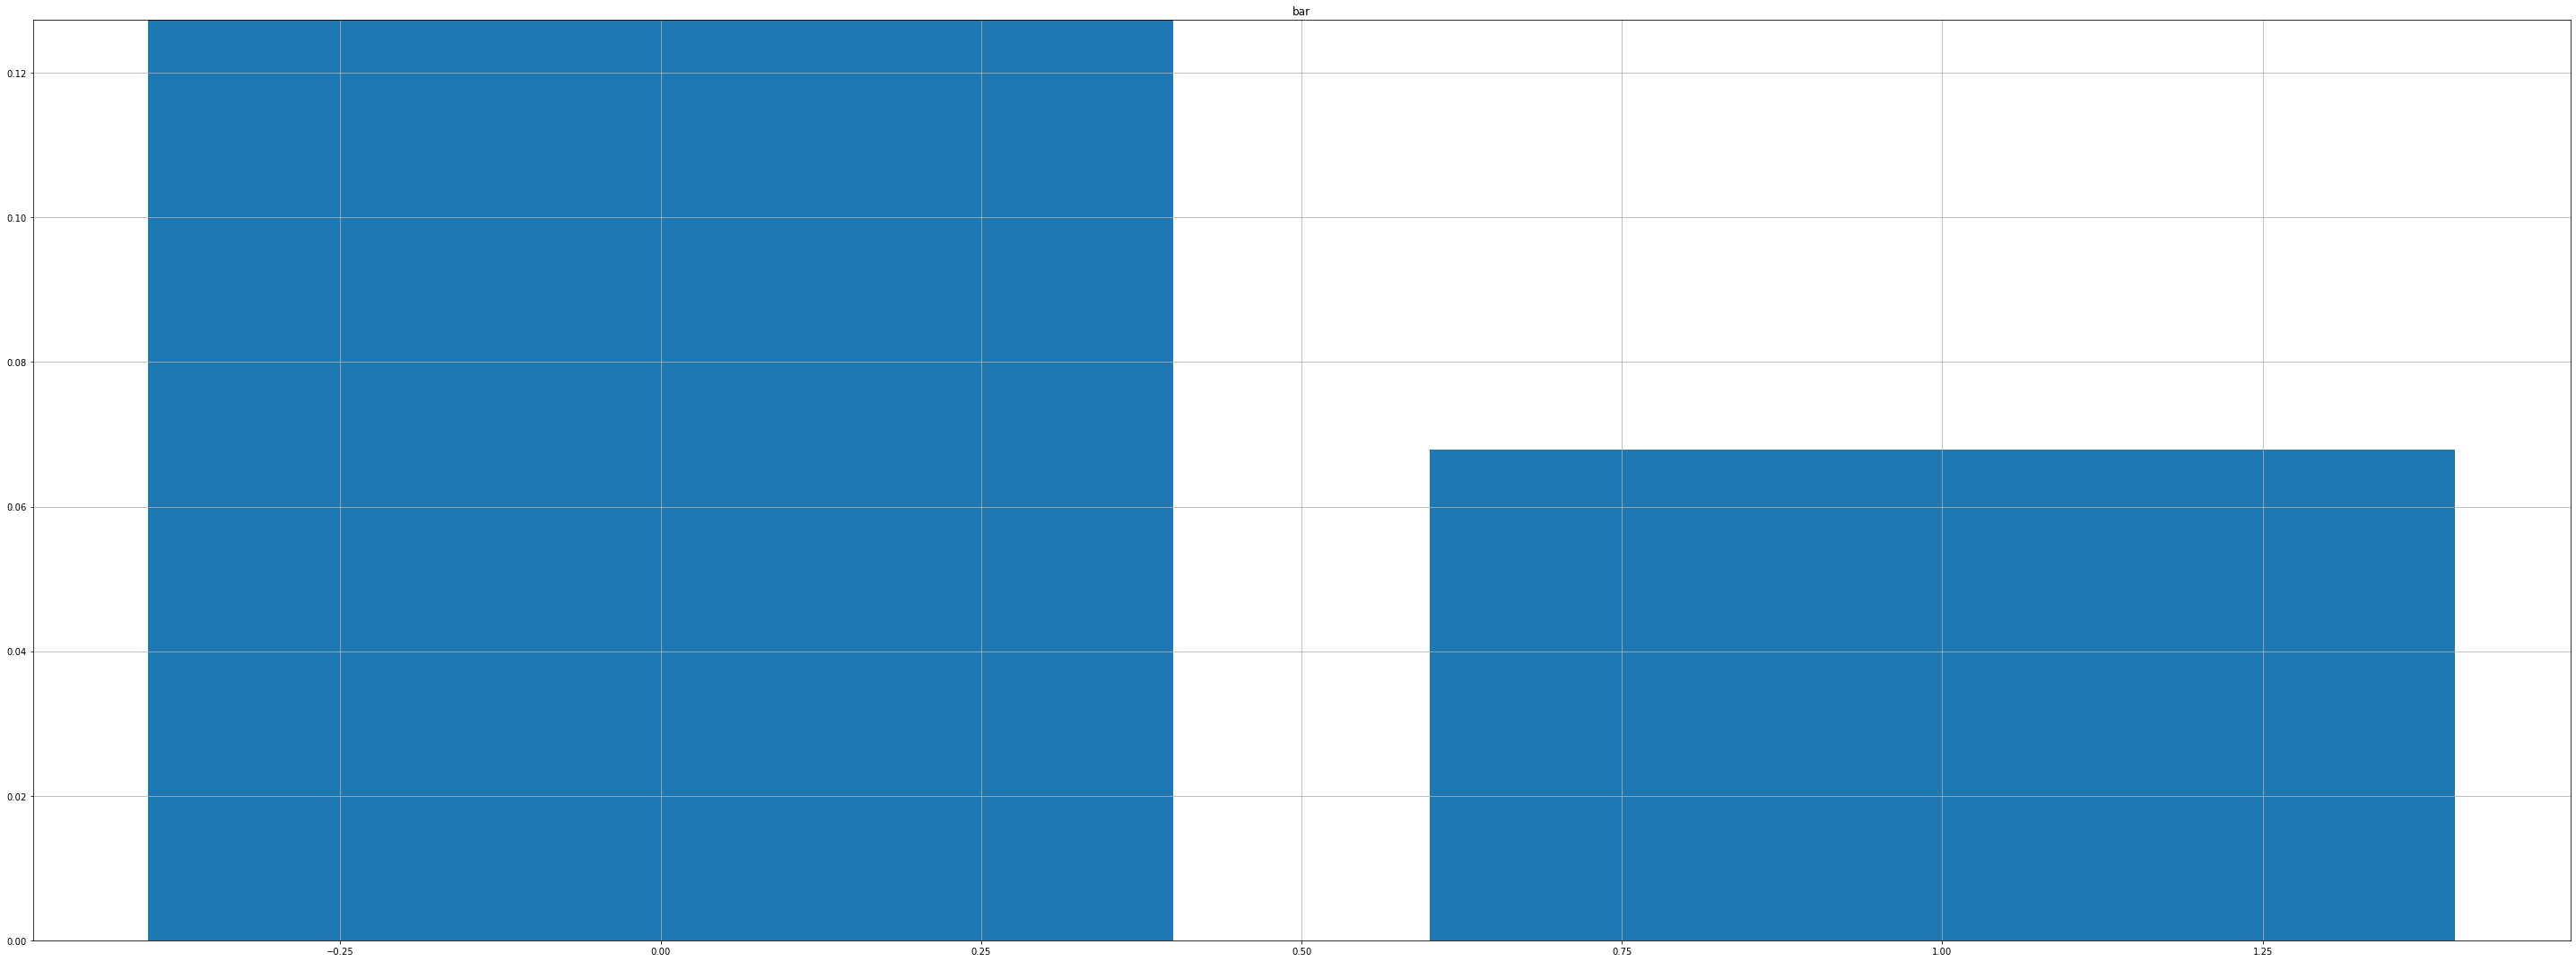

   pdays_-1         y
0         0  0.228467
1         1  0.093139


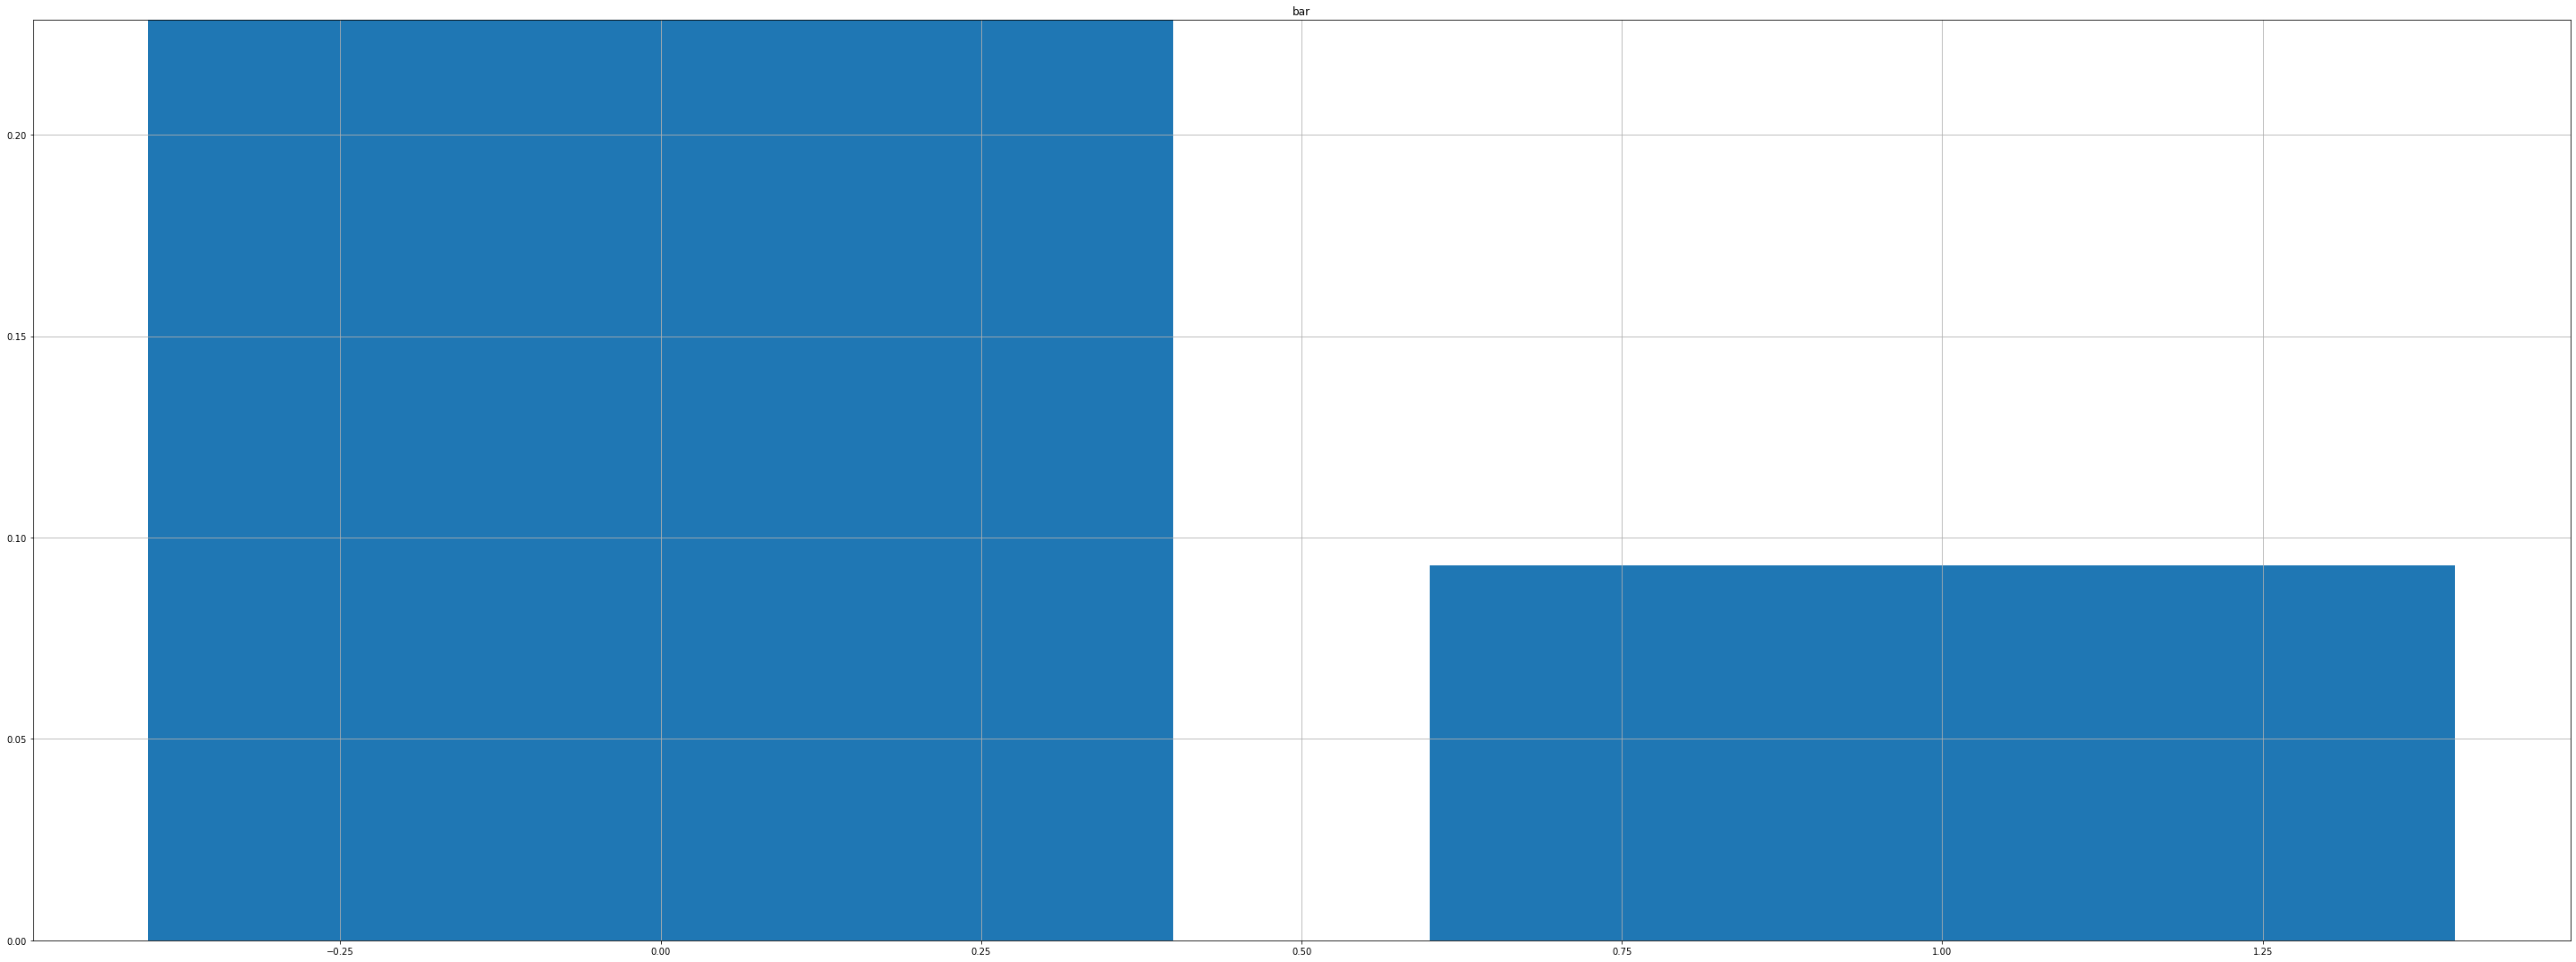

   pdays_0         y
0        0  0.096494
1        1  0.222271


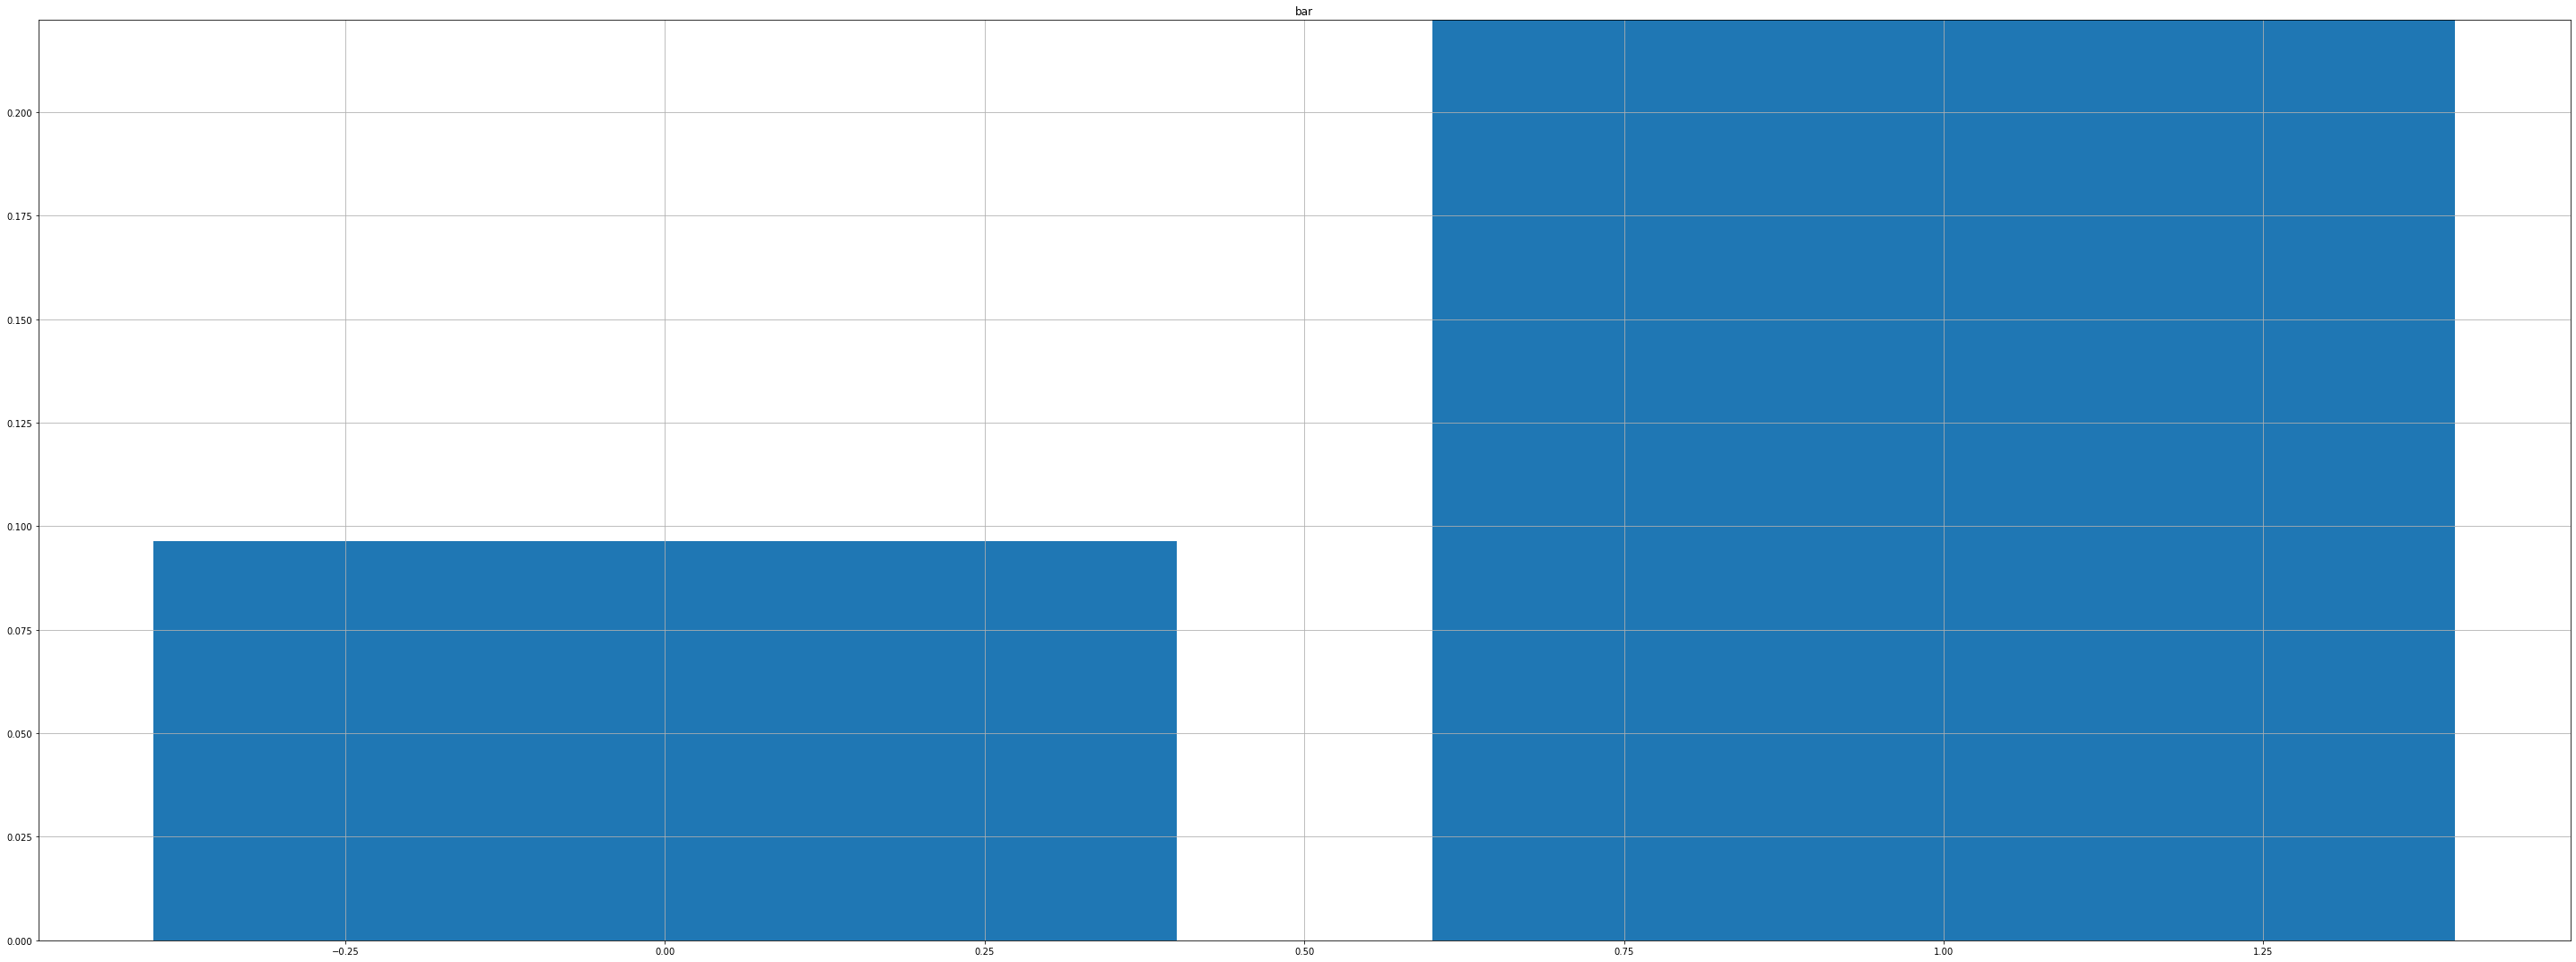

   pdays_1         y
0        0  0.115310
1        1  0.310345


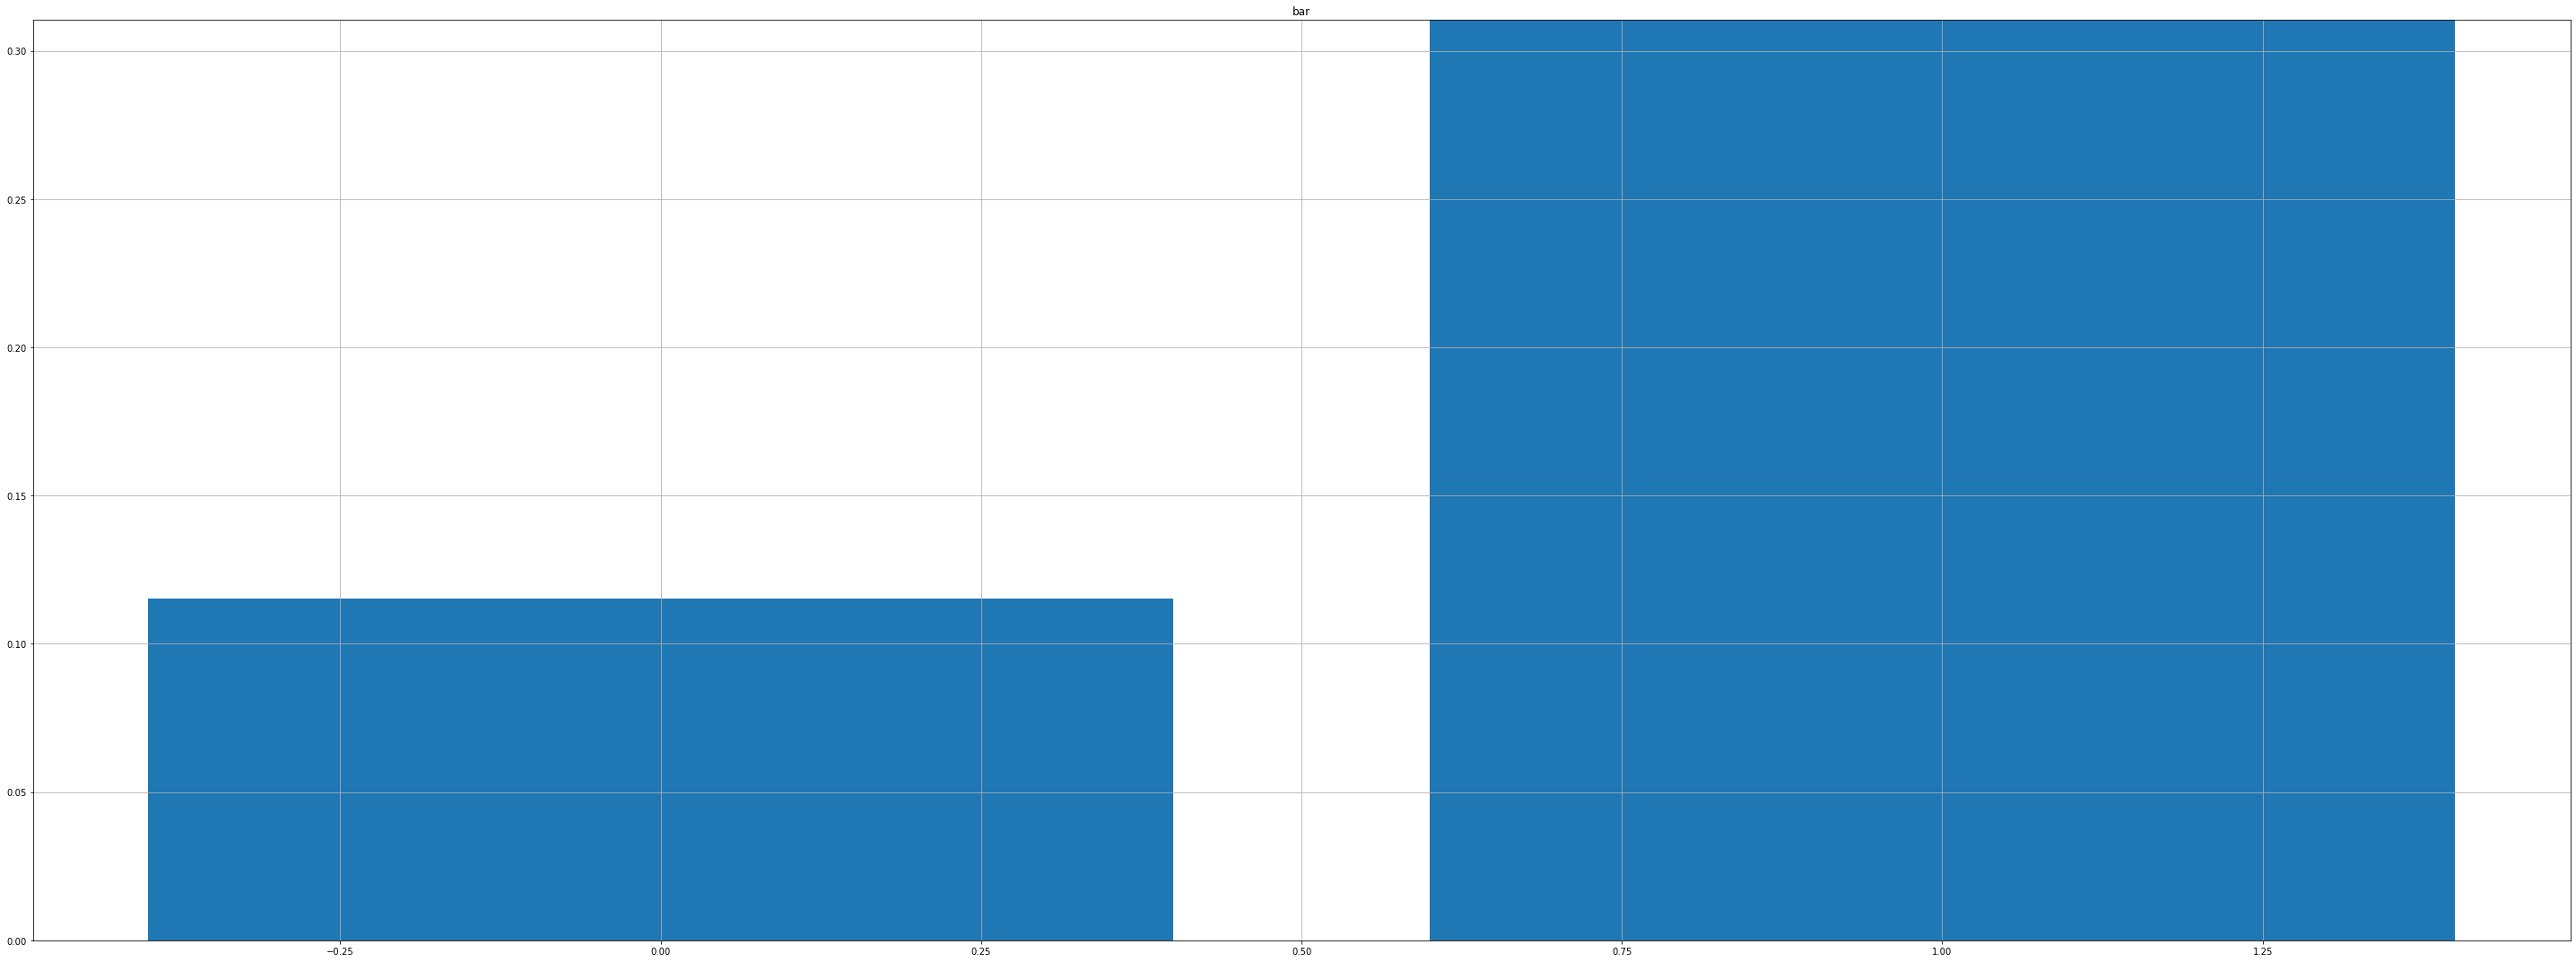

   contact_cellular         y
0                 0  0.058458
1                 1  0.150572


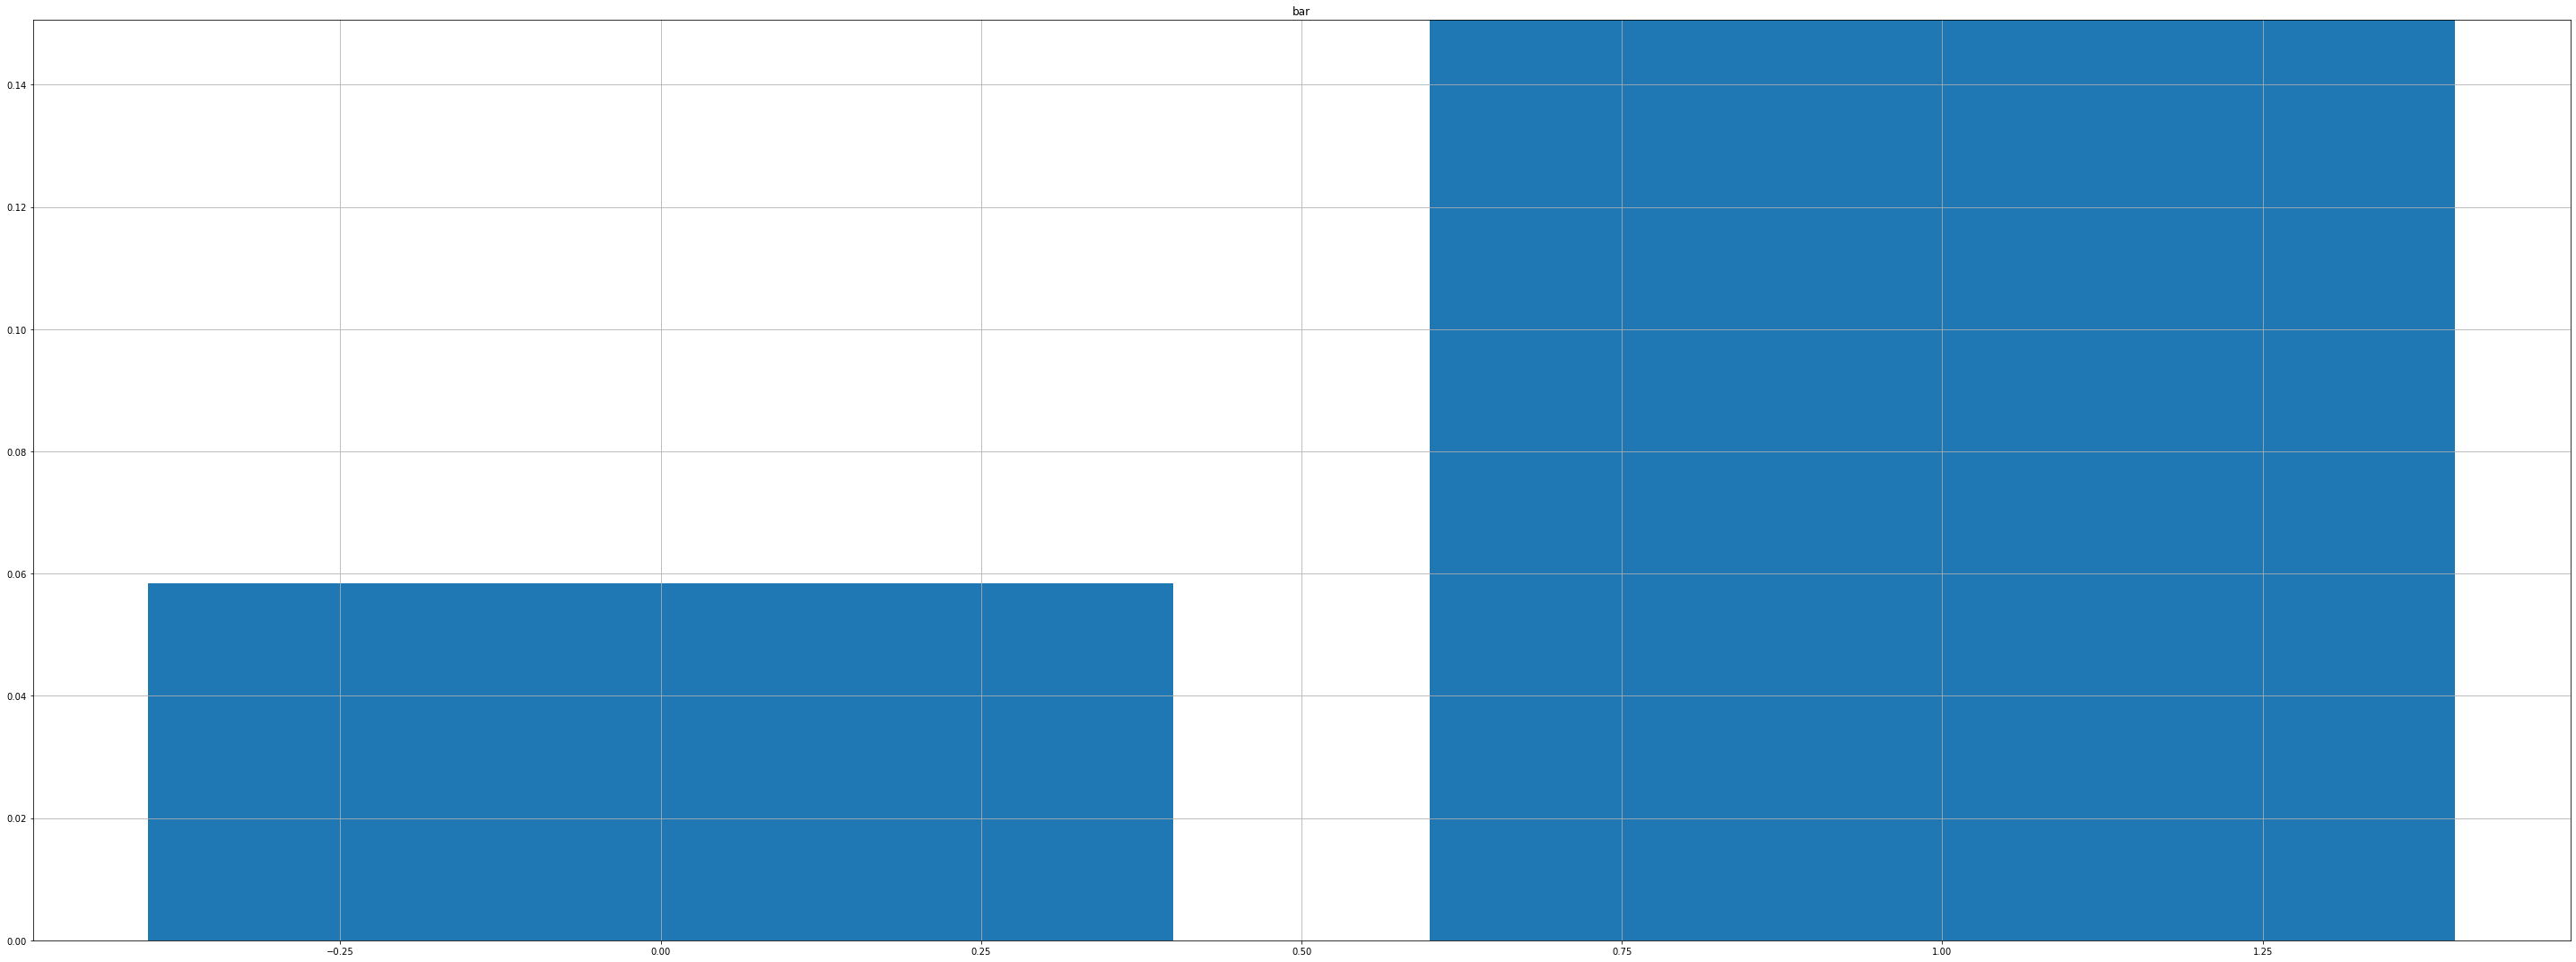

   contact_telephone         y
0                  0  0.117763
1                  1  0.118527


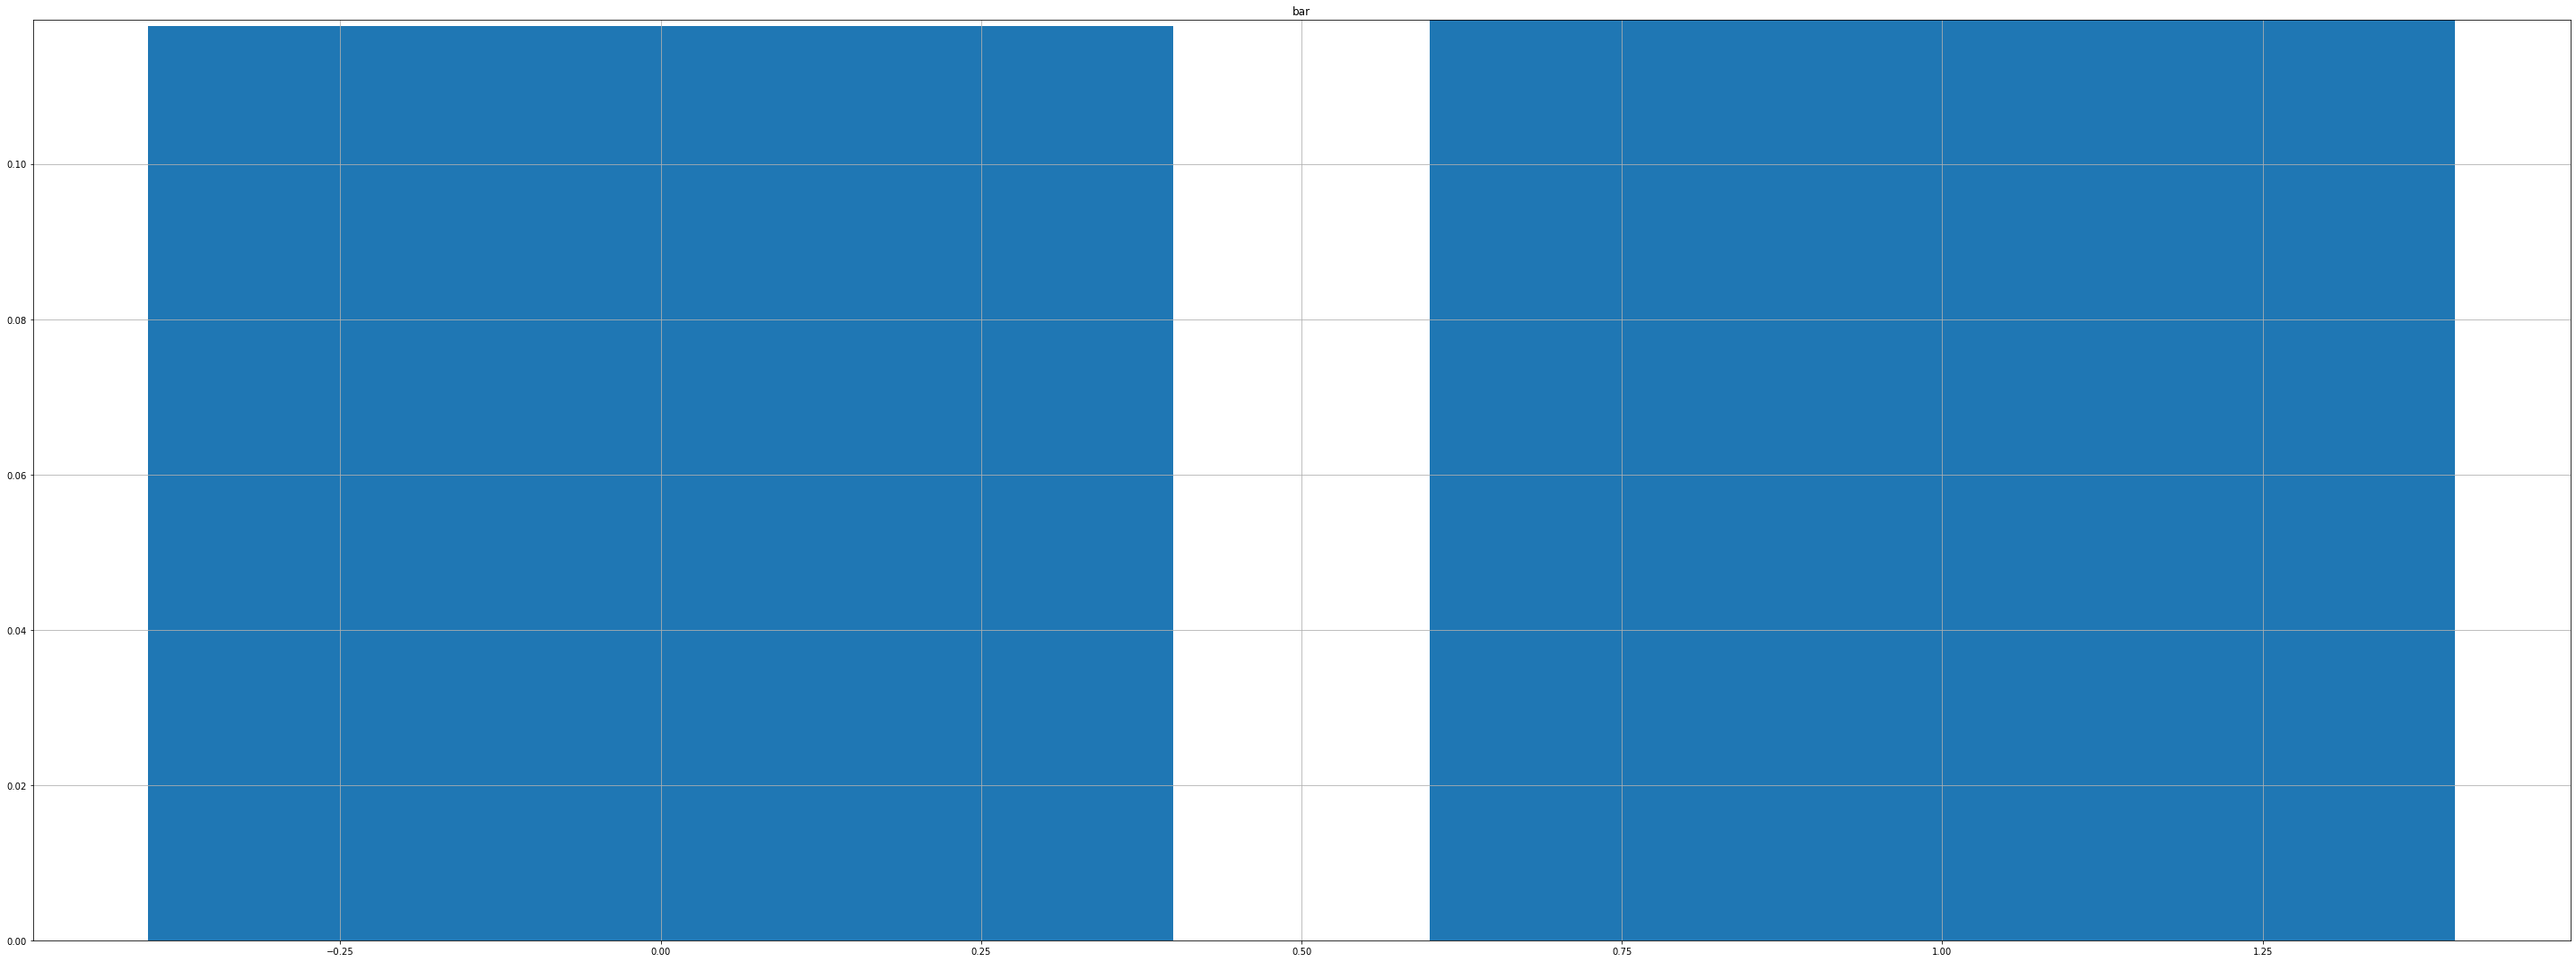

   contact_unknown         y
0                0  0.147674
1                1  0.045259


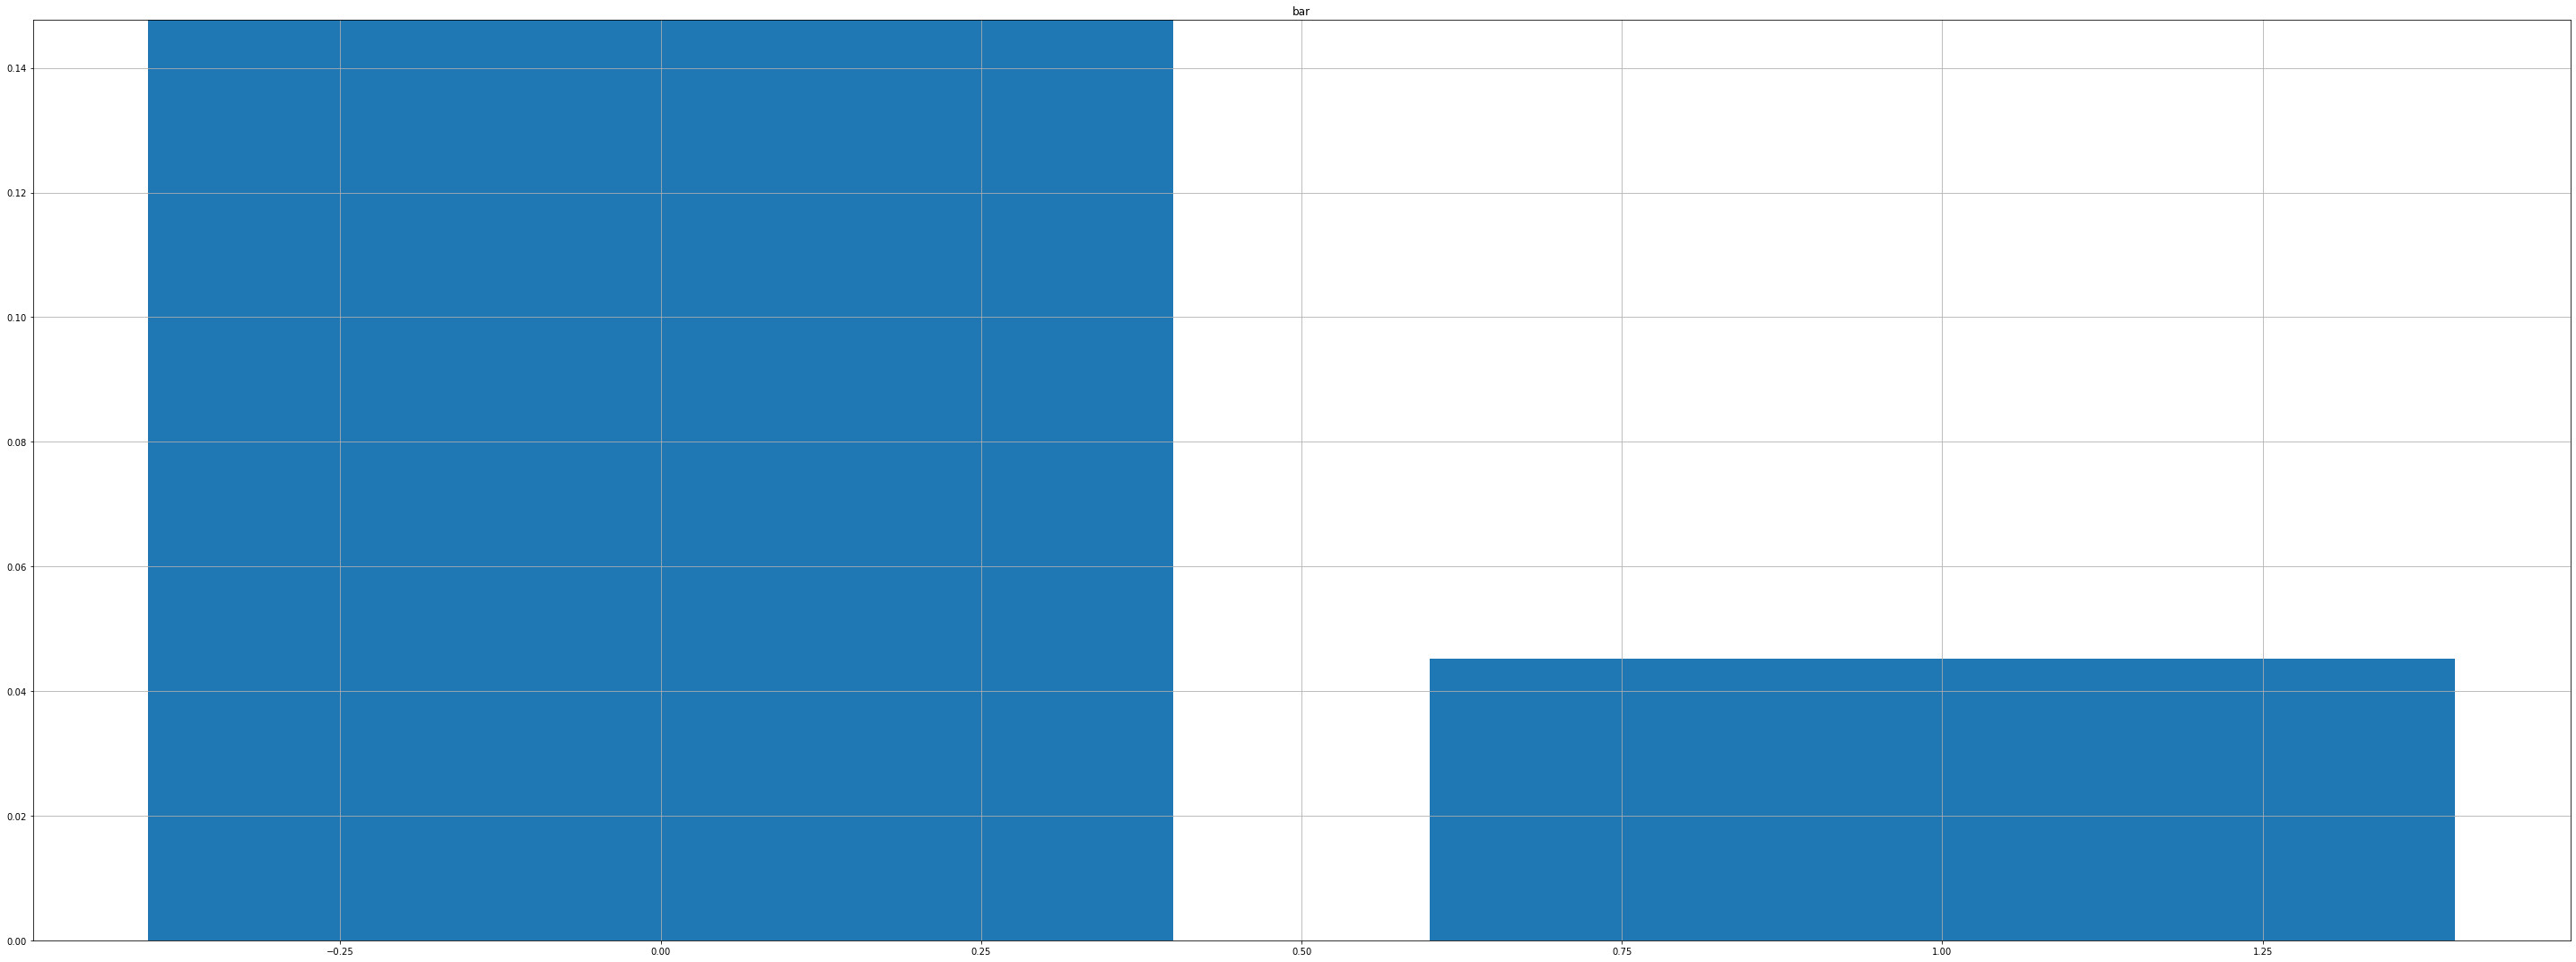

   month_1         y
0        0  0.118403
1        1  0.099034


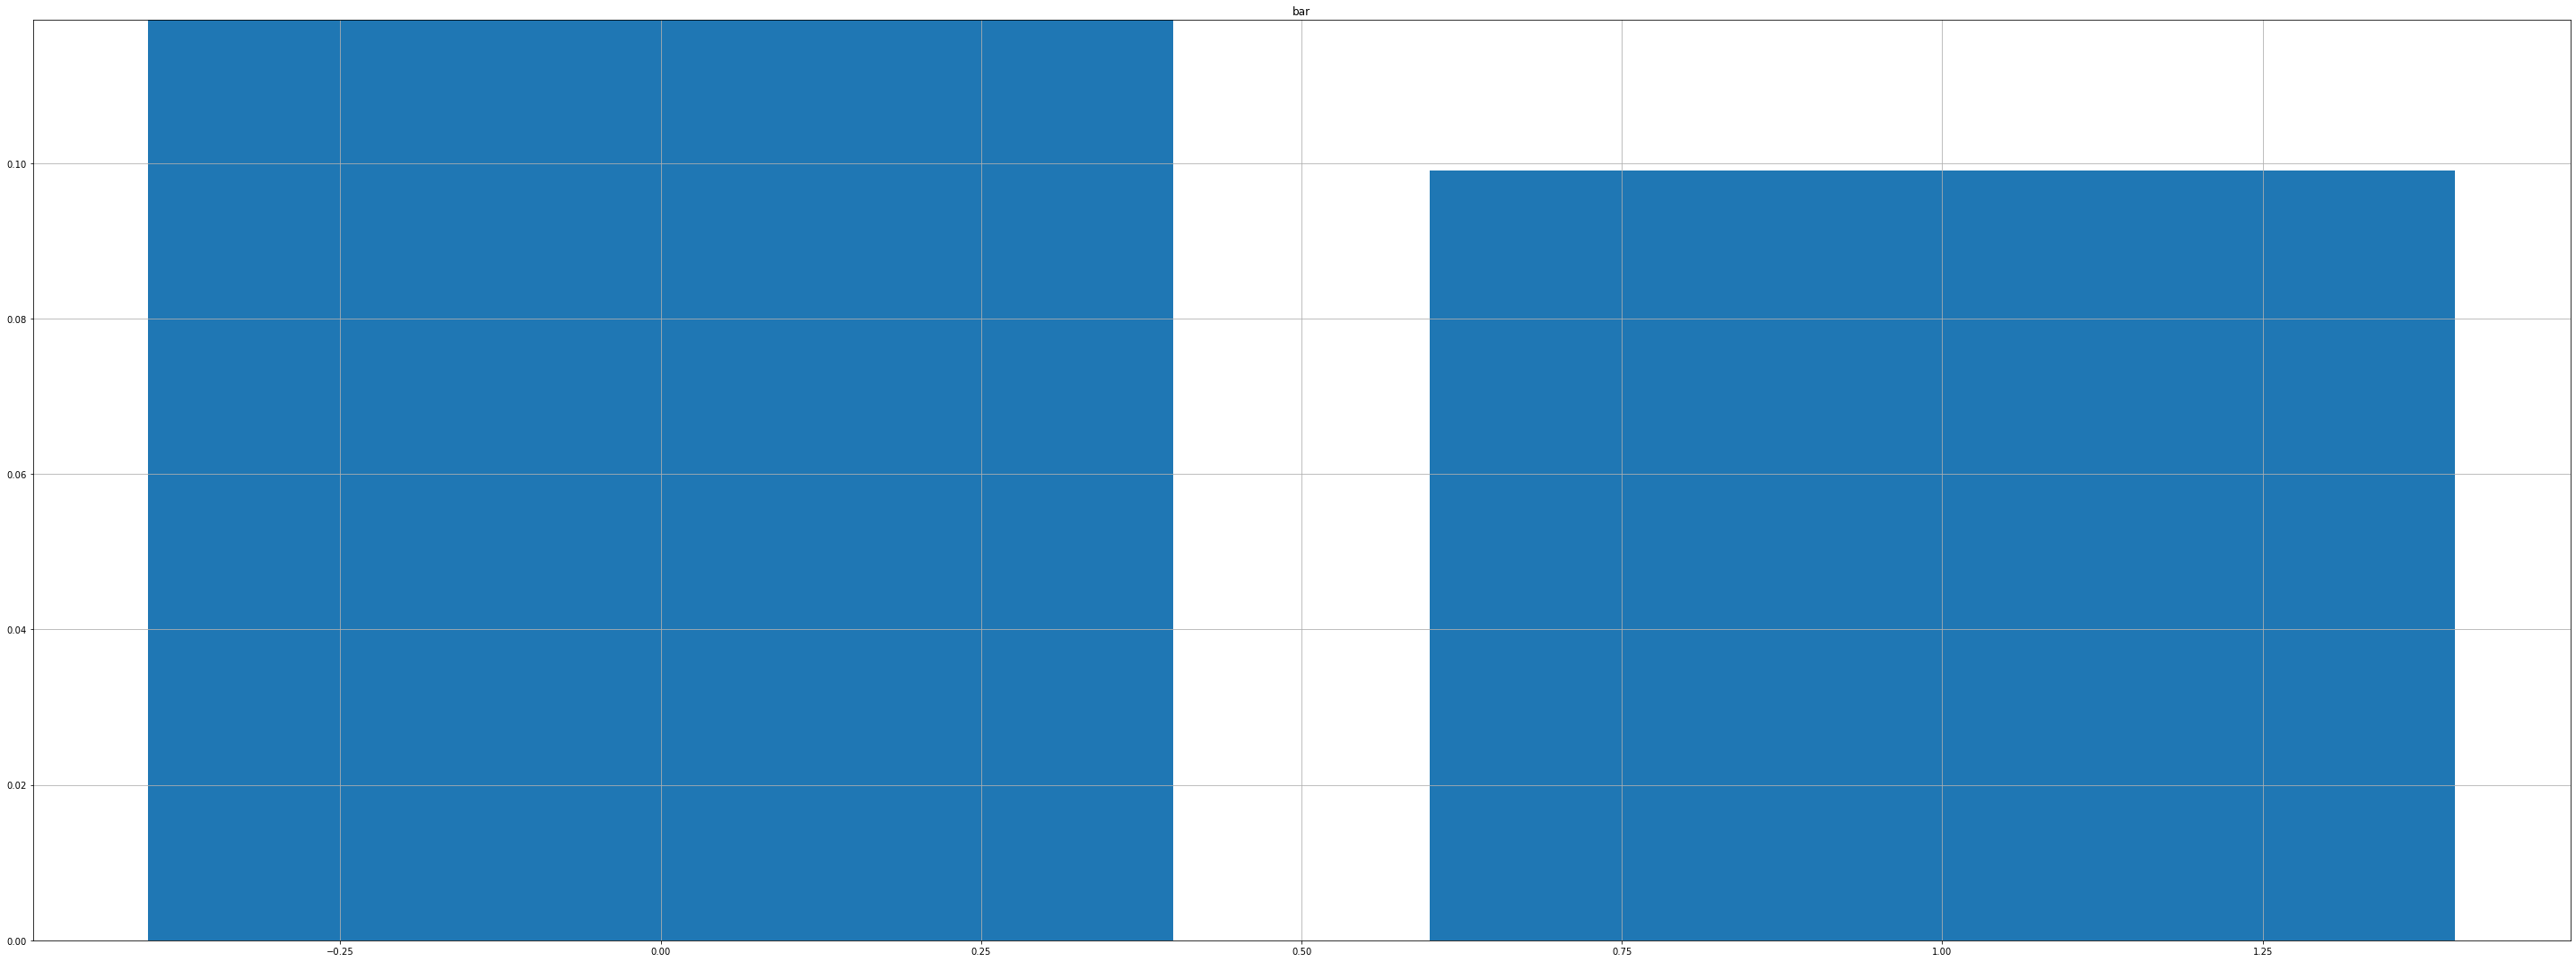

   month_2         y
0        0  0.113426
1        1  0.187970


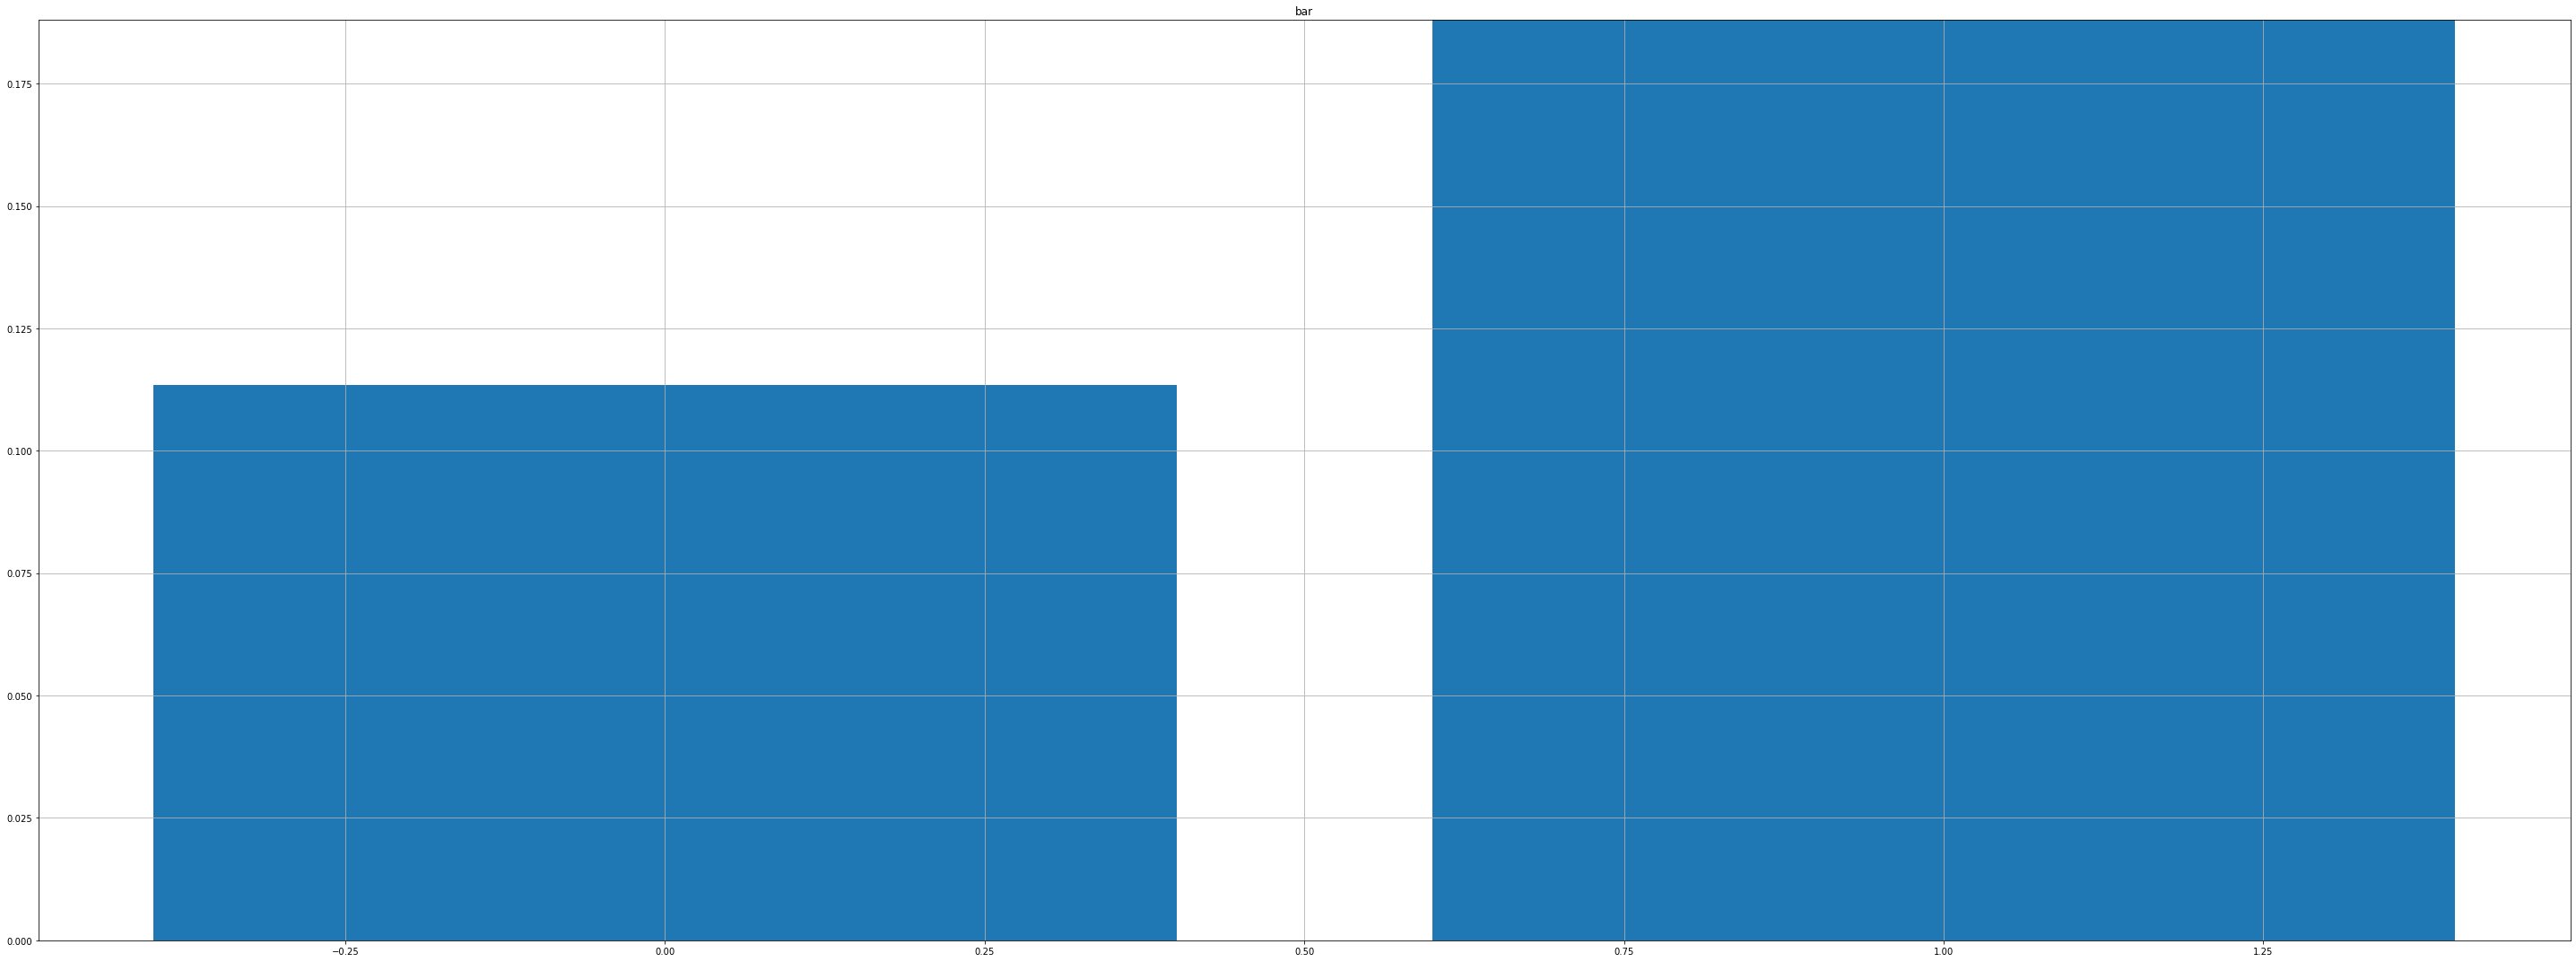

   month_3         y
0        0  0.113511
1        1  0.536232


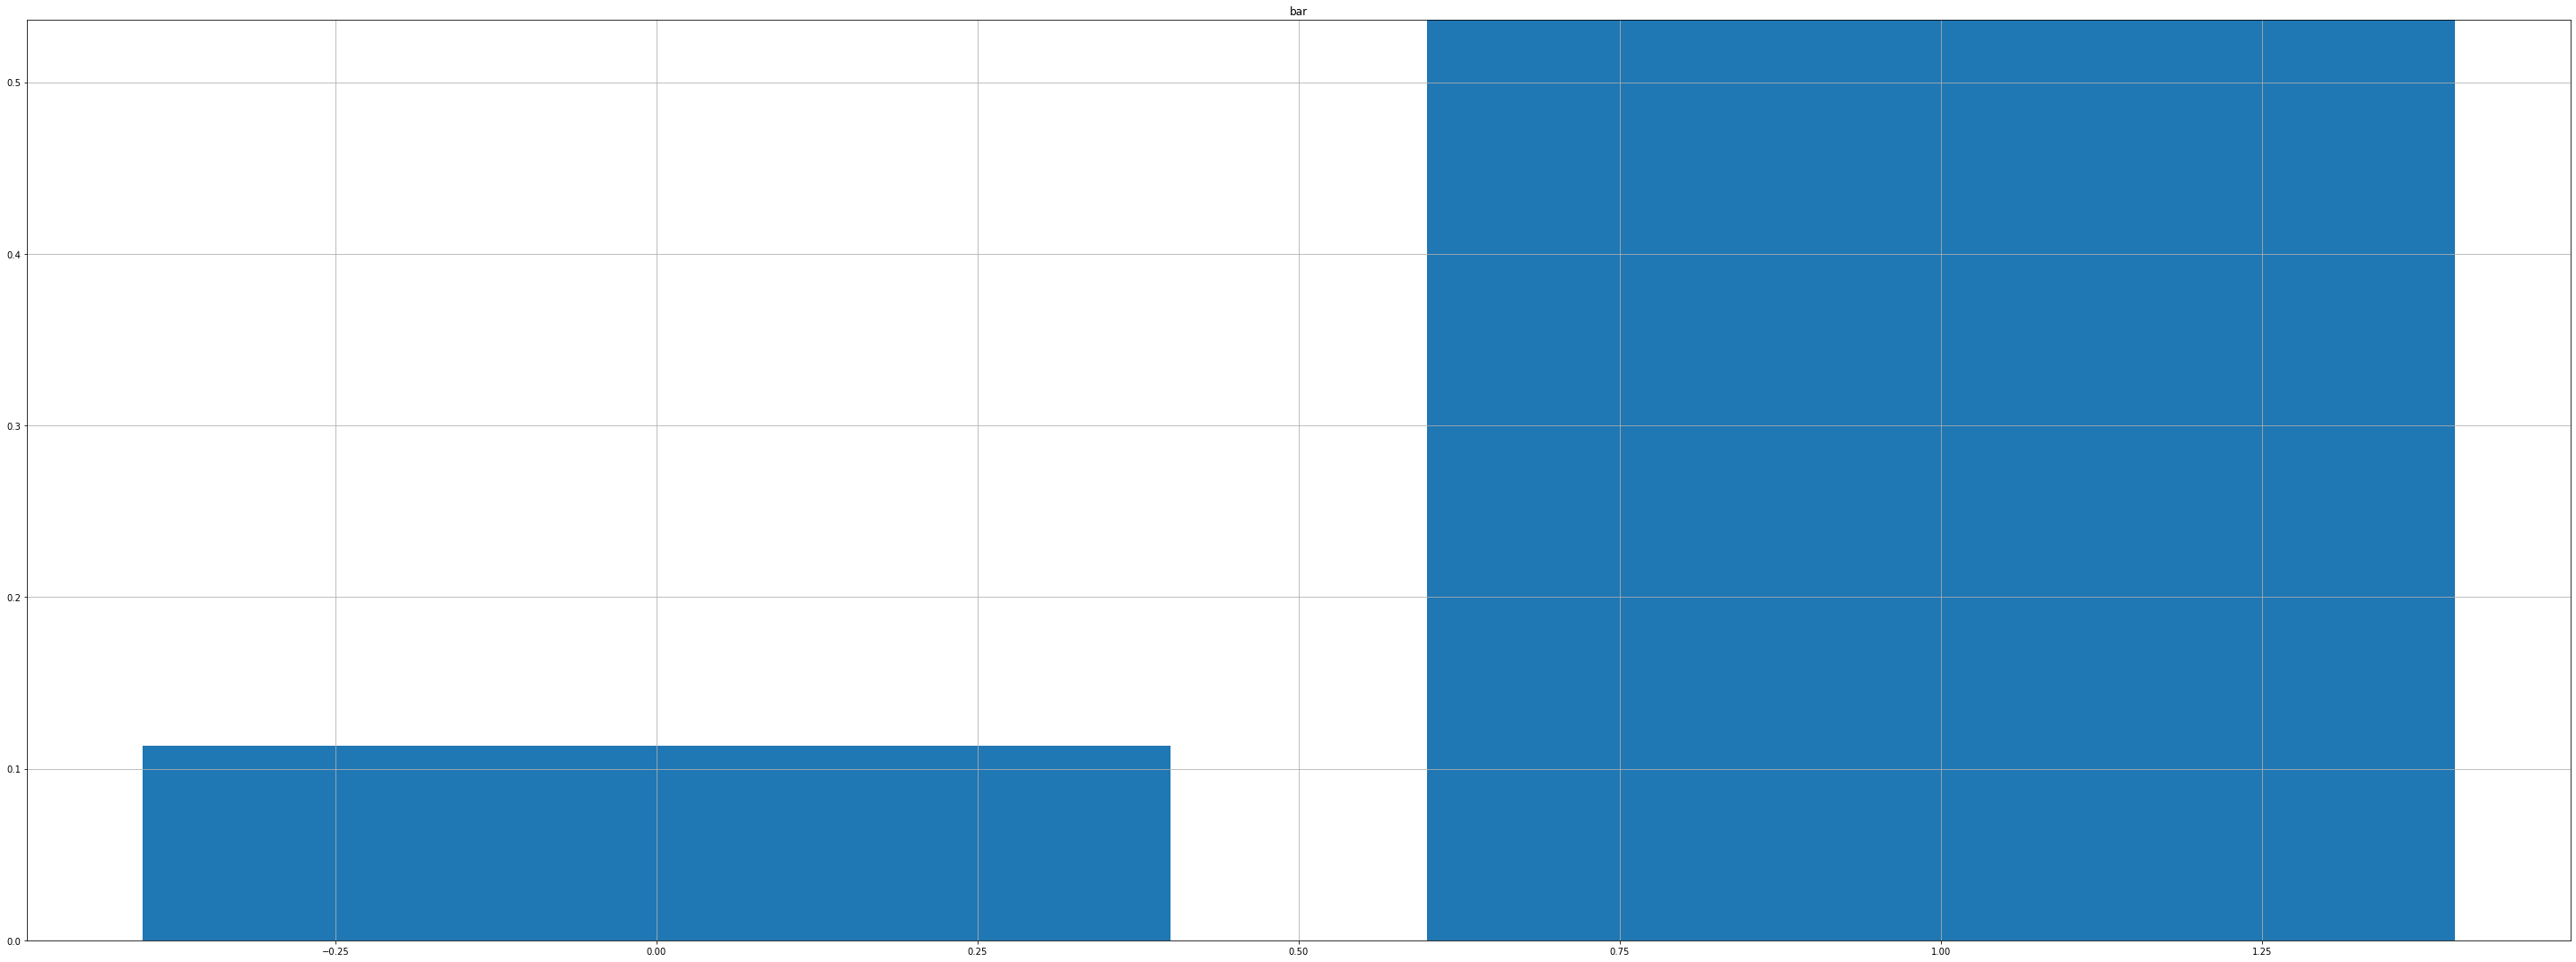

   month_4         y
0        0  0.114004
1        1  0.172103


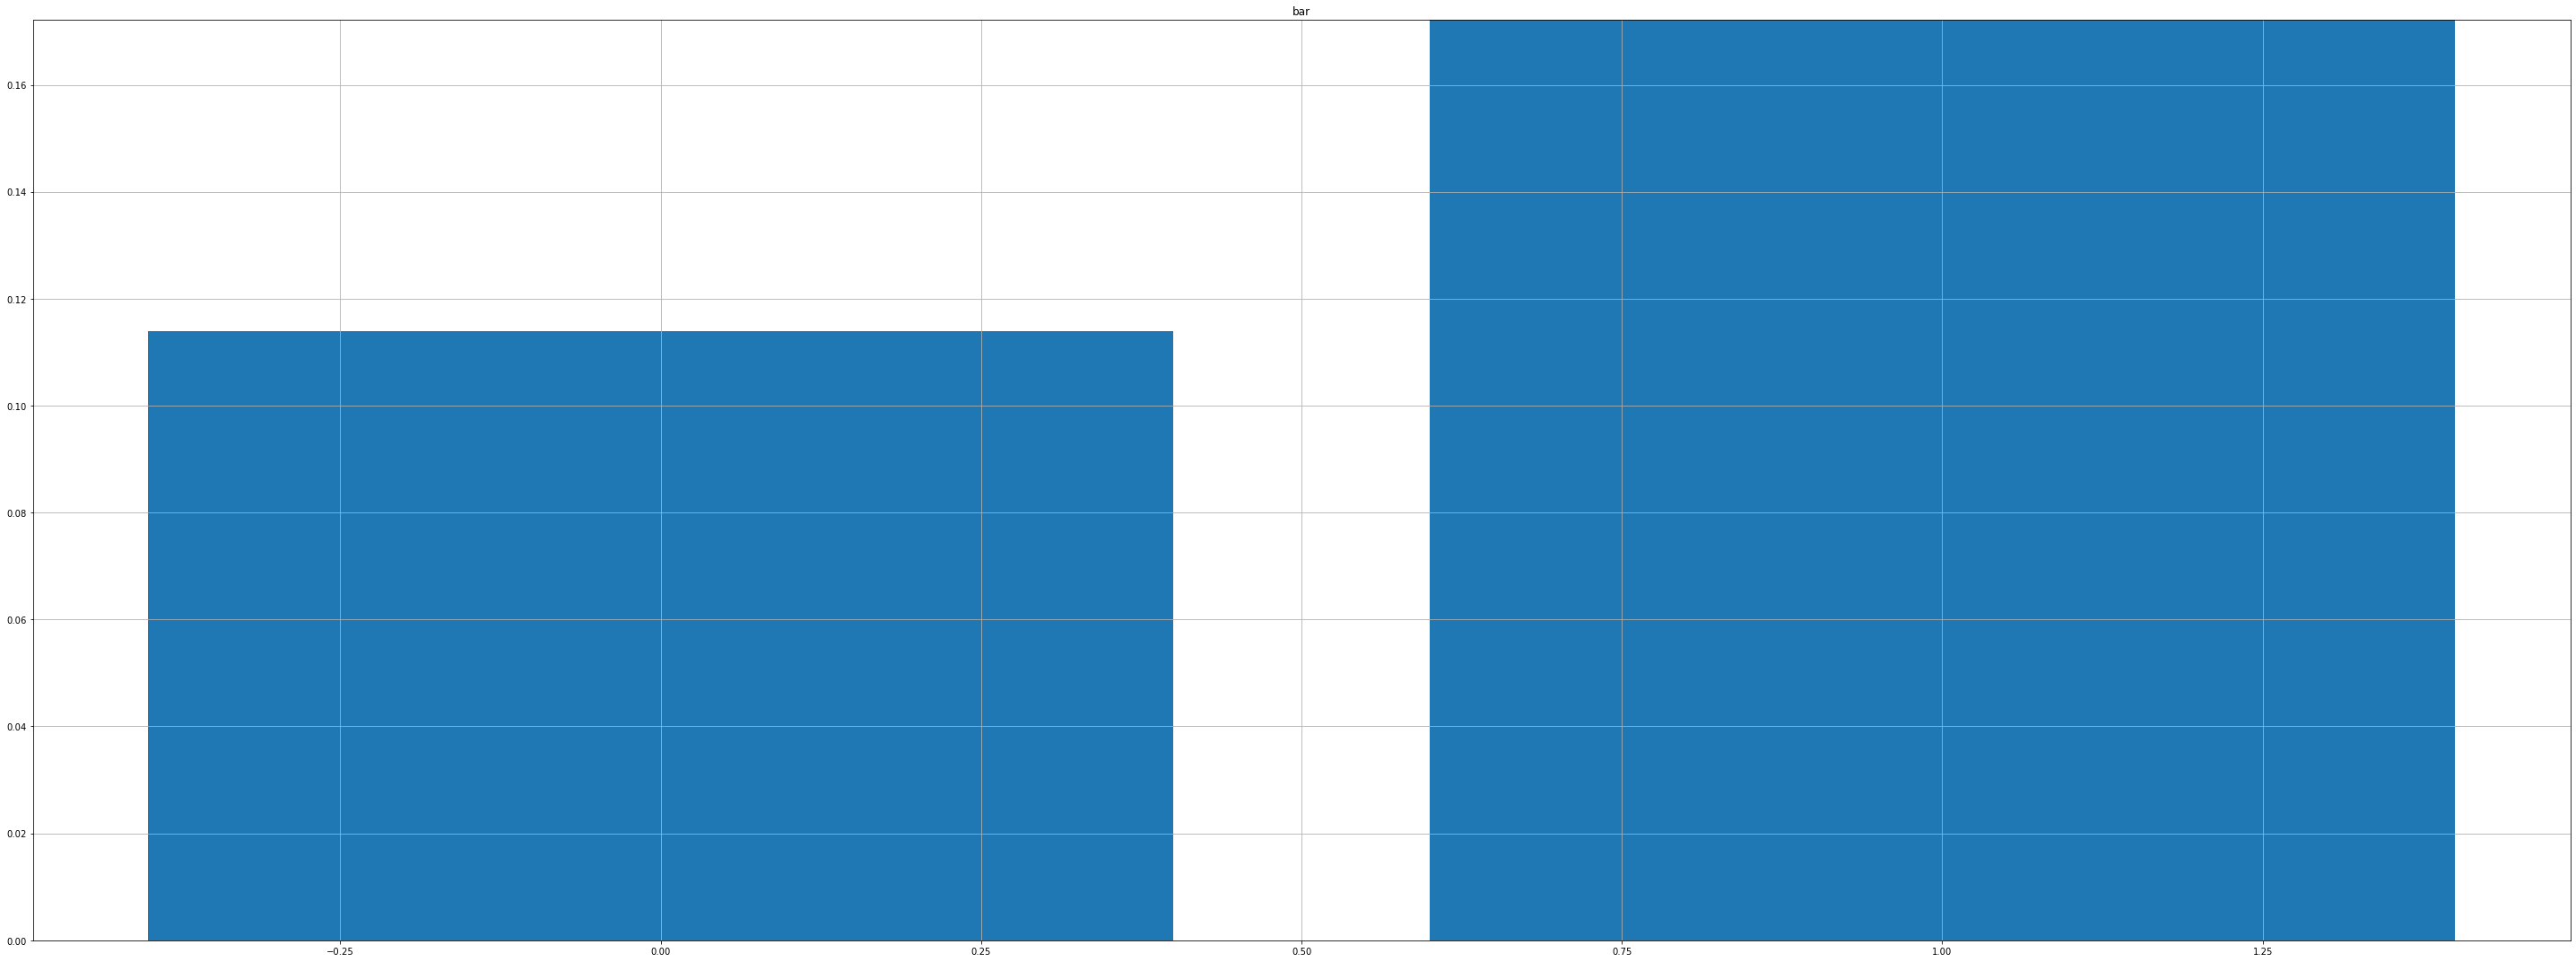

   month_5         y
0        0  0.140231
1        1  0.067966


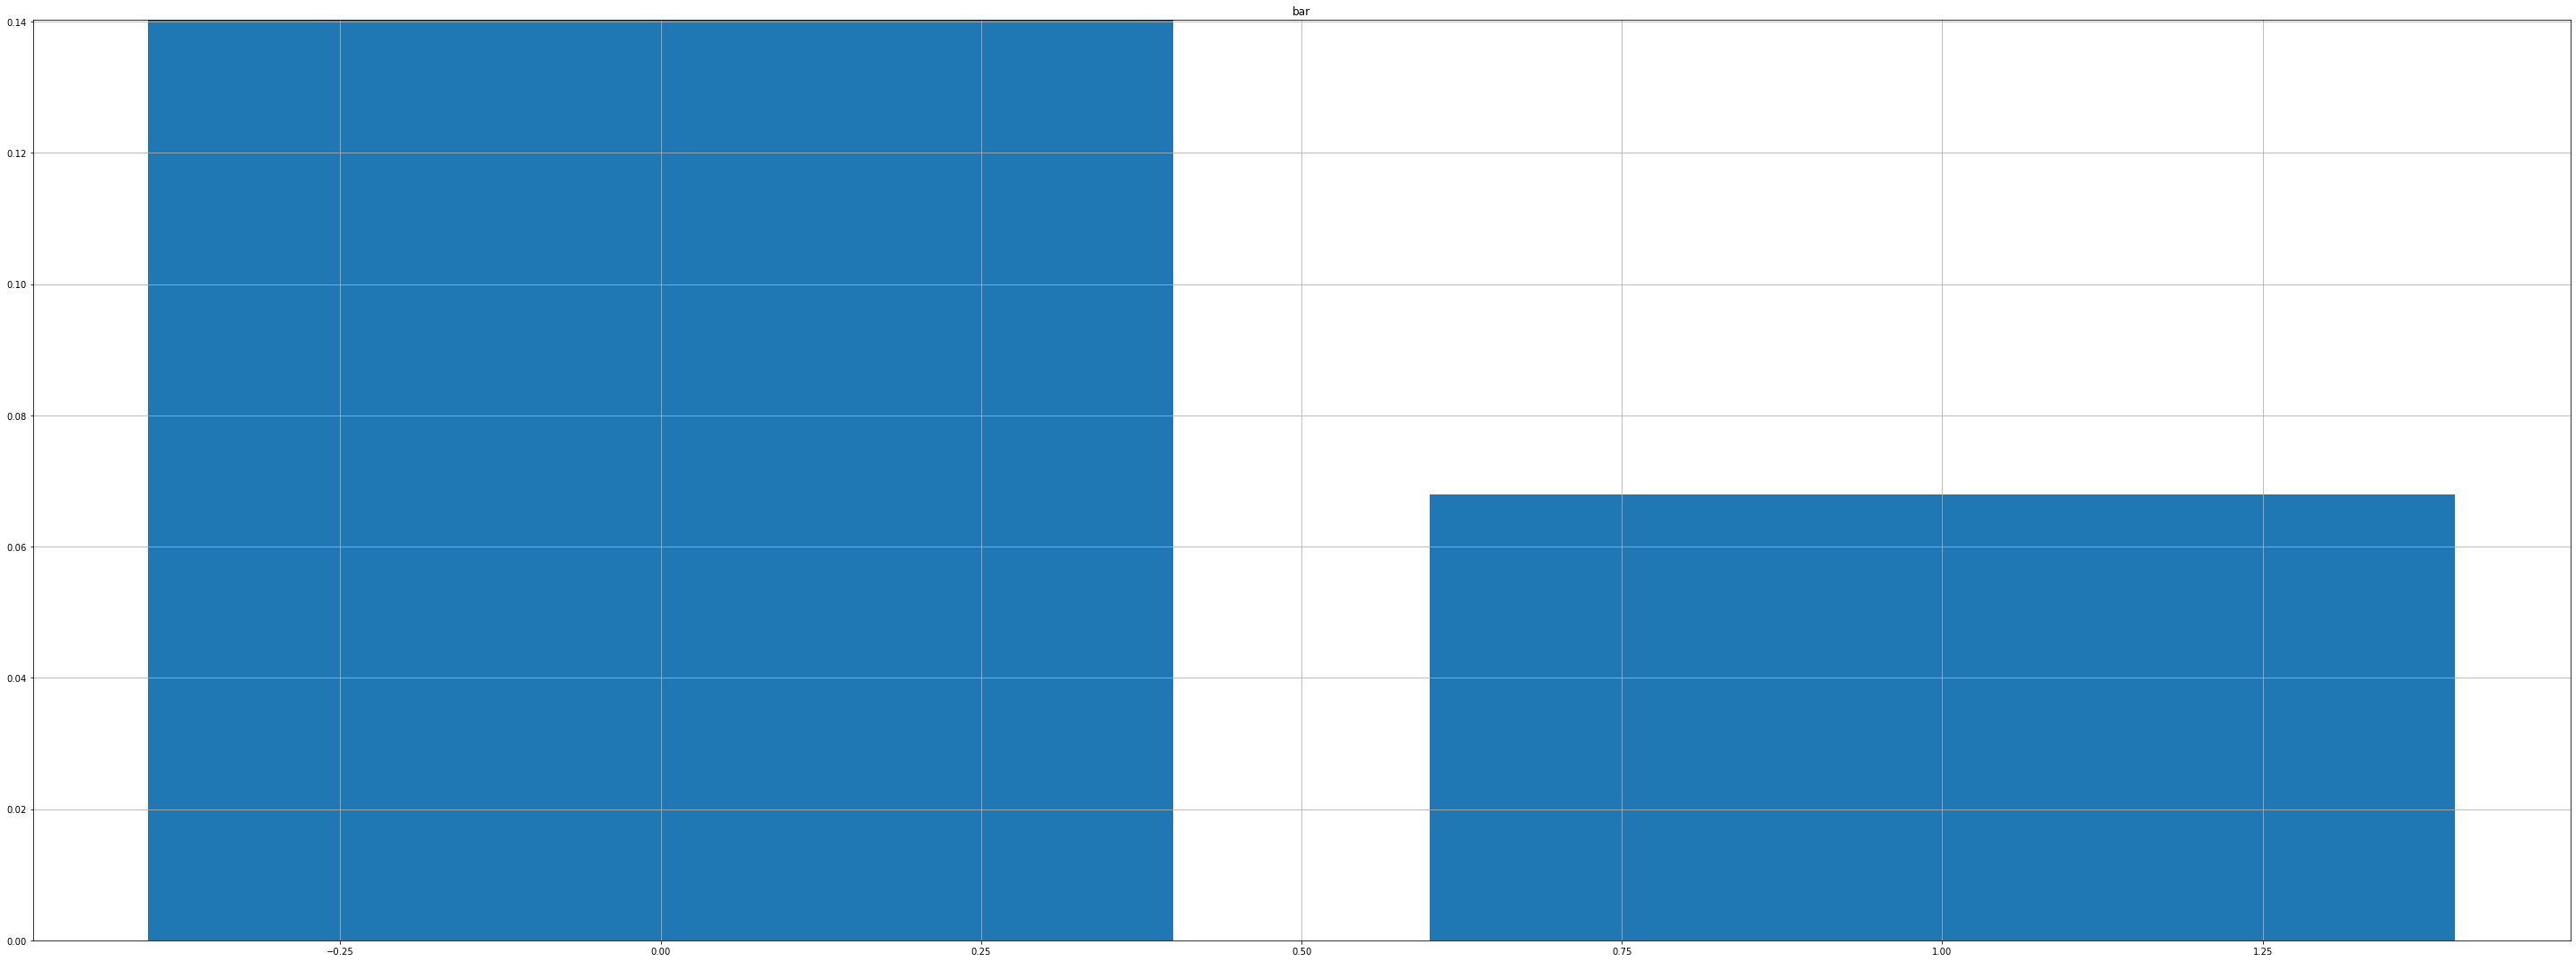

   month_6         y
0        0  0.117535
1        1  0.119974


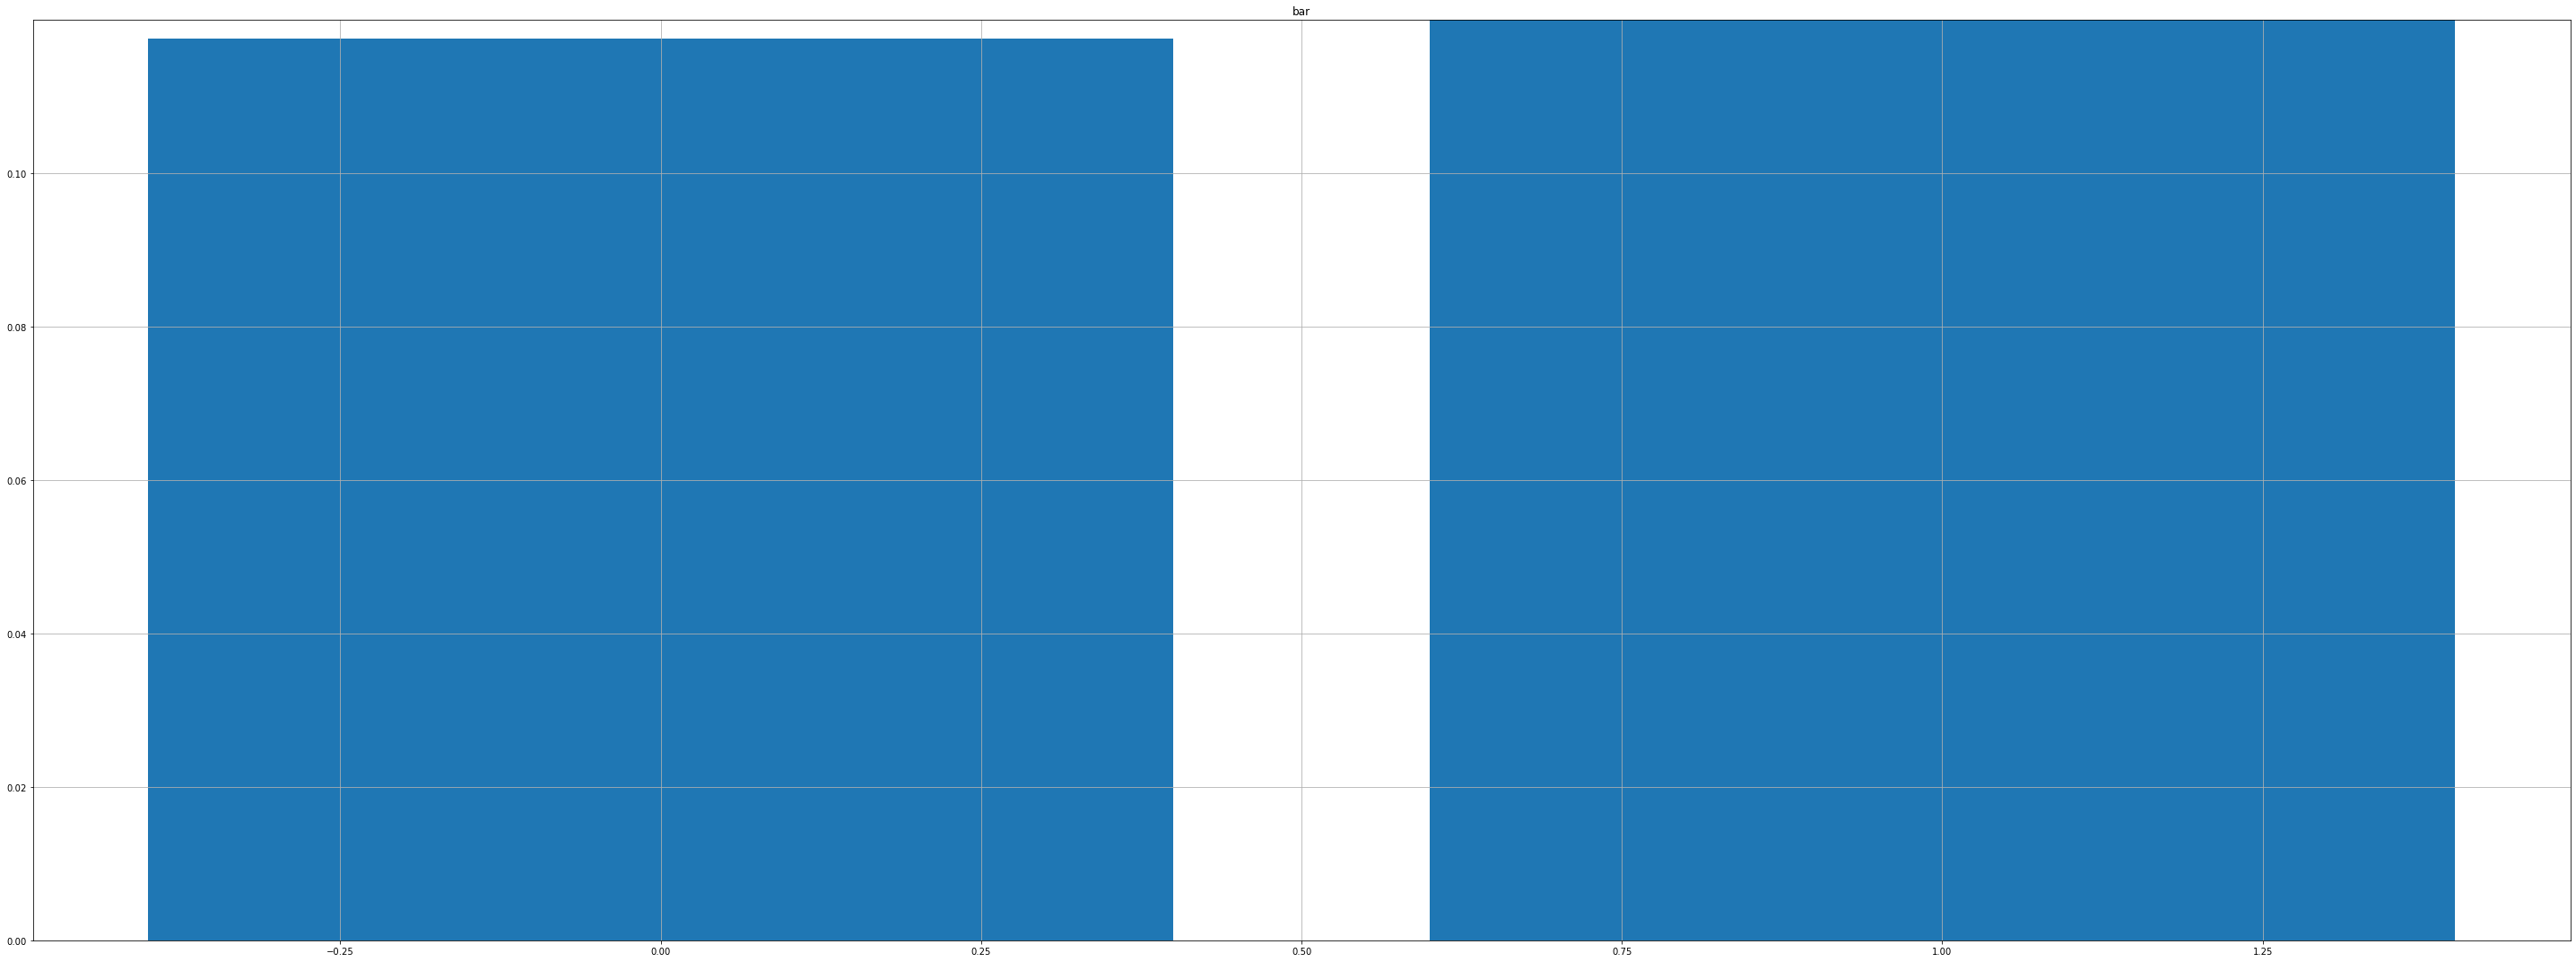

   month_7         y
0        0  0.122880
1        1  0.089588


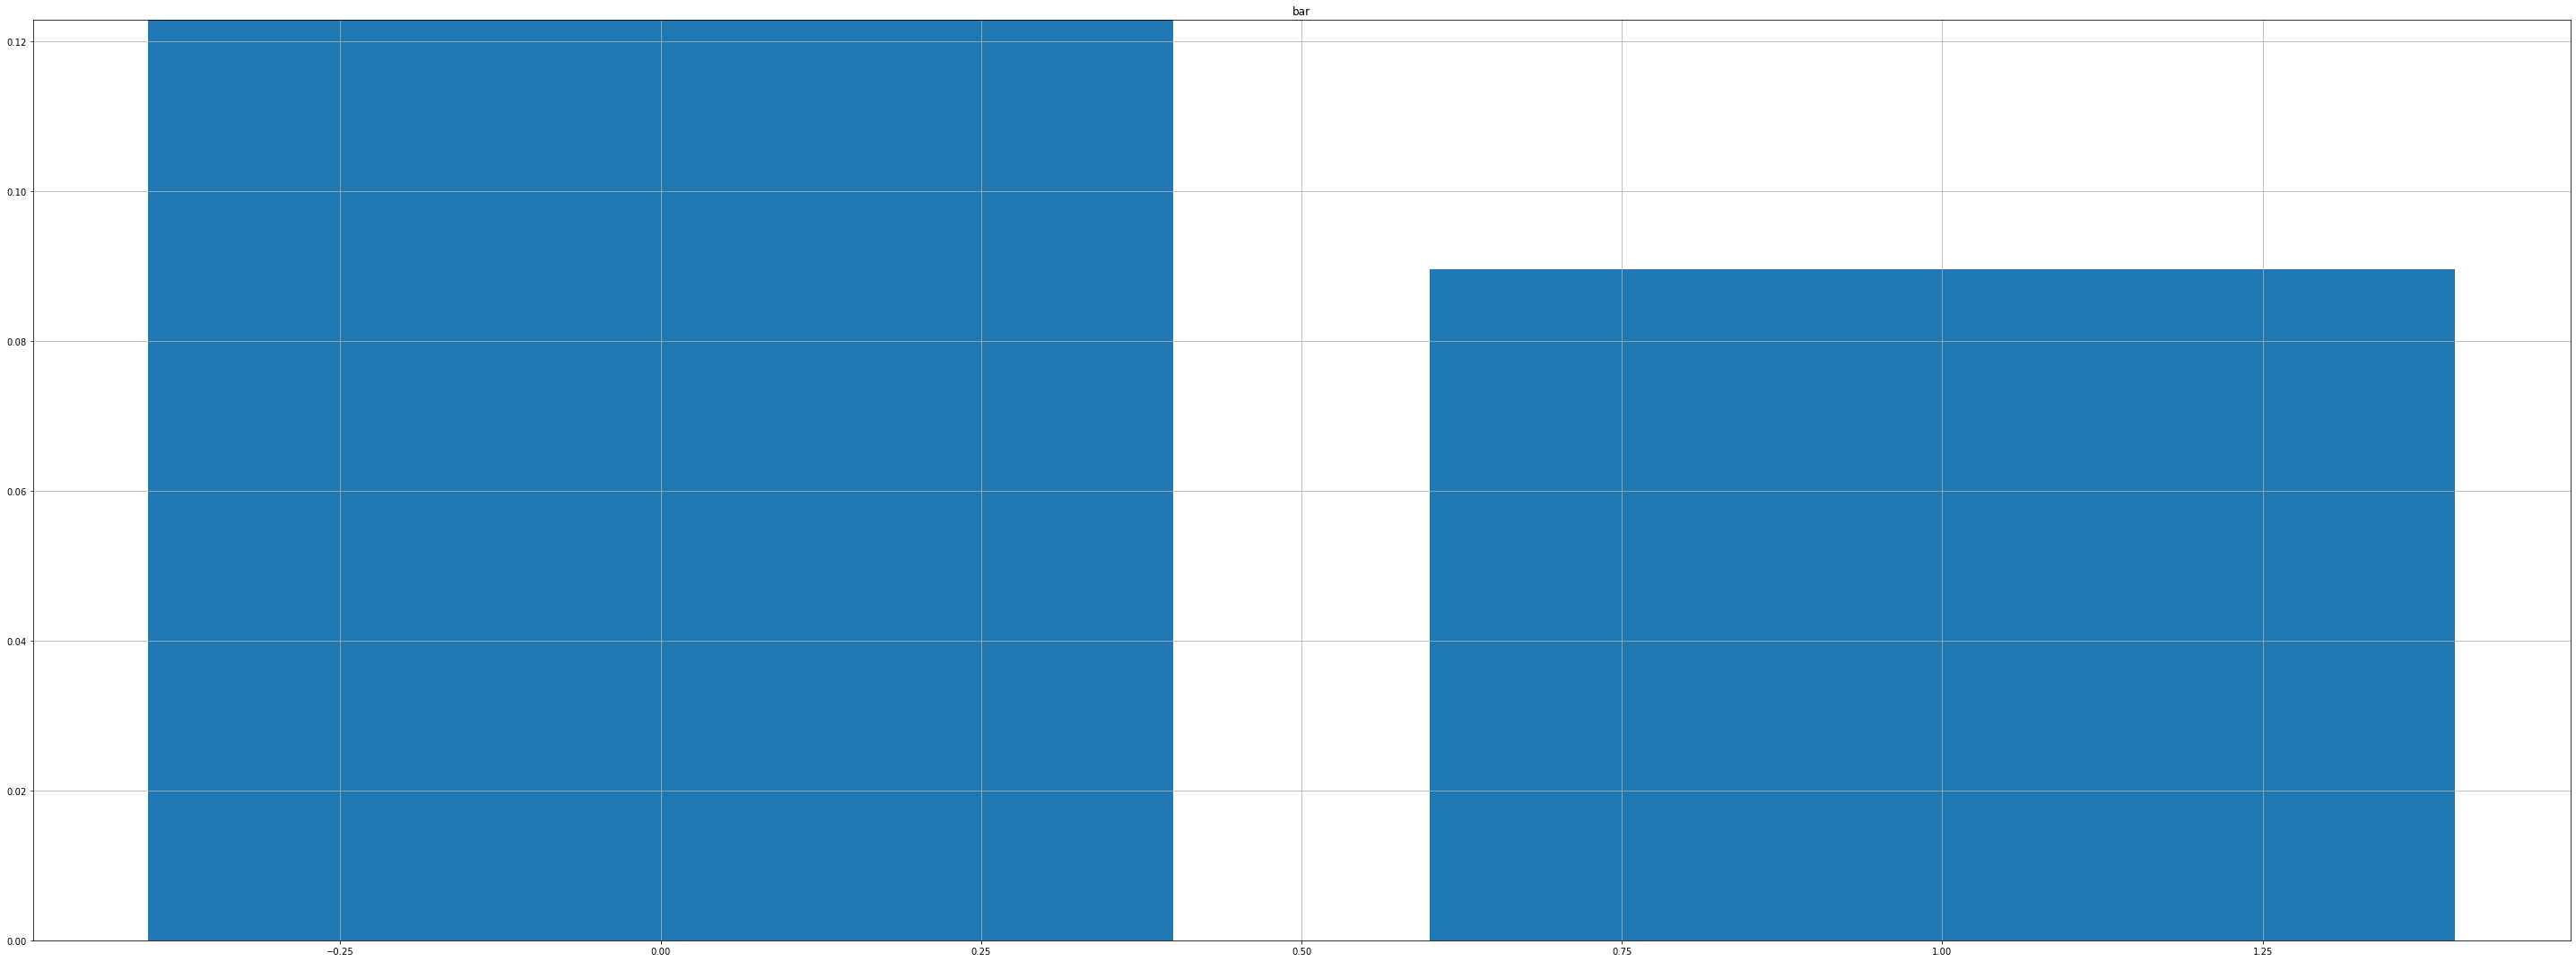

   month_8         y
0        0  0.118931
1        1  0.110875


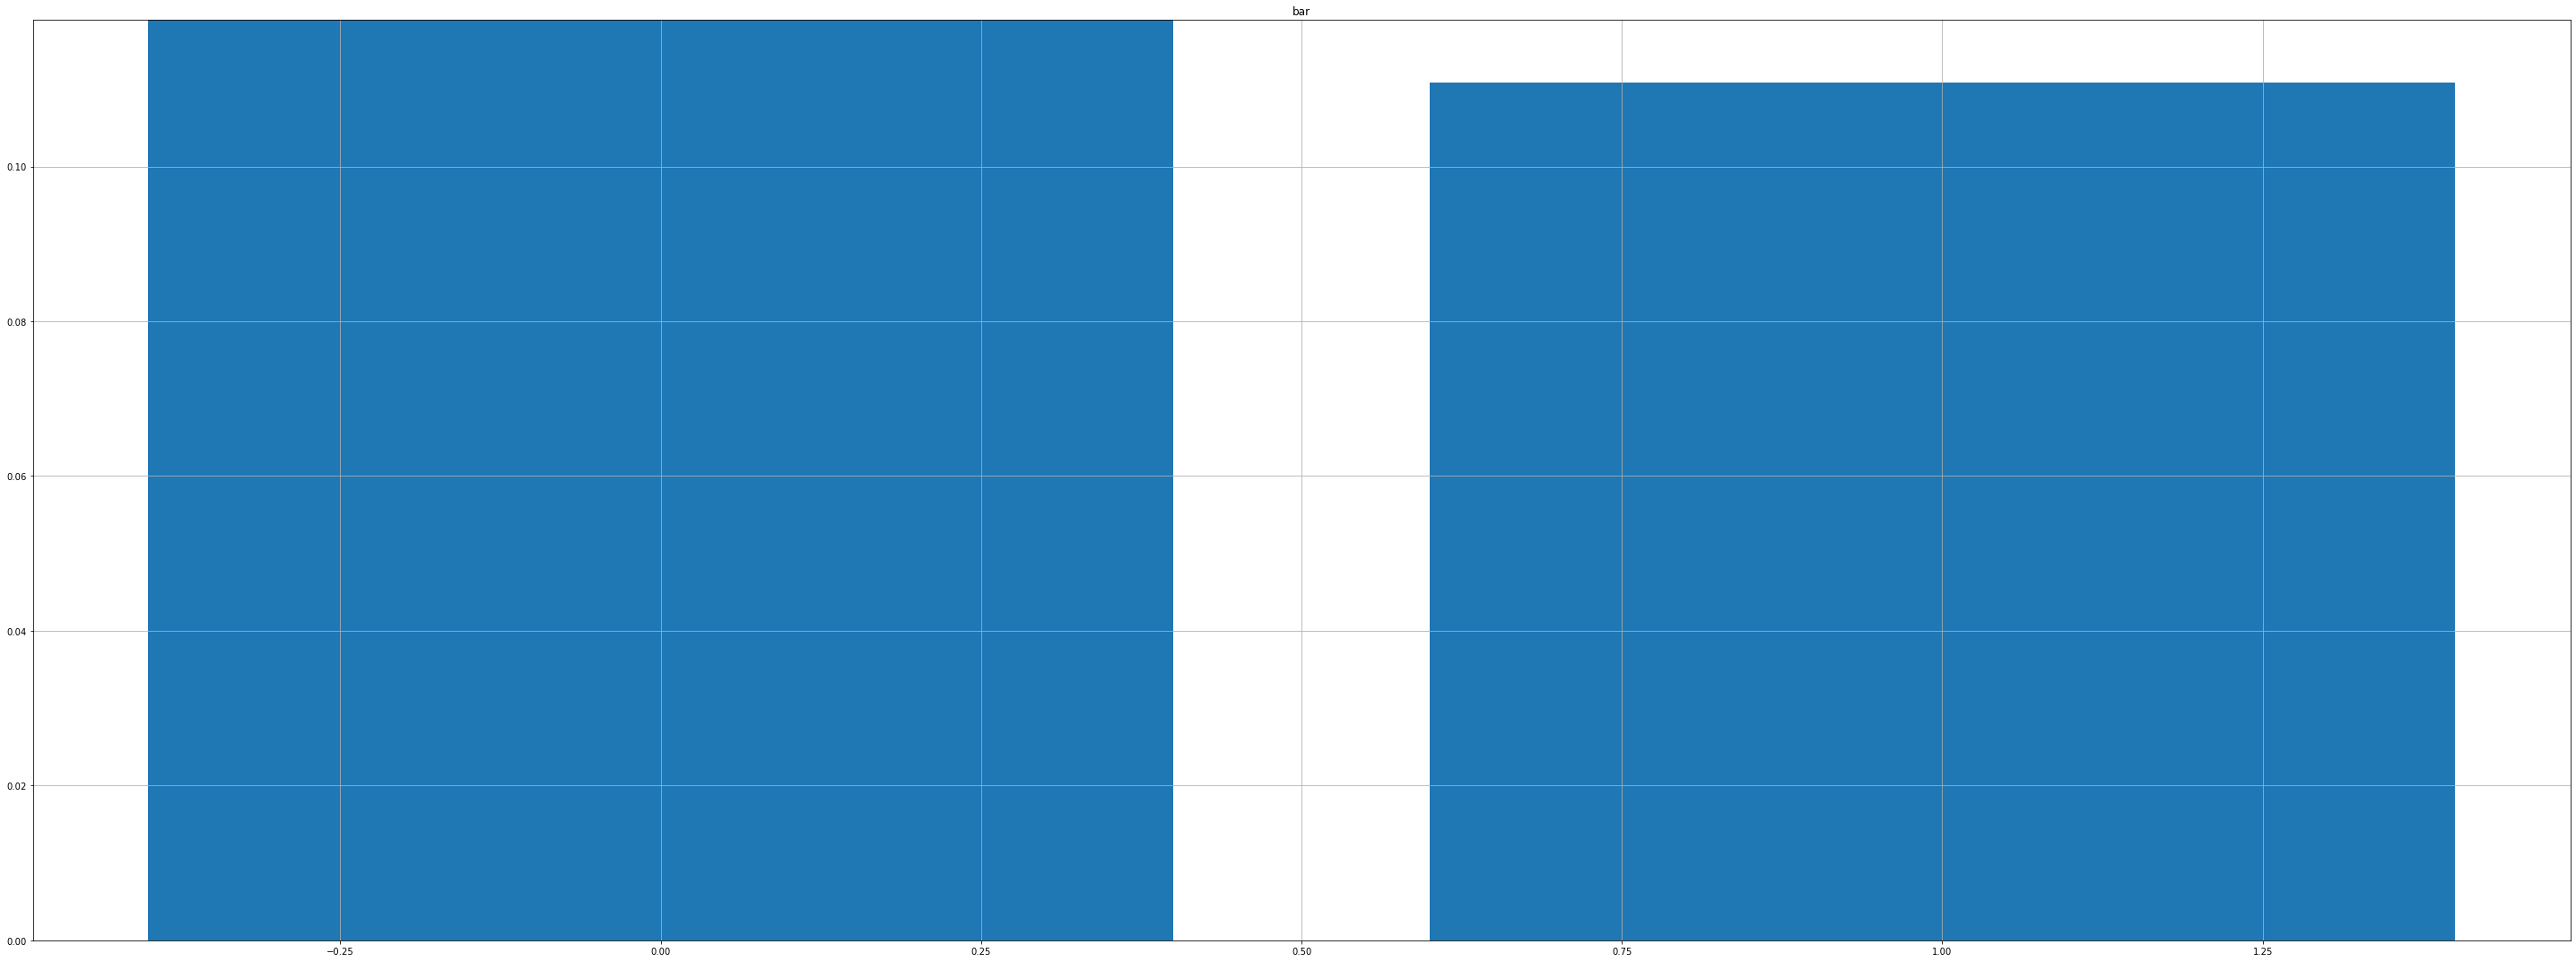

   month_9         y
0        0  0.113212
1        1  0.456044


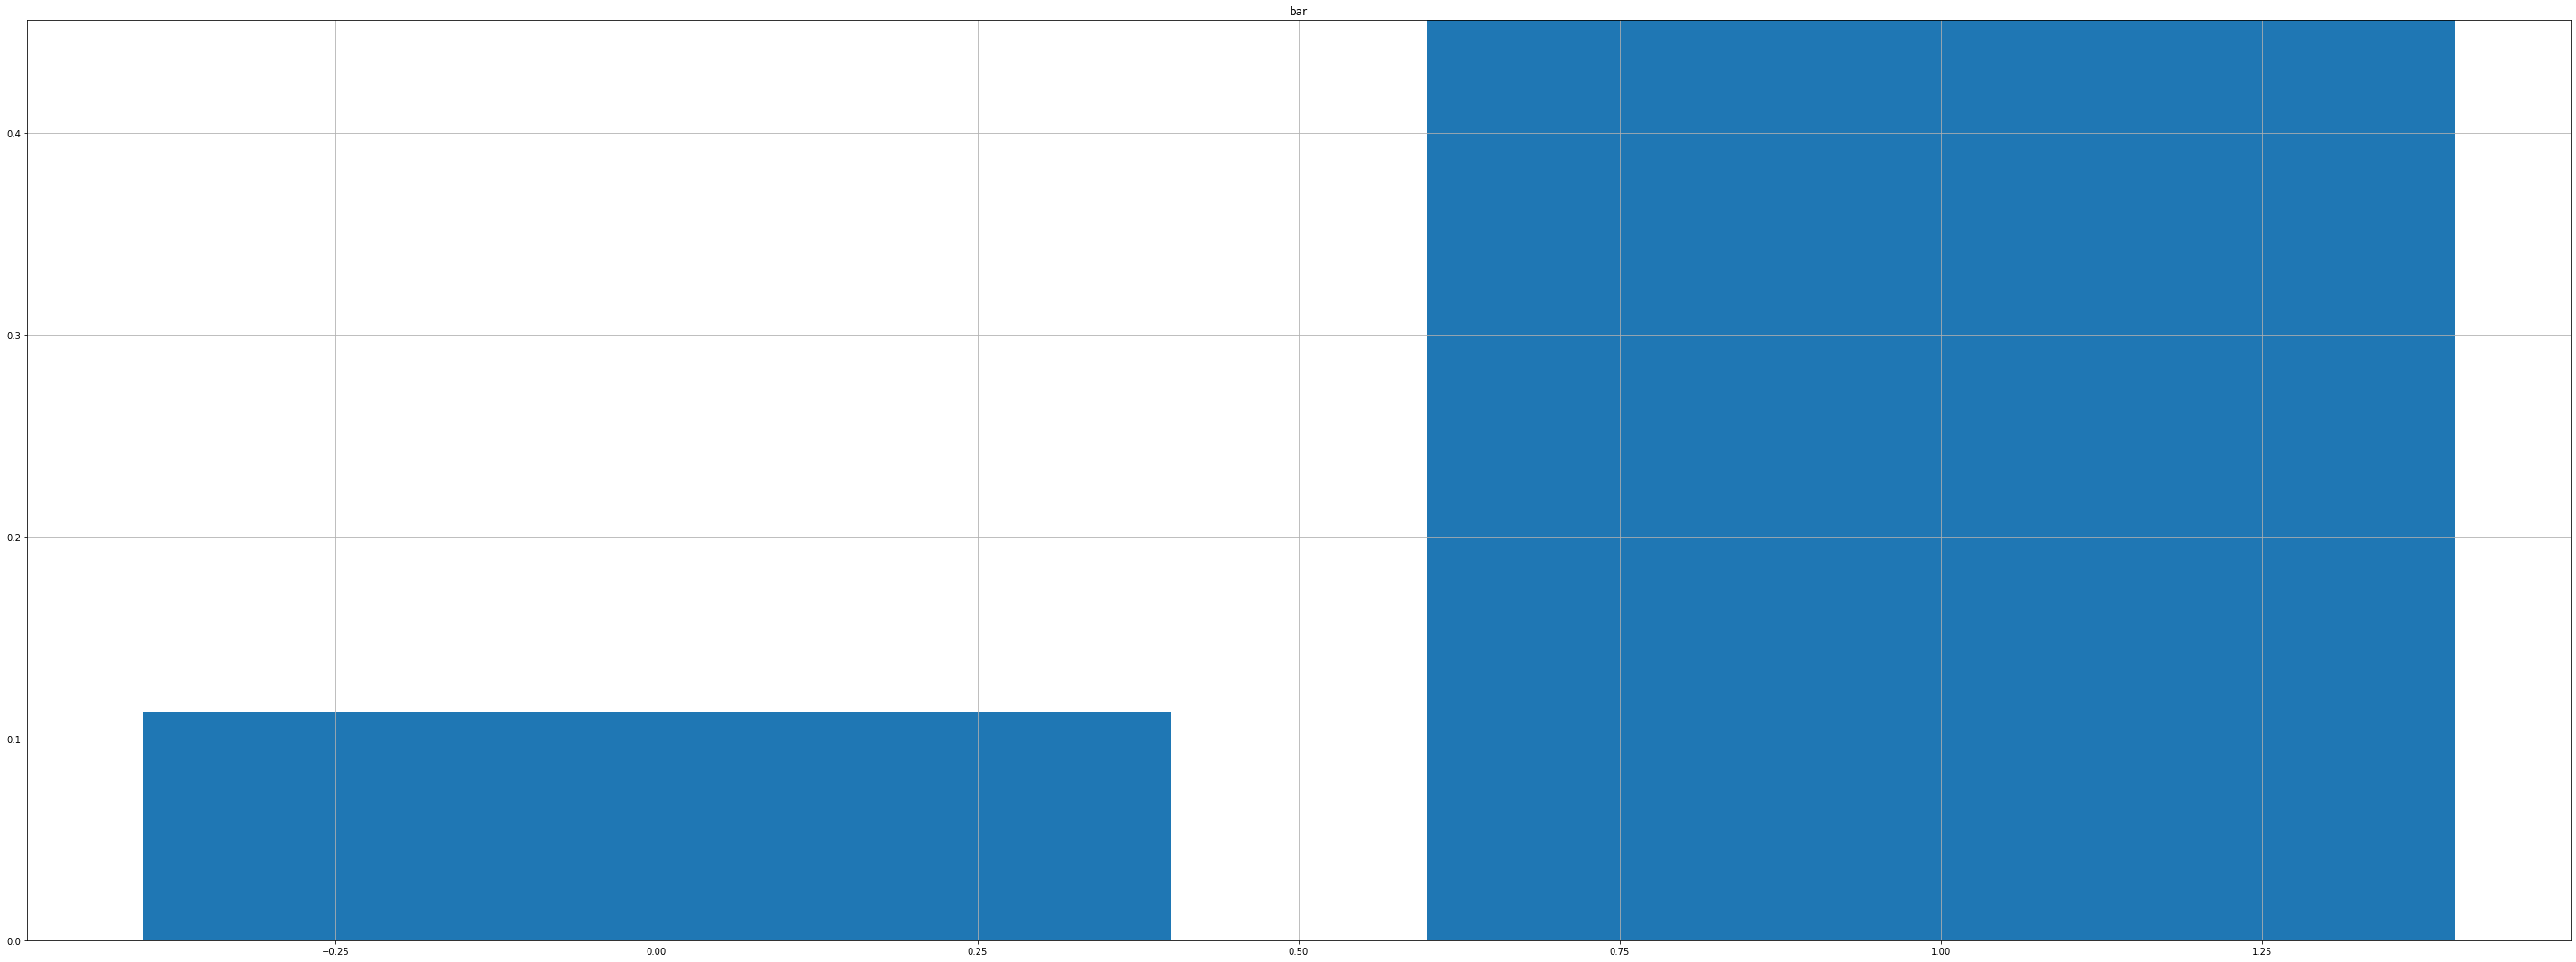

   month_10         y
0         0  0.113124
1         1  0.420290


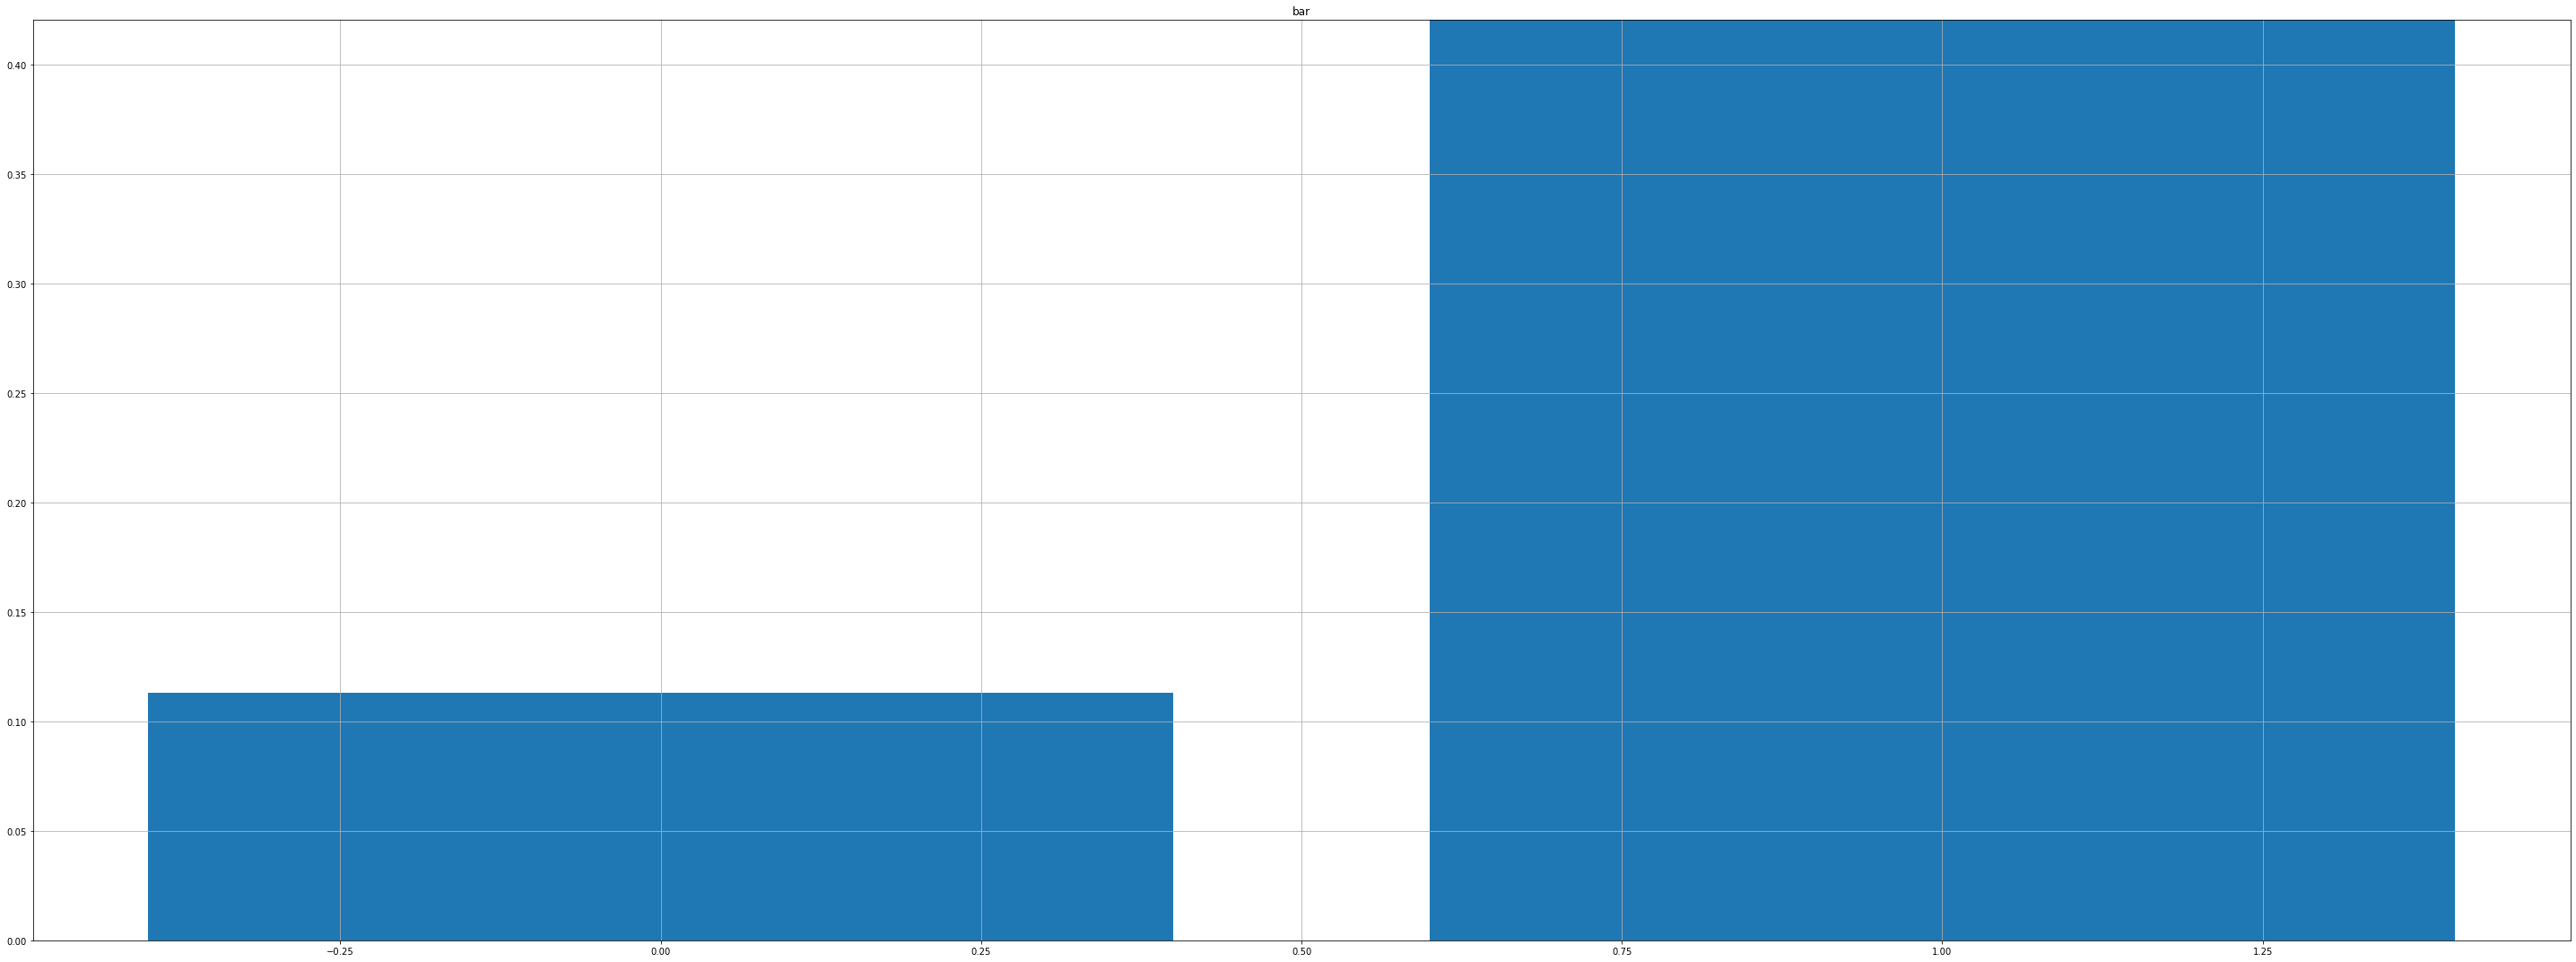

   month_11         y
0         0  0.119732
1         1  0.097623


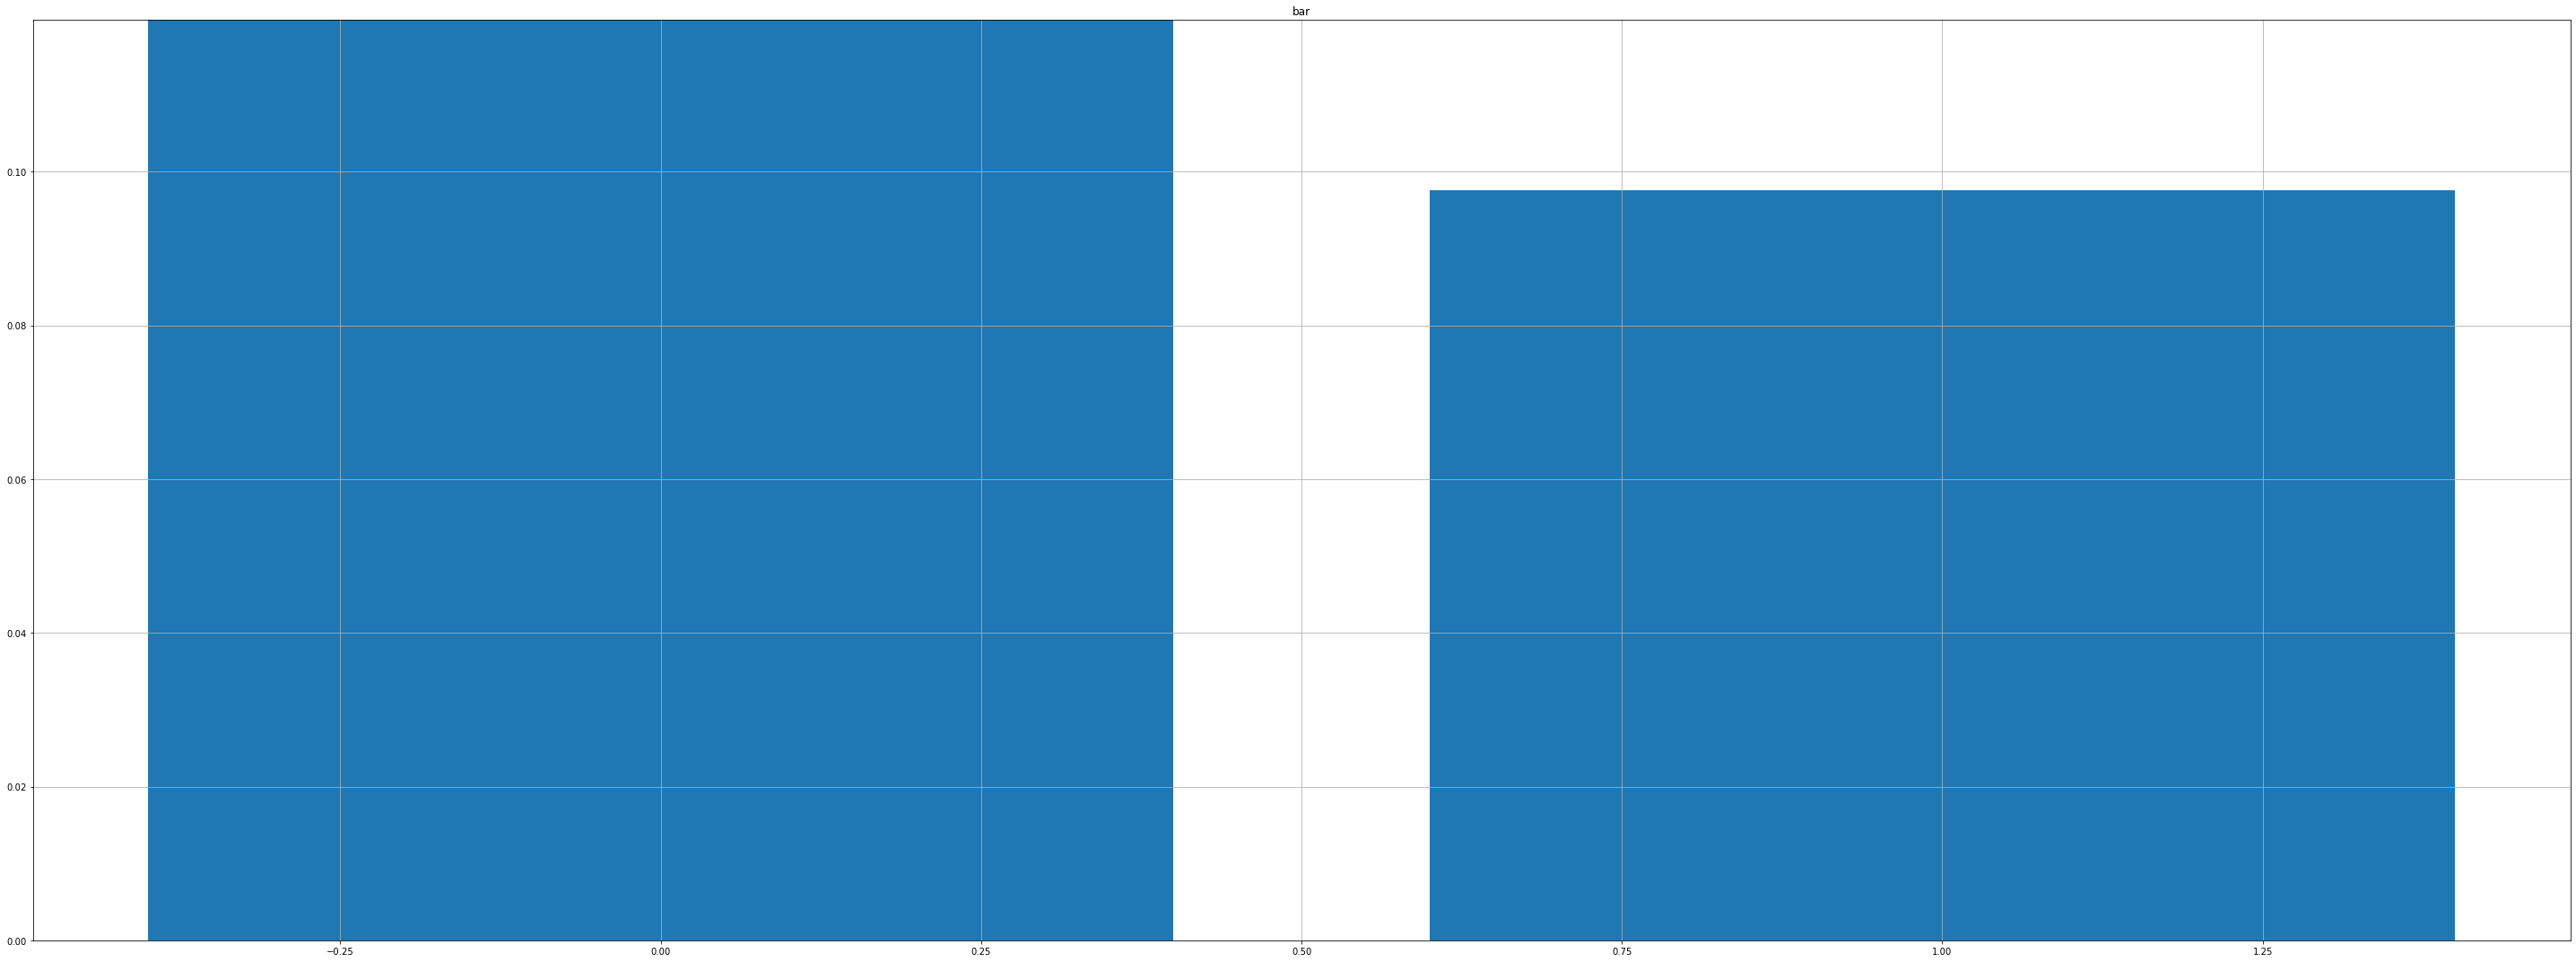

   month_12         y
0         0  0.116097
1         1  0.517241


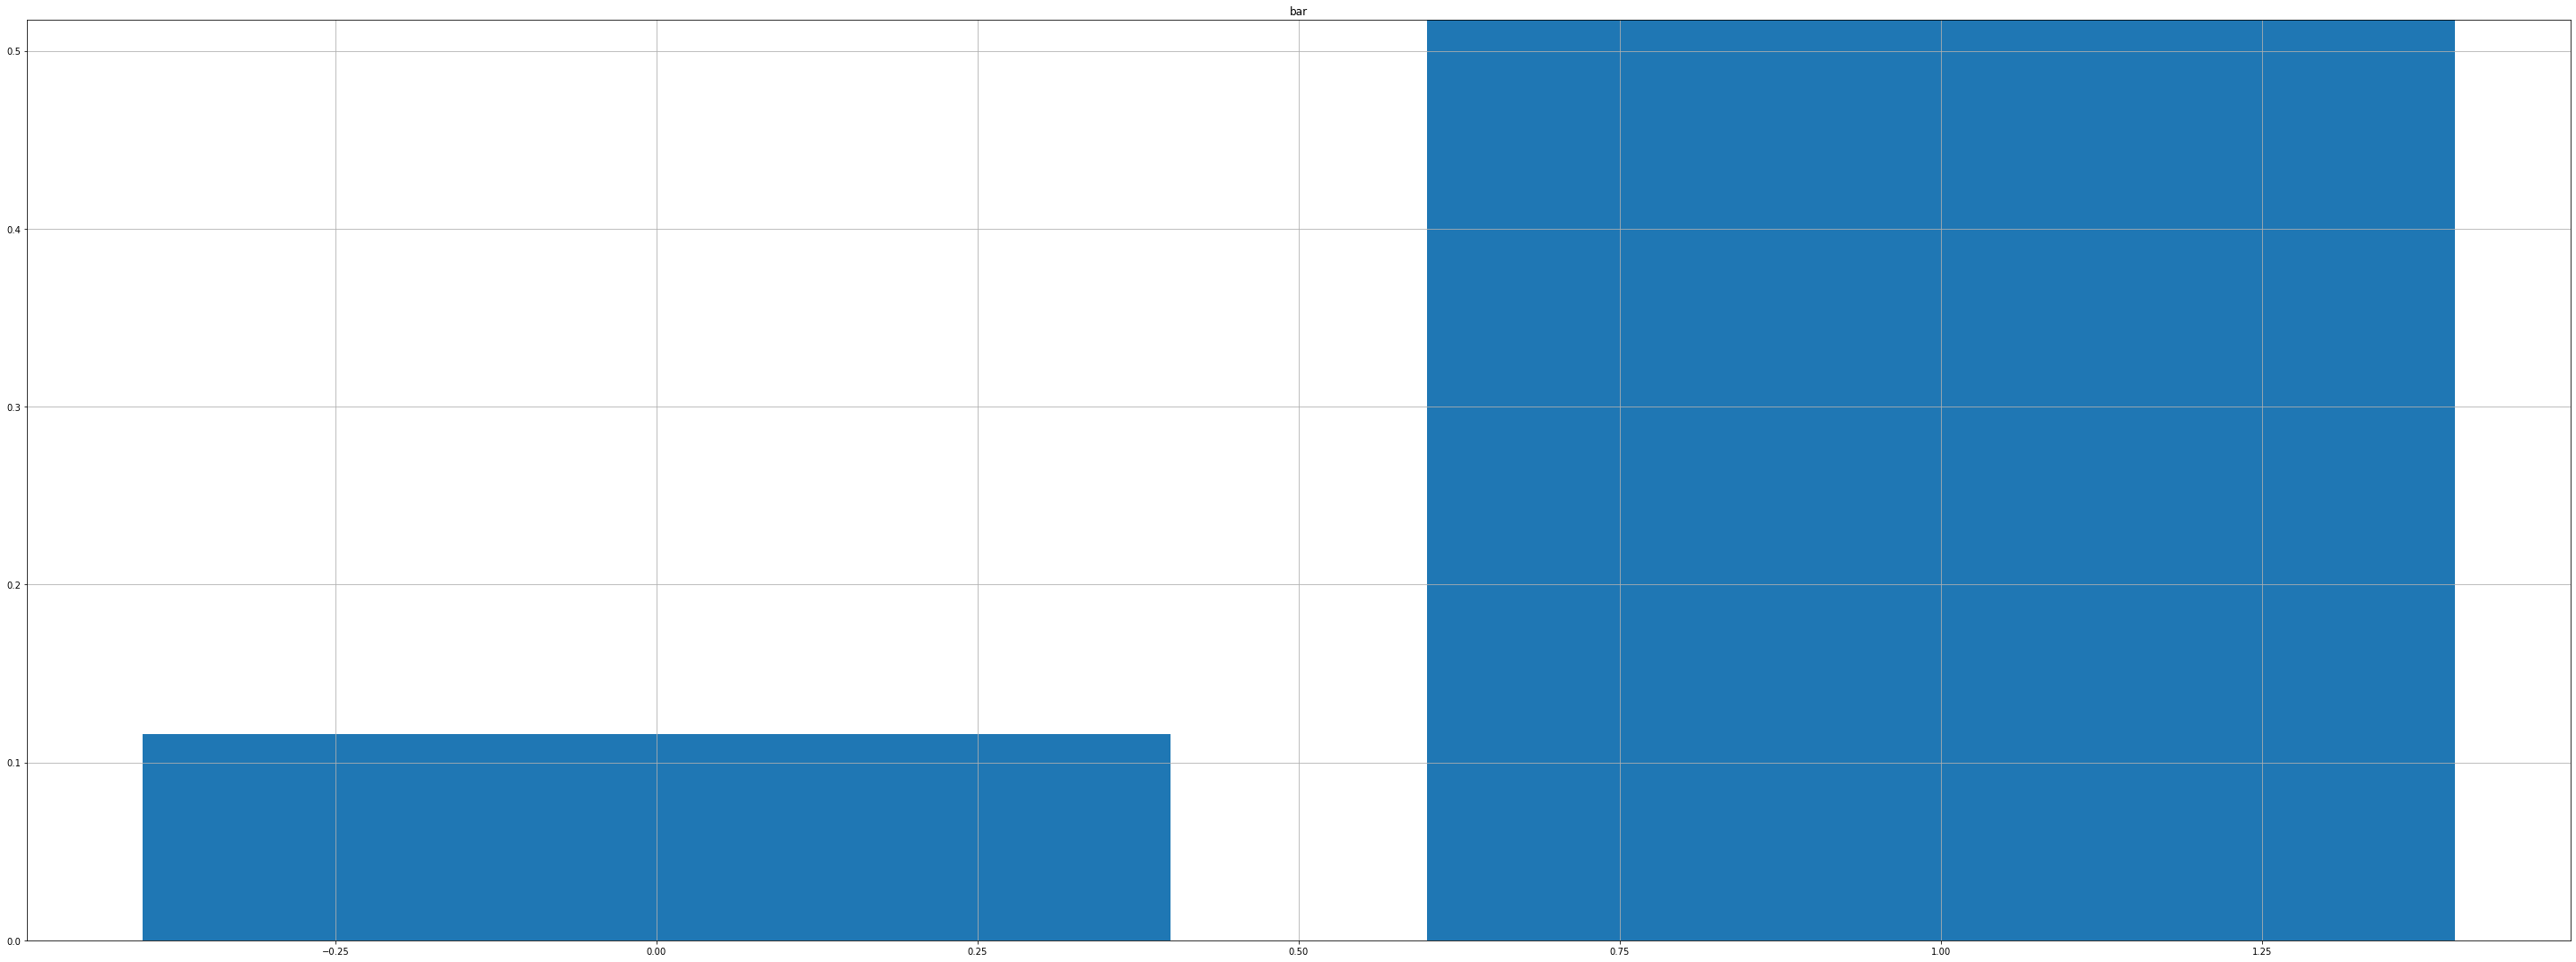

   poutcome_failure         y
0                 0  0.117325
1                 1  0.121739


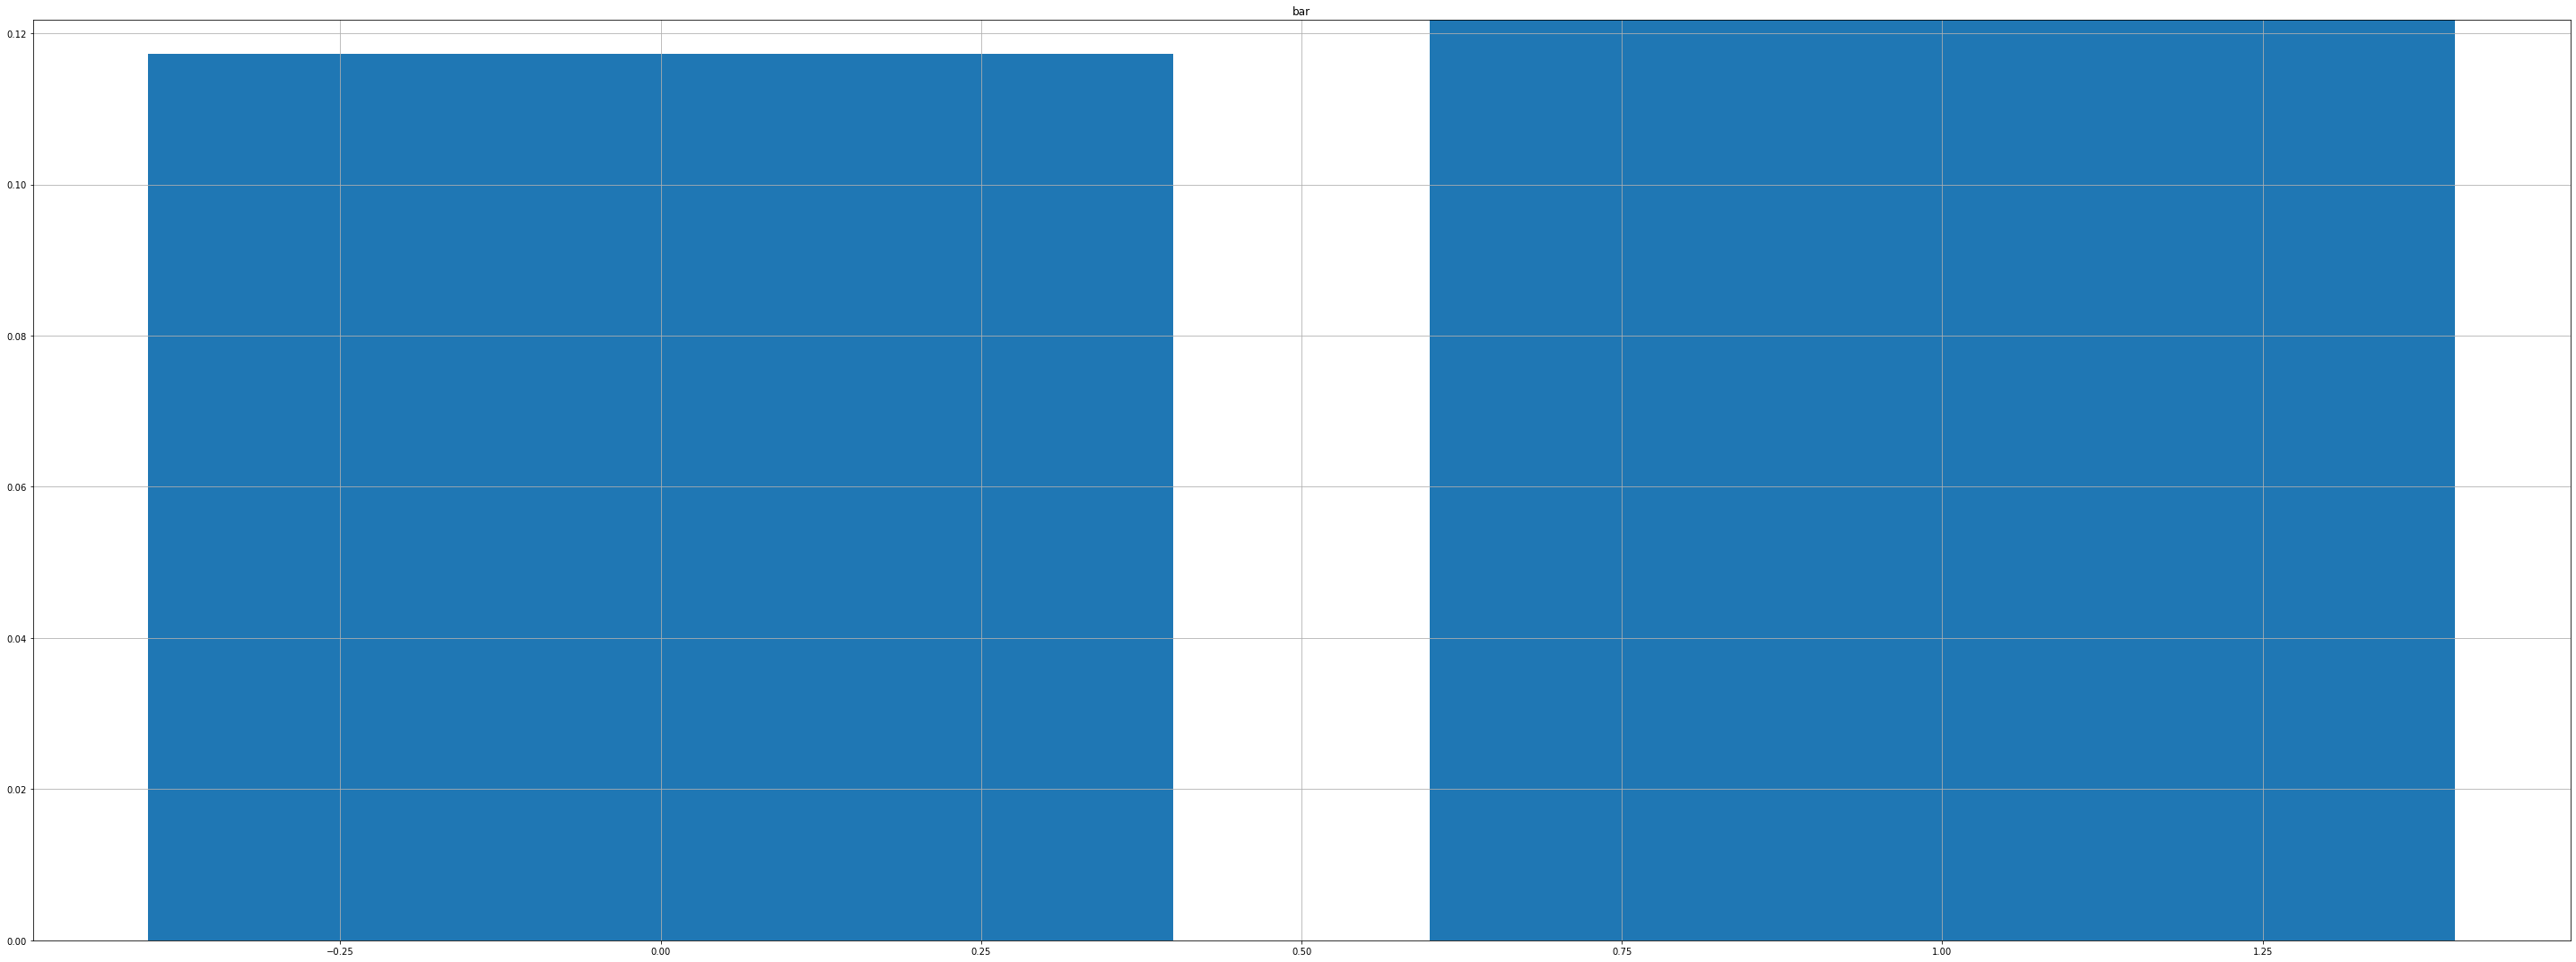

   poutcome_other         y
0               0  0.116015
1               1  0.163424


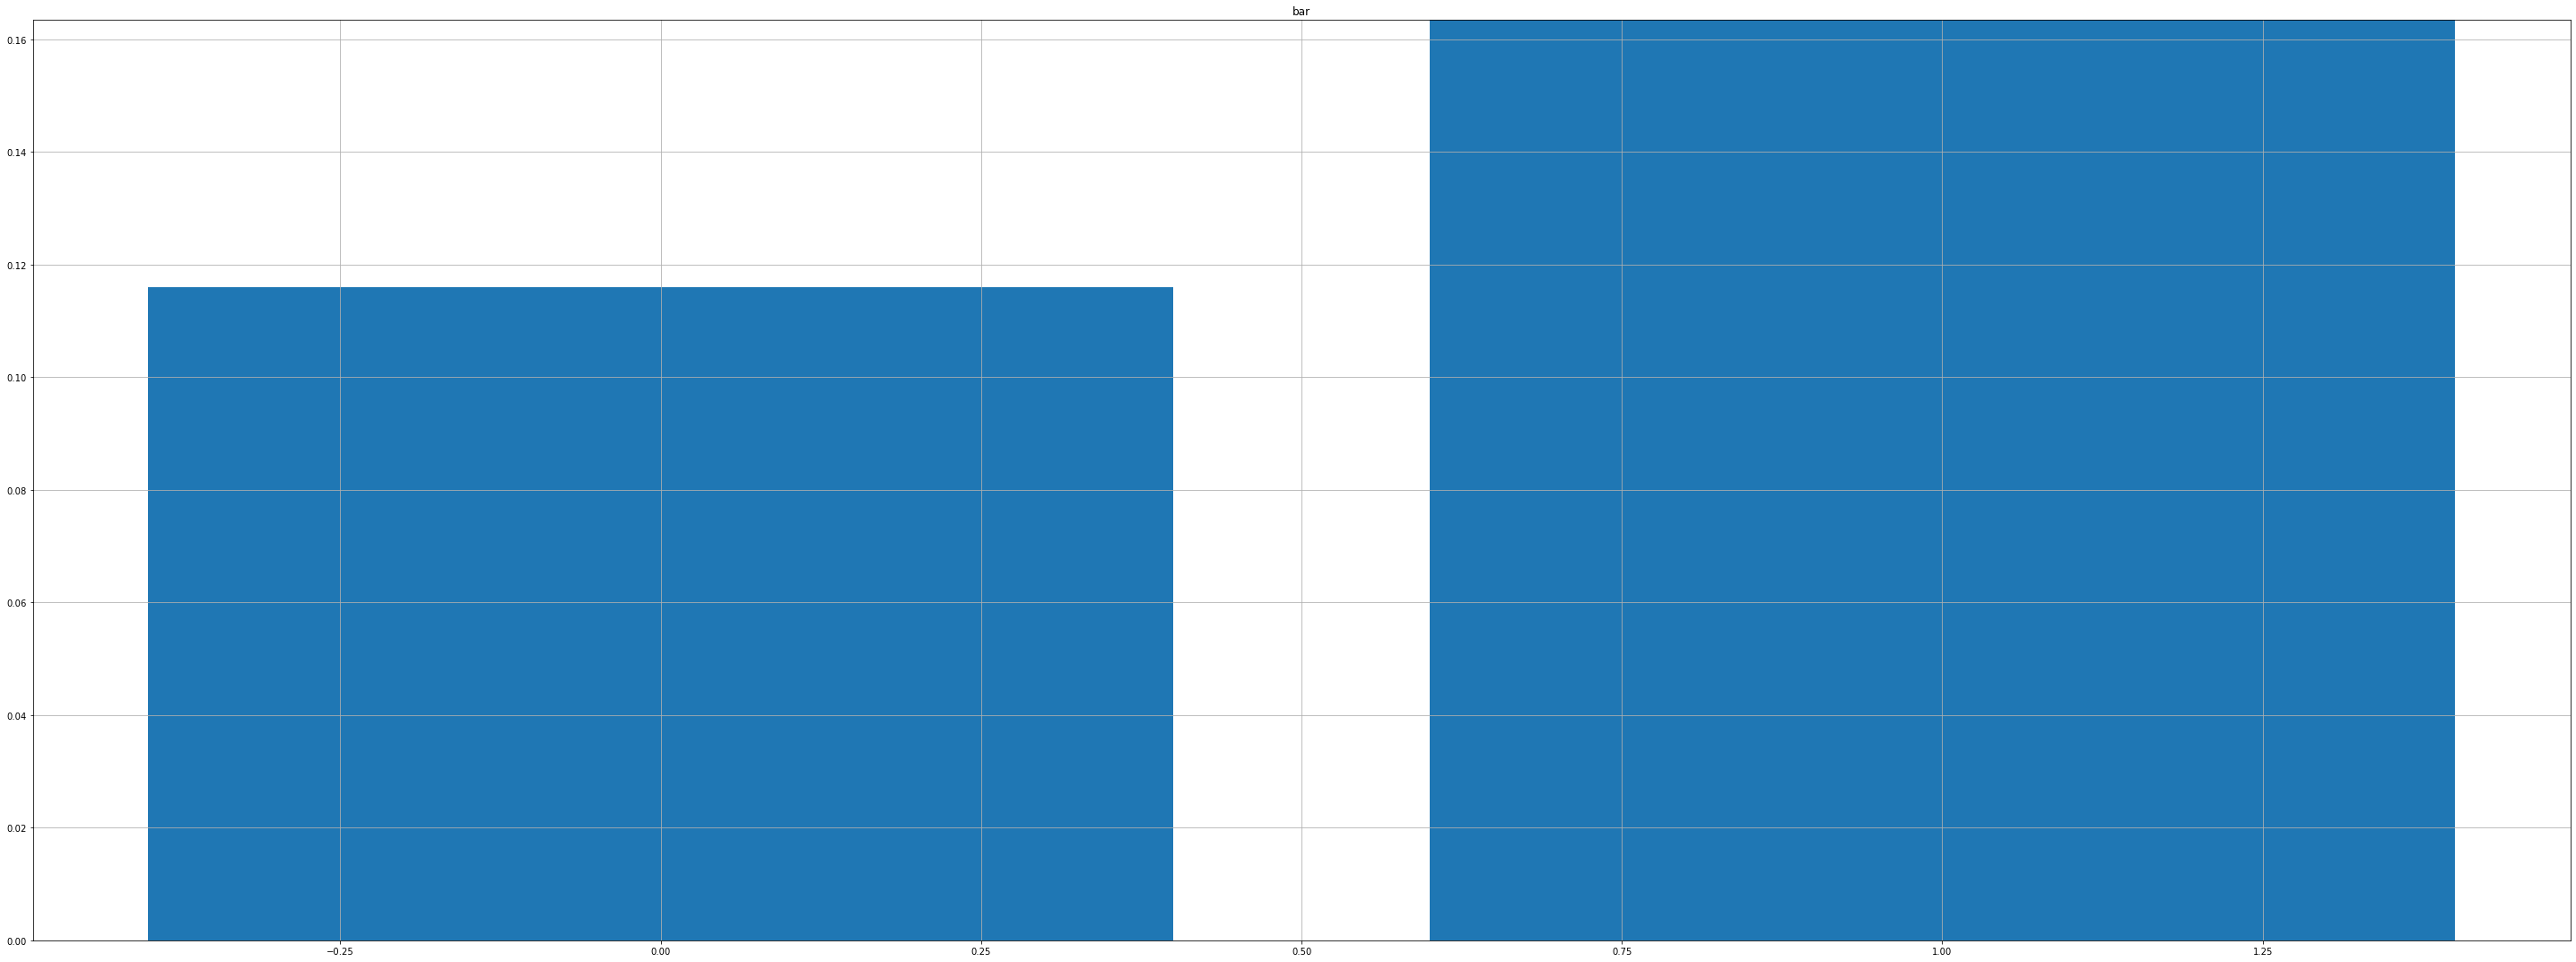

   poutcome_success         y
0                 0  0.099153
1                 1  0.645788


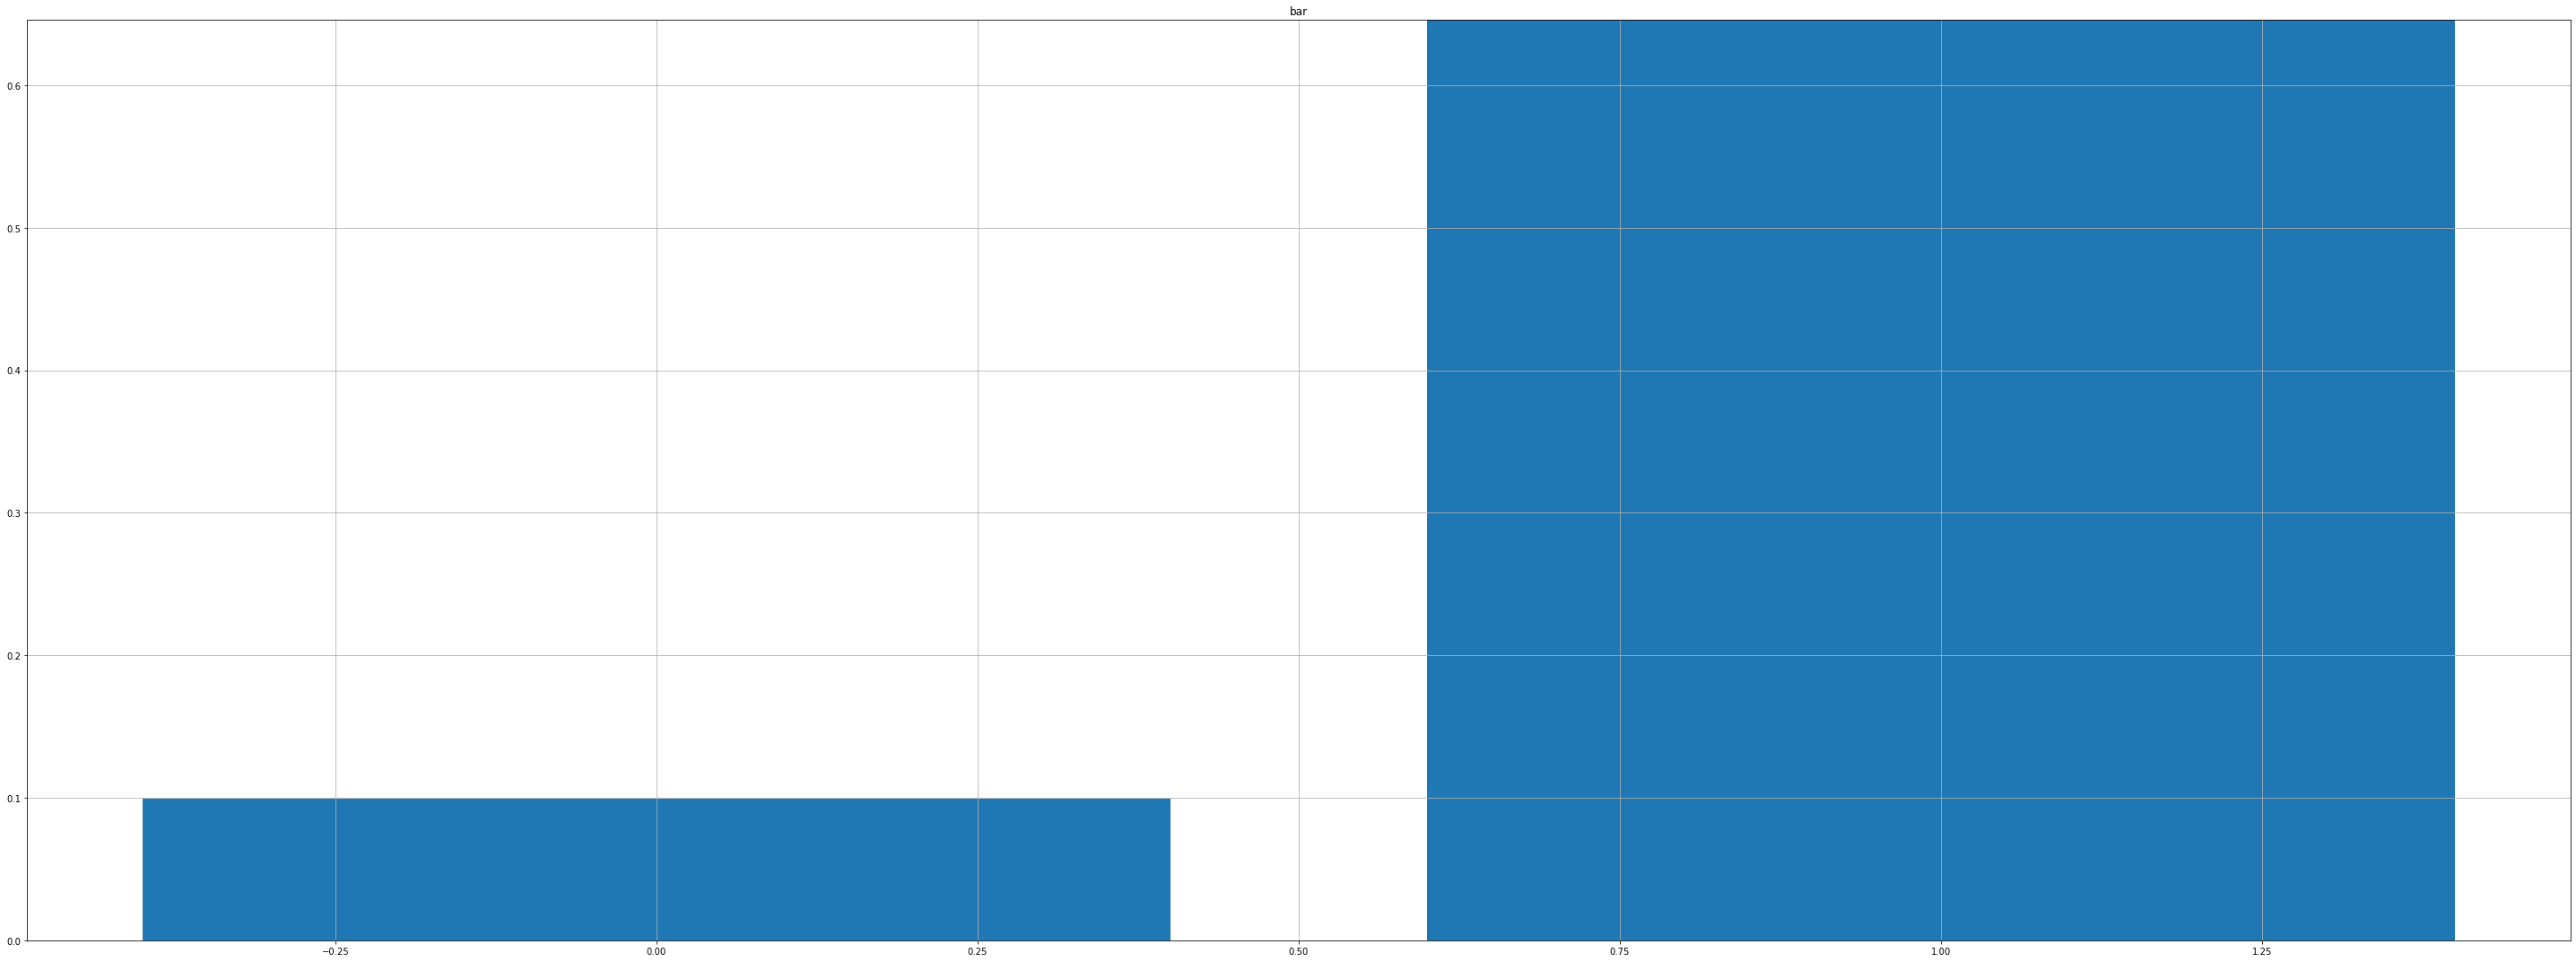

   poutcome_unknown        y
0                 0  0.22856
1                 1  0.09313


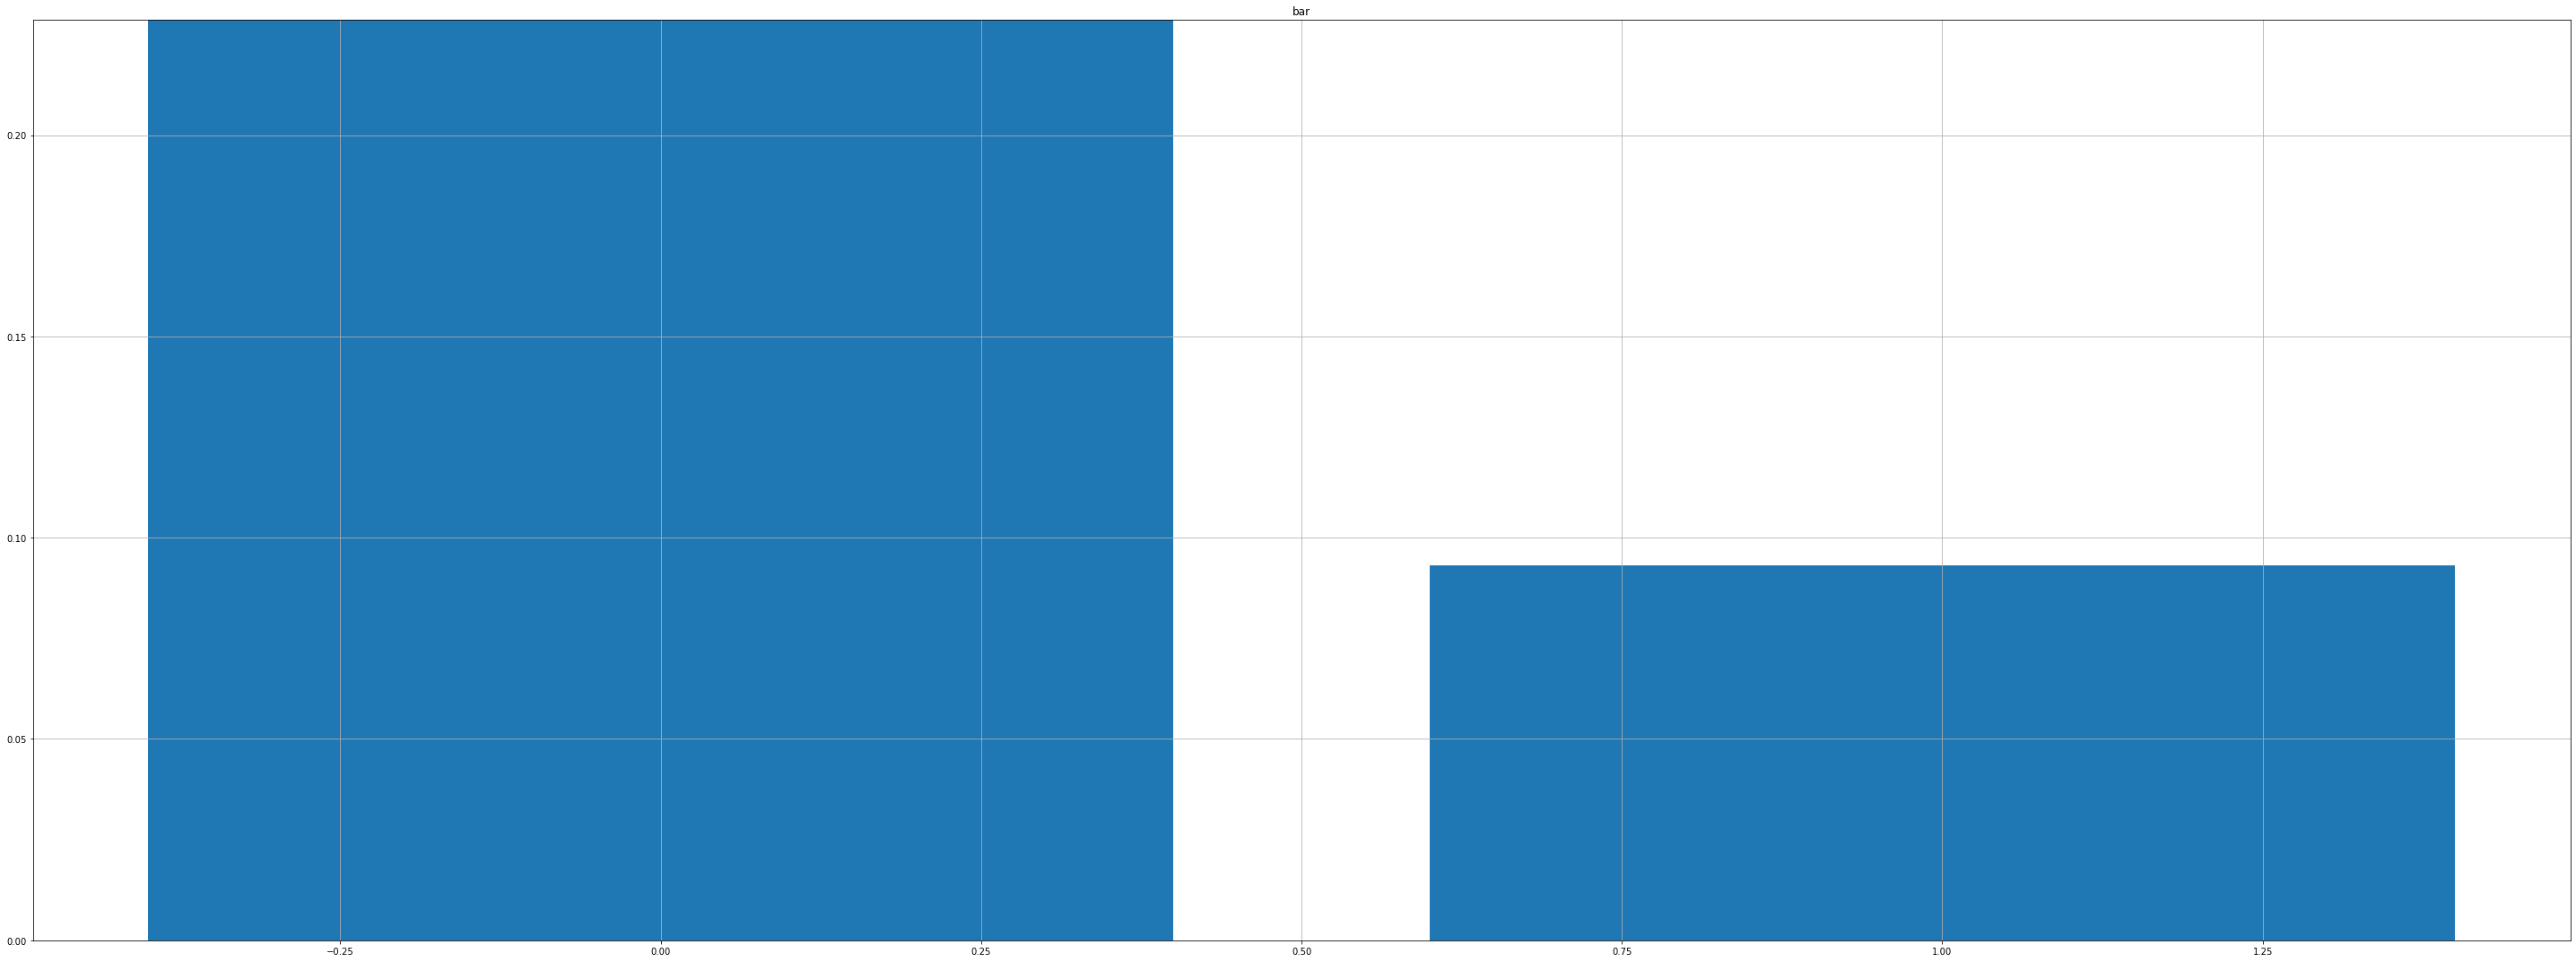

   previous_0.0         y
0             0  0.228467
1             1  0.093139


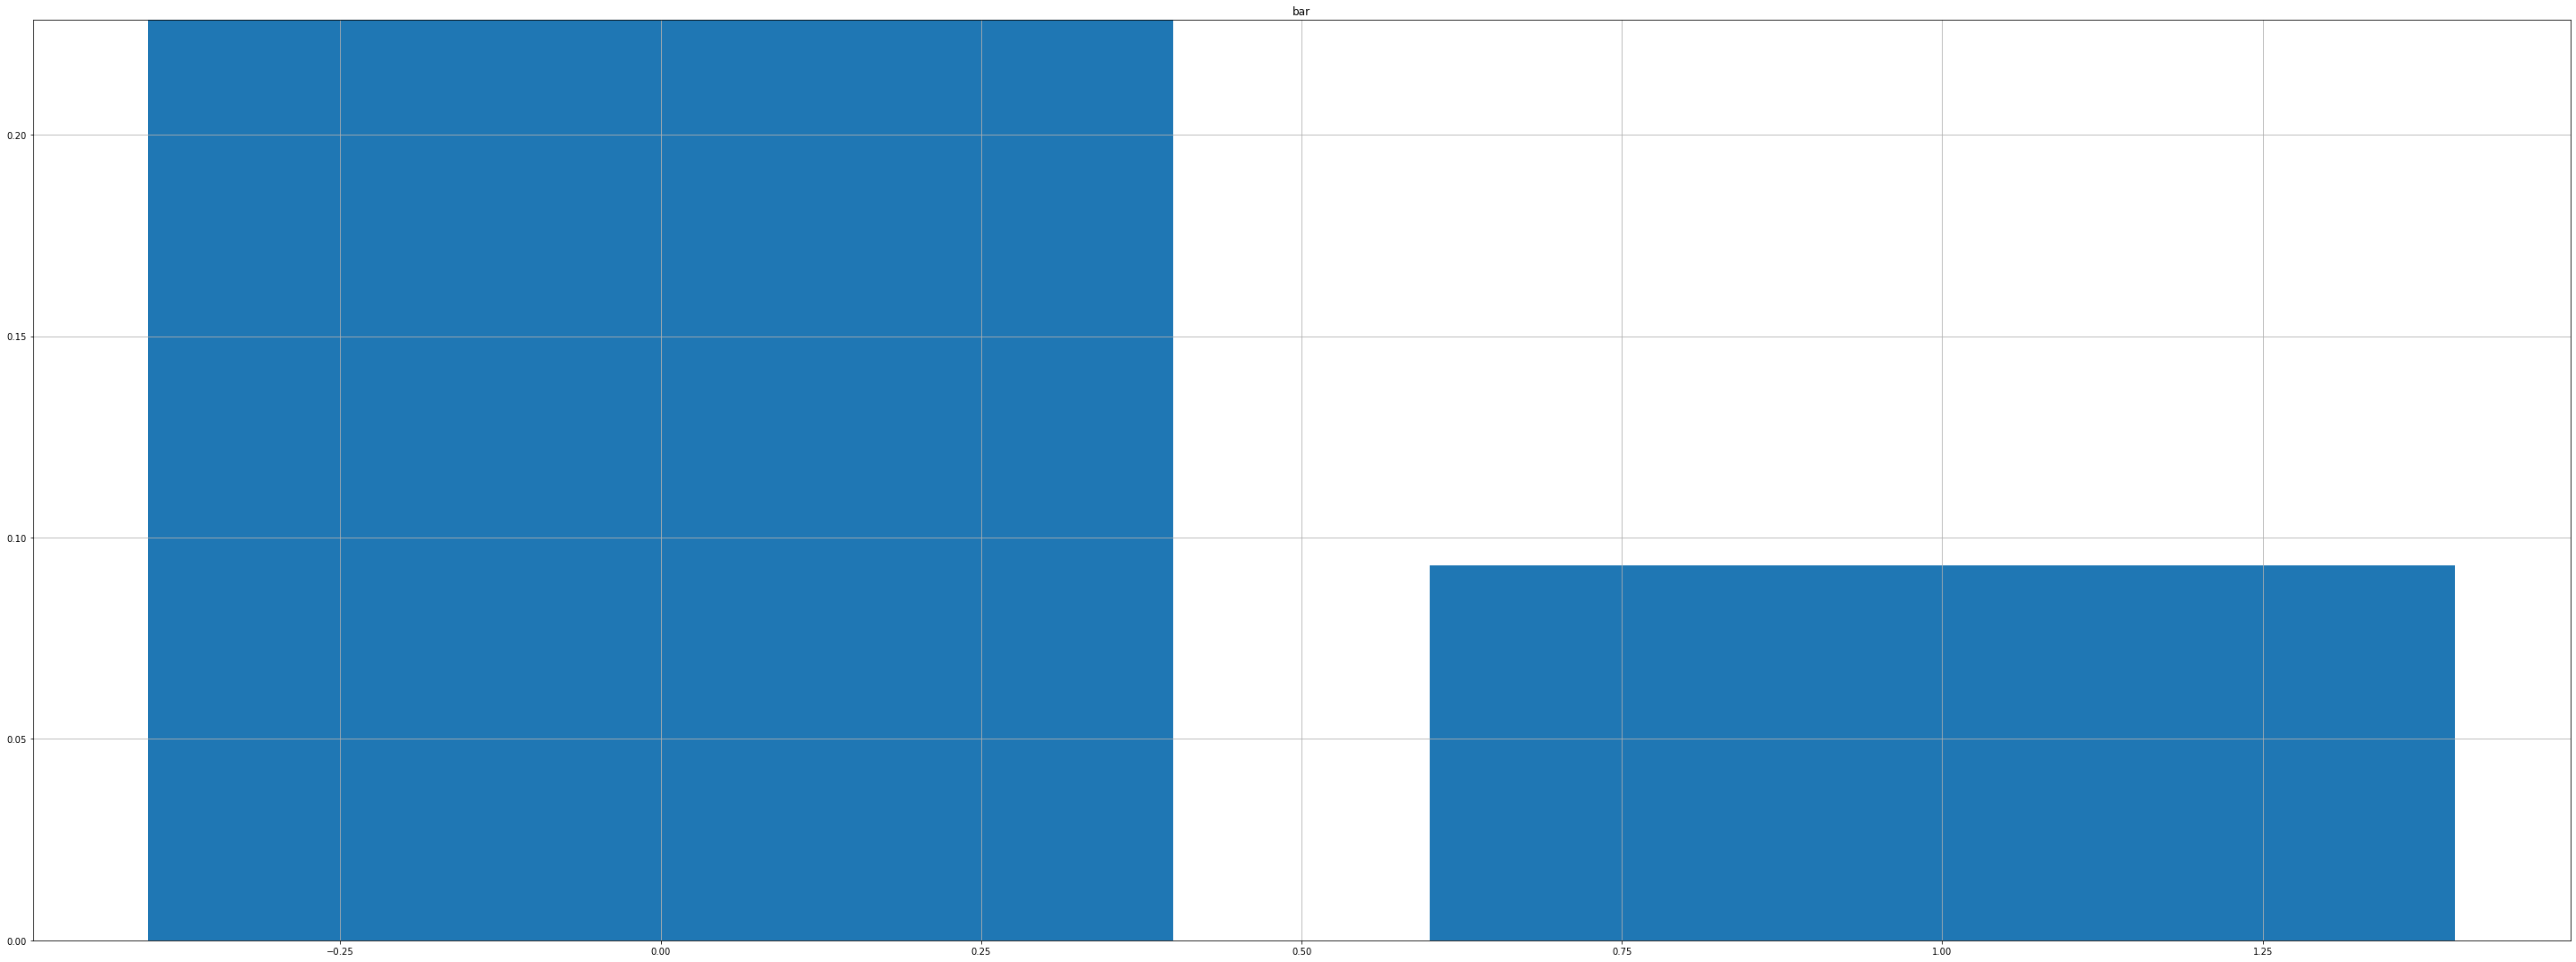

   previous_1.0         y
0             0  0.099132
1             1  0.223092


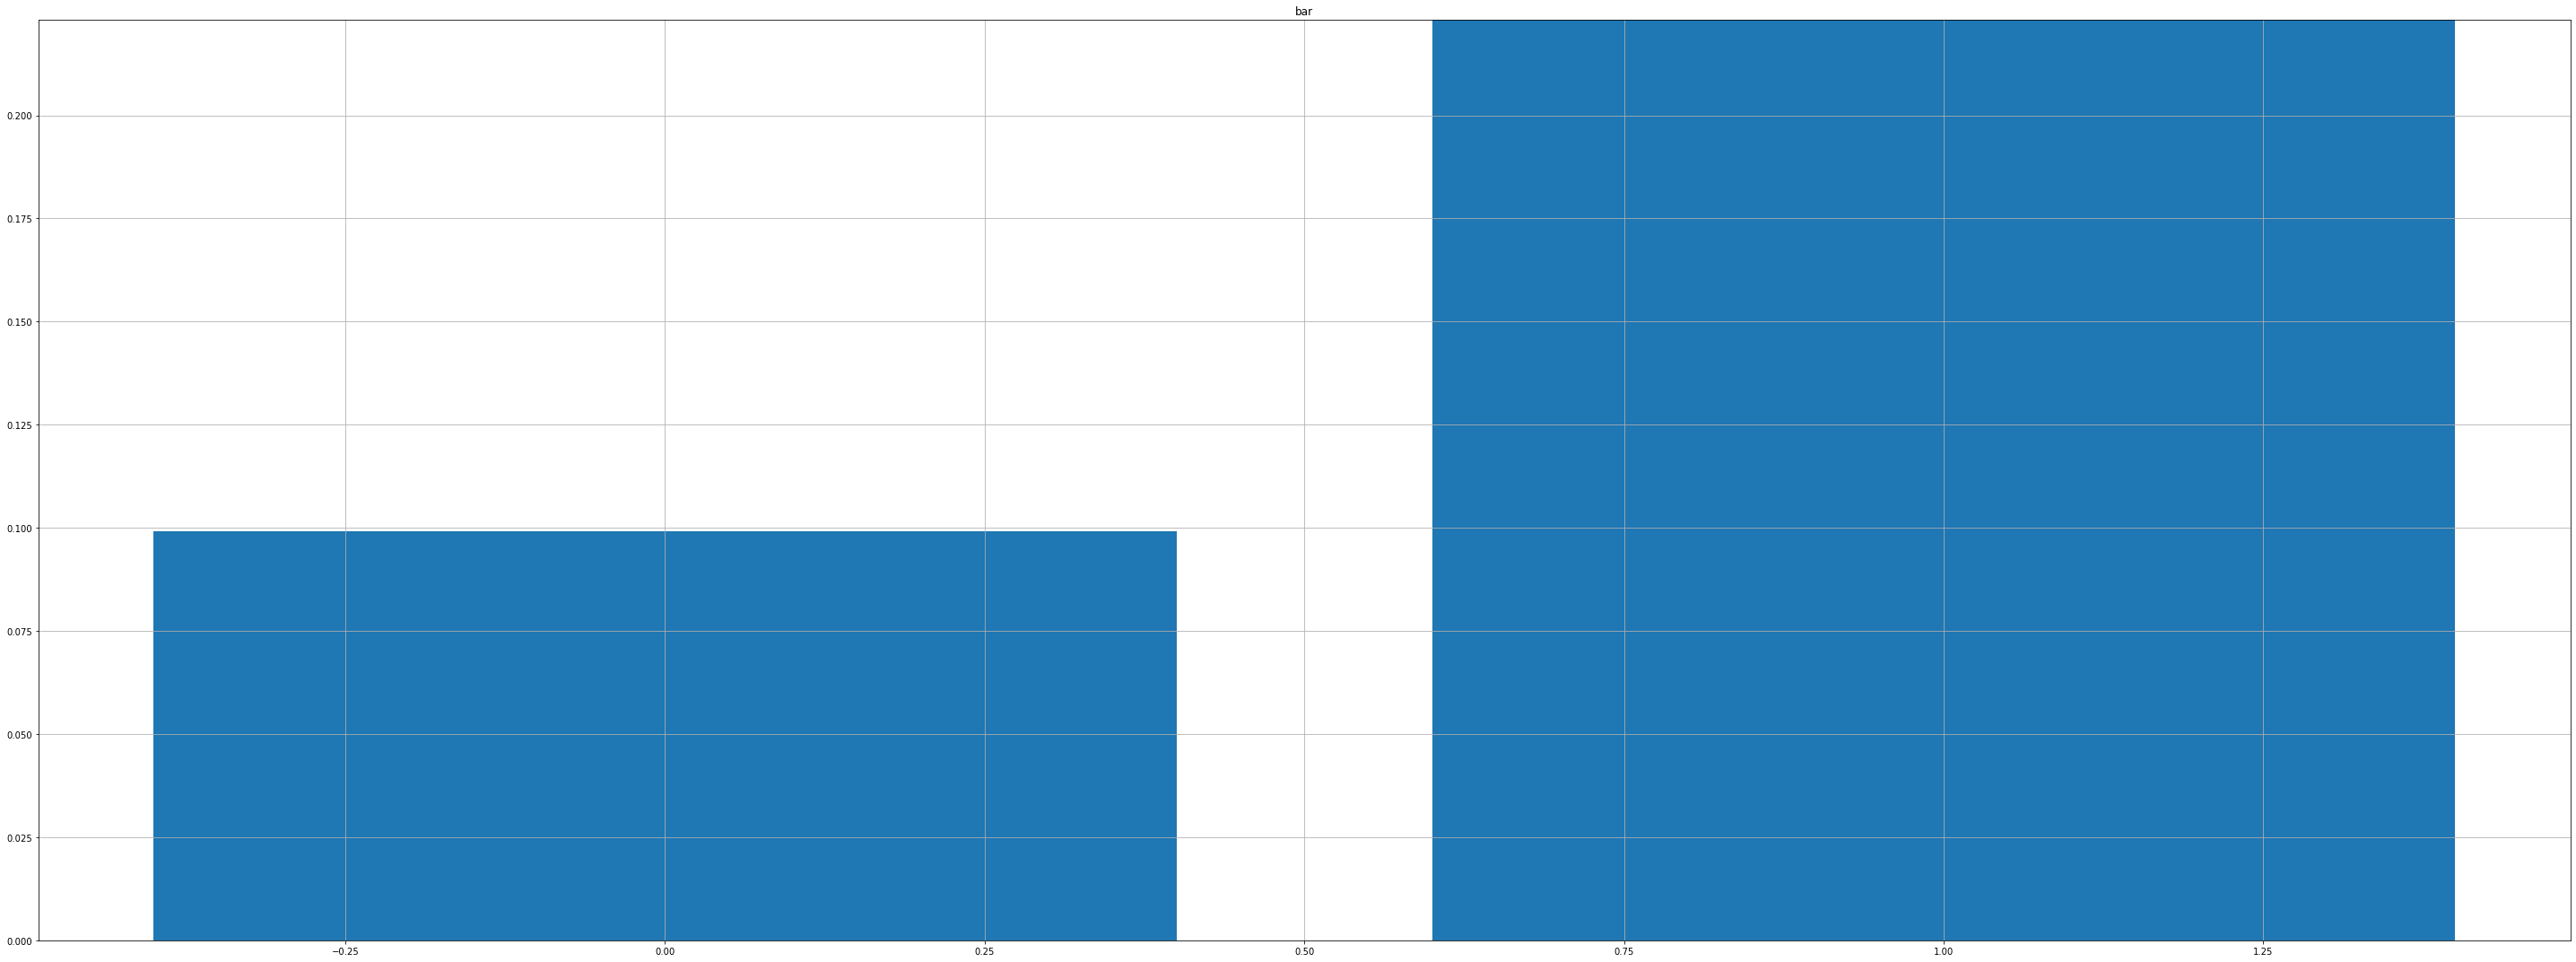

   previous_2.0         y
0             0  0.115140
1             1  0.283721


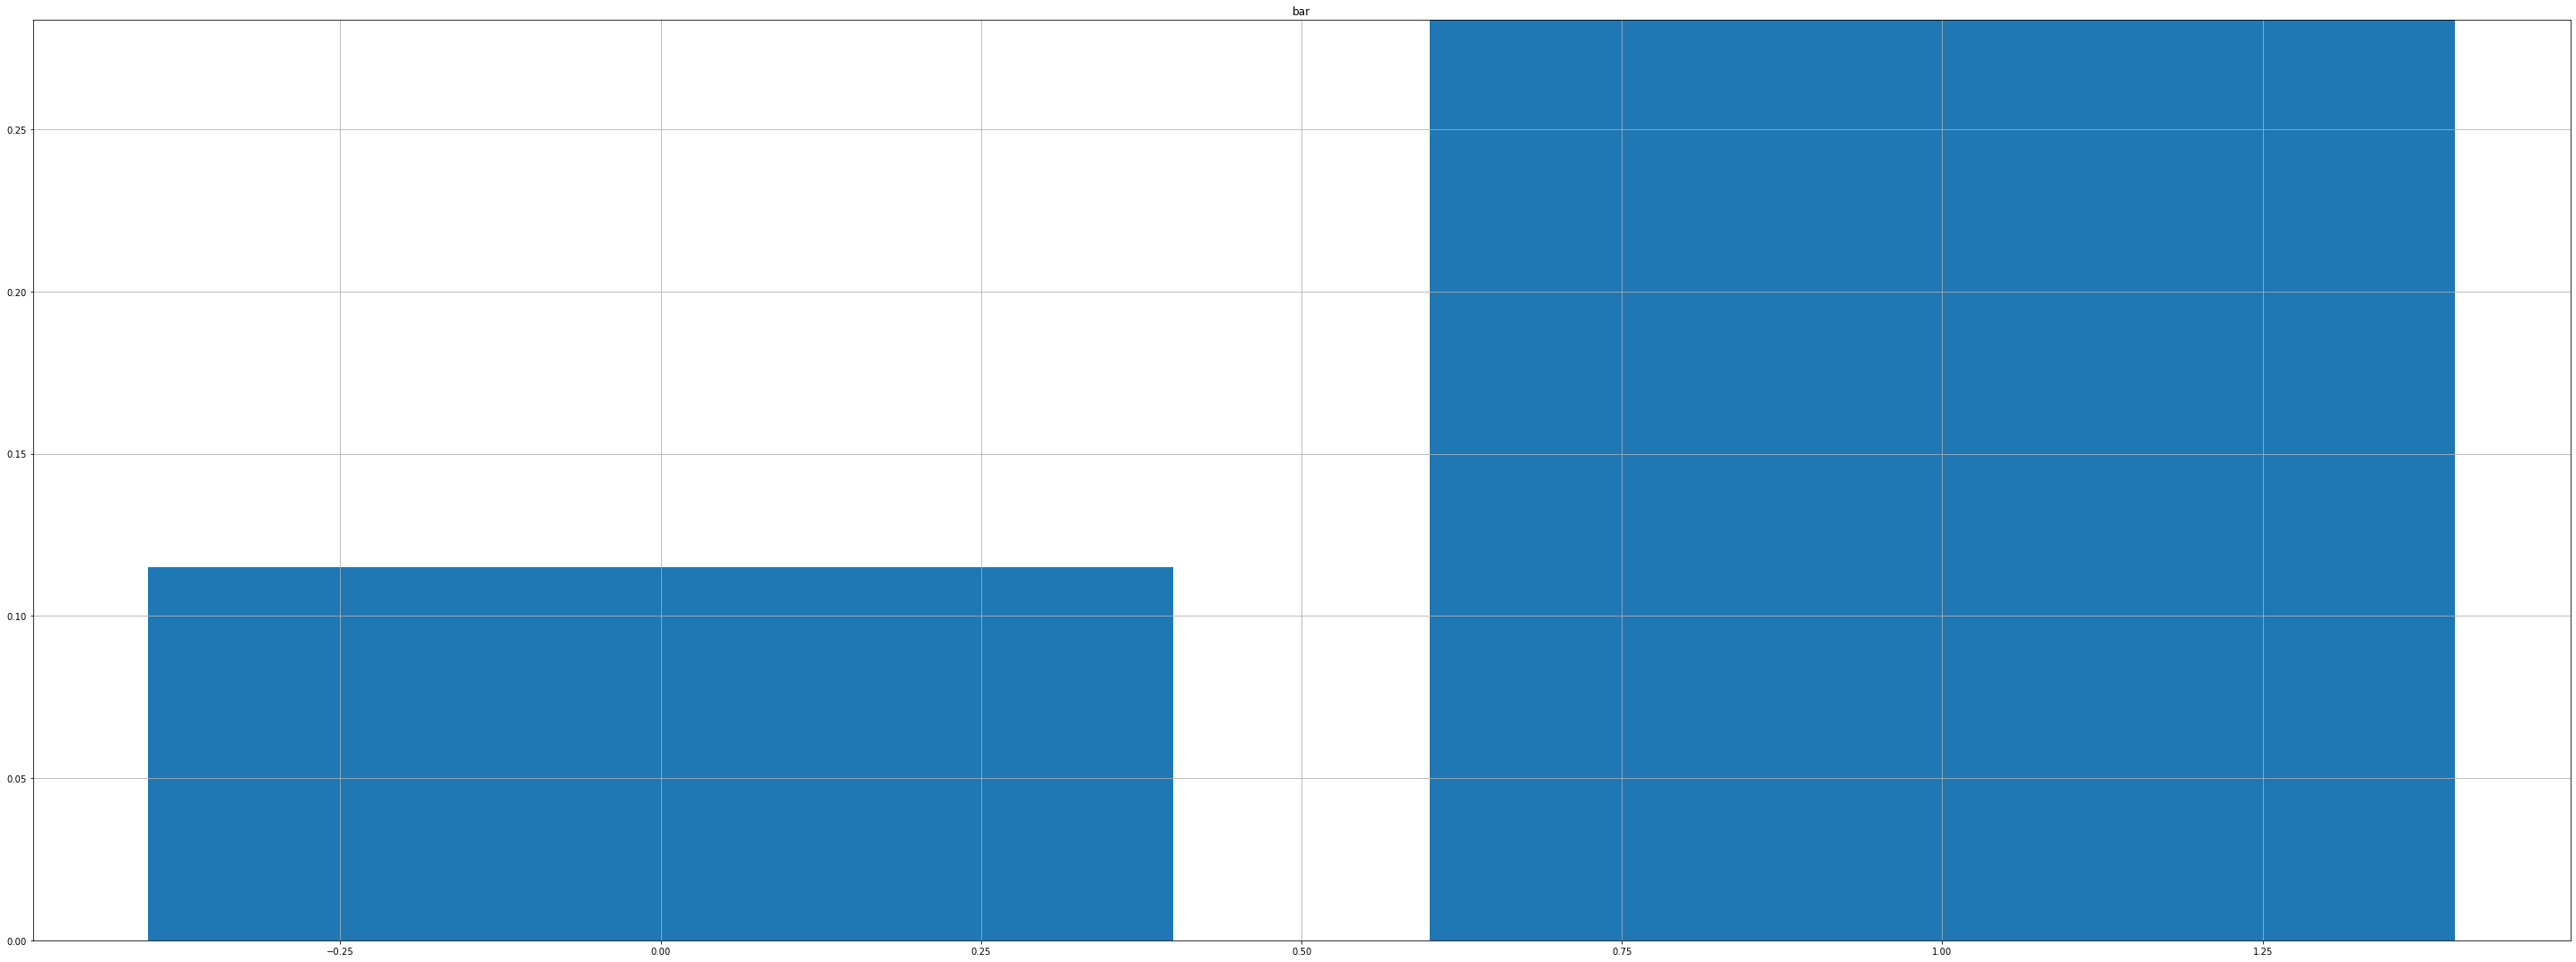

In [30]:
for column in test_set_x.columns:
    grouping = pd.DataFrame()
    grouping[column] = test_set_x[column]
    grouping['y'] = test_set_y
    group = grouping.groupby(grouping[column], as_index=False).mean()
    print(group)
    plt_bar(group[column], group['y'])

In [31]:
print(train_set_y)
print(test_set_y)

10747    0
26054    0
9125     0
41659    0
4443     0
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 31647, dtype: int32
3776     0
9928     0
33409    0
31885    0
15738    0
        ..
9016     0
380      0
7713     0
12188    0
28550    0
Name: y, Length: 13564, dtype: int32


### Choosing the Model

for metrics I use f1-score because sample is not balanced

In [32]:
# the models for classification
classifiers = [
    KNeighborsClassifier(10),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=6),
    LogisticRegression(),
    XGBClassifier(max_depth=10)
]

# logging 
log_cols = ["Classifier", "f1_score"]
log = pd.DataFrame(columns=log_cols)
#
acc_dict = {}
f1_dict = {}
# getting accuracy from fitting train_set and prediction in val_set
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_set_x, train_set_y)
    train_predictions = clf.predict(test_set_x)
    f1 = f1_score(test_set_y, train_predictions)
    acc = accuracy_score(test_set_y, train_predictions) 
    report = classification_report(test_set_y, train_predictions)
    
    print('   ', name)
    print(report)

    


    KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.68      0.22      0.33      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.60      0.64     13564
weighted avg       0.88      0.90      0.87     13564

    SVC
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11966
           1       0.71      0.31      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.81      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

    DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.48      0.48      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg  

d:\pyth3_8_5\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\pyth3_8_5\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


    LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.66      0.35      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

[14:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    XGBClassifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.61      0.50      0.55      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.73      0.75     13564
weighted avg       0.90      0.90      0.90     13

### Deploying the model

creating the Class Train which has staticmethods fit the model and predict it

In [33]:
class Train:
    
    @staticmethod
    def fit(x_train, y_train, x_val, y_val):
        # compiling the model
        verbose = 1
        model = XGBClassifier()
        
        # fitting the model
        model.fit(x_train, y_train)
        train_predictions = model.predict(x_val)
        acc = accuracy_score(y_val, train_predictions)
        
        val_y = y_val.to_numpy()
        print('')
        print('count the y==1 values:', np.sum(val_y), np.sum(train_predictions))
        print(acc)
        return model
    
    @staticmethod
    def predict(x_test, trained_model):
        # prediction from model and save it to csv
        prediction = pd.Series(trained_model.predict(x_test), index=x_test.index)
        prediction.to_csv('prediction.csv')
        return prediction

Testing the model

In [34]:
# fitting the model
train = Train.fit(train_set_x, train_set_y, test_set_x, test_set_y)

# predicting by test 
predict = Train.predict(test_set_x, train)
print('prediction:', predict)

# printing the report 
report = classification_report(test_set_y, predict)
print(report)

# testing on train_set for overfitting the model
print('testing prediction in train_set')
predict = Train.predict(train_set_x, train)
report = classification_report(train_set_y, predict)
print(report)

[14:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

count the y==1 values: 1598 1229
0.9080654674137423
prediction: 3776     0
9928     0
33409    0
31885    0
15738    0
        ..
9016     0
380      0
7713     0
12188    0
28550    0
Length: 13564, dtype: int32
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.64      0.49      0.56      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564

testing prediction in train_set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27956
        

## Score

I create a model which solve the binary classification task for metal invest. The time was not more and I didn't realize the all opportunities for more perfect understanding the dataset. My recomendation to marketing manager:

1. Dont save data in .txt format, .CSV is better for use because the space between data can make errors while data is parsed.

2. Description about column should be more readeble. Please, make every column's description on other row.

3. It will be good to add more numeric information for finding any relationships between data